# Amazon ML Challenge - 2024

In [196]:
import pandas as pd
import numpy as np

In [197]:
df = pd.read_csv("Amazon_train.csv")
df.head(10)

image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   
5  https://m.media-amazon.com/images/I/61QsBSE7jg...    731432  item_weight   
6  https://m.media-amazon.com/images/I/81xsq6vf2q...    731432  item_weight   
7  https://m.media-amazon.com/images/I/71DiLRHeZd...    731432  item_weight   
8  https://m.media-amazon.com/images/I/91Cma3Rzse...    731432  item_weight   
9  https://m.media-amazon.com/images/I/71jBLhmTNl...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram  
5  1400 milligram  
6  1400 milligram  
7  1400 milligram  
8  1400 milligram  
9  1400 milligram

In [198]:
df_test = pd.read_csv("Amazon_test.csv")
df_test.head(10)

index                                         image_link  group_id  \
0      0  https://m.media-amazon.com/images/I/110EibNycl...    156839   
1      1  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
2      2  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
3      3  https://m.media-amazon.com/images/I/11TU2clswz...    792578   
4      4  https://m.media-amazon.com/images/I/11gHj8dhhr...    792578   
5      5  https://m.media-amazon.com/images/I/11gHj8dhhr...    792578   
6      6  https://m.media-amazon.com/images/I/11gHj8dhhr...    792578   
7      7  https://m.media-amazon.com/images/I/11lshEUmCr...    156839   
8      8  https://m.media-amazon.com/images/I/21+i52HRW4...    478357   
9      9  https://m.media-amazon.com/images/I/21-LmSmehZ...    478357   

  entity_name  
0      height  
1       width  
2      height  
3       depth  
4       depth  
5      height  
6       width  
7      height  
8       width  
9      height

In [199]:
df_test.shape

(131187, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB


In [11]:
df.shape

(263859, 4)

In [22]:
df['entity_name'].value_counts()

entity_name
item_weight                      102786
depth                             45127
width                             44183
height                            43597
voltage                            9466
wattage                            7755
item_volume                        7682
maximum_weight_recommendation      3263
Name: count, dtype: int64

### Downloading 10,000 only image from throught pipline using links

In [37]:
import pandas as pd
from tqdm import tqdm
import os
import requests
import urllib
from PIL import Image
from functools import partial
import multiprocessing

def create_placeholder_image(image_save_path):
    try:
        placeholder_image = Image.new('RGB', (100, 100), color='black')
        placeholder_image.save(image_save_path)
    except Exception as e:
        print(f"Error creating placeholder image: {e}")

def download_image(image_link, save_folder, retries=3, delay=3):
    if not isinstance(image_link, str):
        print(f"Invalid image link: {image_link}")
        return

    filename = os.path.join(save_folder, os.path.basename(image_link))

    if os.path.exists(filename):
        print(f"Image already exists: {filename}")
        return

    for _ in range(retries):
        try:
            urllib.request.urlretrieve(image_link, filename)
            print(f"Downloaded: {filename}")
            return
        except Exception as e:
            print(f"Error downloading {image_link}: {e}")
            time.sleep(delay)
    
    # If all retries fail, create a placeholder image
    print(f"Failed to download {image_link}, creating placeholder.")
    create_placeholder_image(filename)

def download_images(image_links, download_folder, allow_multiprocessing=True):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    if allow_multiprocessing:
        download_image_partial = partial(download_image, save_folder=download_folder, retries=3, delay=3)

        with multiprocessing.Pool(4) as pool:  # Use fewer processes initially for debugging
            list(tqdm(pool.imap(download_image_partial, image_links), total=len(image_links)))
            pool.close()
            pool.join()
    else:
        for image_link in tqdm(image_links, total=len(image_links)):
            download_image(image_link, save_folder=download_folder, retries=3, delay=3)

# Load dataset and subset 10,000 rows
df = pd.read_csv("Amazon_train.csv")
df_subset = df.head(10000)  # Use only the first 10,000 rows

# Extract image links
image_links = df_subset['image_link'].tolist()

# Set folder to save images
download_folder = "./Amazon_images"

# Try without multiprocessing first to debug
download_images(image_links, download_folder, allow_multiprocessing=False)


  0%|          | 1/10000 [00:00<1:02:48,  2.65it/s]

Downloaded: ./Amazon_images/61I9XdN6OFL.jpg


  0%|          | 2/10000 [00:00<59:58,  2.78it/s]  

Downloaded: ./Amazon_images/71gSRbyXmoL.jpg


  0%|          | 3/10000 [00:01<56:46,  2.93it/s]

Downloaded: ./Amazon_images/61BZ4zrjZXL.jpg


  0%|          | 5/10000 [00:01<46:48,  3.56it/s]  

Downloaded: ./Amazon_images/612mrlqiI4L.jpg
Downloaded: ./Amazon_images/617Tl40LOXL.jpg


  0%|          | 6/10000 [00:01<53:49,  3.09it/s]

Downloaded: ./Amazon_images/61QsBSE7jgL.jpg


  0%|          | 7/10000 [00:03<1:56:42,  1.43it/s]

Downloaded: ./Amazon_images/81xsq6vf2qL.jpg


  0%|          | 8/10000 [00:04<2:22:40,  1.17it/s]

Downloaded: ./Amazon_images/71DiLRHeZdL.jpg


  0%|          | 9/10000 [00:05<2:04:18,  1.34it/s]

Downloaded: ./Amazon_images/91Cma3RzseL.jpg


  0%|          | 11/10000 [00:05<1:22:57,  2.01it/s]

Downloaded: ./Amazon_images/71jBLhmTNlL.jpg
Downloaded: ./Amazon_images/81N73b5khVL.jpg


  0%|          | 12/10000 [00:06<1:19:20,  2.10it/s]

Downloaded: ./Amazon_images/61oMj2iXOuL.jpg


  0%|          | 13/10000 [00:06<1:10:02,  2.38it/s]

Downloaded: ./Amazon_images/91LPf6OjV9L.jpg


  0%|          | 14/10000 [00:07<1:32:58,  1.79it/s]

Downloaded: ./Amazon_images/81fOxWWWKYL.jpg


  0%|          | 15/10000 [00:07<1:24:07,  1.98it/s]

Downloaded: ./Amazon_images/81dzao1Ob4L.jpg


  0%|          | 16/10000 [00:08<1:32:21,  1.80it/s]

Downloaded: ./Amazon_images/91-iahVGEDL.jpg


  0%|          | 17/10000 [00:09<1:37:06,  1.71it/s]

Downloaded: ./Amazon_images/81S2+GnYpTL.jpg


  0%|          | 18/10000 [00:09<1:28:30,  1.88it/s]

Downloaded: ./Amazon_images/81e2YtCOKvL.jpg


  0%|          | 19/10000 [00:09<1:27:56,  1.89it/s]

Downloaded: ./Amazon_images/81RNsNEM1EL.jpg


  0%|          | 20/10000 [00:10<1:38:23,  1.69it/s]

Downloaded: ./Amazon_images/91prZeizZnL.jpg


  0%|          | 21/10000 [00:10<1:19:56,  2.08it/s]

Downloaded: ./Amazon_images/31EvJszFVfL.jpg


  0%|          | 22/10000 [00:11<1:09:57,  2.38it/s]

Downloaded: ./Amazon_images/61wzlucTREL.jpg


  0%|          | 23/10000 [00:11<59:08,  2.81it/s]  

Downloaded: ./Amazon_images/61sQ+qAKr4L.jpg


  0%|          | 25/10000 [00:12<53:11,  3.13it/s]  

Downloaded: ./Amazon_images/81x77l2T5NL.jpg
Downloaded: ./Amazon_images/71nywfWZUwL.jpg
Image already exists: ./Amazon_images/71nywfWZUwL.jpg


  0%|          | 27/10000 [00:12<43:12,  3.85it/s]

Downloaded: ./Amazon_images/51WsuKKAVrL.jpg


  0%|          | 28/10000 [00:12<45:15,  3.67it/s]

Downloaded: ./Amazon_images/61XGDKap+JL.jpg


  0%|          | 29/10000 [00:13<46:54,  3.54it/s]

Downloaded: ./Amazon_images/715vVcWJxGL.jpg


  0%|          | 30/10000 [00:13<50:50,  3.27it/s]

Downloaded: ./Amazon_images/613v+2W4UwL.jpg


  0%|          | 31/10000 [00:13<55:05,  3.02it/s]

Downloaded: ./Amazon_images/71+fn9TWQmL.jpg


  0%|          | 33/10000 [00:14<49:30,  3.35it/s]

Downloaded: ./Amazon_images/71aKgRRQ2wL.jpg
Downloaded: ./Amazon_images/71rKXZJrh4L.jpg


  0%|          | 34/10000 [00:14<45:19,  3.67it/s]

Downloaded: ./Amazon_images/71D824lbRvL.jpg


  0%|          | 35/10000 [00:14<51:56,  3.20it/s]

Downloaded: ./Amazon_images/71004c9tzfL.jpg


  0%|          | 36/10000 [00:15<52:39,  3.15it/s]

Downloaded: ./Amazon_images/51bQPPtMqYL.jpg


  0%|          | 37/10000 [00:16<1:30:26,  1.84it/s]

Downloaded: ./Amazon_images/61o2ntPNNgL.jpg
Image already exists: ./Amazon_images/61o2ntPNNgL.jpg


  0%|          | 39/10000 [00:16<1:01:08,  2.72it/s]

Downloaded: ./Amazon_images/71IUuTJ8QwL.jpg


  0%|          | 40/10000 [00:17<1:10:18,  2.36it/s]

Downloaded: ./Amazon_images/915JHkwtcrL.jpg


  0%|          | 41/10000 [00:17<1:11:31,  2.32it/s]

Downloaded: ./Amazon_images/71cjrYndwIL.jpg


  0%|          | 42/10000 [00:18<1:16:40,  2.16it/s]

Downloaded: ./Amazon_images/81hnk2WXO3L.jpg


  0%|          | 43/10000 [00:18<1:13:39,  2.25it/s]

Downloaded: ./Amazon_images/61HXgujoxpL.jpg


  0%|          | 44/10000 [00:19<1:08:17,  2.43it/s]

Downloaded: ./Amazon_images/613G8GOyLSL.jpg


  0%|          | 45/10000 [00:19<1:11:32,  2.32it/s]

Downloaded: ./Amazon_images/71YyZ2iPyZL.jpg


  0%|          | 46/10000 [00:20<1:15:49,  2.19it/s]

Downloaded: ./Amazon_images/81K3JwUCnQL.jpg


  0%|          | 47/10000 [00:20<1:06:19,  2.50it/s]

Downloaded: ./Amazon_images/41wvffSxB4L.jpg


  0%|          | 48/10000 [00:20<1:12:54,  2.27it/s]

Downloaded: ./Amazon_images/91cErO-KbLL.jpg


  0%|          | 49/10000 [00:21<1:17:31,  2.14it/s]

Downloaded: ./Amazon_images/817vo3DcCNL.jpg


  0%|          | 50/10000 [00:21<1:09:39,  2.38it/s]

Downloaded: ./Amazon_images/61AHQ35poHL.jpg


  1%|          | 51/10000 [00:21<1:03:57,  2.59it/s]

Downloaded: ./Amazon_images/61WFh8RCQYL.jpg


  1%|          | 52/10000 [00:22<1:18:33,  2.11it/s]

Downloaded: ./Amazon_images/711SATIDrmL.jpg


  1%|          | 53/10000 [00:22<1:10:26,  2.35it/s]

Downloaded: ./Amazon_images/61x6RSjwQIL.jpg


  1%|          | 54/10000 [00:23<1:03:44,  2.60it/s]

Downloaded: ./Amazon_images/613BeFNwHcL.jpg


  1%|          | 55/10000 [00:23<55:43,  2.97it/s]  

Downloaded: ./Amazon_images/61hWZdkq6WL.jpg


  1%|          | 56/10000 [00:23<1:03:37,  2.61it/s]

Downloaded: ./Amazon_images/71E7CU55dcL.jpg


  1%|          | 57/10000 [00:24<1:06:43,  2.48it/s]

Downloaded: ./Amazon_images/61c+hSNnnZL.jpg


  1%|          | 58/10000 [00:25<1:21:12,  2.04it/s]

Downloaded: ./Amazon_images/915w0BdW-gL.jpg


  1%|          | 59/10000 [00:25<1:19:14,  2.09it/s]

Downloaded: ./Amazon_images/61sx0ezNNLL.jpg


  1%|          | 60/10000 [00:26<1:16:44,  2.16it/s]

Downloaded: ./Amazon_images/71ldprwbKrL.jpg


  1%|          | 61/10000 [00:26<1:13:09,  2.26it/s]

Downloaded: ./Amazon_images/71E9iF-bmKL.jpg


  1%|          | 62/10000 [00:26<1:08:39,  2.41it/s]

Downloaded: ./Amazon_images/71sWRp1SNwL.jpg


  1%|          | 63/10000 [00:27<1:06:49,  2.48it/s]

Downloaded: ./Amazon_images/61Fwq4GeTmL.jpg


  1%|          | 64/10000 [00:27<1:09:15,  2.39it/s]

Downloaded: ./Amazon_images/61-oj+N+BxL.jpg


  1%|          | 65/10000 [00:27<1:04:39,  2.56it/s]

Downloaded: ./Amazon_images/71e6kJLE+LL.jpg


  1%|          | 66/10000 [00:28<1:04:41,  2.56it/s]

Downloaded: ./Amazon_images/71SuzaRS7gL.jpg


  1%|          | 67/10000 [00:28<1:10:30,  2.35it/s]

Downloaded: ./Amazon_images/71nsfFCXF0L.jpg


  1%|          | 68/10000 [00:29<1:14:38,  2.22it/s]

Downloaded: ./Amazon_images/71hgN7yu9OL.jpg


  1%|          | 69/10000 [00:29<1:16:43,  2.16it/s]

Downloaded: ./Amazon_images/61SmT8pkLtL.jpg


  1%|          | 70/10000 [00:30<1:17:00,  2.15it/s]

Downloaded: ./Amazon_images/71ZtDgGX+iL.jpg
Downloaded: ./Amazon_images/413FQB0ZMLL.jpg


  1%|          | 72/10000 [00:30<51:24,  3.22it/s]  

Downloaded: ./Amazon_images/41EjbFu-+yL.jpg


  1%|          | 73/10000 [00:30<52:32,  3.15it/s]

Downloaded: ./Amazon_images/71dWDwMhWmS.jpg


  1%|          | 74/10000 [00:31<54:52,  3.01it/s]

Downloaded: ./Amazon_images/61d6Kj80QSL.jpg


  1%|          | 75/10000 [00:31<57:41,  2.87it/s]

Downloaded: ./Amazon_images/71bvOuz9w1L.jpg


  1%|          | 76/10000 [00:32<1:02:54,  2.63it/s]

Downloaded: ./Amazon_images/71l0M0tMGjL.jpg


  1%|          | 77/10000 [00:32<55:48,  2.96it/s]  

Downloaded: ./Amazon_images/71Lpqdrpi4L.jpg


  1%|          | 78/10000 [00:32<53:43,  3.08it/s]

Downloaded: ./Amazon_images/71jLIbCcwOL.jpg


  1%|          | 79/10000 [00:32<49:28,  3.34it/s]

Downloaded: ./Amazon_images/718EdwGgyVL.jpg


  1%|          | 81/10000 [00:33<46:31,  3.55it/s]

Downloaded: ./Amazon_images/713twQgCHSL.jpg
Downloaded: ./Amazon_images/61I0O1qJbhS.jpg


  1%|          | 82/10000 [00:33<43:21,  3.81it/s]

Downloaded: ./Amazon_images/61eOO5IW4NL.jpg


  1%|          | 83/10000 [00:33<42:17,  3.91it/s]

Downloaded: ./Amazon_images/716AQpAJjZL.jpg


  1%|          | 84/10000 [00:34<46:33,  3.55it/s]

Downloaded: ./Amazon_images/71FVeRd2jqL.jpg


  1%|          | 85/10000 [00:35<1:12:27,  2.28it/s]

Downloaded: ./Amazon_images/81njuNSPdjL.jpg


  1%|          | 86/10000 [00:35<1:10:17,  2.35it/s]

Downloaded: ./Amazon_images/51xfRlxWIXL.jpg


  1%|          | 87/10000 [00:35<1:09:49,  2.37it/s]

Downloaded: ./Amazon_images/71duwM3SjpL.jpg


  1%|          | 88/10000 [00:36<1:19:36,  2.08it/s]

Downloaded: ./Amazon_images/612xIhPMHqL.jpg
Downloaded: ./Amazon_images/51b9JEHOriL.jpg


  1%|          | 90/10000 [00:37<1:05:29,  2.52it/s]

Downloaded: ./Amazon_images/81lgxfKqUUL.jpg


  1%|          | 91/10000 [00:38<1:29:20,  1.85it/s]

Downloaded: ./Amazon_images/814sAvV89SL.jpg


  1%|          | 92/10000 [00:38<1:20:03,  2.06it/s]

Downloaded: ./Amazon_images/61cMeogK8gL.jpg


  1%|          | 93/10000 [00:38<1:22:56,  1.99it/s]

Downloaded: ./Amazon_images/811VfR10yxL.jpg


  1%|          | 94/10000 [00:39<1:37:27,  1.69it/s]

Downloaded: ./Amazon_images/71WLYfmMqQL.jpg


  1%|          | 95/10000 [00:40<1:28:41,  1.86it/s]

Downloaded: ./Amazon_images/61Dq3LRei9L.jpg


  1%|          | 97/10000 [00:40<1:08:06,  2.42it/s]

Downloaded: ./Amazon_images/71XK5d3Oh9L.jpg
Downloaded: ./Amazon_images/61kyBEJYDeL.jpg


  1%|          | 98/10000 [00:41<1:04:01,  2.58it/s]

Downloaded: ./Amazon_images/71uQmsTESvL.jpg


  1%|          | 99/10000 [00:41<1:06:17,  2.49it/s]

Downloaded: ./Amazon_images/71jG8BOi4WL.jpg


  1%|          | 100/10000 [00:41<1:01:57,  2.66it/s]

Downloaded: ./Amazon_images/61390hosjFL.jpg


  1%|          | 101/10000 [00:42<54:34,  3.02it/s]  

Downloaded: ./Amazon_images/71PDbPb275L.jpg


  1%|          | 102/10000 [00:42<1:20:56,  2.04it/s]

Downloaded: ./Amazon_images/71YiRw3e1lL.jpg


  1%|          | 103/10000 [00:43<1:24:13,  1.96it/s]

Downloaded: ./Amazon_images/719poaEkdEL.jpg


  1%|          | 105/10000 [00:43<59:30,  2.77it/s]  

Downloaded: ./Amazon_images/41njJJg-ANL.jpg
Downloaded: ./Amazon_images/71qEriwsbIL.jpg


  1%|          | 106/10000 [00:44<53:42,  3.07it/s]

Downloaded: ./Amazon_images/514M5CrBK4L.jpg


  1%|          | 107/10000 [00:44<53:27,  3.08it/s]

Downloaded: ./Amazon_images/61qOr-yqaVL.jpg


  1%|          | 108/10000 [00:44<54:54,  3.00it/s]

Downloaded: ./Amazon_images/61xxqfM2EwL.jpg


  1%|          | 109/10000 [00:45<54:15,  3.04it/s]

Downloaded: ./Amazon_images/81yG9eUKvxL.jpg


  1%|          | 111/10000 [00:45<40:14,  4.10it/s]

Downloaded: ./Amazon_images/61FMOl299lL.jpg
Downloaded: ./Amazon_images/41Kn+YOyPjL.jpg


  1%|          | 113/10000 [00:46<47:48,  3.45it/s]

Downloaded: ./Amazon_images/51q9OE6hfgL.jpg
Downloaded: ./Amazon_images/51T1Kh7WWGL.jpg


  1%|          | 115/10000 [00:46<35:36,  4.63it/s]

Downloaded: ./Amazon_images/71G8XyPqcIL.jpg
Downloaded: ./Amazon_images/61Hhju+qn9L.jpg
Downloaded: ./Amazon_images/51Alw-4+zJL.jpg


  1%|          | 118/10000 [00:47<33:42,  4.89it/s]

Downloaded: ./Amazon_images/81l6zfwKG7L.jpg
Downloaded: ./Amazon_images/71eATPu53YL.jpg


  1%|          | 119/10000 [00:47<43:02,  3.83it/s]

Downloaded: ./Amazon_images/81R8CrWXthL.jpg


  1%|          | 120/10000 [00:47<43:26,  3.79it/s]

Downloaded: ./Amazon_images/71qiWPgPcUS.jpg


  1%|          | 121/10000 [00:48<45:44,  3.60it/s]

Downloaded: ./Amazon_images/81nyHjPXg-L.jpg


  1%|          | 122/10000 [00:48<43:40,  3.77it/s]

Downloaded: ./Amazon_images/71EREAIkJZS.jpg


  1%|          | 123/10000 [00:48<55:09,  2.98it/s]

Downloaded: ./Amazon_images/61bpzE0p4yL.jpg


  1%|          | 124/10000 [00:49<50:32,  3.26it/s]

Downloaded: ./Amazon_images/71yqAwAikaL.jpg


  1%|▏         | 125/10000 [00:49<46:04,  3.57it/s]

Downloaded: ./Amazon_images/61431aMH6cL.jpg


  1%|▏         | 127/10000 [00:49<36:54,  4.46it/s]

Downloaded: ./Amazon_images/71lxjbXw9bL.jpg
Downloaded: ./Amazon_images/71cziTM6TfL.jpg


  1%|▏         | 128/10000 [00:50<37:41,  4.36it/s]

Downloaded: ./Amazon_images/71Btb49O2dL.jpg


  1%|▏         | 130/10000 [00:50<37:35,  4.38it/s]

Downloaded: ./Amazon_images/51QhV+Ox86L.jpg
Downloaded: ./Amazon_images/51ArM1PP7WL.jpg


  1%|▏         | 131/10000 [00:50<38:19,  4.29it/s]

Downloaded: ./Amazon_images/51F+K7Zx9fL.jpg


  1%|▏         | 132/10000 [00:50<39:50,  4.13it/s]

Downloaded: ./Amazon_images/51u2vv6e8yL.jpg


  1%|▏         | 133/10000 [00:51<40:33,  4.05it/s]

Downloaded: ./Amazon_images/71PexaOBvoL.jpg


  1%|▏         | 134/10000 [00:51<41:50,  3.93it/s]

Downloaded: ./Amazon_images/81uHTyMDa7L.jpg


  1%|▏         | 135/10000 [00:51<46:46,  3.52it/s]

Downloaded: ./Amazon_images/81x+p0LzKbL.jpg


  1%|▏         | 137/10000 [00:52<44:39,  3.68it/s]

Downloaded: ./Amazon_images/71kCYzCu0UL.jpg
Downloaded: ./Amazon_images/81F2B83meFL.jpg


  1%|▏         | 139/10000 [00:52<40:18,  4.08it/s]

Downloaded: ./Amazon_images/71KFQ3qt4gL.jpg
Downloaded: ./Amazon_images/71Oo4M3ApxL.jpg
Image already exists: ./Amazon_images/71Oo4M3ApxL.jpg


  1%|▏         | 141/10000 [00:53<48:20,  3.40it/s]

Downloaded: ./Amazon_images/61lE-I9cVuL.jpg


  1%|▏         | 143/10000 [00:53<38:31,  4.26it/s]

Downloaded: ./Amazon_images/71+FvzD14RL.jpg
Downloaded: ./Amazon_images/414maJ3RUML.jpg


  1%|▏         | 144/10000 [00:54<1:03:40,  2.58it/s]

Downloaded: ./Amazon_images/7158CO+v3kL.jpg


  1%|▏         | 145/10000 [00:54<56:16,  2.92it/s]  

Downloaded: ./Amazon_images/71NoP+8HnqS.jpg


  1%|▏         | 147/10000 [00:55<44:56,  3.65it/s]

Downloaded: ./Amazon_images/51K0v0zo-wL.jpg
Downloaded: ./Amazon_images/51H6vfyBqML.jpg


  1%|▏         | 148/10000 [00:55<47:45,  3.44it/s]

Downloaded: ./Amazon_images/81gzy3-ZlML.jpg


  1%|▏         | 149/10000 [00:56<58:48,  2.79it/s]

Downloaded: ./Amazon_images/71mKPQGo8wL.jpg


  2%|▏         | 150/10000 [00:56<59:50,  2.74it/s]

Downloaded: ./Amazon_images/81puuiKhs5L.jpg


  2%|▏         | 152/10000 [00:57<49:18,  3.33it/s]  

Downloaded: ./Amazon_images/61CLKFwJa4L.jpg
Downloaded: ./Amazon_images/615v9WaUIuL.jpg


  2%|▏         | 153/10000 [00:57<45:10,  3.63it/s]

Downloaded: ./Amazon_images/71P0BToikAL.jpg


  2%|▏         | 154/10000 [00:57<47:05,  3.48it/s]

Downloaded: ./Amazon_images/61HisZt9hcL.jpg


  2%|▏         | 156/10000 [00:58<40:01,  4.10it/s]

Downloaded: ./Amazon_images/81JGAcnf39L.jpg
Downloaded: ./Amazon_images/31o8WywVeTL.jpg


  2%|▏         | 157/10000 [00:58<41:14,  3.98it/s]

Downloaded: ./Amazon_images/61Ik5NY4ExL.jpg


  2%|▏         | 158/10000 [00:58<45:32,  3.60it/s]

Downloaded: ./Amazon_images/71pKB7-3itL.jpg


  2%|▏         | 159/10000 [00:58<42:34,  3.85it/s]

Downloaded: ./Amazon_images/71PGzqxh-EL.jpg


  2%|▏         | 161/10000 [00:59<40:38,  4.04it/s]

Downloaded: ./Amazon_images/71uqF3qqsuL.jpg
Downloaded: ./Amazon_images/61vdMgkasML.jpg


  2%|▏         | 162/10000 [00:59<39:57,  4.10it/s]

Downloaded: ./Amazon_images/81xeFGugw6L.jpg


  2%|▏         | 163/10000 [01:00<51:21,  3.19it/s]

Downloaded: ./Amazon_images/71Ye12U8zRL.jpg


  2%|▏         | 164/10000 [01:00<50:13,  3.26it/s]

Downloaded: ./Amazon_images/61UjKZyijBL.jpg


  2%|▏         | 166/10000 [01:00<39:05,  4.19it/s]

Downloaded: ./Amazon_images/61v1IQDiIbL.jpg
Downloaded: ./Amazon_images/71WffHaS-QL.jpg


  2%|▏         | 167/10000 [01:00<37:32,  4.37it/s]

Downloaded: ./Amazon_images/61mLRVKOr3L.jpg


  2%|▏         | 169/10000 [01:01<33:07,  4.95it/s]

Downloaded: ./Amazon_images/619W5ruX5xL.jpg
Downloaded: ./Amazon_images/51YZWIRgY0L.jpg


  2%|▏         | 171/10000 [01:01<36:28,  4.49it/s]

Downloaded: ./Amazon_images/81Qf73SxLaL.jpg
Downloaded: ./Amazon_images/81cEIIPti-L.jpg


  2%|▏         | 173/10000 [01:02<36:28,  4.49it/s]

Downloaded: ./Amazon_images/71ciI6RbOqL.jpg
Downloaded: ./Amazon_images/816L-kPJGyL.jpg


  2%|▏         | 174/10000 [01:02<37:57,  4.31it/s]

Downloaded: ./Amazon_images/7185b+0uzML.jpg
Image already exists: ./Amazon_images/7185b+0uzML.jpg


  2%|▏         | 176/10000 [01:02<32:22,  5.06it/s]

Downloaded: ./Amazon_images/71In1fvGSwL.jpg


  2%|▏         | 177/10000 [01:03<41:39,  3.93it/s]

Downloaded: ./Amazon_images/8146TN-qDgL.jpg


  2%|▏         | 179/10000 [01:03<42:24,  3.86it/s]

Downloaded: ./Amazon_images/71bA7Tj2y5L.jpg
Downloaded: ./Amazon_images/51ZpARXmu+L.jpg


  2%|▏         | 180/10000 [01:04<51:55,  3.15it/s]

Downloaded: ./Amazon_images/81ZyvlRczjL.jpg


  2%|▏         | 181/10000 [01:04<48:49,  3.35it/s]

Downloaded: ./Amazon_images/81zuZujBfyL.jpg


  2%|▏         | 182/10000 [01:04<46:49,  3.50it/s]

Downloaded: ./Amazon_images/71mi7h+tZmL.jpg


  2%|▏         | 183/10000 [01:05<43:58,  3.72it/s]

Downloaded: ./Amazon_images/71A7RiB2IIS.jpg


  2%|▏         | 185/10000 [01:05<36:27,  4.49it/s]

Downloaded: ./Amazon_images/61UkMSPhLSS.jpg
Downloaded: ./Amazon_images/616QEdZeLGL.jpg


  2%|▏         | 186/10000 [01:05<35:39,  4.59it/s]

Downloaded: ./Amazon_images/61nvPvyO7kL.jpg


  2%|▏         | 188/10000 [01:06<31:09,  5.25it/s]

Downloaded: ./Amazon_images/71ihnkVAoCL.jpg
Downloaded: ./Amazon_images/51WaQdTFyhL.jpg


  2%|▏         | 189/10000 [01:06<37:23,  4.37it/s]

Downloaded: ./Amazon_images/71k9HXFp5VL.jpg


  2%|▏         | 190/10000 [01:06<47:11,  3.46it/s]

Downloaded: ./Amazon_images/81hbfdu3UaL.jpg


  2%|▏         | 191/10000 [01:07<44:51,  3.64it/s]

Downloaded: ./Amazon_images/815pYcvCCeL.jpg


  2%|▏         | 192/10000 [01:07<43:34,  3.75it/s]

Downloaded: ./Amazon_images/615roHaokEL.jpg


  2%|▏         | 193/10000 [01:07<42:27,  3.85it/s]

Downloaded: ./Amazon_images/71JXfZLNJjL.jpg


  2%|▏         | 195/10000 [01:07<37:17,  4.38it/s]

Downloaded: ./Amazon_images/71yQq9I3yzL.jpg
Downloaded: ./Amazon_images/718M5ODio0L.jpg


  2%|▏         | 196/10000 [01:08<42:32,  3.84it/s]

Downloaded: ./Amazon_images/61lpwH0qHbL.jpg


  2%|▏         | 197/10000 [01:08<41:51,  3.90it/s]

Downloaded: ./Amazon_images/712sZRVe98L.jpg


  2%|▏         | 199/10000 [01:08<36:03,  4.53it/s]

Downloaded: ./Amazon_images/71d+dz7ogkL.jpg
Downloaded: ./Amazon_images/51WSQa1ygML.jpg


  2%|▏         | 200/10000 [01:09<32:57,  4.96it/s]

Downloaded: ./Amazon_images/71QR6ELoPnL.jpg


  2%|▏         | 202/10000 [01:09<32:37,  5.00it/s]

Downloaded: ./Amazon_images/71cO37WLcCL.jpg
Downloaded: ./Amazon_images/71k0T1lkazL.jpg


  2%|▏         | 203/10000 [01:09<28:31,  5.73it/s]

Downloaded: ./Amazon_images/61qfHDESRQL.jpg


  2%|▏         | 205/10000 [01:10<31:31,  5.18it/s]

Downloaded: ./Amazon_images/61QC4Kt6FgL.jpg
Downloaded: ./Amazon_images/81+ZDpWM6aL.jpg


  2%|▏         | 206/10000 [01:10<46:34,  3.51it/s]

Downloaded: ./Amazon_images/711unoPoAUL.jpg


  2%|▏         | 207/10000 [01:10<48:50,  3.34it/s]

Downloaded: ./Amazon_images/91yjUjUz1PL.jpg


  2%|▏         | 208/10000 [01:11<44:57,  3.63it/s]

Downloaded: ./Amazon_images/61iyjkBOWwL.jpg


  2%|▏         | 209/10000 [01:11<46:54,  3.48it/s]

Downloaded: ./Amazon_images/81bWfMuySqL.jpg


  2%|▏         | 211/10000 [01:11<40:27,  4.03it/s]

Downloaded: ./Amazon_images/81cNMlJ3rUL.jpg
Downloaded: ./Amazon_images/71V8xeIdY8L.jpg


  2%|▏         | 213/10000 [01:12<44:19,  3.68it/s]

Downloaded: ./Amazon_images/81QVNxEt5jL.jpg
Downloaded: ./Amazon_images/61rzdBIml6S.jpg


  2%|▏         | 215/10000 [01:12<38:00,  4.29it/s]

Downloaded: ./Amazon_images/71XLo+kfY4S.jpg
Downloaded: ./Amazon_images/61GnRPsq7eS.jpg


  2%|▏         | 217/10000 [01:13<35:17,  4.62it/s]

Downloaded: ./Amazon_images/71L-+M3VVPL.jpg
Downloaded: ./Amazon_images/81OX3LrynvL.jpg


  2%|▏         | 219/10000 [01:13<32:08,  5.07it/s]

Downloaded: ./Amazon_images/71CgwBBpm2L.jpg
Downloaded: ./Amazon_images/61uEVvHFcnL.jpg


  2%|▏         | 221/10000 [01:13<26:44,  6.09it/s]

Downloaded: ./Amazon_images/6186qz73QDL.jpg
Downloaded: ./Amazon_images/51-GFfHUt5L.jpg


  2%|▏         | 223/10000 [01:14<27:45,  5.87it/s]

Downloaded: ./Amazon_images/71wManz+q7L.jpg
Downloaded: ./Amazon_images/71rBE9Nt9sL.jpg


  2%|▏         | 224/10000 [01:14<26:53,  6.06it/s]

Downloaded: ./Amazon_images/61NpAba1eLL.jpg


  2%|▏         | 226/10000 [01:14<28:46,  5.66it/s]

Downloaded: ./Amazon_images/81GfAC59d9L.jpg
Downloaded: ./Amazon_images/71BkkuPYJFL.jpg


  2%|▏         | 227/10000 [01:15<27:05,  6.01it/s]

Downloaded: ./Amazon_images/61k7TzX5kYL.jpg


  2%|▏         | 229/10000 [01:15<28:46,  5.66it/s]

Downloaded: ./Amazon_images/81hGUpAFNJL.jpg
Downloaded: ./Amazon_images/71iSbwHDcdL.jpg


  2%|▏         | 231/10000 [01:16<42:02,  3.87it/s]

Downloaded: ./Amazon_images/81BxHI-QPIL.jpg
Downloaded: ./Amazon_images/71WaRSgdUyL.jpg


  2%|▏         | 233/10000 [01:16<36:28,  4.46it/s]

Downloaded: ./Amazon_images/61cEFL6Y49L.jpg
Downloaded: ./Amazon_images/817S4LJR21L.jpg


  2%|▏         | 234/10000 [01:17<50:24,  3.23it/s]

Downloaded: ./Amazon_images/81V9hFKQT4L.jpg


  2%|▏         | 235/10000 [01:17<49:14,  3.31it/s]

Downloaded: ./Amazon_images/81i7biHKFUL.jpg


  2%|▏         | 236/10000 [01:17<1:01:20,  2.65it/s]

Downloaded: ./Amazon_images/9146CDDyS1L.jpg


  2%|▏         | 238/10000 [01:18<46:37,  3.49it/s]  

Downloaded: ./Amazon_images/61zbBwJJ86L.jpg
Downloaded: ./Amazon_images/61g2MIPw-SL.jpg


  2%|▏         | 239/10000 [01:18<41:28,  3.92it/s]

Downloaded: ./Amazon_images/61rViW3qEDL.jpg


  2%|▏         | 240/10000 [01:18<48:25,  3.36it/s]

Downloaded: ./Amazon_images/41fYovCueJL.jpg


  2%|▏         | 242/10000 [01:19<50:06,  3.25it/s]  

Downloaded: ./Amazon_images/61dL1hqmPTL.jpg
Downloaded: ./Amazon_images/61ErAvSUnML.jpg


  2%|▏         | 244/10000 [01:19<35:24,  4.59it/s]

Downloaded: ./Amazon_images/41J6cTfYEJL.jpg
Downloaded: ./Amazon_images/51FHIAeaWpL.jpg


  2%|▏         | 246/10000 [01:20<27:32,  5.90it/s]

Downloaded: ./Amazon_images/51egZNPkbmL.jpg
Downloaded: ./Amazon_images/61ptgk7Z6NL.jpg


  2%|▏         | 248/10000 [01:20<26:18,  6.18it/s]

Downloaded: ./Amazon_images/61mR0nvTi2L.jpg
Downloaded: ./Amazon_images/71kKyflqh-L.jpg


  2%|▎         | 250/10000 [01:20<26:10,  6.21it/s]

Downloaded: ./Amazon_images/81jraWFAHEL.jpg
Downloaded: ./Amazon_images/61q8BFKyG5L.jpg


  3%|▎         | 251/10000 [01:20<25:14,  6.44it/s]

Downloaded: ./Amazon_images/711pKODV8fL.jpg


  3%|▎         | 254/10000 [01:21<20:03,  8.10it/s]

Downloaded: ./Amazon_images/818ZG7g9hHL.jpg
Image already exists: ./Amazon_images/818ZG7g9hHL.jpg
Downloaded: ./Amazon_images/719SXCcE+yL.jpg


  3%|▎         | 255/10000 [01:21<22:14,  7.30it/s]

Downloaded: ./Amazon_images/71KGqjaeU3L.jpg


  3%|▎         | 256/10000 [01:21<30:21,  5.35it/s]

Downloaded: ./Amazon_images/81pIxwIlH1L.jpg


  3%|▎         | 257/10000 [01:22<38:04,  4.26it/s]

Downloaded: ./Amazon_images/81dTA+JL8hL.jpg


  3%|▎         | 259/10000 [01:22<45:36,  3.56it/s]

Downloaded: ./Amazon_images/91YXnPoBr9L.jpg
Downloaded: ./Amazon_images/61ssSqT8LBL.jpg


  3%|▎         | 260/10000 [01:23<42:10,  3.85it/s]

Downloaded: ./Amazon_images/71rMtEbiU2L.jpg


  3%|▎         | 261/10000 [01:23<47:01,  3.45it/s]

Downloaded: ./Amazon_images/71DngBpcvfL.jpg


  3%|▎         | 263/10000 [01:23<35:46,  4.54it/s]

Downloaded: ./Amazon_images/81eYKrxwPeL.jpg
Downloaded: ./Amazon_images/41yG6r50SGL.jpg


  3%|▎         | 264/10000 [01:23<31:31,  5.15it/s]

Downloaded: ./Amazon_images/61CKA8YZZQL.jpg


  3%|▎         | 265/10000 [01:24<32:10,  5.04it/s]

Downloaded: ./Amazon_images/71GGzJw4lJL.jpg


  3%|▎         | 267/10000 [01:24<30:28,  5.32it/s]

Downloaded: ./Amazon_images/71s4ixwJ35L.jpg
Downloaded: ./Amazon_images/61oJbgINwyL.jpg


  3%|▎         | 268/10000 [01:24<33:38,  4.82it/s]

Downloaded: ./Amazon_images/71xNXOBXbeL.jpg


  3%|▎         | 269/10000 [01:24<35:43,  4.54it/s]

Downloaded: ./Amazon_images/81ILq5SlokL.jpg


  3%|▎         | 270/10000 [01:25<42:16,  3.84it/s]

Downloaded: ./Amazon_images/61qBC3QCpKL.jpg
Downloaded: ./Amazon_images/41jz25vrqpL.jpg


  3%|▎         | 273/10000 [01:25<30:18,  5.35it/s]

Downloaded: ./Amazon_images/81fRIl3bhHL.jpg
Downloaded: ./Amazon_images/61ZcOamhAXL.jpg


  3%|▎         | 274/10000 [01:25<32:59,  4.91it/s]

Downloaded: ./Amazon_images/6179WU7pPnL.jpg


  3%|▎         | 276/10000 [01:26<34:11,  4.74it/s]

Downloaded: ./Amazon_images/711UcLF1AOL.jpg
Downloaded: ./Amazon_images/71bEyocs6cL.jpg


  3%|▎         | 277/10000 [01:26<38:12,  4.24it/s]

Downloaded: ./Amazon_images/81P0F4kSO5L.jpg
Downloaded: ./Amazon_images/61xt0+F24LL.jpg


  3%|▎         | 279/10000 [01:27<31:29,  5.15it/s]

Downloaded: ./Amazon_images/41o+Ah16aOL.jpg


  3%|▎         | 281/10000 [01:27<30:08,  5.37it/s]

Downloaded: ./Amazon_images/61t+5wQl08L.jpg
Downloaded: ./Amazon_images/61jznP3TP-L.jpg


  3%|▎         | 282/10000 [01:27<26:18,  6.16it/s]

Downloaded: ./Amazon_images/41UtmzUICML.jpg


  3%|▎         | 284/10000 [01:27<30:32,  5.30it/s]

Downloaded: ./Amazon_images/71N+e+6NXUL.jpg
Downloaded: ./Amazon_images/71wSp5zkmOL.jpg


  3%|▎         | 285/10000 [01:28<35:07,  4.61it/s]

Downloaded: ./Amazon_images/61dRC9mLuLL.jpg


  3%|▎         | 287/10000 [01:28<36:29,  4.44it/s]

Downloaded: ./Amazon_images/718Y1zul73L.jpg
Downloaded: ./Amazon_images/61HmWvlaCgS.jpg


  3%|▎         | 289/10000 [01:29<30:57,  5.23it/s]

Downloaded: ./Amazon_images/61hmMEg2+JL.jpg
Downloaded: ./Amazon_images/717jdsjET2S.jpg


  3%|▎         | 290/10000 [01:29<41:50,  3.87it/s]

Downloaded: ./Amazon_images/71UctMVz2wL.jpg


  3%|▎         | 292/10000 [01:30<53:16,  3.04it/s]  

Downloaded: ./Amazon_images/71Y2sN5CZ2L.jpg
Downloaded: ./Amazon_images/71TIH9xp14L.jpg


  3%|▎         | 294/10000 [01:30<43:20,  3.73it/s]

Downloaded: ./Amazon_images/51MfQdcFO4L.jpg
Downloaded: ./Amazon_images/61IZwm4favL.jpg


  3%|▎         | 295/10000 [01:31<46:45,  3.46it/s]

Downloaded: ./Amazon_images/71Cpa4ITxCL.jpg


  3%|▎         | 296/10000 [01:31<48:26,  3.34it/s]

Downloaded: ./Amazon_images/71XKEn+9WSL.jpg


  3%|▎         | 298/10000 [01:32<47:36,  3.40it/s]

Downloaded: ./Amazon_images/71Yl8r0WgHL.jpg
Downloaded: ./Amazon_images/71VHlwzHsIL.jpg


  3%|▎         | 299/10000 [01:32<45:26,  3.56it/s]

Downloaded: ./Amazon_images/81aU1hA-LKL.jpg


  3%|▎         | 301/10000 [01:32<43:19,  3.73it/s]

Downloaded: ./Amazon_images/911ddalhbYL.jpg
Downloaded: ./Amazon_images/71CPTuB3GzL.jpg


  3%|▎         | 303/10000 [01:33<35:48,  4.51it/s]

Downloaded: ./Amazon_images/61ZR+zqTeFL.jpg
Downloaded: ./Amazon_images/71IqOdJNJ0L.jpg


  3%|▎         | 304/10000 [01:33<38:06,  4.24it/s]

Downloaded: ./Amazon_images/812RLyHuZgL.jpg


  3%|▎         | 305/10000 [01:34<48:36,  3.32it/s]

Downloaded: ./Amazon_images/61nQgfAzcjL.jpg


  3%|▎         | 306/10000 [01:34<56:48,  2.84it/s]

Downloaded: ./Amazon_images/51LXZCTnMuL.jpg


  3%|▎         | 307/10000 [01:34<51:48,  3.12it/s]

Downloaded: ./Amazon_images/71PKpcLG-3L.jpg


  3%|▎         | 309/10000 [01:35<39:45,  4.06it/s]

Downloaded: ./Amazon_images/71om5sNcHSL.jpg
Downloaded: ./Amazon_images/51iLFnog-TL.jpg


  3%|▎         | 310/10000 [01:35<39:31,  4.09it/s]

Downloaded: ./Amazon_images/71ZTyrP+83L.jpg


  3%|▎         | 311/10000 [01:35<50:20,  3.21it/s]

Downloaded: ./Amazon_images/71IXiyI6MgL.jpg


  3%|▎         | 313/10000 [01:36<38:44,  4.17it/s]

Downloaded: ./Amazon_images/71as9Ior9hL.jpg
Downloaded: ./Amazon_images/71MG6eEeFZS.jpg


  3%|▎         | 314/10000 [01:36<33:42,  4.79it/s]

Downloaded: ./Amazon_images/81uaGW5FXGL.jpg


  3%|▎         | 315/10000 [01:36<36:41,  4.40it/s]

Downloaded: ./Amazon_images/81flV4kwOwL.jpg


  3%|▎         | 317/10000 [01:36<31:10,  5.18it/s]

Downloaded: ./Amazon_images/51xK4g4F03S.jpg
Downloaded: ./Amazon_images/51R15QuIuyL.jpg


  3%|▎         | 318/10000 [01:37<33:27,  4.82it/s]

Downloaded: ./Amazon_images/51vgDwEY7xL.jpg


  3%|▎         | 320/10000 [01:38<45:29,  3.55it/s]

Downloaded: ./Amazon_images/81JoUrtkpmL.jpg
Downloaded: ./Amazon_images/81VXdzB0RVL.jpg


  3%|▎         | 321/10000 [01:38<44:26,  3.63it/s]

Downloaded: ./Amazon_images/819iiEopcWL.jpg


  3%|▎         | 322/10000 [01:38<59:23,  2.72it/s]

Downloaded: ./Amazon_images/81OYyqNGOmL.jpg


  3%|▎         | 323/10000 [01:39<58:44,  2.75it/s]

Downloaded: ./Amazon_images/91zZGVgZh+L.jpg


  3%|▎         | 324/10000 [01:39<51:48,  3.11it/s]

Downloaded: ./Amazon_images/71U6lF5xVsL.jpg


  3%|▎         | 325/10000 [01:39<54:22,  2.97it/s]

Downloaded: ./Amazon_images/81-qTUhd0eL.jpg


  3%|▎         | 326/10000 [01:40<1:16:50,  2.10it/s]

Downloaded: ./Amazon_images/81MuNrz5V4L.jpg


  3%|▎         | 327/10000 [01:40<1:07:49,  2.38it/s]

Downloaded: ./Amazon_images/51PKOVajYoL.jpg


  3%|▎         | 329/10000 [01:41<48:35,  3.32it/s]  

Downloaded: ./Amazon_images/71FO3i3r+US.jpg
Downloaded: ./Amazon_images/71r5a-F3-BS.jpg


  3%|▎         | 331/10000 [01:41<35:08,  4.59it/s]

Downloaded: ./Amazon_images/81mBfsyl+DL.jpg
Downloaded: ./Amazon_images/714cnffNW3L.jpg


  3%|▎         | 333/10000 [01:42<48:05,  3.35it/s]

Downloaded: ./Amazon_images/81DMfLssTwL.jpg
Downloaded: ./Amazon_images/81M9xG3reDL.jpg


  3%|▎         | 334/10000 [01:42<55:51,  2.88it/s]

Downloaded: ./Amazon_images/71BqZJVE4kL.jpg


  3%|▎         | 335/10000 [01:43<52:45,  3.05it/s]

Downloaded: ./Amazon_images/81L5qqZU1NL.jpg


  3%|▎         | 337/10000 [01:43<47:49,  3.37it/s]

Downloaded: ./Amazon_images/717z1HKi8oL.jpg
Downloaded: ./Amazon_images/71J+30S5EDL.jpg


  3%|▎         | 338/10000 [01:43<40:59,  3.93it/s]

Downloaded: ./Amazon_images/71A2oqx3rmL.jpg


  3%|▎         | 339/10000 [01:44<51:29,  3.13it/s]

Downloaded: ./Amazon_images/91-tHcMlZzL.jpg


  3%|▎         | 340/10000 [01:44<49:23,  3.26it/s]

Downloaded: ./Amazon_images/71NFYx8fBXL.jpg


  3%|▎         | 342/10000 [01:45<43:08,  3.73it/s]

Downloaded: ./Amazon_images/61vlGd51PeL.jpg
Downloaded: ./Amazon_images/61ZBhPKQ2xL.jpg


  3%|▎         | 343/10000 [01:45<42:20,  3.80it/s]

Downloaded: ./Amazon_images/51zeZBf-HcL.jpg


  3%|▎         | 344/10000 [01:45<50:27,  3.19it/s]

Downloaded: ./Amazon_images/616boDUl2HL.jpg


  3%|▎         | 345/10000 [01:46<45:56,  3.50it/s]

Downloaded: ./Amazon_images/61Q-ggen5XL.jpg


  3%|▎         | 347/10000 [01:46<50:59,  3.16it/s]  

Downloaded: ./Amazon_images/8190fwx-OdL.jpg
Downloaded: ./Amazon_images/41CKvM8JV7L.jpg


  3%|▎         | 348/10000 [01:47<46:34,  3.45it/s]

Downloaded: ./Amazon_images/71THO4WNG-L.jpg


  3%|▎         | 349/10000 [01:47<45:19,  3.55it/s]

Downloaded: ./Amazon_images/71J-AA3BW3L.jpg


  4%|▎         | 351/10000 [01:48<50:07,  3.21it/s]  

Downloaded: ./Amazon_images/81PcR51hbUL.jpg
Downloaded: ./Amazon_images/717XYkhGpKL.jpg


  4%|▎         | 353/10000 [01:48<36:51,  4.36it/s]

Downloaded: ./Amazon_images/61ezcEdeQcL.jpg
Downloaded: ./Amazon_images/61gjCs2yeCL.jpg


  4%|▎         | 355/10000 [01:48<39:43,  4.05it/s]

Downloaded: ./Amazon_images/51E+rGvwO0L.jpg
Downloaded: ./Amazon_images/811QUiTwekL.jpg


  4%|▎         | 356/10000 [01:49<42:26,  3.79it/s]

Downloaded: ./Amazon_images/71iifNw7WkL.jpg


  4%|▎         | 357/10000 [01:49<59:36,  2.70it/s]

Downloaded: ./Amazon_images/51YdPlXffPL.jpg


  4%|▎         | 359/10000 [01:50<43:31,  3.69it/s]

Downloaded: ./Amazon_images/51eGoOSfx4L.jpg
Downloaded: ./Amazon_images/61Fxk72idwL.jpg


  4%|▎         | 360/10000 [01:50<36:19,  4.42it/s]

Downloaded: ./Amazon_images/61cNUSZr+EL.jpg


  4%|▎         | 361/10000 [01:50<42:37,  3.77it/s]

Downloaded: ./Amazon_images/41egkCDTTML.jpg


  4%|▎         | 362/10000 [01:51<56:44,  2.83it/s]

Downloaded: ./Amazon_images/6183amP6LdL.jpg


  4%|▎         | 363/10000 [01:51<50:09,  3.20it/s]

Downloaded: ./Amazon_images/61NpoOFjk6L.jpg


  4%|▎         | 364/10000 [01:51<46:16,  3.47it/s]

Downloaded: ./Amazon_images/61DnguuYwbL.jpg


  4%|▎         | 365/10000 [01:51<44:37,  3.60it/s]

Downloaded: ./Amazon_images/71khUZBj+4L.jpg


  4%|▎         | 366/10000 [01:52<1:01:22,  2.62it/s]

Downloaded: ./Amazon_images/715DgMR-hkL.jpg


  4%|▎         | 367/10000 [01:52<58:27,  2.75it/s]  

Downloaded: ./Amazon_images/81xqMNmhEpL.jpg


  4%|▎         | 368/10000 [01:53<53:04,  3.02it/s]

Downloaded: ./Amazon_images/51En0fgN73L.jpg


  4%|▎         | 369/10000 [01:53<52:05,  3.08it/s]

Downloaded: ./Amazon_images/81CYds5q79L.jpg


  4%|▎         | 370/10000 [01:53<50:59,  3.15it/s]

Downloaded: ./Amazon_images/81ssfOL5b-L.jpg


  4%|▎         | 371/10000 [01:54<47:54,  3.35it/s]

Downloaded: ./Amazon_images/61E9-xj8ciL.jpg


  4%|▎         | 372/10000 [01:54<1:04:04,  2.50it/s]

Downloaded: ./Amazon_images/617Jckaf62L.jpg


  4%|▎         | 373/10000 [01:54<1:00:16,  2.66it/s]

Downloaded: ./Amazon_images/71RjWH103nS.jpg


  4%|▍         | 375/10000 [01:55<53:04,  3.02it/s]  

Downloaded: ./Amazon_images/51Ak7GKuiLL.jpg
Downloaded: ./Amazon_images/71BTB4+8bWL.jpg


  4%|▍         | 376/10000 [01:55<49:07,  3.27it/s]

Downloaded: ./Amazon_images/717izgnf0qL.jpg


  4%|▍         | 377/10000 [01:56<51:13,  3.13it/s]

Downloaded: ./Amazon_images/918PpLvmRHL.jpg


  4%|▍         | 378/10000 [01:56<51:02,  3.14it/s]

Downloaded: ./Amazon_images/71KQtc1rA6L.jpg


  4%|▍         | 379/10000 [01:56<54:51,  2.92it/s]

Downloaded: ./Amazon_images/71DwqzSrFCL.jpg


  4%|▍         | 380/10000 [01:57<49:48,  3.22it/s]

Downloaded: ./Amazon_images/61BmXdBPeAL.jpg


  4%|▍         | 381/10000 [01:57<53:01,  3.02it/s]

Downloaded: ./Amazon_images/61EZUdXT3vL.jpg


  4%|▍         | 382/10000 [01:57<55:13,  2.90it/s]

Downloaded: ./Amazon_images/41-GUSWgzWL.jpg


  4%|▍         | 383/10000 [01:58<1:06:31,  2.41it/s]

Downloaded: ./Amazon_images/41zNB8ZshmL.jpg


  4%|▍         | 384/10000 [01:58<1:04:09,  2.50it/s]

Downloaded: ./Amazon_images/611UdEWakYL.jpg


  4%|▍         | 386/10000 [01:59<53:26,  3.00it/s]  

Downloaded: ./Amazon_images/71xH9zWYDXL.jpg
Downloaded: ./Amazon_images/81yGnWN1gpL.jpg


  4%|▍         | 387/10000 [01:59<51:50,  3.09it/s]

Downloaded: ./Amazon_images/71iJwszcKmL.jpg


  4%|▍         | 388/10000 [02:00<56:32,  2.83it/s]

Downloaded: ./Amazon_images/814zl+0TMJL.jpg


  4%|▍         | 389/10000 [02:00<1:09:44,  2.30it/s]

Downloaded: ./Amazon_images/41fX-OWziML.jpg


  4%|▍         | 390/10000 [02:01<1:08:24,  2.34it/s]

Downloaded: ./Amazon_images/71uSbcePMFL.jpg


  4%|▍         | 391/10000 [02:01<58:32,  2.74it/s]  

Downloaded: ./Amazon_images/4147dGptveL.jpg


  4%|▍         | 392/10000 [02:01<54:17,  2.95it/s]

Downloaded: ./Amazon_images/616vBbocrvL.jpg


  4%|▍         | 393/10000 [02:02<1:20:34,  1.99it/s]

Downloaded: ./Amazon_images/814BwteCiwL.jpg


  4%|▍         | 394/10000 [02:03<1:20:04,  2.00it/s]

Downloaded: ./Amazon_images/81k08BRlQdL.jpg


  4%|▍         | 396/10000 [02:03<58:23,  2.74it/s]  

Downloaded: ./Amazon_images/51ZPy1PgAnL.jpg
Downloaded: ./Amazon_images/81cXf6HnPWL.jpg


  4%|▍         | 397/10000 [02:04<1:06:30,  2.41it/s]

Downloaded: ./Amazon_images/716Gw2+1EzL.jpg


  4%|▍         | 398/10000 [02:04<1:19:17,  2.02it/s]

Downloaded: ./Amazon_images/71JCDu6h05S.jpg


  4%|▍         | 399/10000 [02:05<1:11:49,  2.23it/s]

Downloaded: ./Amazon_images/71oiYZsDN2L.jpg


  4%|▍         | 400/10000 [02:05<1:11:58,  2.22it/s]

Downloaded: ./Amazon_images/718QeeH3QyL.jpg


  4%|▍         | 401/10000 [02:06<1:16:48,  2.08it/s]

Downloaded: ./Amazon_images/81xiCm7XYWL.jpg


  4%|▍         | 402/10000 [02:06<1:08:14,  2.34it/s]

Downloaded: ./Amazon_images/71qMt6EnwlL.jpg


  4%|▍         | 403/10000 [02:06<1:09:06,  2.31it/s]

Downloaded: ./Amazon_images/612WwnwSEzL.jpg


  4%|▍         | 404/10000 [02:07<1:23:14,  1.92it/s]

Downloaded: ./Amazon_images/61MGk3PsxcL.jpg


  4%|▍         | 405/10000 [02:07<1:13:53,  2.16it/s]

Downloaded: ./Amazon_images/61e7EW6lRvL.jpg


  4%|▍         | 406/10000 [02:08<1:09:41,  2.29it/s]

Downloaded: ./Amazon_images/7104ARm7I-L.jpg


  4%|▍         | 407/10000 [02:08<1:12:50,  2.19it/s]

Downloaded: ./Amazon_images/71V3-MUsc6L.jpg


  4%|▍         | 408/10000 [02:09<1:12:00,  2.22it/s]

Downloaded: ./Amazon_images/71Eszh9j23L.jpg


  4%|▍         | 409/10000 [02:09<1:12:13,  2.21it/s]

Downloaded: ./Amazon_images/71guQr5cqaL.jpg


  4%|▍         | 410/10000 [02:10<1:09:18,  2.31it/s]

Downloaded: ./Amazon_images/71cmBtqE8NL.jpg


  4%|▍         | 411/10000 [02:10<1:10:32,  2.27it/s]

Downloaded: ./Amazon_images/71C4XXPcZ3L.jpg


  4%|▍         | 412/10000 [02:10<1:06:19,  2.41it/s]

Downloaded: ./Amazon_images/61L4wjI4YEL.jpg


  4%|▍         | 413/10000 [02:11<57:58,  2.76it/s]  

Downloaded: ./Amazon_images/410gyMVw-UL.jpg


  4%|▍         | 414/10000 [02:11<1:05:26,  2.44it/s]

Downloaded: ./Amazon_images/81ZWxc+sUML.jpg


  4%|▍         | 415/10000 [02:11<59:37,  2.68it/s]  

Downloaded: ./Amazon_images/71dl7T4AWKL.jpg


  4%|▍         | 416/10000 [02:12<1:01:58,  2.58it/s]

Downloaded: ./Amazon_images/61DHSHAPVLL.jpg


  4%|▍         | 417/10000 [02:12<1:05:53,  2.42it/s]

Downloaded: ./Amazon_images/71u9qpY7TtL.jpg


  4%|▍         | 419/10000 [02:13<59:07,  2.70it/s]  

Downloaded: ./Amazon_images/81TYV2TkiGL.jpg
Downloaded: ./Amazon_images/71c-++zgVxL.jpg


  4%|▍         | 420/10000 [02:13<55:53,  2.86it/s]

Downloaded: ./Amazon_images/71c0GP5KuPL.jpg


  4%|▍         | 421/10000 [02:14<56:31,  2.82it/s]

Downloaded: ./Amazon_images/51KGPCaOwyL.jpg


  4%|▍         | 423/10000 [02:14<46:42,  3.42it/s]

Downloaded: ./Amazon_images/71ws-E5lBtL.jpg
Downloaded: ./Amazon_images/51DnP-sc-YL.jpg


  4%|▍         | 424/10000 [02:14<42:33,  3.75it/s]

Downloaded: ./Amazon_images/61sYpkCc8gL.jpg


  4%|▍         | 425/10000 [02:15<45:01,  3.54it/s]

Downloaded: ./Amazon_images/71LlzAFiptL.jpg


  4%|▍         | 426/10000 [02:15<45:49,  3.48it/s]

Downloaded: ./Amazon_images/71pvXAM5PWL.jpg
Image already exists: ./Amazon_images/71pvXAM5PWL.jpg


  4%|▍         | 429/10000 [02:16<36:07,  4.42it/s]

Downloaded: ./Amazon_images/811zQczlePL.jpg
Downloaded: ./Amazon_images/81cjPJpZ3-L.jpg


  4%|▍         | 431/10000 [02:16<35:57,  4.43it/s]

Downloaded: ./Amazon_images/616k4sH4pZL.jpg
Downloaded: ./Amazon_images/51+N63vjwWL.jpg


  4%|▍         | 432/10000 [02:16<37:59,  4.20it/s]

Downloaded: ./Amazon_images/71w+ZJKvGML.jpg


  4%|▍         | 434/10000 [02:17<42:51,  3.72it/s]

Downloaded: ./Amazon_images/51ewovtbRtL.jpg
Downloaded: ./Amazon_images/819v28pzDoL.jpg


  4%|▍         | 436/10000 [02:18<40:24,  3.94it/s]

Downloaded: ./Amazon_images/81yidnjAQ+L.jpg
Downloaded: ./Amazon_images/71D81Xct+vL.jpg


  4%|▍         | 437/10000 [02:18<44:58,  3.54it/s]

Downloaded: ./Amazon_images/7107fyOBRRL.jpg


  4%|▍         | 439/10000 [02:18<42:23,  3.76it/s]

Downloaded: ./Amazon_images/71ubk42imPL.jpg
Downloaded: ./Amazon_images/41wv12SiMUS.jpg


  4%|▍         | 440/10000 [02:19<36:22,  4.38it/s]

Downloaded: ./Amazon_images/719tUNMxONL.jpg


  4%|▍         | 441/10000 [02:19<38:35,  4.13it/s]

Downloaded: ./Amazon_images/616AZ2LXWAL.jpg
Downloaded: ./Amazon_images/51xoa3bRhDL.jpg


  4%|▍         | 443/10000 [02:19<33:14,  4.79it/s]

Downloaded: ./Amazon_images/61AqXby8G4L.jpg


  4%|▍         | 444/10000 [02:19<34:44,  4.58it/s]

Downloaded: ./Amazon_images/71-9z6AVvPL.jpg


  4%|▍         | 445/10000 [02:20<39:43,  4.01it/s]

Downloaded: ./Amazon_images/81gL5mNlN8L.jpg


  4%|▍         | 446/10000 [02:21<1:06:20,  2.40it/s]

Downloaded: ./Amazon_images/71EhZZVhi2L.jpg


  4%|▍         | 447/10000 [02:21<1:05:42,  2.42it/s]

Downloaded: ./Amazon_images/81cYIj47SPL.jpg


  4%|▍         | 448/10000 [02:21<1:06:46,  2.38it/s]

Downloaded: ./Amazon_images/91rFLNmJC4L.jpg


  4%|▍         | 449/10000 [02:22<58:47,  2.71it/s]  

Downloaded: ./Amazon_images/61fUGb1nYML.jpg


  4%|▍         | 450/10000 [02:24<2:10:57,  1.22it/s]

Downloaded: ./Amazon_images/61o8MpHHsnL.jpg


  5%|▍         | 451/10000 [02:24<1:42:34,  1.55it/s]

Downloaded: ./Amazon_images/71s5Tk5r4tL.jpg


  5%|▍         | 452/10000 [02:24<1:22:44,  1.92it/s]

Downloaded: ./Amazon_images/61SsfLTCHcL.jpg


  5%|▍         | 453/10000 [02:24<1:11:33,  2.22it/s]

Downloaded: ./Amazon_images/61Kzp6mUyDL.jpg


  5%|▍         | 454/10000 [02:25<1:05:37,  2.42it/s]

Downloaded: ./Amazon_images/7122mFDMKdL.jpg


  5%|▍         | 455/10000 [02:25<1:04:03,  2.48it/s]

Downloaded: ./Amazon_images/914b-Rbu8sL.jpg


  5%|▍         | 456/10000 [02:25<57:45,  2.75it/s]  

Downloaded: ./Amazon_images/61QLqAtk49L.jpg


  5%|▍         | 457/10000 [02:26<56:06,  2.83it/s]

Downloaded: ./Amazon_images/71oR4f2O8TL.jpg


  5%|▍         | 458/10000 [02:26<1:13:45,  2.16it/s]

Downloaded: ./Amazon_images/91CFwJYqSIL.jpg


  5%|▍         | 459/10000 [02:27<1:05:56,  2.41it/s]

Downloaded: ./Amazon_images/61EtovzpV8L.jpg


  5%|▍         | 460/10000 [02:27<58:18,  2.73it/s]  

Downloaded: ./Amazon_images/71DdZjdjY2L.jpg


  5%|▍         | 462/10000 [02:28<54:32,  2.91it/s]  

Downloaded: ./Amazon_images/81Lk7YnVq6L.jpg
Downloaded: ./Amazon_images/61kX5ScRxdL.jpg


  5%|▍         | 463/10000 [02:28<49:28,  3.21it/s]

Downloaded: ./Amazon_images/512zELhKnmL.jpg


  5%|▍         | 464/10000 [02:28<49:09,  3.23it/s]

Downloaded: ./Amazon_images/51bvN6sQJZL.jpg


  5%|▍         | 465/10000 [02:29<1:03:51,  2.49it/s]

Downloaded: ./Amazon_images/61BJZI+N6FL.jpg


  5%|▍         | 466/10000 [02:29<1:13:51,  2.15it/s]

Downloaded: ./Amazon_images/71dQhAkuiXL.jpg


  5%|▍         | 467/10000 [02:30<1:20:15,  1.98it/s]

Downloaded: ./Amazon_images/71iCDzf3SVL.jpg


  5%|▍         | 469/10000 [02:30<54:22,  2.92it/s]  

Downloaded: ./Amazon_images/71FSLU7TEyL.jpg
Downloaded: ./Amazon_images/71-q0hAgSSL.jpg


  5%|▍         | 470/10000 [02:31<1:14:11,  2.14it/s]

Downloaded: ./Amazon_images/7127o10t9tL.jpg


  5%|▍         | 471/10000 [02:31<1:02:50,  2.53it/s]

Downloaded: ./Amazon_images/71jD7X6Eo5L.jpg


  5%|▍         | 472/10000 [02:32<1:16:53,  2.07it/s]

Downloaded: ./Amazon_images/51WKciNNXsL.jpg


  5%|▍         | 474/10000 [02:33<56:55,  2.79it/s]  

Downloaded: ./Amazon_images/313aG8L3-rL.jpg
Downloaded: ./Amazon_images/31aalwb8cdL.jpg


  5%|▍         | 475/10000 [02:33<1:02:22,  2.54it/s]

Downloaded: ./Amazon_images/71slQD6kfYL.jpg


  5%|▍         | 476/10000 [02:34<1:14:24,  2.13it/s]

Downloaded: ./Amazon_images/51xVMJXeyUL.jpg


  5%|▍         | 477/10000 [02:34<1:24:12,  1.88it/s]

Downloaded: ./Amazon_images/61LThsu6KrL.jpg


  5%|▍         | 478/10000 [02:35<1:34:53,  1.67it/s]

Downloaded: ./Amazon_images/61KcdM-rxqL.jpg


  5%|▍         | 479/10000 [02:36<1:24:04,  1.89it/s]

Downloaded: ./Amazon_images/41ZqgLmAOpL.jpg


  5%|▍         | 480/10000 [02:36<1:32:43,  1.71it/s]

Downloaded: ./Amazon_images/814tdSHcsrL.jpg


  5%|▍         | 481/10000 [02:37<1:32:41,  1.71it/s]

Downloaded: ./Amazon_images/71q-GgOyiWL.jpg


  5%|▍         | 482/10000 [02:38<1:39:48,  1.59it/s]

Downloaded: ./Amazon_images/718AbJ-lnUL.jpg


  5%|▍         | 483/10000 [02:40<3:23:33,  1.28s/it]

Downloaded: ./Amazon_images/81elFizoqgL.jpg


  5%|▍         | 484/10000 [02:41<2:36:47,  1.01it/s]

Downloaded: ./Amazon_images/71FcYrlHEEL.jpg


  5%|▍         | 485/10000 [02:41<2:02:45,  1.29it/s]

Downloaded: ./Amazon_images/71uyQ21zqVL.jpg


  5%|▍         | 487/10000 [02:41<1:16:16,  2.08it/s]

Downloaded: ./Amazon_images/71Iz6gGlhzL.jpg
Downloaded: ./Amazon_images/51NBIRi0OLL.jpg


  5%|▍         | 488/10000 [02:42<1:03:43,  2.49it/s]

Downloaded: ./Amazon_images/61JcUwBXP6L.jpg


  5%|▍         | 490/10000 [02:42<44:02,  3.60it/s]  

Downloaded: ./Amazon_images/61pdB9fr-cL.jpg
Downloaded: ./Amazon_images/516rrBjrjnL.jpg


  5%|▍         | 491/10000 [02:42<45:05,  3.52it/s]

Downloaded: ./Amazon_images/81IGy+1kZHL.jpg


  5%|▍         | 492/10000 [02:43<46:02,  3.44it/s]

Downloaded: ./Amazon_images/71f8PsMyZIL.jpg


  5%|▍         | 493/10000 [02:43<44:01,  3.60it/s]

Downloaded: ./Amazon_images/71iA1buDH4S.jpg


  5%|▍         | 494/10000 [02:43<42:43,  3.71it/s]

Downloaded: ./Amazon_images/71jmtTh5QES.jpg


  5%|▍         | 495/10000 [02:43<49:17,  3.21it/s]

Downloaded: ./Amazon_images/518L45yHsfL.jpg


  5%|▍         | 496/10000 [02:44<46:07,  3.43it/s]

Downloaded: ./Amazon_images/7179JK26-1L.jpg


  5%|▍         | 497/10000 [02:44<46:01,  3.44it/s]

Downloaded: ./Amazon_images/719skH5g3DL.jpg


  5%|▍         | 498/10000 [02:44<49:50,  3.18it/s]

Downloaded: ./Amazon_images/81L5nXqWeLL.jpg


  5%|▍         | 499/10000 [02:45<49:20,  3.21it/s]

Downloaded: ./Amazon_images/61m-jQu+ZaL.jpg


  5%|▌         | 500/10000 [02:45<45:30,  3.48it/s]

Downloaded: ./Amazon_images/71yqw2dcvCL.jpg


  5%|▌         | 502/10000 [02:45<35:44,  4.43it/s]

Downloaded: ./Amazon_images/51osfJX-RKL.jpg
Downloaded: ./Amazon_images/71cSLrQ6LrL.jpg


  5%|▌         | 503/10000 [02:46<40:50,  3.88it/s]

Downloaded: ./Amazon_images/71yBp56rqoL.jpg


  5%|▌         | 504/10000 [02:46<43:30,  3.64it/s]

Downloaded: ./Amazon_images/71RIelu5DKL.jpg


  5%|▌         | 505/10000 [02:46<43:57,  3.60it/s]

Downloaded: ./Amazon_images/61IjAvkDTfL.jpg


  5%|▌         | 506/10000 [02:47<46:23,  3.41it/s]

Downloaded: ./Amazon_images/716moDrkaoL.jpg


  5%|▌         | 507/10000 [02:47<46:39,  3.39it/s]

Downloaded: ./Amazon_images/71fUbmGV03S.jpg


  5%|▌         | 508/10000 [02:47<52:57,  2.99it/s]

Downloaded: ./Amazon_images/91+No1yJ4tL.jpg


  5%|▌         | 510/10000 [02:48<42:41,  3.70it/s]

Downloaded: ./Amazon_images/71W7WvEFKhL.jpg
Downloaded: ./Amazon_images/71GzvcDB6lL.jpg


  5%|▌         | 512/10000 [02:48<36:28,  4.34it/s]

Downloaded: ./Amazon_images/81zIAhFrnzL.jpg
Downloaded: ./Amazon_images/51rkj-m8XgL.jpg


  5%|▌         | 513/10000 [02:48<32:03,  4.93it/s]

Downloaded: ./Amazon_images/71WXaLncyzL.jpg


  5%|▌         | 514/10000 [02:49<35:04,  4.51it/s]

Downloaded: ./Amazon_images/71dyB6APhAL.jpg


  5%|▌         | 515/10000 [02:49<39:37,  3.99it/s]

Downloaded: ./Amazon_images/81SkA+MLX-L.jpg


  5%|▌         | 516/10000 [02:49<44:45,  3.53it/s]

Downloaded: ./Amazon_images/81ov5-nfGNL.jpg


  5%|▌         | 517/10000 [02:49<43:40,  3.62it/s]

Downloaded: ./Amazon_images/71gvmYk-SzL.jpg


  5%|▌         | 518/10000 [02:50<46:52,  3.37it/s]

Downloaded: ./Amazon_images/71SkD9omPEL.jpg


  5%|▌         | 519/10000 [02:50<43:55,  3.60it/s]

Downloaded: ./Amazon_images/61iEby7IFnL.jpg


  5%|▌         | 520/10000 [02:50<45:54,  3.44it/s]

Downloaded: ./Amazon_images/61XtmD4218L.jpg
Error downloading https://m.media-amazon.com/images/I/1yw53vfQtS.jpg: HTTP Error 400: Bad Request
Error downloading https://m.media-amazon.com/images/I/1yw53vfQtS.jpg: HTTP Error 400: Bad Request
Error downloading https://m.media-amazon.com/images/I/1yw53vfQtS.jpg: HTTP Error 400: Bad Request


  5%|▌         | 521/10000 [03:00<8:04:35,  3.07s/it]

Failed to download https://m.media-amazon.com/images/I/1yw53vfQtS.jpg, creating placeholder.


  5%|▌         | 522/10000 [03:01<6:09:59,  2.34s/it]

Downloaded: ./Amazon_images/61kZYqMZkBL.jpg


  5%|▌         | 523/10000 [03:01<4:30:20,  1.71s/it]

Downloaded: ./Amazon_images/71ig4HmyXxL.jpg


  5%|▌         | 524/10000 [03:01<3:21:01,  1.27s/it]

Downloaded: ./Amazon_images/71LLYpCs8aL.jpg


  5%|▌         | 525/10000 [03:02<2:48:16,  1.07s/it]

Downloaded: ./Amazon_images/71spx008DVL.jpg


  5%|▌         | 526/10000 [03:02<2:09:42,  1.22it/s]

Downloaded: ./Amazon_images/715+3IvBqDL.jpg


  5%|▌         | 527/10000 [03:02<1:47:11,  1.47it/s]

Downloaded: ./Amazon_images/810DaIixzVL.jpg


  5%|▌         | 528/10000 [03:03<1:34:56,  1.66it/s]

Downloaded: ./Amazon_images/81jWJ27eORL.jpg


  5%|▌         | 530/10000 [03:03<1:01:09,  2.58it/s]

Downloaded: ./Amazon_images/51n6jNqdQ+L.jpg
Downloaded: ./Amazon_images/71hQMF-ovpL.jpg


  5%|▌         | 531/10000 [03:03<1:00:54,  2.59it/s]

Downloaded: ./Amazon_images/81Md2Rf0jNL.jpg


  5%|▌         | 532/10000 [03:04<1:02:12,  2.54it/s]

Downloaded: ./Amazon_images/81XOwrnEzWL.jpg


  5%|▌         | 533/10000 [03:04<1:11:36,  2.20it/s]

Downloaded: ./Amazon_images/81vEMGOaA+L.jpg


  5%|▌         | 534/10000 [03:05<1:22:01,  1.92it/s]

Downloaded: ./Amazon_images/61tSt4Z432L.jpg


  5%|▌         | 535/10000 [03:05<1:07:36,  2.33it/s]

Downloaded: ./Amazon_images/61bgCqNKgjL.jpg


  5%|▌         | 536/10000 [03:06<1:01:13,  2.58it/s]

Downloaded: ./Amazon_images/610bLFQIS3L.jpg
Image already exists: ./Amazon_images/610bLFQIS3L.jpg


  5%|▌         | 538/10000 [03:06<45:54,  3.44it/s]  

Downloaded: ./Amazon_images/81qszCTb+bL.jpg


  5%|▌         | 539/10000 [03:06<50:03,  3.15it/s]

Downloaded: ./Amazon_images/81XGHPJXaxL.jpg


  5%|▌         | 540/10000 [03:07<50:04,  3.15it/s]

Downloaded: ./Amazon_images/81TggckMRtL.jpg


  5%|▌         | 541/10000 [03:07<1:02:48,  2.51it/s]

Downloaded: ./Amazon_images/91YHYuLs6YL.jpg


  5%|▌         | 543/10000 [03:08<45:25,  3.47it/s]  

Downloaded: ./Amazon_images/61veU4csGzL.jpg
Downloaded: ./Amazon_images/61aC-VmOwyL.jpg


  5%|▌         | 544/10000 [03:08<39:33,  3.98it/s]

Downloaded: ./Amazon_images/41L36Xmjq1L.jpg


  5%|▌         | 546/10000 [03:08<35:28,  4.44it/s]

Downloaded: ./Amazon_images/71mCI1CckQL.jpg
Downloaded: ./Amazon_images/616gIYem7lL.jpg


  5%|▌         | 547/10000 [03:08<35:14,  4.47it/s]

Downloaded: ./Amazon_images/61MlQO3L2HL.jpg


  5%|▌         | 548/10000 [03:09<38:59,  4.04it/s]

Downloaded: ./Amazon_images/71zHdpfjROL.jpg


  6%|▌         | 550/10000 [03:09<34:45,  4.53it/s]

Downloaded: ./Amazon_images/61t775ZzpUL.jpg
Downloaded: ./Amazon_images/61s4RS00gZL.jpg


  6%|▌         | 551/10000 [03:09<31:23,  5.02it/s]

Downloaded: ./Amazon_images/71hs5hR0HCL.jpg


  6%|▌         | 552/10000 [03:10<43:07,  3.65it/s]

Downloaded: ./Amazon_images/61d2+FXZgFL.jpg


  6%|▌         | 554/10000 [03:10<34:34,  4.55it/s]

Downloaded: ./Amazon_images/51U1AUHfy4S.jpg
Downloaded: ./Amazon_images/619IwgmE7vL.jpg


  6%|▌         | 555/10000 [03:10<29:56,  5.26it/s]

Downloaded: ./Amazon_images/6136jV+MAhL.jpg


  6%|▌         | 556/10000 [03:11<35:04,  4.49it/s]

Downloaded: ./Amazon_images/71PpDivTGBL.jpg


  6%|▌         | 558/10000 [03:11<36:14,  4.34it/s]

Downloaded: ./Amazon_images/81mop7vG17L.jpg
Downloaded: ./Amazon_images/51vjHJDkFSL.jpg


  6%|▌         | 559/10000 [03:11<38:45,  4.06it/s]

Downloaded: ./Amazon_images/71bpiR8cdvL.jpg


  6%|▌         | 561/10000 [03:12<45:02,  3.49it/s]

Downloaded: ./Amazon_images/51zsbF57xoL.jpg
Downloaded: ./Amazon_images/81EQ4y+tcVL.jpg


  6%|▌         | 562/10000 [03:12<44:53,  3.50it/s]

Downloaded: ./Amazon_images/71OYbcdjB+L.jpg


  6%|▌         | 564/10000 [03:13<40:30,  3.88it/s]

Downloaded: ./Amazon_images/71j8SpEJsQL.jpg
Downloaded: ./Amazon_images/81am0nSNV8L.jpg


  6%|▌         | 565/10000 [03:13<46:28,  3.38it/s]

Downloaded: ./Amazon_images/812FQj5EuzL.jpg


  6%|▌         | 566/10000 [03:14<48:57,  3.21it/s]

Downloaded: ./Amazon_images/71M8-w9P5CL.jpg


  6%|▌         | 567/10000 [03:14<48:11,  3.26it/s]

Downloaded: ./Amazon_images/81OUHPLuGXL.jpg


  6%|▌         | 568/10000 [03:14<1:04:15,  2.45it/s]

Downloaded: ./Amazon_images/61p6X5pAh2L.jpg


  6%|▌         | 569/10000 [03:15<1:00:26,  2.60it/s]

Downloaded: ./Amazon_images/61K8Ua5gvkS.jpg


  6%|▌         | 570/10000 [03:16<1:35:52,  1.64it/s]

Downloaded: ./Amazon_images/818hmVQLFPL.jpg


  6%|▌         | 571/10000 [03:17<1:45:54,  1.48it/s]

Downloaded: ./Amazon_images/71TXss3FDIL.jpg


  6%|▌         | 572/10000 [03:17<1:39:00,  1.59it/s]

Downloaded: ./Amazon_images/81R3NVEl7WL.jpg


  6%|▌         | 573/10000 [03:18<1:27:50,  1.79it/s]

Downloaded: ./Amazon_images/812FE4kIZ8L.jpg


  6%|▌         | 574/10000 [03:18<1:32:37,  1.70it/s]

Downloaded: ./Amazon_images/91vaXlvP39L.jpg


  6%|▌         | 576/10000 [03:19<1:08:15,  2.30it/s]

Downloaded: ./Amazon_images/716zx9BQQrL.jpg
Downloaded: ./Amazon_images/71eUZfBrU0L.jpg


  6%|▌         | 577/10000 [03:19<1:10:43,  2.22it/s]

Downloaded: ./Amazon_images/71ZdsMss0IL.jpg


  6%|▌         | 578/10000 [03:20<1:05:01,  2.41it/s]

Downloaded: ./Amazon_images/616SlISCmCL.jpg


  6%|▌         | 579/10000 [03:20<59:09,  2.65it/s]  

Downloaded: ./Amazon_images/91CowFswP-L.jpg


  6%|▌         | 580/10000 [03:21<1:07:51,  2.31it/s]

Downloaded: ./Amazon_images/71mVVuk+3+L.jpg


  6%|▌         | 581/10000 [03:21<1:08:02,  2.31it/s]

Downloaded: ./Amazon_images/51DBKW1-ZfL.jpg


  6%|▌         | 583/10000 [03:22<50:51,  3.09it/s]  

Downloaded: ./Amazon_images/61OAxi2VMaL.jpg
Downloaded: ./Amazon_images/518DkfrkDyL.jpg


  6%|▌         | 584/10000 [03:22<1:07:08,  2.34it/s]

Downloaded: ./Amazon_images/91t88+lMXlL.jpg


  6%|▌         | 585/10000 [03:23<1:12:41,  2.16it/s]

Downloaded: ./Amazon_images/81uOqJUfZKL.jpg


  6%|▌         | 586/10000 [03:23<1:20:28,  1.95it/s]

Downloaded: ./Amazon_images/61Ppw3UyazL.jpg


  6%|▌         | 587/10000 [03:24<1:16:33,  2.05it/s]

Downloaded: ./Amazon_images/811oWxn25JL.jpg


  6%|▌         | 589/10000 [03:25<1:09:29,  2.26it/s]

Downloaded: ./Amazon_images/91xCTMzhWgL.jpg
Downloaded: ./Amazon_images/51sB9UTQ3KL.jpg


  6%|▌         | 590/10000 [03:25<1:12:19,  2.17it/s]

Downloaded: ./Amazon_images/717KeUEIVHL.jpg


  6%|▌         | 591/10000 [03:26<1:13:58,  2.12it/s]

Downloaded: ./Amazon_images/71s6un2r1yL.jpg


  6%|▌         | 592/10000 [03:27<1:38:12,  1.60it/s]

Downloaded: ./Amazon_images/71BPjlDfL3S.jpg


  6%|▌         | 593/10000 [03:27<1:24:08,  1.86it/s]

Downloaded: ./Amazon_images/61esWevNnyL.jpg


  6%|▌         | 595/10000 [03:29<1:30:26,  1.73it/s]

Downloaded: ./Amazon_images/61DlngDxqRL.jpg
Downloaded: ./Amazon_images/71g2vdmxGyL.jpg


  6%|▌         | 596/10000 [03:29<1:25:03,  1.84it/s]

Downloaded: ./Amazon_images/61v9VArQTaL.jpg


  6%|▌         | 597/10000 [03:29<1:22:10,  1.91it/s]

Downloaded: ./Amazon_images/71PZRojLfPL.jpg


  6%|▌         | 598/10000 [03:30<1:26:57,  1.80it/s]

Downloaded: ./Amazon_images/71RB09wAHCL.jpg


  6%|▌         | 599/10000 [03:31<1:32:12,  1.70it/s]

Downloaded: ./Amazon_images/81sYLRguQAL.jpg


  6%|▌         | 600/10000 [03:31<1:15:39,  2.07it/s]

Downloaded: ./Amazon_images/61JjT2SkbcL.jpg


  6%|▌         | 601/10000 [03:31<1:10:39,  2.22it/s]

Downloaded: ./Amazon_images/61h5PZTZzFL.jpg


  6%|▌         | 602/10000 [03:32<1:15:47,  2.07it/s]

Downloaded: ./Amazon_images/714uk8k9G-L.jpg


  6%|▌         | 603/10000 [03:32<1:03:51,  2.45it/s]

Downloaded: ./Amazon_images/612Pfj34ezL.jpg


  6%|▌         | 604/10000 [03:33<1:24:47,  1.85it/s]

Downloaded: ./Amazon_images/61I5OgWTHzS.jpg


  6%|▌         | 605/10000 [03:33<1:09:46,  2.24it/s]

Downloaded: ./Amazon_images/41VW9GpvXRL.jpg


  6%|▌         | 606/10000 [03:33<1:00:55,  2.57it/s]

Downloaded: ./Amazon_images/61UyjmaQqOL.jpg


  6%|▌         | 608/10000 [03:34<43:14,  3.62it/s]  

Downloaded: ./Amazon_images/61UzwBMYl9L.jpg
Downloaded: ./Amazon_images/61Z5XF4-aIL.jpg


  6%|▌         | 609/10000 [03:34<56:02,  2.79it/s]

Downloaded: ./Amazon_images/61pIrILVODL.jpg


  6%|▌         | 610/10000 [03:35<51:55,  3.01it/s]

Downloaded: ./Amazon_images/613nE3FmFsL.jpg


  6%|▌         | 611/10000 [03:35<55:48,  2.80it/s]

Downloaded: ./Amazon_images/51RxbgdHfNL.jpg


  6%|▌         | 612/10000 [03:35<49:38,  3.15it/s]

Downloaded: ./Amazon_images/61XOUrPe5JL.jpg


  6%|▌         | 613/10000 [03:36<1:08:55,  2.27it/s]

Downloaded: ./Amazon_images/81t1WqFA3NS.jpg


  6%|▌         | 615/10000 [03:37<1:08:54,  2.27it/s]

Downloaded: ./Amazon_images/81K82v1j4BS.jpg
Downloaded: ./Amazon_images/51QtLWzTp4L.jpg


  6%|▌         | 616/10000 [03:37<1:01:25,  2.55it/s]

Downloaded: ./Amazon_images/610lfvZw1PL.jpg


  6%|▌         | 617/10000 [03:38<57:22,  2.73it/s]  

Downloaded: ./Amazon_images/71yGBwOkryL.jpg


  6%|▌         | 618/10000 [03:38<1:11:29,  2.19it/s]

Downloaded: ./Amazon_images/61peKmUAhrL.jpg


  6%|▌         | 620/10000 [03:39<47:52,  3.27it/s]  

Downloaded: ./Amazon_images/51egJX-jygL.jpg
Downloaded: ./Amazon_images/61dWZVY4vgL.jpg


  6%|▌         | 621/10000 [03:39<40:29,  3.86it/s]

Downloaded: ./Amazon_images/81HKYnOpDAL.jpg


  6%|▌         | 623/10000 [03:39<38:16,  4.08it/s]

Downloaded: ./Amazon_images/81dNhvyIQFL.jpg
Downloaded: ./Amazon_images/81OqzXDSCmL.jpg


  6%|▌         | 624/10000 [03:40<43:38,  3.58it/s]

Downloaded: ./Amazon_images/81T2bEkNmTL.jpg


  6%|▋         | 625/10000 [03:40<58:44,  2.66it/s]

Downloaded: ./Amazon_images/91p4-BYgVoL.jpg


  6%|▋         | 627/10000 [03:41<53:30,  2.92it/s]  

Downloaded: ./Amazon_images/71YgdZYVn9L.jpg
Downloaded: ./Amazon_images/81bmDxNlJPL.jpg


  6%|▋         | 628/10000 [03:41<56:32,  2.76it/s]

Downloaded: ./Amazon_images/81Ev0Om2rQL.jpg


  6%|▋         | 629/10000 [03:42<49:10,  3.18it/s]

Downloaded: ./Amazon_images/61JWnlkwSSL.jpg


  6%|▋         | 631/10000 [03:42<44:15,  3.53it/s]

Downloaded: ./Amazon_images/61Cydk2KHZL.jpg
Downloaded: ./Amazon_images/619+PT-LlsL.jpg


  6%|▋         | 633/10000 [03:42<36:42,  4.25it/s]

Downloaded: ./Amazon_images/717iuHuDG4L.jpg
Downloaded: ./Amazon_images/61pfSJr2FmL.jpg


  6%|▋         | 634/10000 [03:43<36:36,  4.26it/s]

Downloaded: ./Amazon_images/61kIRPnUnVL.jpg


  6%|▋         | 635/10000 [03:43<53:23,  2.92it/s]

Downloaded: ./Amazon_images/71MnmIz6W1L.jpg


  6%|▋         | 637/10000 [03:44<43:14,  3.61it/s]

Downloaded: ./Amazon_images/71AKNNbNDBL.jpg
Downloaded: ./Amazon_images/61SGOCbfjWL.jpg


  6%|▋         | 638/10000 [03:44<38:08,  4.09it/s]

Downloaded: ./Amazon_images/812xgMyqYYL.jpg


  6%|▋         | 639/10000 [03:44<42:06,  3.71it/s]

Downloaded: ./Amazon_images/813yFu+vt1L.jpg


  6%|▋         | 640/10000 [03:45<45:41,  3.41it/s]

Downloaded: ./Amazon_images/71TPzyps42L.jpg


  6%|▋         | 641/10000 [03:45<47:33,  3.28it/s]

Downloaded: ./Amazon_images/71yMHX+ppyL.jpg
Image already exists: ./Amazon_images/71yMHX+ppyL.jpg


  6%|▋         | 643/10000 [03:46<1:00:54,  2.56it/s]

Downloaded: ./Amazon_images/81TRyizCNWL.jpg


  6%|▋         | 644/10000 [03:46<55:39,  2.80it/s]  

Downloaded: ./Amazon_images/61H0snVm4jL.jpg


  6%|▋         | 646/10000 [03:47<44:18,  3.52it/s]

Downloaded: ./Amazon_images/71FtK6Af8DL.jpg
Downloaded: ./Amazon_images/61TPGrJHRpL.jpg


  6%|▋         | 647/10000 [03:47<37:53,  4.11it/s]

Downloaded: ./Amazon_images/71BAZevNH-L.jpg


  6%|▋         | 649/10000 [03:47<34:33,  4.51it/s]

Downloaded: ./Amazon_images/515Ye+2zX7L.jpg
Downloaded: ./Amazon_images/31aNgDKo7CL.jpg


  6%|▋         | 650/10000 [03:48<1:00:06,  2.59it/s]

Downloaded: ./Amazon_images/61ZTg59QmBL.jpg


  7%|▋         | 652/10000 [03:48<49:57,  3.12it/s]  

Downloaded: ./Amazon_images/71cru9igj0L.jpg
Downloaded: ./Amazon_images/61X1Jri6F0L.jpg
Downloaded: ./Amazon_images/61WyBc87vdL.jpg


  7%|▋         | 654/10000 [03:49<58:23,  2.67it/s]

Downloaded: ./Amazon_images/71lU5AOwVgL.jpg


  7%|▋         | 655/10000 [03:50<54:44,  2.84it/s]

Downloaded: ./Amazon_images/81qwXzAaxPL.jpg


  7%|▋         | 656/10000 [03:50<55:30,  2.81it/s]

Downloaded: ./Amazon_images/81Sp23t4mhL.jpg


  7%|▋         | 658/10000 [03:51<1:06:04,  2.36it/s]

Downloaded: ./Amazon_images/91OyqfSMgrL.jpg
Downloaded: ./Amazon_images/61NkLpxQLzL.jpg


  7%|▋         | 659/10000 [03:51<59:08,  2.63it/s]  

Downloaded: ./Amazon_images/61kmi1O2SSL.jpg


  7%|▋         | 660/10000 [03:52<1:03:23,  2.46it/s]

Downloaded: ./Amazon_images/51V6okXxUOL.jpg


  7%|▋         | 661/10000 [03:52<54:28,  2.86it/s]  

Downloaded: ./Amazon_images/61+cG18kPrL.jpg


  7%|▋         | 663/10000 [03:53<40:56,  3.80it/s]

Downloaded: ./Amazon_images/81VGd3sNuAL.jpg
Downloaded: ./Amazon_images/61BMmDbNW8L.jpg


  7%|▋         | 664/10000 [03:53<40:48,  3.81it/s]

Downloaded: ./Amazon_images/61SjSrquWnL.jpg


  7%|▋         | 665/10000 [03:53<45:35,  3.41it/s]

Downloaded: ./Amazon_images/81WXYcWpDNL.jpg


  7%|▋         | 667/10000 [03:54<38:08,  4.08it/s]

Downloaded: ./Amazon_images/61EdTkkJAnL.jpg
Downloaded: ./Amazon_images/51jkcTsQHeL.jpg


  7%|▋         | 668/10000 [03:54<33:53,  4.59it/s]

Downloaded: ./Amazon_images/71czb5s-NxL.jpg


  7%|▋         | 670/10000 [03:54<36:50,  4.22it/s]

Downloaded: ./Amazon_images/81sghh1kUNL.jpg
Downloaded: ./Amazon_images/51k7GMS8dgL.jpg
Image already exists: ./Amazon_images/51k7GMS8dgL.jpg


  7%|▋         | 672/10000 [03:54<28:36,  5.44it/s]

Downloaded: ./Amazon_images/51UUdyAqaZL.jpg


  7%|▋         | 674/10000 [03:55<45:13,  3.44it/s]

Downloaded: ./Amazon_images/71ywoKFO9lL.jpg
Downloaded: ./Amazon_images/71q+au3LqHL.jpg


  7%|▋         | 676/10000 [03:56<39:45,  3.91it/s]

Downloaded: ./Amazon_images/71ZiiJEYn5L.jpg
Downloaded: ./Amazon_images/61O-9hl5ayL.jpg


  7%|▋         | 678/10000 [03:56<34:17,  4.53it/s]

Downloaded: ./Amazon_images/81KfxXADuIL.jpg
Downloaded: ./Amazon_images/71TzqIK-WgL.jpg


  7%|▋         | 679/10000 [03:57<42:22,  3.67it/s]

Downloaded: ./Amazon_images/81K-B8r5BsL.jpg


  7%|▋         | 680/10000 [03:57<40:37,  3.82it/s]

Downloaded: ./Amazon_images/7158PfqYzlL.jpg


  7%|▋         | 682/10000 [03:57<35:47,  4.34it/s]

Downloaded: ./Amazon_images/71BxBLZ06XL.jpg
Downloaded: ./Amazon_images/71GUWPpa+zL.jpg


  7%|▋         | 683/10000 [03:58<36:58,  4.20it/s]

Downloaded: ./Amazon_images/71GYnpwMuxL.jpg


  7%|▋         | 684/10000 [03:58<40:07,  3.87it/s]

Downloaded: ./Amazon_images/6153D7HI++L.jpg


  7%|▋         | 686/10000 [03:59<1:00:02,  2.59it/s]

Downloaded: ./Amazon_images/719q6wVfH7L.jpg
Downloaded: ./Amazon_images/7155YmXbrxL.jpg


  7%|▋         | 687/10000 [03:59<51:54,  2.99it/s]  

Downloaded: ./Amazon_images/91m+wA05MDL.jpg


  7%|▋         | 688/10000 [04:00<46:59,  3.30it/s]

Downloaded: ./Amazon_images/717Xb-XhlxL.jpg


  7%|▋         | 690/10000 [04:00<36:13,  4.28it/s]

Downloaded: ./Amazon_images/719eCXnYG8L.jpg
Downloaded: ./Amazon_images/51SxHQR55hL.jpg


  7%|▋         | 691/10000 [04:00<31:55,  4.86it/s]

Downloaded: ./Amazon_images/81NSyNfKwHL.jpg


  7%|▋         | 692/10000 [04:00<34:00,  4.56it/s]

Downloaded: ./Amazon_images/810ryosCrBL.jpg


  7%|▋         | 694/10000 [04:01<39:22,  3.94it/s]

Downloaded: ./Amazon_images/81jAGgqcprL.jpg
Downloaded: ./Amazon_images/71+75wp1BQL.jpg


  7%|▋         | 696/10000 [04:02<44:35,  3.48it/s]

Downloaded: ./Amazon_images/81rV4magOQL.jpg
Downloaded: ./Amazon_images/81I7yPIQRXL.jpg


  7%|▋         | 698/10000 [04:02<47:17,  3.28it/s]

Downloaded: ./Amazon_images/71AcfRPe4ML.jpg
Downloaded: ./Amazon_images/51dRl-DGzXL.jpg


  7%|▋         | 699/10000 [04:03<1:22:13,  1.89it/s]

Downloaded: ./Amazon_images/71GWjF21cIL.jpg


  7%|▋         | 701/10000 [04:04<1:06:07,  2.34it/s]

Downloaded: ./Amazon_images/61FiMnTBJPL.jpg
Downloaded: ./Amazon_images/51v+SyNEojL.jpg


  7%|▋         | 703/10000 [04:05<48:42,  3.18it/s]  

Downloaded: ./Amazon_images/81xEx2YLEKL.jpg
Downloaded: ./Amazon_images/91k8WfFJKFL.jpg


  7%|▋         | 704/10000 [04:05<47:45,  3.24it/s]

Downloaded: ./Amazon_images/81wg1ednG8L.jpg
Downloaded: ./Amazon_images/31UmFlrQMDL.jpg


  7%|▋         | 706/10000 [04:05<42:55,  3.61it/s]

Downloaded: ./Amazon_images/516DgZz4h1L.jpg


  7%|▋         | 708/10000 [04:06<37:30,  4.13it/s]

Downloaded: ./Amazon_images/81UdkupMS5L.jpg
Downloaded: ./Amazon_images/81pJRjDdKWL.jpg


  7%|▋         | 711/10000 [04:06<23:34,  6.57it/s]

Downloaded: ./Amazon_images/71BszUAOVeL.jpg
Image already exists: ./Amazon_images/71BszUAOVeL.jpg
Downloaded: ./Amazon_images/61zyJdPYp8L.jpg


  7%|▋         | 713/10000 [04:06<23:37,  6.55it/s]

Downloaded: ./Amazon_images/61MMxSMDSnL.jpg
Downloaded: ./Amazon_images/71aSE8GfbQL.jpg


  7%|▋         | 715/10000 [04:07<27:01,  5.73it/s]

Downloaded: ./Amazon_images/71vCZl9YsoL.jpg
Downloaded: ./Amazon_images/51h158W09aL.jpg


  7%|▋         | 717/10000 [04:07<26:44,  5.78it/s]

Downloaded: ./Amazon_images/712C6JW0heL.jpg
Downloaded: ./Amazon_images/71Gg3AbMgWL.jpg


  7%|▋         | 719/10000 [04:08<41:07,  3.76it/s]

Downloaded: ./Amazon_images/719duvKDOzL.jpg
Downloaded: ./Amazon_images/71Ys7cCIZQL.jpg


  7%|▋         | 721/10000 [04:08<32:07,  4.81it/s]

Downloaded: ./Amazon_images/71xLmDGNG7L.jpg
Downloaded: ./Amazon_images/71s7dJmtEsL.jpg


  7%|▋         | 723/10000 [04:09<28:04,  5.51it/s]

Downloaded: ./Amazon_images/71Svyb9HpEL.jpg
Downloaded: ./Amazon_images/716eknov7+L.jpg


  7%|▋         | 725/10000 [04:09<26:55,  5.74it/s]

Downloaded: ./Amazon_images/71HMCudrCOL.jpg
Downloaded: ./Amazon_images/61yX+n1ZMYL.jpg


  7%|▋         | 727/10000 [04:10<41:35,  3.72it/s]

Downloaded: ./Amazon_images/81OADShP8gL.jpg
Downloaded: ./Amazon_images/51fVq92ErcL.jpg


  7%|▋         | 728/10000 [04:10<35:22,  4.37it/s]

Downloaded: ./Amazon_images/71xAWk0XsnL.jpg


  7%|▋         | 730/10000 [04:11<42:23,  3.64it/s]

Downloaded: ./Amazon_images/71IY2xT4jJL.jpg
Downloaded: ./Amazon_images/61FgU1udKrL.jpg


  7%|▋         | 732/10000 [04:11<32:43,  4.72it/s]

Downloaded: ./Amazon_images/71VpfZW1SLL.jpg
Downloaded: ./Amazon_images/81qqZn5YUkL.jpg


  7%|▋         | 733/10000 [04:11<30:17,  5.10it/s]

Downloaded: ./Amazon_images/71VMb+D0c-L.jpg


  7%|▋         | 734/10000 [04:12<44:06,  3.50it/s]

Downloaded: ./Amazon_images/61XhSckZ44L.jpg


  7%|▋         | 736/10000 [04:12<36:05,  4.28it/s]

Downloaded: ./Amazon_images/71AnpuM4GTS.jpg
Downloaded: ./Amazon_images/71BOruH-uEL.jpg


  7%|▋         | 738/10000 [04:12<28:23,  5.44it/s]

Downloaded: ./Amazon_images/71lLoq0s+JL.jpg
Downloaded: ./Amazon_images/812lr7CRloL.jpg


  7%|▋         | 739/10000 [04:12<31:12,  4.94it/s]

Downloaded: ./Amazon_images/81YEhrtinRL.jpg


  7%|▋         | 740/10000 [04:13<33:09,  4.65it/s]

Downloaded: ./Amazon_images/713ItVv9dBL.jpg


  7%|▋         | 741/10000 [04:13<52:24,  2.94it/s]

Downloaded: ./Amazon_images/81msQqEHvkL.jpg


  7%|▋         | 743/10000 [04:14<46:58,  3.28it/s]

Downloaded: ./Amazon_images/51kPmvIK17L.jpg
Downloaded: ./Amazon_images/71im-qgSuNL.jpg


  7%|▋         | 744/10000 [04:14<38:14,  4.03it/s]

Downloaded: ./Amazon_images/614aBp6QwxL.jpg


  7%|▋         | 745/10000 [04:14<36:48,  4.19it/s]

Downloaded: ./Amazon_images/71VtVp8FCxL.jpg


  7%|▋         | 746/10000 [04:15<41:50,  3.69it/s]

Downloaded: ./Amazon_images/412yk16tNVL.jpg
Downloaded: ./Amazon_images/4106TRNhGwL.jpg


  7%|▋         | 749/10000 [04:15<27:21,  5.64it/s]

Downloaded: ./Amazon_images/61mtruRlylL.jpg
Downloaded: ./Amazon_images/71MbYieuadL.jpg


  8%|▊         | 750/10000 [04:15<27:08,  5.68it/s]

Downloaded: ./Amazon_images/81CpQaQQ2WL.jpg


  8%|▊         | 752/10000 [04:15<28:12,  5.46it/s]

Downloaded: ./Amazon_images/81X+rcXk3wL.jpg
Downloaded: ./Amazon_images/81PgvYJUh8L.jpg


  8%|▊         | 754/10000 [04:16<26:52,  5.73it/s]

Downloaded: ./Amazon_images/810eXVEJZ6L.jpg
Downloaded: ./Amazon_images/61bh39XwruL.jpg


  8%|▊         | 756/10000 [04:16<22:35,  6.82it/s]

Downloaded: ./Amazon_images/61-hjAWHgXL.jpg
Downloaded: ./Amazon_images/61Rq6zd5cGL.jpg


  8%|▊         | 757/10000 [04:16<23:00,  6.69it/s]

Downloaded: ./Amazon_images/71hUVgmX05L.jpg


  8%|▊         | 759/10000 [04:17<25:02,  6.15it/s]

Downloaded: ./Amazon_images/71scZ1a0PKL.jpg
Downloaded: ./Amazon_images/61n5QMpPFwL.jpg


  8%|▊         | 760/10000 [04:17<24:36,  6.26it/s]

Downloaded: ./Amazon_images/71vdEjoPA9L.jpg


  8%|▊         | 762/10000 [04:17<26:02,  5.91it/s]

Downloaded: ./Amazon_images/71N-odnV1OL.jpg
Downloaded: ./Amazon_images/61TEY5m2GgL.jpg


  8%|▊         | 763/10000 [04:17<31:30,  4.89it/s]

Downloaded: ./Amazon_images/81arbJffdPL.jpg


  8%|▊         | 764/10000 [04:18<33:07,  4.65it/s]

Downloaded: ./Amazon_images/71ZmYw6CTYL.jpg


  8%|▊         | 765/10000 [04:19<1:15:27,  2.04it/s]

Downloaded: ./Amazon_images/7136MqXmKCL.jpg


  8%|▊         | 766/10000 [04:19<1:03:04,  2.44it/s]

Downloaded: ./Amazon_images/71JQ5jxcFUL.jpg


  8%|▊         | 768/10000 [04:21<1:23:43,  1.84it/s]

Downloaded: ./Amazon_images/91mAaKY+tkL.jpg
Downloaded: ./Amazon_images/717AMtZbXbL.jpg


  8%|▊         | 770/10000 [04:21<52:37,  2.92it/s]  

Downloaded: ./Amazon_images/71gvsL8zlUL.jpg
Downloaded: ./Amazon_images/71TjRQeA5LL.jpg


  8%|▊         | 772/10000 [04:21<37:56,  4.05it/s]

Downloaded: ./Amazon_images/81z7P2gwixL.jpg
Downloaded: ./Amazon_images/71Edx6LSxlL.jpg


  8%|▊         | 773/10000 [04:21<31:54,  4.82it/s]

Downloaded: ./Amazon_images/61ETboRFtwL.jpg


  8%|▊         | 775/10000 [04:23<56:19,  2.73it/s]  

Downloaded: ./Amazon_images/7164gBo7pIL.jpg
Downloaded: ./Amazon_images/51lkLsVVJEL.jpg


  8%|▊         | 777/10000 [04:23<50:52,  3.02it/s]  

Downloaded: ./Amazon_images/71-49YiwCdL.jpg
Downloaded: ./Amazon_images/510xjPqPekL.jpg


  8%|▊         | 779/10000 [04:24<37:20,  4.12it/s]

Downloaded: ./Amazon_images/71zDKHJ9KwL.jpg
Downloaded: ./Amazon_images/61OrBpekpSS.jpg


  8%|▊         | 781/10000 [04:24<30:12,  5.09it/s]

Downloaded: ./Amazon_images/61nvpKZkEeL.jpg
Downloaded: ./Amazon_images/61auEGee5PL.jpg


  8%|▊         | 783/10000 [04:24<25:40,  5.98it/s]

Downloaded: ./Amazon_images/61m+YZC-Y1L.jpg
Downloaded: ./Amazon_images/71xKWiyY7hS.jpg


  8%|▊         | 785/10000 [04:25<35:07,  4.37it/s]

Downloaded: ./Amazon_images/51+Nlfuj0kL.jpg
Downloaded: ./Amazon_images/61ihd4f5upL.jpg


  8%|▊         | 786/10000 [04:25<31:18,  4.90it/s]

Downloaded: ./Amazon_images/8180lCAlYaL.jpg


  8%|▊         | 788/10000 [04:26<43:07,  3.56it/s]

Downloaded: ./Amazon_images/61r7Vx4HOKL.jpg
Downloaded: ./Amazon_images/51BbDAFIyLL.jpg


  8%|▊         | 790/10000 [04:26<32:20,  4.75it/s]

Downloaded: ./Amazon_images/71olNwJozHL.jpg
Downloaded: ./Amazon_images/71w4aIH8Q4L.jpg


  8%|▊         | 792/10000 [04:26<29:11,  5.26it/s]

Downloaded: ./Amazon_images/51+K7AR590L.jpg
Downloaded: ./Amazon_images/81mCWNX3v8L.jpg


  8%|▊         | 794/10000 [04:27<23:32,  6.52it/s]

Downloaded: ./Amazon_images/71FFDr0ZNSL.jpg
Downloaded: ./Amazon_images/61BGKRq2UyL.jpg


  8%|▊         | 796/10000 [04:27<22:12,  6.91it/s]

Downloaded: ./Amazon_images/61HykAloCmL.jpg
Downloaded: ./Amazon_images/71lUKpOx3RL.jpg


  8%|▊         | 798/10000 [04:27<20:23,  7.52it/s]

Downloaded: ./Amazon_images/61m2NlKkpAL.jpg
Downloaded: ./Amazon_images/61vpGT+2PjL.jpg


  8%|▊         | 799/10000 [04:27<19:03,  8.05it/s]

Downloaded: ./Amazon_images/615svlFid7L.jpg


  8%|▊         | 801/10000 [04:27<22:27,  6.83it/s]

Downloaded: ./Amazon_images/71242FFd6tL.jpg
Downloaded: ./Amazon_images/71cBwKE6JgL.jpg


  8%|▊         | 803/10000 [04:28<19:38,  7.81it/s]

Downloaded: ./Amazon_images/61zxxVgB4xL.jpg
Downloaded: ./Amazon_images/31IzA4qnQML.jpg


  8%|▊         | 805/10000 [04:28<20:21,  7.53it/s]

Downloaded: ./Amazon_images/81FTlPvmusL.jpg
Downloaded: ./Amazon_images/71F49txsC1L.jpg


  8%|▊         | 806/10000 [04:29<47:24,  3.23it/s]

Downloaded: ./Amazon_images/91p1UNmCN+L.jpg


  8%|▊         | 808/10000 [04:29<37:36,  4.07it/s]

Downloaded: ./Amazon_images/71zg2mEURtL.jpg
Downloaded: ./Amazon_images/715w2NfWfaL.jpg


  8%|▊         | 809/10000 [04:30<1:04:52,  2.36it/s]

Downloaded: ./Amazon_images/71rf8-Ri2QL.jpg


  8%|▊         | 810/10000 [04:31<1:33:44,  1.63it/s]

Downloaded: ./Amazon_images/814mTOj4yVL.jpg


  8%|▊         | 811/10000 [04:31<1:17:59,  1.96it/s]

Downloaded: ./Amazon_images/81urmTQqvjL.jpg


  8%|▊         | 812/10000 [04:32<1:06:17,  2.31it/s]

Downloaded: ./Amazon_images/81-L7gQc41L.jpg


  8%|▊         | 813/10000 [04:32<1:00:54,  2.51it/s]

Downloaded: ./Amazon_images/81mQoBEUa+L.jpg


  8%|▊         | 814/10000 [04:32<56:28,  2.71it/s]  

Downloaded: ./Amazon_images/71VKh+g-rvL.jpg


  8%|▊         | 815/10000 [04:32<49:57,  3.06it/s]

Downloaded: ./Amazon_images/61gOJt1TGiL.jpg


  8%|▊         | 816/10000 [04:33<45:58,  3.33it/s]

Downloaded: ./Amazon_images/51NRvNR4b8L.jpg


  8%|▊         | 817/10000 [04:33<1:12:02,  2.12it/s]

Downloaded: ./Amazon_images/71rBXe0Dz5L.jpg


  8%|▊         | 818/10000 [04:34<1:10:27,  2.17it/s]

Downloaded: ./Amazon_images/81rYCpY2LML.jpg


  8%|▊         | 819/10000 [04:34<1:04:37,  2.37it/s]

Downloaded: ./Amazon_images/715TpQt6W+L.jpg


  8%|▊         | 820/10000 [04:34<55:23,  2.76it/s]  

Downloaded: ./Amazon_images/71T4Y+l+2NL.jpg


  8%|▊         | 821/10000 [04:35<1:02:49,  2.44it/s]

Downloaded: ./Amazon_images/71cuQqw9xQL.jpg


  8%|▊         | 822/10000 [04:35<55:09,  2.77it/s]  

Downloaded: ./Amazon_images/81X+Z2K-KRL.jpg


  8%|▊         | 824/10000 [04:36<39:11,  3.90it/s]

Downloaded: ./Amazon_images/6103+YwyRPL.jpg
Downloaded: ./Amazon_images/51vcuDgYTlL.jpg


  8%|▊         | 825/10000 [04:36<45:25,  3.37it/s]

Downloaded: ./Amazon_images/61ubO35QGFL.jpg


  8%|▊         | 826/10000 [04:38<1:45:23,  1.45it/s]

Downloaded: ./Amazon_images/71MFJQIqwSL.jpg


  8%|▊         | 827/10000 [04:38<1:40:14,  1.53it/s]

Downloaded: ./Amazon_images/6177BJL5URL.jpg


  8%|▊         | 829/10000 [04:39<1:07:06,  2.28it/s]

Downloaded: ./Amazon_images/81lSvS+dOVL.jpg
Downloaded: ./Amazon_images/61tJh2acH+L.jpg


  8%|▊         | 831/10000 [04:39<52:11,  2.93it/s]  

Downloaded: ./Amazon_images/912t8Ax7QmL.jpg
Downloaded: ./Amazon_images/61QJWjxxIjL.jpg


  8%|▊         | 832/10000 [04:39<45:29,  3.36it/s]

Downloaded: ./Amazon_images/51qXSptnJwL.jpg


  8%|▊         | 834/10000 [04:40<50:08,  3.05it/s]  

Downloaded: ./Amazon_images/81W5v-M7z8L.jpg
Downloaded: ./Amazon_images/51XFwp2FvjL.jpg


  8%|▊         | 836/10000 [04:41<57:09,  2.67it/s]  

Downloaded: ./Amazon_images/51XXeiqPWPL.jpg
Downloaded: ./Amazon_images/61X55lcRUaL.jpg


  8%|▊         | 837/10000 [04:42<57:33,  2.65it/s]

Downloaded: ./Amazon_images/51lU0fJtiQL.jpg


  8%|▊         | 839/10000 [04:42<55:09,  2.77it/s]  

Downloaded: ./Amazon_images/81TDU8LEXZL.jpg
Downloaded: ./Amazon_images/71pSWm0KUjL.jpg


  8%|▊         | 840/10000 [04:43<52:09,  2.93it/s]

Downloaded: ./Amazon_images/71pElEeQIXL.jpg


  8%|▊         | 841/10000 [04:43<50:17,  3.04it/s]

Downloaded: ./Amazon_images/818FyPbEQtL.jpg


  8%|▊         | 842/10000 [04:43<44:59,  3.39it/s]

Downloaded: ./Amazon_images/51IO9sPn3NL.jpg


  8%|▊         | 843/10000 [04:43<42:56,  3.55it/s]

Downloaded: ./Amazon_images/619FsVtSDIL.jpg


  8%|▊         | 844/10000 [04:44<39:50,  3.83it/s]

Downloaded: ./Amazon_images/71lRHgLYsnL.jpg


  8%|▊         | 845/10000 [04:44<40:18,  3.79it/s]

Downloaded: ./Amazon_images/61QleiqxcxL.jpg


  8%|▊         | 846/10000 [04:44<40:54,  3.73it/s]

Downloaded: ./Amazon_images/61Hxou9XK3L.jpg


  8%|▊         | 848/10000 [04:45<33:57,  4.49it/s]

Downloaded: ./Amazon_images/71L9CCykvzL.jpg
Downloaded: ./Amazon_images/61XZB7Es+XL.jpg


  8%|▊         | 850/10000 [04:45<33:55,  4.50it/s]

Downloaded: ./Amazon_images/51G9MFJLoYL.jpg
Downloaded: ./Amazon_images/71nNTLLDjxL.jpg


  9%|▊         | 851/10000 [04:46<1:04:58,  2.35it/s]

Downloaded: ./Amazon_images/91+5plCsRxL.jpg


  9%|▊         | 852/10000 [04:46<1:12:25,  2.11it/s]

Downloaded: ./Amazon_images/91MhqMKy6fL.jpg


  9%|▊         | 854/10000 [04:47<50:16,  3.03it/s]  

Downloaded: ./Amazon_images/71CteQL4iVL.jpg
Downloaded: ./Amazon_images/61rAVhH+TcL.jpg


  9%|▊         | 855/10000 [04:47<44:51,  3.40it/s]

Downloaded: ./Amazon_images/61Lh+DaAq3L.jpg


  9%|▊         | 857/10000 [04:48<39:26,  3.86it/s]

Downloaded: ./Amazon_images/712W+AtSVAL.jpg
Downloaded: ./Amazon_images/81hvBjMZFhL.jpg


  9%|▊         | 858/10000 [04:48<42:02,  3.62it/s]

Downloaded: ./Amazon_images/71OrsHMlaTL.jpg


  9%|▊         | 859/10000 [04:48<39:07,  3.89it/s]

Downloaded: ./Amazon_images/71L-uSvGuCL.jpg


  9%|▊         | 860/10000 [04:49<51:49,  2.94it/s]

Downloaded: ./Amazon_images/71lVUeMCeuL.jpg


  9%|▊         | 862/10000 [04:49<39:48,  3.83it/s]

Downloaded: ./Amazon_images/61dYG9+RUzL.jpg
Downloaded: ./Amazon_images/81Pqhbbn-jL.jpg


  9%|▊         | 863/10000 [04:49<49:04,  3.10it/s]

Downloaded: ./Amazon_images/61z7x4rG7KL.jpg


  9%|▊         | 865/10000 [04:50<41:43,  3.65it/s]

Downloaded: ./Amazon_images/61ncXtwqqkL.jpg
Downloaded: ./Amazon_images/61382WP6wjL.jpg


  9%|▊         | 867/10000 [04:50<31:09,  4.88it/s]

Downloaded: ./Amazon_images/618hJEiL2oL.jpg
Downloaded: ./Amazon_images/61sDQFZqpWL.jpg


  9%|▊         | 868/10000 [04:50<28:06,  5.42it/s]

Downloaded: ./Amazon_images/71e4Hqs1INL.jpg


  9%|▊         | 869/10000 [04:51<30:50,  4.93it/s]

Downloaded: ./Amazon_images/81Ln3KXUpNL.jpg


  9%|▊         | 870/10000 [04:51<31:25,  4.84it/s]

Downloaded: ./Amazon_images/812plZU9GrL.jpg


  9%|▊         | 871/10000 [04:51<43:03,  3.53it/s]

Downloaded: ./Amazon_images/91-ewnMkY0L.jpg


  9%|▊         | 872/10000 [04:52<1:00:38,  2.51it/s]

Downloaded: ./Amazon_images/81YeQspDQIL.jpg


  9%|▊         | 874/10000 [04:52<44:36,  3.41it/s]  

Downloaded: ./Amazon_images/713zyVRNccL.jpg
Downloaded: ./Amazon_images/71kGrHosgPL.jpg


  9%|▉         | 875/10000 [04:53<54:28,  2.79it/s]

Downloaded: ./Amazon_images/81u1AoLGMbL.jpg
Downloaded: ./Amazon_images/41TEd+8R3vL.jpg


  9%|▉         | 878/10000 [04:53<37:41,  4.03it/s]

Downloaded: ./Amazon_images/81ed4jI0HeL.jpg
Downloaded: ./Amazon_images/61XTszHwNXL.jpg


  9%|▉         | 880/10000 [04:54<33:07,  4.59it/s]

Downloaded: ./Amazon_images/81zYXx9cvSL.jpg
Downloaded: ./Amazon_images/61axXXu7H7L.jpg


  9%|▉         | 882/10000 [04:54<27:23,  5.55it/s]

Downloaded: ./Amazon_images/51f2HADG6cL.jpg
Downloaded: ./Amazon_images/61ycW+iZrmL.jpg


  9%|▉         | 883/10000 [04:54<26:08,  5.81it/s]

Downloaded: ./Amazon_images/71YZ-KoI+PL.jpg


  9%|▉         | 884/10000 [04:54<29:00,  5.24it/s]

Downloaded: ./Amazon_images/71E-hAiLbDL.jpg


  9%|▉         | 886/10000 [04:55<29:53,  5.08it/s]

Downloaded: ./Amazon_images/71n+PjUSO4L.jpg
Downloaded: ./Amazon_images/71nxzeYZb6L.jpg


  9%|▉         | 888/10000 [04:55<23:06,  6.57it/s]

Downloaded: ./Amazon_images/61SZm0CtjDL.jpg
Downloaded: ./Amazon_images/51ln6BP9WmL.jpg


  9%|▉         | 890/10000 [04:55<25:52,  5.87it/s]

Downloaded: ./Amazon_images/71DkTTee-IL.jpg
Downloaded: ./Amazon_images/61GhtcIF-qL.jpg


  9%|▉         | 891/10000 [04:56<24:19,  6.24it/s]

Downloaded: ./Amazon_images/71B5WoSjnvL.jpg


  9%|▉         | 893/10000 [04:56<30:06,  5.04it/s]

Downloaded: ./Amazon_images/71-zCpEj1qL.jpg
Downloaded: ./Amazon_images/81BGkNhNSBL.jpg


  9%|▉         | 894/10000 [04:56<31:38,  4.80it/s]

Downloaded: ./Amazon_images/71ySmmO4EJL.jpg


  9%|▉         | 895/10000 [04:57<32:53,  4.61it/s]

Downloaded: ./Amazon_images/817tXv3r8BL.jpg


  9%|▉         | 897/10000 [04:57<29:55,  5.07it/s]

Downloaded: ./Amazon_images/810Na9YhX0L.jpg
Downloaded: ./Amazon_images/61loXH5tnfL.jpg


  9%|▉         | 899/10000 [04:57<24:29,  6.19it/s]

Downloaded: ./Amazon_images/61cvqR5ljmL.jpg
Downloaded: ./Amazon_images/61hl5FhLapL.jpg


  9%|▉         | 901/10000 [04:58<23:52,  6.35it/s]

Downloaded: ./Amazon_images/61mwrLWyBgL.jpg
Downloaded: ./Amazon_images/71CE2IDHBhL.jpg


  9%|▉         | 902/10000 [04:58<22:50,  6.64it/s]

Downloaded: ./Amazon_images/71T2r3Q3MsL.jpg


  9%|▉         | 904/10000 [04:58<29:20,  5.17it/s]

Downloaded: ./Amazon_images/71E5gwO9VlL.jpg
Downloaded: ./Amazon_images/81gtzl-n4RL.jpg


  9%|▉         | 906/10000 [04:59<27:24,  5.53it/s]

Downloaded: ./Amazon_images/714E1rkmJdS.jpg
Downloaded: ./Amazon_images/61uRP9TrzgL.jpg


  9%|▉         | 907/10000 [04:59<25:43,  5.89it/s]

Downloaded: ./Amazon_images/71BIrL6v+-L.jpg


  9%|▉         | 909/10000 [04:59<39:14,  3.86it/s]

Downloaded: ./Amazon_images/716qUzSp+GL.jpg
Downloaded: ./Amazon_images/81QaHqJlk4L.jpg


  9%|▉         | 911/10000 [05:00<31:47,  4.76it/s]

Downloaded: ./Amazon_images/71mTAlTYPkL.jpg
Downloaded: ./Amazon_images/71b587Q02qL.jpg


  9%|▉         | 913/10000 [05:00<27:44,  5.46it/s]

Downloaded: ./Amazon_images/61J5YmUIJaL.jpg
Downloaded: ./Amazon_images/61raKHGO6wL.jpg


  9%|▉         | 915/10000 [05:00<28:10,  5.37it/s]

Downloaded: ./Amazon_images/71OTlklzaqL.jpg
Downloaded: ./Amazon_images/81QhmfP1KuL.jpg


  9%|▉         | 916/10000 [05:01<30:21,  4.99it/s]

Downloaded: ./Amazon_images/71WmBRfDgpL.jpg


  9%|▉         | 918/10000 [05:01<32:20,  4.68it/s]

Downloaded: ./Amazon_images/51MtXM9EthL.jpg
Downloaded: ./Amazon_images/41ixUvO0yyL.jpg


  9%|▉         | 920/10000 [05:02<37:05,  4.08it/s]

Downloaded: ./Amazon_images/81KksDySJJS.jpg
Downloaded: ./Amazon_images/61lOJAhbcIL.jpg


  9%|▉         | 922/10000 [05:02<28:02,  5.40it/s]

Downloaded: ./Amazon_images/61hVqgi+7VL.jpg
Downloaded: ./Amazon_images/61QbBZkLnfL.jpg


  9%|▉         | 923/10000 [05:02<38:19,  3.95it/s]

Downloaded: ./Amazon_images/515BZIVCpcL.jpg


  9%|▉         | 924/10000 [05:03<43:04,  3.51it/s]

Downloaded: ./Amazon_images/71afq2Kye7L.jpg


  9%|▉         | 925/10000 [05:03<46:59,  3.22it/s]

Downloaded: ./Amazon_images/81EXdLS8h-L.jpg


  9%|▉         | 927/10000 [05:04<41:50,  3.61it/s]

Downloaded: ./Amazon_images/81izMNELoEL.jpg
Downloaded: ./Amazon_images/61T+RG7U+rL.jpg
Downloaded: ./Amazon_images/41v3PeFdxNL.jpg


  9%|▉         | 929/10000 [05:04<35:19,  4.28it/s]

Downloaded: ./Amazon_images/710W9hYK+wL.jpg


  9%|▉         | 930/10000 [05:04<34:19,  4.40it/s]

Downloaded: ./Amazon_images/51Cd+lg-fRL.jpg


  9%|▉         | 931/10000 [05:05<35:33,  4.25it/s]

Downloaded: ./Amazon_images/61EDDQy6oCL.jpg


  9%|▉         | 932/10000 [05:05<38:34,  3.92it/s]

Downloaded: ./Amazon_images/81DyBOeniPL.jpg


  9%|▉         | 934/10000 [05:05<35:54,  4.21it/s]

Downloaded: ./Amazon_images/71hbj+z9snL.jpg
Downloaded: ./Amazon_images/71mTcuXaSkL.jpg


  9%|▉         | 935/10000 [05:06<47:33,  3.18it/s]

Downloaded: ./Amazon_images/61TojWY-C4L.jpg


  9%|▉         | 937/10000 [05:06<41:25,  3.65it/s]

Downloaded: ./Amazon_images/616VlaROYVL.jpg
Downloaded: ./Amazon_images/81qglRJsSCL.jpg


  9%|▉         | 938/10000 [05:07<45:17,  3.34it/s]

Downloaded: ./Amazon_images/81Z5pJ+KdQL.jpg


  9%|▉         | 939/10000 [05:07<48:34,  3.11it/s]

Downloaded: ./Amazon_images/81ugxtysqwL.jpg


  9%|▉         | 940/10000 [05:08<1:05:53,  2.29it/s]

Downloaded: ./Amazon_images/71ow+wr-WxL.jpg


  9%|▉         | 941/10000 [05:08<1:01:11,  2.47it/s]

Downloaded: ./Amazon_images/71Qyb84P7pL.jpg


  9%|▉         | 942/10000 [05:09<1:09:20,  2.18it/s]

Downloaded: ./Amazon_images/51vKOZrUuWL.jpg


  9%|▉         | 943/10000 [05:09<1:01:42,  2.45it/s]

Downloaded: ./Amazon_images/714N8ChLW2L.jpg


  9%|▉         | 944/10000 [05:10<1:26:41,  1.74it/s]

Downloaded: ./Amazon_images/81tyRejHAoL.jpg


  9%|▉         | 945/10000 [05:10<1:11:52,  2.10it/s]

Downloaded: ./Amazon_images/61Q1WniHY7L.jpg


  9%|▉         | 947/10000 [05:11<51:22,  2.94it/s]  

Downloaded: ./Amazon_images/612blo+TdmL.jpg
Downloaded: ./Amazon_images/7156NqPf4UL.jpg


  9%|▉         | 948/10000 [05:11<51:19,  2.94it/s]

Downloaded: ./Amazon_images/71W-7z79UXL.jpg


  9%|▉         | 949/10000 [05:11<47:58,  3.14it/s]

Downloaded: ./Amazon_images/71OEmk050TL.jpg


 10%|▉         | 950/10000 [05:12<58:10,  2.59it/s]

Downloaded: ./Amazon_images/71GplQHvFHL.jpg
Downloaded: ./Amazon_images/41ox7q1GfeS.jpg


 10%|▉         | 952/10000 [05:12<54:22,  2.77it/s]

Downloaded: ./Amazon_images/71XofISRPKL.jpg


 10%|▉         | 954/10000 [05:13<46:50,  3.22it/s]

Downloaded: ./Amazon_images/81XQQ9GZ6JL.jpg
Downloaded: ./Amazon_images/81DHNf2tAqL.jpg


 10%|▉         | 955/10000 [05:13<40:49,  3.69it/s]

Downloaded: ./Amazon_images/713jzNEUB-L.jpg


 10%|▉         | 958/10000 [05:14<31:05,  4.85it/s]

Downloaded: ./Amazon_images/919iohKOj3L.jpg
Image already exists: ./Amazon_images/919iohKOj3L.jpg
Downloaded: ./Amazon_images/51srFClApSS.jpg


 10%|▉         | 959/10000 [05:15<53:34,  2.81it/s]

Downloaded: ./Amazon_images/812nFRKc3ZL.jpg


 10%|▉         | 960/10000 [05:15<52:19,  2.88it/s]

Downloaded: ./Amazon_images/71ol5lnXxEL.jpg


 10%|▉         | 961/10000 [05:15<1:01:41,  2.44it/s]

Downloaded: ./Amazon_images/416elBjUq+L.jpg


 10%|▉         | 962/10000 [05:16<57:53,  2.60it/s]  

Downloaded: ./Amazon_images/71xiI3nSZXL.jpg


 10%|▉         | 963/10000 [05:16<58:06,  2.59it/s]

Downloaded: ./Amazon_images/81BBTJ2EKQL.jpg


 10%|▉         | 964/10000 [05:16<53:10,  2.83it/s]

Downloaded: ./Amazon_images/61jL314WH-L.jpg


 10%|▉         | 965/10000 [05:17<48:03,  3.13it/s]

Downloaded: ./Amazon_images/61tbe7Mv9gL.jpg


 10%|▉         | 966/10000 [05:17<46:08,  3.26it/s]

Downloaded: ./Amazon_images/71oH5VSC0SL.jpg


 10%|▉         | 967/10000 [05:17<43:32,  3.46it/s]

Downloaded: ./Amazon_images/619cPZMqL7L.jpg


 10%|▉         | 968/10000 [05:17<42:27,  3.55it/s]

Downloaded: ./Amazon_images/71dLgqAP2oL.jpg


 10%|▉         | 969/10000 [05:18<1:05:27,  2.30it/s]

Downloaded: ./Amazon_images/71bhljDcpCL.jpg


 10%|▉         | 971/10000 [05:19<52:42,  2.85it/s]  

Downloaded: ./Amazon_images/91PpW85bF2L.jpg
Downloaded: ./Amazon_images/51vQP-j5FCL.jpg


 10%|▉         | 973/10000 [05:19<40:00,  3.76it/s]

Downloaded: ./Amazon_images/61BUjgmlyJL.jpg
Downloaded: ./Amazon_images/618l4mIrQ-L.jpg


 10%|▉         | 974/10000 [05:19<35:33,  4.23it/s]

Downloaded: ./Amazon_images/31vXMcB9+oL.jpg


 10%|▉         | 975/10000 [05:20<55:06,  2.73it/s]

Downloaded: ./Amazon_images/61B7TGhqTBL.jpg


 10%|▉         | 976/10000 [05:20<52:32,  2.86it/s]

Downloaded: ./Amazon_images/712e3Ow6vHL.jpg


 10%|▉         | 977/10000 [05:21<49:21,  3.05it/s]

Downloaded: ./Amazon_images/51YfTCUszCL.jpg
Image already exists: ./Amazon_images/51YfTCUszCL.jpg


 10%|▉         | 979/10000 [05:21<34:32,  4.35it/s]

Downloaded: ./Amazon_images/61ZbG2IrjEL.jpg


 10%|▉         | 981/10000 [05:21<36:01,  4.17it/s]

Downloaded: ./Amazon_images/81TTiqQu4CL.jpg
Downloaded: ./Amazon_images/512o5+oehqL.jpg


 10%|▉         | 983/10000 [05:22<31:24,  4.79it/s]

Downloaded: ./Amazon_images/81d3G1swzjL.jpg
Downloaded: ./Amazon_images/81VgtZjprtL.jpg


 10%|▉         | 984/10000 [05:22<44:47,  3.36it/s]

Downloaded: ./Amazon_images/51Mdsk5W9KL.jpg


 10%|▉         | 985/10000 [05:23<47:02,  3.19it/s]

Downloaded: ./Amazon_images/81XSbNecTKL.jpg


 10%|▉         | 986/10000 [05:23<48:35,  3.09it/s]

Downloaded: ./Amazon_images/71TZDC-+1+L.jpg


 10%|▉         | 987/10000 [05:23<48:15,  3.11it/s]

Downloaded: ./Amazon_images/71vRukoFT3L.jpg
Downloaded: ./Amazon_images/51NUferrVrL.jpg


 10%|▉         | 990/10000 [05:24<33:43,  4.45it/s]

Downloaded: ./Amazon_images/61JI3Ux9fkL.jpg
Downloaded: ./Amazon_images/61SidPhzVeL.jpg


 10%|▉         | 991/10000 [05:24<29:23,  5.11it/s]

Downloaded: ./Amazon_images/61Aky4kqZjL.jpg
Image already exists: ./Amazon_images/61Aky4kqZjL.jpg


 10%|▉         | 993/10000 [05:24<23:50,  6.29it/s]

Downloaded: ./Amazon_images/61HF-lj-xxL.jpg
Downloaded: ./Amazon_images/615zQrb2jnL.jpg


 10%|▉         | 995/10000 [05:25<29:32,  5.08it/s]

Downloaded: ./Amazon_images/61ZCwCtSyYL.jpg


 10%|▉         | 996/10000 [05:25<31:59,  4.69it/s]

Downloaded: ./Amazon_images/81uget9aH4L.jpg


 10%|▉         | 998/10000 [05:26<43:31,  3.45it/s]

Downloaded: ./Amazon_images/91QvLtiYaBL.jpg
Downloaded: ./Amazon_images/81lazo6sxlL.jpg


 10%|▉         | 999/10000 [05:26<46:52,  3.20it/s]

Downloaded: ./Amazon_images/81fYO+HP5QL.jpg


 10%|█         | 1000/10000 [05:27<57:19,  2.62it/s]

Downloaded: ./Amazon_images/91a0S3O4vjL.jpg


 10%|█         | 1001/10000 [05:27<1:02:55,  2.38it/s]

Downloaded: ./Amazon_images/91EGQ9c8ZKL.jpg


 10%|█         | 1002/10000 [05:28<1:15:59,  1.97it/s]

Downloaded: ./Amazon_images/81L97-vmovL.jpg


 10%|█         | 1003/10000 [05:28<1:21:12,  1.85it/s]

Downloaded: ./Amazon_images/61OY6I21l2L.jpg


 10%|█         | 1004/10000 [05:29<1:23:54,  1.79it/s]

Downloaded: ./Amazon_images/61oE2AbTBJL.jpg


 10%|█         | 1005/10000 [05:29<1:11:17,  2.10it/s]

Downloaded: ./Amazon_images/61IycVGaGYL.jpg


 10%|█         | 1006/10000 [05:30<1:03:34,  2.36it/s]

Downloaded: ./Amazon_images/81UUjhSL3hL.jpg


 10%|█         | 1007/10000 [05:30<1:01:19,  2.44it/s]

Downloaded: ./Amazon_images/91rg-a-2KLL.jpg


 10%|█         | 1008/10000 [05:30<53:52,  2.78it/s]  

Downloaded: ./Amazon_images/61pbZX8RWOL.jpg


 10%|█         | 1009/10000 [05:31<51:15,  2.92it/s]

Downloaded: ./Amazon_images/61J3MWhOgkL.jpg


 10%|█         | 1010/10000 [05:31<51:46,  2.89it/s]

Downloaded: ./Amazon_images/712SjLhzLjL.jpg


 10%|█         | 1011/10000 [05:32<1:08:50,  2.18it/s]

Downloaded: ./Amazon_images/91uasSuDsPL.jpg


 10%|█         | 1012/10000 [05:32<1:01:16,  2.44it/s]

Downloaded: ./Amazon_images/61+9ydEPoUL.jpg


 10%|█         | 1013/10000 [05:32<58:41,  2.55it/s]  

Downloaded: ./Amazon_images/71FNkB0z0oL.jpg


 10%|█         | 1014/10000 [05:33<59:08,  2.53it/s]

Downloaded: ./Amazon_images/815v8KW9I5L.jpg


 10%|█         | 1015/10000 [05:33<50:48,  2.95it/s]

Downloaded: ./Amazon_images/61pRSkSyrRL.jpg


 10%|█         | 1016/10000 [05:33<49:09,  3.05it/s]

Downloaded: ./Amazon_images/61IGXibQJ7L.jpg


 10%|█         | 1017/10000 [05:34<56:40,  2.64it/s]

Downloaded: ./Amazon_images/61pZJrFLlJL.jpg
Image already exists: ./Amazon_images/61pZJrFLlJL.jpg


 10%|█         | 1019/10000 [05:34<40:58,  3.65it/s]

Downloaded: ./Amazon_images/6157bXX60ZL.jpg


 10%|█         | 1020/10000 [05:35<1:25:09,  1.76it/s]

Downloaded: ./Amazon_images/A1PQf0EkwGL.jpg


 10%|█         | 1021/10000 [05:36<1:17:20,  1.93it/s]

Downloaded: ./Amazon_images/81MYup14oCL.jpg


 10%|█         | 1022/10000 [05:36<1:09:06,  2.16it/s]

Downloaded: ./Amazon_images/41l56m8szkL.jpg


 10%|█         | 1023/10000 [05:36<1:00:48,  2.46it/s]

Downloaded: ./Amazon_images/61SpC5WTqbL.jpg


 10%|█         | 1024/10000 [05:37<55:15,  2.71it/s]  

Downloaded: ./Amazon_images/61djLYFdToL.jpg


 10%|█         | 1025/10000 [05:37<51:39,  2.90it/s]

Downloaded: ./Amazon_images/71ZacuHPHZL.jpg


 10%|█         | 1026/10000 [05:37<51:15,  2.92it/s]

Downloaded: ./Amazon_images/7195HI0YTAL.jpg
Image already exists: ./Amazon_images/7195HI0YTAL.jpg


 10%|█         | 1028/10000 [05:38<34:53,  4.29it/s]

Downloaded: ./Amazon_images/51+LEueO6CL.jpg


 10%|█         | 1030/10000 [05:38<32:52,  4.55it/s]

Downloaded: ./Amazon_images/714BQnts3aL.jpg
Downloaded: ./Amazon_images/61Ew-XV+XvL.jpg


 10%|█         | 1031/10000 [05:38<30:47,  4.85it/s]

Downloaded: ./Amazon_images/71VRNz+xdoL.jpg


 10%|█         | 1032/10000 [05:39<39:23,  3.80it/s]

Downloaded: ./Amazon_images/81bh8V1E5RL.jpg


 10%|█         | 1033/10000 [05:39<45:49,  3.26it/s]

Downloaded: ./Amazon_images/81ltdzAXYeL.jpg


 10%|█         | 1034/10000 [05:39<46:17,  3.23it/s]

Downloaded: ./Amazon_images/71CwP3MDK7L.jpg


 10%|█         | 1035/10000 [05:40<49:03,  3.05it/s]

Downloaded: ./Amazon_images/81lDNT696WL.jpg


 10%|█         | 1036/10000 [05:40<49:22,  3.03it/s]

Downloaded: ./Amazon_images/81lPV8WdPrL.jpg


 10%|█         | 1037/10000 [05:40<51:52,  2.88it/s]

Downloaded: ./Amazon_images/81+wdVmkRML.jpg


 10%|█         | 1039/10000 [05:41<38:18,  3.90it/s]

Downloaded: ./Amazon_images/61lRU47uDOL.jpg
Downloaded: ./Amazon_images/61iIIIJgG4L.jpg


 10%|█         | 1040/10000 [05:41<38:20,  3.89it/s]

Downloaded: ./Amazon_images/71pf6ScB6FL.jpg


 10%|█         | 1041/10000 [05:41<37:26,  3.99it/s]

Downloaded: ./Amazon_images/51n+S9E2EqL.jpg


 10%|█         | 1043/10000 [05:42<33:49,  4.41it/s]

Downloaded: ./Amazon_images/61IpSN+6D+L.jpg
Downloaded: ./Amazon_images/51RC2aljehL.jpg


 10%|█         | 1044/10000 [05:42<42:10,  3.54it/s]

Downloaded: ./Amazon_images/61mUjf8sIOL.jpg


 10%|█         | 1045/10000 [05:42<39:03,  3.82it/s]

Downloaded: ./Amazon_images/61mXWwwuPDL.jpg


 10%|█         | 1046/10000 [05:43<42:40,  3.50it/s]

Downloaded: ./Amazon_images/71upK248nIL.jpg


 10%|█         | 1047/10000 [05:43<1:03:31,  2.35it/s]

Downloaded: ./Amazon_images/71k2aqkwBxL.jpg


 10%|█         | 1049/10000 [05:44<49:59,  2.98it/s]  

Downloaded: ./Amazon_images/71hjL1YabUL.jpg
Downloaded: ./Amazon_images/81G9UtMbsVL.jpg


 11%|█         | 1051/10000 [05:44<41:05,  3.63it/s]

Downloaded: ./Amazon_images/71OlBG16YCL.jpg
Downloaded: ./Amazon_images/81V-DVwBSrL.jpg


 11%|█         | 1052/10000 [05:45<41:45,  3.57it/s]

Downloaded: ./Amazon_images/71A24t5jD9L.jpg


 11%|█         | 1053/10000 [05:45<48:34,  3.07it/s]

Downloaded: ./Amazon_images/615JUgjdV9L.jpg


 11%|█         | 1054/10000 [05:45<45:27,  3.28it/s]

Downloaded: ./Amazon_images/51PmNOrp99L.jpg


 11%|█         | 1055/10000 [05:47<1:32:31,  1.61it/s]

Downloaded: ./Amazon_images/61SWDkMKBTL.jpg


 11%|█         | 1056/10000 [05:47<1:17:17,  1.93it/s]

Downloaded: ./Amazon_images/61FLrSjJQkL.jpg


 11%|█         | 1057/10000 [05:47<1:07:54,  2.20it/s]

Downloaded: ./Amazon_images/81l4+2gUN2L.jpg


 11%|█         | 1058/10000 [05:48<1:29:32,  1.66it/s]

Downloaded: ./Amazon_images/81EYKmYozFL.jpg


 11%|█         | 1059/10000 [05:49<1:17:15,  1.93it/s]

Downloaded: ./Amazon_images/71h54G+5RZL.jpg


 11%|█         | 1060/10000 [05:49<1:11:00,  2.10it/s]

Downloaded: ./Amazon_images/81yJRIOWHnL.jpg


 11%|█         | 1061/10000 [05:49<1:06:50,  2.23it/s]

Downloaded: ./Amazon_images/51tmU-3epiL.jpg


 11%|█         | 1062/10000 [05:50<1:22:48,  1.80it/s]

Downloaded: ./Amazon_images/71S-DDhrNpL.jpg


 11%|█         | 1063/10000 [05:51<1:15:50,  1.96it/s]

Downloaded: ./Amazon_images/716Grew8-dL.jpg


 11%|█         | 1064/10000 [05:51<1:11:24,  2.09it/s]

Downloaded: ./Amazon_images/71+tcjXooAL.jpg


 11%|█         | 1065/10000 [05:51<1:12:08,  2.06it/s]

Downloaded: ./Amazon_images/71Nb8PoJZzL.jpg


 11%|█         | 1066/10000 [05:52<1:14:14,  2.01it/s]

Downloaded: ./Amazon_images/71o3cW3xP1L.jpg


 11%|█         | 1067/10000 [05:52<1:06:44,  2.23it/s]

Downloaded: ./Amazon_images/61Ylq01Fj-L.jpg


 11%|█         | 1068/10000 [05:53<1:07:34,  2.20it/s]

Downloaded: ./Amazon_images/81oFIUqa8iL.jpg


 11%|█         | 1069/10000 [05:53<1:02:03,  2.40it/s]

Downloaded: ./Amazon_images/71E2ZDxcHWL.jpg


 11%|█         | 1070/10000 [05:53<1:00:18,  2.47it/s]

Downloaded: ./Amazon_images/61PEAkAuauL.jpg


 11%|█         | 1071/10000 [05:54<56:45,  2.62it/s]  

Downloaded: ./Amazon_images/71oDcYi4n3L.jpg


 11%|█         | 1073/10000 [05:54<42:56,  3.47it/s]

Downloaded: ./Amazon_images/512HzxZ+Z1L.jpg
Downloaded: ./Amazon_images/71yNA-pzlWL.jpg


 11%|█         | 1074/10000 [05:55<51:26,  2.89it/s]

Downloaded: ./Amazon_images/71sFq5kPtEL.jpg


 11%|█         | 1075/10000 [05:55<1:06:39,  2.23it/s]

Downloaded: ./Amazon_images/81t4pZ0BJsL.jpg


 11%|█         | 1076/10000 [05:56<1:09:09,  2.15it/s]

Downloaded: ./Amazon_images/71SF8GiKoWL.jpg


 11%|█         | 1077/10000 [05:56<1:11:41,  2.07it/s]

Downloaded: ./Amazon_images/315q+CFH0DL.jpg


 11%|█         | 1078/10000 [05:57<1:01:17,  2.43it/s]

Downloaded: ./Amazon_images/61N8TzDVZ4L.jpg


 11%|█         | 1079/10000 [05:57<1:08:15,  2.18it/s]

Downloaded: ./Amazon_images/81yD42C2EYL.jpg


 11%|█         | 1080/10000 [05:58<1:10:02,  2.12it/s]

Downloaded: ./Amazon_images/71oZ0dk6OnL.jpg


 11%|█         | 1081/10000 [05:58<1:03:54,  2.33it/s]

Downloaded: ./Amazon_images/71cdLQsruxL.jpg


 11%|█         | 1082/10000 [05:59<1:05:08,  2.28it/s]

Downloaded: ./Amazon_images/81P9vG68I-L.jpg


 11%|█         | 1083/10000 [05:59<1:08:39,  2.16it/s]

Downloaded: ./Amazon_images/817oAKg5-eL.jpg


 11%|█         | 1084/10000 [05:59<58:40,  2.53it/s]  

Downloaded: ./Amazon_images/71DNMGQjcHL.jpg


 11%|█         | 1085/10000 [06:00<1:10:06,  2.12it/s]

Downloaded: ./Amazon_images/81abO+P69UL.jpg


 11%|█         | 1086/10000 [06:01<1:19:52,  1.86it/s]

Downloaded: ./Amazon_images/61GNvP62caL.jpg


 11%|█         | 1087/10000 [06:01<1:10:38,  2.10it/s]

Downloaded: ./Amazon_images/61FhaxH0JbL.jpg


 11%|█         | 1088/10000 [06:01<1:06:25,  2.24it/s]

Downloaded: ./Amazon_images/61rd-43mVtL.jpg


 11%|█         | 1089/10000 [06:02<1:15:02,  1.98it/s]

Downloaded: ./Amazon_images/91tIJOPHajL.jpg


 11%|█         | 1090/10000 [06:02<1:10:36,  2.10it/s]

Downloaded: ./Amazon_images/51LKXHtbzbL.jpg


 11%|█         | 1091/10000 [06:03<59:23,  2.50it/s]  

Downloaded: ./Amazon_images/71J4uIxWu9L.jpg


 11%|█         | 1093/10000 [06:03<45:34,  3.26it/s]

Downloaded: ./Amazon_images/71sdvdmswnL.jpg
Downloaded: ./Amazon_images/71a0ApQ91gL.jpg


 11%|█         | 1095/10000 [06:03<37:15,  3.98it/s]

Downloaded: ./Amazon_images/71ppBZY0zEL.jpg
Downloaded: ./Amazon_images/61-Lg0R2lUS.jpg


 11%|█         | 1096/10000 [06:04<52:15,  2.84it/s]

Downloaded: ./Amazon_images/81yHvneIdQL.jpg
Downloaded: ./Amazon_images/41NH8WgeBOL.jpg


 11%|█         | 1098/10000 [06:04<40:23,  3.67it/s]

Downloaded: ./Amazon_images/91gkGOT35-L.jpg


 11%|█         | 1099/10000 [06:05<52:44,  2.81it/s]

Downloaded: ./Amazon_images/91ADo5ndaEL.jpg


 11%|█         | 1100/10000 [06:06<59:56,  2.47it/s]

Downloaded: ./Amazon_images/81tMCRwYZGL.jpg


 11%|█         | 1101/10000 [06:06<59:27,  2.49it/s]

Downloaded: ./Amazon_images/715++LcNseL.jpg


 11%|█         | 1103/10000 [06:07<49:55,  2.97it/s]  

Downloaded: ./Amazon_images/61kdwY77JlL.jpg
Downloaded: ./Amazon_images/71zIii5y+hL.jpg


 11%|█         | 1105/10000 [06:07<42:02,  3.53it/s]

Downloaded: ./Amazon_images/71FKAb9pgXL.jpg
Downloaded: ./Amazon_images/61T3P7KPJ0L.jpg


 11%|█         | 1107/10000 [06:07<34:47,  4.26it/s]

Downloaded: ./Amazon_images/71lMmBP8kUL.jpg
Downloaded: ./Amazon_images/71cEaPfB1pL.jpg


 11%|█         | 1109/10000 [06:08<29:59,  4.94it/s]

Downloaded: ./Amazon_images/61ddzOv0rSL.jpg
Downloaded: ./Amazon_images/81VUT9BMZ4L.jpg


 11%|█         | 1111/10000 [06:08<26:45,  5.54it/s]

Downloaded: ./Amazon_images/71ZqSLgEwAL.jpg
Downloaded: ./Amazon_images/71Rw0rSKYyL.jpg


 11%|█         | 1112/10000 [06:09<42:19,  3.50it/s]

Downloaded: ./Amazon_images/71c38TkEpgL.jpg


 11%|█         | 1114/10000 [06:09<34:36,  4.28it/s]

Downloaded: ./Amazon_images/71mqkW7oHBL.jpg
Downloaded: ./Amazon_images/51ZF71z4YNS.jpg


 11%|█         | 1116/10000 [06:09<31:45,  4.66it/s]

Downloaded: ./Amazon_images/81jZUqZAgGL.jpg
Downloaded: ./Amazon_images/71u-oFZfdZL.jpg


 11%|█         | 1117/10000 [06:10<28:45,  5.15it/s]

Downloaded: ./Amazon_images/71XmYwRrjhL.jpg


 11%|█         | 1119/10000 [06:10<27:07,  5.46it/s]

Downloaded: ./Amazon_images/719rKIJHZvL.jpg
Downloaded: ./Amazon_images/71KDFqKkNnL.jpg


 11%|█         | 1120/10000 [06:11<48:44,  3.04it/s]

Downloaded: ./Amazon_images/71tWWgkVz4L.jpg


 11%|█         | 1122/10000 [06:11<47:50,  3.09it/s]

Downloaded: ./Amazon_images/61fraEsD2PL.jpg
Downloaded: ./Amazon_images/61Enmrzq3TL.jpg


 11%|█         | 1123/10000 [06:12<1:02:17,  2.38it/s]

Downloaded: ./Amazon_images/718jtb5KJOS.jpg


 11%|█         | 1124/10000 [06:12<53:02,  2.79it/s]  

Downloaded: ./Amazon_images/81fc-MLMqWL.jpg


 11%|█▏        | 1125/10000 [06:12<46:41,  3.17it/s]

Downloaded: ./Amazon_images/51NDqQf2yXL.jpg


 11%|█▏        | 1127/10000 [06:13<47:52,  3.09it/s]

Downloaded: ./Amazon_images/81sD45OgTqL.jpg
Downloaded: ./Amazon_images/61LLE5kWCJL.jpg


 11%|█▏        | 1128/10000 [06:13<46:25,  3.19it/s]

Downloaded: ./Amazon_images/51sENedZESL.jpg


 11%|█▏        | 1129/10000 [06:14<51:59,  2.84it/s]

Downloaded: ./Amazon_images/71MI+Cf60UL.jpg


 11%|█▏        | 1130/10000 [06:15<1:08:18,  2.16it/s]

Downloaded: ./Amazon_images/71Bofj0amZL.jpg


 11%|█▏        | 1131/10000 [06:15<58:47,  2.51it/s]  

Downloaded: ./Amazon_images/71-t9F5FtaL.jpg


 11%|█▏        | 1132/10000 [06:15<53:41,  2.75it/s]

Downloaded: ./Amazon_images/61yH3Nsz4KL.jpg


 11%|█▏        | 1133/10000 [06:16<1:09:51,  2.12it/s]

Downloaded: ./Amazon_images/814tTe50zIL.jpg


 11%|█▏        | 1134/10000 [06:16<1:16:11,  1.94it/s]

Downloaded: ./Amazon_images/81A58hHr1mL.jpg


 11%|█▏        | 1135/10000 [06:17<1:07:56,  2.17it/s]

Downloaded: ./Amazon_images/81SQvTLJ04L.jpg


 11%|█▏        | 1136/10000 [06:17<1:16:04,  1.94it/s]

Downloaded: ./Amazon_images/816-h5BrlbL.jpg


 11%|█▏        | 1137/10000 [06:18<1:07:36,  2.19it/s]

Downloaded: ./Amazon_images/81PO-s0lK8L.jpg


 11%|█▏        | 1138/10000 [06:18<56:24,  2.62it/s]  

Downloaded: ./Amazon_images/61ZSAo2NWKL.jpg


 11%|█▏        | 1139/10000 [06:18<54:22,  2.72it/s]

Downloaded: ./Amazon_images/71jyxDNqXbL.jpg


 11%|█▏        | 1141/10000 [06:19<43:13,  3.42it/s]

Downloaded: ./Amazon_images/61lE5VFIKVL.jpg
Downloaded: ./Amazon_images/61ePec-vqyL.jpg


 11%|█▏        | 1142/10000 [06:19<59:49,  2.47it/s]

Downloaded: ./Amazon_images/71c5E7K9b3L.jpg


 11%|█▏        | 1143/10000 [06:20<53:15,  2.77it/s]

Downloaded: ./Amazon_images/71BiVbuyXYL.jpg


 11%|█▏        | 1144/10000 [06:23<3:18:51,  1.35s/it]

Downloaded: ./Amazon_images/91+tGTVrdKL.jpg


 11%|█▏        | 1145/10000 [06:24<2:36:19,  1.06s/it]

Downloaded: ./Amazon_images/91t7PPVdGCL.jpg


 11%|█▏        | 1147/10000 [06:25<1:44:39,  1.41it/s]

Downloaded: ./Amazon_images/9104zYbkndL.jpg
Downloaded: ./Amazon_images/61a9koe6-KL.jpg


 11%|█▏        | 1148/10000 [06:25<1:38:54,  1.49it/s]

Downloaded: ./Amazon_images/71c11uDwQzL.jpg


 11%|█▏        | 1149/10000 [06:25<1:21:27,  1.81it/s]

Downloaded: ./Amazon_images/715l5Koa3yL.jpg


 12%|█▏        | 1150/10000 [06:26<1:17:52,  1.89it/s]

Downloaded: ./Amazon_images/717NOhwpOdL.jpg


 12%|█▏        | 1151/10000 [06:26<1:04:51,  2.27it/s]

Downloaded: ./Amazon_images/710mmppGjxL.jpg


 12%|█▏        | 1153/10000 [06:26<44:43,  3.30it/s]  

Downloaded: ./Amazon_images/71BRpb-gXfL.jpg
Downloaded: ./Amazon_images/71EPE0wSdbL.jpg


 12%|█▏        | 1154/10000 [06:27<40:46,  3.62it/s]

Downloaded: ./Amazon_images/813OpmOYe4L.jpg


 12%|█▏        | 1156/10000 [06:27<36:38,  4.02it/s]

Downloaded: ./Amazon_images/81940+4c1GL.jpg
Downloaded: ./Amazon_images/71eBllTykHL.jpg


 12%|█▏        | 1157/10000 [06:27<38:56,  3.78it/s]

Downloaded: ./Amazon_images/71yjttWcfCL.jpg


 12%|█▏        | 1159/10000 [06:28<35:57,  4.10it/s]

Downloaded: ./Amazon_images/71RzdvhAmsL.jpg
Downloaded: ./Amazon_images/71S6zr9oqyL.jpg


 12%|█▏        | 1160/10000 [06:28<37:37,  3.92it/s]

Downloaded: ./Amazon_images/61rwfYKIROL.jpg


 12%|█▏        | 1161/10000 [06:28<39:25,  3.74it/s]

Downloaded: ./Amazon_images/61Jtmm2YrTL.jpg


 12%|█▏        | 1162/10000 [06:29<57:10,  2.58it/s]

Downloaded: ./Amazon_images/61+MxCZlePL.jpg


 12%|█▏        | 1163/10000 [06:30<1:00:55,  2.42it/s]

Downloaded: ./Amazon_images/51yfUJv1GuL.jpg


 12%|█▏        | 1164/10000 [06:30<1:14:36,  1.97it/s]

Downloaded: ./Amazon_images/81bncStX8VL.jpg


 12%|█▏        | 1165/10000 [06:31<1:09:08,  2.13it/s]

Downloaded: ./Amazon_images/81E0ee1+vYL.jpg


 12%|█▏        | 1166/10000 [06:31<1:10:23,  2.09it/s]

Downloaded: ./Amazon_images/71p4Wrw9aHL.jpg


 12%|█▏        | 1167/10000 [06:32<1:07:13,  2.19it/s]

Downloaded: ./Amazon_images/71BgmMGgg5L.jpg


 12%|█▏        | 1168/10000 [06:32<1:16:20,  1.93it/s]

Downloaded: ./Amazon_images/71ruKYocvFL.jpg


 12%|█▏        | 1169/10000 [06:33<1:10:57,  2.07it/s]

Downloaded: ./Amazon_images/71sGR+aCsvL.jpg


 12%|█▏        | 1170/10000 [06:33<1:19:02,  1.86it/s]

Downloaded: ./Amazon_images/71Ks+QACYHS.jpg


 12%|█▏        | 1171/10000 [06:34<1:12:11,  2.04it/s]

Downloaded: ./Amazon_images/4109GKDQIvL.jpg


 12%|█▏        | 1172/10000 [06:34<1:02:31,  2.35it/s]

Downloaded: ./Amazon_images/71Vzo2Tm+xL.jpg


 12%|█▏        | 1173/10000 [06:35<1:11:25,  2.06it/s]

Downloaded: ./Amazon_images/81FkXZu1JKL.jpg


 12%|█▏        | 1174/10000 [06:35<1:09:23,  2.12it/s]

Downloaded: ./Amazon_images/41hERh6+QSL.jpg


 12%|█▏        | 1175/10000 [06:36<1:21:04,  1.81it/s]

Downloaded: ./Amazon_images/71p9NT6S+oL.jpg


 12%|█▏        | 1176/10000 [06:36<1:16:32,  1.92it/s]

Downloaded: ./Amazon_images/51ZDmYjBs5L.jpg


 12%|█▏        | 1177/10000 [06:37<1:19:28,  1.85it/s]

Downloaded: ./Amazon_images/61nuiGZrPFL.jpg


 12%|█▏        | 1178/10000 [06:38<1:24:31,  1.74it/s]

Downloaded: ./Amazon_images/61hPGjg3TIL.jpg


 12%|█▏        | 1179/10000 [06:38<1:28:32,  1.66it/s]

Downloaded: ./Amazon_images/61dOx+t-eJL.jpg


 12%|█▏        | 1180/10000 [06:39<1:21:26,  1.80it/s]

Downloaded: ./Amazon_images/71qpChRGMaL.jpg


 12%|█▏        | 1181/10000 [06:39<1:18:53,  1.86it/s]

Downloaded: ./Amazon_images/819qumvzwjS.jpg


 12%|█▏        | 1182/10000 [06:40<1:12:34,  2.02it/s]

Downloaded: ./Amazon_images/71DuSLNxwIL.jpg


 12%|█▏        | 1183/10000 [06:40<1:15:31,  1.95it/s]

Downloaded: ./Amazon_images/718kf84KArL.jpg


 12%|█▏        | 1184/10000 [06:41<1:26:27,  1.70it/s]

Downloaded: ./Amazon_images/61pPOSAjAVL.jpg


 12%|█▏        | 1185/10000 [06:41<1:28:06,  1.67it/s]

Downloaded: ./Amazon_images/71fkFovzQzL.jpg


 12%|█▏        | 1187/10000 [06:42<1:07:21,  2.18it/s]

Downloaded: ./Amazon_images/71sWRJYeSQL.jpg
Downloaded: ./Amazon_images/71A9Th6kL0L.jpg


 12%|█▏        | 1188/10000 [06:42<1:00:34,  2.42it/s]

Downloaded: ./Amazon_images/61-oywTTsiL.jpg
Image already exists: ./Amazon_images/61-oywTTsiL.jpg


 12%|█▏        | 1190/10000 [06:43<1:02:04,  2.37it/s]

Downloaded: ./Amazon_images/71b4qPxCyUL.jpg


 12%|█▏        | 1191/10000 [06:44<1:15:09,  1.95it/s]

Downloaded: ./Amazon_images/71FXzcQHjnL.jpg


 12%|█▏        | 1192/10000 [06:45<1:12:19,  2.03it/s]

Downloaded: ./Amazon_images/71DJWKsLDaL.jpg


 12%|█▏        | 1193/10000 [06:45<1:15:01,  1.96it/s]

Downloaded: ./Amazon_images/81hfpYrmMLL.jpg


 12%|█▏        | 1194/10000 [06:46<1:09:14,  2.12it/s]

Downloaded: ./Amazon_images/717ZmdjecdL.jpg


 12%|█▏        | 1196/10000 [06:46<58:35,  2.50it/s]  

Downloaded: ./Amazon_images/71EQ8sO8r6S.jpg
Downloaded: ./Amazon_images/51nd5k5TgfL.jpg


 12%|█▏        | 1197/10000 [06:47<58:55,  2.49it/s]

Downloaded: ./Amazon_images/718fQcag4xL.jpg


 12%|█▏        | 1198/10000 [06:47<1:15:08,  1.95it/s]

Downloaded: ./Amazon_images/71HstDkDNTL.jpg


 12%|█▏        | 1199/10000 [06:48<1:15:05,  1.95it/s]

Downloaded: ./Amazon_images/815hpJmgrHL.jpg


 12%|█▏        | 1200/10000 [06:48<1:12:17,  2.03it/s]

Downloaded: ./Amazon_images/71rmIhmXX+L.jpg


 12%|█▏        | 1201/10000 [06:49<1:00:13,  2.43it/s]

Downloaded: ./Amazon_images/819kGfWlbUL.jpg


 12%|█▏        | 1203/10000 [06:51<1:57:00,  1.25it/s]

Downloaded: ./Amazon_images/616qG7gFubL.jpg
Downloaded: ./Amazon_images/6193D7oZWcL.jpg


 12%|█▏        | 1205/10000 [06:52<1:16:46,  1.91it/s]

Downloaded: ./Amazon_images/71mtYuOIMBL.jpg
Downloaded: ./Amazon_images/71A9ZQ-1GNL.jpg


 12%|█▏        | 1207/10000 [06:52<54:13,  2.70it/s]  

Downloaded: ./Amazon_images/51z0bDmdh8L.jpg
Downloaded: ./Amazon_images/61xPV8oTd6L.jpg


 12%|█▏        | 1208/10000 [06:53<46:07,  3.18it/s]

Downloaded: ./Amazon_images/71jLZc0dPWL.jpg


 12%|█▏        | 1210/10000 [06:53<35:33,  4.12it/s]

Downloaded: ./Amazon_images/71F8VoK83NL.jpg
Downloaded: ./Amazon_images/61bWJv-62hL.jpg


 12%|█▏        | 1212/10000 [06:53<25:56,  5.65it/s]

Downloaded: ./Amazon_images/51WwAHEvSDL.jpg
Downloaded: ./Amazon_images/71j81jNs+5L.jpg


 12%|█▏        | 1213/10000 [06:53<23:15,  6.30it/s]

Downloaded: ./Amazon_images/71rhdp9yCQL.jpg


 12%|█▏        | 1215/10000 [06:54<26:47,  5.46it/s]

Downloaded: ./Amazon_images/61CaXvWQZeL.jpg
Downloaded: ./Amazon_images/71UxMILZyJL.jpg


 12%|█▏        | 1216/10000 [06:54<24:40,  5.93it/s]

Downloaded: ./Amazon_images/71aakaw+bTL.jpg
Downloaded: ./Amazon_images/41XKkkeQUDL.jpg


 12%|█▏        | 1219/10000 [06:54<21:17,  6.88it/s]

Downloaded: ./Amazon_images/71LM6gA-dsL.jpg
Downloaded: ./Amazon_images/61JQQgD2p8L.jpg


 12%|█▏        | 1221/10000 [06:55<19:29,  7.51it/s]

Downloaded: ./Amazon_images/51cTANWXL6L.jpg
Downloaded: ./Amazon_images/71taK37M3lL.jpg


 12%|█▏        | 1223/10000 [06:55<19:34,  7.47it/s]

Downloaded: ./Amazon_images/51lStBIjePL.jpg
Downloaded: ./Amazon_images/71pUtf3rnXL.jpg


 12%|█▏        | 1225/10000 [06:55<21:06,  6.93it/s]

Downloaded: ./Amazon_images/71td3KOAo2L.jpg
Downloaded: ./Amazon_images/61UzQObvTqL.jpg


 12%|█▏        | 1226/10000 [06:55<27:47,  5.26it/s]

Downloaded: ./Amazon_images/715CxG8vSxL.jpg


 12%|█▏        | 1228/10000 [06:56<32:54,  4.44it/s]

Downloaded: ./Amazon_images/61GoGxVS9JL.jpg
Downloaded: ./Amazon_images/61Eo6GyeDKL.jpg


 12%|█▏        | 1230/10000 [06:56<26:45,  5.46it/s]

Downloaded: ./Amazon_images/71hXBys4-SL.jpg
Downloaded: ./Amazon_images/61+1MMMsvOL.jpg


 12%|█▏        | 1232/10000 [06:57<25:16,  5.78it/s]

Downloaded: ./Amazon_images/71hN2p-bpjL.jpg
Downloaded: ./Amazon_images/816usm7CyPL.jpg


 12%|█▏        | 1233/10000 [06:57<24:09,  6.05it/s]

Downloaded: ./Amazon_images/81KFV4pDdTL.jpg


 12%|█▏        | 1235/10000 [06:57<27:17,  5.35it/s]

Downloaded: ./Amazon_images/81dV4HO4lQL.jpg
Downloaded: ./Amazon_images/41PznKCmOrL.jpg


 12%|█▏        | 1237/10000 [06:58<35:11,  4.15it/s]

Downloaded: ./Amazon_images/61q0rCM4KdL.jpg
Downloaded: ./Amazon_images/71sMbE7cO6L.jpg


 12%|█▏        | 1239/10000 [06:58<26:37,  5.48it/s]

Downloaded: ./Amazon_images/61RYSRNYnJL.jpg
Downloaded: ./Amazon_images/61LxhHf5nIL.jpg


 12%|█▏        | 1241/10000 [06:59<36:33,  3.99it/s]

Downloaded: ./Amazon_images/61A9pJH9ilL.jpg
Downloaded: ./Amazon_images/71Au8Ehc6jL.jpg


 12%|█▏        | 1243/10000 [06:59<41:12,  3.54it/s]

Downloaded: ./Amazon_images/71IqvjUsIqL.jpg
Downloaded: ./Amazon_images/71C1RWK1rjL.jpg


 12%|█▏        | 1244/10000 [07:00<34:41,  4.21it/s]

Downloaded: ./Amazon_images/711ec6tuvzL.jpg


 12%|█▏        | 1246/10000 [07:00<38:27,  3.79it/s]

Downloaded: ./Amazon_images/913AUt2PsPL.jpg
Downloaded: ./Amazon_images/51nUHNzp5oL.jpg


 12%|█▏        | 1247/10000 [07:01<51:21,  2.84it/s]

Downloaded: ./Amazon_images/81RCFPY7VsS.jpg


 12%|█▏        | 1248/10000 [07:01<1:01:17,  2.38it/s]

Downloaded: ./Amazon_images/81kDrM1R4WS.jpg


 12%|█▎        | 1250/10000 [07:02<43:27,  3.36it/s]  

Downloaded: ./Amazon_images/815ItNAU7kL.jpg
Downloaded: ./Amazon_images/61xl3yZFNcL.jpg


 13%|█▎        | 1251/10000 [07:02<35:22,  4.12it/s]

Downloaded: ./Amazon_images/51rSaUzVz0L.jpg


 13%|█▎        | 1253/10000 [07:02<29:36,  4.92it/s]

Downloaded: ./Amazon_images/71x9bCkX5hL.jpg
Downloaded: ./Amazon_images/7144gB89qRL.jpg


 13%|█▎        | 1255/10000 [07:02<24:33,  5.94it/s]

Downloaded: ./Amazon_images/81hBY4J5F3L.jpg
Downloaded: ./Amazon_images/61ftO4-wxrL.jpg


 13%|█▎        | 1257/10000 [07:03<24:10,  6.03it/s]

Downloaded: ./Amazon_images/613ZVDSpFGL.jpg
Downloaded: ./Amazon_images/61byoKCmWJL.jpg


 13%|█▎        | 1259/10000 [07:03<33:12,  4.39it/s]

Downloaded: ./Amazon_images/611JJkwrY5L.jpg
Downloaded: ./Amazon_images/71QDwlpfc9L.jpg


 13%|█▎        | 1260/10000 [07:04<33:48,  4.31it/s]

Downloaded: ./Amazon_images/712u4UJbFIL.jpg


 13%|█▎        | 1261/10000 [07:04<36:42,  3.97it/s]

Downloaded: ./Amazon_images/611l4KG7muL.jpg


 13%|█▎        | 1262/10000 [07:04<35:31,  4.10it/s]

Downloaded: ./Amazon_images/61nd13Zd6BL.jpg


 13%|█▎        | 1264/10000 [07:05<39:34,  3.68it/s]

Downloaded: ./Amazon_images/61wmDXev4qL.jpg
Downloaded: ./Amazon_images/61Cg064naiL.jpg


 13%|█▎        | 1266/10000 [07:05<34:40,  4.20it/s]

Downloaded: ./Amazon_images/61fi6IcMppL.jpg
Downloaded: ./Amazon_images/61hbJOaRvqL.jpg


 13%|█▎        | 1267/10000 [07:05<30:04,  4.84it/s]

Downloaded: ./Amazon_images/61eT6zTdGhL.jpg


 13%|█▎        | 1268/10000 [07:06<30:17,  4.80it/s]

Downloaded: ./Amazon_images/71cAfOKHunL.jpg


 13%|█▎        | 1269/10000 [07:06<34:55,  4.17it/s]

Downloaded: ./Amazon_images/81dSfMazlTL.jpg


 13%|█▎        | 1270/10000 [07:06<34:11,  4.26it/s]

Downloaded: ./Amazon_images/71enMPeUq5L.jpg


 13%|█▎        | 1272/10000 [07:07<57:22,  2.54it/s]  

Downloaded: ./Amazon_images/91UL92-HrbL.jpg
Downloaded: ./Amazon_images/617S-axbZNL.jpg


 13%|█▎        | 1274/10000 [07:08<43:07,  3.37it/s]

Downloaded: ./Amazon_images/71iBNn8Co2L.jpg
Downloaded: ./Amazon_images/61PaUBfgeRL.jpg


 13%|█▎        | 1275/10000 [07:08<36:26,  3.99it/s]

Downloaded: ./Amazon_images/415gqGnlmwL.jpg


 13%|█▎        | 1276/10000 [07:08<35:42,  4.07it/s]

Downloaded: ./Amazon_images/617YML9KymL.jpg


 13%|█▎        | 1277/10000 [07:08<36:10,  4.02it/s]

Downloaded: ./Amazon_images/71vL1NCy0NL.jpg


 13%|█▎        | 1278/10000 [07:09<35:51,  4.05it/s]

Downloaded: ./Amazon_images/81YrKcT8vFL.jpg


 13%|█▎        | 1279/10000 [07:09<34:11,  4.25it/s]

Downloaded: ./Amazon_images/61bfNk2pvbL.jpg


 13%|█▎        | 1280/10000 [07:10<54:01,  2.69it/s]

Downloaded: ./Amazon_images/716HMKH-9KL.jpg


 13%|█▎        | 1281/10000 [07:10<1:06:11,  2.20it/s]

Downloaded: ./Amazon_images/81j2GiZV-IL.jpg
Downloaded: ./Amazon_images/41aQ2qyc6pL.jpg


 13%|█▎        | 1283/10000 [07:11<45:15,  3.21it/s]  

Downloaded: ./Amazon_images/61MhTGvnoqL.jpg


 13%|█▎        | 1284/10000 [07:11<43:59,  3.30it/s]

Downloaded: ./Amazon_images/51meZFN7UIL.jpg


 13%|█▎        | 1285/10000 [07:11<41:16,  3.52it/s]

Downloaded: ./Amazon_images/71I3totusDL.jpg


 13%|█▎        | 1288/10000 [07:12<29:57,  4.85it/s]

Downloaded: ./Amazon_images/61vmYDOez4L.jpg
Image already exists: ./Amazon_images/61vmYDOez4L.jpg
Downloaded: ./Amazon_images/51lCCgdmQ+L.jpg


 13%|█▎        | 1289/10000 [07:12<26:47,  5.42it/s]

Downloaded: ./Amazon_images/513CiQIuuLL.jpg


 13%|█▎        | 1291/10000 [07:12<30:24,  4.77it/s]

Downloaded: ./Amazon_images/513X5hxF1+L.jpg
Downloaded: ./Amazon_images/51FLqJLAVpL.jpg


 13%|█▎        | 1292/10000 [07:12<30:16,  4.79it/s]

Downloaded: ./Amazon_images/51UT6HgeglL.jpg


 13%|█▎        | 1293/10000 [07:13<33:22,  4.35it/s]

Downloaded: ./Amazon_images/71xAtIxDbUL.jpg


 13%|█▎        | 1294/10000 [07:13<33:26,  4.34it/s]

Downloaded: ./Amazon_images/81xwDfspTGL.jpg


 13%|█▎        | 1295/10000 [07:13<33:50,  4.29it/s]

Downloaded: ./Amazon_images/618o4+fKHbL.jpg


 13%|█▎        | 1297/10000 [07:14<33:16,  4.36it/s]

Downloaded: ./Amazon_images/51-fpvYU3qL.jpg
Downloaded: ./Amazon_images/51m2--S90qL.jpg


 13%|█▎        | 1298/10000 [07:14<29:39,  4.89it/s]

Downloaded: ./Amazon_images/71m9SCnmfQL.jpg


 13%|█▎        | 1299/10000 [07:14<41:00,  3.54it/s]

Downloaded: ./Amazon_images/71wBB4VklwL.jpg


 13%|█▎        | 1300/10000 [07:14<38:36,  3.76it/s]

Downloaded: ./Amazon_images/51P75nDTtXL.jpg


 13%|█▎        | 1302/10000 [07:15<33:01,  4.39it/s]

Downloaded: ./Amazon_images/81+a+qSJQzL.jpg
Downloaded: ./Amazon_images/81XuXSLSA5L.jpg


 13%|█▎        | 1303/10000 [07:15<30:25,  4.76it/s]

Downloaded: ./Amazon_images/31bhp-kEEEL.jpg
Downloaded: ./Amazon_images/51YM+XNR14L.jpg


 13%|█▎        | 1306/10000 [07:16<36:42,  3.95it/s]

Downloaded: ./Amazon_images/71oElnCL8CL.jpg
Downloaded: ./Amazon_images/61y0I17Hp+S.jpg


 13%|█▎        | 1308/10000 [07:17<41:58,  3.45it/s]

Downloaded: ./Amazon_images/81Nhv4SMPbL.jpg
Downloaded: ./Amazon_images/61rZdpbCqwL.jpg


 13%|█▎        | 1309/10000 [07:17<39:50,  3.64it/s]

Downloaded: ./Amazon_images/71MHA0Z3qFL.jpg
Downloaded: ./Amazon_images/51g1bUR4zYL.jpg


 13%|█▎        | 1311/10000 [07:17<39:46,  3.64it/s]

Downloaded: ./Amazon_images/81ifC+wDasL.jpg


 13%|█▎        | 1312/10000 [07:18<37:21,  3.88it/s]

Downloaded: ./Amazon_images/610-OJ2MbtL.jpg


 13%|█▎        | 1313/10000 [07:18<36:49,  3.93it/s]

Downloaded: ./Amazon_images/71QS1q8LeOL.jpg
Image already exists: ./Amazon_images/71QS1q8LeOL.jpg


 13%|█▎        | 1315/10000 [07:19<52:13,  2.77it/s]

Downloaded: ./Amazon_images/81EjieCoRQL.jpg


 13%|█▎        | 1317/10000 [07:20<50:20,  2.87it/s]

Downloaded: ./Amazon_images/713AO3diVNL.jpg
Downloaded: ./Amazon_images/61vZ2eyQ3hL.jpg


 13%|█▎        | 1319/10000 [07:20<38:04,  3.80it/s]

Downloaded: ./Amazon_images/71zX7aMsdyL.jpg
Downloaded: ./Amazon_images/61iZ2CfgOoL.jpg


 13%|█▎        | 1320/10000 [07:20<35:08,  4.12it/s]

Downloaded: ./Amazon_images/71Hs1vDAT8L.jpg


 13%|█▎        | 1322/10000 [07:20<30:17,  4.77it/s]

Downloaded: ./Amazon_images/61AtNtWwrAL.jpg
Downloaded: ./Amazon_images/4187Q95RIRL.jpg


 13%|█▎        | 1323/10000 [07:21<26:37,  5.43it/s]

Downloaded: ./Amazon_images/61ylRv-DyCS.jpg


 13%|█▎        | 1325/10000 [07:21<25:52,  5.59it/s]

Downloaded: ./Amazon_images/61T-Saub0eL.jpg
Downloaded: ./Amazon_images/71cl-wvluOL.jpg


 13%|█▎        | 1326/10000 [07:21<24:38,  5.87it/s]

Downloaded: ./Amazon_images/61Xx6rOG+xL.jpg


 13%|█▎        | 1328/10000 [07:22<27:35,  5.24it/s]

Downloaded: ./Amazon_images/81KBBxuMneL.jpg
Downloaded: ./Amazon_images/51xivvqZE4L.jpg


 13%|█▎        | 1330/10000 [07:22<27:41,  5.22it/s]

Downloaded: ./Amazon_images/71xuICsqTzL.jpg
Downloaded: ./Amazon_images/81HlcwuYuYL.jpg


 13%|█▎        | 1332/10000 [07:23<45:49,  3.15it/s]

Downloaded: ./Amazon_images/81+Y9iExgnL.jpg
Downloaded: ./Amazon_images/71eQxSuDB7L.jpg


 13%|█▎        | 1334/10000 [07:24<46:58,  3.07it/s]

Downloaded: ./Amazon_images/61pBhQiHhyL.jpg
Downloaded: ./Amazon_images/810akZL5VSL.jpg


 13%|█▎        | 1335/10000 [07:24<41:50,  3.45it/s]

Downloaded: ./Amazon_images/71l2wDHI86L.jpg


 13%|█▎        | 1337/10000 [07:25<45:49,  3.15it/s]

Downloaded: ./Amazon_images/81z035aaQbL.jpg
Downloaded: ./Amazon_images/61pGLV+S94L.jpg


 13%|█▎        | 1339/10000 [07:25<34:04,  4.24it/s]

Downloaded: ./Amazon_images/71WkYe-8LNL.jpg
Downloaded: ./Amazon_images/51R2np4lzGL.jpg


 13%|█▎        | 1340/10000 [07:26<53:36,  2.69it/s]

Downloaded: ./Amazon_images/61m3pGYsORL.jpg


 13%|█▎        | 1342/10000 [07:26<38:14,  3.77it/s]

Downloaded: ./Amazon_images/71AyTdm6J1L.jpg
Downloaded: ./Amazon_images/61e2JhqSyxL.jpg


 13%|█▎        | 1343/10000 [07:26<31:31,  4.58it/s]

Downloaded: ./Amazon_images/61oc9DBBrKL.jpg


 13%|█▎        | 1344/10000 [07:27<48:04,  3.00it/s]

Downloaded: ./Amazon_images/715NEyBLKUL.jpg


 13%|█▎        | 1346/10000 [07:27<42:16,  3.41it/s]

Downloaded: ./Amazon_images/411Zo6F-xgL.jpg
Downloaded: ./Amazon_images/61dOt6PmOpL.jpg


 13%|█▎        | 1348/10000 [07:28<35:51,  4.02it/s]

Downloaded: ./Amazon_images/81LiaoHr1yL.jpg
Downloaded: ./Amazon_images/71igpctDJEL.jpg


 13%|█▎        | 1349/10000 [07:28<30:42,  4.70it/s]

Downloaded: ./Amazon_images/51Y4CqX9PbL.jpg


 14%|█▎        | 1351/10000 [07:30<1:06:54,  2.15it/s]

Downloaded: ./Amazon_images/81wXsEADcWL.jpg
Downloaded: ./Amazon_images/61YeXRu2n9L.jpg


 14%|█▎        | 1352/10000 [07:30<51:52,  2.78it/s]  

Downloaded: ./Amazon_images/61NXqZUUbZL.jpg


 14%|█▎        | 1354/10000 [07:30<40:42,  3.54it/s]

Downloaded: ./Amazon_images/71kCK3+dYRL.jpg
Downloaded: ./Amazon_images/71vv0twY46L.jpg


 14%|█▎        | 1356/10000 [07:30<30:20,  4.75it/s]

Downloaded: ./Amazon_images/71p4gUM+6eL.jpg
Downloaded: ./Amazon_images/51CqZIkIkoL.jpg


 14%|█▎        | 1358/10000 [07:31<24:11,  5.95it/s]

Downloaded: ./Amazon_images/61hVqzMDJEL.jpg
Downloaded: ./Amazon_images/51SQ+ivMx1L.jpg


 14%|█▎        | 1360/10000 [07:32<42:42,  3.37it/s]

Downloaded: ./Amazon_images/812TxwY2dbL.jpg
Downloaded: ./Amazon_images/51eaeqjydzL.jpg


 14%|█▎        | 1362/10000 [07:32<30:48,  4.67it/s]

Downloaded: ./Amazon_images/61Hx3k5VQUL.jpg
Downloaded: ./Amazon_images/51AIl06xErL.jpg


 14%|█▎        | 1363/10000 [07:33<1:19:58,  1.80it/s]

Downloaded: ./Amazon_images/61hxZRRWIoL.jpg


 14%|█▎        | 1365/10000 [07:34<52:29,  2.74it/s]  

Downloaded: ./Amazon_images/71KmhBftcdL.jpg
Downloaded: ./Amazon_images/61KvskXFpJL.jpg


 14%|█▎        | 1367/10000 [07:34<40:33,  3.55it/s]

Downloaded: ./Amazon_images/81fzKK3+R3L.jpg
Downloaded: ./Amazon_images/81TSAd3X0xL.jpg


 14%|█▎        | 1368/10000 [07:34<34:32,  4.17it/s]

Downloaded: ./Amazon_images/41MCgr8R6kL.jpg


 14%|█▎        | 1369/10000 [07:35<40:42,  3.53it/s]

Downloaded: ./Amazon_images/41ET6IcSscL.jpg


 14%|█▎        | 1371/10000 [07:35<33:00,  4.36it/s]

Downloaded: ./Amazon_images/71IllnXceqL.jpg
Downloaded: ./Amazon_images/71naSaXWd0S.jpg


 14%|█▎        | 1373/10000 [07:35<26:49,  5.36it/s]

Downloaded: ./Amazon_images/61YdzcDSACL.jpg
Downloaded: ./Amazon_images/51vDRFdK3rL.jpg


 14%|█▍        | 1375/10000 [07:35<21:37,  6.65it/s]

Downloaded: ./Amazon_images/51Ry653jT-L.jpg
Downloaded: ./Amazon_images/61itWDDPQnL.jpg


 14%|█▍        | 1377/10000 [07:36<20:54,  6.87it/s]

Downloaded: ./Amazon_images/81SC6oU1pfL.jpg
Downloaded: ./Amazon_images/715OIITUtFL.jpg


 14%|█▍        | 1378/10000 [07:36<19:48,  7.25it/s]

Downloaded: ./Amazon_images/510BsozCCyL.jpg


 14%|█▍        | 1380/10000 [07:36<22:48,  6.30it/s]

Downloaded: ./Amazon_images/71XaJCWgpSL.jpg
Downloaded: ./Amazon_images/61HfERFOr1L.jpg


 14%|█▍        | 1382/10000 [07:37<40:43,  3.53it/s]

Downloaded: ./Amazon_images/81wyXLbNYUL.jpg
Downloaded: ./Amazon_images/61GvLKWbGhL.jpg


 14%|█▍        | 1383/10000 [07:37<36:36,  3.92it/s]

Downloaded: ./Amazon_images/61yKefcSKvL.jpg


 14%|█▍        | 1384/10000 [07:38<57:10,  2.51it/s]

Downloaded: ./Amazon_images/71D9DYuSnnL.jpg
Downloaded: ./Amazon_images/51fubdgGc+L.jpg


 14%|█▍        | 1387/10000 [07:39<48:47,  2.94it/s]

Downloaded: ./Amazon_images/619LOkYI7nL.jpg
Downloaded: ./Amazon_images/71dAjlzpasL.jpg


 14%|█▍        | 1389/10000 [07:39<37:41,  3.81it/s]

Downloaded: ./Amazon_images/71+gfsln56L.jpg
Downloaded: ./Amazon_images/71W1zLLUj5L.jpg


 14%|█▍        | 1391/10000 [07:40<29:28,  4.87it/s]

Downloaded: ./Amazon_images/51ihtiM8ZLL.jpg
Downloaded: ./Amazon_images/71CFqzGL22L.jpg


 14%|█▍        | 1393/10000 [07:40<24:12,  5.92it/s]

Downloaded: ./Amazon_images/61NYLhwwOfL.jpg
Downloaded: ./Amazon_images/71Ry08oppHL.jpg


 14%|█▍        | 1395/10000 [07:40<21:08,  6.78it/s]

Downloaded: ./Amazon_images/61cRJ84LSQL.jpg
Downloaded: ./Amazon_images/415xCOO9MjL.jpg


 14%|█▍        | 1397/10000 [07:42<1:15:33,  1.90it/s]

Downloaded: ./Amazon_images/81YmELdFV4L.jpg
Downloaded: ./Amazon_images/71+4NoYfm3L.jpg


 14%|█▍        | 1399/10000 [07:43<49:43,  2.88it/s]  

Downloaded: ./Amazon_images/8113D1Za6mL.jpg
Downloaded: ./Amazon_images/8182ZO2zLuL.jpg


 14%|█▍        | 1401/10000 [07:43<33:27,  4.28it/s]

Downloaded: ./Amazon_images/51n+myRW7FL.jpg
Downloaded: ./Amazon_images/71FuYwawNgL.jpg


 14%|█▍        | 1403/10000 [07:43<29:01,  4.94it/s]

Downloaded: ./Amazon_images/71A0kFgxkbL.jpg
Downloaded: ./Amazon_images/51NKIUQGpHL.jpg


 14%|█▍        | 1405/10000 [07:43<23:36,  6.07it/s]

Downloaded: ./Amazon_images/612ZAdXg8tL.jpg
Downloaded: ./Amazon_images/61wvmnBOzlL.jpg


 14%|█▍        | 1407/10000 [07:44<21:50,  6.56it/s]

Downloaded: ./Amazon_images/41U81jvU+6L.jpg
Downloaded: ./Amazon_images/51ZOmcxhTyL.jpg


 14%|█▍        | 1408/10000 [07:44<20:07,  7.11it/s]

Downloaded: ./Amazon_images/61I4iI4gbWL.jpg


 14%|█▍        | 1410/10000 [07:45<32:14,  4.44it/s]

Downloaded: ./Amazon_images/51D6tb21WEL.jpg
Downloaded: ./Amazon_images/81tYOaDS9YL.jpg


 14%|█▍        | 1412/10000 [07:45<26:49,  5.34it/s]

Downloaded: ./Amazon_images/61AiRXtGakL.jpg
Downloaded: ./Amazon_images/71nRp1HayAL.jpg


 14%|█▍        | 1413/10000 [07:45<26:05,  5.49it/s]

Downloaded: ./Amazon_images/81zIJoDLxRL.jpg


 14%|█▍        | 1414/10000 [07:45<31:18,  4.57it/s]

Downloaded: ./Amazon_images/81YN8sVTBrL.jpg
Downloaded: ./Amazon_images/815HrOLObIL.jpg


 14%|█▍        | 1417/10000 [07:47<56:38,  2.53it/s]  

Downloaded: ./Amazon_images/81R07uwa0cL.jpg
Downloaded: ./Amazon_images/71Jj6oqqruL.jpg


 14%|█▍        | 1419/10000 [07:47<37:14,  3.84it/s]

Downloaded: ./Amazon_images/715Ye1VvzpL.jpg
Downloaded: ./Amazon_images/61O+mU9r2iL.jpg


 14%|█▍        | 1421/10000 [07:47<28:51,  4.95it/s]

Downloaded: ./Amazon_images/71j8VWVeoXL.jpg
Downloaded: ./Amazon_images/71NI-EkZcsL.jpg


 14%|█▍        | 1423/10000 [07:48<25:58,  5.50it/s]

Downloaded: ./Amazon_images/71zvXfQdJvL.jpg
Downloaded: ./Amazon_images/71SnDFW7SAL.jpg


 14%|█▍        | 1425/10000 [07:48<23:42,  6.03it/s]

Downloaded: ./Amazon_images/61afe7W7xtS.jpg
Downloaded: ./Amazon_images/71fAmhVUm6L.jpg


 14%|█▍        | 1427/10000 [07:48<25:32,  5.59it/s]

Downloaded: ./Amazon_images/81r9BSvcPqL.jpg
Downloaded: ./Amazon_images/61q135tn4AL.jpg


 14%|█▍        | 1428/10000 [07:49<44:42,  3.20it/s]

Downloaded: ./Amazon_images/61wcFhN662L.jpg


 14%|█▍        | 1429/10000 [07:49<43:25,  3.29it/s]

Downloaded: ./Amazon_images/41h90lBYR9L.jpg
Downloaded: ./Amazon_images/41mgnZyexKL.jpg


 14%|█▍        | 1431/10000 [07:50<30:45,  4.64it/s]

Downloaded: ./Amazon_images/41jkwvRiqLL.jpg
Downloaded: ./Amazon_images/416QE5iftvL.jpg


 14%|█▍        | 1434/10000 [07:50<25:03,  5.70it/s]

Downloaded: ./Amazon_images/61ovpjd2GyL.jpg
Downloaded: ./Amazon_images/71vXHv-rssL.jpg


 14%|█▍        | 1436/10000 [07:50<24:02,  5.94it/s]

Downloaded: ./Amazon_images/711tZjuh38L.jpg
Downloaded: ./Amazon_images/517eELKIAdL.jpg


 14%|█▍        | 1437/10000 [07:51<26:34,  5.37it/s]

Downloaded: ./Amazon_images/71ItD3Peu7L.jpg


 14%|█▍        | 1439/10000 [07:51<32:53,  4.34it/s]

Downloaded: ./Amazon_images/610iSIXHktS.jpg
Downloaded: ./Amazon_images/71wwBIYKorL.jpg


 14%|█▍        | 1440/10000 [07:52<1:08:13,  2.09it/s]

Downloaded: ./Amazon_images/A185mqMFjNL.jpg


 14%|█▍        | 1442/10000 [07:53<59:36,  2.39it/s]  

Downloaded: ./Amazon_images/910E1Ms483L.jpg
Downloaded: ./Amazon_images/519yF2ZXqYL.jpg


 14%|█▍        | 1444/10000 [07:53<38:35,  3.70it/s]

Downloaded: ./Amazon_images/719udYtpxIL.jpg
Downloaded: ./Amazon_images/61vZdkBbb2S.jpg


 14%|█▍        | 1446/10000 [07:54<29:31,  4.83it/s]

Downloaded: ./Amazon_images/71sCnOs-z7L.jpg
Downloaded: ./Amazon_images/71atnq9QR2L.jpg


 14%|█▍        | 1447/10000 [07:54<28:20,  5.03it/s]

Downloaded: ./Amazon_images/61+r9k+TqyL.jpg


 14%|█▍        | 1448/10000 [07:55<1:25:50,  1.66it/s]

Downloaded: ./Amazon_images/615eBJ0xkDL.jpg


 14%|█▍        | 1450/10000 [07:56<57:59,  2.46it/s]  

Downloaded: ./Amazon_images/81YVInwmKAL.jpg
Downloaded: ./Amazon_images/71B7YjgG2AL.jpg


 15%|█▍        | 1452/10000 [07:56<40:41,  3.50it/s]

Downloaded: ./Amazon_images/51xGtZU+F0L.jpg
Downloaded: ./Amazon_images/61YD6MMM5YL.jpg


 15%|█▍        | 1454/10000 [07:56<29:17,  4.86it/s]

Downloaded: ./Amazon_images/51BvCIHcgSL.jpg
Downloaded: ./Amazon_images/61UYjkclzaL.jpg


 15%|█▍        | 1456/10000 [07:57<23:30,  6.06it/s]

Downloaded: ./Amazon_images/61cWMElHoUL.jpg
Downloaded: ./Amazon_images/71x2tLxf86L.jpg


 15%|█▍        | 1458/10000 [07:57<22:07,  6.44it/s]

Downloaded: ./Amazon_images/61xu7f6H3vL.jpg
Downloaded: ./Amazon_images/71e0NqMEyPL.jpg


 15%|█▍        | 1460/10000 [07:57<21:12,  6.71it/s]

Downloaded: ./Amazon_images/81zUdmBNl+L.jpg
Downloaded: ./Amazon_images/71qoMhhZZJL.jpg


 15%|█▍        | 1462/10000 [07:57<19:51,  7.16it/s]

Downloaded: ./Amazon_images/719JtXsuxbL.jpg
Downloaded: ./Amazon_images/41aOaPoPFGL.jpg


 15%|█▍        | 1464/10000 [07:58<20:36,  6.90it/s]

Downloaded: ./Amazon_images/61vWsUPJlYL.jpg
Downloaded: ./Amazon_images/613FIo8VaRL.jpg


 15%|█▍        | 1465/10000 [07:58<22:31,  6.32it/s]

Downloaded: ./Amazon_images/61ygMPLHycL.jpg


 15%|█▍        | 1467/10000 [07:58<25:40,  5.54it/s]

Downloaded: ./Amazon_images/61zsm9Wx24L.jpg
Downloaded: ./Amazon_images/71x+J7kqPNL.jpg
Image already exists: ./Amazon_images/71x+J7kqPNL.jpg


 15%|█▍        | 1470/10000 [07:59<22:11,  6.41it/s]

Downloaded: ./Amazon_images/81EiMKtaldL.jpg
Downloaded: ./Amazon_images/71e6iAjRwBL.jpg


 15%|█▍        | 1471/10000 [07:59<21:05,  6.74it/s]

Downloaded: ./Amazon_images/710WybAX84L.jpg


 15%|█▍        | 1473/10000 [07:59<27:41,  5.13it/s]

Downloaded: ./Amazon_images/81PNG2CST4L.jpg
Downloaded: ./Amazon_images/61MU5VQZHsL.jpg


 15%|█▍        | 1474/10000 [08:00<26:08,  5.43it/s]

Downloaded: ./Amazon_images/81ZnTQ+4ncL.jpg


 15%|█▍        | 1476/10000 [08:00<24:55,  5.70it/s]

Downloaded: ./Amazon_images/61EBQhBGK5L.jpg
Downloaded: ./Amazon_images/71Cz5aaU8PL.jpg


 15%|█▍        | 1477/10000 [08:00<36:02,  3.94it/s]

Downloaded: ./Amazon_images/81Ae5KkxGzL.jpg


 15%|█▍        | 1478/10000 [08:01<36:55,  3.85it/s]

Downloaded: ./Amazon_images/81M84GPLP5L.jpg


 15%|█▍        | 1480/10000 [08:01<40:05,  3.54it/s]

Downloaded: ./Amazon_images/61Z+l8yFGwL.jpg
Downloaded: ./Amazon_images/51O0ye8zO5L.jpg


 15%|█▍        | 1481/10000 [08:01<34:38,  4.10it/s]

Downloaded: ./Amazon_images/611oloLakiL.jpg


 15%|█▍        | 1483/10000 [08:02<27:48,  5.11it/s]

Downloaded: ./Amazon_images/81K0IMm-V-L.jpg
Downloaded: ./Amazon_images/51rP1QoA8GL.jpg


 15%|█▍        | 1485/10000 [08:02<28:43,  4.94it/s]

Downloaded: ./Amazon_images/81tu5D7bQcL.jpg
Downloaded: ./Amazon_images/71gvWCSRWxL.jpg


 15%|█▍        | 1487/10000 [08:03<29:01,  4.89it/s]

Downloaded: ./Amazon_images/81p1waR0IkL.jpg
Downloaded: ./Amazon_images/71qUdfhi5JL.jpg


 15%|█▍        | 1488/10000 [08:03<25:15,  5.62it/s]

Downloaded: ./Amazon_images/61kFrfEYqVL.jpg


 15%|█▍        | 1489/10000 [08:04<59:53,  2.37it/s]

Downloaded: ./Amazon_images/71lxQhhfdeL.jpg


 15%|█▍        | 1490/10000 [08:17<10:05:22,  4.27s/it]

Downloaded: ./Amazon_images/81f3mtIX9CL.jpg


 15%|█▍        | 1491/10000 [08:18<7:32:14,  3.19s/it] 

Downloaded: ./Amazon_images/71mHMQpsdBL.jpg


 15%|█▍        | 1492/10000 [08:18<5:31:33,  2.34s/it]

Downloaded: ./Amazon_images/71fXCyi1l7L.jpg


 15%|█▍        | 1494/10000 [08:18<2:53:43,  1.23s/it]

Downloaded: ./Amazon_images/61kHw6hzQoL.jpg
Downloaded: ./Amazon_images/61abRXOW+FS.jpg


 15%|█▍        | 1495/10000 [08:19<2:12:50,  1.07it/s]

Downloaded: ./Amazon_images/61MqTXo3eEL.jpg


 15%|█▍        | 1496/10000 [08:19<1:46:29,  1.33it/s]

Downloaded: ./Amazon_images/717Gy4UgMJL.jpg


 15%|█▍        | 1498/10000 [08:19<1:06:52,  2.12it/s]

Downloaded: ./Amazon_images/71e1Pukw9qL.jpg
Downloaded: ./Amazon_images/61KLVdGwDDL.jpg


 15%|█▍        | 1499/10000 [08:20<1:02:08,  2.28it/s]

Downloaded: ./Amazon_images/71Iku3v-joL.jpg


 15%|█▌        | 1500/10000 [08:21<1:21:42,  1.73it/s]

Downloaded: ./Amazon_images/61Vh1IUjyuL.jpg


 15%|█▌        | 1501/10000 [08:22<1:41:39,  1.39it/s]

Downloaded: ./Amazon_images/71XvGuCEK8L.jpg


 15%|█▌        | 1502/10000 [08:22<1:27:45,  1.61it/s]

Downloaded: ./Amazon_images/71BtuagQxdL.jpg


 15%|█▌        | 1503/10000 [08:22<1:14:51,  1.89it/s]

Downloaded: ./Amazon_images/61YyqGPcdlL.jpg


 15%|█▌        | 1504/10000 [08:23<1:11:04,  1.99it/s]

Downloaded: ./Amazon_images/619vWrUUOPL.jpg


 15%|█▌        | 1505/10000 [08:23<59:39,  2.37it/s]  

Downloaded: ./Amazon_images/51CSHgI8y-L.jpg


 15%|█▌        | 1506/10000 [08:23<55:11,  2.57it/s]

Downloaded: ./Amazon_images/61QD88wk9ML.jpg


 15%|█▌        | 1507/10000 [08:24<55:41,  2.54it/s]

Downloaded: ./Amazon_images/61wF0UJ-DOL.jpg


 15%|█▌        | 1508/10000 [08:24<55:13,  2.56it/s]

Downloaded: ./Amazon_images/81gl+nmjrHL.jpg


 15%|█▌        | 1509/10000 [08:24<48:15,  2.93it/s]

Downloaded: ./Amazon_images/61JdVKrGNNL.jpg


 15%|█▌        | 1510/10000 [08:25<52:27,  2.70it/s]

Downloaded: ./Amazon_images/71O+Gs5Ot-L.jpg


 15%|█▌        | 1511/10000 [08:25<54:28,  2.60it/s]

Downloaded: ./Amazon_images/81haW8xJglL.jpg


 15%|█▌        | 1512/10000 [08:26<58:37,  2.41it/s]

Downloaded: ./Amazon_images/81hQkVPB-IL.jpg


 15%|█▌        | 1513/10000 [08:26<1:01:18,  2.31it/s]

Downloaded: ./Amazon_images/71qX7HjnhuL.jpg


 15%|█▌        | 1514/10000 [08:27<1:13:29,  1.92it/s]

Downloaded: ./Amazon_images/71VCglUkSfL.jpg


 15%|█▌        | 1515/10000 [08:28<1:16:20,  1.85it/s]

Downloaded: ./Amazon_images/81x7UxPuGBL.jpg


 15%|█▌        | 1516/10000 [08:28<1:04:39,  2.19it/s]

Downloaded: ./Amazon_images/51Xfq-wnHrL.jpg


 15%|█▌        | 1517/10000 [08:28<1:01:20,  2.30it/s]

Downloaded: ./Amazon_images/71PRr+BrE6L.jpg


 15%|█▌        | 1518/10000 [08:29<59:58,  2.36it/s]  

Downloaded: ./Amazon_images/61kD9l+pplL.jpg


 15%|█▌        | 1519/10000 [08:29<56:40,  2.49it/s]

Downloaded: ./Amazon_images/615O3N2v6VL.jpg


 15%|█▌        | 1520/10000 [08:29<52:16,  2.70it/s]

Downloaded: ./Amazon_images/51Y3V+Kp6EL.jpg


 15%|█▌        | 1521/10000 [08:30<55:21,  2.55it/s]

Downloaded: ./Amazon_images/61q886NFZmL.jpg
Downloaded: ./Amazon_images/51wKCgMTJUL.jpg


 15%|█▌        | 1523/10000 [08:30<49:57,  2.83it/s]

Downloaded: ./Amazon_images/71Xip5fJIPL.jpg


 15%|█▌        | 1524/10000 [08:31<56:16,  2.51it/s]

Downloaded: ./Amazon_images/71ejuUHIrVS.jpg


 15%|█▌        | 1526/10000 [08:31<46:49,  3.02it/s]

Downloaded: ./Amazon_images/81ZnQNZeAwL.jpg
Downloaded: ./Amazon_images/8113HHv8hkL.jpg


 15%|█▌        | 1527/10000 [08:32<54:12,  2.61it/s]

Downloaded: ./Amazon_images/71XSg5wDoDL.jpg


 15%|█▌        | 1528/10000 [08:32<59:13,  2.38it/s]

Downloaded: ./Amazon_images/71tmuIDBuXL.jpg


 15%|█▌        | 1529/10000 [08:33<1:00:37,  2.33it/s]

Downloaded: ./Amazon_images/717AkUAaNFL.jpg


 15%|█▌        | 1530/10000 [08:33<58:59,  2.39it/s]  

Downloaded: ./Amazon_images/71OUzL7vEjL.jpg


 15%|█▌        | 1531/10000 [08:34<57:49,  2.44it/s]

Downloaded: ./Amazon_images/71cAGBAnm2L.jpg


 15%|█▌        | 1532/10000 [08:34<1:14:00,  1.91it/s]

Downloaded: ./Amazon_images/61tUoise1oL.jpg


 15%|█▌        | 1533/10000 [08:35<1:30:13,  1.56it/s]

Downloaded: ./Amazon_images/41mPYy4f2+L.jpg


 15%|█▌        | 1534/10000 [08:36<1:25:34,  1.65it/s]

Downloaded: ./Amazon_images/81+4ptezr9L.jpg


 15%|█▌        | 1535/10000 [08:36<1:13:36,  1.92it/s]

Downloaded: ./Amazon_images/51uT0FP+GlL.jpg


 15%|█▌        | 1536/10000 [08:36<1:02:44,  2.25it/s]

Downloaded: ./Amazon_images/71W1xIlx93L.jpg


 15%|█▌        | 1537/10000 [08:37<1:18:37,  1.79it/s]

Downloaded: ./Amazon_images/71806QopfpL.jpg


 15%|█▌        | 1538/10000 [08:38<1:06:27,  2.12it/s]

Downloaded: ./Amazon_images/61o1GyqdaLL.jpg


 15%|█▌        | 1539/10000 [08:38<1:08:22,  2.06it/s]

Downloaded: ./Amazon_images/919+gTcaxWL.jpg


 15%|█▌        | 1540/10000 [08:38<58:56,  2.39it/s]  

Downloaded: ./Amazon_images/71NO1ngDSnL.jpg


 15%|█▌        | 1541/10000 [08:39<52:26,  2.69it/s]

Downloaded: ./Amazon_images/61-oZDwZKwL.jpg


 15%|█▌        | 1542/10000 [08:39<54:03,  2.61it/s]

Downloaded: ./Amazon_images/81TUMDKE6LL.jpg


 15%|█▌        | 1543/10000 [08:40<1:16:12,  1.85it/s]

Downloaded: ./Amazon_images/71Z6JGtQraL.jpg
Downloaded: ./Amazon_images/51LAblvJjfL.jpg


 15%|█▌        | 1546/10000 [08:41<46:47,  3.01it/s]  

Downloaded: ./Amazon_images/71p6D1cE+AL.jpg
Downloaded: ./Amazon_images/4129Wt-CRVL.jpg


 15%|█▌        | 1547/10000 [08:41<45:44,  3.08it/s]

Downloaded: ./Amazon_images/613KOY4FwSL.jpg


 15%|█▌        | 1549/10000 [08:41<38:15,  3.68it/s]

Downloaded: ./Amazon_images/71MBnW0WCYL.jpg
Downloaded: ./Amazon_images/81DdUKDd+rL.jpg


 16%|█▌        | 1550/10000 [08:42<37:55,  3.71it/s]

Downloaded: ./Amazon_images/61vPBdYakaL.jpg


 16%|█▌        | 1551/10000 [08:42<40:24,  3.48it/s]

Downloaded: ./Amazon_images/71DgqoMjnlL.jpg


 16%|█▌        | 1552/10000 [08:42<42:16,  3.33it/s]

Downloaded: ./Amazon_images/71IF9r2K7FL.jpg


 16%|█▌        | 1553/10000 [08:42<39:31,  3.56it/s]

Downloaded: ./Amazon_images/61bz+0XXtLL.jpg


 16%|█▌        | 1554/10000 [08:43<46:37,  3.02it/s]

Downloaded: ./Amazon_images/71LIBFetXAS.jpg


 16%|█▌        | 1555/10000 [08:44<1:18:53,  1.78it/s]

Downloaded: ./Amazon_images/71tEIulPnnL.jpg


 16%|█▌        | 1556/10000 [08:45<1:23:30,  1.69it/s]

Downloaded: ./Amazon_images/71OygbHBYZL.jpg


 16%|█▌        | 1557/10000 [08:46<1:36:16,  1.46it/s]

Downloaded: ./Amazon_images/71yyB9GWUcL.jpg


 16%|█▌        | 1558/10000 [08:46<1:32:52,  1.51it/s]

Downloaded: ./Amazon_images/61+tbsxQghL.jpg


 16%|█▌        | 1559/10000 [08:47<1:39:52,  1.41it/s]

Downloaded: ./Amazon_images/6166Nd5vs1L.jpg


 16%|█▌        | 1560/10000 [08:47<1:22:48,  1.70it/s]

Downloaded: ./Amazon_images/61XwyPqxv-L.jpg


 16%|█▌        | 1561/10000 [08:49<2:02:55,  1.14it/s]

Downloaded: ./Amazon_images/81jF0EvKcCL.jpg


 16%|█▌        | 1562/10000 [08:49<1:49:50,  1.28it/s]

Downloaded: ./Amazon_images/61TlEXOgoqL.jpg


 16%|█▌        | 1563/10000 [08:50<1:47:05,  1.31it/s]

Downloaded: ./Amazon_images/612AevAH33L.jpg


 16%|█▌        | 1564/10000 [08:51<1:55:05,  1.22it/s]

Downloaded: ./Amazon_images/61A9Fa9TeUS.jpg


 16%|█▌        | 1565/10000 [08:52<1:56:36,  1.21it/s]

Downloaded: ./Amazon_images/616osSRWcmL.jpg


 16%|█▌        | 1566/10000 [08:55<3:18:28,  1.41s/it]

Downloaded: ./Amazon_images/71tU92GEt-L.jpg


 16%|█▌        | 1567/10000 [08:55<2:31:47,  1.08s/it]

Downloaded: ./Amazon_images/61WsHQSpt7L.jpg


 16%|█▌        | 1568/10000 [08:55<1:56:57,  1.20it/s]

Downloaded: ./Amazon_images/61+hDXKbAoL.jpg


 16%|█▌        | 1569/10000 [08:57<2:31:07,  1.08s/it]

Downloaded: ./Amazon_images/61HA7FxPiCL.jpg


 16%|█▌        | 1571/10000 [08:57<1:32:13,  1.52it/s]

Downloaded: ./Amazon_images/71Z+GtmIxdL.jpg
Downloaded: ./Amazon_images/81RM-5F2WPL.jpg


 16%|█▌        | 1572/10000 [08:58<1:10:37,  1.99it/s]

Downloaded: ./Amazon_images/71j3rBPck-L.jpg


 16%|█▌        | 1573/10000 [08:58<1:12:43,  1.93it/s]

Downloaded: ./Amazon_images/711vUKfUPML.jpg


 16%|█▌        | 1575/10000 [08:59<55:07,  2.55it/s]  

Downloaded: ./Amazon_images/81qpK25yu7L.jpg
Downloaded: ./Amazon_images/51lLIFTPADL.jpg


 16%|█▌        | 1576/10000 [08:59<1:01:11,  2.29it/s]

Downloaded: ./Amazon_images/71gTUbHVi1L.jpg


 16%|█▌        | 1577/10000 [09:00<1:02:48,  2.24it/s]

Downloaded: ./Amazon_images/61J7cLdxcGL.jpg


 16%|█▌        | 1578/10000 [09:00<1:06:22,  2.11it/s]

Downloaded: ./Amazon_images/71FBlxuDvFS.jpg


 16%|█▌        | 1579/10000 [09:01<58:30,  2.40it/s]  

Downloaded: ./Amazon_images/6156zf2vLES.jpg


 16%|█▌        | 1580/10000 [09:01<51:12,  2.74it/s]

Downloaded: ./Amazon_images/71WPthvpGeL.jpg


 16%|█▌        | 1581/10000 [09:01<47:47,  2.94it/s]

Downloaded: ./Amazon_images/61K7DYB2zSL.jpg


 16%|█▌        | 1583/10000 [09:01<36:24,  3.85it/s]

Downloaded: ./Amazon_images/61-1w6a3VIL.jpg
Downloaded: ./Amazon_images/61biD94pAqL.jpg


 16%|█▌        | 1584/10000 [09:02<37:02,  3.79it/s]

Downloaded: ./Amazon_images/61+fCedEefL.jpg


 16%|█▌        | 1586/10000 [09:02<30:38,  4.58it/s]

Downloaded: ./Amazon_images/61wyzcCNwKL.jpg
Downloaded: ./Amazon_images/61ztOU1jkOL.jpg


 16%|█▌        | 1588/10000 [09:03<35:11,  3.98it/s]

Downloaded: ./Amazon_images/51fLP0lKSaL.jpg
Downloaded: ./Amazon_images/71HhlhK3fyL.jpg


 16%|█▌        | 1590/10000 [09:03<34:45,  4.03it/s]

Downloaded: ./Amazon_images/617E9ugyK3L.jpg
Downloaded: ./Amazon_images/61-eoUJh5PL.jpg


 16%|█▌        | 1592/10000 [09:04<32:04,  4.37it/s]

Downloaded: ./Amazon_images/71kOCq7EdLL.jpg
Downloaded: ./Amazon_images/51l4Gl63zIL.jpg


 16%|█▌        | 1593/10000 [09:04<33:59,  4.12it/s]

Downloaded: ./Amazon_images/61ExQTySGRS.jpg


 16%|█▌        | 1594/10000 [09:04<38:59,  3.59it/s]

Downloaded: ./Amazon_images/81zRpGI1udL.jpg


 16%|█▌        | 1595/10000 [09:05<42:08,  3.32it/s]

Downloaded: ./Amazon_images/91L5X8k5NVL.jpg


 16%|█▌        | 1596/10000 [09:05<39:45,  3.52it/s]

Downloaded: ./Amazon_images/71fjsji87wL.jpg


 16%|█▌        | 1597/10000 [09:05<39:17,  3.56it/s]

Downloaded: ./Amazon_images/71UpuPhwGVL.jpg


 16%|█▌        | 1598/10000 [09:07<1:26:25,  1.62it/s]

Downloaded: ./Amazon_images/81w9soNyNzL.jpg


 16%|█▌        | 1599/10000 [09:07<1:14:02,  1.89it/s]

Downloaded: ./Amazon_images/71K6YtzjwtL.jpg


 16%|█▌        | 1600/10000 [09:07<1:06:11,  2.11it/s]

Downloaded: ./Amazon_images/719gye5MVkS.jpg


 16%|█▌        | 1601/10000 [09:08<1:09:22,  2.02it/s]

Downloaded: ./Amazon_images/71c6nVOCT8L.jpg


 16%|█▌        | 1602/10000 [09:08<1:04:50,  2.16it/s]

Downloaded: ./Amazon_images/81VhK5KBNeL.jpg


 16%|█▌        | 1604/10000 [09:09<1:00:38,  2.31it/s]

Downloaded: ./Amazon_images/817nt15IkUL.jpg
Downloaded: ./Amazon_images/710XkCxhBrL.jpg


 16%|█▌        | 1605/10000 [09:10<1:06:56,  2.09it/s]

Downloaded: ./Amazon_images/61vRojEbYVL.jpg


 16%|█▌        | 1606/10000 [09:10<55:28,  2.52it/s]  

Downloaded: ./Amazon_images/41eFdXAEUQL.jpg


 16%|█▌        | 1607/10000 [09:10<47:20,  2.95it/s]

Downloaded: ./Amazon_images/41LQ6o3865L.jpg


 16%|█▌        | 1608/10000 [09:10<46:55,  2.98it/s]

Downloaded: ./Amazon_images/41gJuhXncfL.jpg
Downloaded: ./Amazon_images/41Tcq7kqQWL.jpg


 16%|█▌        | 1610/10000 [09:11<33:12,  4.21it/s]

Downloaded: ./Amazon_images/41UhWaT+aqL.jpg


 16%|█▌        | 1611/10000 [09:11<33:05,  4.23it/s]

Downloaded: ./Amazon_images/616anKj65OL.jpg


 16%|█▌        | 1612/10000 [09:11<38:19,  3.65it/s]

Downloaded: ./Amazon_images/91eaAHq1EJL.jpg


 16%|█▌        | 1613/10000 [09:12<43:13,  3.23it/s]

Downloaded: ./Amazon_images/9113Nt-rtEL.jpg


 16%|█▌        | 1614/10000 [09:12<44:43,  3.12it/s]

Downloaded: ./Amazon_images/81noDsaS4FL.jpg


 16%|█▌        | 1615/10000 [09:12<44:05,  3.17it/s]

Downloaded: ./Amazon_images/81oRuFKaTeL.jpg


 16%|█▌        | 1616/10000 [09:13<59:49,  2.34it/s]

Downloaded: ./Amazon_images/81BUXzGy4zL.jpg


 16%|█▌        | 1617/10000 [09:13<57:41,  2.42it/s]

Downloaded: ./Amazon_images/819fo-lhWcL.jpg


 16%|█▌        | 1618/10000 [09:14<49:11,  2.84it/s]

Downloaded: ./Amazon_images/51PmAj3FwvL.jpg


 16%|█▌        | 1619/10000 [09:14<53:37,  2.60it/s]

Downloaded: ./Amazon_images/71Mbq7loBpL.jpg


 16%|█▌        | 1620/10000 [09:15<1:16:37,  1.82it/s]

Downloaded: ./Amazon_images/A1a2ZfDLgnL.jpg


 16%|█▌        | 1622/10000 [09:16<1:01:11,  2.28it/s]

Downloaded: ./Amazon_images/71HwGeJfD2L.jpg
Downloaded: ./Amazon_images/71B+n0fRicL.jpg


 16%|█▌        | 1623/10000 [09:16<54:44,  2.55it/s]  

Downloaded: ./Amazon_images/41dhDXbf2cL.jpg


 16%|█▌        | 1624/10000 [09:17<1:02:36,  2.23it/s]

Downloaded: ./Amazon_images/614t0C7H07L.jpg


 16%|█▋        | 1625/10000 [09:17<1:04:19,  2.17it/s]

Downloaded: ./Amazon_images/61qWRK1zjVL.jpg
Image already exists: ./Amazon_images/61qWRK1zjVL.jpg


 16%|█▋        | 1627/10000 [09:18<50:37,  2.76it/s]  

Downloaded: ./Amazon_images/61MlKxjxJGL.jpg


 16%|█▋        | 1628/10000 [09:20<1:47:16,  1.30it/s]

Downloaded: ./Amazon_images/61Sfpw2erIL.jpg


 16%|█▋        | 1629/10000 [09:21<2:06:52,  1.10it/s]

Downloaded: ./Amazon_images/51kW-eLnp2L.jpg


 16%|█▋        | 1631/10000 [09:21<1:21:41,  1.71it/s]

Downloaded: ./Amazon_images/31oVbuPtMYL.jpg
Downloaded: ./Amazon_images/41wYMjYGJ3L.jpg


 16%|█▋        | 1632/10000 [09:22<1:31:08,  1.53it/s]

Downloaded: ./Amazon_images/713AwfXvfGL.jpg


 16%|█▋        | 1633/10000 [09:23<1:28:42,  1.57it/s]

Downloaded: ./Amazon_images/81Q3i9GcvZL.jpg


 16%|█▋        | 1634/10000 [09:23<1:20:30,  1.73it/s]

Downloaded: ./Amazon_images/71CWMnM7eCL.jpg


 16%|█▋        | 1635/10000 [09:26<3:04:29,  1.32s/it]

Downloaded: ./Amazon_images/81I75yv+9eL.jpg


 16%|█▋        | 1636/10000 [09:27<2:24:24,  1.04s/it]

Downloaded: ./Amazon_images/71W07jC92qL.jpg


 16%|█▋        | 1637/10000 [09:27<1:56:27,  1.20it/s]

Downloaded: ./Amazon_images/61ybpOhijrL.jpg


 16%|█▋        | 1638/10000 [09:27<1:33:44,  1.49it/s]

Downloaded: ./Amazon_images/710k9qKJYyL.jpg


 16%|█▋        | 1640/10000 [09:29<1:25:20,  1.63it/s]

Downloaded: ./Amazon_images/A1hj1olf8SL.jpg
Downloaded: ./Amazon_images/61Y5ghoY9AL.jpg


 16%|█▋        | 1641/10000 [09:29<1:23:03,  1.68it/s]

Downloaded: ./Amazon_images/71aHigDSWtL.jpg


 16%|█▋        | 1642/10000 [09:30<1:20:07,  1.74it/s]

Downloaded: ./Amazon_images/711qXjCp-5L.jpg


 16%|█▋        | 1643/10000 [09:30<1:20:44,  1.73it/s]

Downloaded: ./Amazon_images/61i0rWxLF1L.jpg


 16%|█▋        | 1644/10000 [09:31<1:20:37,  1.73it/s]

Downloaded: ./Amazon_images/51ckl4RaK3L.jpg


 16%|█▋        | 1645/10000 [09:32<1:22:18,  1.69it/s]

Downloaded: ./Amazon_images/81YtuzREVCL.jpg


 16%|█▋        | 1646/10000 [09:32<1:17:39,  1.79it/s]

Downloaded: ./Amazon_images/61+yfSyNAdL.jpg


 16%|█▋        | 1647/10000 [09:33<1:21:09,  1.72it/s]

Downloaded: ./Amazon_images/71fdZo1B2rL.jpg


 16%|█▋        | 1648/10000 [09:33<1:33:04,  1.50it/s]

Downloaded: ./Amazon_images/71gFmudTntL.jpg


 16%|█▋        | 1649/10000 [09:34<1:21:44,  1.70it/s]

Downloaded: ./Amazon_images/51I1tTgS1tL.jpg


 16%|█▋        | 1650/10000 [09:34<1:14:43,  1.86it/s]

Downloaded: ./Amazon_images/611Qwai10eL.jpg


 17%|█▋        | 1651/10000 [09:35<1:02:26,  2.23it/s]

Downloaded: ./Amazon_images/61cmmUbi8BL.jpg


 17%|█▋        | 1652/10000 [09:35<1:18:10,  1.78it/s]

Downloaded: ./Amazon_images/71Ckim00Y0L.jpg


 17%|█▋        | 1653/10000 [09:36<1:07:19,  2.07it/s]

Downloaded: ./Amazon_images/71Zqu9hPSfL.jpg


 17%|█▋        | 1654/10000 [09:36<1:20:12,  1.73it/s]

Downloaded: ./Amazon_images/61G6+HBAq5L.jpg


 17%|█▋        | 1655/10000 [09:37<1:17:03,  1.80it/s]

Downloaded: ./Amazon_images/71qRIPGyKuL.jpg


 17%|█▋        | 1656/10000 [09:37<1:04:15,  2.16it/s]

Downloaded: ./Amazon_images/81UrTs-rWSL.jpg


 17%|█▋        | 1657/10000 [09:38<1:10:07,  1.98it/s]

Downloaded: ./Amazon_images/81IbCkBBmQL.jpg


 17%|█▋        | 1658/10000 [09:38<1:12:33,  1.92it/s]

Downloaded: ./Amazon_images/81gxoYusPWL.jpg


 17%|█▋        | 1659/10000 [09:39<1:01:13,  2.27it/s]

Downloaded: ./Amazon_images/81271EKtwuL.jpg


 17%|█▋        | 1660/10000 [09:39<1:00:54,  2.28it/s]

Downloaded: ./Amazon_images/71mUDyyidPL.jpg


 17%|█▋        | 1662/10000 [09:39<42:07,  3.30it/s]  

Downloaded: ./Amazon_images/71dN07KCklL.jpg
Downloaded: ./Amazon_images/61UGXIVCxlS.jpg


 17%|█▋        | 1663/10000 [09:40<52:21,  2.65it/s]

Downloaded: ./Amazon_images/71mArCteD9L.jpg


 17%|█▋        | 1664/10000 [09:40<50:06,  2.77it/s]

Downloaded: ./Amazon_images/31qgso-5l6L.jpg


 17%|█▋        | 1665/10000 [09:41<43:32,  3.19it/s]

Downloaded: ./Amazon_images/61WW-dVYckL.jpg


 17%|█▋        | 1666/10000 [09:41<48:55,  2.84it/s]

Downloaded: ./Amazon_images/71yOaQ3Sx3L.jpg


 17%|█▋        | 1667/10000 [09:42<1:12:54,  1.90it/s]

Downloaded: ./Amazon_images/71x+VqFP6AL.jpg


 17%|█▋        | 1668/10000 [09:43<1:26:30,  1.61it/s]

Downloaded: ./Amazon_images/61lIcqZEQ0L.jpg


 17%|█▋        | 1669/10000 [09:43<1:16:58,  1.80it/s]

Downloaded: ./Amazon_images/81+tdG6q26L.jpg


 17%|█▋        | 1670/10000 [09:44<1:16:17,  1.82it/s]

Downloaded: ./Amazon_images/71gEBSVe+bL.jpg


 17%|█▋        | 1672/10000 [09:45<1:23:32,  1.66it/s]

Downloaded: ./Amazon_images/91W4lpRpOvL.jpg
Downloaded: ./Amazon_images/81Cj8ecM7IL.jpg


 17%|█▋        | 1673/10000 [09:45<1:09:51,  1.99it/s]

Downloaded: ./Amazon_images/61r-kcPG28L.jpg


 17%|█▋        | 1674/10000 [09:46<1:06:15,  2.09it/s]

Downloaded: ./Amazon_images/71V66iX4icL.jpg


 17%|█▋        | 1675/10000 [09:46<1:01:16,  2.26it/s]

Downloaded: ./Amazon_images/81pGgCrJpHL.jpg


 17%|█▋        | 1676/10000 [09:46<52:43,  2.63it/s]  

Downloaded: ./Amazon_images/61c2VvsjvsL.jpg


 17%|█▋        | 1677/10000 [09:47<49:16,  2.82it/s]

Downloaded: ./Amazon_images/51FTWKrU24L.jpg


 17%|█▋        | 1678/10000 [09:48<1:16:55,  1.80it/s]

Downloaded: ./Amazon_images/71mSwkMuB3L.jpg


 17%|█▋        | 1679/10000 [09:48<1:09:46,  1.99it/s]

Downloaded: ./Amazon_images/61sve5sPg8L.jpg


 17%|█▋        | 1680/10000 [09:48<58:28,  2.37it/s]  

Downloaded: ./Amazon_images/71T9MATCrHL.jpg


 17%|█▋        | 1681/10000 [09:49<57:29,  2.41it/s]

Downloaded: ./Amazon_images/61QEceaEPhL.jpg


 17%|█▋        | 1682/10000 [09:49<57:38,  2.41it/s]

Downloaded: ./Amazon_images/715ZbqmED0L.jpg


 17%|█▋        | 1683/10000 [09:50<57:40,  2.40it/s]

Downloaded: ./Amazon_images/71dkSdWQ9jS.jpg


 17%|█▋        | 1684/10000 [09:50<1:00:59,  2.27it/s]

Downloaded: ./Amazon_images/71ZR8oUjRdL.jpg


 17%|█▋        | 1685/10000 [09:51<57:50,  2.40it/s]  

Downloaded: ./Amazon_images/61TAwc8B5xL.jpg


 17%|█▋        | 1686/10000 [09:51<1:06:30,  2.08it/s]

Downloaded: ./Amazon_images/71ZIXnNexUL.jpg


 17%|█▋        | 1687/10000 [09:51<55:31,  2.50it/s]  

Downloaded: ./Amazon_images/617EVKlxH-L.jpg


 17%|█▋        | 1688/10000 [09:52<51:38,  2.68it/s]

Downloaded: ./Amazon_images/61FR9X56B2L.jpg


 17%|█▋        | 1689/10000 [09:52<52:02,  2.66it/s]

Downloaded: ./Amazon_images/81VtK9O2BIL.jpg


 17%|█▋        | 1690/10000 [09:52<52:23,  2.64it/s]

Downloaded: ./Amazon_images/61jB2ROUKnL.jpg


 17%|█▋        | 1692/10000 [09:53<42:23,  3.27it/s]

Downloaded: ./Amazon_images/71CGSSoxDDL.jpg
Downloaded: ./Amazon_images/71xPo9MsfgL.jpg


 17%|█▋        | 1693/10000 [09:53<44:51,  3.09it/s]

Downloaded: ./Amazon_images/81zNirJpd0L.jpg


 17%|█▋        | 1694/10000 [09:54<1:04:08,  2.16it/s]

Downloaded: ./Amazon_images/71ZuZ0bVyUL.jpg


 17%|█▋        | 1695/10000 [09:55<1:22:43,  1.67it/s]

Downloaded: ./Amazon_images/81pkF+I8feL.jpg


 17%|█▋        | 1697/10000 [09:55<55:47,  2.48it/s]  

Downloaded: ./Amazon_images/91838QxheBL.jpg
Downloaded: ./Amazon_images/81FKFn0SOeL.jpg


 17%|█▋        | 1698/10000 [09:56<49:38,  2.79it/s]

Downloaded: ./Amazon_images/61+OA7NyyTL.jpg


 17%|█▋        | 1699/10000 [09:56<45:40,  3.03it/s]

Downloaded: ./Amazon_images/61HqKshduRL.jpg


 17%|█▋        | 1701/10000 [09:56<36:23,  3.80it/s]

Downloaded: ./Amazon_images/613WKQXR-lL.jpg
Downloaded: ./Amazon_images/519MmC+dZML.jpg


 17%|█▋        | 1702/10000 [09:57<38:48,  3.56it/s]

Downloaded: ./Amazon_images/71gTznViQOL.jpg


 17%|█▋        | 1703/10000 [09:57<40:11,  3.44it/s]

Downloaded: ./Amazon_images/81r7XgX8A-L.jpg


 17%|█▋        | 1705/10000 [09:58<45:30,  3.04it/s]

Downloaded: ./Amazon_images/71zPKflK2eL.jpg
Downloaded: ./Amazon_images/71jB4coyNoL.jpg


 17%|█▋        | 1706/10000 [09:58<41:33,  3.33it/s]

Downloaded: ./Amazon_images/61C3itwl8jL.jpg


 17%|█▋        | 1707/10000 [09:58<39:38,  3.49it/s]

Downloaded: ./Amazon_images/51bVPCdc5-L.jpg


 17%|█▋        | 1708/10000 [09:59<38:14,  3.61it/s]

Downloaded: ./Amazon_images/51fotxQxv5L.jpg


 17%|█▋        | 1709/10000 [09:59<38:52,  3.56it/s]

Downloaded: ./Amazon_images/71zlTB-4bGL.jpg


 17%|█▋        | 1710/10000 [09:59<40:00,  3.45it/s]

Downloaded: ./Amazon_images/61iArMQz76L.jpg


 17%|█▋        | 1711/10000 [09:59<38:51,  3.56it/s]

Downloaded: ./Amazon_images/61Kd3HMo0DL.jpg


 17%|█▋        | 1712/10000 [10:00<37:31,  3.68it/s]

Downloaded: ./Amazon_images/718of6wcSYL.jpg


 17%|█▋        | 1713/10000 [10:00<49:27,  2.79it/s]

Downloaded: ./Amazon_images/71nvpFSvFWL.jpg


 17%|█▋        | 1714/10000 [10:01<52:50,  2.61it/s]

Downloaded: ./Amazon_images/91m3IkKSOsS.jpg


 17%|█▋        | 1715/10000 [10:01<49:40,  2.78it/s]

Downloaded: ./Amazon_images/81VlxRwldOL.jpg


 17%|█▋        | 1716/10000 [10:01<48:32,  2.84it/s]

Downloaded: ./Amazon_images/71Addjbg8ZL.jpg


 17%|█▋        | 1717/10000 [10:02<45:29,  3.03it/s]

Downloaded: ./Amazon_images/81zSa+v8gCL.jpg


 17%|█▋        | 1719/10000 [10:02<34:33,  3.99it/s]

Downloaded: ./Amazon_images/71TdlapTaaL.jpg
Downloaded: ./Amazon_images/6131ZKhPcNL.jpg


 17%|█▋        | 1720/10000 [10:02<36:26,  3.79it/s]

Downloaded: ./Amazon_images/71Te8uVsJbL.jpg


 17%|█▋        | 1721/10000 [10:03<37:43,  3.66it/s]

Downloaded: ./Amazon_images/81RTpoQFe8L.jpg


 17%|█▋        | 1722/10000 [10:03<38:47,  3.56it/s]

Downloaded: ./Amazon_images/81S7zdo7TcL.jpg


 17%|█▋        | 1723/10000 [10:03<52:28,  2.63it/s]

Downloaded: ./Amazon_images/71fRJIythFL.jpg


 17%|█▋        | 1724/10000 [10:04<58:39,  2.35it/s]

Downloaded: ./Amazon_images/71ByuFYG1VL.jpg


 17%|█▋        | 1725/10000 [10:04<55:39,  2.48it/s]

Downloaded: ./Amazon_images/71DYy8bRTTL.jpg


 17%|█▋        | 1727/10000 [10:05<43:31,  3.17it/s]

Downloaded: ./Amazon_images/71PoZ-MrbML.jpg
Downloaded: ./Amazon_images/71UmdePHDKL.jpg


 17%|█▋        | 1729/10000 [10:05<36:51,  3.74it/s]

Downloaded: ./Amazon_images/71OFESBykJL.jpg
Downloaded: ./Amazon_images/81y+Fa0NvKS.jpg


 17%|█▋        | 1730/10000 [10:06<51:28,  2.68it/s]

Downloaded: ./Amazon_images/91tYvbpccLL.jpg


 17%|█▋        | 1731/10000 [10:07<1:03:51,  2.16it/s]

Downloaded: ./Amazon_images/91RkPSrYxTL.jpg


 17%|█▋        | 1732/10000 [10:07<1:01:33,  2.24it/s]

Downloaded: ./Amazon_images/81GhS6+OaXL.jpg


 17%|█▋        | 1733/10000 [10:07<57:46,  2.38it/s]  

Downloaded: ./Amazon_images/716w9xPkpbL.jpg


 17%|█▋        | 1734/10000 [10:08<53:57,  2.55it/s]

Downloaded: ./Amazon_images/71KEKdqH8UL.jpg


 17%|█▋        | 1736/10000 [10:08<46:00,  2.99it/s]

Downloaded: ./Amazon_images/61NjET8HXqL.jpg
Downloaded: ./Amazon_images/713Dny4HtNL.jpg


 17%|█▋        | 1737/10000 [10:09<39:17,  3.50it/s]

Downloaded: ./Amazon_images/41xgsCwVcvL.jpg


 17%|█▋        | 1738/10000 [10:09<41:58,  3.28it/s]

Downloaded: ./Amazon_images/71MSFX5CExL.jpg


 17%|█▋        | 1740/10000 [10:10<1:09:49,  1.97it/s]

Downloaded: ./Amazon_images/A1TP-ldH7CL.jpg
Downloaded: ./Amazon_images/512Bph1OuuL.jpg
Image already exists: ./Amazon_images/512Bph1OuuL.jpg


 17%|█▋        | 1742/10000 [10:11<50:02,  2.75it/s]  

Downloaded: ./Amazon_images/81CeBuqC5KL.jpg


 17%|█▋        | 1744/10000 [10:11<38:50,  3.54it/s]

Downloaded: ./Amazon_images/617coQcwHFL.jpg
Downloaded: ./Amazon_images/81tVBRZwKgL.jpg


 17%|█▋        | 1745/10000 [10:11<37:07,  3.71it/s]

Downloaded: ./Amazon_images/61qbeOSXk5L.jpg


 17%|█▋        | 1746/10000 [10:12<34:53,  3.94it/s]

Downloaded: ./Amazon_images/515TRHFSX5L.jpg


 17%|█▋        | 1747/10000 [10:12<42:01,  3.27it/s]

Downloaded: ./Amazon_images/41SKPKjfxkL.jpg


 17%|█▋        | 1748/10000 [10:13<1:14:50,  1.84it/s]

Downloaded: ./Amazon_images/91F8QRfLxdL.jpg


 17%|█▋        | 1749/10000 [10:14<1:20:47,  1.70it/s]

Downloaded: ./Amazon_images/91fnTU2wf2L.jpg


 18%|█▊        | 1750/10000 [10:15<1:28:10,  1.56it/s]

Downloaded: ./Amazon_images/61VSrpuzwcL.jpg


 18%|█▊        | 1751/10000 [10:15<1:22:55,  1.66it/s]

Downloaded: ./Amazon_images/61i9CJVcb4L.jpg


 18%|█▊        | 1752/10000 [10:16<1:26:46,  1.58it/s]

Downloaded: ./Amazon_images/71upkNOqUGL.jpg


 18%|█▊        | 1753/10000 [10:16<1:10:12,  1.96it/s]

Downloaded: ./Amazon_images/31ZtLoCMAnL.jpg


 18%|█▊        | 1754/10000 [10:17<1:18:38,  1.75it/s]

Downloaded: ./Amazon_images/51IoFuSP2JL.jpg


 18%|█▊        | 1755/10000 [10:18<1:30:59,  1.51it/s]

Downloaded: ./Amazon_images/61mTIBT-2ML.jpg


 18%|█▊        | 1756/10000 [10:18<1:13:55,  1.86it/s]

Downloaded: ./Amazon_images/81Gfx7p-CLL.jpg


 18%|█▊        | 1757/10000 [10:19<1:14:15,  1.85it/s]

Downloaded: ./Amazon_images/81KgHD0MjfL.jpg


 18%|█▊        | 1758/10000 [10:19<1:31:00,  1.51it/s]

Downloaded: ./Amazon_images/81vY014vLdL.jpg


 18%|█▊        | 1759/10000 [10:20<1:20:53,  1.70it/s]

Downloaded: ./Amazon_images/71+YdYYkQGL.jpg


 18%|█▊        | 1760/10000 [10:20<1:08:00,  2.02it/s]

Downloaded: ./Amazon_images/815xkoseFwL.jpg


 18%|█▊        | 1761/10000 [10:22<1:59:33,  1.15it/s]

Downloaded: ./Amazon_images/81IdwiTY-JL.jpg


 18%|█▊        | 1762/10000 [10:22<1:37:43,  1.40it/s]

Downloaded: ./Amazon_images/71qgJuuTRnL.jpg


 18%|█▊        | 1763/10000 [10:23<1:20:19,  1.71it/s]

Downloaded: ./Amazon_images/51D9Vd2WOuL.jpg


 18%|█▊        | 1764/10000 [10:23<1:05:56,  2.08it/s]

Downloaded: ./Amazon_images/411BOKT7lsL.jpg


 18%|█▊        | 1765/10000 [10:23<1:01:18,  2.24it/s]

Downloaded: ./Amazon_images/71Vd50ZeISL.jpg


 18%|█▊        | 1766/10000 [10:24<59:56,  2.29it/s]  

Downloaded: ./Amazon_images/71e6sLPEiqL.jpg


 18%|█▊        | 1767/10000 [10:26<2:31:55,  1.11s/it]

Downloaded: ./Amazon_images/81a+NgbQf7L.jpg


 18%|█▊        | 1768/10000 [10:27<1:59:10,  1.15it/s]

Downloaded: ./Amazon_images/61nWwqkLBRL.jpg


 18%|█▊        | 1769/10000 [10:27<1:37:09,  1.41it/s]

Downloaded: ./Amazon_images/71PmPYmOudL.jpg


 18%|█▊        | 1770/10000 [10:27<1:22:39,  1.66it/s]

Downloaded: ./Amazon_images/71rNu99zqaL.jpg


 18%|█▊        | 1771/10000 [10:28<1:08:59,  1.99it/s]

Downloaded: ./Amazon_images/71NyirmPQaL.jpg


 18%|█▊        | 1772/10000 [10:28<58:49,  2.33it/s]  

Downloaded: ./Amazon_images/51x2KsO54-L.jpg


 18%|█▊        | 1773/10000 [10:28<1:07:34,  2.03it/s]

Downloaded: ./Amazon_images/71qBaKTyAJL.jpg


 18%|█▊        | 1775/10000 [10:29<45:50,  2.99it/s]  

Downloaded: ./Amazon_images/71cSwFRsxoL.jpg
Downloaded: ./Amazon_images/71EuIcvC-gL.jpg


 18%|█▊        | 1776/10000 [10:29<44:52,  3.05it/s]

Downloaded: ./Amazon_images/81lyAj5AhhL.jpg


 18%|█▊        | 1777/10000 [10:29<44:57,  3.05it/s]

Downloaded: ./Amazon_images/71bnEdpQbBL.jpg


 18%|█▊        | 1778/10000 [10:30<43:13,  3.17it/s]

Downloaded: ./Amazon_images/71sz9PNGGaL.jpg


 18%|█▊        | 1779/10000 [10:30<42:18,  3.24it/s]

Downloaded: ./Amazon_images/81gQv3cVIxL.jpg


 18%|█▊        | 1780/10000 [10:30<48:28,  2.83it/s]

Downloaded: ./Amazon_images/91U-i1+czCL.jpg


 18%|█▊        | 1781/10000 [10:31<47:07,  2.91it/s]

Downloaded: ./Amazon_images/713pl7SrzxL.jpg


 18%|█▊        | 1782/10000 [10:31<46:54,  2.92it/s]

Downloaded: ./Amazon_images/71Y1UJ6Lf-L.jpg


 18%|█▊        | 1784/10000 [10:32<40:00,  3.42it/s]

Downloaded: ./Amazon_images/61-QcjtfJUL.jpg
Downloaded: ./Amazon_images/71fmBHybZRL.jpg


 18%|█▊        | 1785/10000 [10:32<43:36,  3.14it/s]

Downloaded: ./Amazon_images/71gRjaty+5L.jpg


 18%|█▊        | 1786/10000 [10:32<44:59,  3.04it/s]

Downloaded: ./Amazon_images/71EvdN4uO8L.jpg


 18%|█▊        | 1787/10000 [10:33<42:19,  3.23it/s]

Downloaded: ./Amazon_images/713OCvlCtfL.jpg


 18%|█▊        | 1788/10000 [10:33<40:34,  3.37it/s]

Downloaded: ./Amazon_images/61qLMRZ5MsL.jpg


 18%|█▊        | 1789/10000 [10:33<42:09,  3.25it/s]

Downloaded: ./Amazon_images/71ul9hGmntL.jpg


 18%|█▊        | 1790/10000 [10:35<1:32:36,  1.48it/s]

Downloaded: ./Amazon_images/71sKJFQyGSL.jpg


 18%|█▊        | 1791/10000 [10:35<1:15:29,  1.81it/s]

Downloaded: ./Amazon_images/71joTTOy8YL.jpg


 18%|█▊        | 1793/10000 [10:35<49:58,  2.74it/s]  

Downloaded: ./Amazon_images/613vJuRJn3L.jpg
Downloaded: ./Amazon_images/415tEaJr8xL.jpg


 18%|█▊        | 1794/10000 [10:36<40:31,  3.38it/s]

Downloaded: ./Amazon_images/71NDncEcX+L.jpg


 18%|█▊        | 1795/10000 [10:36<38:30,  3.55it/s]

Downloaded: ./Amazon_images/61EQH+caxhL.jpg


 18%|█▊        | 1797/10000 [10:36<34:47,  3.93it/s]

Downloaded: ./Amazon_images/61z+AMVdt5L.jpg
Downloaded: ./Amazon_images/51LNDLJQ7nL.jpg


 18%|█▊        | 1798/10000 [10:37<36:07,  3.78it/s]

Downloaded: ./Amazon_images/61MfyE+nTQL.jpg


 18%|█▊        | 1799/10000 [10:37<38:17,  3.57it/s]

Downloaded: ./Amazon_images/713aV0yTCAL.jpg


 18%|█▊        | 1801/10000 [10:37<33:22,  4.09it/s]

Downloaded: ./Amazon_images/61BUy5f7beL.jpg
Downloaded: ./Amazon_images/71TW+E9oiLL.jpg


 18%|█▊        | 1802/10000 [10:38<34:27,  3.97it/s]

Downloaded: ./Amazon_images/61tVkqZzZtL.jpg


 18%|█▊        | 1803/10000 [10:39<1:18:34,  1.74it/s]

Downloaded: ./Amazon_images/61Ym8HnKWBL.jpg


 18%|█▊        | 1804/10000 [10:39<1:06:06,  2.07it/s]

Downloaded: ./Amazon_images/61kdXQI7SdL.jpg


 18%|█▊        | 1805/10000 [10:40<57:43,  2.37it/s]  

Downloaded: ./Amazon_images/61MlADpwDfL.jpg


 18%|█▊        | 1806/10000 [10:40<48:45,  2.80it/s]

Downloaded: ./Amazon_images/61tBF9EisyL.jpg


 18%|█▊        | 1807/10000 [10:40<44:49,  3.05it/s]

Downloaded: ./Amazon_images/71DRsAGjE9L.jpg


 18%|█▊        | 1808/10000 [10:40<44:10,  3.09it/s]

Downloaded: ./Amazon_images/712Gy7rkIdL.jpg


 18%|█▊        | 1809/10000 [10:41<49:59,  2.73it/s]

Downloaded: ./Amazon_images/81rB+gb7UZL.jpg


 18%|█▊        | 1811/10000 [10:41<43:42,  3.12it/s]

Downloaded: ./Amazon_images/81jj-vF5p+L.jpg
Downloaded: ./Amazon_images/617BQ7os0zL.jpg


 18%|█▊        | 1812/10000 [10:42<38:22,  3.56it/s]

Downloaded: ./Amazon_images/81Bvny-Io+L.jpg


 18%|█▊        | 1813/10000 [10:42<40:56,  3.33it/s]

Downloaded: ./Amazon_images/71WsT7ZTcoL.jpg


 18%|█▊        | 1815/10000 [10:42<33:10,  4.11it/s]

Downloaded: ./Amazon_images/7146pzdSl-L.jpg
Downloaded: ./Amazon_images/71l3XKJTfTL.jpg


 18%|█▊        | 1816/10000 [10:43<35:53,  3.80it/s]

Downloaded: ./Amazon_images/71vu4ao7W8L.jpg


 18%|█▊        | 1817/10000 [10:43<37:56,  3.59it/s]

Downloaded: ./Amazon_images/71yEFSK7idL.jpg


 18%|█▊        | 1819/10000 [10:44<37:21,  3.65it/s]

Downloaded: ./Amazon_images/61AniafoUNL.jpg
Downloaded: ./Amazon_images/619Gugue9oS.jpg


 18%|█▊        | 1820/10000 [10:44<34:25,  3.96it/s]

Downloaded: ./Amazon_images/41NJVeEAKqL.jpg


 18%|█▊        | 1821/10000 [10:44<36:44,  3.71it/s]

Downloaded: ./Amazon_images/71y9Tt9YnpL.jpg


 18%|█▊        | 1822/10000 [10:44<39:18,  3.47it/s]

Downloaded: ./Amazon_images/71zrwf3C-vL.jpg


 18%|█▊        | 1823/10000 [10:45<38:59,  3.49it/s]

Downloaded: ./Amazon_images/81+0uWW2YSL.jpg


 18%|█▊        | 1824/10000 [10:45<36:41,  3.71it/s]

Downloaded: ./Amazon_images/51In7U3sK+L.jpg


 18%|█▊        | 1825/10000 [10:45<34:30,  3.95it/s]

Downloaded: ./Amazon_images/619TbdH8SqL.jpg


 18%|█▊        | 1826/10000 [10:45<36:54,  3.69it/s]

Downloaded: ./Amazon_images/71mH+pHNFYL.jpg


 18%|█▊        | 1827/10000 [10:46<40:37,  3.35it/s]

Downloaded: ./Amazon_images/81-YLgZ1DYL.jpg


 18%|█▊        | 1828/10000 [10:46<44:45,  3.04it/s]

Downloaded: ./Amazon_images/81P5Kg3V+oL.jpg


 18%|█▊        | 1829/10000 [10:47<46:15,  2.94it/s]

Downloaded: ./Amazon_images/81-4NXS8EDL.jpg


 18%|█▊        | 1830/10000 [10:47<42:58,  3.17it/s]

Downloaded: ./Amazon_images/61e6rWe2PEL.jpg


 18%|█▊        | 1831/10000 [10:47<40:28,  3.36it/s]

Downloaded: ./Amazon_images/51SlrY7ISzL.jpg


 18%|█▊        | 1832/10000 [10:47<42:41,  3.19it/s]

Downloaded: ./Amazon_images/71Pa2HQbcgL.jpg


 18%|█▊        | 1833/10000 [10:48<45:24,  3.00it/s]

Downloaded: ./Amazon_images/81bITc7TE0L.jpg
Image already exists: ./Amazon_images/81bITc7TE0L.jpg


 18%|█▊        | 1836/10000 [10:48<31:52,  4.27it/s]

Downloaded: ./Amazon_images/61L9mBkXlLS.jpg
Downloaded: ./Amazon_images/61UhAMaVLJL.jpg


 18%|█▊        | 1838/10000 [10:49<31:53,  4.26it/s]

Downloaded: ./Amazon_images/71+SBz4va1L.jpg
Downloaded: ./Amazon_images/71z0GsTP1OL.jpg


 18%|█▊        | 1839/10000 [10:49<36:21,  3.74it/s]

Downloaded: ./Amazon_images/71Js+juCbCL.jpg


 18%|█▊        | 1840/10000 [10:50<38:02,  3.58it/s]

Downloaded: ./Amazon_images/71DTHyFbuIL.jpg


 18%|█▊        | 1841/10000 [10:50<37:13,  3.65it/s]

Downloaded: ./Amazon_images/51QJLriRIdL.jpg


 18%|█▊        | 1842/10000 [10:50<41:45,  3.26it/s]

Downloaded: ./Amazon_images/81chB+X-kjL.jpg


 18%|█▊        | 1843/10000 [10:50<42:54,  3.17it/s]

Downloaded: ./Amazon_images/815Ws+Mt-qL.jpg


 18%|█▊        | 1844/10000 [10:51<42:40,  3.19it/s]

Downloaded: ./Amazon_images/71AMinte94L.jpg


 18%|█▊        | 1845/10000 [10:51<42:19,  3.21it/s]

Downloaded: ./Amazon_images/61WjaA+vdgL.jpg


 18%|█▊        | 1846/10000 [10:51<41:04,  3.31it/s]

Downloaded: ./Amazon_images/71JeoHuadrL.jpg


 18%|█▊        | 1848/10000 [10:52<36:24,  3.73it/s]

Downloaded: ./Amazon_images/81QInGYE5qL.jpg
Downloaded: ./Amazon_images/71IFkS585yL.jpg


 18%|█▊        | 1849/10000 [10:52<35:37,  3.81it/s]

Downloaded: ./Amazon_images/51sy+iqxn9L.jpg


 18%|█▊        | 1850/10000 [10:52<37:41,  3.60it/s]

Downloaded: ./Amazon_images/71YBYYA6qkL.jpg


 19%|█▊        | 1851/10000 [10:53<36:54,  3.68it/s]

Downloaded: ./Amazon_images/51IYNh9x+uL.jpg


 19%|█▊        | 1852/10000 [10:53<35:20,  3.84it/s]

Downloaded: ./Amazon_images/61AyXeb65fL.jpg


 19%|█▊        | 1853/10000 [10:53<35:45,  3.80it/s]

Downloaded: ./Amazon_images/61nd1+lAgrL.jpg


 19%|█▊        | 1854/10000 [10:54<39:00,  3.48it/s]

Downloaded: ./Amazon_images/61etA3xLJxL.jpg


 19%|█▊        | 1856/10000 [10:54<41:51,  3.24it/s]

Downloaded: ./Amazon_images/81ARYRIdLXL.jpg
Downloaded: ./Amazon_images/51IWPRven8S.jpg


 19%|█▊        | 1857/10000 [10:55<46:01,  2.95it/s]

Downloaded: ./Amazon_images/51kBzwH58cS.jpg


 19%|█▊        | 1858/10000 [10:55<48:09,  2.82it/s]

Downloaded: ./Amazon_images/716ypiLKEwL.jpg


 19%|█▊        | 1859/10000 [10:56<52:26,  2.59it/s]

Downloaded: ./Amazon_images/616ZtSw0J3L.jpg


 19%|█▊        | 1860/10000 [10:56<58:36,  2.32it/s]

Downloaded: ./Amazon_images/61NAYMNdb3L.jpg


 19%|█▊        | 1861/10000 [10:56<50:08,  2.71it/s]

Downloaded: ./Amazon_images/71C1ZrGmZ1S.jpg


 19%|█▊        | 1862/10000 [10:57<50:21,  2.69it/s]

Downloaded: ./Amazon_images/51AaOKWND2L.jpg


 19%|█▊        | 1863/10000 [10:58<1:09:51,  1.94it/s]

Downloaded: ./Amazon_images/811aCltdV7L.jpg


 19%|█▊        | 1864/10000 [10:58<1:09:53,  1.94it/s]

Downloaded: ./Amazon_images/71Y-M5vvwnL.jpg


 19%|█▊        | 1865/10000 [10:59<1:07:30,  2.01it/s]

Downloaded: ./Amazon_images/71MbFO7eiiL.jpg


 19%|█▊        | 1866/10000 [10:59<57:00,  2.38it/s]  

Downloaded: ./Amazon_images/41j4SEPR77L.jpg


 19%|█▊        | 1867/10000 [10:59<48:42,  2.78it/s]

Downloaded: ./Amazon_images/71nOGmMwyeL.jpg


 19%|█▊        | 1868/10000 [10:59<47:04,  2.88it/s]

Downloaded: ./Amazon_images/51gJCE5t7jL.jpg


 19%|█▊        | 1869/10000 [11:00<46:06,  2.94it/s]

Downloaded: ./Amazon_images/61pSklSecpL.jpg


 19%|█▊        | 1870/10000 [11:00<52:30,  2.58it/s]

Downloaded: ./Amazon_images/6155gfEynsL.jpg


 19%|█▊        | 1871/10000 [11:00<45:52,  2.95it/s]

Downloaded: ./Amazon_images/710gR9uaETL.jpg


 19%|█▊        | 1872/10000 [11:01<46:47,  2.90it/s]

Downloaded: ./Amazon_images/719Rm8oJ4UL.jpg


 19%|█▊        | 1873/10000 [11:01<47:22,  2.86it/s]

Downloaded: ./Amazon_images/41kEE28CpTL.jpg


 19%|█▊        | 1874/10000 [11:02<51:49,  2.61it/s]

Downloaded: ./Amazon_images/71rdOy8oVnL.jpg


 19%|█▉        | 1875/10000 [11:02<57:40,  2.35it/s]

Downloaded: ./Amazon_images/61WbA7AbfML.jpg


 19%|█▉        | 1876/10000 [11:02<57:12,  2.37it/s]

Downloaded: ./Amazon_images/716sMOgdG5L.jpg


 19%|█▉        | 1877/10000 [11:03<53:34,  2.53it/s]

Downloaded: ./Amazon_images/61g5jh6GTUL.jpg


 19%|█▉        | 1878/10000 [11:04<1:11:01,  1.91it/s]

Downloaded: ./Amazon_images/51s1J3rUFfL.jpg


 19%|█▉        | 1879/10000 [11:04<1:05:50,  2.06it/s]

Downloaded: ./Amazon_images/71pAmvVQPVL.jpg


 19%|█▉        | 1880/10000 [11:04<59:22,  2.28it/s]  

Downloaded: ./Amazon_images/61w1xF7ODdL.jpg
Image already exists: ./Amazon_images/61w1xF7ODdL.jpg


 19%|█▉        | 1882/10000 [11:05<44:29,  3.04it/s]

Downloaded: ./Amazon_images/716XovdGQsS.jpg


 19%|█▉        | 1883/10000 [11:05<42:10,  3.21it/s]

Downloaded: ./Amazon_images/71hirDMYDDL.jpg


 19%|█▉        | 1885/10000 [11:06<45:31,  2.97it/s]

Downloaded: ./Amazon_images/61ipNi9r6BL.jpg
Downloaded: ./Amazon_images/61dGIorsUgL.jpg


 19%|█▉        | 1887/10000 [11:06<38:49,  3.48it/s]

Downloaded: ./Amazon_images/51NobOLlTML.jpg
Downloaded: ./Amazon_images/51o6rsIo9eL.jpg


 19%|█▉        | 1888/10000 [11:07<39:38,  3.41it/s]

Downloaded: ./Amazon_images/61iWpJCJ2rL.jpg


 19%|█▉        | 1889/10000 [11:07<52:35,  2.57it/s]

Downloaded: ./Amazon_images/51sNXh8pyLL.jpg


 19%|█▉        | 1890/10000 [11:08<57:52,  2.34it/s]

Downloaded: ./Amazon_images/41uQ2PYOUXL.jpg


 19%|█▉        | 1891/10000 [11:08<53:56,  2.51it/s]

Downloaded: ./Amazon_images/41NOSe7Fk0L.jpg


 19%|█▉        | 1892/10000 [11:08<49:34,  2.73it/s]

Downloaded: ./Amazon_images/61yL6Soti5L.jpg


 19%|█▉        | 1893/10000 [11:09<54:56,  2.46it/s]

Downloaded: ./Amazon_images/71Umlzg+r0L.jpg


 19%|█▉        | 1894/10000 [11:09<52:39,  2.57it/s]

Downloaded: ./Amazon_images/61vHMEf44oL.jpg


 19%|█▉        | 1895/10000 [11:10<47:10,  2.86it/s]

Downloaded: ./Amazon_images/61SwpmplcUL.jpg


 19%|█▉        | 1896/10000 [11:10<42:24,  3.18it/s]

Downloaded: ./Amazon_images/31wd1yT5p2S.jpg


 19%|█▉        | 1897/10000 [11:10<38:44,  3.49it/s]

Downloaded: ./Amazon_images/41Pn-+BZnPS.jpg


 19%|█▉        | 1898/10000 [11:10<40:23,  3.34it/s]

Downloaded: ./Amazon_images/51KwNKzvLdL.jpg
Downloaded: ./Amazon_images/31SY13wqlQL.jpg


 19%|█▉        | 1900/10000 [11:11<36:54,  3.66it/s]

Downloaded: ./Amazon_images/61RskHhF+tL.jpg


 19%|█▉        | 1901/10000 [11:11<48:28,  2.78it/s]

Downloaded: ./Amazon_images/71wcQj0Je9L.jpg


 19%|█▉        | 1902/10000 [11:12<55:15,  2.44it/s]

Downloaded: ./Amazon_images/71zuYw0Y05L.jpg


 19%|█▉        | 1903/10000 [11:12<57:44,  2.34it/s]

Downloaded: ./Amazon_images/91sAQQxkvgL.jpg


 19%|█▉        | 1904/10000 [11:14<1:30:40,  1.49it/s]

Downloaded: ./Amazon_images/91AHnn3iAHL.jpg


 19%|█▉        | 1905/10000 [11:15<1:51:11,  1.21it/s]

Downloaded: ./Amazon_images/71EHcFDPAvL.jpg


 19%|█▉        | 1906/10000 [11:16<1:39:32,  1.36it/s]

Downloaded: ./Amazon_images/71-R3GQDmFL.jpg


 19%|█▉        | 1907/10000 [11:16<1:22:54,  1.63it/s]

Downloaded: ./Amazon_images/61VjtfzmmtL.jpg


 19%|█▉        | 1908/10000 [11:16<1:16:36,  1.76it/s]

Downloaded: ./Amazon_images/61PIXf8JTOL.jpg


 19%|█▉        | 1909/10000 [11:17<1:25:35,  1.58it/s]

Downloaded: ./Amazon_images/81p+5vNHPUL.jpg


 19%|█▉        | 1910/10000 [11:18<1:26:42,  1.56it/s]

Downloaded: ./Amazon_images/81kXCdMTzEL.jpg


 19%|█▉        | 1911/10000 [11:18<1:26:14,  1.56it/s]

Downloaded: ./Amazon_images/81dEnzM96OL.jpg


 19%|█▉        | 1912/10000 [11:19<1:33:10,  1.45it/s]

Downloaded: ./Amazon_images/713dZidOeOL.jpg


 19%|█▉        | 1913/10000 [11:20<1:28:28,  1.52it/s]

Downloaded: ./Amazon_images/71vm5+Csf7L.jpg


 19%|█▉        | 1914/10000 [11:20<1:21:01,  1.66it/s]

Downloaded: ./Amazon_images/71+CbDxsEmL.jpg


 19%|█▉        | 1915/10000 [11:21<1:39:02,  1.36it/s]

Downloaded: ./Amazon_images/917LQdSu7IL.jpg


 19%|█▉        | 1916/10000 [11:22<1:30:34,  1.49it/s]

Downloaded: ./Amazon_images/71xMVFBw3uL.jpg


 19%|█▉        | 1917/10000 [11:22<1:16:51,  1.75it/s]

Downloaded: ./Amazon_images/61d1pOTbJdL.jpg


 19%|█▉        | 1918/10000 [11:23<1:13:13,  1.84it/s]

Downloaded: ./Amazon_images/71ClTU-qxeL.jpg


 19%|█▉        | 1919/10000 [11:23<1:13:16,  1.84it/s]

Downloaded: ./Amazon_images/71Jh8zvLwrL.jpg


 19%|█▉        | 1920/10000 [11:24<1:10:39,  1.91it/s]

Downloaded: ./Amazon_images/71gCp3tvpVL.jpg


 19%|█▉        | 1921/10000 [11:24<1:21:07,  1.66it/s]

Downloaded: ./Amazon_images/71eLz0beioL.jpg


 19%|█▉        | 1922/10000 [11:25<1:20:08,  1.68it/s]

Downloaded: ./Amazon_images/81ifpcGCE3L.jpg


 19%|█▉        | 1923/10000 [11:26<1:18:03,  1.72it/s]

Downloaded: ./Amazon_images/61PjmhugCjL.jpg


 19%|█▉        | 1924/10000 [11:26<1:15:43,  1.78it/s]

Downloaded: ./Amazon_images/71pkRodxZcL.jpg


 19%|█▉        | 1925/10000 [11:27<1:14:30,  1.81it/s]

Downloaded: ./Amazon_images/71nBqc06+RL.jpg


 19%|█▉        | 1926/10000 [11:27<1:04:13,  2.10it/s]

Downloaded: ./Amazon_images/61g7bruJVXS.jpg


 19%|█▉        | 1927/10000 [11:27<57:23,  2.34it/s]  

Downloaded: ./Amazon_images/51vDLJoqMWL.jpg


 19%|█▉        | 1928/10000 [11:27<49:23,  2.72it/s]

Downloaded: ./Amazon_images/61nKU7lM3FL.jpg


 19%|█▉        | 1929/10000 [11:28<50:19,  2.67it/s]

Downloaded: ./Amazon_images/81YUrjLsTBL.jpg


 19%|█▉        | 1931/10000 [11:28<44:26,  3.03it/s]

Downloaded: ./Amazon_images/816+aHntUDL.jpg
Downloaded: ./Amazon_images/71hCyPCNifL.jpg


 19%|█▉        | 1932/10000 [11:29<1:02:14,  2.16it/s]

Downloaded: ./Amazon_images/91yBEPg9McL.jpg


 19%|█▉        | 1933/10000 [11:30<1:11:56,  1.87it/s]

Downloaded: ./Amazon_images/81wZ3djZr2L.jpg


 19%|█▉        | 1934/10000 [11:30<1:05:29,  2.05it/s]

Downloaded: ./Amazon_images/81Brq772OZL.jpg


 19%|█▉        | 1935/10000 [11:31<1:02:28,  2.15it/s]

Downloaded: ./Amazon_images/81NjwclCjdL.jpg


 19%|█▉        | 1936/10000 [11:31<56:10,  2.39it/s]  

Downloaded: ./Amazon_images/71Clzg7QEvS.jpg


 19%|█▉        | 1937/10000 [11:32<1:13:23,  1.83it/s]

Downloaded: ./Amazon_images/81SH40UZ+FL.jpg


 19%|█▉        | 1938/10000 [11:32<1:08:07,  1.97it/s]

Downloaded: ./Amazon_images/71bxShk8DNL.jpg


 19%|█▉        | 1939/10000 [11:32<55:55,  2.40it/s]  

Downloaded: ./Amazon_images/5102DT+7-3L.jpg


 19%|█▉        | 1940/10000 [11:33<51:47,  2.59it/s]

Downloaded: ./Amazon_images/61msoCUFbdL.jpg


 19%|█▉        | 1941/10000 [11:33<1:02:25,  2.15it/s]

Downloaded: ./Amazon_images/81-8eLbIKgL.jpg


 19%|█▉        | 1942/10000 [11:34<59:59,  2.24it/s]  

Downloaded: ./Amazon_images/71Y-MJcL7xL.jpg


 19%|█▉        | 1943/10000 [11:34<52:48,  2.54it/s]

Downloaded: ./Amazon_images/71+JcrSYmPL.jpg


 19%|█▉        | 1944/10000 [11:35<56:55,  2.36it/s]

Downloaded: ./Amazon_images/81u9NFxuyIL.jpg


 19%|█▉        | 1945/10000 [11:35<54:21,  2.47it/s]

Downloaded: ./Amazon_images/61M4eGs+GCL.jpg


 19%|█▉        | 1946/10000 [11:35<46:32,  2.88it/s]

Downloaded: ./Amazon_images/61E+3rVsrUL.jpg


 19%|█▉        | 1947/10000 [11:36<47:18,  2.84it/s]

Downloaded: ./Amazon_images/61qDsVycgjL.jpg


 19%|█▉        | 1948/10000 [11:36<55:12,  2.43it/s]

Downloaded: ./Amazon_images/81rOqV2HhsL.jpg


 19%|█▉        | 1949/10000 [11:37<57:15,  2.34it/s]

Downloaded: ./Amazon_images/818GuvfQEPL.jpg
Downloaded: ./Amazon_images/41a+zx9TUJL.jpg


 20%|█▉        | 1951/10000 [11:37<38:05,  3.52it/s]

Downloaded: ./Amazon_images/51afwZcAcIL.jpg


 20%|█▉        | 1952/10000 [11:37<38:31,  3.48it/s]

Downloaded: ./Amazon_images/51na9ql85HL.jpg


 20%|█▉        | 1953/10000 [11:38<45:57,  2.92it/s]

Downloaded: ./Amazon_images/71QHkPcNSLL.jpg


 20%|█▉        | 1954/10000 [11:38<43:00,  3.12it/s]

Downloaded: ./Amazon_images/61V4VBuYf8L.jpg


 20%|█▉        | 1955/10000 [11:38<45:58,  2.92it/s]

Downloaded: ./Amazon_images/71LzjKcQxxL.jpg


 20%|█▉        | 1957/10000 [11:39<37:17,  3.60it/s]

Downloaded: ./Amazon_images/61VSV41acTL.jpg
Downloaded: ./Amazon_images/61R6R3e+c5L.jpg


 20%|█▉        | 1958/10000 [11:39<33:49,  3.96it/s]

Downloaded: ./Amazon_images/51Gl473ThQL.jpg


 20%|█▉        | 1959/10000 [11:39<37:15,  3.60it/s]

Downloaded: ./Amazon_images/71T5kG6q7zL.jpg


 20%|█▉        | 1960/10000 [11:40<38:29,  3.48it/s]

Downloaded: ./Amazon_images/61cgSkpMUBL.jpg


 20%|█▉        | 1961/10000 [11:40<36:09,  3.71it/s]

Downloaded: ./Amazon_images/51xyd9ghQKL.jpg


 20%|█▉        | 1962/10000 [11:40<37:12,  3.60it/s]

Downloaded: ./Amazon_images/61vyje7wFRL.jpg


 20%|█▉        | 1963/10000 [11:40<36:37,  3.66it/s]

Downloaded: ./Amazon_images/71Dd47cHsxL.jpg


 20%|█▉        | 1965/10000 [11:41<32:03,  4.18it/s]

Downloaded: ./Amazon_images/61V9w8+BpIL.jpg
Downloaded: ./Amazon_images/719603AFzhL.jpg


 20%|█▉        | 1966/10000 [11:41<39:51,  3.36it/s]

Downloaded: ./Amazon_images/71qtRdlQqsL.jpg


 20%|█▉        | 1967/10000 [11:42<37:15,  3.59it/s]

Downloaded: ./Amazon_images/51ODi9-QapL.jpg


 20%|█▉        | 1968/10000 [11:42<39:19,  3.40it/s]

Downloaded: ./Amazon_images/71jcWw9wdCL.jpg


 20%|█▉        | 1969/10000 [11:42<40:18,  3.32it/s]

Downloaded: ./Amazon_images/71edu5cngML.jpg


 20%|█▉        | 1970/10000 [11:42<40:53,  3.27it/s]

Downloaded: ./Amazon_images/71yNlcwQnuL.jpg


 20%|█▉        | 1971/10000 [11:43<38:55,  3.44it/s]

Downloaded: ./Amazon_images/71xANFJjeHL.jpg


 20%|█▉        | 1973/10000 [11:44<42:48,  3.12it/s]

Downloaded: ./Amazon_images/71f2qjV2GfL.jpg
Downloaded: ./Amazon_images/61fpZBR7XlL.jpg


 20%|█▉        | 1974/10000 [11:44<1:04:10,  2.08it/s]

Downloaded: ./Amazon_images/81uJ4g6SjtL.jpg


 20%|█▉        | 1976/10000 [11:45<49:05,  2.72it/s]  

Downloaded: ./Amazon_images/81uKHGIjUHL.jpg
Downloaded: ./Amazon_images/31rCd+ccXHL.jpg


 20%|█▉        | 1977/10000 [11:45<40:42,  3.28it/s]

Downloaded: ./Amazon_images/81Xp1LviCCL.jpg


 20%|█▉        | 1978/10000 [11:45<40:11,  3.33it/s]

Downloaded: ./Amazon_images/71Y0r-R9obL.jpg


 20%|█▉        | 1979/10000 [11:46<40:45,  3.28it/s]

Downloaded: ./Amazon_images/71+1feQ9OuL.jpg


 20%|█▉        | 1980/10000 [11:46<40:27,  3.30it/s]

Downloaded: ./Amazon_images/61qf984dXuL.jpg


 20%|█▉        | 1982/10000 [11:47<43:01,  3.11it/s]

Downloaded: ./Amazon_images/61OIDIEgWAS.jpg
Downloaded: ./Amazon_images/41LZv1WrfgL.jpg


 20%|█▉        | 1983/10000 [11:47<51:16,  2.61it/s]

Downloaded: ./Amazon_images/71yMJLfVyGL.jpg


 20%|█▉        | 1984/10000 [11:48<48:37,  2.75it/s]

Downloaded: ./Amazon_images/61rN2FsbrgL.jpg


 20%|█▉        | 1985/10000 [11:48<45:11,  2.96it/s]

Downloaded: ./Amazon_images/61TQv+8PuFL.jpg


 20%|█▉        | 1987/10000 [11:48<34:45,  3.84it/s]

Downloaded: ./Amazon_images/61O2eMiggoL.jpg
Downloaded: ./Amazon_images/61LfIueSzjL.jpg


 20%|█▉        | 1989/10000 [11:49<30:35,  4.36it/s]

Downloaded: ./Amazon_images/71-IU60x4vL.jpg
Downloaded: ./Amazon_images/81TmbdCBCiL.jpg


 20%|█▉        | 1990/10000 [11:49<33:26,  3.99it/s]

Downloaded: ./Amazon_images/6166wmxbehL.jpg


 20%|█▉        | 1991/10000 [11:49<32:07,  4.15it/s]

Downloaded: ./Amazon_images/81tkLdlEQPL.jpg


 20%|█▉        | 1992/10000 [11:50<37:28,  3.56it/s]

Downloaded: ./Amazon_images/81xB-5LIyOL.jpg


 20%|█▉        | 1994/10000 [11:50<30:50,  4.33it/s]

Downloaded: ./Amazon_images/61KJCRXHP0L.jpg
Downloaded: ./Amazon_images/711JfYTllSL.jpg


 20%|█▉        | 1995/10000 [11:50<31:25,  4.24it/s]

Downloaded: ./Amazon_images/619HJfF-twL.jpg


 20%|█▉        | 1996/10000 [11:51<39:24,  3.38it/s]

Downloaded: ./Amazon_images/61wj40BBexL.jpg


 20%|█▉        | 1997/10000 [11:51<52:14,  2.55it/s]

Downloaded: ./Amazon_images/91TLeA32hSL.jpg


 20%|█▉        | 1998/10000 [11:52<1:01:47,  2.16it/s]

Downloaded: ./Amazon_images/911-Iki53ML.jpg


 20%|█▉        | 1999/10000 [11:53<1:27:13,  1.53it/s]

Downloaded: ./Amazon_images/91hw7jVyOPL.jpg


 20%|██        | 2001/10000 [11:53<57:04,  2.34it/s]  

Downloaded: ./Amazon_images/61l2A8DOEYL.jpg
Downloaded: ./Amazon_images/81t3ekvL63L.jpg


 20%|██        | 2003/10000 [11:54<40:35,  3.28it/s]

Downloaded: ./Amazon_images/61-e0Gs+PXS.jpg
Downloaded: ./Amazon_images/71EsZF5cLcL.jpg


 20%|██        | 2004/10000 [11:54<41:27,  3.22it/s]

Downloaded: ./Amazon_images/71DeEJpldxL.jpg


 20%|██        | 2005/10000 [11:55<47:44,  2.79it/s]

Downloaded: ./Amazon_images/71oRjMk7YTL.jpg


 20%|██        | 2007/10000 [11:55<40:51,  3.26it/s]

Downloaded: ./Amazon_images/812lHgtjNlL.jpg
Downloaded: ./Amazon_images/61PoPEF8IfL.jpg


 20%|██        | 2008/10000 [11:56<42:24,  3.14it/s]

Downloaded: ./Amazon_images/81ad+rQ9pmL.jpg


 20%|██        | 2009/10000 [11:56<40:54,  3.26it/s]

Downloaded: ./Amazon_images/71D74v7AkCL.jpg


 20%|██        | 2010/10000 [11:56<39:01,  3.41it/s]

Downloaded: ./Amazon_images/61bjHE7gZeL.jpg


 20%|██        | 2011/10000 [11:56<37:01,  3.60it/s]

Downloaded: ./Amazon_images/51EFpuTpqAL.jpg


 20%|██        | 2012/10000 [11:57<37:50,  3.52it/s]

Downloaded: ./Amazon_images/718WGo54sAL.jpg


 20%|██        | 2013/10000 [11:57<40:54,  3.25it/s]

Downloaded: ./Amazon_images/71rSe3fa7NL.jpg


 20%|██        | 2014/10000 [11:57<43:59,  3.03it/s]

Downloaded: ./Amazon_images/81O6vjFTf+L.jpg


 20%|██        | 2015/10000 [11:58<41:10,  3.23it/s]

Downloaded: ./Amazon_images/610XtvvYA0L.jpg


 20%|██        | 2016/10000 [11:58<38:43,  3.44it/s]

Downloaded: ./Amazon_images/61kEhxJTT7L.jpg


 20%|██        | 2017/10000 [11:58<38:29,  3.46it/s]

Downloaded: ./Amazon_images/61H8NdBhdSS.jpg


 20%|██        | 2018/10000 [11:59<51:22,  2.59it/s]

Downloaded: ./Amazon_images/618F0burMzL.jpg


 20%|██        | 2019/10000 [11:59<47:58,  2.77it/s]

Downloaded: ./Amazon_images/61jJ4XwzEYL.jpg


 20%|██        | 2020/10000 [11:59<41:53,  3.17it/s]

Downloaded: ./Amazon_images/61L9O+gWaqL.jpg


 20%|██        | 2021/10000 [12:00<42:31,  3.13it/s]

Downloaded: ./Amazon_images/615BPuMrooL.jpg


 20%|██        | 2022/10000 [12:00<42:38,  3.12it/s]

Downloaded: ./Amazon_images/71-6PZjwE5L.jpg


 20%|██        | 2023/10000 [12:00<50:48,  2.62it/s]

Downloaded: ./Amazon_images/81ody4lxMkL.jpg


 20%|██        | 2024/10000 [12:01<46:55,  2.83it/s]

Downloaded: ./Amazon_images/71KkxA1Z2vL.jpg


 20%|██        | 2026/10000 [12:01<37:06,  3.58it/s]

Downloaded: ./Amazon_images/811VMjLYuQL.jpg
Downloaded: ./Amazon_images/71bt+S-SaHL.jpg


 20%|██        | 2027/10000 [12:02<50:11,  2.65it/s]

Downloaded: ./Amazon_images/71IK6x5-S8L.jpg


 20%|██        | 2028/10000 [12:02<45:30,  2.92it/s]

Downloaded: ./Amazon_images/61s9rbfCXnL.jpg


 20%|██        | 2029/10000 [12:02<45:57,  2.89it/s]

Downloaded: ./Amazon_images/71SRzplpawL.jpg


 20%|██        | 2030/10000 [12:03<44:29,  2.99it/s]

Downloaded: ./Amazon_images/71YyC548YqL.jpg


 20%|██        | 2031/10000 [12:03<52:59,  2.51it/s]

Downloaded: ./Amazon_images/816wP7nXjEL.jpg


 20%|██        | 2032/10000 [12:04<1:00:32,  2.19it/s]

Downloaded: ./Amazon_images/81uLneSwWDL.jpg


 20%|██        | 2033/10000 [12:04<51:07,  2.60it/s]  

Downloaded: ./Amazon_images/61UF9NlOkiL.jpg


 20%|██        | 2034/10000 [12:04<46:20,  2.87it/s]

Downloaded: ./Amazon_images/61-6cwDybCL.jpg
Image already exists: ./Amazon_images/61-6cwDybCL.jpg


 20%|██        | 2036/10000 [12:05<35:21,  3.75it/s]

Downloaded: ./Amazon_images/51Dv4GjwyrL.jpg


 20%|██        | 2037/10000 [12:05<36:16,  3.66it/s]

Downloaded: ./Amazon_images/71eRsrKFx+L.jpg


 20%|██        | 2038/10000 [12:05<40:24,  3.28it/s]

Downloaded: ./Amazon_images/71D7x0W7pJL.jpg


 20%|██        | 2039/10000 [12:06<38:10,  3.48it/s]

Downloaded: ./Amazon_images/713BCtO-THL.jpg


 20%|██        | 2040/10000 [12:06<41:18,  3.21it/s]

Downloaded: ./Amazon_images/71ISU2WNAbL.jpg


 20%|██        | 2041/10000 [12:06<38:36,  3.44it/s]

Downloaded: ./Amazon_images/71K3OgJvx+L.jpg


 20%|██        | 2042/10000 [12:06<36:28,  3.64it/s]

Downloaded: ./Amazon_images/61gbNU1YarL.jpg


 20%|██        | 2043/10000 [12:07<42:20,  3.13it/s]

Downloaded: ./Amazon_images/61HMu9VpxmL.jpg


 20%|██        | 2044/10000 [12:07<52:06,  2.54it/s]

Downloaded: ./Amazon_images/71sHe5Le24L.jpg


 20%|██        | 2046/10000 [12:08<41:45,  3.17it/s]

Downloaded: ./Amazon_images/51HPucJBbWL.jpg
Downloaded: ./Amazon_images/71NVjhwU2RL.jpg


 20%|██        | 2047/10000 [12:08<48:03,  2.76it/s]

Downloaded: ./Amazon_images/511y8Tg-TXL.jpg


 20%|██        | 2048/10000 [12:09<54:12,  2.45it/s]

Downloaded: ./Amazon_images/8113fC1QTBL.jpg


 20%|██        | 2049/10000 [12:09<53:08,  2.49it/s]

Downloaded: ./Amazon_images/71Z7K6Scj7L.jpg


 20%|██        | 2050/10000 [12:10<46:04,  2.88it/s]

Downloaded: ./Amazon_images/51QYXSkiGrL.jpg


 21%|██        | 2051/10000 [12:10<1:06:53,  1.98it/s]

Downloaded: ./Amazon_images/91OdLxE-zBL.jpg


 21%|██        | 2053/10000 [12:11<51:28,  2.57it/s]  

Downloaded: ./Amazon_images/61MXcGeULzL.jpg
Downloaded: ./Amazon_images/61CA640fcwL.jpg


 21%|██        | 2054/10000 [12:12<1:30:31,  1.46it/s]

Downloaded: ./Amazon_images/71oU7XjdM6L.jpg


 21%|██        | 2055/10000 [12:13<1:29:29,  1.48it/s]

Downloaded: ./Amazon_images/61ZCf8EgARL.jpg


 21%|██        | 2056/10000 [12:13<1:18:10,  1.69it/s]

Downloaded: ./Amazon_images/51vsjViwtMS.jpg


 21%|██        | 2057/10000 [12:15<1:57:08,  1.13it/s]

Downloaded: ./Amazon_images/812eiX+l-KS.jpg


 21%|██        | 2059/10000 [12:16<1:35:22,  1.39it/s]

Downloaded: ./Amazon_images/81kYHL-XOCS.jpg
Downloaded: ./Amazon_images/61SSk6TCZkL.jpg


 21%|██        | 2060/10000 [12:17<1:26:58,  1.52it/s]

Downloaded: ./Amazon_images/51bDJ9E19wL.jpg


 21%|██        | 2061/10000 [12:17<1:14:32,  1.78it/s]

Downloaded: ./Amazon_images/31R8lceebUL.jpg


 21%|██        | 2062/10000 [12:17<1:03:33,  2.08it/s]

Downloaded: ./Amazon_images/81lyRW0QHzL.jpg


 21%|██        | 2063/10000 [12:18<1:07:43,  1.95it/s]

Downloaded: ./Amazon_images/81VawxOQr1L.jpg


 21%|██        | 2064/10000 [12:18<1:03:25,  2.09it/s]

Downloaded: ./Amazon_images/618M03DWBqL.jpg


 21%|██        | 2066/10000 [12:19<49:08,  2.69it/s]  

Downloaded: ./Amazon_images/71Qrv5Yzf1L.jpg
Downloaded: ./Amazon_images/51LHhpJ27eS.jpg


 21%|██        | 2067/10000 [12:19<51:02,  2.59it/s]

Downloaded: ./Amazon_images/51eRY-XOEoL.jpg


 21%|██        | 2068/10000 [12:20<55:32,  2.38it/s]

Downloaded: ./Amazon_images/71BLdsiHzkL.jpg


 21%|██        | 2069/10000 [12:20<55:09,  2.40it/s]

Downloaded: ./Amazon_images/61+CWhlK68L.jpg


 21%|██        | 2070/10000 [12:21<1:09:57,  1.89it/s]

Downloaded: ./Amazon_images/71AyK4SFwQL.jpg


 21%|██        | 2071/10000 [12:22<1:16:14,  1.73it/s]

Downloaded: ./Amazon_images/71ANcSvXxzL.jpg


 21%|██        | 2072/10000 [12:22<1:03:02,  2.10it/s]

Downloaded: ./Amazon_images/61b1wR6iNaL.jpg


 21%|██        | 2073/10000 [12:22<57:25,  2.30it/s]  

Downloaded: ./Amazon_images/51nnSLFTwGL.jpg


 21%|██        | 2074/10000 [12:23<51:52,  2.55it/s]

Downloaded: ./Amazon_images/61ur5rWyPKL.jpg


 21%|██        | 2075/10000 [12:23<1:00:12,  2.19it/s]

Downloaded: ./Amazon_images/71waeeyDIrL.jpg


 21%|██        | 2076/10000 [12:24<54:00,  2.45it/s]  

Downloaded: ./Amazon_images/51JGQw2pXGL.jpg


 21%|██        | 2078/10000 [12:24<47:21,  2.79it/s]

Downloaded: ./Amazon_images/71mwK4c7MVL.jpg
Downloaded: ./Amazon_images/712fsJcOomL.jpg


 21%|██        | 2080/10000 [12:25<40:51,  3.23it/s]

Downloaded: ./Amazon_images/61TGHF7SKjL.jpg
Downloaded: ./Amazon_images/81Vixhq18GL.jpg


 21%|██        | 2081/10000 [12:25<43:11,  3.06it/s]

Downloaded: ./Amazon_images/71r+AfPbzKL.jpg


 21%|██        | 2082/10000 [12:26<46:02,  2.87it/s]

Downloaded: ./Amazon_images/81J1epG36+L.jpg


 21%|██        | 2083/10000 [12:26<1:00:27,  2.18it/s]

Downloaded: ./Amazon_images/71rqsF6+oHL.jpg


 21%|██        | 2085/10000 [12:27<56:44,  2.32it/s]  

Downloaded: ./Amazon_images/71KHJ51FQ-L.jpg
Downloaded: ./Amazon_images/81GVmijhUkL.jpg


 21%|██        | 2086/10000 [12:28<59:18,  2.22it/s]

Downloaded: ./Amazon_images/81CUqF8tQ2L.jpg


 21%|██        | 2087/10000 [12:28<50:31,  2.61it/s]

Downloaded: ./Amazon_images/61un3wH6iRL.jpg


 21%|██        | 2088/10000 [12:28<43:45,  3.01it/s]

Downloaded: ./Amazon_images/61wTmBbESyL.jpg


 21%|██        | 2089/10000 [12:28<39:06,  3.37it/s]

Downloaded: ./Amazon_images/31zBjAX+3IL.jpg


 21%|██        | 2090/10000 [12:29<52:10,  2.53it/s]

Downloaded: ./Amazon_images/71AoEkith6L.jpg


 21%|██        | 2091/10000 [12:29<50:18,  2.62it/s]

Downloaded: ./Amazon_images/41YnmEMnFzL.jpg


 21%|██        | 2092/10000 [12:30<43:14,  3.05it/s]

Downloaded: ./Amazon_images/51lY0C+YSuL.jpg


 21%|██        | 2093/10000 [12:30<47:23,  2.78it/s]

Downloaded: ./Amazon_images/71Ds2TGeK9L.jpg


 21%|██        | 2095/10000 [12:30<37:36,  3.50it/s]

Downloaded: ./Amazon_images/513kaslDayL.jpg
Downloaded: ./Amazon_images/6178j3OIM3L.jpg


 21%|██        | 2096/10000 [12:31<33:12,  3.97it/s]

Downloaded: ./Amazon_images/61rat4resNL.jpg


 21%|██        | 2098/10000 [12:31<27:39,  4.76it/s]

Downloaded: ./Amazon_images/51bNWwSD+KL.jpg
Downloaded: ./Amazon_images/61mAk7VQErL.jpg


 21%|██        | 2099/10000 [12:31<24:11,  5.45it/s]

Downloaded: ./Amazon_images/71-WNe4WS9L.jpg


 21%|██        | 2101/10000 [12:32<25:04,  5.25it/s]

Downloaded: ./Amazon_images/61myR8lqaHL.jpg
Downloaded: ./Amazon_images/716JZkMaVRL.jpg


 21%|██        | 2102/10000 [12:32<37:55,  3.47it/s]

Downloaded: ./Amazon_images/81+mKXIvqMS.jpg


 21%|██        | 2103/10000 [12:33<49:27,  2.66it/s]

Downloaded: ./Amazon_images/81dsvgWNMVS.jpg


 21%|██        | 2104/10000 [12:33<51:55,  2.53it/s]

Downloaded: ./Amazon_images/61LZPplblFL.jpg


 21%|██        | 2105/10000 [12:34<1:00:21,  2.18it/s]

Downloaded: ./Amazon_images/91bRRPkoJWL.jpg


 21%|██        | 2106/10000 [12:34<52:11,  2.52it/s]  

Downloaded: ./Amazon_images/61LpRWrZUrL.jpg


 21%|██        | 2108/10000 [12:34<41:41,  3.16it/s]

Downloaded: ./Amazon_images/71j9qiiN77L.jpg
Downloaded: ./Amazon_images/51O35qz15LL.jpg


 21%|██        | 2110/10000 [12:35<32:27,  4.05it/s]

Downloaded: ./Amazon_images/71tIv4V-RdL.jpg
Downloaded: ./Amazon_images/61wKpwHZv9L.jpg


 21%|██        | 2112/10000 [12:35<30:16,  4.34it/s]

Downloaded: ./Amazon_images/711GcQQrGxL.jpg
Downloaded: ./Amazon_images/71i-r5K-0GL.jpg


 21%|██        | 2113/10000 [12:36<32:30,  4.04it/s]

Downloaded: ./Amazon_images/71PZMwSar7L.jpg


 21%|██        | 2115/10000 [12:36<37:57,  3.46it/s]

Downloaded: ./Amazon_images/71qnT7v67NL.jpg
Downloaded: ./Amazon_images/51sZuBhRIsL.jpg


 21%|██        | 2117/10000 [12:37<29:59,  4.38it/s]

Downloaded: ./Amazon_images/510V+OU2u9L.jpg
Downloaded: ./Amazon_images/51-BqrjPUlL.jpg


 21%|██        | 2119/10000 [12:37<25:35,  5.13it/s]

Downloaded: ./Amazon_images/51-qx-nT+IL.jpg
Downloaded: ./Amazon_images/81bScBrpBEL.jpg


 21%|██        | 2121/10000 [12:37<22:28,  5.84it/s]

Downloaded: ./Amazon_images/51g0dVHIVYL.jpg
Downloaded: ./Amazon_images/61Tb+4kXDaL.jpg


 21%|██        | 2122/10000 [12:38<29:10,  4.50it/s]

Downloaded: ./Amazon_images/51KXmn7gETL.jpg


 21%|██        | 2123/10000 [12:38<28:40,  4.58it/s]

Downloaded: ./Amazon_images/71QasiJOhML.jpg


 21%|██        | 2124/10000 [12:38<34:56,  3.76it/s]

Downloaded: ./Amazon_images/51zDbM34VVS.jpg


 21%|██▏       | 2125/10000 [12:38<33:33,  3.91it/s]

Downloaded: ./Amazon_images/71NxKNjd3kL.jpg


 21%|██▏       | 2126/10000 [12:39<33:49,  3.88it/s]

Downloaded: ./Amazon_images/81auI4UPOKL.jpg


 21%|██▏       | 2127/10000 [12:39<31:53,  4.12it/s]

Downloaded: ./Amazon_images/716QLCy9JxL.jpg


 21%|██▏       | 2128/10000 [12:39<39:17,  3.34it/s]

Downloaded: ./Amazon_images/91xotJeXyAL.jpg


 21%|██▏       | 2129/10000 [12:39<36:01,  3.64it/s]

Downloaded: ./Amazon_images/71Bs7G1R2nL.jpg


 21%|██▏       | 2131/10000 [12:40<29:03,  4.51it/s]

Downloaded: ./Amazon_images/71pFO1-VSQL.jpg
Downloaded: ./Amazon_images/71tYuTObLFL.jpg


 21%|██▏       | 2133/10000 [12:40<26:16,  4.99it/s]

Downloaded: ./Amazon_images/71Uo8DHEVKL.jpg
Downloaded: ./Amazon_images/71CEIuXGmfL.jpg


 21%|██▏       | 2134/10000 [12:40<25:42,  5.10it/s]

Downloaded: ./Amazon_images/81X1oLvQJJL.jpg


 21%|██▏       | 2135/10000 [12:41<27:02,  4.85it/s]

Downloaded: ./Amazon_images/71c6ORLOmOL.jpg


 21%|██▏       | 2136/10000 [12:41<29:14,  4.48it/s]

Downloaded: ./Amazon_images/61IIORd9AeL.jpg


 21%|██▏       | 2138/10000 [12:41<31:46,  4.12it/s]

Downloaded: ./Amazon_images/81g53cNbctL.jpg
Downloaded: ./Amazon_images/51dAkNbpZ2L.jpg


 21%|██▏       | 2140/10000 [12:42<26:56,  4.86it/s]

Downloaded: ./Amazon_images/51BPUQshiYL.jpg
Downloaded: ./Amazon_images/61wSTKOZ36L.jpg


 21%|██▏       | 2142/10000 [12:42<25:31,  5.13it/s]

Downloaded: ./Amazon_images/51Oq68aVEOL.jpg
Downloaded: ./Amazon_images/71quFdlD04L.jpg


 21%|██▏       | 2143/10000 [12:42<28:29,  4.60it/s]

Downloaded: ./Amazon_images/61+yW7-kf5L.jpg


 21%|██▏       | 2145/10000 [12:43<28:03,  4.66it/s]

Downloaded: ./Amazon_images/717mZxvGEUL.jpg
Downloaded: ./Amazon_images/716vkqsoqYL.jpg


 21%|██▏       | 2147/10000 [12:43<24:19,  5.38it/s]

Downloaded: ./Amazon_images/61L65e6e1eL.jpg
Downloaded: ./Amazon_images/717Y5ODFjaL.jpg


 21%|██▏       | 2148/10000 [12:43<23:34,  5.55it/s]

Downloaded: ./Amazon_images/81CD3ioKQIL.jpg


 22%|██▏       | 2150/10000 [12:44<23:14,  5.63it/s]

Downloaded: ./Amazon_images/81dC5UnfSWL.jpg
Downloaded: ./Amazon_images/61dckbtfhEL.jpg


 22%|██▏       | 2151/10000 [12:44<21:09,  6.19it/s]

Downloaded: ./Amazon_images/71SIHGpTHFL.jpg


 22%|██▏       | 2152/10000 [12:44<29:55,  4.37it/s]

Downloaded: ./Amazon_images/7135rGkcJqL.jpg


 22%|██▏       | 2154/10000 [12:45<25:20,  5.16it/s]

Downloaded: ./Amazon_images/71bZcEHEJoL.jpg
Downloaded: ./Amazon_images/710MBMQMI4L.jpg


 22%|██▏       | 2156/10000 [12:45<23:14,  5.62it/s]

Downloaded: ./Amazon_images/61fKTslThtL.jpg
Downloaded: ./Amazon_images/71FHhmPULRL.jpg


 22%|██▏       | 2158/10000 [12:45<24:30,  5.33it/s]

Downloaded: ./Amazon_images/51imcB5aU8L.jpg
Downloaded: ./Amazon_images/71MX2v-fupL.jpg


 22%|██▏       | 2159/10000 [12:45<24:37,  5.31it/s]

Downloaded: ./Amazon_images/61SO21ycb5L.jpg


 22%|██▏       | 2161/10000 [12:46<24:52,  5.25it/s]

Downloaded: ./Amazon_images/61C2sI2BZbL.jpg
Downloaded: ./Amazon_images/51-k-htsKhL.jpg


 22%|██▏       | 2163/10000 [12:46<24:29,  5.33it/s]

Downloaded: ./Amazon_images/61RwzD87ZvL.jpg
Downloaded: ./Amazon_images/61JJrRm1UNL.jpg


 22%|██▏       | 2165/10000 [12:46<20:44,  6.29it/s]

Downloaded: ./Amazon_images/61f6wH6DZgL.jpg
Downloaded: ./Amazon_images/41khC7fGWaL.jpg


 22%|██▏       | 2167/10000 [12:47<22:23,  5.83it/s]

Downloaded: ./Amazon_images/51fPgo4gW2L.jpg
Downloaded: ./Amazon_images/71nVgaUlsXL.jpg


 22%|██▏       | 2168/10000 [12:47<21:07,  6.18it/s]

Downloaded: ./Amazon_images/61ypIyLILqL.jpg


 22%|██▏       | 2170/10000 [12:47<21:33,  6.05it/s]

Downloaded: ./Amazon_images/71PeIXAbaJL.jpg
Downloaded: ./Amazon_images/71IJnmfYPtL.jpg


 22%|██▏       | 2171/10000 [12:48<24:23,  5.35it/s]

Downloaded: ./Amazon_images/716iS6BRNhL.jpg


 22%|██▏       | 2173/10000 [12:48<23:37,  5.52it/s]

Downloaded: ./Amazon_images/818piHB5tIL.jpg
Downloaded: ./Amazon_images/61H9bTZNFsL.jpg


 22%|██▏       | 2175/10000 [12:49<40:35,  3.21it/s]

Downloaded: ./Amazon_images/91Q7twuMYfL.jpg
Downloaded: ./Amazon_images/7149x+zXkZL.jpg


 22%|██▏       | 2176/10000 [12:49<35:33,  3.67it/s]

Downloaded: ./Amazon_images/71Xgah5nyEL.jpg


 22%|██▏       | 2178/10000 [12:50<41:03,  3.18it/s]

Downloaded: ./Amazon_images/91Mgp6ysOwL.jpg
Downloaded: ./Amazon_images/61uGsdBxuVL.jpg


 22%|██▏       | 2180/10000 [12:50<29:21,  4.44it/s]

Downloaded: ./Amazon_images/61mQ0Gkzi+L.jpg
Downloaded: ./Amazon_images/71iTLRzmXgL.jpg


 22%|██▏       | 2181/10000 [12:50<27:52,  4.67it/s]

Downloaded: ./Amazon_images/71Tand9vJeL.jpg


 22%|██▏       | 2183/10000 [12:51<27:28,  4.74it/s]

Downloaded: ./Amazon_images/81sXlYgHfcL.jpg
Downloaded: ./Amazon_images/71l-pcmw38L.jpg


 22%|██▏       | 2185/10000 [12:51<22:50,  5.70it/s]

Downloaded: ./Amazon_images/61Bk+OGrbSL.jpg
Downloaded: ./Amazon_images/71XRL3DgWLL.jpg


 22%|██▏       | 2187/10000 [12:51<19:41,  6.61it/s]

Downloaded: ./Amazon_images/515f0P8IhCL.jpg
Downloaded: ./Amazon_images/71LxiExL+gL.jpg


 22%|██▏       | 2188/10000 [12:51<17:47,  7.32it/s]

Downloaded: ./Amazon_images/51gAGZVIoiL.jpg
Image already exists: ./Amazon_images/51gAGZVIoiL.jpg


 22%|██▏       | 2190/10000 [12:52<16:28,  7.90it/s]

Downloaded: ./Amazon_images/81w5753iqcL.jpg


 22%|██▏       | 2191/10000 [12:52<25:03,  5.19it/s]

Downloaded: ./Amazon_images/8110AUOlCvL.jpg


 22%|██▏       | 2193/10000 [12:53<26:55,  4.83it/s]

Downloaded: ./Amazon_images/71q-3r88FUL.jpg
Downloaded: ./Amazon_images/712haAaVilS.jpg


 22%|██▏       | 2194/10000 [12:53<25:00,  5.20it/s]

Downloaded: ./Amazon_images/71HVb-P9UXL.jpg
Downloaded: ./Amazon_images/71wUn81wl7L.jpg


 22%|██▏       | 2197/10000 [12:53<20:58,  6.20it/s]

Downloaded: ./Amazon_images/51xZ-hcutIS.jpg
Downloaded: ./Amazon_images/712OdYUTUvL.jpg
Downloaded: ./Amazon_images/61GCgSakNlL.jpg


 22%|██▏       | 2200/10000 [12:54<29:04,  4.47it/s]

Downloaded: ./Amazon_images/81MfKw4NreL.jpg
Downloaded: ./Amazon_images/71Nigmbb9PL.jpg


 22%|██▏       | 2202/10000 [12:54<24:34,  5.29it/s]

Downloaded: ./Amazon_images/71oGo+ttHQL.jpg
Downloaded: ./Amazon_images/61SWjHG31VL.jpg


 22%|██▏       | 2204/10000 [12:55<22:51,  5.68it/s]

Downloaded: ./Amazon_images/71EMvpA5H8L.jpg
Downloaded: ./Amazon_images/71ejlYArkYL.jpg


 22%|██▏       | 2205/10000 [12:55<21:07,  6.15it/s]

Downloaded: ./Amazon_images/71yfqvsYu+L.jpg


 22%|██▏       | 2207/10000 [12:55<21:37,  6.01it/s]

Downloaded: ./Amazon_images/61tFfuK-ZSL.jpg
Downloaded: ./Amazon_images/71lUG5IqdXL.jpg


 22%|██▏       | 2208/10000 [12:55<22:11,  5.85it/s]

Downloaded: ./Amazon_images/61TFreCsZHL.jpg


 22%|██▏       | 2210/10000 [12:56<23:40,  5.48it/s]

Downloaded: ./Amazon_images/81txqEPRXvL.jpg
Downloaded: ./Amazon_images/71VROLBlKzL.jpg


 22%|██▏       | 2212/10000 [12:56<23:38,  5.49it/s]

Downloaded: ./Amazon_images/81ludvaOSyL.jpg
Downloaded: ./Amazon_images/41yLwLQ8yaL.jpg
Image already exists: ./Amazon_images/41yLwLQ8yaL.jpg


 22%|██▏       | 2215/10000 [12:56<18:36,  6.98it/s]

Downloaded: ./Amazon_images/61M+K2WmANL.jpg
Downloaded: ./Amazon_images/61Ok5chAUOL.jpg


 22%|██▏       | 2216/10000 [12:57<21:33,  6.02it/s]

Downloaded: ./Amazon_images/71u6mrYWFTL.jpg


 22%|██▏       | 2217/10000 [12:57<24:09,  5.37it/s]

Downloaded: ./Amazon_images/81a3FijcOGL.jpg


 22%|██▏       | 2219/10000 [12:57<27:56,  4.64it/s]

Downloaded: ./Amazon_images/81cyYBf-3FL.jpg
Downloaded: ./Amazon_images/71jvNVVLP6L.jpg


 22%|██▏       | 2220/10000 [12:58<28:02,  4.62it/s]

Downloaded: ./Amazon_images/71mxvnOE9DL.jpg


 22%|██▏       | 2221/10000 [12:58<43:20,  2.99it/s]

Downloaded: ./Amazon_images/81F54Lzc4JL.jpg


 22%|██▏       | 2223/10000 [12:59<33:37,  3.85it/s]

Downloaded: ./Amazon_images/81MUWM8EZJL.jpg
Downloaded: ./Amazon_images/61t9aC1m8-L.jpg


 22%|██▏       | 2224/10000 [12:59<28:08,  4.60it/s]

Downloaded: ./Amazon_images/51gZyLolO5L.jpg


 22%|██▏       | 2226/10000 [12:59<35:38,  3.64it/s]

Downloaded: ./Amazon_images/91RoQXBHG6L.jpg
Downloaded: ./Amazon_images/51zS-A+DIjL.jpg
Image already exists: ./Amazon_images/51zS-A+DIjL.jpg


 22%|██▏       | 2229/10000 [13:00<27:10,  4.77it/s]

Downloaded: ./Amazon_images/71D19BEQfNL.jpg
Downloaded: ./Amazon_images/81UHd5rCYCL.jpg


 22%|██▏       | 2231/10000 [13:00<23:45,  5.45it/s]

Downloaded: ./Amazon_images/61TIC0cEOUL.jpg
Downloaded: ./Amazon_images/61yvTkFmboL.jpg


 22%|██▏       | 2233/10000 [13:01<21:14,  6.10it/s]

Downloaded: ./Amazon_images/81K6MbpdDwL.jpg
Downloaded: ./Amazon_images/61CUj1rXeSL.jpg


 22%|██▏       | 2235/10000 [13:01<18:17,  7.08it/s]

Downloaded: ./Amazon_images/71XETggLHNL.jpg
Downloaded: ./Amazon_images/617j3WcL35L.jpg


 22%|██▏       | 2237/10000 [13:01<21:00,  6.16it/s]

Downloaded: ./Amazon_images/71bqgNX293S.jpg
Downloaded: ./Amazon_images/71mcPFnQCQL.jpg


 22%|██▏       | 2239/10000 [13:02<39:05,  3.31it/s]

Downloaded: ./Amazon_images/91ZH9MGzIzL.jpg
Downloaded: ./Amazon_images/71Z7V1A6GJL.jpg


 22%|██▏       | 2240/10000 [13:03<41:23,  3.12it/s]

Downloaded: ./Amazon_images/71jqdeJCGtL.jpg


 22%|██▏       | 2242/10000 [13:03<38:46,  3.33it/s]

Downloaded: ./Amazon_images/712-yaHAwTL.jpg
Downloaded: ./Amazon_images/71usN70vaVL.jpg


 22%|██▏       | 2243/10000 [13:04<52:13,  2.48it/s]

Downloaded: ./Amazon_images/71fyqdt6zsL.jpg


 22%|██▏       | 2244/10000 [13:04<46:03,  2.81it/s]

Downloaded: ./Amazon_images/81m-5YpwVkL.jpg


 22%|██▏       | 2245/10000 [13:04<48:26,  2.67it/s]

Downloaded: ./Amazon_images/71LGz0Do9YL.jpg


 22%|██▏       | 2246/10000 [13:05<45:47,  2.82it/s]

Downloaded: ./Amazon_images/71o1hIoKWML.jpg


 22%|██▏       | 2248/10000 [13:05<33:50,  3.82it/s]

Downloaded: ./Amazon_images/71FNGjlz5uL.jpg
Downloaded: ./Amazon_images/71gBRaa-MAL.jpg


 22%|██▏       | 2249/10000 [13:05<33:28,  3.86it/s]

Downloaded: ./Amazon_images/71h-uel44TL.jpg


 22%|██▎       | 2250/10000 [13:06<31:25,  4.11it/s]

Downloaded: ./Amazon_images/81OAPA2-1aL.jpg


 23%|██▎       | 2252/10000 [13:06<27:56,  4.62it/s]

Downloaded: ./Amazon_images/71rRWsC9RLS.jpg
Downloaded: ./Amazon_images/71XTRlEYJDS.jpg


 23%|██▎       | 2254/10000 [13:06<25:29,  5.07it/s]

Downloaded: ./Amazon_images/81s1gewHChL.jpg
Downloaded: ./Amazon_images/71+LWz3WUFL.jpg


 23%|██▎       | 2255/10000 [13:07<25:39,  5.03it/s]

Downloaded: ./Amazon_images/71iOFvvI6XL.jpg


 23%|██▎       | 2257/10000 [13:08<41:29,  3.11it/s]

Downloaded: ./Amazon_images/91pvXpITE2L.jpg
Downloaded: ./Amazon_images/71eOowj9jlL.jpg


 23%|██▎       | 2258/10000 [13:08<47:07,  2.74it/s]

Downloaded: ./Amazon_images/615fFPMOxzL.jpg


 23%|██▎       | 2259/10000 [13:08<47:25,  2.72it/s]

Downloaded: ./Amazon_images/71xqY2kRvjL.jpg


 23%|██▎       | 2260/10000 [13:09<54:47,  2.35it/s]

Downloaded: ./Amazon_images/61S3B8u2+hL.jpg


 23%|██▎       | 2261/10000 [13:09<47:14,  2.73it/s]

Downloaded: ./Amazon_images/81YeutpanKL.jpg


 23%|██▎       | 2263/10000 [13:09<34:19,  3.76it/s]

Downloaded: ./Amazon_images/71Ki6W1L5wS.jpg
Downloaded: ./Amazon_images/618BR3uDfJL.jpg


 23%|██▎       | 2265/10000 [13:10<30:06,  4.28it/s]

Downloaded: ./Amazon_images/71SMGLJX9nL.jpg
Downloaded: ./Amazon_images/71Nq1Uw7NoL.jpg


 23%|██▎       | 2267/10000 [13:10<24:01,  5.36it/s]

Downloaded: ./Amazon_images/61ZJgsZ1N3L.jpg
Downloaded: ./Amazon_images/71aio5tFlQL.jpg


 23%|██▎       | 2268/10000 [13:11<37:08,  3.47it/s]

Downloaded: ./Amazon_images/713H2Acc5XL.jpg


 23%|██▎       | 2269/10000 [13:11<41:43,  3.09it/s]

Downloaded: ./Amazon_images/71emYLQ0NdL.jpg


 23%|██▎       | 2270/10000 [13:12<45:14,  2.85it/s]

Downloaded: ./Amazon_images/71z1s4axzUL.jpg


 23%|██▎       | 2271/10000 [13:12<41:16,  3.12it/s]

Downloaded: ./Amazon_images/61rmKKkXnYL.jpg


 23%|██▎       | 2272/10000 [13:12<45:46,  2.81it/s]

Downloaded: ./Amazon_images/71cGq1lWiCL.jpg


 23%|██▎       | 2274/10000 [13:13<36:47,  3.50it/s]

Downloaded: ./Amazon_images/71sACzY9JES.jpg
Downloaded: ./Amazon_images/81xi4YQyP+L.jpg


 23%|██▎       | 2275/10000 [13:13<32:38,  3.94it/s]

Downloaded: ./Amazon_images/81WFS7eA+5L.jpg


 23%|██▎       | 2276/10000 [13:13<32:30,  3.96it/s]

Downloaded: ./Amazon_images/81NmAMs6k-L.jpg


 23%|██▎       | 2277/10000 [13:14<46:20,  2.78it/s]

Downloaded: ./Amazon_images/81TUTO5YPKL.jpg


 23%|██▎       | 2278/10000 [13:14<55:15,  2.33it/s]

Downloaded: ./Amazon_images/81TgM4hKIzL.jpg


 23%|██▎       | 2279/10000 [13:15<1:12:04,  1.79it/s]

Downloaded: ./Amazon_images/81rN9e4h3rL.jpg


 23%|██▎       | 2280/10000 [13:16<1:20:29,  1.60it/s]

Downloaded: ./Amazon_images/61oCkcs9p5L.jpg


 23%|██▎       | 2281/10000 [13:17<1:52:39,  1.14it/s]

Downloaded: ./Amazon_images/81UDlnIInNL.jpg


 23%|██▎       | 2282/10000 [13:18<1:41:01,  1.27it/s]

Downloaded: ./Amazon_images/61GJ-EEbs0L.jpg


 23%|██▎       | 2283/10000 [13:19<1:37:48,  1.31it/s]

Downloaded: ./Amazon_images/71axkLv2fGL.jpg


 23%|██▎       | 2284/10000 [13:20<1:55:37,  1.11it/s]

Downloaded: ./Amazon_images/81Tov3eXVbL.jpg


 23%|██▎       | 2285/10000 [13:21<1:54:02,  1.13it/s]

Downloaded: ./Amazon_images/71ohPFvlYhL.jpg


 23%|██▎       | 2286/10000 [13:22<1:55:40,  1.11it/s]

Downloaded: ./Amazon_images/81411-ElHUL.jpg


 23%|██▎       | 2287/10000 [13:25<3:23:13,  1.58s/it]

Downloaded: ./Amazon_images/71uk7Ka6tlL.jpg


 23%|██▎       | 2289/10000 [13:25<1:53:08,  1.14it/s]

Downloaded: ./Amazon_images/71VMCZcZDNL.jpg
Downloaded: ./Amazon_images/71rsTt4Y9vL.jpg


 23%|██▎       | 2291/10000 [13:26<1:04:01,  2.01it/s]

Downloaded: ./Amazon_images/61Dz1fi7uFL.jpg
Downloaded: ./Amazon_images/51hzcB0AffL.jpg


 23%|██▎       | 2292/10000 [13:26<52:49,  2.43it/s]  

Downloaded: ./Amazon_images/81apDnFHVuL.jpg


 23%|██▎       | 2293/10000 [13:26<45:11,  2.84it/s]

Downloaded: ./Amazon_images/61aGqOZ7dfL.jpg


 23%|██▎       | 2294/10000 [13:26<39:53,  3.22it/s]

Downloaded: ./Amazon_images/616gLHlrbGL.jpg


 23%|██▎       | 2295/10000 [13:26<38:50,  3.31it/s]

Downloaded: ./Amazon_images/81Gq3SV6jsL.jpg


 23%|██▎       | 2296/10000 [13:27<37:02,  3.47it/s]

Downloaded: ./Amazon_images/710kYs5T5HL.jpg


 23%|██▎       | 2298/10000 [13:28<46:39,  2.75it/s]

Downloaded: ./Amazon_images/81YXPm5gE+L.jpg
Downloaded: ./Amazon_images/41NRWxWWIaL.jpg


 23%|██▎       | 2299/10000 [13:28<40:53,  3.14it/s]

Downloaded: ./Amazon_images/61dky11xG5L.jpg


 23%|██▎       | 2300/10000 [13:28<41:28,  3.09it/s]

Downloaded: ./Amazon_images/819xBI8MKXL.jpg


 23%|██▎       | 2301/10000 [13:29<52:00,  2.47it/s]

Downloaded: ./Amazon_images/618HLuhm05L.jpg


 23%|██▎       | 2302/10000 [13:29<55:10,  2.33it/s]

Downloaded: ./Amazon_images/71MFehsj-nL.jpg


 23%|██▎       | 2303/10000 [13:30<1:01:06,  2.10it/s]

Downloaded: ./Amazon_images/81STbW725DL.jpg


 23%|██▎       | 2305/10000 [13:30<45:38,  2.81it/s]  

Downloaded: ./Amazon_images/61wALGcK7CL.jpg
Downloaded: ./Amazon_images/61-fsHro3QS.jpg


 23%|██▎       | 2306/10000 [13:31<47:20,  2.71it/s]

Downloaded: ./Amazon_images/61+g4VX7wwL.jpg
Image already exists: ./Amazon_images/61+g4VX7wwL.jpg


 23%|██▎       | 2308/10000 [13:31<37:02,  3.46it/s]

Downloaded: ./Amazon_images/71CBQEm86TL.jpg
Image already exists: ./Amazon_images/71CBQEm86TL.jpg


 23%|██▎       | 2310/10000 [13:31<28:22,  4.52it/s]

Downloaded: ./Amazon_images/71+9ZnHvFxL.jpg
Image already exists: ./Amazon_images/71+9ZnHvFxL.jpg


 23%|██▎       | 2312/10000 [13:32<24:51,  5.15it/s]

Downloaded: ./Amazon_images/81DwJmYoVkL.jpg


 23%|██▎       | 2313/10000 [13:33<45:35,  2.81it/s]

Downloaded: ./Amazon_images/71nxTmIgR8L.jpg


 23%|██▎       | 2314/10000 [13:33<50:32,  2.53it/s]

Downloaded: ./Amazon_images/81dS+OFi4qL.jpg


 23%|██▎       | 2315/10000 [13:34<46:21,  2.76it/s]

Downloaded: ./Amazon_images/41t6W+RXeNL.jpg
Downloaded: ./Amazon_images/41x5bCtJIqL.jpg


 23%|██▎       | 2317/10000 [13:34<42:48,  2.99it/s]

Downloaded: ./Amazon_images/81pFRy35ozL.jpg


 23%|██▎       | 2318/10000 [13:35<53:59,  2.37it/s]

Downloaded: ./Amazon_images/91cFERA6pXL.jpg


 23%|██▎       | 2319/10000 [13:35<57:11,  2.24it/s]

Downloaded: ./Amazon_images/61XrSGI8CVL.jpg


 23%|██▎       | 2320/10000 [13:36<1:10:27,  1.82it/s]

Downloaded: ./Amazon_images/71caFHPqnVL.jpg


 23%|██▎       | 2321/10000 [13:37<1:01:52,  2.07it/s]

Downloaded: ./Amazon_images/81lCDa8DHJL.jpg


 23%|██▎       | 2322/10000 [13:37<1:01:06,  2.09it/s]

Downloaded: ./Amazon_images/81gq9puAhCL.jpg


 23%|██▎       | 2323/10000 [13:37<52:52,  2.42it/s]  

Downloaded: ./Amazon_images/71-16g4DoFL.jpg


 23%|██▎       | 2324/10000 [13:38<55:56,  2.29it/s]

Downloaded: ./Amazon_images/71tuFYokXLL.jpg


 23%|██▎       | 2325/10000 [13:38<1:01:26,  2.08it/s]

Downloaded: ./Amazon_images/81oqBjxcm-L.jpg


 23%|██▎       | 2326/10000 [13:39<58:50,  2.17it/s]  

Downloaded: ./Amazon_images/71xq3GpPIBL.jpg


 23%|██▎       | 2327/10000 [13:39<1:03:51,  2.00it/s]

Downloaded: ./Amazon_images/810Cozc8nqL.jpg


 23%|██▎       | 2328/10000 [13:40<1:04:34,  1.98it/s]

Downloaded: ./Amazon_images/81kG7UFVQ+L.jpg


 23%|██▎       | 2329/10000 [13:40<55:01,  2.32it/s]  

Downloaded: ./Amazon_images/81gwUhIZx6L.jpg


 23%|██▎       | 2330/10000 [13:41<54:42,  2.34it/s]

Downloaded: ./Amazon_images/61lwgYQoWRL.jpg


 23%|██▎       | 2331/10000 [13:41<56:21,  2.27it/s]

Downloaded: ./Amazon_images/714qw69dOzL.jpg


 23%|██▎       | 2332/10000 [13:41<55:14,  2.31it/s]

Downloaded: ./Amazon_images/51Myc5F2E6L.jpg


 23%|██▎       | 2333/10000 [13:42<51:32,  2.48it/s]

Downloaded: ./Amazon_images/51VmtinO3yL.jpg


 23%|██▎       | 2334/10000 [13:42<57:51,  2.21it/s]

Downloaded: ./Amazon_images/61D2UhBu-LL.jpg


 23%|██▎       | 2335/10000 [13:43<52:20,  2.44it/s]

Downloaded: ./Amazon_images/71pOsxKIEhL.jpg


 23%|██▎       | 2336/10000 [13:43<47:37,  2.68it/s]

Downloaded: ./Amazon_images/61006+k2eVL.jpg


 23%|██▎       | 2337/10000 [13:43<46:15,  2.76it/s]

Downloaded: ./Amazon_images/51PlUX8j-NL.jpg


 23%|██▎       | 2338/10000 [13:44<42:57,  2.97it/s]

Downloaded: ./Amazon_images/61bHm2NRJXL.jpg


 23%|██▎       | 2340/10000 [13:44<37:31,  3.40it/s]

Downloaded: ./Amazon_images/81bydUJLw6L.jpg
Downloaded: ./Amazon_images/61L0SpSDIbL.jpg


 23%|██▎       | 2341/10000 [13:44<39:23,  3.24it/s]

Downloaded: ./Amazon_images/71VJv+POt6L.jpg


 23%|██▎       | 2342/10000 [13:45<36:59,  3.45it/s]

Downloaded: ./Amazon_images/51JkcDm9h4L.jpg


 23%|██▎       | 2344/10000 [13:45<31:36,  4.04it/s]

Downloaded: ./Amazon_images/71qn+lzoFTL.jpg
Downloaded: ./Amazon_images/51gRx6qeOAL.jpg


 23%|██▎       | 2346/10000 [13:46<28:51,  4.42it/s]

Downloaded: ./Amazon_images/813c6dj4RiL.jpg
Downloaded: ./Amazon_images/71xbqhN63-L.jpg


 23%|██▎       | 2347/10000 [13:46<34:05,  3.74it/s]

Downloaded: ./Amazon_images/71yUB7lxRFL.jpg


 23%|██▎       | 2348/10000 [13:46<35:56,  3.55it/s]

Downloaded: ./Amazon_images/61Rg-ATu8EL.jpg


 24%|██▎       | 2350/10000 [13:47<32:21,  3.94it/s]

Downloaded: ./Amazon_images/71SsTHQSyAL.jpg
Downloaded: ./Amazon_images/81IMYYlPHBL.jpg


 24%|██▎       | 2351/10000 [13:47<27:33,  4.62it/s]

Downloaded: ./Amazon_images/61lQbPhp4PL.jpg


 24%|██▎       | 2352/10000 [13:48<48:06,  2.65it/s]

Downloaded: ./Amazon_images/71si9hBQZqL.jpg


 24%|██▎       | 2353/10000 [13:48<54:22,  2.34it/s]

Downloaded: ./Amazon_images/51Q+3ThJJ6L.jpg


 24%|██▎       | 2354/10000 [13:48<51:54,  2.46it/s]

Downloaded: ./Amazon_images/71gJ5R7mrNL.jpg


 24%|██▎       | 2355/10000 [13:49<1:01:04,  2.09it/s]

Downloaded: ./Amazon_images/71aQEbJ8FVL.jpg


 24%|██▎       | 2356/10000 [13:50<1:05:30,  1.94it/s]

Downloaded: ./Amazon_images/61mlvnmLFnL.jpg


 24%|██▎       | 2357/10000 [13:51<1:20:42,  1.58it/s]

Downloaded: ./Amazon_images/71rkWVZhYmL.jpg


 24%|██▎       | 2358/10000 [13:51<1:25:58,  1.48it/s]

Downloaded: ./Amazon_images/71AlfCtEQEL.jpg


 24%|██▎       | 2359/10000 [13:52<1:30:44,  1.40it/s]

Downloaded: ./Amazon_images/613thsN41vL.jpg


 24%|██▎       | 2360/10000 [13:53<1:36:40,  1.32it/s]

Downloaded: ./Amazon_images/61YWVCDhtHL.jpg


 24%|██▎       | 2361/10000 [13:54<1:27:48,  1.45it/s]

Downloaded: ./Amazon_images/61lRlqrpgdL.jpg


 24%|██▎       | 2362/10000 [13:55<2:04:57,  1.02it/s]

Downloaded: ./Amazon_images/81Cn6fECpbL.jpg


 24%|██▎       | 2363/10000 [13:56<2:04:12,  1.02it/s]

Downloaded: ./Amazon_images/515cEBwzfoL.jpg
Image already exists: ./Amazon_images/515cEBwzfoL.jpg


 24%|██▎       | 2365/10000 [13:57<1:36:11,  1.32it/s]

Downloaded: ./Amazon_images/61LiFnNwlcL.jpg


 24%|██▎       | 2366/10000 [14:00<2:45:15,  1.30s/it]

Downloaded: ./Amazon_images/918aRnTYwkL.jpg


 24%|██▎       | 2368/10000 [14:01<1:41:03,  1.26it/s]

Downloaded: ./Amazon_images/71WfXBN-RfL.jpg
Downloaded: ./Amazon_images/61wbxAYjMDL.jpg


 24%|██▎       | 2369/10000 [14:01<1:25:18,  1.49it/s]

Downloaded: ./Amazon_images/61LE0nhfKNL.jpg


 24%|██▎       | 2370/10000 [14:01<1:13:49,  1.72it/s]

Downloaded: ./Amazon_images/61VwYoZI0sL.jpg


 24%|██▎       | 2371/10000 [14:02<1:00:59,  2.08it/s]

Downloaded: ./Amazon_images/61+3iqZQdgL.jpg


 24%|██▎       | 2372/10000 [14:02<1:00:04,  2.12it/s]

Downloaded: ./Amazon_images/61MHW2RB3GL.jpg


 24%|██▎       | 2373/10000 [14:03<1:01:37,  2.06it/s]

Downloaded: ./Amazon_images/71d-JqCEv-L.jpg


 24%|██▎       | 2374/10000 [14:04<1:52:49,  1.13it/s]

Downloaded: ./Amazon_images/A1fGc0R6heL.jpg


 24%|██▍       | 2375/10000 [14:06<2:09:53,  1.02s/it]

Downloaded: ./Amazon_images/81sFDVkSYDL.jpg


 24%|██▍       | 2376/10000 [14:07<2:13:41,  1.05s/it]

Downloaded: ./Amazon_images/71DLL1PD1nL.jpg


 24%|██▍       | 2377/10000 [14:07<1:48:23,  1.17it/s]

Downloaded: ./Amazon_images/71f-QOKBWxL.jpg


 24%|██▍       | 2378/10000 [14:08<1:54:00,  1.11it/s]

Downloaded: ./Amazon_images/71fPPUPxvVL.jpg


 24%|██▍       | 2379/10000 [14:09<1:55:34,  1.10it/s]

Downloaded: ./Amazon_images/81iEtfiktxL.jpg


 24%|██▍       | 2380/10000 [14:10<1:54:01,  1.11it/s]

Downloaded: ./Amazon_images/71nBPSuJIjL.jpg


 24%|██▍       | 2381/10000 [14:11<1:45:32,  1.20it/s]

Downloaded: ./Amazon_images/71foaLJGpTL.jpg


 24%|██▍       | 2382/10000 [14:13<2:53:51,  1.37s/it]

Downloaded: ./Amazon_images/7113SgobOrL.jpg


 24%|██▍       | 2383/10000 [14:14<2:13:42,  1.05s/it]

Downloaded: ./Amazon_images/61wpWRvbNaL.jpg


 24%|██▍       | 2384/10000 [14:14<1:49:25,  1.16it/s]

Downloaded: ./Amazon_images/714uiN-nFkL.jpg


 24%|██▍       | 2385/10000 [14:15<1:35:40,  1.33it/s]

Downloaded: ./Amazon_images/71sIzL4r-7S.jpg


 24%|██▍       | 2387/10000 [14:15<1:00:24,  2.10it/s]

Downloaded: ./Amazon_images/61k3MqItN7L.jpg
Downloaded: ./Amazon_images/814oXNgKJHL.jpg


 24%|██▍       | 2389/10000 [14:15<43:30,  2.92it/s]  

Downloaded: ./Amazon_images/81gDudNSCSL.jpg
Downloaded: ./Amazon_images/717rHTKrz9L.jpg


 24%|██▍       | 2390/10000 [14:16<38:27,  3.30it/s]

Downloaded: ./Amazon_images/61DZwv7tHDL.jpg


 24%|██▍       | 2391/10000 [14:16<38:59,  3.25it/s]

Downloaded: ./Amazon_images/71iRxeAdNcL.jpg


 24%|██▍       | 2392/10000 [14:17<51:58,  2.44it/s]

Downloaded: ./Amazon_images/81hrYvbaDXL.jpg


 24%|██▍       | 2394/10000 [14:17<44:45,  2.83it/s]

Downloaded: ./Amazon_images/81pK-4uD-BL.jpg
Downloaded: ./Amazon_images/71lbTCGQofL.jpg


 24%|██▍       | 2395/10000 [14:18<57:10,  2.22it/s]

Downloaded: ./Amazon_images/81RG5YRJ4cL.jpg


 24%|██▍       | 2396/10000 [14:19<1:01:55,  2.05it/s]

Downloaded: ./Amazon_images/81OUaAc42CS.jpg


 24%|██▍       | 2398/10000 [14:19<42:48,  2.96it/s]  

Downloaded: ./Amazon_images/5133qAh0kgS.jpg
Downloaded: ./Amazon_images/81GTwxs6C8L.jpg


 24%|██▍       | 2399/10000 [14:19<39:50,  3.18it/s]

Downloaded: ./Amazon_images/71+E+YYmHvL.jpg


 24%|██▍       | 2401/10000 [14:20<34:35,  3.66it/s]

Downloaded: ./Amazon_images/61apR2FyN-L.jpg
Downloaded: ./Amazon_images/81K4-4Rip3L.jpg


 24%|██▍       | 2402/10000 [14:20<30:35,  4.14it/s]

Downloaded: ./Amazon_images/51hV+fPoUSL.jpg


 24%|██▍       | 2403/10000 [14:20<31:13,  4.05it/s]

Downloaded: ./Amazon_images/61G+xygs7kS.jpg


 24%|██▍       | 2404/10000 [14:20<35:37,  3.55it/s]

Downloaded: ./Amazon_images/61we5dH9auL.jpg


 24%|██▍       | 2405/10000 [14:21<43:08,  2.93it/s]

Downloaded: ./Amazon_images/71JAPpypKNL.jpg


 24%|██▍       | 2406/10000 [14:21<40:00,  3.16it/s]

Downloaded: ./Amazon_images/71WX5-l87nS.jpg


 24%|██▍       | 2407/10000 [14:22<38:47,  3.26it/s]

Downloaded: ./Amazon_images/71MuLEEG55L.jpg


 24%|██▍       | 2409/10000 [14:22<31:32,  4.01it/s]

Downloaded: ./Amazon_images/71hPR5T5htL.jpg
Downloaded: ./Amazon_images/710ldxJ2RuL.jpg


 24%|██▍       | 2410/10000 [14:22<31:05,  4.07it/s]

Downloaded: ./Amazon_images/51nIun4BXSL.jpg


 24%|██▍       | 2411/10000 [14:22<32:00,  3.95it/s]

Downloaded: ./Amazon_images/71HlCYKbAyL.jpg


 24%|██▍       | 2412/10000 [14:23<30:06,  4.20it/s]

Downloaded: ./Amazon_images/51V1I+EsmoL.jpg


 24%|██▍       | 2413/10000 [14:23<32:28,  3.89it/s]

Downloaded: ./Amazon_images/71HXxbBTZkL.jpg


 24%|██▍       | 2414/10000 [14:23<35:03,  3.61it/s]

Downloaded: ./Amazon_images/51leM71y3eL.jpg


 24%|██▍       | 2415/10000 [14:24<34:58,  3.61it/s]

Downloaded: ./Amazon_images/71RbphBkKmL.jpg


 24%|██▍       | 2416/10000 [14:24<39:58,  3.16it/s]

Downloaded: ./Amazon_images/61V0Mm1D9HS.jpg


 24%|██▍       | 2417/10000 [14:25<50:48,  2.49it/s]

Downloaded: ./Amazon_images/71TJed3aLGL.jpg


 24%|██▍       | 2418/10000 [14:25<47:25,  2.66it/s]

Downloaded: ./Amazon_images/71QBpM5AjbL.jpg


 24%|██▍       | 2419/10000 [14:25<52:24,  2.41it/s]

Downloaded: ./Amazon_images/71iENb6yBCL.jpg


 24%|██▍       | 2420/10000 [14:26<46:40,  2.71it/s]

Downloaded: ./Amazon_images/61wmnAXfPlL.jpg


 24%|██▍       | 2421/10000 [14:26<54:48,  2.30it/s]

Downloaded: ./Amazon_images/81xpPWMcPDL.jpg


 24%|██▍       | 2422/10000 [14:27<49:46,  2.54it/s]

Downloaded: ./Amazon_images/71+bNXdcpEL.jpg


 24%|██▍       | 2424/10000 [14:27<43:19,  2.91it/s]

Downloaded: ./Amazon_images/71zLqVm6oGL.jpg
Downloaded: ./Amazon_images/81+o-BMSsKL.jpg


 24%|██▍       | 2425/10000 [14:27<40:54,  3.09it/s]

Downloaded: ./Amazon_images/71ASR2Hs4yL.jpg


 24%|██▍       | 2427/10000 [14:28<32:28,  3.89it/s]

Downloaded: ./Amazon_images/71EgqutOQbL.jpg
Downloaded: ./Amazon_images/81vm9HrECSL.jpg


 24%|██▍       | 2428/10000 [14:28<34:17,  3.68it/s]

Downloaded: ./Amazon_images/61Vh4uqILpL.jpg


 24%|██▍       | 2429/10000 [14:28<35:47,  3.53it/s]

Downloaded: ./Amazon_images/71mAsuTLblL.jpg


 24%|██▍       | 2431/10000 [14:29<35:01,  3.60it/s]

Downloaded: ./Amazon_images/81D6fVDDGwL.jpg
Downloaded: ./Amazon_images/41uxFkiUkhL.jpg


 24%|██▍       | 2432/10000 [14:29<29:58,  4.21it/s]

Downloaded: ./Amazon_images/81IAA-0SKlL.jpg


 24%|██▍       | 2433/10000 [14:29<32:32,  3.88it/s]

Downloaded: ./Amazon_images/716fgIYkosS.jpg
Image already exists: ./Amazon_images/716fgIYkosS.jpg


 24%|██▍       | 2435/10000 [14:31<48:30,  2.60it/s]

Downloaded: ./Amazon_images/91D2U7q1DgL.jpg


 24%|██▍       | 2436/10000 [14:31<57:26,  2.19it/s]

Downloaded: ./Amazon_images/61K7n8iJiML.jpg


 24%|██▍       | 2437/10000 [14:32<1:14:01,  1.70it/s]

Downloaded: ./Amazon_images/81CxpjCbq+L.jpg


 24%|██▍       | 2438/10000 [14:32<1:04:05,  1.97it/s]

Downloaded: ./Amazon_images/81QwFW-MT0L.jpg


 24%|██▍       | 2439/10000 [14:33<56:17,  2.24it/s]  

Downloaded: ./Amazon_images/71z8BmniA4L.jpg


 24%|██▍       | 2440/10000 [14:33<1:04:16,  1.96it/s]

Downloaded: ./Amazon_images/61CzwY5iNeL.jpg


 24%|██▍       | 2442/10000 [14:34<51:32,  2.44it/s]  

Downloaded: ./Amazon_images/619MSwq4tLL.jpg
Downloaded: ./Amazon_images/51cF7WcyhEL.jpg
Downloaded: ./Amazon_images/51IepXubFhL.jpg


 24%|██▍       | 2444/10000 [14:34<37:58,  3.32it/s]

Downloaded: ./Amazon_images/61aYap2FgnL.jpg


 24%|██▍       | 2446/10000 [14:35<30:34,  4.12it/s]

Downloaded: ./Amazon_images/61MrAUZ0YJL.jpg
Downloaded: ./Amazon_images/61XQL0NTmML.jpg


 24%|██▍       | 2448/10000 [14:35<27:10,  4.63it/s]

Downloaded: ./Amazon_images/71qh+IXgJCL.jpg
Downloaded: ./Amazon_images/61R9LoIGzCL.jpg


 24%|██▍       | 2449/10000 [14:36<31:01,  4.06it/s]

Downloaded: ./Amazon_images/817jRTkhI1L.jpg


 24%|██▍       | 2450/10000 [14:36<32:01,  3.93it/s]

Downloaded: ./Amazon_images/71qzlcq7p3L.jpg


 25%|██▍       | 2451/10000 [14:36<34:18,  3.67it/s]

Downloaded: ./Amazon_images/71EcatOxOCL.jpg


 25%|██▍       | 2452/10000 [14:37<48:57,  2.57it/s]

Downloaded: ./Amazon_images/71eW2U0ED5L.jpg


 25%|██▍       | 2453/10000 [14:38<1:07:45,  1.86it/s]

Downloaded: ./Amazon_images/81TxjU-0OML.jpg


 25%|██▍       | 2454/10000 [14:38<55:49,  2.25it/s]  

Downloaded: ./Amazon_images/61M240KT9BL.jpg


 25%|██▍       | 2455/10000 [14:38<50:25,  2.49it/s]

Downloaded: ./Amazon_images/71ERehKPdwL.jpg


 25%|██▍       | 2456/10000 [14:39<1:23:39,  1.50it/s]

Downloaded: ./Amazon_images/71iU8x4l0YL.jpg


 25%|██▍       | 2457/10000 [14:40<1:11:38,  1.75it/s]

Downloaded: ./Amazon_images/71gdwPiW4+L.jpg
Image already exists: ./Amazon_images/71gdwPiW4+L.jpg


 25%|██▍       | 2459/10000 [14:40<45:51,  2.74it/s]  

Downloaded: ./Amazon_images/51tVIBwP4pL.jpg


 25%|██▍       | 2460/10000 [14:41<1:15:24,  1.67it/s]

Downloaded: ./Amazon_images/81bvB-KncZS.jpg


 25%|██▍       | 2461/10000 [14:42<1:26:28,  1.45it/s]

Downloaded: ./Amazon_images/71-c2q0cuPL.jpg


 25%|██▍       | 2462/10000 [14:43<1:12:23,  1.74it/s]

Downloaded: ./Amazon_images/51TUBcVki2L.jpg


 25%|██▍       | 2464/10000 [14:44<1:06:14,  1.90it/s]

Downloaded: ./Amazon_images/71arsbvTBWL.jpg
Downloaded: ./Amazon_images/61U7nWJJAnL.jpg


 25%|██▍       | 2465/10000 [14:44<1:02:32,  2.01it/s]

Downloaded: ./Amazon_images/71hwNBxkKnL.jpg


 25%|██▍       | 2466/10000 [14:44<55:05,  2.28it/s]  

Downloaded: ./Amazon_images/61IJPC5xHUL.jpg


 25%|██▍       | 2467/10000 [14:45<50:50,  2.47it/s]

Downloaded: ./Amazon_images/61DAPq-VCDL.jpg


 25%|██▍       | 2468/10000 [14:45<58:36,  2.14it/s]

Downloaded: ./Amazon_images/51WGdArS9kL.jpg


 25%|██▍       | 2470/10000 [14:46<43:40,  2.87it/s]

Downloaded: ./Amazon_images/51u9-GKTvXL.jpg
Downloaded: ./Amazon_images/51sgFymcvsL.jpg


 25%|██▍       | 2471/10000 [14:46<35:08,  3.57it/s]

Downloaded: ./Amazon_images/51xnCkgv6zL.jpg


 25%|██▍       | 2472/10000 [14:46<32:46,  3.83it/s]

Downloaded: ./Amazon_images/71ZXP7Y98oL.jpg


 25%|██▍       | 2473/10000 [14:46<30:54,  4.06it/s]

Downloaded: ./Amazon_images/61nrOp4tFuL.jpg
Downloaded: ./Amazon_images/51yak2JEhGL.jpg


 25%|██▍       | 2475/10000 [14:47<24:36,  5.10it/s]

Downloaded: ./Amazon_images/51bZmYuUgSL.jpg


 25%|██▍       | 2476/10000 [14:47<28:28,  4.40it/s]

Downloaded: ./Amazon_images/61WK6kyxMVL.jpg


 25%|██▍       | 2477/10000 [14:48<39:33,  3.17it/s]

Downloaded: ./Amazon_images/81jXVp3WjuL.jpg


 25%|██▍       | 2478/10000 [14:48<43:33,  2.88it/s]

Downloaded: ./Amazon_images/61mDA65guyL.jpg


 25%|██▍       | 2479/10000 [14:48<41:41,  3.01it/s]

Downloaded: ./Amazon_images/61YbC7EvlCL.jpg


 25%|██▍       | 2480/10000 [14:49<40:32,  3.09it/s]

Downloaded: ./Amazon_images/51TJrdkd79L.jpg


 25%|██▍       | 2481/10000 [14:49<36:59,  3.39it/s]

Downloaded: ./Amazon_images/61bqDHZMMNL.jpg


 25%|██▍       | 2483/10000 [14:49<37:46,  3.32it/s]

Downloaded: ./Amazon_images/71TYaW4lm8L.jpg
Downloaded: ./Amazon_images/61loH+jqukL.jpg


 25%|██▍       | 2485/10000 [14:50<37:12,  3.37it/s]

Downloaded: ./Amazon_images/81lEYJXBUAL.jpg
Downloaded: ./Amazon_images/61hZba0hSVL.jpg


 25%|██▍       | 2486/10000 [14:51<40:41,  3.08it/s]

Downloaded: ./Amazon_images/61PqNh8HpJL.jpg


 25%|██▍       | 2487/10000 [14:51<43:52,  2.85it/s]

Downloaded: ./Amazon_images/71XI6HvDXGL.jpg


 25%|██▍       | 2488/10000 [14:51<43:30,  2.88it/s]

Downloaded: ./Amazon_images/71koGzjzeeL.jpg


 25%|██▍       | 2489/10000 [14:52<45:19,  2.76it/s]

Downloaded: ./Amazon_images/717kq-jovHL.jpg


 25%|██▍       | 2490/10000 [14:52<52:49,  2.37it/s]

Downloaded: ./Amazon_images/91WBSMzOC5L.jpg


 25%|██▍       | 2491/10000 [14:53<53:55,  2.32it/s]

Downloaded: ./Amazon_images/71ZxIn5CbGL.jpg


 25%|██▍       | 2492/10000 [14:53<50:38,  2.47it/s]

Downloaded: ./Amazon_images/71gcdJPtZLL.jpg


 25%|██▍       | 2493/10000 [14:53<44:46,  2.79it/s]

Downloaded: ./Amazon_images/813IQkHqFVL.jpg


 25%|██▍       | 2494/10000 [14:54<41:35,  3.01it/s]

Downloaded: ./Amazon_images/81SUkPAouoL.jpg


 25%|██▍       | 2495/10000 [14:54<42:18,  2.96it/s]

Downloaded: ./Amazon_images/81ulMgKekqL.jpg


 25%|██▍       | 2496/10000 [14:54<47:51,  2.61it/s]

Downloaded: ./Amazon_images/81BpR2O+5GL.jpg


 25%|██▍       | 2497/10000 [14:55<49:48,  2.51it/s]

Downloaded: ./Amazon_images/61C+TMZjTFL.jpg


 25%|██▍       | 2498/10000 [14:55<50:38,  2.47it/s]

Downloaded: ./Amazon_images/71t8T2FGoXL.jpg


 25%|██▍       | 2499/10000 [14:56<1:07:30,  1.85it/s]

Downloaded: ./Amazon_images/816NTesu1kL.jpg


 25%|██▌       | 2500/10000 [14:56<1:01:57,  2.02it/s]

Downloaded: ./Amazon_images/71zAIf1rhBL.jpg


 25%|██▌       | 2501/10000 [14:57<1:04:06,  1.95it/s]

Downloaded: ./Amazon_images/810bx2u+oeL.jpg


 25%|██▌       | 2503/10000 [14:58<55:13,  2.26it/s]  

Downloaded: ./Amazon_images/716dQJrplDL.jpg
Downloaded: ./Amazon_images/61H7D8hi85L.jpg


 25%|██▌       | 2504/10000 [14:58<53:18,  2.34it/s]

Downloaded: ./Amazon_images/71CkWBvxV9L.jpg


 25%|██▌       | 2505/10000 [14:59<47:25,  2.63it/s]

Downloaded: ./Amazon_images/719Bn1YbozL.jpg


 25%|██▌       | 2506/10000 [14:59<43:38,  2.86it/s]

Downloaded: ./Amazon_images/81mI-RY8V5L.jpg


 25%|██▌       | 2507/10000 [14:59<43:05,  2.90it/s]

Downloaded: ./Amazon_images/81q8oCi+8RL.jpg


 25%|██▌       | 2508/10000 [14:59<38:48,  3.22it/s]

Downloaded: ./Amazon_images/81gMuY5HXkL.jpg


 25%|██▌       | 2509/10000 [15:00<45:20,  2.75it/s]

Downloaded: ./Amazon_images/91AurUKmc6L.jpg


 25%|██▌       | 2510/10000 [15:00<41:26,  3.01it/s]

Downloaded: ./Amazon_images/71LEysue7IL.jpg


 25%|██▌       | 2511/10000 [15:01<59:04,  2.11it/s]

Downloaded: ./Amazon_images/71pJNE-UnpL.jpg


 25%|██▌       | 2512/10000 [15:01<49:35,  2.52it/s]

Downloaded: ./Amazon_images/51X1FVEBtwL.jpg


 25%|██▌       | 2513/10000 [15:01<44:13,  2.82it/s]

Downloaded: ./Amazon_images/71SQvEwEe4L.jpg


 25%|██▌       | 2514/10000 [15:02<50:12,  2.49it/s]

Downloaded: ./Amazon_images/717-UNOZQnL.jpg


 25%|██▌       | 2515/10000 [15:02<46:58,  2.66it/s]

Downloaded: ./Amazon_images/81qjD1cZUXL.jpg


 25%|██▌       | 2517/10000 [15:03<34:33,  3.61it/s]

Downloaded: ./Amazon_images/612Kt91RnRL.jpg
Downloaded: ./Amazon_images/51w8Amf4Q2L.jpg


 25%|██▌       | 2518/10000 [15:03<40:11,  3.10it/s]

Downloaded: ./Amazon_images/61QlP-bOvuL.jpg


 25%|██▌       | 2519/10000 [15:04<46:05,  2.71it/s]

Downloaded: ./Amazon_images/917NufnlbYL.jpg


 25%|██▌       | 2520/10000 [15:04<43:53,  2.84it/s]

Downloaded: ./Amazon_images/71IKilLdEKL.jpg


 25%|██▌       | 2521/10000 [15:04<39:25,  3.16it/s]

Downloaded: ./Amazon_images/51pcDc5Zp8L.jpg


 25%|██▌       | 2522/10000 [15:06<1:24:48,  1.47it/s]

Downloaded: ./Amazon_images/61-p-uJoleL.jpg


 25%|██▌       | 2523/10000 [15:06<1:11:35,  1.74it/s]

Downloaded: ./Amazon_images/71WYOQoghsL.jpg


 25%|██▌       | 2524/10000 [15:06<58:48,  2.12it/s]  

Downloaded: ./Amazon_images/514owMIqiqL.jpg


 25%|██▌       | 2525/10000 [15:06<53:13,  2.34it/s]

Downloaded: ./Amazon_images/71n2ev3JTrL.jpg


 25%|██▌       | 2526/10000 [15:07<47:49,  2.60it/s]

Downloaded: ./Amazon_images/61Fbl575GcL.jpg


 25%|██▌       | 2527/10000 [15:07<41:47,  2.98it/s]

Downloaded: ./Amazon_images/61dE2KjWhuL.jpg


 25%|██▌       | 2528/10000 [15:08<1:04:33,  1.93it/s]

Downloaded: ./Amazon_images/71eqZJevK9L.jpg


 25%|██▌       | 2529/10000 [15:08<55:40,  2.24it/s]  

Downloaded: ./Amazon_images/71JpybgVa0L.jpg


 25%|██▌       | 2530/10000 [15:09<50:32,  2.46it/s]

Downloaded: ./Amazon_images/71c5wiffZCL.jpg


 25%|██▌       | 2531/10000 [15:09<46:53,  2.65it/s]

Downloaded: ./Amazon_images/71uI6MY4atL.jpg


 25%|██▌       | 2532/10000 [15:09<43:19,  2.87it/s]

Downloaded: ./Amazon_images/61YvBV+xhAL.jpg


 25%|██▌       | 2533/10000 [15:10<50:48,  2.45it/s]

Downloaded: ./Amazon_images/618RueaC77L.jpg


 25%|██▌       | 2534/10000 [15:10<47:18,  2.63it/s]

Downloaded: ./Amazon_images/71B2C8bqKIL.jpg


 25%|██▌       | 2535/10000 [15:10<41:17,  3.01it/s]

Downloaded: ./Amazon_images/61-mow6lBbL.jpg


 25%|██▌       | 2536/10000 [15:10<40:38,  3.06it/s]

Downloaded: ./Amazon_images/71HQDfB4zcL.jpg


 25%|██▌       | 2538/10000 [15:11<32:35,  3.82it/s]

Downloaded: ./Amazon_images/718ZCRAjwFL.jpg
Downloaded: ./Amazon_images/51U3EXIfr5L.jpg


 25%|██▌       | 2539/10000 [15:11<34:47,  3.57it/s]

Downloaded: ./Amazon_images/71Z0fe1-HWL.jpg


 25%|██▌       | 2540/10000 [15:12<36:24,  3.42it/s]

Downloaded: ./Amazon_images/71oII4VrYeL.jpg


 25%|██▌       | 2541/10000 [15:12<38:55,  3.19it/s]

Downloaded: ./Amazon_images/71DPOT6+DxL.jpg


 25%|██▌       | 2542/10000 [15:12<40:50,  3.04it/s]

Downloaded: ./Amazon_images/71u721iBvSL.jpg


 25%|██▌       | 2544/10000 [15:13<44:37,  2.79it/s]

Downloaded: ./Amazon_images/710acRJJzVL.jpg
Downloaded: ./Amazon_images/51lG9qpjfCL.jpg


 25%|██▌       | 2545/10000 [15:14<44:18,  2.80it/s]

Downloaded: ./Amazon_images/41aF6f5-keL.jpg


 25%|██▌       | 2546/10000 [15:14<40:47,  3.05it/s]

Downloaded: ./Amazon_images/61JyMNc3ijL.jpg


 25%|██▌       | 2547/10000 [15:14<48:21,  2.57it/s]

Downloaded: ./Amazon_images/61dGWan8XRL.jpg


 25%|██▌       | 2549/10000 [15:15<35:39,  3.48it/s]

Downloaded: ./Amazon_images/51FiUYQhUTL.jpg
Downloaded: ./Amazon_images/51thrkpVnKL.jpg


 26%|██▌       | 2551/10000 [15:15<26:30,  4.68it/s]

Downloaded: ./Amazon_images/51OZvcCtEEL.jpg
Downloaded: ./Amazon_images/51F7vcA4YNL.jpg
Image already exists: ./Amazon_images/51F7vcA4YNL.jpg


 26%|██▌       | 2554/10000 [15:15<23:02,  5.39it/s]

Downloaded: ./Amazon_images/61N4fJQ2JQL.jpg
Downloaded: ./Amazon_images/51+qHIA72OL.jpg


 26%|██▌       | 2555/10000 [15:16<30:25,  4.08it/s]

Downloaded: ./Amazon_images/81T+LtgaobL.jpg


 26%|██▌       | 2557/10000 [15:16<30:21,  4.09it/s]

Downloaded: ./Amazon_images/61umvLgAs1L.jpg
Downloaded: ./Amazon_images/61JYpDCph7L.jpg


 26%|██▌       | 2558/10000 [15:17<31:47,  3.90it/s]

Downloaded: ./Amazon_images/41C6QSUtXAL.jpg


 26%|██▌       | 2559/10000 [15:17<47:22,  2.62it/s]

Downloaded: ./Amazon_images/71Dy-Mcz5xL.jpg


 26%|██▌       | 2560/10000 [15:18<54:45,  2.26it/s]

Downloaded: ./Amazon_images/616t7qXMUtL.jpg


 26%|██▌       | 2561/10000 [15:19<1:06:22,  1.87it/s]

Downloaded: ./Amazon_images/718ZU7VcqhL.jpg


 26%|██▌       | 2562/10000 [15:19<1:12:45,  1.70it/s]

Downloaded: ./Amazon_images/61lyjKjb5xL.jpg


 26%|██▌       | 2563/10000 [15:20<1:08:16,  1.82it/s]

Downloaded: ./Amazon_images/51AM83VrqOL.jpg


 26%|██▌       | 2564/10000 [15:23<2:34:30,  1.25s/it]

Downloaded: ./Amazon_images/71bdi994uSL.jpg


 26%|██▌       | 2565/10000 [15:24<2:45:59,  1.34s/it]

Downloaded: ./Amazon_images/71NG3bnFWdL.jpg


 26%|██▌       | 2566/10000 [15:26<2:47:29,  1.35s/it]

Downloaded: ./Amazon_images/91SAyfzl5PL.jpg


 26%|██▌       | 2567/10000 [15:28<3:29:24,  1.69s/it]

Downloaded: ./Amazon_images/91qJM69AkkL.jpg


 26%|██▌       | 2568/10000 [15:29<2:39:30,  1.29s/it]

Downloaded: ./Amazon_images/91iwwSsG+IL.jpg


 26%|██▌       | 2569/10000 [15:29<2:05:15,  1.01s/it]

Downloaded: ./Amazon_images/81eP97q5tKL.jpg


 26%|██▌       | 2570/10000 [15:29<1:38:53,  1.25it/s]

Downloaded: ./Amazon_images/61lZck3LUFL.jpg


 26%|██▌       | 2571/10000 [15:30<1:21:32,  1.52it/s]

Downloaded: ./Amazon_images/714nxl3jiQL.jpg


 26%|██▌       | 2572/10000 [15:31<1:59:51,  1.03it/s]

Downloaded: ./Amazon_images/91vp0KrmHZL.jpg


 26%|██▌       | 2573/10000 [15:32<1:33:20,  1.33it/s]

Downloaded: ./Amazon_images/71VuloGXZML.jpg


 26%|██▌       | 2574/10000 [15:32<1:16:48,  1.61it/s]

Downloaded: ./Amazon_images/71LRmQvIHHL.jpg


 26%|██▌       | 2575/10000 [15:32<1:10:16,  1.76it/s]

Downloaded: ./Amazon_images/41LhtQdIfFL.jpg


 26%|██▌       | 2577/10000 [15:33<45:16,  2.73it/s]  

Downloaded: ./Amazon_images/817Y1iC5ZUL.jpg
Downloaded: ./Amazon_images/61yCivwtncL.jpg


 26%|██▌       | 2578/10000 [15:33<41:14,  3.00it/s]

Downloaded: ./Amazon_images/712Q2oC6jCS.jpg


 26%|██▌       | 2579/10000 [15:33<37:37,  3.29it/s]

Downloaded: ./Amazon_images/51NHSpqcbjL.jpg


 26%|██▌       | 2580/10000 [15:33<37:30,  3.30it/s]

Downloaded: ./Amazon_images/61k5tyxv6PL.jpg


 26%|██▌       | 2581/10000 [15:34<39:24,  3.14it/s]

Downloaded: ./Amazon_images/714bzi7pOgL.jpg
Image already exists: ./Amazon_images/714bzi7pOgL.jpg


 26%|██▌       | 2585/10000 [15:34<22:53,  5.40it/s]

Downloaded: ./Amazon_images/61yOvi4rzPL.jpg
Downloaded: ./Amazon_images/51U+O5NO9jL.jpg
Downloaded: ./Amazon_images/51biw9-xszL.jpg


 26%|██▌       | 2586/10000 [15:35<25:01,  4.94it/s]

Downloaded: ./Amazon_images/51NFEJqhNYL.jpg


 26%|██▌       | 2587/10000 [15:35<40:15,  3.07it/s]

Downloaded: ./Amazon_images/51+oYJ-sxLL.jpg


 26%|██▌       | 2589/10000 [15:36<33:32,  3.68it/s]

Downloaded: ./Amazon_images/51p1LvtzwCL.jpg
Downloaded: ./Amazon_images/81eqxJRtzbL.jpg


 26%|██▌       | 2590/10000 [15:36<31:13,  3.96it/s]

Downloaded: ./Amazon_images/41+9r0SSmvL.jpg


 26%|██▌       | 2591/10000 [15:36<35:54,  3.44it/s]

Downloaded: ./Amazon_images/71EmUZ9iH6L.jpg


 26%|██▌       | 2592/10000 [15:37<35:00,  3.53it/s]

Downloaded: ./Amazon_images/616+NcCfJiL.jpg


 26%|██▌       | 2594/10000 [15:37<28:52,  4.28it/s]

Downloaded: ./Amazon_images/61BaVkDK2iL.jpg
Downloaded: ./Amazon_images/614YPq6OiTL.jpg


 26%|██▌       | 2595/10000 [15:37<33:30,  3.68it/s]

Downloaded: ./Amazon_images/81ooKOCb+bL.jpg


 26%|██▌       | 2596/10000 [15:38<33:45,  3.66it/s]

Downloaded: ./Amazon_images/61qnuioI6sL.jpg


 26%|██▌       | 2597/10000 [15:38<33:55,  3.64it/s]

Downloaded: ./Amazon_images/71hNAw+i7qL.jpg


 26%|██▌       | 2598/10000 [15:38<35:26,  3.48it/s]

Downloaded: ./Amazon_images/81u5rmlDUaL.jpg


 26%|██▌       | 2599/10000 [15:39<38:02,  3.24it/s]

Downloaded: ./Amazon_images/71mnsYPX5cL.jpg


 26%|██▌       | 2600/10000 [15:39<52:03,  2.37it/s]

Downloaded: ./Amazon_images/71KjhKELDGL.jpg


 26%|██▌       | 2601/10000 [15:40<46:06,  2.67it/s]

Downloaded: ./Amazon_images/91uGZq2GJ0L.jpg


 26%|██▌       | 2602/10000 [15:40<41:29,  2.97it/s]

Downloaded: ./Amazon_images/71Somh8e+IL.jpg


 26%|██▌       | 2604/10000 [15:41<41:30,  2.97it/s]

Downloaded: ./Amazon_images/71zVPuXSODL.jpg
Downloaded: ./Amazon_images/61wMRYIdPZS.jpg


 26%|██▌       | 2605/10000 [15:41<36:40,  3.36it/s]

Downloaded: ./Amazon_images/61V79+5wWZL.jpg


 26%|██▌       | 2606/10000 [15:41<35:19,  3.49it/s]

Downloaded: ./Amazon_images/61+PqLo-6WL.jpg


 26%|██▌       | 2607/10000 [15:42<1:05:05,  1.89it/s]

Downloaded: ./Amazon_images/917t+6exEAS.jpg


 26%|██▌       | 2608/10000 [15:42<57:14,  2.15it/s]  

Downloaded: ./Amazon_images/816W+acaZYS.jpg


 26%|██▌       | 2609/10000 [15:43<1:15:35,  1.63it/s]

Downloaded: ./Amazon_images/819tqMgr0PL.jpg


 26%|██▌       | 2610/10000 [15:44<1:03:00,  1.95it/s]

Downloaded: ./Amazon_images/618ldVbixgL.jpg


 26%|██▌       | 2612/10000 [15:44<51:51,  2.37it/s]  

Downloaded: ./Amazon_images/61ux2XYZtgL.jpg
Downloaded: ./Amazon_images/41d67yV8rhL.jpg


 26%|██▌       | 2613/10000 [15:45<49:26,  2.49it/s]

Downloaded: ./Amazon_images/71O1zs6bE-L.jpg


 26%|██▌       | 2614/10000 [15:45<46:24,  2.65it/s]

Downloaded: ./Amazon_images/710pMqMjAmL.jpg


 26%|██▌       | 2615/10000 [15:45<45:27,  2.71it/s]

Downloaded: ./Amazon_images/71xfVpF2dOL.jpg


 26%|██▌       | 2616/10000 [15:46<43:01,  2.86it/s]

Downloaded: ./Amazon_images/71hK47mi9ML.jpg


 26%|██▌       | 2617/10000 [15:46<57:26,  2.14it/s]

Downloaded: ./Amazon_images/613MhqsFOBL.jpg


 26%|██▌       | 2618/10000 [15:47<49:39,  2.48it/s]

Downloaded: ./Amazon_images/61A9KYVP2CL.jpg


 26%|██▌       | 2619/10000 [15:47<44:19,  2.78it/s]

Downloaded: ./Amazon_images/511M5cIzpzL.jpg


 26%|██▌       | 2620/10000 [15:47<40:39,  3.02it/s]

Downloaded: ./Amazon_images/61hvMVgd92L.jpg


 26%|██▌       | 2621/10000 [15:48<59:26,  2.07it/s]

Downloaded: ./Amazon_images/71fgk5VhkYL.jpg


 26%|██▌       | 2622/10000 [15:48<51:14,  2.40it/s]

Downloaded: ./Amazon_images/81PSF1WR9bL.jpg


 26%|██▌       | 2623/10000 [15:49<1:16:58,  1.60it/s]

Downloaded: ./Amazon_images/71dQrOjp4qL.jpg


 26%|██▌       | 2624/10000 [15:50<1:12:09,  1.70it/s]

Downloaded: ./Amazon_images/611gO+NoKkL.jpg


 26%|██▋       | 2626/10000 [15:50<48:18,  2.54it/s]  

Downloaded: ./Amazon_images/712+jDzbUJL.jpg
Downloaded: ./Amazon_images/71YxgEr+CiL.jpg


 26%|██▋       | 2627/10000 [15:51<43:28,  2.83it/s]

Downloaded: ./Amazon_images/61QnQeXZJDL.jpg


 26%|██▋       | 2628/10000 [15:51<39:23,  3.12it/s]

Downloaded: ./Amazon_images/61mO6Xbr6cL.jpg


 26%|██▋       | 2630/10000 [15:51<33:07,  3.71it/s]

Downloaded: ./Amazon_images/818CfYqrLXL.jpg
Downloaded: ./Amazon_images/61OPNr6wqkL.jpg


 26%|██▋       | 2631/10000 [15:52<31:44,  3.87it/s]

Downloaded: ./Amazon_images/51e3btceMcL.jpg


 26%|██▋       | 2632/10000 [15:52<37:59,  3.23it/s]

Downloaded: ./Amazon_images/81SGlhoNo0L.jpg


 26%|██▋       | 2633/10000 [15:52<41:28,  2.96it/s]

Downloaded: ./Amazon_images/71wJd5JJ6GL.jpg
Image already exists: ./Amazon_images/71wJd5JJ6GL.jpg


 26%|██▋       | 2636/10000 [15:53<35:34,  3.45it/s]

Downloaded: ./Amazon_images/81LXbyuP+dL.jpg
Downloaded: ./Amazon_images/41PpnxMvbwL.jpg


 26%|██▋       | 2637/10000 [15:53<33:51,  3.63it/s]

Downloaded: ./Amazon_images/61SaFY8ENvL.jpg


 26%|██▋       | 2638/10000 [15:54<33:44,  3.64it/s]

Downloaded: ./Amazon_images/61Dy+NOpP3L.jpg


 26%|██▋       | 2639/10000 [15:54<34:04,  3.60it/s]

Downloaded: ./Amazon_images/71+PzqUReeL.jpg


 26%|██▋       | 2640/10000 [15:54<33:12,  3.69it/s]

Downloaded: ./Amazon_images/61XYMHnSjOL.jpg


 26%|██▋       | 2641/10000 [15:55<43:43,  2.81it/s]

Downloaded: ./Amazon_images/71guGQa8jfL.jpg


 26%|██▋       | 2642/10000 [15:56<1:12:33,  1.69it/s]

Downloaded: ./Amazon_images/A1hS06d9xiL.jpg


 26%|██▋       | 2643/10000 [15:56<1:02:19,  1.97it/s]

Downloaded: ./Amazon_images/81yq4BXLLYL.jpg


 26%|██▋       | 2644/10000 [15:56<51:29,  2.38it/s]  

Downloaded: ./Amazon_images/51a7i+77+2L.jpg


 26%|██▋       | 2645/10000 [15:57<45:33,  2.69it/s]

Downloaded: ./Amazon_images/71lTyolNPjL.jpg


 26%|██▋       | 2646/10000 [15:57<52:13,  2.35it/s]

Downloaded: ./Amazon_images/71vEK9v0gsL.jpg


 26%|██▋       | 2647/10000 [15:58<48:02,  2.55it/s]

Downloaded: ./Amazon_images/71Y1BxDyv4L.jpg


 26%|██▋       | 2648/10000 [15:58<45:23,  2.70it/s]

Downloaded: ./Amazon_images/71k5aHV3+fL.jpg


 26%|██▋       | 2650/10000 [15:59<40:11,  3.05it/s]

Downloaded: ./Amazon_images/71jksa-OUfL.jpg
Downloaded: ./Amazon_images/71uwxRq3txL.jpg


 27%|██▋       | 2651/10000 [15:59<38:10,  3.21it/s]

Downloaded: ./Amazon_images/718te+pGo+L.jpg


 27%|██▋       | 2652/10000 [15:59<41:25,  2.96it/s]

Downloaded: ./Amazon_images/715soXCoUVL.jpg


 27%|██▋       | 2653/10000 [16:00<50:47,  2.41it/s]

Downloaded: ./Amazon_images/71dtsC4jsJL.jpg


 27%|██▋       | 2654/10000 [16:00<52:51,  2.32it/s]

Downloaded: ./Amazon_images/71OwtIWo+pL.jpg


 27%|██▋       | 2655/10000 [16:01<53:38,  2.28it/s]

Downloaded: ./Amazon_images/61qGPVbH6CL.jpg


 27%|██▋       | 2656/10000 [16:01<57:14,  2.14it/s]

Downloaded: ./Amazon_images/71cOQpX6BUL.jpg


 27%|██▋       | 2657/10000 [16:02<52:34,  2.33it/s]

Downloaded: ./Amazon_images/61RS8Orhg5L.jpg


 27%|██▋       | 2658/10000 [16:02<53:26,  2.29it/s]

Downloaded: ./Amazon_images/7119GLa7fcL.jpg


 27%|██▋       | 2659/10000 [16:02<46:57,  2.61it/s]

Downloaded: ./Amazon_images/518vZxzLiuL.jpg


 27%|██▋       | 2660/10000 [16:03<42:15,  2.90it/s]

Downloaded: ./Amazon_images/41DmtbztSpL.jpg


 27%|██▋       | 2661/10000 [16:03<48:55,  2.50it/s]

Downloaded: ./Amazon_images/81ctUNCcRbL.jpg


 27%|██▋       | 2662/10000 [16:04<1:02:15,  1.96it/s]

Downloaded: ./Amazon_images/91elQiB5o3L.jpg


 27%|██▋       | 2663/10000 [16:04<56:25,  2.17it/s]  

Downloaded: ./Amazon_images/61PyuYNHv3L.jpg


 27%|██▋       | 2664/10000 [16:05<50:51,  2.40it/s]

Downloaded: ./Amazon_images/61Se1iByumL.jpg


 27%|██▋       | 2665/10000 [16:05<53:26,  2.29it/s]

Downloaded: ./Amazon_images/717yKCMKjnL.jpg


 27%|██▋       | 2666/10000 [16:06<54:11,  2.26it/s]

Downloaded: ./Amazon_images/71Ipat1gT7L.jpg


 27%|██▋       | 2667/10000 [16:06<48:31,  2.52it/s]

Downloaded: ./Amazon_images/51K5y5KflQL.jpg
Image already exists: ./Amazon_images/51K5y5KflQL.jpg


 27%|██▋       | 2669/10000 [16:06<32:36,  3.75it/s]

Downloaded: ./Amazon_images/71oloEs9otL.jpg


 27%|██▋       | 2670/10000 [16:07<42:06,  2.90it/s]

Downloaded: ./Amazon_images/81OmwnkFXzL.jpg


 27%|██▋       | 2671/10000 [16:07<46:11,  2.64it/s]

Downloaded: ./Amazon_images/71Nd4HAXK0L.jpg


 27%|██▋       | 2672/10000 [16:08<51:04,  2.39it/s]

Downloaded: ./Amazon_images/818pqyy5oBL.jpg


 27%|██▋       | 2673/10000 [16:08<51:56,  2.35it/s]

Downloaded: ./Amazon_images/71Xn0I1jiUL.jpg


 27%|██▋       | 2674/10000 [16:09<57:50,  2.11it/s]

Downloaded: ./Amazon_images/81MLS+wVSHL.jpg


 27%|██▋       | 2676/10000 [16:09<43:28,  2.81it/s]

Downloaded: ./Amazon_images/61eSRwasHfL.jpg
Downloaded: ./Amazon_images/61DWV4Pv0nL.jpg


 27%|██▋       | 2677/10000 [16:09<41:07,  2.97it/s]

Downloaded: ./Amazon_images/51iGQ+Tk0OL.jpg


 27%|██▋       | 2678/10000 [16:10<41:50,  2.92it/s]

Downloaded: ./Amazon_images/715-yvDqDMS.jpg


 27%|██▋       | 2680/10000 [16:10<35:12,  3.46it/s]

Downloaded: ./Amazon_images/61fuktbb8lL.jpg
Downloaded: ./Amazon_images/41l4p0N2U-L.jpg


 27%|██▋       | 2681/10000 [16:11<34:06,  3.58it/s]

Downloaded: ./Amazon_images/719fIPJaLfL.jpg


 27%|██▋       | 2682/10000 [16:11<43:57,  2.77it/s]

Downloaded: ./Amazon_images/91SG2euDxzL.jpg


 27%|██▋       | 2683/10000 [16:11<41:57,  2.91it/s]

Downloaded: ./Amazon_images/61R2pvgX8yL.jpg


 27%|██▋       | 2684/10000 [16:12<43:02,  2.83it/s]

Downloaded: ./Amazon_images/51yopD8-DuL.jpg


 27%|██▋       | 2685/10000 [16:12<42:54,  2.84it/s]

Downloaded: ./Amazon_images/71kaJ0vGv-L.jpg


 27%|██▋       | 2686/10000 [16:12<42:05,  2.90it/s]

Downloaded: ./Amazon_images/51NCi6RFyhS.jpg


 27%|██▋       | 2687/10000 [16:13<49:18,  2.47it/s]

Downloaded: ./Amazon_images/71vyrvYPNAL.jpg


 27%|██▋       | 2688/10000 [16:14<1:09:02,  1.77it/s]

Downloaded: ./Amazon_images/A1FDSIL9ChL.jpg


 27%|██▋       | 2689/10000 [16:14<1:02:49,  1.94it/s]

Downloaded: ./Amazon_images/51CEm5U6S4L.jpg


 27%|██▋       | 2690/10000 [16:15<1:10:10,  1.74it/s]

Downloaded: ./Amazon_images/61U06Xuw0wL.jpg


 27%|██▋       | 2691/10000 [16:16<1:13:06,  1.67it/s]

Downloaded: ./Amazon_images/61v70e0OSXL.jpg


 27%|██▋       | 2692/10000 [16:16<1:04:45,  1.88it/s]

Downloaded: ./Amazon_images/71nMi-0tyAL.jpg


 27%|██▋       | 2693/10000 [16:17<1:10:05,  1.74it/s]

Downloaded: ./Amazon_images/61ttvDkuSfL.jpg


 27%|██▋       | 2694/10000 [16:17<1:02:17,  1.95it/s]

Downloaded: ./Amazon_images/71TZcts-g9L.jpg


 27%|██▋       | 2695/10000 [16:18<59:59,  2.03it/s]  

Downloaded: ./Amazon_images/61zeCqP6i5L.jpg


 27%|██▋       | 2696/10000 [16:18<53:12,  2.29it/s]

Downloaded: ./Amazon_images/61nvxqIK7sL.jpg


 27%|██▋       | 2697/10000 [16:18<53:39,  2.27it/s]

Downloaded: ./Amazon_images/71t1Qj9aE8L.jpg


 27%|██▋       | 2698/10000 [16:19<57:12,  2.13it/s]

Downloaded: ./Amazon_images/91i3gshUtPL.jpg


 27%|██▋       | 2700/10000 [16:19<44:12,  2.75it/s]

Downloaded: ./Amazon_images/81nOmbvO3LL.jpg
Downloaded: ./Amazon_images/51DrbY4RJcL.jpg


 27%|██▋       | 2701/10000 [16:20<51:01,  2.38it/s]

Downloaded: ./Amazon_images/7185F1V4weL.jpg


 27%|██▋       | 2702/10000 [16:20<46:19,  2.63it/s]

Downloaded: ./Amazon_images/61idUAu-goL.jpg


 27%|██▋       | 2703/10000 [16:21<41:40,  2.92it/s]

Downloaded: ./Amazon_images/51u1Kg2QkxL.jpg


 27%|██▋       | 2704/10000 [16:21<37:59,  3.20it/s]

Downloaded: ./Amazon_images/71BDvj96A1L.jpg


 27%|██▋       | 2705/10000 [16:21<40:54,  2.97it/s]

Downloaded: ./Amazon_images/71XCRg8n+ML.jpg


 27%|██▋       | 2706/10000 [16:22<43:34,  2.79it/s]

Downloaded: ./Amazon_images/71Stq7ujNHL.jpg


 27%|██▋       | 2707/10000 [16:22<43:17,  2.81it/s]

Downloaded: ./Amazon_images/71WOlR1mARL.jpg


 27%|██▋       | 2708/10000 [16:22<42:17,  2.87it/s]

Downloaded: ./Amazon_images/81akRjYOWvL.jpg


 27%|██▋       | 2709/10000 [16:23<43:17,  2.81it/s]

Downloaded: ./Amazon_images/61RVbOdQDVL.jpg


 27%|██▋       | 2710/10000 [16:23<42:09,  2.88it/s]

Downloaded: ./Amazon_images/61XVSw2A0zL.jpg


 27%|██▋       | 2711/10000 [16:23<45:43,  2.66it/s]

Downloaded: ./Amazon_images/71rayQVhwAL.jpg


 27%|██▋       | 2712/10000 [16:24<39:54,  3.04it/s]

Downloaded: ./Amazon_images/71W30aiJNBL.jpg


 27%|██▋       | 2713/10000 [16:24<49:40,  2.45it/s]

Downloaded: ./Amazon_images/71yZeCfG4zL.jpg


 27%|██▋       | 2714/10000 [16:25<45:52,  2.65it/s]

Downloaded: ./Amazon_images/61R0O4jKCdL.jpg


 27%|██▋       | 2715/10000 [16:25<43:27,  2.79it/s]

Downloaded: ./Amazon_images/61z2k34SBoL.jpg


 27%|██▋       | 2716/10000 [16:25<42:32,  2.85it/s]

Downloaded: ./Amazon_images/714Txqb8ueL.jpg
Image already exists: ./Amazon_images/714Txqb8ueL.jpg


 27%|██▋       | 2718/10000 [16:26<40:02,  3.03it/s]

Downloaded: ./Amazon_images/916F27VdovL.jpg


 27%|██▋       | 2719/10000 [16:26<40:29,  3.00it/s]

Downloaded: ./Amazon_images/61cf4EuruSL.jpg


 27%|██▋       | 2720/10000 [16:27<49:22,  2.46it/s]

Downloaded: ./Amazon_images/61+m7mjp2yL.jpg


 27%|██▋       | 2721/10000 [16:27<46:26,  2.61it/s]

Downloaded: ./Amazon_images/61KdmcZxGmL.jpg


 27%|██▋       | 2722/10000 [16:27<47:09,  2.57it/s]

Downloaded: ./Amazon_images/61aDH4RC22L.jpg


 27%|██▋       | 2723/10000 [16:28<51:48,  2.34it/s]

Downloaded: ./Amazon_images/71vKx5hvEHS.jpg


 27%|██▋       | 2724/10000 [16:29<58:07,  2.09it/s]

Downloaded: ./Amazon_images/81DYSOL5BrL.jpg


 27%|██▋       | 2725/10000 [16:29<1:00:58,  1.99it/s]

Downloaded: ./Amazon_images/71nuhE8v30L.jpg


 27%|██▋       | 2726/10000 [16:30<59:45,  2.03it/s]  

Downloaded: ./Amazon_images/71UyLAS7vWL.jpg


 27%|██▋       | 2727/10000 [16:30<54:18,  2.23it/s]

Downloaded: ./Amazon_images/61sbLp0lgEL.jpg


 27%|██▋       | 2728/10000 [16:30<54:17,  2.23it/s]

Downloaded: ./Amazon_images/61EpuJHS6qL.jpg


 27%|██▋       | 2729/10000 [16:31<57:05,  2.12it/s]

Downloaded: ./Amazon_images/71f277RdOgL.jpg


 27%|██▋       | 2730/10000 [16:31<51:40,  2.34it/s]

Downloaded: ./Amazon_images/61+p59uMlzL.jpg


 27%|██▋       | 2732/10000 [16:32<42:03,  2.88it/s]

Downloaded: ./Amazon_images/71fL2k0uR4L.jpg
Downloaded: ./Amazon_images/81CoWlTrRuL.jpg


 27%|██▋       | 2733/10000 [16:33<55:41,  2.18it/s]

Downloaded: ./Amazon_images/81fPix1vdwL.jpg


 27%|██▋       | 2734/10000 [16:33<51:45,  2.34it/s]

Downloaded: ./Amazon_images/61zgif0+3YL.jpg


 27%|██▋       | 2735/10000 [16:33<50:58,  2.38it/s]

Downloaded: ./Amazon_images/61ZWfWFvntL.jpg


 27%|██▋       | 2737/10000 [16:34<40:34,  2.98it/s]

Downloaded: ./Amazon_images/61BlabnwQQL.jpg
Downloaded: ./Amazon_images/61FhX2DIlPL.jpg


 27%|██▋       | 2738/10000 [16:34<40:04,  3.02it/s]

Downloaded: ./Amazon_images/61h0MQrywjL.jpg


 27%|██▋       | 2739/10000 [16:35<46:27,  2.60it/s]

Downloaded: ./Amazon_images/7114pmxN7fL.jpg


 27%|██▋       | 2740/10000 [16:35<42:55,  2.82it/s]

Downloaded: ./Amazon_images/616R9bPv5yL.jpg


 27%|██▋       | 2741/10000 [16:35<46:14,  2.62it/s]

Downloaded: ./Amazon_images/619kx2RNQWS.jpg


 27%|██▋       | 2743/10000 [16:36<39:48,  3.04it/s]

Downloaded: ./Amazon_images/61zSDdCaZPL.jpg
Downloaded: ./Amazon_images/81jhZ9Tx9jL.jpg


 27%|██▋       | 2745/10000 [16:36<32:42,  3.70it/s]

Downloaded: ./Amazon_images/71xbGE4AV3L.jpg
Downloaded: ./Amazon_images/71C+bMLnYwL.jpg


 27%|██▋       | 2746/10000 [16:37<31:07,  3.88it/s]

Downloaded: ./Amazon_images/71lcYAd86YL.jpg


 27%|██▋       | 2747/10000 [16:37<29:46,  4.06it/s]

Downloaded: ./Amazon_images/71Ziiy4BJ+L.jpg


 27%|██▋       | 2748/10000 [16:37<31:18,  3.86it/s]

Downloaded: ./Amazon_images/61eoVrlcBsL.jpg


 27%|██▋       | 2749/10000 [16:38<32:21,  3.73it/s]

Downloaded: ./Amazon_images/61P1o-jWLHL.jpg


 28%|██▊       | 2750/10000 [16:38<40:48,  2.96it/s]

Downloaded: ./Amazon_images/711gtYRYKNL.jpg


 28%|██▊       | 2751/10000 [16:38<40:56,  2.95it/s]

Downloaded: ./Amazon_images/41HkIc1b-pL.jpg


 28%|██▊       | 2752/10000 [16:39<47:45,  2.53it/s]

Downloaded: ./Amazon_images/81pJipPjKZS.jpg


 28%|██▊       | 2753/10000 [16:39<44:10,  2.73it/s]

Downloaded: ./Amazon_images/51Mwa8yYOkL.jpg
Image already exists: ./Amazon_images/51Mwa8yYOkL.jpg


 28%|██▊       | 2755/10000 [16:40<38:33,  3.13it/s]

Downloaded: ./Amazon_images/51btFf4K4KL.jpg


 28%|██▊       | 2756/10000 [16:40<41:30,  2.91it/s]

Downloaded: ./Amazon_images/51ezrYmva0L.jpg


 28%|██▊       | 2757/10000 [16:41<55:00,  2.19it/s]

Downloaded: ./Amazon_images/719Y4h8j+AL.jpg


 28%|██▊       | 2758/10000 [16:41<53:58,  2.24it/s]

Downloaded: ./Amazon_images/81n0j9OAl4L.jpg


 28%|██▊       | 2759/10000 [16:42<56:17,  2.14it/s]

Downloaded: ./Amazon_images/81iRmDoi-mL.jpg


 28%|██▊       | 2760/10000 [16:42<58:38,  2.06it/s]

Downloaded: ./Amazon_images/81J5KZVNFwL.jpg


 28%|██▊       | 2761/10000 [16:43<54:22,  2.22it/s]

Downloaded: ./Amazon_images/51L8+Lq7NGL.jpg


 28%|██▊       | 2762/10000 [16:43<49:24,  2.44it/s]

Downloaded: ./Amazon_images/51si6ehOfKS.jpg


 28%|██▊       | 2763/10000 [16:43<46:28,  2.60it/s]

Downloaded: ./Amazon_images/61xnmuXvEzL.jpg


 28%|██▊       | 2764/10000 [16:44<49:49,  2.42it/s]

Downloaded: ./Amazon_images/71hEp8C7uWL.jpg


 28%|██▊       | 2765/10000 [16:44<53:34,  2.25it/s]

Downloaded: ./Amazon_images/61XO6Y-lUUL.jpg


 28%|██▊       | 2767/10000 [16:45<42:19,  2.85it/s]

Downloaded: ./Amazon_images/812fty3w7-L.jpg
Downloaded: ./Amazon_images/61OODLfWndL.jpg


 28%|██▊       | 2768/10000 [16:45<45:42,  2.64it/s]

Downloaded: ./Amazon_images/61vmpFN0uQL.jpg


 28%|██▊       | 2769/10000 [16:46<49:20,  2.44it/s]

Downloaded: ./Amazon_images/711NWC5d6EL.jpg


 28%|██▊       | 2770/10000 [16:46<45:31,  2.65it/s]

Downloaded: ./Amazon_images/61U5bU9aZQL.jpg


 28%|██▊       | 2771/10000 [16:47<49:09,  2.45it/s]

Downloaded: ./Amazon_images/61vcD8go-qL.jpg


 28%|██▊       | 2772/10000 [16:47<45:18,  2.66it/s]

Downloaded: ./Amazon_images/81UtHHbuQiL.jpg


 28%|██▊       | 2773/10000 [16:47<41:33,  2.90it/s]

Downloaded: ./Amazon_images/71FnKcK4aUL.jpg


 28%|██▊       | 2774/10000 [16:47<38:18,  3.14it/s]

Downloaded: ./Amazon_images/71NbG4Di7YL.jpg


 28%|██▊       | 2776/10000 [16:48<31:58,  3.77it/s]

Downloaded: ./Amazon_images/611lFb4H5KL.jpg
Downloaded: ./Amazon_images/419UBV33ZXL.jpg


 28%|██▊       | 2777/10000 [16:48<34:43,  3.47it/s]

Downloaded: ./Amazon_images/81NwwzP1nZL.jpg


 28%|██▊       | 2779/10000 [16:49<28:42,  4.19it/s]

Downloaded: ./Amazon_images/71R+bj5VGkL.jpg
Downloaded: ./Amazon_images/61nAR4TV3HL.jpg


 28%|██▊       | 2780/10000 [16:49<25:48,  4.66it/s]

Downloaded: ./Amazon_images/51rGBI6M-QS.jpg


 28%|██▊       | 2781/10000 [16:49<34:34,  3.48it/s]

Downloaded: ./Amazon_images/61vycD+bdVL.jpg


 28%|██▊       | 2782/10000 [16:50<35:25,  3.40it/s]

Downloaded: ./Amazon_images/71QGiU89UyL.jpg


 28%|██▊       | 2783/10000 [16:50<33:48,  3.56it/s]

Downloaded: ./Amazon_images/7189V4CmnXL.jpg


 28%|██▊       | 2784/10000 [16:50<35:18,  3.41it/s]

Downloaded: ./Amazon_images/51kUvaEu2OL.jpg


 28%|██▊       | 2785/10000 [16:50<32:28,  3.70it/s]

Downloaded: ./Amazon_images/81jnHv1cI7L.jpg


 28%|██▊       | 2786/10000 [16:51<30:14,  3.98it/s]

Downloaded: ./Amazon_images/71dVV2gp+rL.jpg


 28%|██▊       | 2787/10000 [16:51<30:44,  3.91it/s]

Downloaded: ./Amazon_images/61b9b8CQXHL.jpg


 28%|██▊       | 2788/10000 [16:51<29:38,  4.05it/s]

Downloaded: ./Amazon_images/61twFG6W2YL.jpg


 28%|██▊       | 2790/10000 [16:52<29:01,  4.14it/s]

Downloaded: ./Amazon_images/61sn1BesLDL.jpg
Downloaded: ./Amazon_images/61c0+eWaW0L.jpg


 28%|██▊       | 2792/10000 [16:52<24:41,  4.87it/s]

Downloaded: ./Amazon_images/71m61FYuLpL.jpg
Downloaded: ./Amazon_images/61mszHXjuGL.jpg


 28%|██▊       | 2794/10000 [16:52<22:27,  5.35it/s]

Downloaded: ./Amazon_images/51HqVglgoQL.jpg
Downloaded: ./Amazon_images/61+ztPfxvVL.jpg


 28%|██▊       | 2796/10000 [16:53<22:12,  5.40it/s]

Downloaded: ./Amazon_images/71gKUO1Mg+L.jpg
Downloaded: ./Amazon_images/61IAfG1EXfL.jpg


 28%|██▊       | 2797/10000 [16:53<21:05,  5.69it/s]

Downloaded: ./Amazon_images/71GlqYO-qBL.jpg


 28%|██▊       | 2799/10000 [16:53<20:56,  5.73it/s]

Downloaded: ./Amazon_images/71ISpkw8+OL.jpg
Downloaded: ./Amazon_images/51k3uRf3QzS.jpg


 28%|██▊       | 2800/10000 [16:53<20:56,  5.73it/s]

Downloaded: ./Amazon_images/616ja5Ph7HS.jpg


 28%|██▊       | 2802/10000 [16:54<23:00,  5.21it/s]

Downloaded: ./Amazon_images/71GaZpYmc4S.jpg
Downloaded: ./Amazon_images/71Ym6SWLbNL.jpg


 28%|██▊       | 2804/10000 [16:54<21:07,  5.68it/s]

Downloaded: ./Amazon_images/51N9426l+qL.jpg
Downloaded: ./Amazon_images/61gnhfuo2hL.jpg


 28%|██▊       | 2805/10000 [16:54<23:33,  5.09it/s]

Downloaded: ./Amazon_images/71BoCa6ZP2L.jpg


 28%|██▊       | 2807/10000 [16:55<24:40,  4.86it/s]

Downloaded: ./Amazon_images/713LKyVNs8L.jpg
Downloaded: ./Amazon_images/71yDOOlJb2L.jpg


 28%|██▊       | 2808/10000 [16:55<22:31,  5.32it/s]

Downloaded: ./Amazon_images/81oRtcua-eL.jpg


 28%|██▊       | 2809/10000 [16:56<36:48,  3.26it/s]

Downloaded: ./Amazon_images/81YEH+9RCIL.jpg


 28%|██▊       | 2810/10000 [16:56<37:45,  3.17it/s]

Downloaded: ./Amazon_images/81iEeO0BJSL.jpg


 28%|██▊       | 2811/10000 [16:56<43:08,  2.78it/s]

Downloaded: ./Amazon_images/61wOyzcMZsL.jpg


 28%|██▊       | 2813/10000 [16:57<32:46,  3.65it/s]

Downloaded: ./Amazon_images/71X5Ji689XL.jpg
Downloaded: ./Amazon_images/71DmNsW-qjL.jpg


 28%|██▊       | 2815/10000 [16:57<26:12,  4.57it/s]

Downloaded: ./Amazon_images/61lOirtGzzL.jpg
Downloaded: ./Amazon_images/7173sv+SRVL.jpg


 28%|██▊       | 2817/10000 [16:57<21:10,  5.65it/s]

Downloaded: ./Amazon_images/817Wmo56sjL.jpg
Downloaded: ./Amazon_images/71m09kcM7DL.jpg


 28%|██▊       | 2818/10000 [16:57<19:31,  6.13it/s]

Downloaded: ./Amazon_images/71NH-+L8cdL.jpg


 28%|██▊       | 2820/10000 [16:58<21:32,  5.56it/s]

Downloaded: ./Amazon_images/71Owk1GkgtL.jpg
Downloaded: ./Amazon_images/617E+g60xZL.jpg


 28%|██▊       | 2821/10000 [16:58<19:38,  6.09it/s]

Downloaded: ./Amazon_images/71C1lHnisML.jpg


 28%|██▊       | 2823/10000 [16:59<28:33,  4.19it/s]

Downloaded: ./Amazon_images/81QQvdQtJJL.jpg
Downloaded: ./Amazon_images/41wWOSsDPAL.jpg


 28%|██▊       | 2825/10000 [16:59<20:52,  5.73it/s]

Downloaded: ./Amazon_images/51H7Ree7WZL.jpg
Downloaded: ./Amazon_images/61IXPABNvQL.jpg


 28%|██▊       | 2827/10000 [16:59<16:48,  7.11it/s]

Downloaded: ./Amazon_images/61eOz-LUObL.jpg
Downloaded: ./Amazon_images/51PB3CD91IL.jpg


 28%|██▊       | 2829/10000 [16:59<17:56,  6.66it/s]

Downloaded: ./Amazon_images/81fxKa1FanL.jpg
Downloaded: ./Amazon_images/516pKTQELIL.jpg


 28%|██▊       | 2831/10000 [17:00<19:42,  6.06it/s]

Downloaded: ./Amazon_images/6191spzy-3L.jpg
Downloaded: ./Amazon_images/71qc0KTHaIL.jpg


 28%|██▊       | 2833/10000 [17:00<19:56,  5.99it/s]

Downloaded: ./Amazon_images/51OJEHJrn0L.jpg
Downloaded: ./Amazon_images/61VnXvlgS8L.jpg


 28%|██▊       | 2835/10000 [17:00<19:12,  6.22it/s]

Downloaded: ./Amazon_images/71TapRF4yCS.jpg
Downloaded: ./Amazon_images/71sE9hEsHCL.jpg


 28%|██▊       | 2837/10000 [17:01<18:30,  6.45it/s]

Downloaded: ./Amazon_images/7148Z5ve9DL.jpg
Downloaded: ./Amazon_images/61tg1tM3KhL.jpg


 28%|██▊       | 2839/10000 [17:01<20:58,  5.69it/s]

Downloaded: ./Amazon_images/71iDozq6yTL.jpg
Downloaded: ./Amazon_images/61iKv6UT+ML.jpg


 28%|██▊       | 2841/10000 [17:01<18:40,  6.39it/s]

Downloaded: ./Amazon_images/61MNajwbKNL.jpg
Downloaded: ./Amazon_images/51uLy84uh9L.jpg


 28%|██▊       | 2843/10000 [17:02<17:48,  6.70it/s]

Downloaded: ./Amazon_images/61flYDwtJRL.jpg
Downloaded: ./Amazon_images/719mzpgaLNL.jpg


 28%|██▊       | 2844/10000 [17:02<17:38,  6.76it/s]

Downloaded: ./Amazon_images/61bicZquhYL.jpg


 28%|██▊       | 2846/10000 [17:02<19:06,  6.24it/s]

Downloaded: ./Amazon_images/71PVmUKqJFL.jpg
Downloaded: ./Amazon_images/6191ETPBPtL.jpg


 28%|██▊       | 2848/10000 [17:03<19:54,  5.99it/s]

Downloaded: ./Amazon_images/61zzLBWLmZL.jpg
Downloaded: ./Amazon_images/61vwtFAqz3L.jpg


 28%|██▊       | 2850/10000 [17:03<18:21,  6.49it/s]

Downloaded: ./Amazon_images/61XNyc-uvlL.jpg
Downloaded: ./Amazon_images/61Gy2PFvHpL.jpg


 29%|██▊       | 2852/10000 [17:03<17:24,  6.85it/s]

Downloaded: ./Amazon_images/51Grlra+gML.jpg
Downloaded: ./Amazon_images/61NjF2D9iWL.jpg


 29%|██▊       | 2854/10000 [17:03<18:37,  6.39it/s]

Downloaded: ./Amazon_images/81a7K9Z4Q8L.jpg
Downloaded: ./Amazon_images/81NW+Q8gjiL.jpg


 29%|██▊       | 2855/10000 [17:04<16:55,  7.03it/s]

Downloaded: ./Amazon_images/51eW2XJd3FL.jpg


 29%|██▊       | 2857/10000 [17:05<42:09,  2.82it/s]

Downloaded: ./Amazon_images/A1lDBa0LAcL.jpg
Downloaded: ./Amazon_images/41aoxCc+03L.jpg


 29%|██▊       | 2858/10000 [17:05<35:22,  3.36it/s]

Downloaded: ./Amazon_images/71lAdbY3aoL.jpg


 29%|██▊       | 2860/10000 [17:05<29:34,  4.02it/s]

Downloaded: ./Amazon_images/61Nvr73IVdL.jpg
Downloaded: ./Amazon_images/71M4TvRoQxL.jpg


 29%|██▊       | 2862/10000 [17:06<26:28,  4.49it/s]

Downloaded: ./Amazon_images/81CrFZN-cfL.jpg
Downloaded: ./Amazon_images/51vxqM9OztL.jpg


 29%|██▊       | 2863/10000 [17:06<25:49,  4.61it/s]

Downloaded: ./Amazon_images/718xIgmqhYL.jpg


 29%|██▊       | 2864/10000 [17:06<29:07,  4.08it/s]

Downloaded: ./Amazon_images/812rmH8iicL.jpg


 29%|██▊       | 2867/10000 [17:07<20:10,  5.89it/s]

Downloaded: ./Amazon_images/51KSgaWrqDL.jpg
Image already exists: ./Amazon_images/51KSgaWrqDL.jpg
Downloaded: ./Amazon_images/81XcbSsA4EL.jpg


 29%|██▊       | 2869/10000 [17:07<19:58,  5.95it/s]

Downloaded: ./Amazon_images/61JsrgBJwSL.jpg
Downloaded: ./Amazon_images/71Me7HiW8jL.jpg


 29%|██▊       | 2870/10000 [17:07<17:46,  6.68it/s]

Downloaded: ./Amazon_images/51ZgohhJN0L.jpg
Downloaded: ./Amazon_images/41-PZ5vOdSL.jpg


 29%|██▊       | 2873/10000 [17:08<16:23,  7.25it/s]

Downloaded: ./Amazon_images/711s86d9QpL.jpg
Downloaded: ./Amazon_images/61CTfq24v5L.jpg


 29%|██▉       | 2875/10000 [17:08<19:07,  6.21it/s]

Downloaded: ./Amazon_images/71HzFhQ-XGL.jpg
Downloaded: ./Amazon_images/71OjwIOejML.jpg


 29%|██▉       | 2877/10000 [17:08<18:49,  6.30it/s]

Downloaded: ./Amazon_images/81B5u29RFHL.jpg
Downloaded: ./Amazon_images/71P+zv0OE2L.jpg


 29%|██▉       | 2878/10000 [17:09<29:44,  3.99it/s]

Downloaded: ./Amazon_images/81-AI+kbHnL.jpg


 29%|██▉       | 2879/10000 [17:09<28:30,  4.16it/s]

Downloaded: ./Amazon_images/81llOmco4PL.jpg


 29%|██▉       | 2881/10000 [17:09<25:21,  4.68it/s]

Downloaded: ./Amazon_images/61zVKgMJxwL.jpg
Downloaded: ./Amazon_images/61D2EOPAQNL.jpg


 29%|██▉       | 2882/10000 [17:10<23:24,  5.07it/s]

Downloaded: ./Amazon_images/711T1tUXPlL.jpg


 29%|██▉       | 2884/10000 [17:10<21:45,  5.45it/s]

Downloaded: ./Amazon_images/51NBHNkKjqL.jpg
Downloaded: ./Amazon_images/51WSMEfjROL.jpg


 29%|██▉       | 2886/10000 [17:10<20:08,  5.89it/s]

Downloaded: ./Amazon_images/71dMddk9q8L.jpg
Downloaded: ./Amazon_images/61dwjMzpcML.jpg


 29%|██▉       | 2888/10000 [17:11<20:40,  5.73it/s]

Downloaded: ./Amazon_images/612XPD91OaL.jpg
Downloaded: ./Amazon_images/61Xfl1B3drL.jpg


 29%|██▉       | 2890/10000 [17:11<19:09,  6.18it/s]

Downloaded: ./Amazon_images/61P2VepnOhL.jpg
Downloaded: ./Amazon_images/81z-8gjKvZL.jpg


 29%|██▉       | 2892/10000 [17:11<19:09,  6.18it/s]

Downloaded: ./Amazon_images/81hCDjmSgdL.jpg
Downloaded: ./Amazon_images/711zovDZY9L.jpg


 29%|██▉       | 2894/10000 [17:11<17:06,  6.92it/s]

Downloaded: ./Amazon_images/61IxTufXRVL.jpg
Downloaded: ./Amazon_images/51yAOqT0Z9L.jpg


 29%|██▉       | 2896/10000 [17:12<17:51,  6.63it/s]

Downloaded: ./Amazon_images/61k-2fjpXyL.jpg
Downloaded: ./Amazon_images/61M3h6qAziL.jpg


 29%|██▉       | 2898/10000 [17:12<21:01,  5.63it/s]

Downloaded: ./Amazon_images/61nZaNlZHsL.jpg
Downloaded: ./Amazon_images/618b6Xi5t7L.jpg


 29%|██▉       | 2900/10000 [17:12<19:36,  6.04it/s]

Downloaded: ./Amazon_images/51JmKTGTMLL.jpg
Downloaded: ./Amazon_images/81sm0It8ljL.jpg


 29%|██▉       | 2901/10000 [17:13<28:35,  4.14it/s]

Downloaded: ./Amazon_images/91wnB8PMCaL.jpg


 29%|██▉       | 2902/10000 [17:13<40:34,  2.92it/s]

Downloaded: ./Amazon_images/91VbB8e9lzL.jpg


 29%|██▉       | 2903/10000 [17:14<37:26,  3.16it/s]

Downloaded: ./Amazon_images/71LLtDpHXPL.jpg


 29%|██▉       | 2904/10000 [17:14<39:16,  3.01it/s]

Downloaded: ./Amazon_images/81lbJn1YSuL.jpg


 29%|██▉       | 2906/10000 [17:15<34:10,  3.46it/s]

Downloaded: ./Amazon_images/811Xar+n+OL.jpg
Downloaded: ./Amazon_images/61GNRUoCHBL.jpg


 29%|██▉       | 2908/10000 [17:15<29:33,  4.00it/s]

Downloaded: ./Amazon_images/61AhqVFMNeL.jpg
Downloaded: ./Amazon_images/71LMaGGILbL.jpg


 29%|██▉       | 2909/10000 [17:16<43:44,  2.70it/s]

Downloaded: ./Amazon_images/91enTX-IiQL.jpg


 29%|██▉       | 2910/10000 [17:16<42:04,  2.81it/s]

Downloaded: ./Amazon_images/81fReii5h2L.jpg


 29%|██▉       | 2912/10000 [17:17<33:13,  3.56it/s]

Downloaded: ./Amazon_images/61fJh0rxSML.jpg
Downloaded: ./Amazon_images/71z9VGqETQL.jpg


 29%|██▉       | 2914/10000 [17:17<26:18,  4.49it/s]

Downloaded: ./Amazon_images/61FPS5v2JiL.jpg
Downloaded: ./Amazon_images/61LRMIzEV+L.jpg


 29%|██▉       | 2915/10000 [17:17<27:53,  4.23it/s]

Downloaded: ./Amazon_images/713MA6enswL.jpg


 29%|██▉       | 2916/10000 [17:18<41:34,  2.84it/s]

Downloaded: ./Amazon_images/61CqKW5-0gL.jpg
Downloaded: ./Amazon_images/61AHgSJBzRL.jpg


 29%|██▉       | 2919/10000 [17:18<26:49,  4.40it/s]

Downloaded: ./Amazon_images/6152wZ9Rf6L.jpg
Downloaded: ./Amazon_images/51yV9CLJc1L.jpg


 29%|██▉       | 2920/10000 [17:19<32:32,  3.63it/s]

Downloaded: ./Amazon_images/91xWED8DW+L.jpg


 29%|██▉       | 2921/10000 [17:19<33:35,  3.51it/s]

Downloaded: ./Amazon_images/81gMW-zj-1L.jpg


 29%|██▉       | 2922/10000 [17:19<43:20,  2.72it/s]

Downloaded: ./Amazon_images/91ObEtqtOxL.jpg


 29%|██▉       | 2923/10000 [17:20<55:19,  2.13it/s]

Downloaded: ./Amazon_images/91MPrpeOqJL.jpg


 29%|██▉       | 2925/10000 [17:21<48:08,  2.45it/s]  

Downloaded: ./Amazon_images/71222kQNqlL.jpg
Downloaded: ./Amazon_images/61DUrTZArnL.jpg


 29%|██▉       | 2926/10000 [17:21<41:18,  2.85it/s]

Downloaded: ./Amazon_images/61pG7TQirhL.jpg


 29%|██▉       | 2927/10000 [17:21<37:15,  3.16it/s]

Downloaded: ./Amazon_images/61oCYKUm43L.jpg


 29%|██▉       | 2928/10000 [17:22<36:21,  3.24it/s]

Downloaded: ./Amazon_images/71EoWlxVN0L.jpg


 29%|██▉       | 2929/10000 [17:23<56:47,  2.08it/s]

Downloaded: ./Amazon_images/81YL7gwx8eL.jpg


 29%|██▉       | 2930/10000 [17:23<48:46,  2.42it/s]

Downloaded: ./Amazon_images/71iq7AKCFZL.jpg


 29%|██▉       | 2931/10000 [17:23<45:06,  2.61it/s]

Downloaded: ./Amazon_images/71vfcwVCUnL.jpg


 29%|██▉       | 2932/10000 [17:23<39:00,  3.02it/s]

Downloaded: ./Amazon_images/71DzJAf3JQL.jpg


 29%|██▉       | 2933/10000 [17:24<36:37,  3.22it/s]

Downloaded: ./Amazon_images/61ZyyCLOyAL.jpg


 29%|██▉       | 2934/10000 [17:24<33:57,  3.47it/s]

Downloaded: ./Amazon_images/61vuv945ZoL.jpg


 29%|██▉       | 2935/10000 [17:24<32:09,  3.66it/s]

Downloaded: ./Amazon_images/715V972dlML.jpg


 29%|██▉       | 2937/10000 [17:25<35:49,  3.29it/s]

Downloaded: ./Amazon_images/910iQLeJ+JL.jpg
Downloaded: ./Amazon_images/511Wc62KoiL.jpg


 29%|██▉       | 2938/10000 [17:25<32:05,  3.67it/s]

Downloaded: ./Amazon_images/61SEpC7fiZL.jpg


 29%|██▉       | 2939/10000 [17:25<36:36,  3.21it/s]

Downloaded: ./Amazon_images/610l0Nl6NRL.jpg


 29%|██▉       | 2940/10000 [17:26<35:36,  3.30it/s]

Downloaded: ./Amazon_images/71yKq2y-y7L.jpg


 29%|██▉       | 2942/10000 [17:26<33:43,  3.49it/s]

Downloaded: ./Amazon_images/91HsP-7OtgL.jpg
Downloaded: ./Amazon_images/61PKZdBX9XL.jpg


 29%|██▉       | 2943/10000 [17:27<40:22,  2.91it/s]

Downloaded: ./Amazon_images/81qpvSqKrJL.jpg


 29%|██▉       | 2944/10000 [17:27<36:03,  3.26it/s]

Downloaded: ./Amazon_images/61x3WORpQaL.jpg


 29%|██▉       | 2945/10000 [17:27<33:04,  3.55it/s]

Downloaded: ./Amazon_images/61IwwwFbATL.jpg


 29%|██▉       | 2946/10000 [17:28<31:26,  3.74it/s]

Downloaded: ./Amazon_images/61Gj9+LaRYL.jpg


 29%|██▉       | 2947/10000 [17:28<31:39,  3.71it/s]

Downloaded: ./Amazon_images/91gvsaYTnmL.jpg


 29%|██▉       | 2948/10000 [17:29<49:33,  2.37it/s]

Downloaded: ./Amazon_images/71sQRxcATSL.jpg


 30%|██▉       | 2950/10000 [17:29<35:18,  3.33it/s]

Downloaded: ./Amazon_images/81P-iM16fQL.jpg
Downloaded: ./Amazon_images/61Cxy5JfGML.jpg


 30%|██▉       | 2952/10000 [17:29<31:17,  3.75it/s]

Downloaded: ./Amazon_images/71+w75lkqvL.jpg
Downloaded: ./Amazon_images/71Cl-L7mneL.jpg


 30%|██▉       | 2953/10000 [17:30<29:54,  3.93it/s]

Downloaded: ./Amazon_images/7178fDT5qZL.jpg


 30%|██▉       | 2954/10000 [17:30<28:55,  4.06it/s]

Downloaded: ./Amazon_images/81MigIAyXeL.jpg


 30%|██▉       | 2956/10000 [17:30<26:48,  4.38it/s]

Downloaded: ./Amazon_images/71qsJeZ+XDL.jpg
Downloaded: ./Amazon_images/718-XhANm+L.jpg


 30%|██▉       | 2958/10000 [17:31<32:31,  3.61it/s]

Downloaded: ./Amazon_images/61F4PlAIPrL.jpg
Downloaded: ./Amazon_images/61Wrzm50uQL.jpg


 30%|██▉       | 2959/10000 [17:32<38:59,  3.01it/s]

Downloaded: ./Amazon_images/61Rj+LchP7L.jpg
Downloaded: ./Amazon_images/41YpKTEwEgL.jpg


 30%|██▉       | 2962/10000 [17:32<25:18,  4.63it/s]

Downloaded: ./Amazon_images/711dho87u6L.jpg
Downloaded: ./Amazon_images/61QiBmWva2L.jpg


 30%|██▉       | 2963/10000 [17:32<24:33,  4.78it/s]

Downloaded: ./Amazon_images/81luFr+4+bL.jpg


 30%|██▉       | 2964/10000 [17:32<24:51,  4.72it/s]

Downloaded: ./Amazon_images/81EGAWpHUQL.jpg


 30%|██▉       | 2965/10000 [17:33<25:52,  4.53it/s]

Downloaded: ./Amazon_images/81vSbKVAA7L.jpg


 30%|██▉       | 2967/10000 [17:33<22:43,  5.16it/s]

Downloaded: ./Amazon_images/81wb00OJ8iL.jpg
Downloaded: ./Amazon_images/61Gc5RcjBTL.jpg


 30%|██▉       | 2969/10000 [17:33<18:30,  6.33it/s]

Downloaded: ./Amazon_images/71yLItXVsrL.jpg
Downloaded: ./Amazon_images/51ElfzWZ78L.jpg


 30%|██▉       | 2970/10000 [17:33<19:59,  5.86it/s]

Downloaded: ./Amazon_images/51Mw2NgueFL.jpg
Downloaded: ./Amazon_images/61kUyi-O7KS.jpg


 30%|██▉       | 2973/10000 [17:34<19:21,  6.05it/s]

Downloaded: ./Amazon_images/61gsdEHnvFL.jpg
Downloaded: ./Amazon_images/51eCBaWU7GL.jpg


 30%|██▉       | 2975/10000 [17:34<17:51,  6.56it/s]

Downloaded: ./Amazon_images/71V1n5lmJFL.jpg
Downloaded: ./Amazon_images/71pzZmDi2kL.jpg


 30%|██▉       | 2977/10000 [17:34<16:48,  6.97it/s]

Downloaded: ./Amazon_images/51XBWhNbjBL.jpg
Downloaded: ./Amazon_images/71GnVP2nnZL.jpg


 30%|██▉       | 2979/10000 [17:35<17:37,  6.64it/s]

Downloaded: ./Amazon_images/61qpddi9+ML.jpg
Downloaded: ./Amazon_images/61ZQkgGieXL.jpg


 30%|██▉       | 2981/10000 [17:35<16:11,  7.23it/s]

Downloaded: ./Amazon_images/71CblCwunmL.jpg
Downloaded: ./Amazon_images/71zojOTCWOL.jpg


 30%|██▉       | 2983/10000 [17:35<17:15,  6.78it/s]

Downloaded: ./Amazon_images/61XZdig9XcL.jpg
Downloaded: ./Amazon_images/71SRGhXWUPL.jpg


 30%|██▉       | 2985/10000 [17:36<20:40,  5.65it/s]

Downloaded: ./Amazon_images/71W4HwRxsAL.jpg
Downloaded: ./Amazon_images/61D-xh11bNL.jpg


 30%|██▉       | 2987/10000 [17:36<26:46,  4.37it/s]

Downloaded: ./Amazon_images/81XWC2+q9UL.jpg
Downloaded: ./Amazon_images/61XKRb4XOuL.jpg


 30%|██▉       | 2989/10000 [17:37<27:05,  4.31it/s]

Downloaded: ./Amazon_images/816Rme3zfoL.jpg
Downloaded: ./Amazon_images/71fRWn-AcjL.jpg


 30%|██▉       | 2990/10000 [17:37<33:23,  3.50it/s]

Downloaded: ./Amazon_images/714NuR2+2uL.jpg


 30%|██▉       | 2992/10000 [17:38<30:40,  3.81it/s]

Downloaded: ./Amazon_images/61j2BBp1BhL.jpg
Downloaded: ./Amazon_images/71mEFDyQO-L.jpg


 30%|██▉       | 2994/10000 [17:38<25:09,  4.64it/s]

Downloaded: ./Amazon_images/71HVYPg-auL.jpg
Downloaded: ./Amazon_images/61K08JV--QL.jpg


 30%|██▉       | 2995/10000 [17:38<28:35,  4.08it/s]

Downloaded: ./Amazon_images/41OctuNo23L.jpg


 30%|██▉       | 2997/10000 [17:39<29:37,  3.94it/s]

Downloaded: ./Amazon_images/51JspA8w9AL.jpg
Downloaded: ./Amazon_images/71nJL0DpheL.jpg


 30%|██▉       | 2998/10000 [17:39<30:26,  3.83it/s]

Downloaded: ./Amazon_images/81IzWAP2zTL.jpg


 30%|███       | 3000/10000 [17:40<26:05,  4.47it/s]

Downloaded: ./Amazon_images/81tdA1Wlh3L.jpg
Downloaded: ./Amazon_images/51KtxJRnDXL.jpg


 30%|███       | 3002/10000 [17:40<21:07,  5.52it/s]

Downloaded: ./Amazon_images/71Z90C30LUL.jpg
Downloaded: ./Amazon_images/61ipxaXlQRL.jpg


 30%|███       | 3003/10000 [17:40<18:33,  6.28it/s]

Downloaded: ./Amazon_images/61hnlfcd09L.jpg


 30%|███       | 3005/10000 [17:40<20:42,  5.63it/s]

Downloaded: ./Amazon_images/71KnVvBaB5L.jpg
Downloaded: ./Amazon_images/712GH5ShMiL.jpg


 30%|███       | 3007/10000 [17:41<18:06,  6.43it/s]

Downloaded: ./Amazon_images/61pGq+HT5xL.jpg
Downloaded: ./Amazon_images/71Lz4UEhfqL.jpg


 30%|███       | 3008/10000 [17:41<18:47,  6.20it/s]

Downloaded: ./Amazon_images/71lUFNJJ+4L.jpg


 30%|███       | 3010/10000 [17:42<26:29,  4.40it/s]

Downloaded: ./Amazon_images/81J3mEV1i5L.jpg
Downloaded: ./Amazon_images/81XknSifdKL.jpg


 30%|███       | 3012/10000 [17:42<24:15,  4.80it/s]

Downloaded: ./Amazon_images/81-rMEqdZpL.jpg
Downloaded: ./Amazon_images/71nJDjtDfiL.jpg


 30%|███       | 3013/10000 [17:42<25:18,  4.60it/s]

Downloaded: ./Amazon_images/71zGginIArL.jpg


 30%|███       | 3015/10000 [17:43<24:32,  4.74it/s]

Downloaded: ./Amazon_images/71TOuaAgA1S.jpg
Downloaded: ./Amazon_images/717qCXSPfTL.jpg


 30%|███       | 3016/10000 [17:43<25:05,  4.64it/s]

Downloaded: ./Amazon_images/71Q1N4XucDL.jpg


 30%|███       | 3017/10000 [17:43<27:08,  4.29it/s]

Downloaded: ./Amazon_images/81J4xE3EIHL.jpg


 30%|███       | 3018/10000 [17:43<27:32,  4.22it/s]

Downloaded: ./Amazon_images/818UHGllX7S.jpg


 30%|███       | 3020/10000 [17:44<22:22,  5.20it/s]

Downloaded: ./Amazon_images/71Hx7ILy85L.jpg
Downloaded: ./Amazon_images/61q1-ItpcTL.jpg


 30%|███       | 3022/10000 [17:44<20:35,  5.65it/s]

Downloaded: ./Amazon_images/71pqaMFO6eL.jpg
Downloaded: ./Amazon_images/61jOigRI5RL.jpg


 30%|███       | 3024/10000 [17:44<18:51,  6.17it/s]

Downloaded: ./Amazon_images/61tdMmbcClL.jpg
Downloaded: ./Amazon_images/516ppVCaEvL.jpg


 30%|███       | 3026/10000 [17:45<19:53,  5.84it/s]

Downloaded: ./Amazon_images/81scrx6ssfL.jpg
Downloaded: ./Amazon_images/61ujXz7VS2L.jpg


 30%|███       | 3028/10000 [17:45<20:25,  5.69it/s]

Downloaded: ./Amazon_images/617MKXPiF4L.jpg
Downloaded: ./Amazon_images/71wCvaZRcPL.jpg


 30%|███       | 3030/10000 [17:45<17:16,  6.73it/s]

Downloaded: ./Amazon_images/612AhQu7a-L.jpg
Downloaded: ./Amazon_images/71rPmNy8fQL.jpg


 30%|███       | 3032/10000 [17:45<16:19,  7.11it/s]

Downloaded: ./Amazon_images/61sh1Y8HD3L.jpg
Downloaded: ./Amazon_images/71iGU4oMdWL.jpg


 30%|███       | 3033/10000 [17:46<31:41,  3.66it/s]

Downloaded: ./Amazon_images/81+ff2rf3dL.jpg


 30%|███       | 3034/10000 [17:46<30:24,  3.82it/s]

Downloaded: ./Amazon_images/61YczucXtkL.jpg


 30%|███       | 3035/10000 [17:47<33:54,  3.42it/s]

Downloaded: ./Amazon_images/71IrNWEtLVL.jpg


 30%|███       | 3036/10000 [17:47<45:38,  2.54it/s]

Downloaded: ./Amazon_images/719ockLUZHL.jpg


 30%|███       | 3038/10000 [17:48<34:34,  3.36it/s]

Downloaded: ./Amazon_images/71-KsippyUL.jpg
Downloaded: ./Amazon_images/41K-LDiZB2L.jpg


 30%|███       | 3040/10000 [17:48<28:27,  4.08it/s]

Downloaded: ./Amazon_images/61PsbcU4S3L.jpg
Downloaded: ./Amazon_images/61BeabHp19L.jpg


 30%|███       | 3041/10000 [17:49<41:17,  2.81it/s]

Downloaded: ./Amazon_images/81Xm4TKyfZL.jpg


 30%|███       | 3042/10000 [17:49<38:27,  3.02it/s]

Downloaded: ./Amazon_images/61mxrwsdLeL.jpg


 30%|███       | 3043/10000 [17:49<40:19,  2.88it/s]

Downloaded: ./Amazon_images/61j8iumVTEL.jpg


 30%|███       | 3044/10000 [17:50<38:24,  3.02it/s]

Downloaded: ./Amazon_images/61NlptH5XGL.jpg


 30%|███       | 3046/10000 [17:50<29:34,  3.92it/s]

Downloaded: ./Amazon_images/51kzsHoUVtL.jpg
Downloaded: ./Amazon_images/710h78soETL.jpg


 30%|███       | 3047/10000 [17:50<25:45,  4.50it/s]

Downloaded: ./Amazon_images/71i-v5oT-JL.jpg


 30%|███       | 3048/10000 [17:51<39:40,  2.92it/s]

Downloaded: ./Amazon_images/61ic827UKkL.jpg


 30%|███       | 3050/10000 [17:51<31:01,  3.73it/s]

Downloaded: ./Amazon_images/81Wp-HsUtaL.jpg
Downloaded: ./Amazon_images/61RIIIzdrBL.jpg


 31%|███       | 3051/10000 [17:52<30:37,  3.78it/s]

Downloaded: ./Amazon_images/61VmbVnA50L.jpg


 31%|███       | 3052/10000 [17:52<30:01,  3.86it/s]

Downloaded: ./Amazon_images/51FwNFSgxEL.jpg


 31%|███       | 3053/10000 [17:52<28:39,  4.04it/s]

Downloaded: ./Amazon_images/51N0x2sWOGL.jpg


 31%|███       | 3054/10000 [17:52<28:20,  4.08it/s]

Downloaded: ./Amazon_images/61Du4ZJP2uL.jpg


 31%|███       | 3055/10000 [17:53<29:59,  3.86it/s]

Downloaded: ./Amazon_images/81sSlrSybBL.jpg


 31%|███       | 3057/10000 [17:53<28:56,  4.00it/s]

Downloaded: ./Amazon_images/81DhhakRoML.jpg
Downloaded: ./Amazon_images/81wiT95be6L.jpg


 31%|███       | 3058/10000 [17:53<31:25,  3.68it/s]

Downloaded: ./Amazon_images/61BpXU50+fL.jpg


 31%|███       | 3060/10000 [17:54<28:09,  4.11it/s]

Downloaded: ./Amazon_images/61LP0d0Dk9L.jpg
Downloaded: ./Amazon_images/61CfuY3mh1L.jpg


 31%|███       | 3061/10000 [17:54<30:02,  3.85it/s]

Downloaded: ./Amazon_images/51xJrK9bRHL.jpg


 31%|███       | 3062/10000 [17:54<28:15,  4.09it/s]

Downloaded: ./Amazon_images/61ANtfHKmQL.jpg


 31%|███       | 3063/10000 [17:55<30:53,  3.74it/s]

Downloaded: ./Amazon_images/71QPbHuKJyL.jpg


 31%|███       | 3064/10000 [17:55<29:01,  3.98it/s]

Downloaded: ./Amazon_images/61Rn1Lnf6CL.jpg


 31%|███       | 3066/10000 [17:55<24:24,  4.73it/s]

Downloaded: ./Amazon_images/61fL7bEMmpL.jpg
Downloaded: ./Amazon_images/31z+KLr4xCL.jpg


 31%|███       | 3068/10000 [17:56<22:16,  5.19it/s]

Downloaded: ./Amazon_images/611AypEvdhL.jpg
Downloaded: ./Amazon_images/71HFDdu9EeL.jpg


 31%|███       | 3069/10000 [17:56<19:31,  5.92it/s]

Downloaded: ./Amazon_images/61ermrkPyfL.jpg


 31%|███       | 3071/10000 [17:56<23:37,  4.89it/s]

Downloaded: ./Amazon_images/61SGJPmNX4L.jpg
Downloaded: ./Amazon_images/71hvnh367eL.jpg


 31%|███       | 3073/10000 [17:57<20:58,  5.50it/s]

Downloaded: ./Amazon_images/717LSloofJL.jpg
Downloaded: ./Amazon_images/61jNbVXHrgS.jpg


 31%|███       | 3075/10000 [17:57<21:57,  5.26it/s]

Downloaded: ./Amazon_images/71lKVdSXI0L.jpg
Downloaded: ./Amazon_images/51Wcr4K2C4L.jpg


 31%|███       | 3076/10000 [17:57<26:59,  4.27it/s]

Downloaded: ./Amazon_images/71tjh3Wk-BL.jpg


 31%|███       | 3078/10000 [17:58<26:58,  4.28it/s]

Downloaded: ./Amazon_images/71ESluxLhxL.jpg
Downloaded: ./Amazon_images/813gQdsOn3L.jpg


 31%|███       | 3079/10000 [17:58<27:04,  4.26it/s]

Downloaded: ./Amazon_images/61b-yFqENmL.jpg


 31%|███       | 3081/10000 [17:58<22:38,  5.09it/s]

Downloaded: ./Amazon_images/61kNkxCpMoL.jpg
Downloaded: ./Amazon_images/61gA2QTTTAL.jpg


 31%|███       | 3082/10000 [17:59<24:52,  4.63it/s]

Downloaded: ./Amazon_images/71CQ6H254vL.jpg


 31%|███       | 3084/10000 [17:59<24:21,  4.73it/s]

Downloaded: ./Amazon_images/61IxcP0rfIL.jpg
Downloaded: ./Amazon_images/51IyFGsJxDL.jpg


 31%|███       | 3085/10000 [17:59<28:24,  4.06it/s]

Downloaded: ./Amazon_images/71d9j95SLGL.jpg


 31%|███       | 3086/10000 [18:00<41:27,  2.78it/s]

Downloaded: ./Amazon_images/91Dz9hM+hqL.jpg


 31%|███       | 3088/10000 [18:01<38:33,  2.99it/s]

Downloaded: ./Amazon_images/71bwmcruFbL.jpg
Downloaded: ./Amazon_images/41hYx6LwxEL.jpg


 31%|███       | 3089/10000 [18:01<34:05,  3.38it/s]

Downloaded: ./Amazon_images/61h05sgrEML.jpg


 31%|███       | 3091/10000 [18:01<28:17,  4.07it/s]

Downloaded: ./Amazon_images/61ddCBlKwhL.jpg
Downloaded: ./Amazon_images/71R5c0mHqBL.jpg


 31%|███       | 3092/10000 [18:02<30:04,  3.83it/s]

Downloaded: ./Amazon_images/71Wd2haAK7L.jpg


 31%|███       | 3093/10000 [18:02<33:15,  3.46it/s]

Downloaded: ./Amazon_images/813ZAxnDwrL.jpg


 31%|███       | 3094/10000 [18:02<32:06,  3.58it/s]

Downloaded: ./Amazon_images/71jtRkaDA8L.jpg


 31%|███       | 3095/10000 [18:03<32:35,  3.53it/s]

Downloaded: ./Amazon_images/71cA6C8-7DL.jpg
Downloaded: ./Amazon_images/61NLjwkWuhL.jpg


 31%|███       | 3097/10000 [18:04<49:14,  2.34it/s]

Downloaded: ./Amazon_images/A1YenOZCqeS.jpg


 31%|███       | 3099/10000 [18:04<37:49,  3.04it/s]

Downloaded: ./Amazon_images/715hqBqllnL.jpg
Downloaded: ./Amazon_images/616zh+xwV0L.jpg


 31%|███       | 3101/10000 [18:04<28:56,  3.97it/s]

Downloaded: ./Amazon_images/71u1Q9lSkvL.jpg
Downloaded: ./Amazon_images/61FcwT7G4vL.jpg


 31%|███       | 3102/10000 [18:05<42:29,  2.71it/s]

Downloaded: ./Amazon_images/917qdWXVMhL.jpg


 31%|███       | 3103/10000 [18:05<38:13,  3.01it/s]

Downloaded: ./Amazon_images/71dxRjvSG-L.jpg


 31%|███       | 3104/10000 [18:06<41:20,  2.78it/s]

Downloaded: ./Amazon_images/814chMBc6vL.jpg


 31%|███       | 3105/10000 [18:06<46:37,  2.47it/s]

Downloaded: ./Amazon_images/81m8iT1EnSL.jpg


 31%|███       | 3106/10000 [18:07<42:38,  2.69it/s]

Downloaded: ./Amazon_images/714KZwuVQKL.jpg


 31%|███       | 3107/10000 [18:07<41:00,  2.80it/s]

Downloaded: ./Amazon_images/81NeAiir11L.jpg


 31%|███       | 3109/10000 [18:07<31:38,  3.63it/s]

Downloaded: ./Amazon_images/71iwWwA5CuL.jpg
Downloaded: ./Amazon_images/51q+0dXGdKL.jpg


 31%|███       | 3110/10000 [18:08<29:20,  3.91it/s]

Downloaded: ./Amazon_images/61BYTjota4L.jpg


 31%|███       | 3111/10000 [18:08<32:04,  3.58it/s]

Downloaded: ./Amazon_images/71EvpaafkwL.jpg


 31%|███       | 3112/10000 [18:08<34:01,  3.37it/s]

Downloaded: ./Amazon_images/61Ft2mn0AeL.jpg


 31%|███       | 3113/10000 [18:08<30:58,  3.71it/s]

Downloaded: ./Amazon_images/71ihcUgPfVL.jpg


 31%|███       | 3114/10000 [18:11<1:35:35,  1.20it/s]

Downloaded: ./Amazon_images/51eSxaAuwhL.jpg


 31%|███       | 3115/10000 [18:13<2:40:53,  1.40s/it]

Downloaded: ./Amazon_images/71GbGrwc5jL.jpg


 31%|███       | 3116/10000 [18:14<2:01:24,  1.06s/it]

Downloaded: ./Amazon_images/71oh-i6hYXL.jpg


 31%|███       | 3117/10000 [18:14<1:37:44,  1.17it/s]

Downloaded: ./Amazon_images/810bAOxIF4L.jpg


 31%|███       | 3118/10000 [18:14<1:27:24,  1.31it/s]

Downloaded: ./Amazon_images/81J9dSxgyzL.jpg


 31%|███       | 3119/10000 [18:15<1:13:25,  1.56it/s]

Downloaded: ./Amazon_images/51UBxkBnDeL.jpg


 31%|███       | 3120/10000 [18:17<1:59:39,  1.04s/it]

Downloaded: ./Amazon_images/91dldUA9wfL.jpg


 31%|███       | 3121/10000 [18:17<1:43:57,  1.10it/s]

Downloaded: ./Amazon_images/81OO0yV6WyL.jpg


 31%|███       | 3122/10000 [18:21<3:05:18,  1.62s/it]

Downloaded: ./Amazon_images/71aNrar1cuL.jpg


 31%|███       | 3123/10000 [18:21<2:26:36,  1.28s/it]

Downloaded: ./Amazon_images/71aOBdvDrJL.jpg


 31%|███       | 3124/10000 [18:21<1:52:28,  1.02it/s]

Downloaded: ./Amazon_images/61RmcX9DzEL.jpg


 31%|███▏      | 3125/10000 [18:22<1:31:36,  1.25it/s]

Downloaded: ./Amazon_images/71ISTP8fX6L.jpg


 31%|███▏      | 3126/10000 [18:22<1:14:44,  1.53it/s]

Downloaded: ./Amazon_images/6120NQ612rL.jpg


 31%|███▏      | 3127/10000 [18:22<1:03:27,  1.81it/s]

Downloaded: ./Amazon_images/51H8yEXCsyL.jpg


 31%|███▏      | 3128/10000 [18:23<56:38,  2.02it/s]  

Downloaded: ./Amazon_images/61SYVHocsHL.jpg


 31%|███▏      | 3129/10000 [18:23<52:51,  2.17it/s]

Downloaded: ./Amazon_images/71eU+L-x6PL.jpg


 31%|███▏      | 3130/10000 [18:23<47:10,  2.43it/s]

Downloaded: ./Amazon_images/5187GhlqlOL.jpg


 31%|███▏      | 3132/10000 [18:24<35:44,  3.20it/s]

Downloaded: ./Amazon_images/51mfDzW2fnL.jpg
Downloaded: ./Amazon_images/518noHms6yL.jpg


 31%|███▏      | 3133/10000 [18:27<1:57:16,  1.02s/it]

Downloaded: ./Amazon_images/518aChl-95L.jpg


 31%|███▏      | 3135/10000 [18:27<1:12:58,  1.57it/s]

Downloaded: ./Amazon_images/71hbDuoJEfL.jpg
Downloaded: ./Amazon_images/6115e1vftcL.jpg


 31%|███▏      | 3136/10000 [18:30<2:41:59,  1.42s/it]

Downloaded: ./Amazon_images/81kPKdfQGzL.jpg


 31%|███▏      | 3137/10000 [18:31<2:03:12,  1.08s/it]

Downloaded: ./Amazon_images/61hHdFXA3WL.jpg


 31%|███▏      | 3139/10000 [18:31<1:12:21,  1.58it/s]

Downloaded: ./Amazon_images/61yT6R6iYpL.jpg
Downloaded: ./Amazon_images/613pTuTOVBL.jpg


 31%|███▏      | 3141/10000 [18:32<46:48,  2.44it/s]  

Downloaded: ./Amazon_images/7124nPy21WL.jpg
Downloaded: ./Amazon_images/711crgzIeZL.jpg


 31%|███▏      | 3142/10000 [18:32<57:27,  1.99it/s]

Downloaded: ./Amazon_images/91N8tiQ-dxL.jpg


 31%|███▏      | 3143/10000 [18:33<1:00:32,  1.89it/s]

Downloaded: ./Amazon_images/81MlPB9q7zL.jpg


 31%|███▏      | 3144/10000 [18:33<1:00:39,  1.88it/s]

Downloaded: ./Amazon_images/81LaNpHcRPL.jpg


 31%|███▏      | 3145/10000 [18:34<1:07:14,  1.70it/s]

Downloaded: ./Amazon_images/81IB5gp9TaL.jpg


 31%|███▏      | 3146/10000 [18:35<1:02:04,  1.84it/s]

Downloaded: ./Amazon_images/71LNZJ3FW0L.jpg


 31%|███▏      | 3147/10000 [18:35<53:03,  2.15it/s]  

Downloaded: ./Amazon_images/61QX+fLuCcL.jpg


 31%|███▏      | 3148/10000 [18:35<46:32,  2.45it/s]

Downloaded: ./Amazon_images/91CpF4s+HGL.jpg


 32%|███▏      | 3150/10000 [18:36<44:26,  2.57it/s]

Downloaded: ./Amazon_images/81g1EFtTH8L.jpg
Downloaded: ./Amazon_images/81ETPAGRtHL.jpg


 32%|███▏      | 3151/10000 [18:36<48:38,  2.35it/s]

Downloaded: ./Amazon_images/81j+DpA+7aL.jpg
Image already exists: ./Amazon_images/81j+DpA+7aL.jpg


 32%|███▏      | 3153/10000 [18:37<40:43,  2.80it/s]

Downloaded: ./Amazon_images/81k6E1r2iLL.jpg


 32%|███▏      | 3154/10000 [18:38<46:56,  2.43it/s]

Downloaded: ./Amazon_images/71u7gLBlfuL.jpg
Image already exists: ./Amazon_images/71u7gLBlfuL.jpg


 32%|███▏      | 3156/10000 [18:38<47:36,  2.40it/s]

Downloaded: ./Amazon_images/61akxE4JKOL.jpg


 32%|███▏      | 3157/10000 [18:39<58:35,  1.95it/s]

Downloaded: ./Amazon_images/71mZ64PCI4L.jpg


 32%|███▏      | 3158/10000 [18:40<1:01:22,  1.86it/s]

Downloaded: ./Amazon_images/81mG3j4sUOL.jpg


 32%|███▏      | 3159/10000 [18:40<58:07,  1.96it/s]  

Downloaded: ./Amazon_images/710Wg4I8StL.jpg


 32%|███▏      | 3161/10000 [18:41<41:00,  2.78it/s]

Downloaded: ./Amazon_images/51FzWDwc7HL.jpg
Downloaded: ./Amazon_images/71RHKv4OAsL.jpg


 32%|███▏      | 3162/10000 [18:41<43:12,  2.64it/s]

Downloaded: ./Amazon_images/71AwnXJWCIL.jpg


 32%|███▏      | 3163/10000 [18:42<48:14,  2.36it/s]

Downloaded: ./Amazon_images/71PlYLxKk2L.jpg


 32%|███▏      | 3164/10000 [18:42<58:22,  1.95it/s]

Downloaded: ./Amazon_images/517mTL8SS7L.jpg


 32%|███▏      | 3165/10000 [18:43<51:00,  2.23it/s]

Downloaded: ./Amazon_images/614zVuKqF7L.jpg


 32%|███▏      | 3166/10000 [18:43<50:20,  2.26it/s]

Downloaded: ./Amazon_images/717fTmTXM2L.jpg


 32%|███▏      | 3167/10000 [18:44<59:19,  1.92it/s]

Downloaded: ./Amazon_images/61EsldyUWpL.jpg
Image already exists: ./Amazon_images/61EsldyUWpL.jpg


 32%|███▏      | 3169/10000 [18:44<45:33,  2.50it/s]

Downloaded: ./Amazon_images/81hS-lWS9iL.jpg


 32%|███▏      | 3170/10000 [18:45<58:54,  1.93it/s]

Downloaded: ./Amazon_images/91rYeXdTU6L.jpg


 32%|███▏      | 3171/10000 [18:45<49:54,  2.28it/s]

Downloaded: ./Amazon_images/51uFTezY79L.jpg


 32%|███▏      | 3172/10000 [18:46<56:12,  2.02it/s]

Downloaded: ./Amazon_images/91J4BUItGUL.jpg


 32%|███▏      | 3173/10000 [18:47<1:03:07,  1.80it/s]

Downloaded: ./Amazon_images/71mL6EQ3aOL.jpg


 32%|███▏      | 3174/10000 [18:47<1:05:57,  1.72it/s]

Downloaded: ./Amazon_images/91XtvmsgKhL.jpg


 32%|███▏      | 3175/10000 [18:48<53:44,  2.12it/s]  

Downloaded: ./Amazon_images/71yXd38BluL.jpg


 32%|███▏      | 3176/10000 [18:48<48:25,  2.35it/s]

Downloaded: ./Amazon_images/61bqc6C+sfL.jpg


 32%|███▏      | 3177/10000 [18:48<43:46,  2.60it/s]

Downloaded: ./Amazon_images/618xx-NEdSL.jpg


 32%|███▏      | 3178/10000 [18:49<40:27,  2.81it/s]

Downloaded: ./Amazon_images/818hkjbb2CL.jpg


 32%|███▏      | 3179/10000 [18:49<41:00,  2.77it/s]

Downloaded: ./Amazon_images/71Gk8SKAb9L.jpg


 32%|███▏      | 3180/10000 [18:49<35:51,  3.17it/s]

Downloaded: ./Amazon_images/51zXkO5wTVL.jpg


 32%|███▏      | 3181/10000 [18:50<38:31,  2.95it/s]

Downloaded: ./Amazon_images/61E07T91qWL.jpg


 32%|███▏      | 3182/10000 [18:50<35:02,  3.24it/s]

Downloaded: ./Amazon_images/31rXmVVtdwL.jpg


 32%|███▏      | 3183/10000 [18:50<34:30,  3.29it/s]

Downloaded: ./Amazon_images/51bixOUkf3L.jpg


 32%|███▏      | 3184/10000 [18:51<40:13,  2.82it/s]

Downloaded: ./Amazon_images/61ClLtBAUpS.jpg


 32%|███▏      | 3186/10000 [18:51<33:57,  3.35it/s]

Downloaded: ./Amazon_images/71cW4fOCovL.jpg
Downloaded: ./Amazon_images/51muTPy6BoL.jpg


 32%|███▏      | 3187/10000 [18:51<29:27,  3.85it/s]

Downloaded: ./Amazon_images/41KhR3xhNRL.jpg


 32%|███▏      | 3188/10000 [18:51<28:31,  3.98it/s]

Downloaded: ./Amazon_images/51QEmVaNn5L.jpg


 32%|███▏      | 3189/10000 [18:52<31:06,  3.65it/s]

Downloaded: ./Amazon_images/71jupQk9dKL.jpg


 32%|███▏      | 3190/10000 [18:52<30:30,  3.72it/s]

Downloaded: ./Amazon_images/61eZsTXqIWL.jpg
Downloaded: ./Amazon_images/41MTL9IyOdL.jpg


 32%|███▏      | 3192/10000 [18:52<21:57,  5.17it/s]

Downloaded: ./Amazon_images/61-Vz5AXBYL.jpg


 32%|███▏      | 3193/10000 [18:53<24:08,  4.70it/s]

Downloaded: ./Amazon_images/71iQwcYZwcL.jpg


 32%|███▏      | 3194/10000 [18:53<26:31,  4.28it/s]

Downloaded: ./Amazon_images/71VDHc6kCQL.jpg


 32%|███▏      | 3195/10000 [18:53<28:08,  4.03it/s]

Downloaded: ./Amazon_images/61MPwSdmUsL.jpg
Image already exists: ./Amazon_images/61MPwSdmUsL.jpg


 32%|███▏      | 3197/10000 [18:53<21:00,  5.40it/s]

Downloaded: ./Amazon_images/61kzEbbYaJL.jpg


 32%|███▏      | 3198/10000 [18:54<22:22,  5.07it/s]

Downloaded: ./Amazon_images/61Ee2WIRsyL.jpg


 32%|███▏      | 3199/10000 [18:54<27:36,  4.10it/s]

Downloaded: ./Amazon_images/81vYZtcBAqL.jpg


 32%|███▏      | 3200/10000 [18:54<28:17,  4.01it/s]

Downloaded: ./Amazon_images/61Ax2cK6IWL.jpg


 32%|███▏      | 3201/10000 [18:55<33:54,  3.34it/s]

Downloaded: ./Amazon_images/91-CsCnH4mL.jpg


 32%|███▏      | 3202/10000 [18:55<34:43,  3.26it/s]

Downloaded: ./Amazon_images/71nz8C1fsNL.jpg


 32%|███▏      | 3203/10000 [18:55<33:12,  3.41it/s]

Downloaded: ./Amazon_images/71ZCRqb3LmL.jpg


 32%|███▏      | 3204/10000 [18:56<34:02,  3.33it/s]

Downloaded: ./Amazon_images/71N-dDHpBaL.jpg


 32%|███▏      | 3205/10000 [18:56<32:45,  3.46it/s]

Downloaded: ./Amazon_images/51GzV0nG31L.jpg
Image already exists: ./Amazon_images/51GzV0nG31L.jpg
Image already exists: ./Amazon_images/51GzV0nG31L.jpg


 32%|███▏      | 3208/10000 [18:56<18:53,  5.99it/s]

Downloaded: ./Amazon_images/61nPDE-q9WL.jpg


 32%|███▏      | 3209/10000 [18:56<21:09,  5.35it/s]

Downloaded: ./Amazon_images/616eCfc2O3L.jpg


 32%|███▏      | 3210/10000 [18:56<22:03,  5.13it/s]

Downloaded: ./Amazon_images/51TqVTgySWL.jpg


 32%|███▏      | 3212/10000 [18:57<23:05,  4.90it/s]

Downloaded: ./Amazon_images/81CgyURzTCL.jpg
Downloaded: ./Amazon_images/71mjNPU5rdL.jpg


 32%|███▏      | 3213/10000 [18:57<26:07,  4.33it/s]

Downloaded: ./Amazon_images/719PTvFNk0L.jpg


 32%|███▏      | 3214/10000 [18:58<26:52,  4.21it/s]

Downloaded: ./Amazon_images/71hOKsKat4L.jpg


 32%|███▏      | 3215/10000 [18:58<28:56,  3.91it/s]

Downloaded: ./Amazon_images/61SCzoN+PmL.jpg


 32%|███▏      | 3216/10000 [18:58<29:43,  3.80it/s]

Downloaded: ./Amazon_images/71NkA0HhTGL.jpg


 32%|███▏      | 3218/10000 [18:59<30:59,  3.65it/s]

Downloaded: ./Amazon_images/81uE6aFJRbL.jpg
Downloaded: ./Amazon_images/71+R+pyrJUL.jpg


 32%|███▏      | 3219/10000 [18:59<25:39,  4.41it/s]

Downloaded: ./Amazon_images/51wfHwfnZ-S.jpg


 32%|███▏      | 3220/10000 [18:59<28:27,  3.97it/s]

Downloaded: ./Amazon_images/619Hecrq83L.jpg


 32%|███▏      | 3221/10000 [18:59<30:37,  3.69it/s]

Downloaded: ./Amazon_images/714nNZK-1WL.jpg


 32%|███▏      | 3222/10000 [19:00<29:40,  3.81it/s]

Downloaded: ./Amazon_images/61Ej8kLt4rL.jpg


 32%|███▏      | 3223/10000 [19:00<29:49,  3.79it/s]

Downloaded: ./Amazon_images/61sK0cRLZPL.jpg


 32%|███▏      | 3224/10000 [19:00<31:17,  3.61it/s]

Downloaded: ./Amazon_images/61C-+92g98S.jpg


 32%|███▏      | 3225/10000 [19:01<30:31,  3.70it/s]

Downloaded: ./Amazon_images/61aaD5DAYuL.jpg


 32%|███▏      | 3227/10000 [19:01<27:49,  4.06it/s]

Downloaded: ./Amazon_images/713k1mc5bVL.jpg
Downloaded: ./Amazon_images/81mr-ExwcZL.jpg


 32%|███▏      | 3228/10000 [19:01<29:21,  3.84it/s]

Downloaded: ./Amazon_images/61-40euUEVL.jpg


 32%|███▏      | 3229/10000 [19:02<28:38,  3.94it/s]

Downloaded: ./Amazon_images/61XZvWw9JYL.jpg


 32%|███▏      | 3230/10000 [19:02<28:36,  3.94it/s]

Downloaded: ./Amazon_images/71nJ9RNIuWL.jpg


 32%|███▏      | 3231/10000 [19:02<29:21,  3.84it/s]

Downloaded: ./Amazon_images/61dzos3hTEL.jpg


 32%|███▏      | 3232/10000 [19:02<30:51,  3.66it/s]

Downloaded: ./Amazon_images/71zll+-v+YL.jpg


 32%|███▏      | 3233/10000 [19:03<31:40,  3.56it/s]

Downloaded: ./Amazon_images/81RVK+zxcXL.jpg


 32%|███▏      | 3235/10000 [19:03<29:09,  3.87it/s]

Downloaded: ./Amazon_images/61PI5Gk0N8L.jpg
Downloaded: ./Amazon_images/71kAcH-iYfL.jpg


 32%|███▏      | 3236/10000 [19:04<31:25,  3.59it/s]

Downloaded: ./Amazon_images/71gUKVJhaOL.jpg


 32%|███▏      | 3237/10000 [19:04<31:26,  3.58it/s]

Downloaded: ./Amazon_images/71DogVLRuKL.jpg


 32%|███▏      | 3239/10000 [19:04<30:07,  3.74it/s]

Downloaded: ./Amazon_images/81EZWZA0aoL.jpg
Downloaded: ./Amazon_images/516Qv51b0PL.jpg


 32%|███▏      | 3240/10000 [19:05<32:42,  3.44it/s]

Downloaded: ./Amazon_images/71D1uDaxomL.jpg


 32%|███▏      | 3241/10000 [19:05<35:53,  3.14it/s]

Downloaded: ./Amazon_images/81EeDOIWPeL.jpg


 32%|███▏      | 3243/10000 [19:06<30:11,  3.73it/s]

Downloaded: ./Amazon_images/817tXVwAp3L.jpg
Downloaded: ./Amazon_images/7102EjSrBIL.jpg


 32%|███▏      | 3244/10000 [19:06<30:08,  3.74it/s]

Downloaded: ./Amazon_images/61lJwywW4-L.jpg


 32%|███▏      | 3245/10000 [19:06<29:56,  3.76it/s]

Downloaded: ./Amazon_images/61cp4TQpGVL.jpg


 32%|███▏      | 3246/10000 [19:06<28:37,  3.93it/s]

Downloaded: ./Amazon_images/61MwAeUTpRL.jpg


 32%|███▏      | 3247/10000 [19:07<28:05,  4.01it/s]

Downloaded: ./Amazon_images/71c90S8QL3L.jpg


 32%|███▏      | 3248/10000 [19:07<28:29,  3.95it/s]

Downloaded: ./Amazon_images/61BuxI0Cv2L.jpg


 32%|███▏      | 3249/10000 [19:07<32:02,  3.51it/s]

Downloaded: ./Amazon_images/81tfWRpV42L.jpg


 32%|███▎      | 3250/10000 [19:08<34:32,  3.26it/s]

Downloaded: ./Amazon_images/71R0e+cNPRL.jpg


 33%|███▎      | 3251/10000 [19:08<36:21,  3.09it/s]

Downloaded: ./Amazon_images/81TphXVMtML.jpg


 33%|███▎      | 3252/10000 [19:08<35:59,  3.13it/s]

Downloaded: ./Amazon_images/71aUKztDYeL.jpg


 33%|███▎      | 3253/10000 [19:09<36:19,  3.10it/s]

Downloaded: ./Amazon_images/81yQzN4ft+L.jpg


 33%|███▎      | 3254/10000 [19:09<37:29,  3.00it/s]

Downloaded: ./Amazon_images/71jFS+-WX5L.jpg


 33%|███▎      | 3256/10000 [19:09<30:35,  3.67it/s]

Downloaded: ./Amazon_images/71ROSOh287L.jpg
Downloaded: ./Amazon_images/71+Mut9HkBL.jpg


 33%|███▎      | 3257/10000 [19:10<30:02,  3.74it/s]

Downloaded: ./Amazon_images/71NfxpuSjjL.jpg


 33%|███▎      | 3258/10000 [19:10<30:40,  3.66it/s]

Downloaded: ./Amazon_images/61zbGfe5g7L.jpg


 33%|███▎      | 3259/10000 [19:10<28:23,  3.96it/s]

Downloaded: ./Amazon_images/51PBdghQEcL.jpg


 33%|███▎      | 3260/10000 [19:10<26:52,  4.18it/s]

Downloaded: ./Amazon_images/51etpMTgUYL.jpg


 33%|███▎      | 3261/10000 [19:11<27:20,  4.11it/s]

Downloaded: ./Amazon_images/71lfv7ktTTL.jpg


 33%|███▎      | 3262/10000 [19:11<27:47,  4.04it/s]

Downloaded: ./Amazon_images/61DgSRMpeLL.jpg


 33%|███▎      | 3263/10000 [19:11<30:28,  3.69it/s]

Downloaded: ./Amazon_images/71vTKlhBJtL.jpg


 33%|███▎      | 3264/10000 [19:12<34:56,  3.21it/s]

Downloaded: ./Amazon_images/91ovPnc7qyL.jpg


 33%|███▎      | 3265/10000 [19:12<33:34,  3.34it/s]

Downloaded: ./Amazon_images/71vXX4085VL.jpg


 33%|███▎      | 3266/10000 [19:12<33:30,  3.35it/s]

Downloaded: ./Amazon_images/61kr+U3TlNL.jpg


 33%|███▎      | 3267/10000 [19:12<30:48,  3.64it/s]

Downloaded: ./Amazon_images/61HPN-wRHAL.jpg


 33%|███▎      | 3268/10000 [19:13<36:17,  3.09it/s]

Downloaded: ./Amazon_images/71E8ZuFdzVL.jpg


 33%|███▎      | 3269/10000 [19:13<36:51,  3.04it/s]

Downloaded: ./Amazon_images/71peIfvvGzL.jpg


 33%|███▎      | 3271/10000 [19:14<31:04,  3.61it/s]

Downloaded: ./Amazon_images/71kABaMt1oL.jpg
Downloaded: ./Amazon_images/41DyuW++I3L.jpg


 33%|███▎      | 3272/10000 [19:14<31:31,  3.56it/s]

Downloaded: ./Amazon_images/71C+Ai5mL6L.jpg


 33%|███▎      | 3273/10000 [19:14<31:25,  3.57it/s]

Downloaded: ./Amazon_images/71WFPvLNTSL.jpg


 33%|███▎      | 3274/10000 [19:14<31:19,  3.58it/s]

Downloaded: ./Amazon_images/71J9b6noakL.jpg


 33%|███▎      | 3275/10000 [19:15<30:50,  3.63it/s]

Downloaded: ./Amazon_images/71QKgLDYACL.jpg


 33%|███▎      | 3276/10000 [19:15<36:19,  3.08it/s]

Downloaded: ./Amazon_images/817De-rtdlL.jpg


 33%|███▎      | 3277/10000 [19:15<37:36,  2.98it/s]

Downloaded: ./Amazon_images/81UZFvv6vmL.jpg


 33%|███▎      | 3278/10000 [19:16<37:16,  3.01it/s]

Downloaded: ./Amazon_images/81+bES6tOUL.jpg


 33%|███▎      | 3279/10000 [19:16<34:36,  3.24it/s]

Downloaded: ./Amazon_images/71YIiTsjfkL.jpg


 33%|███▎      | 3280/10000 [19:16<34:39,  3.23it/s]

Downloaded: ./Amazon_images/71Eh9+uhkCL.jpg


 33%|███▎      | 3281/10000 [19:17<33:09,  3.38it/s]

Downloaded: ./Amazon_images/61Ub7Z4b1YL.jpg


 33%|███▎      | 3282/10000 [19:17<30:38,  3.65it/s]

Downloaded: ./Amazon_images/613l4g42qtL.jpg


 33%|███▎      | 3283/10000 [19:17<29:44,  3.76it/s]

Downloaded: ./Amazon_images/61vh2GoW90L.jpg


 33%|███▎      | 3284/10000 [19:17<27:38,  4.05it/s]

Downloaded: ./Amazon_images/51ylv3TCKXL.jpg


 33%|███▎      | 3285/10000 [19:18<28:46,  3.89it/s]

Downloaded: ./Amazon_images/714TMkP4r5L.jpg


 33%|███▎      | 3286/10000 [19:18<34:43,  3.22it/s]

Downloaded: ./Amazon_images/71SpIH8JqxL.jpg


 33%|███▎      | 3287/10000 [19:18<31:23,  3.56it/s]

Downloaded: ./Amazon_images/61HJAablfhL.jpg


 33%|███▎      | 3289/10000 [19:19<28:19,  3.95it/s]

Downloaded: ./Amazon_images/61i7Iq3omzL.jpg
Downloaded: ./Amazon_images/41SGE8iqrcL.jpg


 33%|███▎      | 3290/10000 [19:19<30:50,  3.63it/s]

Downloaded: ./Amazon_images/81svi568p4L.jpg


 33%|███▎      | 3291/10000 [19:19<29:42,  3.76it/s]

Downloaded: ./Amazon_images/61jdxb8PfQL.jpg


 33%|███▎      | 3292/10000 [19:20<34:53,  3.20it/s]

Downloaded: ./Amazon_images/711HWCaomIL.jpg


 33%|███▎      | 3294/10000 [19:20<29:38,  3.77it/s]

Downloaded: ./Amazon_images/61g7n1x3vKL.jpg
Downloaded: ./Amazon_images/71Q4tkv3+wL.jpg


 33%|███▎      | 3295/10000 [19:21<41:02,  2.72it/s]

Downloaded: ./Amazon_images/71tzYsgv9JL.jpg


 33%|███▎      | 3296/10000 [19:21<38:05,  2.93it/s]

Downloaded: ./Amazon_images/61B0-4cNmtL.jpg


 33%|███▎      | 3297/10000 [19:21<41:02,  2.72it/s]

Downloaded: ./Amazon_images/811hfsuVWSL.jpg


 33%|███▎      | 3299/10000 [19:22<32:06,  3.48it/s]

Downloaded: ./Amazon_images/716XPEoKW5L.jpg
Downloaded: ./Amazon_images/71xYfED3USL.jpg


 33%|███▎      | 3300/10000 [19:22<31:13,  3.58it/s]

Downloaded: ./Amazon_images/61w9SaRi+FL.jpg


 33%|███▎      | 3301/10000 [19:23<32:46,  3.41it/s]

Downloaded: ./Amazon_images/710UDFsIz7L.jpg


 33%|███▎      | 3302/10000 [19:23<44:44,  2.50it/s]

Downloaded: ./Amazon_images/71p7lNwRKgL.jpg


 33%|███▎      | 3303/10000 [19:24<44:28,  2.51it/s]

Downloaded: ./Amazon_images/81PUPw89j6L.jpg


 33%|███▎      | 3304/10000 [19:24<42:40,  2.61it/s]

Downloaded: ./Amazon_images/61OsdOmS6SL.jpg


 33%|███▎      | 3306/10000 [19:24<30:46,  3.63it/s]

Downloaded: ./Amazon_images/71P+XoGscEL.jpg
Downloaded: ./Amazon_images/61opmw27trS.jpg


 33%|███▎      | 3308/10000 [19:25<25:25,  4.39it/s]

Downloaded: ./Amazon_images/51qOieN6KbL.jpg
Downloaded: ./Amazon_images/71SDiKEt9zL.jpg


 33%|███▎      | 3309/10000 [19:25<29:09,  3.82it/s]

Downloaded: ./Amazon_images/71020jBYcZL.jpg


 33%|███▎      | 3310/10000 [19:25<31:24,  3.55it/s]

Downloaded: ./Amazon_images/71ktSWl13eL.jpg


 33%|███▎      | 3311/10000 [19:26<40:35,  2.75it/s]

Downloaded: ./Amazon_images/81MKhqnWpAL.jpg


 33%|███▎      | 3312/10000 [19:26<37:15,  2.99it/s]

Downloaded: ./Amazon_images/61s5-p+Ww4L.jpg


 33%|███▎      | 3313/10000 [19:27<44:52,  2.48it/s]

Downloaded: ./Amazon_images/71Y69VbjR6L.jpg


 33%|███▎      | 3314/10000 [19:27<40:16,  2.77it/s]

Downloaded: ./Amazon_images/61u9fCcJE1L.jpg


 33%|███▎      | 3315/10000 [19:27<39:27,  2.82it/s]

Downloaded: ./Amazon_images/71zQx0sCPVL.jpg


 33%|███▎      | 3316/10000 [19:28<45:40,  2.44it/s]

Downloaded: ./Amazon_images/71G-vi30ZES.jpg


 33%|███▎      | 3317/10000 [19:28<39:18,  2.83it/s]

Downloaded: ./Amazon_images/61OrOytg5JL.jpg


 33%|███▎      | 3318/10000 [19:28<37:00,  3.01it/s]

Downloaded: ./Amazon_images/71QdBz-MxvL.jpg


 33%|███▎      | 3319/10000 [19:29<41:09,  2.71it/s]

Downloaded: ./Amazon_images/61HxW7kl0dL.jpg


 33%|███▎      | 3321/10000 [19:29<33:58,  3.28it/s]

Downloaded: ./Amazon_images/71+ub8qlwsS.jpg
Downloaded: ./Amazon_images/61LOMP3wjXL.jpg
Image already exists: ./Amazon_images/61LOMP3wjXL.jpg


 33%|███▎      | 3323/10000 [19:30<28:16,  3.94it/s]

Downloaded: ./Amazon_images/81EJkKYW78L.jpg


 33%|███▎      | 3324/10000 [19:30<28:26,  3.91it/s]

Downloaded: ./Amazon_images/710hWvQI1tL.jpg


 33%|███▎      | 3325/10000 [19:30<29:30,  3.77it/s]

Downloaded: ./Amazon_images/61LciZ38SCL.jpg


 33%|███▎      | 3326/10000 [19:31<31:20,  3.55it/s]

Downloaded: ./Amazon_images/71bcvGdzE2L.jpg


 33%|███▎      | 3327/10000 [19:31<34:13,  3.25it/s]

Downloaded: ./Amazon_images/81G2wxAl-vL.jpg


 33%|███▎      | 3328/10000 [19:31<32:41,  3.40it/s]

Downloaded: ./Amazon_images/61T0oXnD8XL.jpg


 33%|███▎      | 3329/10000 [19:32<39:09,  2.84it/s]

Downloaded: ./Amazon_images/81K7aVmdn2L.jpg


 33%|███▎      | 3330/10000 [19:32<39:44,  2.80it/s]

Downloaded: ./Amazon_images/817g2NpBCHL.jpg


 33%|███▎      | 3332/10000 [19:33<32:27,  3.42it/s]

Downloaded: ./Amazon_images/71ELuDjctXL.jpg
Downloaded: ./Amazon_images/41TVbpYf4cL.jpg


 33%|███▎      | 3334/10000 [19:33<26:36,  4.18it/s]

Downloaded: ./Amazon_images/7198AqYcrJL.jpg
Downloaded: ./Amazon_images/71kPprhklZL.jpg


 33%|███▎      | 3335/10000 [19:33<27:48,  3.99it/s]

Downloaded: ./Amazon_images/71SG5VtUC+L.jpg


 33%|███▎      | 3336/10000 [19:34<41:11,  2.70it/s]

Downloaded: ./Amazon_images/71qJrYy4LPL.jpg


 33%|███▎      | 3337/10000 [19:34<41:41,  2.66it/s]

Downloaded: ./Amazon_images/81eNh4pkSkL.jpg


 33%|███▎      | 3338/10000 [19:35<38:59,  2.85it/s]

Downloaded: ./Amazon_images/81MfzKKAf5S.jpg


 33%|███▎      | 3340/10000 [19:35<38:07,  2.91it/s]

Downloaded: ./Amazon_images/61ByvzhueZL.jpg
Downloaded: ./Amazon_images/51Ar9KnN-cL.jpg


 33%|███▎      | 3341/10000 [19:36<34:44,  3.19it/s]

Downloaded: ./Amazon_images/610mX9CSxtL.jpg


 33%|███▎      | 3342/10000 [19:36<33:33,  3.31it/s]

Downloaded: ./Amazon_images/71jWMbqpd8L.jpg


 33%|███▎      | 3344/10000 [19:37<38:16,  2.90it/s]

Downloaded: ./Amazon_images/71wF9-qpQkL.jpg
Downloaded: ./Amazon_images/51SffTkO6rL.jpg


 33%|███▎      | 3346/10000 [19:38<42:12,  2.63it/s]

Downloaded: ./Amazon_images/71bLsUKenyL.jpg
Downloaded: ./Amazon_images/71yT7RAE1ML.jpg


 33%|███▎      | 3347/10000 [19:38<33:56,  3.27it/s]

Downloaded: ./Amazon_images/61iyl-rhLcL.jpg


 33%|███▎      | 3348/10000 [19:38<37:01,  2.99it/s]

Downloaded: ./Amazon_images/818U97fWuzL.jpg


 33%|███▎      | 3349/10000 [19:38<34:39,  3.20it/s]

Downloaded: ./Amazon_images/61laG8jCtbL.jpg


 34%|███▎      | 3350/10000 [19:39<43:43,  2.53it/s]

Downloaded: ./Amazon_images/61Drr5Mq3nL.jpg
Image already exists: ./Amazon_images/61Drr5Mq3nL.jpg
Image already exists: ./Amazon_images/61Drr5Mq3nL.jpg


 34%|███▎      | 3353/10000 [19:39<24:56,  4.44it/s]

Downloaded: ./Amazon_images/71+eQLS9dRL.jpg


 34%|███▎      | 3354/10000 [19:40<24:36,  4.50it/s]

Downloaded: ./Amazon_images/61Pb8FaqUyL.jpg


 34%|███▎      | 3355/10000 [19:40<26:16,  4.21it/s]

Downloaded: ./Amazon_images/71ftHuPmIzL.jpg


 34%|███▎      | 3356/10000 [19:40<29:55,  3.70it/s]

Downloaded: ./Amazon_images/71gJjSgL65L.jpg


 34%|███▎      | 3358/10000 [19:41<30:09,  3.67it/s]

Downloaded: ./Amazon_images/91zXMNlDLrL.jpg
Downloaded: ./Amazon_images/81RwWQktx6L.jpg


 34%|███▎      | 3359/10000 [19:41<42:52,  2.58it/s]

Downloaded: ./Amazon_images/710kZoA9RQL.jpg


 34%|███▎      | 3360/10000 [19:42<38:55,  2.84it/s]

Downloaded: ./Amazon_images/81IDBxT-l+L.jpg


 34%|███▎      | 3362/10000 [19:42<37:19,  2.96it/s]

Downloaded: ./Amazon_images/814iZ3u3RvL.jpg
Downloaded: ./Amazon_images/71u3kF8f1NL.jpg


 34%|███▎      | 3363/10000 [19:43<31:22,  3.53it/s]

Downloaded: ./Amazon_images/71jrUEbdrCL.jpg


 34%|███▎      | 3364/10000 [19:43<35:31,  3.11it/s]

Downloaded: ./Amazon_images/81GczfQ9dML.jpg


 34%|███▎      | 3365/10000 [19:44<44:52,  2.46it/s]

Downloaded: ./Amazon_images/81JZ6lUgZHL.jpg


 34%|███▎      | 3366/10000 [19:44<43:10,  2.56it/s]

Downloaded: ./Amazon_images/81mIoT3GCoL.jpg


 34%|███▎      | 3367/10000 [19:44<42:30,  2.60it/s]

Downloaded: ./Amazon_images/81FqTWVfolL.jpg


 34%|███▎      | 3368/10000 [19:45<38:09,  2.90it/s]

Downloaded: ./Amazon_images/71iSkAgjWHL.jpg


 34%|███▎      | 3369/10000 [19:45<34:30,  3.20it/s]

Downloaded: ./Amazon_images/61tleavPyoL.jpg


 34%|███▎      | 3370/10000 [19:45<32:48,  3.37it/s]

Downloaded: ./Amazon_images/61RCtp6BABL.jpg


 34%|███▎      | 3371/10000 [19:45<32:11,  3.43it/s]

Downloaded: ./Amazon_images/81b76aOVTWL.jpg


 34%|███▎      | 3372/10000 [19:46<33:41,  3.28it/s]

Downloaded: ./Amazon_images/71hYDzt0W5L.jpg


 34%|███▎      | 3373/10000 [19:46<39:42,  2.78it/s]

Downloaded: ./Amazon_images/718o-+owJSL.jpg


 34%|███▎      | 3374/10000 [19:46<35:33,  3.11it/s]

Downloaded: ./Amazon_images/61I6hqjqRDL.jpg


 34%|███▍      | 3375/10000 [19:47<34:27,  3.20it/s]

Downloaded: ./Amazon_images/71k7EWZsTjS.jpg


 34%|███▍      | 3377/10000 [19:47<28:22,  3.89it/s]

Downloaded: ./Amazon_images/61lxS-WgzkL.jpg
Downloaded: ./Amazon_images/81DtGtmYUxL.jpg


 34%|███▍      | 3379/10000 [19:47<22:01,  5.01it/s]

Downloaded: ./Amazon_images/41E343076LL.jpg
Downloaded: ./Amazon_images/513TyWzWhJL.jpg


 34%|███▍      | 3380/10000 [19:48<21:44,  5.07it/s]

Downloaded: ./Amazon_images/61931Hc6E6L.jpg


 34%|███▍      | 3381/10000 [19:48<23:12,  4.75it/s]

Downloaded: ./Amazon_images/6149eXqWB3L.jpg


 34%|███▍      | 3383/10000 [19:48<21:05,  5.23it/s]

Downloaded: ./Amazon_images/511kxE9Ed0L.jpg
Downloaded: ./Amazon_images/71hYuIDhUFL.jpg


 34%|███▍      | 3384/10000 [19:49<23:54,  4.61it/s]

Downloaded: ./Amazon_images/710QylwhRoL.jpg


 34%|███▍      | 3385/10000 [19:49<42:53,  2.57it/s]

Downloaded: ./Amazon_images/61kx6oNAXZL.jpg


 34%|███▍      | 3387/10000 [19:50<36:18,  3.04it/s]

Downloaded: ./Amazon_images/71DLJboFKIL.jpg
Downloaded: ./Amazon_images/51qFPWOJuFS.jpg


 34%|███▍      | 3388/10000 [19:50<38:39,  2.85it/s]

Downloaded: ./Amazon_images/71-Kq9O9A4L.jpg


 34%|███▍      | 3389/10000 [19:51<37:46,  2.92it/s]

Downloaded: ./Amazon_images/61noGR6RL9L.jpg


 34%|███▍      | 3390/10000 [19:51<38:02,  2.90it/s]

Downloaded: ./Amazon_images/71VMXW9c4TL.jpg


 34%|███▍      | 3391/10000 [19:51<40:34,  2.71it/s]

Downloaded: ./Amazon_images/61E7oF8Q9jL.jpg


 34%|███▍      | 3393/10000 [19:52<32:58,  3.34it/s]

Downloaded: ./Amazon_images/61Jiv6Rh1rL.jpg
Downloaded: ./Amazon_images/51+IcDNQB1L.jpg


 34%|███▍      | 3394/10000 [19:52<38:05,  2.89it/s]

Downloaded: ./Amazon_images/613+JanrbyL.jpg


 34%|███▍      | 3395/10000 [19:53<38:18,  2.87it/s]

Downloaded: ./Amazon_images/61Rch5oJqmL.jpg


 34%|███▍      | 3396/10000 [19:53<36:05,  3.05it/s]

Downloaded: ./Amazon_images/512hfLf6ENL.jpg


 34%|███▍      | 3397/10000 [19:53<37:33,  2.93it/s]

Downloaded: ./Amazon_images/71zQK6IWsjL.jpg


 34%|███▍      | 3398/10000 [19:54<39:18,  2.80it/s]

Downloaded: ./Amazon_images/716iV4RySZL.jpg


 34%|███▍      | 3399/10000 [19:54<37:35,  2.93it/s]

Downloaded: ./Amazon_images/61-EEyxUNUL.jpg


 34%|███▍      | 3400/10000 [19:54<33:30,  3.28it/s]

Downloaded: ./Amazon_images/71CPZqj5EKL.jpg


 34%|███▍      | 3401/10000 [19:55<33:19,  3.30it/s]

Downloaded: ./Amazon_images/61Hx3+ff89L.jpg


 34%|███▍      | 3402/10000 [19:55<39:12,  2.80it/s]

Downloaded: ./Amazon_images/71K5ac1fs0L.jpg


 34%|███▍      | 3403/10000 [19:56<45:22,  2.42it/s]

Downloaded: ./Amazon_images/81Eo0R5eARL.jpg


 34%|███▍      | 3404/10000 [19:56<39:45,  2.77it/s]

Downloaded: ./Amazon_images/81BObZcCBNL.jpg


 34%|███▍      | 3405/10000 [19:56<46:30,  2.36it/s]

Downloaded: ./Amazon_images/81Ls0Y+x6iL.jpg


 34%|███▍      | 3407/10000 [19:57<41:35,  2.64it/s]

Downloaded: ./Amazon_images/81Y08uibKJL.jpg
Downloaded: ./Amazon_images/61jSLckTvHL.jpg


 34%|███▍      | 3408/10000 [19:57<35:47,  3.07it/s]

Downloaded: ./Amazon_images/51r74OUkfuL.jpg


 34%|███▍      | 3409/10000 [19:58<42:02,  2.61it/s]

Downloaded: ./Amazon_images/513viRjbW2L.jpg


 34%|███▍      | 3410/10000 [19:58<39:18,  2.79it/s]

Downloaded: ./Amazon_images/710q54Qj3XL.jpg


 34%|███▍      | 3413/10000 [19:59<23:41,  4.63it/s]

Downloaded: ./Amazon_images/51Nx8SJbQoL.jpg
Image already exists: ./Amazon_images/51Nx8SJbQoL.jpg
Downloaded: ./Amazon_images/717SfKcyauL.jpg


 34%|███▍      | 3414/10000 [19:59<21:59,  4.99it/s]

Downloaded: ./Amazon_images/71fScHtHRZL.jpg
Image already exists: ./Amazon_images/71fScHtHRZL.jpg


 34%|███▍      | 3416/10000 [19:59<22:20,  4.91it/s]

Downloaded: ./Amazon_images/51zzMMvZ-UL.jpg


 34%|███▍      | 3417/10000 [20:00<31:28,  3.49it/s]

Downloaded: ./Amazon_images/819SIoki7nL.jpg


 34%|███▍      | 3419/10000 [20:00<28:09,  3.89it/s]

Downloaded: ./Amazon_images/71nbMj31NLL.jpg
Downloaded: ./Amazon_images/61ljlkZBWFL.jpg


 34%|███▍      | 3420/10000 [20:01<32:22,  3.39it/s]

Downloaded: ./Amazon_images/613CpwRbhGL.jpg


 34%|███▍      | 3421/10000 [20:01<29:34,  3.71it/s]

Downloaded: ./Amazon_images/71B1f6SqqRL.jpg


 34%|███▍      | 3422/10000 [20:01<29:52,  3.67it/s]

Downloaded: ./Amazon_images/71sWgG6Gr8S.jpg


 34%|███▍      | 3423/10000 [20:01<28:09,  3.89it/s]

Downloaded: ./Amazon_images/71QWjBE+WGL.jpg


 34%|███▍      | 3424/10000 [20:02<28:10,  3.89it/s]

Downloaded: ./Amazon_images/71n0QubzXkS.jpg


 34%|███▍      | 3426/10000 [20:02<23:06,  4.74it/s]

Downloaded: ./Amazon_images/61k34GF7mIS.jpg
Downloaded: ./Amazon_images/61BFBBYuJLS.jpg


 34%|███▍      | 3428/10000 [20:02<22:22,  4.90it/s]

Downloaded: ./Amazon_images/61RyXM5b+lS.jpg
Downloaded: ./Amazon_images/61zIvAzAT9S.jpg


 34%|███▍      | 3429/10000 [20:02<19:43,  5.55it/s]

Downloaded: ./Amazon_images/619kVt-bnKS.jpg


 34%|███▍      | 3431/10000 [20:03<24:17,  4.51it/s]

Downloaded: ./Amazon_images/61XN4EVqAqS.jpg
Downloaded: ./Amazon_images/91lvhd9EQTL.jpg


 34%|███▍      | 3432/10000 [20:03<22:56,  4.77it/s]

Downloaded: ./Amazon_images/51pDjk44D9L.jpg


 34%|███▍      | 3433/10000 [20:04<32:19,  3.39it/s]

Downloaded: ./Amazon_images/71dXc5yiUmL.jpg


 34%|███▍      | 3434/10000 [20:04<36:18,  3.01it/s]

Downloaded: ./Amazon_images/61cwp0ZIJuL.jpg


 34%|███▍      | 3435/10000 [20:05<41:41,  2.62it/s]

Downloaded: ./Amazon_images/71glVB51tFL.jpg


 34%|███▍      | 3437/10000 [20:05<37:53,  2.89it/s]

Downloaded: ./Amazon_images/71vtqdb7UYL.jpg
Downloaded: ./Amazon_images/71IMvGJr4xL.jpg


 34%|███▍      | 3439/10000 [20:06<31:57,  3.42it/s]

Downloaded: ./Amazon_images/81o9oWpWPcL.jpg
Downloaded: ./Amazon_images/517QrC51xFL.jpg


 34%|███▍      | 3440/10000 [20:07<47:51,  2.28it/s]

Downloaded: ./Amazon_images/91S-6B4ObJL.jpg


 34%|███▍      | 3442/10000 [20:07<34:41,  3.15it/s]

Downloaded: ./Amazon_images/81Slpu3QJnL.jpg
Downloaded: ./Amazon_images/61eT8fJchrL.jpg


 34%|███▍      | 3444/10000 [20:07<24:22,  4.48it/s]

Downloaded: ./Amazon_images/61Otk060oPL.jpg
Downloaded: ./Amazon_images/51zxOcdtHPL.jpg


 34%|███▍      | 3446/10000 [20:08<20:05,  5.44it/s]

Downloaded: ./Amazon_images/61jAEIYSgGL.jpg
Downloaded: ./Amazon_images/61F9u8NYtBL.jpg


 34%|███▍      | 3448/10000 [20:08<19:44,  5.53it/s]

Downloaded: ./Amazon_images/71P6Dl7JfbL.jpg
Downloaded: ./Amazon_images/6124rnMh+zL.jpg


 34%|███▍      | 3449/10000 [20:08<18:29,  5.90it/s]

Downloaded: ./Amazon_images/81VAIghlM-S.jpg


 35%|███▍      | 3451/10000 [20:09<24:34,  4.44it/s]

Downloaded: ./Amazon_images/61JpsSJhJoL.jpg
Downloaded: ./Amazon_images/71sxVAlP4mL.jpg


 35%|███▍      | 3453/10000 [20:09<19:00,  5.74it/s]

Downloaded: ./Amazon_images/51DlWNy-QKL.jpg
Downloaded: ./Amazon_images/81xB9OOqo7L.jpg


 35%|███▍      | 3454/10000 [20:09<19:29,  5.60it/s]

Downloaded: ./Amazon_images/71qVhlkerDS.jpg


 35%|███▍      | 3455/10000 [20:09<26:45,  4.08it/s]

Downloaded: ./Amazon_images/51G+zxFTUTL.jpg


 35%|███▍      | 3457/10000 [20:10<31:12,  3.50it/s]

Downloaded: ./Amazon_images/71i5GKmpxML.jpg
Downloaded: ./Amazon_images/719Biw4NRKL.jpg


 35%|███▍      | 3458/10000 [20:10<27:51,  3.91it/s]

Downloaded: ./Amazon_images/61oBp4woOAL.jpg


 35%|███▍      | 3459/10000 [20:11<36:39,  2.97it/s]

Downloaded: ./Amazon_images/71VPCL2uILL.jpg


 35%|███▍      | 3460/10000 [20:11<33:36,  3.24it/s]

Downloaded: ./Amazon_images/71O+awKz6vL.jpg


 35%|███▍      | 3462/10000 [20:12<26:25,  4.12it/s]

Downloaded: ./Amazon_images/91eWhNKKNoL.jpg
Downloaded: ./Amazon_images/61STdNV9bfL.jpg


 35%|███▍      | 3464/10000 [20:12<21:42,  5.02it/s]

Downloaded: ./Amazon_images/71P6zRsKPeL.jpg
Downloaded: ./Amazon_images/613z69e+kuL.jpg


 35%|███▍      | 3465/10000 [20:12<23:18,  4.67it/s]

Downloaded: ./Amazon_images/81mBXXf+3gL.jpg


 35%|███▍      | 3466/10000 [20:13<36:43,  2.97it/s]

Downloaded: ./Amazon_images/81WdxAjhWNS.jpg


 35%|███▍      | 3468/10000 [20:13<27:25,  3.97it/s]

Downloaded: ./Amazon_images/71MZ43BuHWL.jpg
Downloaded: ./Amazon_images/61O5vre7KiL.jpg


 35%|███▍      | 3470/10000 [20:13<22:19,  4.87it/s]

Downloaded: ./Amazon_images/61yUgZev4XL.jpg
Downloaded: ./Amazon_images/7106pNvv+wL.jpg


 35%|███▍      | 3472/10000 [20:14<18:48,  5.78it/s]

Downloaded: ./Amazon_images/715LbzMyDmL.jpg
Downloaded: ./Amazon_images/71d07LGJFJL.jpg


 35%|███▍      | 3474/10000 [20:14<19:05,  5.70it/s]

Downloaded: ./Amazon_images/71o-AZhKZbL.jpg
Downloaded: ./Amazon_images/71VJB6Jl5yL.jpg


 35%|███▍      | 3476/10000 [20:14<17:10,  6.33it/s]

Downloaded: ./Amazon_images/51VeVsBPZhL.jpg
Downloaded: ./Amazon_images/71llKQrDQwL.jpg


 35%|███▍      | 3478/10000 [20:15<17:20,  6.27it/s]

Downloaded: ./Amazon_images/61kSMscCDuS.jpg
Downloaded: ./Amazon_images/71WuscEvt0L.jpg


 35%|███▍      | 3480/10000 [20:15<15:50,  6.86it/s]

Downloaded: ./Amazon_images/61hUwIwRtfL.jpg
Downloaded: ./Amazon_images/711hxgUceRL.jpg


 35%|███▍      | 3481/10000 [20:16<32:24,  3.35it/s]

Downloaded: ./Amazon_images/91mZfqLm+EL.jpg


 35%|███▍      | 3483/10000 [20:16<31:22,  3.46it/s]

Downloaded: ./Amazon_images/61GHVXwGhSL.jpg
Downloaded: ./Amazon_images/616RVR0RBAL.jpg


 35%|███▍      | 3485/10000 [20:17<28:54,  3.76it/s]

Downloaded: ./Amazon_images/51NnFB7-QXL.jpg
Downloaded: ./Amazon_images/51PgvJvDUqL.jpg


 35%|███▍      | 3487/10000 [20:17<20:08,  5.39it/s]

Downloaded: ./Amazon_images/51OPBb8-jQL.jpg
Downloaded: ./Amazon_images/51RTMZhbnmL.jpg


 35%|███▍      | 3489/10000 [20:17<17:44,  6.12it/s]

Downloaded: ./Amazon_images/81pHYDUhAcL.jpg
Downloaded: ./Amazon_images/61YyRUmDFbL.jpg


 35%|███▍      | 3490/10000 [20:17<17:53,  6.06it/s]

Downloaded: ./Amazon_images/61vhe4US4gL.jpg


 35%|███▍      | 3492/10000 [20:18<20:19,  5.34it/s]

Downloaded: ./Amazon_images/71V0TGA0EYL.jpg
Downloaded: ./Amazon_images/71Kh8eM-41L.jpg


 35%|███▍      | 3494/10000 [20:18<17:44,  6.11it/s]

Downloaded: ./Amazon_images/81wRH7hwsFL.jpg
Downloaded: ./Amazon_images/712DQntrPAL.jpg


 35%|███▍      | 3495/10000 [20:18<19:13,  5.64it/s]

Downloaded: ./Amazon_images/614yy8lEpdL.jpg
Downloaded: ./Amazon_images/41ByGzkvp4L.jpg


 35%|███▍      | 3498/10000 [20:19<15:55,  6.81it/s]

Downloaded: ./Amazon_images/51Qn-q5Tb1L.jpg
Downloaded: ./Amazon_images/81aVRYHemZS.jpg


 35%|███▍      | 3499/10000 [20:19<17:21,  6.24it/s]

Downloaded: ./Amazon_images/81xK4+nmanL.jpg


 35%|███▌      | 3500/10000 [20:19<21:52,  4.95it/s]

Downloaded: ./Amazon_images/71vt-Naw66S.jpg


 35%|███▌      | 3502/10000 [20:20<21:57,  4.93it/s]

Downloaded: ./Amazon_images/61v5hGlaTPL.jpg
Downloaded: ./Amazon_images/51T4Vzu1tfL.jpg


 35%|███▌      | 3504/10000 [20:20<18:48,  5.76it/s]

Downloaded: ./Amazon_images/61aUurszV8L.jpg
Downloaded: ./Amazon_images/61F1XXLeJNL.jpg


 35%|███▌      | 3506/10000 [20:20<15:51,  6.83it/s]

Downloaded: ./Amazon_images/61F7Bg4O+bL.jpg
Downloaded: ./Amazon_images/51bVwTY8xIL.jpg


 35%|███▌      | 3507/10000 [20:20<17:48,  6.08it/s]

Downloaded: ./Amazon_images/61qVXm1WH0L.jpg


 35%|███▌      | 3508/10000 [20:21<31:46,  3.41it/s]

Downloaded: ./Amazon_images/81a56RC39gL.jpg


 35%|███▌      | 3509/10000 [20:21<29:05,  3.72it/s]

Downloaded: ./Amazon_images/71TnTO1K9LL.jpg


 35%|███▌      | 3511/10000 [20:22<24:37,  4.39it/s]

Downloaded: ./Amazon_images/61yZicY61iL.jpg
Downloaded: ./Amazon_images/81gt3a6NplL.jpg


 35%|███▌      | 3513/10000 [20:22<31:01,  3.48it/s]

Downloaded: ./Amazon_images/91NdNunngNL.jpg
Downloaded: ./Amazon_images/71dHcUjLMZL.jpg


 35%|███▌      | 3515/10000 [20:23<24:16,  4.45it/s]

Downloaded: ./Amazon_images/51AcUQQtboL.jpg
Downloaded: ./Amazon_images/81ROCt4hMWL.jpg


 35%|███▌      | 3517/10000 [20:23<23:23,  4.62it/s]

Downloaded: ./Amazon_images/81+b1o7FwXL.jpg
Downloaded: ./Amazon_images/71IBrEwmKlL.jpg


 35%|███▌      | 3519/10000 [20:24<28:45,  3.76it/s]

Downloaded: ./Amazon_images/81hjDDe5nxL.jpg
Downloaded: ./Amazon_images/81GMu8vbsEL.jpg


 35%|███▌      | 3521/10000 [20:24<22:52,  4.72it/s]

Downloaded: ./Amazon_images/61WO+NYbd5S.jpg
Downloaded: ./Amazon_images/71-tzoM-l3L.jpg


 35%|███▌      | 3523/10000 [20:25<34:35,  3.12it/s]

Downloaded: ./Amazon_images/91Ul07aykcL.jpg
Downloaded: ./Amazon_images/61Ccme9CaNL.jpg


 35%|███▌      | 3524/10000 [20:25<28:12,  3.83it/s]

Downloaded: ./Amazon_images/61nPGgUyIXL.jpg


 35%|███▌      | 3526/10000 [20:26<24:33,  4.39it/s]

Downloaded: ./Amazon_images/515Fow0kZaL.jpg
Downloaded: ./Amazon_images/71l6-9kL6OL.jpg


 35%|███▌      | 3528/10000 [20:26<18:24,  5.86it/s]

Downloaded: ./Amazon_images/51wHZc3g9yL.jpg
Downloaded: ./Amazon_images/51-25skj9SL.jpg


 35%|███▌      | 3530/10000 [20:26<21:06,  5.11it/s]

Downloaded: ./Amazon_images/61U2DzXteDL.jpg
Downloaded: ./Amazon_images/81WUn4S4-ZL.jpg


 35%|███▌      | 3532/10000 [20:27<17:22,  6.20it/s]

Downloaded: ./Amazon_images/51xn2QIFV8L.jpg
Downloaded: ./Amazon_images/61F0WK9U1GL.jpg


 35%|███▌      | 3534/10000 [20:27<17:43,  6.08it/s]

Downloaded: ./Amazon_images/61hm1RemdOS.jpg
Downloaded: ./Amazon_images/81FvMaZUUcL.jpg


 35%|███▌      | 3535/10000 [20:27<27:57,  3.85it/s]

Downloaded: ./Amazon_images/81P7mvmpceL.jpg


 35%|███▌      | 3536/10000 [20:28<33:45,  3.19it/s]

Downloaded: ./Amazon_images/81Ytj0pZ8ZL.jpg


 35%|███▌      | 3537/10000 [20:28<40:20,  2.67it/s]

Downloaded: ./Amazon_images/81bBr+XJifL.jpg
Downloaded: ./Amazon_images/51DIrcbNVdL.jpg


 35%|███▌      | 3540/10000 [20:29<26:10,  4.11it/s]

Downloaded: ./Amazon_images/81ZTdHwERhL.jpg
Downloaded: ./Amazon_images/71GrcjWNbKL.jpg


 35%|███▌      | 3541/10000 [20:29<23:32,  4.57it/s]

Downloaded: ./Amazon_images/618KZUDJoLL.jpg


 35%|███▌      | 3542/10000 [20:29<23:09,  4.65it/s]

Downloaded: ./Amazon_images/610YhLkECEL.jpg


 35%|███▌      | 3544/10000 [20:30<19:47,  5.44it/s]

Downloaded: ./Amazon_images/71Baq-R94KL.jpg
Downloaded: ./Amazon_images/71UVYkFTwVL.jpg


 35%|███▌      | 3546/10000 [20:30<17:23,  6.19it/s]

Downloaded: ./Amazon_images/61Sln1rGvvL.jpg
Downloaded: ./Amazon_images/51JtG6kJ1+L.jpg


 35%|███▌      | 3547/10000 [20:30<30:31,  3.52it/s]

Downloaded: ./Amazon_images/91eJFMD02US.jpg


 35%|███▌      | 3548/10000 [20:31<29:09,  3.69it/s]

Downloaded: ./Amazon_images/81qUkKIvVXL.jpg


 35%|███▌      | 3549/10000 [20:31<35:13,  3.05it/s]

Downloaded: ./Amazon_images/81cdKUF7LdL.jpg


 36%|███▌      | 3550/10000 [20:31<31:28,  3.42it/s]

Downloaded: ./Amazon_images/71dQ2LEUz7L.jpg


 36%|███▌      | 3552/10000 [20:32<26:25,  4.07it/s]

Downloaded: ./Amazon_images/71F7iTecCoL.jpg
Downloaded: ./Amazon_images/71CG+qteUJL.jpg


 36%|███▌      | 3553/10000 [20:32<26:12,  4.10it/s]

Downloaded: ./Amazon_images/81nPhl-5FUL.jpg


 36%|███▌      | 3555/10000 [20:33<28:03,  3.83it/s]

Downloaded: ./Amazon_images/61k9x9Jg8ML.jpg
Downloaded: ./Amazon_images/51fvq5eSFnL.jpg


 36%|███▌      | 3557/10000 [20:33<20:23,  5.26it/s]

Downloaded: ./Amazon_images/61J-DOWeglL.jpg
Downloaded: ./Amazon_images/61+e90mWIJL.jpg


 36%|███▌      | 3559/10000 [20:33<20:27,  5.25it/s]

Downloaded: ./Amazon_images/91Ih7dEj22L.jpg
Downloaded: ./Amazon_images/51oFNjFSg0L.jpg


 36%|███▌      | 3561/10000 [20:34<18:34,  5.78it/s]

Downloaded: ./Amazon_images/712wOO56TfL.jpg
Downloaded: ./Amazon_images/61r2c0it21L.jpg


 36%|███▌      | 3562/10000 [20:34<19:19,  5.55it/s]

Downloaded: ./Amazon_images/61qma+-rvSL.jpg


 36%|███▌      | 3564/10000 [20:34<21:07,  5.08it/s]

Downloaded: ./Amazon_images/6195r4uP2yL.jpg
Downloaded: ./Amazon_images/61OOliMfPRL.jpg


 36%|███▌      | 3566/10000 [20:35<20:36,  5.20it/s]

Downloaded: ./Amazon_images/61kKLUFA0QL.jpg
Downloaded: ./Amazon_images/71aMS7PKhxL.jpg


 36%|███▌      | 3567/10000 [20:35<18:59,  5.65it/s]

Downloaded: ./Amazon_images/61X5jpvL8XL.jpg


 36%|███▌      | 3568/10000 [20:35<23:14,  4.61it/s]

Downloaded: ./Amazon_images/71s0GxyK8HL.jpg


 36%|███▌      | 3569/10000 [20:35<23:08,  4.63it/s]

Downloaded: ./Amazon_images/715sDapaGjL.jpg


 36%|███▌      | 3570/10000 [20:35<23:39,  4.53it/s]

Downloaded: ./Amazon_images/718Wd1CiPSL.jpg


 36%|███▌      | 3572/10000 [20:36<30:18,  3.54it/s]

Downloaded: ./Amazon_images/71ogW4nsQeL.jpg
Downloaded: ./Amazon_images/818PMfab1UL.jpg


 36%|███▌      | 3573/10000 [20:36<27:29,  3.90it/s]

Downloaded: ./Amazon_images/71CepRDTX3L.jpg


 36%|███▌      | 3575/10000 [20:37<22:10,  4.83it/s]

Downloaded: ./Amazon_images/71tDOBfvJSL.jpg
Downloaded: ./Amazon_images/61APq7qfWsL.jpg


 36%|███▌      | 3577/10000 [20:37<17:24,  6.15it/s]

Downloaded: ./Amazon_images/51Fr9NqYSuL.jpg
Downloaded: ./Amazon_images/71Tr2-3jABL.jpg


 36%|███▌      | 3579/10000 [20:37<14:34,  7.35it/s]

Downloaded: ./Amazon_images/71y27t21iGL.jpg
Downloaded: ./Amazon_images/61T3hcdb+0L.jpg


 36%|███▌      | 3580/10000 [20:37<13:31,  7.92it/s]

Downloaded: ./Amazon_images/61RU7KvMKSL.jpg


 36%|███▌      | 3582/10000 [20:38<18:46,  5.70it/s]

Downloaded: ./Amazon_images/81oHTLhKN5L.jpg
Downloaded: ./Amazon_images/71K77NPumuS.jpg


 36%|███▌      | 3583/10000 [20:38<20:10,  5.30it/s]

Downloaded: ./Amazon_images/71w8HBXVjIL.jpg
Downloaded: ./Amazon_images/61uJla4F-iL.jpg


 36%|███▌      | 3586/10000 [20:38<14:55,  7.17it/s]

Downloaded: ./Amazon_images/71AR59ZctAL.jpg
Downloaded: ./Amazon_images/61Ogppy6DuL.jpg


 36%|███▌      | 3588/10000 [20:39<15:19,  6.97it/s]

Downloaded: ./Amazon_images/61HxSjbj79L.jpg
Downloaded: ./Amazon_images/61CEpncWAnL.jpg


 36%|███▌      | 3590/10000 [20:39<16:13,  6.58it/s]

Downloaded: ./Amazon_images/8109U9u7JOL.jpg
Downloaded: ./Amazon_images/71smjyb5RLL.jpg


 36%|███▌      | 3592/10000 [20:39<16:59,  6.28it/s]

Downloaded: ./Amazon_images/71WDBsH9E7L.jpg
Downloaded: ./Amazon_images/5129N-n-qsL.jpg


 36%|███▌      | 3594/10000 [20:40<15:14,  7.01it/s]

Downloaded: ./Amazon_images/81SEhHoWtgL.jpg
Downloaded: ./Amazon_images/61SnGeaKuZL.jpg


 36%|███▌      | 3595/10000 [20:40<35:01,  3.05it/s]

Downloaded: ./Amazon_images/81jHVUR-BVL.jpg


 36%|███▌      | 3597/10000 [20:41<26:22,  4.05it/s]

Downloaded: ./Amazon_images/71kFedxItDL.jpg
Downloaded: ./Amazon_images/71UIvnfcnqL.jpg


 36%|███▌      | 3599/10000 [20:41<21:58,  4.86it/s]

Downloaded: ./Amazon_images/71qc7523I-L.jpg
Downloaded: ./Amazon_images/711kShV-XoL.jpg


 36%|███▌      | 3601/10000 [20:41<19:21,  5.51it/s]

Downloaded: ./Amazon_images/61NxwBiYV-L.jpg
Downloaded: ./Amazon_images/61LJ5CPDQlL.jpg


 36%|███▌      | 3603/10000 [20:42<18:27,  5.78it/s]

Downloaded: ./Amazon_images/61DDORHQD4L.jpg
Downloaded: ./Amazon_images/71CF6rH7jUL.jpg


 36%|███▌      | 3605/10000 [20:42<15:19,  6.95it/s]

Downloaded: ./Amazon_images/61a40kNQqhL.jpg
Downloaded: ./Amazon_images/71rbIV6+4AL.jpg


 36%|███▌      | 3607/10000 [20:42<13:19,  7.99it/s]

Downloaded: ./Amazon_images/71N41ygGviL.jpg
Downloaded: ./Amazon_images/61cLustxGsL.jpg


 36%|███▌      | 3608/10000 [20:42<14:31,  7.33it/s]

Downloaded: ./Amazon_images/71sQuFJyN-L.jpg


 36%|███▌      | 3610/10000 [20:43<26:56,  3.95it/s]

Downloaded: ./Amazon_images/716W9H3ZWSL.jpg
Downloaded: ./Amazon_images/71QdcjjfCML.jpg


 36%|███▌      | 3612/10000 [20:44<24:10,  4.40it/s]

Downloaded: ./Amazon_images/81svoa5RxpL.jpg
Downloaded: ./Amazon_images/71PQmUq2KfL.jpg


 36%|███▌      | 3613/10000 [20:44<30:14,  3.52it/s]

Downloaded: ./Amazon_images/810o09IDozL.jpg


 36%|███▌      | 3614/10000 [20:44<28:34,  3.73it/s]

Downloaded: ./Amazon_images/71CPodCQQFL.jpg


 36%|███▌      | 3615/10000 [20:45<42:06,  2.53it/s]

Downloaded: ./Amazon_images/91LpH5+OC6L.jpg


 36%|███▌      | 3617/10000 [20:46<39:57,  2.66it/s]

Downloaded: ./Amazon_images/81f7+AbBESL.jpg
Downloaded: ./Amazon_images/71DJZcpX42L.jpg


 36%|███▌      | 3618/10000 [20:46<43:58,  2.42it/s]

Downloaded: ./Amazon_images/81UL3JfJdYL.jpg


 36%|███▌      | 3620/10000 [20:47<41:38,  2.55it/s]

Downloaded: ./Amazon_images/91e1E2hp9tL.jpg
Downloaded: ./Amazon_images/61ESW9KmcjL.jpg


 36%|███▌      | 3621/10000 [20:47<34:14,  3.10it/s]

Downloaded: ./Amazon_images/718z-LugmUL.jpg


 36%|███▌      | 3623/10000 [20:48<34:28,  3.08it/s]

Downloaded: ./Amazon_images/81Wwk+6coQL.jpg
Downloaded: ./Amazon_images/61RFMfC7ArL.jpg


 36%|███▋      | 3625/10000 [20:48<29:18,  3.63it/s]

Downloaded: ./Amazon_images/71t42mZnHyL.jpg
Downloaded: ./Amazon_images/81Amm92D3mL.jpg


 36%|███▋      | 3626/10000 [20:49<31:55,  3.33it/s]

Downloaded: ./Amazon_images/81wpVHC-L4L.jpg


 36%|███▋      | 3627/10000 [20:49<30:07,  3.53it/s]

Downloaded: ./Amazon_images/81OMR4iXeqS.jpg


 36%|███▋      | 3628/10000 [20:49<28:15,  3.76it/s]

Downloaded: ./Amazon_images/71LxT2ngviL.jpg


 36%|███▋      | 3630/10000 [20:50<22:10,  4.79it/s]

Downloaded: ./Amazon_images/71v7lPCPvnL.jpg
Downloaded: ./Amazon_images/61gZnLbJlfL.jpg


 36%|███▋      | 3631/10000 [20:50<18:54,  5.62it/s]

Downloaded: ./Amazon_images/51KaCQ1YUCL.jpg


 36%|███▋      | 3633/10000 [20:50<19:03,  5.57it/s]

Downloaded: ./Amazon_images/61qhvRxnENL.jpg
Downloaded: ./Amazon_images/71odc3RzkjL.jpg


 36%|███▋      | 3635/10000 [20:51<24:04,  4.41it/s]

Downloaded: ./Amazon_images/81dhyYo0KyL.jpg
Downloaded: ./Amazon_images/61b7cn3p65L.jpg


 36%|███▋      | 3637/10000 [20:51<20:09,  5.26it/s]

Downloaded: ./Amazon_images/61G7YOtGphL.jpg
Downloaded: ./Amazon_images/71EqZiCh5SL.jpg


 36%|███▋      | 3639/10000 [20:51<17:16,  6.14it/s]

Downloaded: ./Amazon_images/6112CMDWcgL.jpg
Downloaded: ./Amazon_images/71BbjUqwYbL.jpg


 36%|███▋      | 3641/10000 [20:52<17:18,  6.12it/s]

Downloaded: ./Amazon_images/61QQFMhrmoL.jpg
Downloaded: ./Amazon_images/71c2Fj5wPkL.jpg


 36%|███▋      | 3643/10000 [20:52<17:19,  6.11it/s]

Downloaded: ./Amazon_images/715jkxRMrML.jpg
Downloaded: ./Amazon_images/71zzLEiZJxL.jpg


 36%|███▋      | 3645/10000 [20:52<17:28,  6.06it/s]

Downloaded: ./Amazon_images/71VUmF+ib6L.jpg
Downloaded: ./Amazon_images/71lOUu8lAzL.jpg


 36%|███▋      | 3646/10000 [20:52<17:45,  5.96it/s]

Downloaded: ./Amazon_images/71FHK4i7QrL.jpg


 36%|███▋      | 3647/10000 [20:53<19:20,  5.47it/s]

Downloaded: ./Amazon_images/61qj53kjBeL.jpg


 36%|███▋      | 3648/10000 [20:53<20:10,  5.25it/s]

Downloaded: ./Amazon_images/71erH0cf69L.jpg
Downloaded: ./Amazon_images/61uTo4TOXML.jpg
Image already exists: ./Amazon_images/61uTo4TOXML.jpg


 37%|███▋      | 3651/10000 [20:53<13:44,  7.70it/s]

Downloaded: ./Amazon_images/6138LzI7rPL.jpg


 37%|███▋      | 3652/10000 [20:53<15:40,  6.75it/s]

Downloaded: ./Amazon_images/81Oq85wM4dL.jpg


 37%|███▋      | 3653/10000 [20:53<17:55,  5.90it/s]

Downloaded: ./Amazon_images/81kwp571hQL.jpg


 37%|███▋      | 3655/10000 [20:54<18:21,  5.76it/s]

Downloaded: ./Amazon_images/71uVpBeZvJL.jpg
Downloaded: ./Amazon_images/71PYgmDmiNL.jpg


 37%|███▋      | 3657/10000 [20:54<15:37,  6.77it/s]

Downloaded: ./Amazon_images/61ks58hBeGL.jpg
Downloaded: ./Amazon_images/51IkOAOgvmL.jpg


 37%|███▋      | 3659/10000 [20:54<15:35,  6.78it/s]

Downloaded: ./Amazon_images/61vGz0DgSZL.jpg
Downloaded: ./Amazon_images/61FZMCuOchL.jpg


 37%|███▋      | 3661/10000 [20:55<16:04,  6.58it/s]

Downloaded: ./Amazon_images/41hAT3zVWmL.jpg
Downloaded: ./Amazon_images/51740IjOInS.jpg


 37%|███▋      | 3662/10000 [20:55<17:03,  6.19it/s]

Downloaded: ./Amazon_images/61j0cbHvcjL.jpg


 37%|███▋      | 3663/10000 [20:55<21:30,  4.91it/s]

Downloaded: ./Amazon_images/717EmE5Q3BS.jpg


 37%|███▋      | 3664/10000 [20:55<24:02,  4.39it/s]

Downloaded: ./Amazon_images/71rnkOTOAAS.jpg


 37%|███▋      | 3665/10000 [20:56<26:19,  4.01it/s]

Downloaded: ./Amazon_images/61NVHjqP58L.jpg


 37%|███▋      | 3666/10000 [20:56<29:25,  3.59it/s]

Downloaded: ./Amazon_images/71cLkA65ljL.jpg


 37%|███▋      | 3667/10000 [20:56<28:32,  3.70it/s]

Downloaded: ./Amazon_images/71F+tntzeXL.jpg


 37%|███▋      | 3668/10000 [20:57<30:29,  3.46it/s]

Downloaded: ./Amazon_images/718Ot4gXUFL.jpg


 37%|███▋      | 3669/10000 [20:57<30:42,  3.44it/s]

Downloaded: ./Amazon_images/81J9nDdcMxL.jpg


 37%|███▋      | 3671/10000 [20:58<28:41,  3.68it/s]

Downloaded: ./Amazon_images/51EpkkF1GjL.jpg
Downloaded: ./Amazon_images/81TnorpvgYL.jpg


 37%|███▋      | 3672/10000 [20:58<30:10,  3.49it/s]

Downloaded: ./Amazon_images/81L00mcPNvL.jpg


 37%|███▋      | 3673/10000 [20:59<43:07,  2.45it/s]

Downloaded: ./Amazon_images/81I7YUOoG3L.jpg


 37%|███▋      | 3674/10000 [20:59<47:16,  2.23it/s]

Downloaded: ./Amazon_images/91QenQnr4iL.jpg


 37%|███▋      | 3676/10000 [21:00<34:51,  3.02it/s]

Downloaded: ./Amazon_images/61cIrAXscyL.jpg
Downloaded: ./Amazon_images/61BrqrF68WL.jpg


 37%|███▋      | 3677/10000 [21:00<34:14,  3.08it/s]

Downloaded: ./Amazon_images/71XGnRY6F-L.jpg


 37%|███▋      | 3678/10000 [21:00<34:24,  3.06it/s]

Downloaded: ./Amazon_images/71mja7RsucL.jpg


 37%|███▋      | 3679/10000 [21:01<52:34,  2.00it/s]

Downloaded: ./Amazon_images/81uMUQXrECL.jpg


 37%|███▋      | 3680/10000 [21:01<47:39,  2.21it/s]

Downloaded: ./Amazon_images/712NkuZwuUL.jpg


 37%|███▋      | 3681/10000 [21:02<41:14,  2.55it/s]

Downloaded: ./Amazon_images/71KjXiOtU9L.jpg


 37%|███▋      | 3682/10000 [21:02<49:17,  2.14it/s]

Downloaded: ./Amazon_images/719DxZwlqZL.jpg
Downloaded: ./Amazon_images/41lECmn-1uL.jpg


 37%|███▋      | 3684/10000 [21:03<41:18,  2.55it/s]

Downloaded: ./Amazon_images/61RugoHgrzL.jpg


 37%|███▋      | 3685/10000 [21:03<40:08,  2.62it/s]

Downloaded: ./Amazon_images/71pmGrKKMaL.jpg


 37%|███▋      | 3686/10000 [21:04<36:33,  2.88it/s]

Downloaded: ./Amazon_images/71R18k34ooL.jpg


 37%|███▋      | 3687/10000 [21:04<38:19,  2.75it/s]

Downloaded: ./Amazon_images/61hy1V44cCL.jpg


 37%|███▋      | 3688/10000 [21:04<43:56,  2.39it/s]

Downloaded: ./Amazon_images/71r6hkZPYyL.jpg


 37%|███▋      | 3690/10000 [21:05<34:55,  3.01it/s]

Downloaded: ./Amazon_images/71UbOxv-XFL.jpg
Downloaded: ./Amazon_images/513KRpwDq1L.jpg


 37%|███▋      | 3691/10000 [21:05<34:00,  3.09it/s]

Downloaded: ./Amazon_images/711bpYIminL.jpg


 37%|███▋      | 3692/10000 [21:06<37:04,  2.84it/s]

Downloaded: ./Amazon_images/71cZ0Q3INBL.jpg


 37%|███▋      | 3693/10000 [21:06<37:51,  2.78it/s]

Downloaded: ./Amazon_images/71+zGWMkl+L.jpg


 37%|███▋      | 3694/10000 [21:06<38:10,  2.75it/s]

Downloaded: ./Amazon_images/71ZWHlxn5vL.jpg


 37%|███▋      | 3695/10000 [21:07<46:31,  2.26it/s]

Downloaded: ./Amazon_images/71rI9oZ6N5L.jpg


 37%|███▋      | 3696/10000 [21:07<44:31,  2.36it/s]

Downloaded: ./Amazon_images/71eXGHBVIzL.jpg


 37%|███▋      | 3697/10000 [21:08<52:10,  2.01it/s]

Downloaded: ./Amazon_images/81N5xhDI6LL.jpg


 37%|███▋      | 3699/10000 [21:09<35:24,  2.97it/s]

Downloaded: ./Amazon_images/71Mn-Wb7FrL.jpg
Downloaded: ./Amazon_images/81XE+YaRIvL.jpg


 37%|███▋      | 3700/10000 [21:09<41:49,  2.51it/s]

Downloaded: ./Amazon_images/71BMPe-DAqL.jpg


 37%|███▋      | 3701/10000 [21:10<43:26,  2.42it/s]

Downloaded: ./Amazon_images/71RBaCJ84zL.jpg


 37%|███▋      | 3703/10000 [21:10<36:23,  2.88it/s]

Downloaded: ./Amazon_images/71D51b4RHPL.jpg
Downloaded: ./Amazon_images/41ZGioPazCL.jpg


 37%|███▋      | 3704/10000 [21:11<38:39,  2.71it/s]

Downloaded: ./Amazon_images/81DQs5mV5fL.jpg


 37%|███▋      | 3705/10000 [21:11<40:31,  2.59it/s]

Downloaded: ./Amazon_images/71LEQ5hyuxS.jpg


 37%|███▋      | 3706/10000 [21:11<38:44,  2.71it/s]

Downloaded: ./Amazon_images/71F0T7b2uES.jpg


 37%|███▋      | 3707/10000 [21:12<34:57,  3.00it/s]

Downloaded: ./Amazon_images/41HSrcjYRiS.jpg


 37%|███▋      | 3708/10000 [21:12<39:20,  2.67it/s]

Downloaded: ./Amazon_images/713z-9xCtCL.jpg


 37%|███▋      | 3709/10000 [21:13<43:58,  2.38it/s]

Downloaded: ./Amazon_images/81JLx1mJ6iL.jpg


 37%|███▋      | 3711/10000 [21:13<39:26,  2.66it/s]

Downloaded: ./Amazon_images/81uT3I0-GHL.jpg
Downloaded: ./Amazon_images/71o-x8gxshL.jpg


 37%|███▋      | 3712/10000 [21:14<37:16,  2.81it/s]

Downloaded: ./Amazon_images/71bCX9hcEpL.jpg


 37%|███▋      | 3713/10000 [21:14<36:11,  2.90it/s]

Downloaded: ./Amazon_images/81BbMwWmTIL.jpg


 37%|███▋      | 3714/10000 [21:14<32:02,  3.27it/s]

Downloaded: ./Amazon_images/61+HqivPjKL.jpg


 37%|███▋      | 3715/10000 [21:14<32:06,  3.26it/s]

Downloaded: ./Amazon_images/51kye2jWVEL.jpg


 37%|███▋      | 3716/10000 [21:15<29:35,  3.54it/s]

Downloaded: ./Amazon_images/71zROjJMFDL.jpg


 37%|███▋      | 3717/10000 [21:15<32:03,  3.27it/s]

Downloaded: ./Amazon_images/616273ZbcSL.jpg


 37%|███▋      | 3718/10000 [21:15<29:07,  3.60it/s]

Downloaded: ./Amazon_images/61uFgU2RFiL.jpg


 37%|███▋      | 3719/10000 [21:16<34:23,  3.04it/s]

Downloaded: ./Amazon_images/717igRyKDaL.jpg


 37%|███▋      | 3720/10000 [21:16<34:20,  3.05it/s]

Downloaded: ./Amazon_images/51U6UA-olzS.jpg
Image already exists: ./Amazon_images/51U6UA-olzS.jpg


 37%|███▋      | 3722/10000 [21:16<26:28,  3.95it/s]

Downloaded: ./Amazon_images/614TYv1jqZS.jpg
Image already exists: ./Amazon_images/614TYv1jqZS.jpg


 37%|███▋      | 3725/10000 [21:17<23:06,  4.53it/s]

Downloaded: ./Amazon_images/71dy2YIlNsS.jpg
Downloaded: ./Amazon_images/61adwGeurOS.jpg


 37%|███▋      | 3726/10000 [21:17<28:25,  3.68it/s]

Downloaded: ./Amazon_images/71w3QhI-b7L.jpg


 37%|███▋      | 3727/10000 [21:18<33:24,  3.13it/s]

Downloaded: ./Amazon_images/717LrFO5KqL.jpg


 37%|███▋      | 3728/10000 [21:18<37:14,  2.81it/s]

Downloaded: ./Amazon_images/61sglRK5QwL.jpg


 37%|███▋      | 3729/10000 [21:19<36:30,  2.86it/s]

Downloaded: ./Amazon_images/71LpCjMQm1L.jpg


 37%|███▋      | 3730/10000 [21:20<57:10,  1.83it/s]

Downloaded: ./Amazon_images/81NNcE+j6pL.jpg


 37%|███▋      | 3731/10000 [21:20<48:35,  2.15it/s]

Downloaded: ./Amazon_images/41gcmU1ZdgL.jpg


 37%|███▋      | 3733/10000 [21:20<37:52,  2.76it/s]

Downloaded: ./Amazon_images/71ra-G19K-L.jpg
Downloaded: ./Amazon_images/61xnZnOIiTL.jpg


 37%|███▋      | 3734/10000 [21:21<41:43,  2.50it/s]

Downloaded: ./Amazon_images/71OnucT2KFL.jpg


 37%|███▋      | 3735/10000 [21:21<41:06,  2.54it/s]

Downloaded: ./Amazon_images/71VCeUY-SfL.jpg


 37%|███▋      | 3737/10000 [21:22<37:06,  2.81it/s]

Downloaded: ./Amazon_images/711oDT8uuCL.jpg
Downloaded: ./Amazon_images/6191sForQNL.jpg


 37%|███▋      | 3738/10000 [21:22<36:04,  2.89it/s]

Downloaded: ./Amazon_images/71OFVqIWWoL.jpg


 37%|███▋      | 3739/10000 [21:23<35:11,  2.97it/s]

Downloaded: ./Amazon_images/71COlPr6iQL.jpg


 37%|███▋      | 3740/10000 [21:23<44:27,  2.35it/s]

Downloaded: ./Amazon_images/61-76hdl3DL.jpg


 37%|███▋      | 3742/10000 [21:24<32:04,  3.25it/s]

Downloaded: ./Amazon_images/71AemIM6qjL.jpg
Downloaded: ./Amazon_images/71QlebuRy-L.jpg


 37%|███▋      | 3743/10000 [21:24<33:46,  3.09it/s]

Downloaded: ./Amazon_images/61c-hzKt0kL.jpg


 37%|███▋      | 3744/10000 [21:24<32:39,  3.19it/s]

Downloaded: ./Amazon_images/61rtk4-GWSL.jpg


 37%|███▋      | 3745/10000 [21:25<36:35,  2.85it/s]

Downloaded: ./Amazon_images/91ancNUF15L.jpg


 37%|███▋      | 3746/10000 [21:25<40:25,  2.58it/s]

Downloaded: ./Amazon_images/61lhVViCDQL.jpg


 37%|███▋      | 3747/10000 [21:26<39:25,  2.64it/s]

Downloaded: ./Amazon_images/71N2d79YTSL.jpg


 37%|███▋      | 3749/10000 [21:27<39:29,  2.64it/s]

Downloaded: ./Amazon_images/71-NGd2mARL.jpg
Downloaded: ./Amazon_images/71+VDviDCqL.jpg


 38%|███▊      | 3750/10000 [21:27<55:39,  1.87it/s]

Downloaded: ./Amazon_images/81oQhNFlWYL.jpg


 38%|███▊      | 3751/10000 [21:28<49:44,  2.09it/s]

Downloaded: ./Amazon_images/71q5t9LewSL.jpg


 38%|███▊      | 3752/10000 [21:28<41:40,  2.50it/s]

Downloaded: ./Amazon_images/61FAY72m9zL.jpg


 38%|███▊      | 3754/10000 [21:28<30:42,  3.39it/s]

Downloaded: ./Amazon_images/71lZM6PFZ4L.jpg
Downloaded: ./Amazon_images/61i81eRRNEL.jpg


 38%|███▊      | 3755/10000 [21:29<26:27,  3.93it/s]

Downloaded: ./Amazon_images/41RJg3DGMlL.jpg


 38%|███▊      | 3756/10000 [21:29<27:13,  3.82it/s]

Downloaded: ./Amazon_images/71UhRALsnZL.jpg


 38%|███▊      | 3757/10000 [21:29<25:31,  4.08it/s]

Downloaded: ./Amazon_images/61Su-6lmT+L.jpg


 38%|███▊      | 3758/10000 [21:29<29:32,  3.52it/s]

Downloaded: ./Amazon_images/81JdL4XSf0L.jpg


 38%|███▊      | 3760/10000 [21:30<34:47,  2.99it/s]

Downloaded: ./Amazon_images/71BLz9WRQ2L.jpg
Downloaded: ./Amazon_images/513yA27xJ0L.jpg


 38%|███▊      | 3761/10000 [21:31<42:56,  2.42it/s]

Downloaded: ./Amazon_images/714T8mNfgoL.jpg


 38%|███▊      | 3762/10000 [21:31<43:42,  2.38it/s]

Downloaded: ./Amazon_images/91zv6ncd1rL.jpg


 38%|███▊      | 3763/10000 [21:32<37:18,  2.79it/s]

Downloaded: ./Amazon_images/61pJ34rAfPS.jpg


 38%|███▊      | 3764/10000 [21:32<34:23,  3.02it/s]

Downloaded: ./Amazon_images/71LWFyhXqFL.jpg


 38%|███▊      | 3765/10000 [21:32<33:24,  3.11it/s]

Downloaded: ./Amazon_images/81AejRuCvXL.jpg


 38%|███▊      | 3767/10000 [21:33<27:43,  3.75it/s]

Downloaded: ./Amazon_images/81MMVCpZBUL.jpg
Downloaded: ./Amazon_images/61XkAyS7fVL.jpg


 38%|███▊      | 3768/10000 [21:33<28:51,  3.60it/s]

Downloaded: ./Amazon_images/71sqBHt5bmL.jpg


 38%|███▊      | 3769/10000 [21:34<44:09,  2.35it/s]

Downloaded: ./Amazon_images/71oYuZrJtvL.jpg


 38%|███▊      | 3770/10000 [21:34<38:44,  2.68it/s]

Downloaded: ./Amazon_images/51Bzt4KIdcL.jpg


 38%|███▊      | 3771/10000 [21:34<36:45,  2.82it/s]

Downloaded: ./Amazon_images/71p1l13zj2L.jpg


 38%|███▊      | 3772/10000 [21:35<38:26,  2.70it/s]

Downloaded: ./Amazon_images/91hQqsvw+gL.jpg


 38%|███▊      | 3773/10000 [21:35<35:01,  2.96it/s]

Downloaded: ./Amazon_images/71lm3ldAWPS.jpg


 38%|███▊      | 3774/10000 [21:35<32:03,  3.24it/s]

Downloaded: ./Amazon_images/513mPNdVgYS.jpg


 38%|███▊      | 3775/10000 [21:35<31:21,  3.31it/s]

Downloaded: ./Amazon_images/71QYeJ-IYCL.jpg


 38%|███▊      | 3776/10000 [21:36<29:13,  3.55it/s]

Downloaded: ./Amazon_images/61auHnrqJTL.jpg


 38%|███▊      | 3777/10000 [21:36<27:49,  3.73it/s]

Downloaded: ./Amazon_images/71pCgFBE+rL.jpg


 38%|███▊      | 3779/10000 [21:36<26:04,  3.98it/s]

Downloaded: ./Amazon_images/81hNAb2I4rL.jpg
Downloaded: ./Amazon_images/61OB7rhduWL.jpg


 38%|███▊      | 3781/10000 [21:37<30:06,  3.44it/s]

Downloaded: ./Amazon_images/81Om4SF35DL.jpg
Downloaded: ./Amazon_images/51L7aJ9W8OL.jpg


 38%|███▊      | 3782/10000 [21:37<29:31,  3.51it/s]

Downloaded: ./Amazon_images/617nffX3M8L.jpg


 38%|███▊      | 3783/10000 [21:38<29:31,  3.51it/s]

Downloaded: ./Amazon_images/71BqhU9Z5fL.jpg


 38%|███▊      | 3784/10000 [21:38<29:13,  3.54it/s]

Downloaded: ./Amazon_images/81xVo25Dk-L.jpg


 38%|███▊      | 3785/10000 [21:38<31:55,  3.24it/s]

Downloaded: ./Amazon_images/81xePMZe2pL.jpg


 38%|███▊      | 3787/10000 [21:39<29:43,  3.48it/s]

Downloaded: ./Amazon_images/61MxpkVXj7L.jpg
Downloaded: ./Amazon_images/51Kdj5nXo3L.jpg


 38%|███▊      | 3789/10000 [21:39<24:15,  4.27it/s]

Downloaded: ./Amazon_images/61fwy-kuYSL.jpg
Downloaded: ./Amazon_images/71H4iv+URcL.jpg


 38%|███▊      | 3791/10000 [21:40<20:28,  5.06it/s]

Downloaded: ./Amazon_images/71QWDgg4e7L.jpg
Downloaded: ./Amazon_images/51NHYmyX4QL.jpg


 38%|███▊      | 3793/10000 [21:40<19:31,  5.30it/s]

Downloaded: ./Amazon_images/61RPmNtXCXL.jpg
Downloaded: ./Amazon_images/61YuPvmfO7L.jpg


 38%|███▊      | 3794/10000 [21:40<21:14,  4.87it/s]

Downloaded: ./Amazon_images/71GT0gsAfaL.jpg


 38%|███▊      | 3795/10000 [21:41<22:23,  4.62it/s]

Downloaded: ./Amazon_images/61rHLoh5aXL.jpg


 38%|███▊      | 3797/10000 [21:41<23:55,  4.32it/s]

Downloaded: ./Amazon_images/71aK4x+-XeL.jpg
Downloaded: ./Amazon_images/41rRjiHtEVL.jpg


 38%|███▊      | 3798/10000 [21:41<22:51,  4.52it/s]

Downloaded: ./Amazon_images/61qgyaHaEwL.jpg


 38%|███▊      | 3800/10000 [21:42<24:31,  4.21it/s]

Downloaded: ./Amazon_images/719ud-mmH0L.jpg
Downloaded: ./Amazon_images/51f8UqtoW+L.jpg
Downloaded: ./Amazon_images/41cJ7F9wbOL.jpg


 38%|███▊      | 3802/10000 [21:42<20:15,  5.10it/s]

Downloaded: ./Amazon_images/51T09i+3vPL.jpg


 38%|███▊      | 3804/10000 [21:42<20:03,  5.15it/s]

Downloaded: ./Amazon_images/711uClNPMVL.jpg
Downloaded: ./Amazon_images/811LuyWdP3L.jpg


 38%|███▊      | 3805/10000 [21:43<20:57,  4.93it/s]

Downloaded: ./Amazon_images/51AlbTpdTsL.jpg


 38%|███▊      | 3806/10000 [21:43<27:58,  3.69it/s]

Downloaded: ./Amazon_images/51dDtbJmDuL.jpg


 38%|███▊      | 3807/10000 [21:43<27:12,  3.79it/s]

Downloaded: ./Amazon_images/51wUXp1vLQL.jpg


 38%|███▊      | 3809/10000 [21:44<24:25,  4.22it/s]

Downloaded: ./Amazon_images/81jpiuWrIUL.jpg
Downloaded: ./Amazon_images/61bF+a0PwyL.jpg


 38%|███▊      | 3810/10000 [21:44<27:07,  3.80it/s]

Downloaded: ./Amazon_images/71i1R-brEnL.jpg


 38%|███▊      | 3811/10000 [21:45<29:43,  3.47it/s]

Downloaded: ./Amazon_images/5134PkLDIuL.jpg


 38%|███▊      | 3812/10000 [21:45<29:33,  3.49it/s]

Downloaded: ./Amazon_images/617MBL9RQTL.jpg


 38%|███▊      | 3814/10000 [21:45<26:47,  3.85it/s]

Downloaded: ./Amazon_images/71EQ-W5sLnL.jpg
Downloaded: ./Amazon_images/41Wv5+Ur9RL.jpg


 38%|███▊      | 3815/10000 [21:45<23:44,  4.34it/s]

Downloaded: ./Amazon_images/41ZSkcZLrHL.jpg


 38%|███▊      | 3816/10000 [21:46<25:29,  4.04it/s]

Downloaded: ./Amazon_images/61twzLhkpmL.jpg


 38%|███▊      | 3818/10000 [21:46<24:40,  4.18it/s]

Downloaded: ./Amazon_images/81t-i55bx6L.jpg
Downloaded: ./Amazon_images/61iNaE9JbqL.jpg


 38%|███▊      | 3819/10000 [21:47<24:33,  4.20it/s]

Downloaded: ./Amazon_images/51Qa9GjFKyL.jpg


 38%|███▊      | 3820/10000 [21:47<26:32,  3.88it/s]

Downloaded: ./Amazon_images/71nNF+zOiVL.jpg


 38%|███▊      | 3822/10000 [21:47<28:54,  3.56it/s]

Downloaded: ./Amazon_images/61t1Mi8NPGL.jpg
Downloaded: ./Amazon_images/511+kRcA6PL.jpg


 38%|███▊      | 3823/10000 [21:48<30:13,  3.41it/s]

Downloaded: ./Amazon_images/710GvujV7uL.jpg


 38%|███▊      | 3824/10000 [21:48<37:03,  2.78it/s]

Downloaded: ./Amazon_images/71FdHMFYNGL.jpg


 38%|███▊      | 3825/10000 [21:49<55:05,  1.87it/s]

Downloaded: ./Amazon_images/712YDOd5+dL.jpg


 38%|███▊      | 3826/10000 [21:51<1:20:38,  1.28it/s]

Downloaded: ./Amazon_images/81vHoW2Gy3L.jpg
Downloaded: ./Amazon_images/61gLdkEZGNL.jpg


 38%|███▊      | 3828/10000 [21:51<56:32,  1.82it/s]  

Downloaded: ./Amazon_images/91ookEHpjHL.jpg


 38%|███▊      | 3829/10000 [21:52<49:00,  2.10it/s]

Downloaded: ./Amazon_images/81KnrS2NGOL.jpg


 38%|███▊      | 3830/10000 [21:52<43:48,  2.35it/s]

Downloaded: ./Amazon_images/71ozF1g1UkL.jpg


 38%|███▊      | 3831/10000 [21:52<40:12,  2.56it/s]

Downloaded: ./Amazon_images/71vfQjqVjNL.jpg


 38%|███▊      | 3832/10000 [21:53<55:20,  1.86it/s]

Downloaded: ./Amazon_images/61qxAJaan9L.jpg


 38%|███▊      | 3833/10000 [21:53<47:32,  2.16it/s]

Downloaded: ./Amazon_images/71940YptVCL.jpg


 38%|███▊      | 3834/10000 [21:54<43:20,  2.37it/s]

Downloaded: ./Amazon_images/71YHj1wMnTL.jpg


 38%|███▊      | 3835/10000 [21:54<38:31,  2.67it/s]

Downloaded: ./Amazon_images/61ZS4OFLzuL.jpg


 38%|███▊      | 3836/10000 [21:54<44:11,  2.32it/s]

Downloaded: ./Amazon_images/51r-uSotktL.jpg


 38%|███▊      | 3837/10000 [21:55<53:16,  1.93it/s]

Downloaded: ./Amazon_images/71b2GSpwXQL.jpg


 38%|███▊      | 3838/10000 [21:56<47:58,  2.14it/s]

Downloaded: ./Amazon_images/71Okr00vixL.jpg


 38%|███▊      | 3839/10000 [21:56<42:25,  2.42it/s]

Downloaded: ./Amazon_images/71A2H7BiLbL.jpg


 38%|███▊      | 3840/10000 [21:56<39:08,  2.62it/s]

Downloaded: ./Amazon_images/71lQW3CUvXL.jpg


 38%|███▊      | 3841/10000 [21:57<53:19,  1.92it/s]

Downloaded: ./Amazon_images/71GokOgBQeL.jpg


 38%|███▊      | 3842/10000 [21:57<47:37,  2.15it/s]

Downloaded: ./Amazon_images/81IAkjUmR0L.jpg


 38%|███▊      | 3843/10000 [21:58<49:30,  2.07it/s]

Downloaded: ./Amazon_images/71K6U7etNGL.jpg


 38%|███▊      | 3844/10000 [21:58<45:17,  2.27it/s]

Downloaded: ./Amazon_images/61+bX08zz4L.jpg


 38%|███▊      | 3845/10000 [21:59<56:36,  1.81it/s]

Downloaded: ./Amazon_images/71l2dCqM7+L.jpg


 38%|███▊      | 3846/10000 [21:59<47:17,  2.17it/s]

Downloaded: ./Amazon_images/51Z7yTnEoWL.jpg


 38%|███▊      | 3847/10000 [22:00<42:19,  2.42it/s]

Downloaded: ./Amazon_images/71VfeSqRLoL.jpg


 38%|███▊      | 3849/10000 [22:00<29:47,  3.44it/s]

Downloaded: ./Amazon_images/61P1rPZv6bS.jpg
Downloaded: ./Amazon_images/71Ync4y394L.jpg


 38%|███▊      | 3850/10000 [22:00<30:44,  3.33it/s]

Downloaded: ./Amazon_images/81+LsidyEZL.jpg


 39%|███▊      | 3851/10000 [22:01<29:39,  3.45it/s]

Downloaded: ./Amazon_images/61hVXx2HkoL.jpg


 39%|███▊      | 3852/10000 [22:01<30:32,  3.36it/s]

Downloaded: ./Amazon_images/81evCTS3K1L.jpg


 39%|███▊      | 3853/10000 [22:01<31:15,  3.28it/s]

Downloaded: ./Amazon_images/710H46zYwlL.jpg


 39%|███▊      | 3854/10000 [22:01<32:34,  3.14it/s]

Downloaded: ./Amazon_images/71b9ZzMZqUL.jpg


 39%|███▊      | 3855/10000 [22:03<1:17:59,  1.31it/s]

Downloaded: ./Amazon_images/81vCZEaUW8L.jpg


 39%|███▊      | 3856/10000 [22:04<1:04:30,  1.59it/s]

Downloaded: ./Amazon_images/714szRIG8IL.jpg


 39%|███▊      | 3857/10000 [22:04<53:59,  1.90it/s]  

Downloaded: ./Amazon_images/71LHaIjoNJL.jpg


 39%|███▊      | 3858/10000 [22:04<44:44,  2.29it/s]

Downloaded: ./Amazon_images/61prAEhL3JL.jpg


 39%|███▊      | 3859/10000 [22:04<42:02,  2.43it/s]

Downloaded: ./Amazon_images/519Z2Xv+dXL.jpg


 39%|███▊      | 3860/10000 [22:05<41:01,  2.49it/s]

Downloaded: ./Amazon_images/81gB9YZJ0JL.jpg


 39%|███▊      | 3861/10000 [22:05<39:42,  2.58it/s]

Downloaded: ./Amazon_images/81qKPHYpizL.jpg


 39%|███▊      | 3862/10000 [22:06<38:33,  2.65it/s]

Downloaded: ./Amazon_images/71oh9fY9CeL.jpg


 39%|███▊      | 3863/10000 [22:06<46:44,  2.19it/s]

Downloaded: ./Amazon_images/71oDPBBivoL.jpg


 39%|███▊      | 3864/10000 [22:06<39:04,  2.62it/s]

Downloaded: ./Amazon_images/41XZ-lJNtgL.jpg


 39%|███▊      | 3865/10000 [22:07<48:06,  2.13it/s]

Downloaded: ./Amazon_images/71LRP0oij5L.jpg


 39%|███▊      | 3866/10000 [22:07<40:41,  2.51it/s]

Downloaded: ./Amazon_images/71qVgp-lNVL.jpg


 39%|███▊      | 3868/10000 [22:08<30:26,  3.36it/s]

Downloaded: ./Amazon_images/81Tj9P3iReL.jpg
Downloaded: ./Amazon_images/71i+tIltSOL.jpg


 39%|███▊      | 3869/10000 [22:08<29:01,  3.52it/s]

Downloaded: ./Amazon_images/51r5LDGs+7L.jpg


 39%|███▊      | 3870/10000 [22:09<40:42,  2.51it/s]

Downloaded: ./Amazon_images/71j4HI0WtJL.jpg


 39%|███▊      | 3871/10000 [22:09<42:04,  2.43it/s]

Downloaded: ./Amazon_images/51FAaLkKTcL.jpg


 39%|███▊      | 3872/10000 [22:09<37:36,  2.72it/s]

Downloaded: ./Amazon_images/71-1dmDiYnL.jpg


 39%|███▊      | 3873/10000 [22:10<33:05,  3.09it/s]

Downloaded: ./Amazon_images/51iwdGs+F3L.jpg


 39%|███▊      | 3874/10000 [22:10<38:35,  2.65it/s]

Downloaded: ./Amazon_images/71A8rAIsGJL.jpg


 39%|███▉      | 3875/10000 [22:11<44:16,  2.31it/s]

Downloaded: ./Amazon_images/71mjnbSyJzL.jpg


 39%|███▉      | 3876/10000 [22:11<39:58,  2.55it/s]

Downloaded: ./Amazon_images/71Pj6omHq7L.jpg


 39%|███▉      | 3878/10000 [22:11<30:22,  3.36it/s]

Downloaded: ./Amazon_images/71krNThLJxL.jpg
Downloaded: ./Amazon_images/81kSNjq46WL.jpg


 39%|███▉      | 3879/10000 [22:12<25:36,  3.98it/s]

Downloaded: ./Amazon_images/71avgFDOMcL.jpg


 39%|███▉      | 3881/10000 [22:12<26:16,  3.88it/s]

Downloaded: ./Amazon_images/81abH7zBlNL.jpg
Downloaded: ./Amazon_images/4103Njuc+TL.jpg


 39%|███▉      | 3882/10000 [22:12<29:05,  3.51it/s]

Downloaded: ./Amazon_images/81k40xp9HwL.jpg


 39%|███▉      | 3883/10000 [22:13<28:37,  3.56it/s]

Downloaded: ./Amazon_images/71oSJ8uxGcL.jpg


 39%|███▉      | 3884/10000 [22:13<29:17,  3.48it/s]

Downloaded: ./Amazon_images/71XhT22P37L.jpg


 39%|███▉      | 3885/10000 [22:13<27:37,  3.69it/s]

Downloaded: ./Amazon_images/61sLgSCAYoL.jpg


 39%|███▉      | 3886/10000 [22:13<26:32,  3.84it/s]

Downloaded: ./Amazon_images/61kfFXlhggL.jpg


 39%|███▉      | 3887/10000 [22:14<30:14,  3.37it/s]

Downloaded: ./Amazon_images/719JcjBxfkL.jpg


 39%|███▉      | 3888/10000 [22:14<27:57,  3.64it/s]

Downloaded: ./Amazon_images/61qyFxBzpTL.jpg


 39%|███▉      | 3889/10000 [22:14<26:36,  3.83it/s]

Downloaded: ./Amazon_images/61r4tWdVhpL.jpg


 39%|███▉      | 3890/10000 [22:15<28:26,  3.58it/s]

Downloaded: ./Amazon_images/71K4LGS1JzL.jpg


 39%|███▉      | 3892/10000 [22:15<22:43,  4.48it/s]

Downloaded: ./Amazon_images/51dZGgI1G-L.jpg
Downloaded: ./Amazon_images/616dpnNo9zL.jpg


 39%|███▉      | 3893/10000 [22:15<25:26,  4.00it/s]

Downloaded: ./Amazon_images/61nI8GUZdWL.jpg


 39%|███▉      | 3894/10000 [22:16<24:19,  4.18it/s]

Downloaded: ./Amazon_images/61V3NtdL5pL.jpg


 39%|███▉      | 3895/10000 [22:16<42:38,  2.39it/s]

Downloaded: ./Amazon_images/810ElnqrrmL.jpg


 39%|███▉      | 3896/10000 [22:17<37:27,  2.72it/s]

Downloaded: ./Amazon_images/61xdoaWFvrL.jpg


 39%|███▉      | 3897/10000 [22:17<49:32,  2.05it/s]

Downloaded: ./Amazon_images/71seCU1iGWL.jpg


 39%|███▉      | 3899/10000 [22:18<33:49,  3.01it/s]

Downloaded: ./Amazon_images/61m0sUfyn9S.jpg
Downloaded: ./Amazon_images/71pv5HIDERL.jpg
Image already exists: ./Amazon_images/71pv5HIDERL.jpg


 39%|███▉      | 3901/10000 [22:18<25:14,  4.03it/s]

Downloaded: ./Amazon_images/61Zk-5o34eL.jpg


 39%|███▉      | 3902/10000 [22:18<28:13,  3.60it/s]

Downloaded: ./Amazon_images/51u5nJikSZL.jpg


 39%|███▉      | 3903/10000 [22:19<31:42,  3.21it/s]

Downloaded: ./Amazon_images/91o7og4yXlL.jpg


 39%|███▉      | 3904/10000 [22:20<53:34,  1.90it/s]

Downloaded: ./Amazon_images/91l-5WXT4jL.jpg


 39%|███▉      | 3905/10000 [22:21<56:30,  1.80it/s]

Downloaded: ./Amazon_images/91podOXtiGL.jpg


 39%|███▉      | 3906/10000 [22:21<52:08,  1.95it/s]

Downloaded: ./Amazon_images/81GvNECQy8L.jpg


 39%|███▉      | 3907/10000 [22:21<51:58,  1.95it/s]

Downloaded: ./Amazon_images/71tL-hb4VyL.jpg
Downloaded: ./Amazon_images/41adaWndLML.jpg


 39%|███▉      | 3909/10000 [22:22<43:27,  2.34it/s]

Downloaded: ./Amazon_images/61vT5rNOfqL.jpg


 39%|███▉      | 3910/10000 [22:23<43:07,  2.35it/s]

Downloaded: ./Amazon_images/71-rQs27-+L.jpg


 39%|███▉      | 3911/10000 [22:23<38:37,  2.63it/s]

Downloaded: ./Amazon_images/61BW6WLvwoL.jpg


 39%|███▉      | 3912/10000 [22:23<40:51,  2.48it/s]

Downloaded: ./Amazon_images/718mmW2mvPL.jpg


 39%|███▉      | 3913/10000 [22:24<37:47,  2.68it/s]

Downloaded: ./Amazon_images/61YCv0Ol4eL.jpg


 39%|███▉      | 3914/10000 [22:24<40:57,  2.48it/s]

Downloaded: ./Amazon_images/71kQWvUaUUL.jpg


 39%|███▉      | 3915/10000 [22:24<40:15,  2.52it/s]

Downloaded: ./Amazon_images/71WK2KtcX-L.jpg


 39%|███▉      | 3916/10000 [22:25<42:09,  2.41it/s]

Downloaded: ./Amazon_images/71mPsC3aaML.jpg


 39%|███▉      | 3917/10000 [22:25<41:36,  2.44it/s]

Downloaded: ./Amazon_images/71dzVTDa7SL.jpg


 39%|███▉      | 3918/10000 [22:26<39:11,  2.59it/s]

Downloaded: ./Amazon_images/71NotYfNTfL.jpg


 39%|███▉      | 3919/10000 [22:26<39:38,  2.56it/s]

Downloaded: ./Amazon_images/81Z8j1bPkGL.jpg


 39%|███▉      | 3920/10000 [22:26<38:41,  2.62it/s]

Downloaded: ./Amazon_images/51CsOwXHVrL.jpg


 39%|███▉      | 3921/10000 [22:28<1:02:12,  1.63it/s]

Downloaded: ./Amazon_images/91kdMoCm2sL.jpg


 39%|███▉      | 3922/10000 [22:28<50:53,  1.99it/s]  

Downloaded: ./Amazon_images/41q9qdSwo-L.jpg


 39%|███▉      | 3923/10000 [22:28<45:08,  2.24it/s]

Downloaded: ./Amazon_images/61n57lLeY+L.jpg
Image already exists: ./Amazon_images/61n57lLeY+L.jpg


 39%|███▉      | 3925/10000 [22:29<35:10,  2.88it/s]

Downloaded: ./Amazon_images/612wH-xmHtL.jpg


 39%|███▉      | 3926/10000 [22:29<32:00,  3.16it/s]

Downloaded: ./Amazon_images/71uJqYo6BeL.jpg


 39%|███▉      | 3927/10000 [22:30<51:00,  1.98it/s]

Downloaded: ./Amazon_images/71DESpHG0+L.jpg


 39%|███▉      | 3928/10000 [22:30<51:42,  1.96it/s]

Downloaded: ./Amazon_images/91ZyFZLM4uL.jpg


 39%|███▉      | 3929/10000 [22:31<49:04,  2.06it/s]

Downloaded: ./Amazon_images/81KgCD6wquL.jpg


 39%|███▉      | 3930/10000 [22:31<48:20,  2.09it/s]

Downloaded: ./Amazon_images/81Y5MgDTbOL.jpg


 39%|███▉      | 3931/10000 [22:32<54:34,  1.85it/s]

Downloaded: ./Amazon_images/81OTNocjMaL.jpg


 39%|███▉      | 3932/10000 [22:32<54:45,  1.85it/s]

Downloaded: ./Amazon_images/81P4cIqB-sL.jpg


 39%|███▉      | 3933/10000 [22:33<47:13,  2.14it/s]

Downloaded: ./Amazon_images/61lEvt76zHL.jpg


 39%|███▉      | 3934/10000 [22:33<49:21,  2.05it/s]

Downloaded: ./Amazon_images/81DjIA8dGXL.jpg


 39%|███▉      | 3935/10000 [22:34<48:41,  2.08it/s]

Downloaded: ./Amazon_images/7134GkpTnsL.jpg


 39%|███▉      | 3937/10000 [22:34<38:34,  2.62it/s]

Downloaded: ./Amazon_images/71CXZ7RPc7L.jpg
Downloaded: ./Amazon_images/71ip4PUsUrL.jpg


 39%|███▉      | 3938/10000 [22:35<41:39,  2.43it/s]

Downloaded: ./Amazon_images/71ASXUCLOnL.jpg


 39%|███▉      | 3939/10000 [22:35<43:17,  2.33it/s]

Downloaded: ./Amazon_images/71mEA0J-cRL.jpg


 39%|███▉      | 3940/10000 [22:36<43:29,  2.32it/s]

Downloaded: ./Amazon_images/71ShX4cWRbL.jpg


 39%|███▉      | 3941/10000 [22:36<40:16,  2.51it/s]

Downloaded: ./Amazon_images/61Y+TU6jNrL.jpg


 39%|███▉      | 3942/10000 [22:36<36:53,  2.74it/s]

Downloaded: ./Amazon_images/61-aJ5t-fvL.jpg


 39%|███▉      | 3943/10000 [22:37<41:38,  2.42it/s]

Downloaded: ./Amazon_images/71rtqpk4EyL.jpg


 39%|███▉      | 3944/10000 [22:37<39:01,  2.59it/s]

Downloaded: ./Amazon_images/61DuV3Y0r6L.jpg


 39%|███▉      | 3946/10000 [22:38<31:54,  3.16it/s]

Downloaded: ./Amazon_images/51E2NLR-OnL.jpg
Downloaded: ./Amazon_images/51ImOcbqhpL.jpg


 39%|███▉      | 3947/10000 [22:38<29:21,  3.44it/s]

Downloaded: ./Amazon_images/61VLS-jroML.jpg


 39%|███▉      | 3948/10000 [22:39<39:26,  2.56it/s]

Downloaded: ./Amazon_images/61AMiDb4rkL.jpg


 40%|███▉      | 3950/10000 [22:39<29:58,  3.36it/s]

Downloaded: ./Amazon_images/61MjZFo7kGL.jpg
Downloaded: ./Amazon_images/71FzLbCzJQL.jpg


 40%|███▉      | 3952/10000 [22:40<26:04,  3.87it/s]

Downloaded: ./Amazon_images/81ED+Jph9KL.jpg
Downloaded: ./Amazon_images/61TZ6ABywkL.jpg


 40%|███▉      | 3953/10000 [22:40<37:43,  2.67it/s]

Downloaded: ./Amazon_images/91hCWyw10ML.jpg


 40%|███▉      | 3954/10000 [22:41<37:15,  2.70it/s]

Downloaded: ./Amazon_images/81ExF+i5Y5L.jpg


 40%|███▉      | 3955/10000 [22:41<38:20,  2.63it/s]

Downloaded: ./Amazon_images/81jjcSUbdPL.jpg


 40%|███▉      | 3956/10000 [22:42<51:43,  1.95it/s]

Downloaded: ./Amazon_images/81UqRovR75L.jpg


 40%|███▉      | 3957/10000 [22:42<46:43,  2.16it/s]

Downloaded: ./Amazon_images/81iYyR6lCDL.jpg


 40%|███▉      | 3958/10000 [22:42<39:43,  2.53it/s]

Downloaded: ./Amazon_images/61Z8M-ithqS.jpg


 40%|███▉      | 3959/10000 [22:43<37:57,  2.65it/s]

Downloaded: ./Amazon_images/71DH4fgpVRL.jpg


 40%|███▉      | 3960/10000 [22:43<37:10,  2.71it/s]

Downloaded: ./Amazon_images/71v5P7U6X+L.jpg


 40%|███▉      | 3961/10000 [22:43<38:57,  2.58it/s]

Downloaded: ./Amazon_images/612Jr6I4pCL.jpg


 40%|███▉      | 3962/10000 [22:44<36:04,  2.79it/s]

Downloaded: ./Amazon_images/71Pfa75AXlL.jpg


 40%|███▉      | 3963/10000 [22:44<38:46,  2.60it/s]

Downloaded: ./Amazon_images/71m0Ci+IMML.jpg


 40%|███▉      | 3965/10000 [22:45<29:17,  3.43it/s]

Downloaded: ./Amazon_images/61nquW1KszL.jpg
Downloaded: ./Amazon_images/61J0vhfMUgL.jpg


 40%|███▉      | 3966/10000 [22:45<28:09,  3.57it/s]

Downloaded: ./Amazon_images/61gX+uujqSL.jpg


 40%|███▉      | 3968/10000 [22:45<22:47,  4.41it/s]

Downloaded: ./Amazon_images/615MWg5j7wL.jpg
Downloaded: ./Amazon_images/71Iw7OIEyFL.jpg


 40%|███▉      | 3969/10000 [22:46<25:09,  4.00it/s]

Downloaded: ./Amazon_images/51fP6PZ3xuL.jpg


 40%|███▉      | 3970/10000 [22:46<29:55,  3.36it/s]

Downloaded: ./Amazon_images/81Gpoeo+BRL.jpg


 40%|███▉      | 3971/10000 [22:46<31:37,  3.18it/s]

Downloaded: ./Amazon_images/71pEaG0hhsL.jpg


 40%|███▉      | 3972/10000 [22:47<33:26,  3.00it/s]

Downloaded: ./Amazon_images/91FFQwr1sNL.jpg


 40%|███▉      | 3973/10000 [22:47<45:40,  2.20it/s]

Downloaded: ./Amazon_images/91RKDj5HKnL.jpg


 40%|███▉      | 3974/10000 [22:48<48:24,  2.07it/s]

Downloaded: ./Amazon_images/71ZyoSdcRHL.jpg


 40%|███▉      | 3975/10000 [22:48<42:11,  2.38it/s]

Downloaded: ./Amazon_images/71OCPYZimEL.jpg


 40%|███▉      | 3976/10000 [22:49<39:39,  2.53it/s]

Downloaded: ./Amazon_images/718VU3eLyhL.jpg


 40%|███▉      | 3978/10000 [22:49<29:41,  3.38it/s]

Downloaded: ./Amazon_images/61X+6kkrjjL.jpg
Downloaded: ./Amazon_images/61xCw68AJzL.jpg


 40%|███▉      | 3979/10000 [22:49<29:58,  3.35it/s]

Downloaded: ./Amazon_images/71tuPjeP-KL.jpg


 40%|███▉      | 3981/10000 [22:50<22:35,  4.44it/s]

Downloaded: ./Amazon_images/51TwRP4Yx2L.jpg
Downloaded: ./Amazon_images/515Qe2X1tML.jpg


 40%|███▉      | 3982/10000 [22:50<21:42,  4.62it/s]

Downloaded: ./Amazon_images/51bkreHH0rL.jpg


 40%|███▉      | 3983/10000 [22:50<26:11,  3.83it/s]

Downloaded: ./Amazon_images/81zS7-RXsFL.jpg


 40%|███▉      | 3984/10000 [22:51<37:26,  2.68it/s]

Downloaded: ./Amazon_images/71Sp8rmBrkL.jpg


 40%|███▉      | 3985/10000 [22:52<55:24,  1.81it/s]

Downloaded: ./Amazon_images/71424kFUviL.jpg


 40%|███▉      | 3986/10000 [22:52<47:21,  2.12it/s]

Downloaded: ./Amazon_images/81m1yBi9mdL.jpg


 40%|███▉      | 3987/10000 [22:52<42:22,  2.37it/s]

Downloaded: ./Amazon_images/71OjhYu7ZYL.jpg


 40%|███▉      | 3989/10000 [22:53<43:45,  2.29it/s]

Downloaded: ./Amazon_images/61SiSD2YcHL.jpg
Downloaded: ./Amazon_images/81x2TwxOfiL.jpg


 40%|███▉      | 3990/10000 [22:54<46:52,  2.14it/s]

Downloaded: ./Amazon_images/81O0mRVUScL.jpg


 40%|███▉      | 3991/10000 [22:54<42:01,  2.38it/s]

Downloaded: ./Amazon_images/71VlQZ931rL.jpg


 40%|███▉      | 3992/10000 [22:55<38:04,  2.63it/s]

Downloaded: ./Amazon_images/6109NzccH2L.jpg


 40%|███▉      | 3993/10000 [22:55<41:45,  2.40it/s]

Downloaded: ./Amazon_images/515O1CHPx9L.jpg


 40%|███▉      | 3994/10000 [22:55<37:58,  2.64it/s]

Downloaded: ./Amazon_images/71jCPuy+rlL.jpg


 40%|███▉      | 3995/10000 [22:56<33:12,  3.01it/s]

Downloaded: ./Amazon_images/51K3OnI5-hL.jpg


 40%|███▉      | 3997/10000 [22:56<26:32,  3.77it/s]

Downloaded: ./Amazon_images/71kPlDmD0BL.jpg
Downloaded: ./Amazon_images/61qz1KmFnEL.jpg


 40%|███▉      | 3998/10000 [22:56<23:08,  4.32it/s]

Downloaded: ./Amazon_images/81-8xIBKuVL.jpg


 40%|████      | 4000/10000 [22:57<23:54,  4.18it/s]

Downloaded: ./Amazon_images/71UlGWIgFCL.jpg
Downloaded: ./Amazon_images/81tIeN6PIEL.jpg


 40%|████      | 4001/10000 [22:57<24:08,  4.14it/s]

Downloaded: ./Amazon_images/51AsCCABDzL.jpg


 40%|████      | 4002/10000 [22:57<29:16,  3.41it/s]

Downloaded: ./Amazon_images/81xh3Vm+OgL.jpg


 40%|████      | 4003/10000 [22:58<31:55,  3.13it/s]

Downloaded: ./Amazon_images/419AQHZ4bTL.jpg
Downloaded: ./Amazon_images/410hrM++imL.jpg


 40%|████      | 4005/10000 [22:58<23:47,  4.20it/s]

Downloaded: ./Amazon_images/41Reg3cxGAL.jpg


 40%|████      | 4006/10000 [22:58<25:27,  3.92it/s]

Downloaded: ./Amazon_images/71ldQQltsDL.jpg


 40%|████      | 4007/10000 [22:59<28:08,  3.55it/s]

Downloaded: ./Amazon_images/71IQkhx3RrL.jpg


 40%|████      | 4008/10000 [22:59<30:07,  3.31it/s]

Downloaded: ./Amazon_images/71VeoV8rYwL.jpg


 40%|████      | 4009/10000 [22:59<30:30,  3.27it/s]

Downloaded: ./Amazon_images/71YkmQ-q6iL.jpg


 40%|████      | 4011/10000 [23:00<26:33,  3.76it/s]

Downloaded: ./Amazon_images/61dBLmje0JL.jpg
Downloaded: ./Amazon_images/410RjGeBjuL.jpg


 40%|████      | 4012/10000 [23:00<23:31,  4.24it/s]

Downloaded: ./Amazon_images/71Gq9lzK9EL.jpg


 40%|████      | 4014/10000 [23:00<22:00,  4.53it/s]

Downloaded: ./Amazon_images/71mxRy3cRZL.jpg
Downloaded: ./Amazon_images/71NU8473IyL.jpg


 40%|████      | 4016/10000 [23:01<19:02,  5.24it/s]

Downloaded: ./Amazon_images/516+sLxMglL.jpg
Downloaded: ./Amazon_images/61pcbb17xwL.jpg


 40%|████      | 4017/10000 [23:01<21:03,  4.74it/s]

Downloaded: ./Amazon_images/71ue1brdjUL.jpg
Downloaded: ./Amazon_images/61LYlIqb03L.jpg


 40%|████      | 4019/10000 [23:01<17:47,  5.60it/s]

Downloaded: ./Amazon_images/519obn2-XDL.jpg


 40%|████      | 4020/10000 [23:01<18:26,  5.40it/s]

Downloaded: ./Amazon_images/51EM64VIMhL.jpg


 40%|████      | 4021/10000 [23:02<22:37,  4.41it/s]

Downloaded: ./Amazon_images/71WIobZpnNL.jpg


 40%|████      | 4023/10000 [23:02<22:21,  4.46it/s]

Downloaded: ./Amazon_images/81bEcJ1NVzL.jpg
Downloaded: ./Amazon_images/81ZRqb8fOTL.jpg


 40%|████      | 4024/10000 [23:03<23:59,  4.15it/s]

Downloaded: ./Amazon_images/71P5P2J2nPL.jpg


 40%|████      | 4025/10000 [23:03<34:13,  2.91it/s]

Downloaded: ./Amazon_images/61DMeFrjfNS.jpg


 40%|████      | 4027/10000 [23:04<25:30,  3.90it/s]

Downloaded: ./Amazon_images/61pxg5bT2WL.jpg
Downloaded: ./Amazon_images/61MEJIjh1GL.jpg


 40%|████      | 4028/10000 [23:04<27:00,  3.68it/s]

Downloaded: ./Amazon_images/71gc5AbshCL.jpg


 40%|████      | 4029/10000 [23:04<27:18,  3.65it/s]

Downloaded: ./Amazon_images/717B1Fy3F-L.jpg


 40%|████      | 4030/10000 [23:04<25:45,  3.86it/s]

Downloaded: ./Amazon_images/51jPzQjNdqL.jpg


 40%|████      | 4031/10000 [23:05<32:32,  3.06it/s]

Downloaded: ./Amazon_images/616+yeglsGL.jpg


 40%|████      | 4032/10000 [23:05<36:39,  2.71it/s]

Downloaded: ./Amazon_images/81ub3WvoioL.jpg


 40%|████      | 4033/10000 [23:06<32:55,  3.02it/s]

Downloaded: ./Amazon_images/61kPEvVhG7L.jpg


 40%|████      | 4034/10000 [23:06<33:22,  2.98it/s]

Downloaded: ./Amazon_images/71ox0M3IhwL.jpg


 40%|████      | 4035/10000 [23:06<31:34,  3.15it/s]

Downloaded: ./Amazon_images/71qXtjWWGwL.jpg


 40%|████      | 4036/10000 [23:06<29:35,  3.36it/s]

Downloaded: ./Amazon_images/71I+vWPNxeL.jpg


 40%|████      | 4037/10000 [23:07<29:17,  3.39it/s]

Downloaded: ./Amazon_images/713HUSVIDXL.jpg


 40%|████      | 4038/10000 [23:07<27:19,  3.64it/s]

Downloaded: ./Amazon_images/61X-0moKrOL.jpg


 40%|████      | 4039/10000 [23:07<26:10,  3.80it/s]

Downloaded: ./Amazon_images/61ho1nqLYdL.jpg


 40%|████      | 4040/10000 [23:07<27:21,  3.63it/s]

Downloaded: ./Amazon_images/71sFBiw0MoL.jpg


 40%|████      | 4041/10000 [23:08<28:17,  3.51it/s]

Downloaded: ./Amazon_images/71nTXy7avHL.jpg


 40%|████      | 4042/10000 [23:08<26:20,  3.77it/s]

Downloaded: ./Amazon_images/61j70FjhBVL.jpg


 40%|████      | 4043/10000 [23:08<24:30,  4.05it/s]

Downloaded: ./Amazon_images/61fAe4YfPBL.jpg


 40%|████      | 4044/10000 [23:08<23:28,  4.23it/s]

Downloaded: ./Amazon_images/61-NbyrDkiL.jpg


 40%|████      | 4045/10000 [23:09<23:58,  4.14it/s]

Downloaded: ./Amazon_images/61L04yBzoTL.jpg


 40%|████      | 4046/10000 [23:09<23:45,  4.18it/s]

Downloaded: ./Amazon_images/61fzCvg8TjL.jpg


 40%|████      | 4047/10000 [23:09<25:18,  3.92it/s]

Downloaded: ./Amazon_images/81PQn+H4mTL.jpg


 40%|████      | 4048/10000 [23:09<24:15,  4.09it/s]

Downloaded: ./Amazon_images/61ibtcXGRKL.jpg


 40%|████      | 4049/10000 [23:10<30:40,  3.23it/s]

Downloaded: ./Amazon_images/71zemSR2RZL.jpg


 40%|████      | 4050/10000 [23:10<31:55,  3.11it/s]

Downloaded: ./Amazon_images/81rXtDYbq6L.jpg


 41%|████      | 4051/10000 [23:11<34:32,  2.87it/s]

Downloaded: ./Amazon_images/81xbzEhyHkS.jpg


 41%|████      | 4053/10000 [23:11<27:48,  3.56it/s]

Downloaded: ./Amazon_images/71kT2VGM95S.jpg
Downloaded: ./Amazon_images/71QWqDtwWwS.jpg


 41%|████      | 4054/10000 [23:12<32:05,  3.09it/s]

Downloaded: ./Amazon_images/81awZZEZALL.jpg


 41%|████      | 4055/10000 [23:12<29:48,  3.32it/s]

Downloaded: ./Amazon_images/51L-saSK0KL.jpg


 41%|████      | 4056/10000 [23:12<28:32,  3.47it/s]

Downloaded: ./Amazon_images/61sphhKhjcL.jpg


 41%|████      | 4057/10000 [23:12<31:12,  3.17it/s]

Downloaded: ./Amazon_images/81poV0Le5lL.jpg


 41%|████      | 4058/10000 [23:13<51:15,  1.93it/s]

Downloaded: ./Amazon_images/91ay0-nCB-L.jpg


 41%|████      | 4059/10000 [23:14<47:05,  2.10it/s]

Downloaded: ./Amazon_images/812Fv2Z0o1L.jpg


 41%|████      | 4060/10000 [23:14<42:34,  2.33it/s]

Downloaded: ./Amazon_images/71RuC5ZGSXL.jpg


 41%|████      | 4061/10000 [23:14<40:45,  2.43it/s]

Downloaded: ./Amazon_images/71GJOolbYKL.jpg


 41%|████      | 4063/10000 [23:15<27:29,  3.60it/s]

Downloaded: ./Amazon_images/6101EEgv-EL.jpg
Downloaded: ./Amazon_images/51ID1y5Tw-L.jpg


 41%|████      | 4065/10000 [23:15<20:50,  4.75it/s]

Downloaded: ./Amazon_images/61jaxjIWpNL.jpg
Downloaded: ./Amazon_images/7152okJJ8UL.jpg


 41%|████      | 4066/10000 [23:15<24:16,  4.07it/s]

Downloaded: ./Amazon_images/71i1NjsLWML.jpg


 41%|████      | 4067/10000 [23:16<27:14,  3.63it/s]

Downloaded: ./Amazon_images/718J0N5i16L.jpg


 41%|████      | 4069/10000 [23:16<22:18,  4.43it/s]

Downloaded: ./Amazon_images/61tid1iyJaL.jpg
Downloaded: ./Amazon_images/71on9ZVysEL.jpg


 41%|████      | 4070/10000 [23:16<21:49,  4.53it/s]

Downloaded: ./Amazon_images/61fpuWqIR6L.jpg


 41%|████      | 4071/10000 [23:17<23:07,  4.27it/s]

Downloaded: ./Amazon_images/61f23kak-5L.jpg


 41%|████      | 4072/10000 [23:17<24:50,  3.98it/s]

Downloaded: ./Amazon_images/61Ib9VlvbiL.jpg


 41%|████      | 4073/10000 [23:17<25:07,  3.93it/s]

Downloaded: ./Amazon_images/81jefYVfvvL.jpg


 41%|████      | 4074/10000 [23:18<27:53,  3.54it/s]

Downloaded: ./Amazon_images/71Fg7iIo5EL.jpg


 41%|████      | 4075/10000 [23:18<27:37,  3.57it/s]

Downloaded: ./Amazon_images/51i4krSwBSL.jpg


 41%|████      | 4077/10000 [23:18<21:10,  4.66it/s]

Downloaded: ./Amazon_images/51BCUzV0eaL.jpg
Downloaded: ./Amazon_images/51de+oKchOL.jpg


 41%|████      | 4079/10000 [23:18<19:30,  5.06it/s]

Downloaded: ./Amazon_images/71NB8NbPBHL.jpg
Downloaded: ./Amazon_images/61kdnogU9UL.jpg


 41%|████      | 4080/10000 [23:19<27:16,  3.62it/s]

Downloaded: ./Amazon_images/71GBwrTerkL.jpg


 41%|████      | 4081/10000 [23:19<29:23,  3.36it/s]

Downloaded: ./Amazon_images/91rUImWQvKL.jpg


 41%|████      | 4082/10000 [23:20<28:55,  3.41it/s]

Downloaded: ./Amazon_images/71CSFbTrOBL.jpg


 41%|████      | 4084/10000 [23:20<26:54,  3.66it/s]

Downloaded: ./Amazon_images/71sJ+iYmyaL.jpg
Downloaded: ./Amazon_images/81gbzkkw8DL.jpg


 41%|████      | 4085/10000 [23:20<26:43,  3.69it/s]

Downloaded: ./Amazon_images/71I241mAfKL.jpg


 41%|████      | 4086/10000 [23:21<27:56,  3.53it/s]

Downloaded: ./Amazon_images/71dYoZYQFnL.jpg


 41%|████      | 4087/10000 [23:21<28:12,  3.49it/s]

Downloaded: ./Amazon_images/71yvEQuzy-L.jpg


 41%|████      | 4088/10000 [23:21<25:56,  3.80it/s]

Downloaded: ./Amazon_images/51xkpfsGiPL.jpg


 41%|████      | 4089/10000 [23:22<28:55,  3.41it/s]

Downloaded: ./Amazon_images/71Zo8i8i0+L.jpg


 41%|████      | 4091/10000 [23:22<23:18,  4.22it/s]

Downloaded: ./Amazon_images/510Z4eqj6hL.jpg
Downloaded: ./Amazon_images/51oSPvySXxL.jpg


 41%|████      | 4092/10000 [23:22<20:42,  4.75it/s]

Downloaded: ./Amazon_images/71J7SPtbTIL.jpg
Image already exists: ./Amazon_images/71J7SPtbTIL.jpg


 41%|████      | 4094/10000 [23:22<16:32,  5.95it/s]

Downloaded: ./Amazon_images/41qccT71GvL.jpg


 41%|████      | 4095/10000 [23:23<20:05,  4.90it/s]

Downloaded: ./Amazon_images/71YO50gqQaL.jpg


 41%|████      | 4096/10000 [23:23<28:31,  3.45it/s]

Downloaded: ./Amazon_images/71lw4BBESEL.jpg


 41%|████      | 4097/10000 [23:24<30:12,  3.26it/s]

Downloaded: ./Amazon_images/81QS7RjKcOL.jpg


 41%|████      | 4098/10000 [23:24<31:29,  3.12it/s]

Downloaded: ./Amazon_images/71whykKiI+L.jpg


 41%|████      | 4099/10000 [23:24<30:52,  3.18it/s]

Downloaded: ./Amazon_images/81DKjMu4BQL.jpg


 41%|████      | 4100/10000 [23:25<33:50,  2.91it/s]

Downloaded: ./Amazon_images/810Fzwi+iDL.jpg


 41%|████      | 4101/10000 [23:25<31:58,  3.07it/s]

Downloaded: ./Amazon_images/61pHKbXpZpL.jpg


 41%|████      | 4102/10000 [23:25<32:23,  3.04it/s]

Downloaded: ./Amazon_images/81AyAq1D90L.jpg


 41%|████      | 4103/10000 [23:26<32:47,  3.00it/s]

Downloaded: ./Amazon_images/71s8zfMq9zL.jpg


 41%|████      | 4104/10000 [23:26<41:10,  2.39it/s]

Downloaded: ./Amazon_images/71ZpSredmbL.jpg


 41%|████      | 4105/10000 [23:27<43:25,  2.26it/s]

Downloaded: ./Amazon_images/81Z6MEk18kL.jpg


 41%|████      | 4106/10000 [23:27<41:05,  2.39it/s]

Downloaded: ./Amazon_images/81KPi4rj+uL.jpg


 41%|████      | 4107/10000 [23:27<36:31,  2.69it/s]

Downloaded: ./Amazon_images/713yq-5R-+L.jpg


 41%|████      | 4109/10000 [23:28<28:23,  3.46it/s]

Downloaded: ./Amazon_images/71-hSa4wLcL.jpg
Downloaded: ./Amazon_images/71MipWvlYyL.jpg


 41%|████      | 4110/10000 [23:28<29:22,  3.34it/s]

Downloaded: ./Amazon_images/71OeFJvT-EL.jpg


 41%|████      | 4111/10000 [23:28<28:11,  3.48it/s]

Downloaded: ./Amazon_images/51MErMNb0uL.jpg


 41%|████      | 4112/10000 [23:29<36:26,  2.69it/s]

Downloaded: ./Amazon_images/513Kq6B903L.jpg


 41%|████      | 4114/10000 [23:29<27:58,  3.51it/s]

Downloaded: ./Amazon_images/71oK7t4xFiL.jpg
Downloaded: ./Amazon_images/717xkUovVwL.jpg


 41%|████      | 4116/10000 [23:30<24:02,  4.08it/s]

Downloaded: ./Amazon_images/71kCAiDSNXL.jpg
Downloaded: ./Amazon_images/81RCvSzu9cL.jpg


 41%|████      | 4117/10000 [23:30<26:58,  3.64it/s]

Downloaded: ./Amazon_images/81P+bdJd+ML.jpg


 41%|████      | 4118/10000 [23:30<27:02,  3.62it/s]

Downloaded: ./Amazon_images/61uIv6XRwwL.jpg


 41%|████      | 4119/10000 [23:31<25:55,  3.78it/s]

Downloaded: ./Amazon_images/51QSjEffs1L.jpg


 41%|████      | 4120/10000 [23:31<27:16,  3.59it/s]

Downloaded: ./Amazon_images/71+MxLBySiL.jpg


 41%|████      | 4121/10000 [23:31<28:07,  3.48it/s]

Downloaded: ./Amazon_images/812t3-8Qc1L.jpg


 41%|████      | 4122/10000 [23:31<26:47,  3.66it/s]

Downloaded: ./Amazon_images/61PyffcF4XL.jpg


 41%|████      | 4124/10000 [23:32<24:45,  3.96it/s]

Downloaded: ./Amazon_images/61lDGqBQ-FL.jpg
Downloaded: ./Amazon_images/51uFY41uBoL.jpg


 41%|████▏     | 4125/10000 [23:32<30:39,  3.19it/s]

Downloaded: ./Amazon_images/71p+JvkRHtL.jpg


 41%|████▏     | 4127/10000 [23:33<23:48,  4.11it/s]

Downloaded: ./Amazon_images/61+3ycvbV3L.jpg
Downloaded: ./Amazon_images/715AEUhQMPL.jpg


 41%|████▏     | 4128/10000 [23:33<24:32,  3.99it/s]

Downloaded: ./Amazon_images/71m9EI++zOS.jpg


 41%|████▏     | 4129/10000 [23:33<26:24,  3.71it/s]

Downloaded: ./Amazon_images/71mOBLOYLtL.jpg


 41%|████▏     | 4130/10000 [23:34<30:21,  3.22it/s]

Downloaded: ./Amazon_images/91p8FQ5l05L.jpg


 41%|████▏     | 4131/10000 [23:34<33:46,  2.90it/s]

Downloaded: ./Amazon_images/61ZY7DD1YuL.jpg


 41%|████▏     | 4132/10000 [23:35<35:27,  2.76it/s]

Downloaded: ./Amazon_images/91WiGBYqtUL.jpg


 41%|████▏     | 4133/10000 [23:35<42:55,  2.28it/s]

Downloaded: ./Amazon_images/91Bn5gQRhuL.jpg


 41%|████▏     | 4134/10000 [23:36<39:11,  2.49it/s]

Downloaded: ./Amazon_images/71HfIbs-svL.jpg


 41%|████▏     | 4135/10000 [23:36<36:29,  2.68it/s]

Downloaded: ./Amazon_images/61vdiuMFTZL.jpg


 41%|████▏     | 4136/10000 [23:36<36:56,  2.65it/s]

Downloaded: ./Amazon_images/51W268wk4XL.jpg


 41%|████▏     | 4138/10000 [23:37<27:12,  3.59it/s]

Downloaded: ./Amazon_images/71lmKyINAfS.jpg
Downloaded: ./Amazon_images/61CI9LbFMPL.jpg


 41%|████▏     | 4140/10000 [23:37<29:45,  3.28it/s]

Downloaded: ./Amazon_images/91JX57-gfYL.jpg
Downloaded: ./Amazon_images/61+UkvWY3uL.jpg


 41%|████▏     | 4141/10000 [23:38<29:48,  3.28it/s]

Downloaded: ./Amazon_images/71a0NDXQOqL.jpg


 41%|████▏     | 4142/10000 [23:38<28:55,  3.38it/s]

Downloaded: ./Amazon_images/71mA4Jug3oL.jpg


 41%|████▏     | 4144/10000 [23:38<22:46,  4.29it/s]

Downloaded: ./Amazon_images/61emETvTEsL.jpg
Downloaded: ./Amazon_images/61EIeVNCbnL.jpg


 41%|████▏     | 4145/10000 [23:39<29:02,  3.36it/s]

Downloaded: ./Amazon_images/71X0GhWM9qL.jpg


 41%|████▏     | 4146/10000 [23:39<26:54,  3.63it/s]

Downloaded: ./Amazon_images/31Y0DvzfLaL.jpg


 41%|████▏     | 4147/10000 [23:39<28:18,  3.45it/s]

Downloaded: ./Amazon_images/61pFTkFGH-L.jpg


 41%|████▏     | 4149/10000 [23:40<29:34,  3.30it/s]

Downloaded: ./Amazon_images/71okdOEdBtL.jpg
Downloaded: ./Amazon_images/615xZ4qPvwL.jpg


 42%|████▏     | 4151/10000 [23:41<27:55,  3.49it/s]

Downloaded: ./Amazon_images/619Ynxk50uL.jpg
Downloaded: ./Amazon_images/61qWjW0r3wS.jpg


 42%|████▏     | 4152/10000 [23:41<33:29,  2.91it/s]

Downloaded: ./Amazon_images/71p4heuJ3lL.jpg


 42%|████▏     | 4153/10000 [23:41<33:21,  2.92it/s]

Downloaded: ./Amazon_images/61sdB6EqqyL.jpg


 42%|████▏     | 4154/10000 [23:42<36:36,  2.66it/s]

Downloaded: ./Amazon_images/71DqM0qIkWL.jpg


 42%|████▏     | 4155/10000 [23:42<41:48,  2.33it/s]

Downloaded: ./Amazon_images/61IMqLzJfpL.jpg


 42%|████▏     | 4156/10000 [23:43<41:33,  2.34it/s]

Downloaded: ./Amazon_images/71rjy9CupwL.jpg


 42%|████▏     | 4158/10000 [23:43<30:39,  3.18it/s]

Downloaded: ./Amazon_images/61g6ZMZid6L.jpg
Downloaded: ./Amazon_images/61dVwLV5OBL.jpg


 42%|████▏     | 4159/10000 [23:43<27:12,  3.58it/s]

Downloaded: ./Amazon_images/61RZGi5EcnL.jpg


 42%|████▏     | 4160/10000 [23:44<33:03,  2.94it/s]

Downloaded: ./Amazon_images/71wKkD3ShTL.jpg


 42%|████▏     | 4162/10000 [23:45<29:18,  3.32it/s]

Downloaded: ./Amazon_images/71jQNmn70JL.jpg
Downloaded: ./Amazon_images/51-H6PxT-8L.jpg


 42%|████▏     | 4163/10000 [23:45<27:51,  3.49it/s]

Downloaded: ./Amazon_images/51kLZMUzG4L.jpg


 42%|████▏     | 4164/10000 [23:45<29:29,  3.30it/s]

Downloaded: ./Amazon_images/61mSr+74OYL.jpg


 42%|████▏     | 4165/10000 [23:46<33:32,  2.90it/s]

Downloaded: ./Amazon_images/71zEEA2HlNL.jpg


 42%|████▏     | 4166/10000 [23:46<37:43,  2.58it/s]

Downloaded: ./Amazon_images/71FXAf4D60L.jpg


 42%|████▏     | 4167/10000 [23:47<43:17,  2.25it/s]

Downloaded: ./Amazon_images/815Tepa0GYL.jpg


 42%|████▏     | 4168/10000 [23:47<47:15,  2.06it/s]

Downloaded: ./Amazon_images/81uLCTxMKrL.jpg


 42%|████▏     | 4169/10000 [23:48<49:07,  1.98it/s]

Downloaded: ./Amazon_images/71A+3E+yfVL.jpg


 42%|████▏     | 4170/10000 [23:48<53:32,  1.82it/s]

Downloaded: ./Amazon_images/818eVNLsxvL.jpg


 42%|████▏     | 4171/10000 [23:49<59:27,  1.63it/s]

Downloaded: ./Amazon_images/81WZsukop+L.jpg


 42%|████▏     | 4172/10000 [23:50<55:30,  1.75it/s]

Downloaded: ./Amazon_images/811edC7kdlL.jpg


 42%|████▏     | 4173/10000 [23:50<45:08,  2.15it/s]

Downloaded: ./Amazon_images/61iQVtCS-PL.jpg


 42%|████▏     | 4174/10000 [23:50<40:35,  2.39it/s]

Downloaded: ./Amazon_images/712ceemPSfL.jpg


 42%|████▏     | 4175/10000 [23:51<40:30,  2.40it/s]

Downloaded: ./Amazon_images/711Z2wTI1ZL.jpg


 42%|████▏     | 4176/10000 [23:51<34:43,  2.80it/s]

Downloaded: ./Amazon_images/71zgu3aaaPL.jpg


 42%|████▏     | 4177/10000 [23:51<40:50,  2.38it/s]

Downloaded: ./Amazon_images/91g0YZuLE6L.jpg


 42%|████▏     | 4178/10000 [23:52<36:26,  2.66it/s]

Downloaded: ./Amazon_images/61laTKkRsNL.jpg


 42%|████▏     | 4179/10000 [23:52<38:04,  2.55it/s]

Downloaded: ./Amazon_images/71Bv+S9pq+L.jpg


 42%|████▏     | 4180/10000 [23:52<35:29,  2.73it/s]

Downloaded: ./Amazon_images/612r1ozeShL.jpg


 42%|████▏     | 4181/10000 [23:53<36:56,  2.63it/s]

Downloaded: ./Amazon_images/61a-Sfwcd4L.jpg


 42%|████▏     | 4183/10000 [23:53<32:19,  3.00it/s]

Downloaded: ./Amazon_images/61cegS2aA7L.jpg
Downloaded: ./Amazon_images/61qUzXdAJSL.jpg


 42%|████▏     | 4184/10000 [23:54<29:43,  3.26it/s]

Downloaded: ./Amazon_images/71-DToKlGYL.jpg


 42%|████▏     | 4186/10000 [23:54<29:33,  3.28it/s]

Downloaded: ./Amazon_images/81db4PjebSL.jpg
Downloaded: ./Amazon_images/61HbPYl373L.jpg


 42%|████▏     | 4187/10000 [23:55<30:00,  3.23it/s]

Downloaded: ./Amazon_images/61uQj0wEKlL.jpg


 42%|████▏     | 4188/10000 [23:55<29:04,  3.33it/s]

Downloaded: ./Amazon_images/71uQtnacu7L.jpg


 42%|████▏     | 4189/10000 [23:55<29:54,  3.24it/s]

Downloaded: ./Amazon_images/61J7PuwqYAL.jpg


 42%|████▏     | 4190/10000 [23:56<27:53,  3.47it/s]

Downloaded: ./Amazon_images/71P1eZwR46L.jpg


 42%|████▏     | 4191/10000 [23:56<28:12,  3.43it/s]

Downloaded: ./Amazon_images/61Hd4TLJBOL.jpg


 42%|████▏     | 4192/10000 [23:56<27:46,  3.49it/s]

Downloaded: ./Amazon_images/61-yxU07yiL.jpg


 42%|████▏     | 4193/10000 [23:57<33:44,  2.87it/s]

Downloaded: ./Amazon_images/91Z9S-Cj87L.jpg


 42%|████▏     | 4194/10000 [23:57<36:57,  2.62it/s]

Downloaded: ./Amazon_images/91TAwULLrfL.jpg


 42%|████▏     | 4195/10000 [23:57<36:33,  2.65it/s]

Downloaded: ./Amazon_images/619akLv+MxL.jpg


 42%|████▏     | 4196/10000 [23:58<37:04,  2.61it/s]

Downloaded: ./Amazon_images/51EIqcwXemL.jpg


 42%|████▏     | 4197/10000 [23:58<35:20,  2.74it/s]

Downloaded: ./Amazon_images/71KWd5JuruL.jpg


 42%|████▏     | 4198/10000 [23:58<32:17,  3.00it/s]

Downloaded: ./Amazon_images/61KshFqsNeL.jpg


 42%|████▏     | 4199/10000 [23:59<33:35,  2.88it/s]

Downloaded: ./Amazon_images/81OD04GGi7L.jpg


 42%|████▏     | 4200/10000 [23:59<33:42,  2.87it/s]

Downloaded: ./Amazon_images/71uFWSNrw1L.jpg


 42%|████▏     | 4201/10000 [23:59<29:50,  3.24it/s]

Downloaded: ./Amazon_images/612duKycfaL.jpg


 42%|████▏     | 4202/10000 [24:00<27:00,  3.58it/s]

Downloaded: ./Amazon_images/61V031PduaL.jpg


 42%|████▏     | 4204/10000 [24:00<23:33,  4.10it/s]

Downloaded: ./Amazon_images/71IUSnD-sxS.jpg
Downloaded: ./Amazon_images/71hXw9hHHfL.jpg


 42%|████▏     | 4206/10000 [24:01<22:59,  4.20it/s]

Downloaded: ./Amazon_images/7177n15t8nL.jpg
Downloaded: ./Amazon_images/71QpRM4SU+S.jpg


 42%|████▏     | 4208/10000 [24:01<20:17,  4.76it/s]

Downloaded: ./Amazon_images/51EW9rrfg9L.jpg
Downloaded: ./Amazon_images/414ZVXqKOFL.jpg


 42%|████▏     | 4209/10000 [24:01<21:52,  4.41it/s]

Downloaded: ./Amazon_images/615dIY4ZHHL.jpg


 42%|████▏     | 4210/10000 [24:02<32:20,  2.98it/s]

Downloaded: ./Amazon_images/815y0aHnxSL.jpg


 42%|████▏     | 4211/10000 [24:02<30:37,  3.15it/s]

Downloaded: ./Amazon_images/61glWugk3kL.jpg


 42%|████▏     | 4212/10000 [24:02<28:43,  3.36it/s]

Downloaded: ./Amazon_images/61RpC9UZJTL.jpg


 42%|████▏     | 4214/10000 [24:03<26:53,  3.59it/s]

Downloaded: ./Amazon_images/71Ey1RNct7L.jpg
Downloaded: ./Amazon_images/31B5Y5m3O8L.jpg


 42%|████▏     | 4215/10000 [24:03<24:25,  3.95it/s]

Downloaded: ./Amazon_images/51jdjY2k2SS.jpg


 42%|████▏     | 4216/10000 [24:04<38:49,  2.48it/s]

Downloaded: ./Amazon_images/71i5elMA35L.jpg


 42%|████▏     | 4217/10000 [24:04<36:01,  2.68it/s]

Downloaded: ./Amazon_images/71P5UyH6q7L.jpg


 42%|████▏     | 4218/10000 [24:04<33:53,  2.84it/s]

Downloaded: ./Amazon_images/71cuTMYrBhL.jpg


 42%|████▏     | 4220/10000 [24:05<25:23,  3.79it/s]

Downloaded: ./Amazon_images/61h6v5gt4sL.jpg
Downloaded: ./Amazon_images/61dfv3RXtFL.jpg


 42%|████▏     | 4221/10000 [24:05<23:50,  4.04it/s]

Downloaded: ./Amazon_images/61gMEk6WhWL.jpg


 42%|████▏     | 4222/10000 [24:06<33:30,  2.87it/s]

Downloaded: ./Amazon_images/51ww+sBCTBL.jpg


 42%|████▏     | 4223/10000 [24:06<32:37,  2.95it/s]

Downloaded: ./Amazon_images/71Ldp4WM5AL.jpg


 42%|████▏     | 4224/10000 [24:06<37:53,  2.54it/s]

Downloaded: ./Amazon_images/51reSrLyAHL.jpg


 42%|████▏     | 4225/10000 [24:07<37:13,  2.59it/s]

Downloaded: ./Amazon_images/817MbgAT1BL.jpg


 42%|████▏     | 4226/10000 [24:07<44:03,  2.18it/s]

Downloaded: ./Amazon_images/81eR-RwmzhL.jpg


 42%|████▏     | 4228/10000 [24:08<32:06,  3.00it/s]

Downloaded: ./Amazon_images/61SwG0aLfpL.jpg
Downloaded: ./Amazon_images/51LVmv7YKWL.jpg


 42%|████▏     | 4229/10000 [24:08<26:49,  3.59it/s]

Downloaded: ./Amazon_images/81ZzLTlmYML.jpg


 42%|████▏     | 4230/10000 [24:08<27:43,  3.47it/s]

Downloaded: ./Amazon_images/71TdEq9m2oL.jpg


 42%|████▏     | 4231/10000 [24:09<27:34,  3.49it/s]

Downloaded: ./Amazon_images/71h5kQtd9-L.jpg


 42%|████▏     | 4232/10000 [24:09<27:20,  3.52it/s]

Downloaded: ./Amazon_images/61cRTH0AfLL.jpg


 42%|████▏     | 4233/10000 [24:09<27:31,  3.49it/s]

Downloaded: ./Amazon_images/71MiL8woDjS.jpg


 42%|████▏     | 4235/10000 [24:10<23:31,  4.08it/s]

Downloaded: ./Amazon_images/71Her9zYfSL.jpg
Downloaded: ./Amazon_images/71I2tgi2UIL.jpg


 42%|████▏     | 4237/10000 [24:10<22:09,  4.33it/s]

Downloaded: ./Amazon_images/711V921bUZL.jpg
Downloaded: ./Amazon_images/81qWPhwpkpS.jpg


 42%|████▏     | 4238/10000 [24:10<25:11,  3.81it/s]

Downloaded: ./Amazon_images/81KDbeJ8fDL.jpg


 42%|████▏     | 4239/10000 [24:12<51:52,  1.85it/s]

Downloaded: ./Amazon_images/91tJqsjCgnL.jpg


 42%|████▏     | 4240/10000 [24:12<42:20,  2.27it/s]

Downloaded: ./Amazon_images/61sZAemlxgL.jpg


 42%|████▏     | 4241/10000 [24:12<39:08,  2.45it/s]

Downloaded: ./Amazon_images/718s030qzeL.jpg


 42%|████▏     | 4243/10000 [24:13<28:53,  3.32it/s]

Downloaded: ./Amazon_images/71LoI03-bRL.jpg
Downloaded: ./Amazon_images/714FHhSMpcL.jpg


 42%|████▏     | 4244/10000 [24:13<28:41,  3.34it/s]

Downloaded: ./Amazon_images/71zYGYMuRHL.jpg


 42%|████▏     | 4245/10000 [24:13<29:39,  3.23it/s]

Downloaded: ./Amazon_images/71xNbqWl6JL.jpg


 42%|████▏     | 4246/10000 [24:14<35:31,  2.70it/s]

Downloaded: ./Amazon_images/510kGN5fZDL.jpg


 42%|████▏     | 4247/10000 [24:14<32:45,  2.93it/s]

Downloaded: ./Amazon_images/613XjZXHpxL.jpg


 42%|████▏     | 4248/10000 [24:14<37:06,  2.58it/s]

Downloaded: ./Amazon_images/71LO8En5RJL.jpg


 42%|████▎     | 4250/10000 [24:15<28:00,  3.42it/s]

Downloaded: ./Amazon_images/61l53dWczRL.jpg
Downloaded: ./Amazon_images/71W9LmTld5L.jpg


 43%|████▎     | 4251/10000 [24:15<26:37,  3.60it/s]

Downloaded: ./Amazon_images/51hfNqSCrPL.jpg


 43%|████▎     | 4252/10000 [24:15<26:16,  3.65it/s]

Downloaded: ./Amazon_images/61XOGm5YxzL.jpg


 43%|████▎     | 4254/10000 [24:16<23:45,  4.03it/s]

Downloaded: ./Amazon_images/61BrOMdiTvL.jpg
Downloaded: ./Amazon_images/614ne2BBRfL.jpg


 43%|████▎     | 4255/10000 [24:16<22:18,  4.29it/s]

Downloaded: ./Amazon_images/61qVRV-H2mL.jpg


 43%|████▎     | 4256/10000 [24:16<24:29,  3.91it/s]

Downloaded: ./Amazon_images/813WcOXQQuL.jpg


 43%|████▎     | 4258/10000 [24:17<33:33,  2.85it/s]

Downloaded: ./Amazon_images/910iPHTHwpL.jpg
Downloaded: ./Amazon_images/51dSnJMObxL.jpg


 43%|████▎     | 4259/10000 [24:18<29:06,  3.29it/s]

Downloaded: ./Amazon_images/51A4sktvneL.jpg


 43%|████▎     | 4260/10000 [24:18<27:17,  3.51it/s]

Downloaded: ./Amazon_images/51x9+jxIE0L.jpg


 43%|████▎     | 4261/10000 [24:18<25:15,  3.79it/s]

Downloaded: ./Amazon_images/41uY2P1V2XL.jpg


 43%|████▎     | 4262/10000 [24:18<30:13,  3.16it/s]

Downloaded: ./Amazon_images/61WAUyUkJHL.jpg


 43%|████▎     | 4263/10000 [24:19<27:45,  3.45it/s]

Downloaded: ./Amazon_images/61sQbF3hNWL.jpg


 43%|████▎     | 4264/10000 [24:19<28:08,  3.40it/s]

Downloaded: ./Amazon_images/81Ud4o8phjL.jpg


 43%|████▎     | 4266/10000 [24:19<22:54,  4.17it/s]

Downloaded: ./Amazon_images/51dlpJHzsuL.jpg
Downloaded: ./Amazon_images/717gZYnO-9L.jpg


 43%|████▎     | 4267/10000 [24:20<25:01,  3.82it/s]

Downloaded: ./Amazon_images/81UBgKUHHXL.jpg


 43%|████▎     | 4268/10000 [24:20<26:05,  3.66it/s]

Downloaded: ./Amazon_images/61-3AxqhjNL.jpg


 43%|████▎     | 4270/10000 [24:20<24:14,  3.94it/s]

Downloaded: ./Amazon_images/41HQvdJmLeL.jpg
Downloaded: ./Amazon_images/41O2P2J+8hL.jpg


 43%|████▎     | 4272/10000 [24:21<18:32,  5.15it/s]

Downloaded: ./Amazon_images/61GJIj48Z+L.jpg
Downloaded: ./Amazon_images/418CJV-UJ+L.jpg


 43%|████▎     | 4273/10000 [24:21<19:13,  4.96it/s]

Downloaded: ./Amazon_images/51pOc-QMRyL.jpg


 43%|████▎     | 4274/10000 [24:21<23:40,  4.03it/s]

Downloaded: ./Amazon_images/71wAxAKbPtL.jpg


 43%|████▎     | 4275/10000 [24:22<25:22,  3.76it/s]

Downloaded: ./Amazon_images/61PALq8H3iL.jpg


 43%|████▎     | 4276/10000 [24:22<26:55,  3.54it/s]

Downloaded: ./Amazon_images/811BF3J4XlL.jpg


 43%|████▎     | 4278/10000 [24:23<26:26,  3.61it/s]

Downloaded: ./Amazon_images/91p7Wt+41yL.jpg
Downloaded: ./Amazon_images/517dWvHquvL.jpg


 43%|████▎     | 4279/10000 [24:23<28:05,  3.39it/s]

Downloaded: ./Amazon_images/71xk+asmwbL.jpg


 43%|████▎     | 4280/10000 [24:23<25:31,  3.74it/s]

Downloaded: ./Amazon_images/51iAX8um5EL.jpg


 43%|████▎     | 4281/10000 [24:23<29:39,  3.21it/s]

Downloaded: ./Amazon_images/81974srVokL.jpg
Image already exists: ./Amazon_images/81974srVokL.jpg


 43%|████▎     | 4284/10000 [24:24<19:06,  4.99it/s]

Downloaded: ./Amazon_images/71IE1gi8i-L.jpg
Downloaded: ./Amazon_images/71wxYS5l8kL.jpg


 43%|████▎     | 4285/10000 [24:27<1:25:20,  1.12it/s]

Downloaded: ./Amazon_images/81g6sjWL-4L.jpg


 43%|████▎     | 4286/10000 [24:27<1:08:23,  1.39it/s]

Downloaded: ./Amazon_images/51hMTYYvGjL.jpg


 43%|████▎     | 4287/10000 [24:28<1:05:25,  1.46it/s]

Downloaded: ./Amazon_images/61jVJVzlQJL.jpg


 43%|████▎     | 4288/10000 [24:28<53:22,  1.78it/s]  

Downloaded: ./Amazon_images/71fDTFytKTL.jpg


 43%|████▎     | 4289/10000 [24:28<47:42,  2.00it/s]

Downloaded: ./Amazon_images/71VDUynyYfL.jpg


 43%|████▎     | 4290/10000 [24:32<2:15:08,  1.42s/it]

Downloaded: ./Amazon_images/81h4M9cv8YL.jpg


 43%|████▎     | 4291/10000 [24:32<1:43:38,  1.09s/it]

Downloaded: ./Amazon_images/61Rw3KXpHIL.jpg


 43%|████▎     | 4292/10000 [24:33<1:35:24,  1.00s/it]

Downloaded: ./Amazon_images/5119gxxHF-L.jpg


 43%|████▎     | 4293/10000 [24:33<1:20:00,  1.19it/s]

Downloaded: ./Amazon_images/810YVprAPVL.jpg


 43%|████▎     | 4294/10000 [24:36<2:13:19,  1.40s/it]

Downloaded: ./Amazon_images/71LgelIjplL.jpg


 43%|████▎     | 4295/10000 [24:36<1:44:27,  1.10s/it]

Downloaded: ./Amazon_images/81UNIOhmi6L.jpg


 43%|████▎     | 4297/10000 [24:37<1:07:45,  1.40it/s]

Downloaded: ./Amazon_images/91g+D22bW5L.jpg
Downloaded: ./Amazon_images/81+lhCAGY5L.jpg


 43%|████▎     | 4298/10000 [24:38<55:18,  1.72it/s]  

Downloaded: ./Amazon_images/71WjkVi1Q4L.jpg


 43%|████▎     | 4299/10000 [24:38<48:16,  1.97it/s]

Downloaded: ./Amazon_images/81URzaplSnL.jpg


 43%|████▎     | 4300/10000 [24:38<41:02,  2.31it/s]

Downloaded: ./Amazon_images/518LVVXS96L.jpg


 43%|████▎     | 4301/10000 [24:38<38:55,  2.44it/s]

Downloaded: ./Amazon_images/71rM8921RfL.jpg


 43%|████▎     | 4303/10000 [24:39<27:53,  3.40it/s]

Downloaded: ./Amazon_images/81ZLEY2KSwL.jpg
Downloaded: ./Amazon_images/61vLlTUyeyL.jpg


 43%|████▎     | 4304/10000 [24:39<25:38,  3.70it/s]

Downloaded: ./Amazon_images/61Oi7QRaXvL.jpg


 43%|████▎     | 4306/10000 [24:40<29:03,  3.27it/s]

Downloaded: ./Amazon_images/61F3G3dG-oL.jpg
Downloaded: ./Amazon_images/71sUn5yDUbL.jpg


 43%|████▎     | 4307/10000 [24:40<29:41,  3.20it/s]

Downloaded: ./Amazon_images/91aCYG7V2vL.jpg


 43%|████▎     | 4308/10000 [24:40<28:53,  3.28it/s]

Downloaded: ./Amazon_images/61AANCSArRL.jpg


 43%|████▎     | 4309/10000 [24:41<27:09,  3.49it/s]

Downloaded: ./Amazon_images/61NuKmmh1jL.jpg


 43%|████▎     | 4311/10000 [24:41<24:03,  3.94it/s]

Downloaded: ./Amazon_images/71CaSeM1arL.jpg
Downloaded: ./Amazon_images/81plVeuixeL.jpg


 43%|████▎     | 4312/10000 [24:41<24:50,  3.82it/s]

Downloaded: ./Amazon_images/81hBpNKI9WL.jpg


 43%|████▎     | 4313/10000 [24:42<26:42,  3.55it/s]

Downloaded: ./Amazon_images/71C3OfF2YfL.jpg


 43%|████▎     | 4314/10000 [24:43<41:09,  2.30it/s]

Downloaded: ./Amazon_images/816keRLvD5L.jpg


 43%|████▎     | 4316/10000 [24:43<31:13,  3.03it/s]

Downloaded: ./Amazon_images/81ZGuScrL4L.jpg
Downloaded: ./Amazon_images/81IKL36zktL.jpg


 43%|████▎     | 4317/10000 [24:43<34:08,  2.77it/s]

Downloaded: ./Amazon_images/61f-DwjZynL.jpg


 43%|████▎     | 4319/10000 [24:44<25:06,  3.77it/s]

Downloaded: ./Amazon_images/61newtWRatL.jpg
Downloaded: ./Amazon_images/61YAdurFXKL.jpg


 43%|████▎     | 4320/10000 [24:44<24:32,  3.86it/s]

Downloaded: ./Amazon_images/51XH+QAKYlL.jpg


 43%|████▎     | 4321/10000 [24:44<24:04,  3.93it/s]

Downloaded: ./Amazon_images/61kD3E6fwSL.jpg


 43%|████▎     | 4322/10000 [24:45<26:05,  3.63it/s]

Downloaded: ./Amazon_images/51l6eNtvl5L.jpg


 43%|████▎     | 4324/10000 [24:45<22:32,  4.20it/s]

Downloaded: ./Amazon_images/61n0LjTHhkL.jpg
Downloaded: ./Amazon_images/81A1V5b6TSL.jpg


 43%|████▎     | 4326/10000 [24:45<17:54,  5.28it/s]

Downloaded: ./Amazon_images/714lmON1iRL.jpg
Downloaded: ./Amazon_images/71wjlfOp-YL.jpg


 43%|████▎     | 4327/10000 [24:46<18:22,  5.15it/s]

Downloaded: ./Amazon_images/61Z504xvPgL.jpg


 43%|████▎     | 4328/10000 [24:46<22:45,  4.16it/s]

Downloaded: ./Amazon_images/713i4BklLmL.jpg


 43%|████▎     | 4329/10000 [24:46<23:05,  4.09it/s]

Downloaded: ./Amazon_images/61z5TTsXhLL.jpg


 43%|████▎     | 4330/10000 [24:47<27:50,  3.39it/s]

Downloaded: ./Amazon_images/61REGykDNqL.jpg


 43%|████▎     | 4331/10000 [24:47<27:17,  3.46it/s]

Downloaded: ./Amazon_images/61NDXyjazGL.jpg


 43%|████▎     | 4332/10000 [24:47<26:31,  3.56it/s]

Downloaded: ./Amazon_images/61DCugKV1WL.jpg


 43%|████▎     | 4334/10000 [24:48<24:03,  3.93it/s]

Downloaded: ./Amazon_images/71z3BW2j+iL.jpg
Downloaded: ./Amazon_images/61B3oJUstCL.jpg


 43%|████▎     | 4336/10000 [24:48<22:13,  4.25it/s]

Downloaded: ./Amazon_images/71e3HSFfrbL.jpg
Downloaded: ./Amazon_images/712AJHEFZDL.jpg


 43%|████▎     | 4338/10000 [24:49<20:55,  4.51it/s]

Downloaded: ./Amazon_images/51VNstexi2L.jpg
Downloaded: ./Amazon_images/61kuZ7AnNeL.jpg


 43%|████▎     | 4339/10000 [24:49<20:38,  4.57it/s]

Downloaded: ./Amazon_images/51cFSthfgsL.jpg


 43%|████▎     | 4340/10000 [24:49<21:23,  4.41it/s]

Downloaded: ./Amazon_images/51-RYJTRxUL.jpg


 43%|████▎     | 4341/10000 [24:49<21:01,  4.49it/s]

Downloaded: ./Amazon_images/61YQmV51SoL.jpg


 43%|████▎     | 4342/10000 [24:50<22:56,  4.11it/s]

Downloaded: ./Amazon_images/712-1CvjdyS.jpg


 43%|████▎     | 4343/10000 [24:50<34:53,  2.70it/s]

Downloaded: ./Amazon_images/71qd3z8q7XL.jpg


 43%|████▎     | 4344/10000 [24:50<32:01,  2.94it/s]

Downloaded: ./Amazon_images/611dC32lJWL.jpg


 43%|████▎     | 4346/10000 [24:51<29:56,  3.15it/s]

Downloaded: ./Amazon_images/71zGXC50h7L.jpg
Downloaded: ./Amazon_images/51swkbsVrvL.jpg


 43%|████▎     | 4347/10000 [24:51<29:11,  3.23it/s]

Downloaded: ./Amazon_images/71bZWmjyqlL.jpg


 43%|████▎     | 4349/10000 [24:52<23:09,  4.07it/s]

Downloaded: ./Amazon_images/61AnTrO5e4L.jpg
Downloaded: ./Amazon_images/51Q20gK3QlL.jpg


 44%|████▎     | 4350/10000 [24:52<32:27,  2.90it/s]

Downloaded: ./Amazon_images/7114JORlLHL.jpg


 44%|████▎     | 4351/10000 [24:53<31:02,  3.03it/s]

Downloaded: ./Amazon_images/71Cvh5vcq8L.jpg


 44%|████▎     | 4352/10000 [24:53<31:00,  3.04it/s]

Downloaded: ./Amazon_images/71Cua2YtjWL.jpg


 44%|████▎     | 4353/10000 [24:53<32:37,  2.88it/s]

Downloaded: ./Amazon_images/81W8CGqqULL.jpg


 44%|████▎     | 4354/10000 [24:54<28:35,  3.29it/s]

Downloaded: ./Amazon_images/51frKVv393L.jpg


 44%|████▎     | 4355/10000 [24:54<26:15,  3.58it/s]

Downloaded: ./Amazon_images/61iOy7ZuOAL.jpg


 44%|████▎     | 4356/10000 [24:54<28:02,  3.35it/s]

Downloaded: ./Amazon_images/71jvc8zKRML.jpg


 44%|████▎     | 4357/10000 [24:55<30:21,  3.10it/s]

Downloaded: ./Amazon_images/61S-dhBndhL.jpg


 44%|████▎     | 4358/10000 [24:55<28:08,  3.34it/s]

Downloaded: ./Amazon_images/61h6vlZs2RL.jpg


 44%|████▎     | 4359/10000 [24:55<34:23,  2.73it/s]

Downloaded: ./Amazon_images/812ugrXCeCL.jpg


 44%|████▎     | 4360/10000 [24:56<39:11,  2.40it/s]

Downloaded: ./Amazon_images/71JyOHgb+hL.jpg


 44%|████▎     | 4361/10000 [24:56<40:49,  2.30it/s]

Downloaded: ./Amazon_images/61dGrU4hpaL.jpg


 44%|████▎     | 4362/10000 [24:57<45:25,  2.07it/s]

Downloaded: ./Amazon_images/51MgBkk74lL.jpg


 44%|████▎     | 4363/10000 [24:58<50:12,  1.87it/s]

Downloaded: ./Amazon_images/81ZxTITv+ML.jpg


 44%|████▎     | 4364/10000 [24:58<45:54,  2.05it/s]

Downloaded: ./Amazon_images/81kn16hDFlL.jpg


 44%|████▎     | 4365/10000 [24:58<47:18,  1.99it/s]

Downloaded: ./Amazon_images/716dcMtxWzL.jpg


 44%|████▎     | 4366/10000 [24:59<56:48,  1.65it/s]

Downloaded: ./Amazon_images/71XsxPXirwL.jpg


 44%|████▎     | 4367/10000 [25:00<57:04,  1.64it/s]

Downloaded: ./Amazon_images/81KBGVcUyCL.jpg


 44%|████▎     | 4368/10000 [25:00<52:06,  1.80it/s]

Downloaded: ./Amazon_images/61w5yP7EvIL.jpg


 44%|████▎     | 4369/10000 [25:01<46:03,  2.04it/s]

Downloaded: ./Amazon_images/61lg5ib8L+L.jpg


 44%|████▎     | 4370/10000 [25:01<39:27,  2.38it/s]

Downloaded: ./Amazon_images/41A6mjVtfQL.jpg


 44%|████▎     | 4371/10000 [25:01<40:18,  2.33it/s]

Downloaded: ./Amazon_images/71cOdzwtNWL.jpg


 44%|████▎     | 4372/10000 [25:02<37:31,  2.50it/s]

Downloaded: ./Amazon_images/61dEuaxRSIL.jpg


 44%|████▎     | 4373/10000 [25:02<35:29,  2.64it/s]

Downloaded: ./Amazon_images/61UnYEaT5eL.jpg


 44%|████▎     | 4374/10000 [25:03<38:13,  2.45it/s]

Downloaded: ./Amazon_images/71gfo-3hx5L.jpg


 44%|████▍     | 4375/10000 [25:03<35:35,  2.63it/s]

Downloaded: ./Amazon_images/611nmNGSLfL.jpg


 44%|████▍     | 4376/10000 [25:03<34:37,  2.71it/s]

Downloaded: ./Amazon_images/71uFU3RUnRL.jpg


 44%|████▍     | 4377/10000 [25:04<37:52,  2.47it/s]

Downloaded: ./Amazon_images/71DyQV+mvjL.jpg


 44%|████▍     | 4378/10000 [25:04<33:25,  2.80it/s]

Downloaded: ./Amazon_images/71vP2fDvkML.jpg


 44%|████▍     | 4379/10000 [25:04<30:50,  3.04it/s]

Downloaded: ./Amazon_images/613bMqoaYhL.jpg


 44%|████▍     | 4381/10000 [25:05<26:26,  3.54it/s]

Downloaded: ./Amazon_images/51ZtGdHL6iS.jpg
Downloaded: ./Amazon_images/61zFgbNUH4S.jpg


 44%|████▍     | 4382/10000 [25:06<43:03,  2.17it/s]

Downloaded: ./Amazon_images/51QPeSF-8uL.jpg


 44%|████▍     | 4383/10000 [25:06<40:57,  2.29it/s]

Downloaded: ./Amazon_images/719zjGs+YBL.jpg


 44%|████▍     | 4384/10000 [25:06<37:21,  2.51it/s]

Downloaded: ./Amazon_images/51sb8-Sd8ZL.jpg


 44%|████▍     | 4386/10000 [25:07<33:23,  2.80it/s]

Downloaded: ./Amazon_images/71Kv6Nnm+sL.jpg
Downloaded: ./Amazon_images/51JBSMCs86L.jpg


 44%|████▍     | 4387/10000 [25:07<33:31,  2.79it/s]

Downloaded: ./Amazon_images/61vW5jVZ4wL.jpg


 44%|████▍     | 4388/10000 [25:08<30:53,  3.03it/s]

Downloaded: ./Amazon_images/61JW9JhmRrL.jpg


 44%|████▍     | 4389/10000 [25:09<1:00:05,  1.56it/s]

Downloaded: ./Amazon_images/91I5Tzcuu8L.jpg


 44%|████▍     | 4390/10000 [25:09<52:32,  1.78it/s]  

Downloaded: ./Amazon_images/91CIfpBoh2L.jpg


 44%|████▍     | 4391/10000 [25:10<50:48,  1.84it/s]

Downloaded: ./Amazon_images/810cZIs1a7L.jpg


 44%|████▍     | 4392/10000 [25:10<45:13,  2.07it/s]

Downloaded: ./Amazon_images/61Ul9jyPDAL.jpg


 44%|████▍     | 4393/10000 [25:11<44:24,  2.10it/s]

Downloaded: ./Amazon_images/71mRrdoalDL.jpg


 44%|████▍     | 4394/10000 [25:11<40:33,  2.30it/s]

Downloaded: ./Amazon_images/81nXZQspdKL.jpg


 44%|████▍     | 4396/10000 [25:12<38:05,  2.45it/s]

Downloaded: ./Amazon_images/61bwC6vyJDL.jpg
Downloaded: ./Amazon_images/71yNHMZjp0L.jpg


 44%|████▍     | 4397/10000 [25:12<37:01,  2.52it/s]

Downloaded: ./Amazon_images/71wFp8uPDaL.jpg


 44%|████▍     | 4398/10000 [25:13<34:10,  2.73it/s]

Downloaded: ./Amazon_images/71jdheYbb6L.jpg


 44%|████▍     | 4400/10000 [25:13<27:56,  3.34it/s]

Downloaded: ./Amazon_images/71DLOiBuG7L.jpg
Downloaded: ./Amazon_images/71M394uMTtL.jpg


 44%|████▍     | 4401/10000 [25:13<26:50,  3.48it/s]

Downloaded: ./Amazon_images/71r4edB5iML.jpg


 44%|████▍     | 4403/10000 [25:14<22:55,  4.07it/s]

Downloaded: ./Amazon_images/71IjpiIBwZL.jpg
Downloaded: ./Amazon_images/61efS+Ifk7L.jpg


 44%|████▍     | 4404/10000 [25:14<22:53,  4.07it/s]

Downloaded: ./Amazon_images/71lyvMP5psL.jpg


 44%|████▍     | 4405/10000 [25:14<24:02,  3.88it/s]

Downloaded: ./Amazon_images/81+J+22cZcL.jpg


 44%|████▍     | 4406/10000 [25:15<25:45,  3.62it/s]

Downloaded: ./Amazon_images/71H7oEbi9DL.jpg


 44%|████▍     | 4407/10000 [25:15<40:37,  2.29it/s]

Downloaded: ./Amazon_images/81-TuTBwGQL.jpg


 44%|████▍     | 4408/10000 [25:16<36:32,  2.55it/s]

Downloaded: ./Amazon_images/71lIpKxmlBL.jpg


 44%|████▍     | 4409/10000 [25:16<41:22,  2.25it/s]

Downloaded: ./Amazon_images/715-JM27o4S.jpg


 44%|████▍     | 4410/10000 [25:17<35:33,  2.62it/s]

Downloaded: ./Amazon_images/61gsMdKdHqL.jpg


 44%|████▍     | 4411/10000 [25:17<40:56,  2.28it/s]

Downloaded: ./Amazon_images/71eL5WC+c2L.jpg


 44%|████▍     | 4412/10000 [25:17<36:20,  2.56it/s]

Downloaded: ./Amazon_images/617WplH1pGL.jpg


 44%|████▍     | 4414/10000 [25:18<26:53,  3.46it/s]

Downloaded: ./Amazon_images/71hYK0N1UcL.jpg
Downloaded: ./Amazon_images/71tAxPYt9oL.jpg


 44%|████▍     | 4416/10000 [25:18<23:11,  4.01it/s]

Downloaded: ./Amazon_images/71LYG8UyF1L.jpg
Downloaded: ./Amazon_images/71jcHFiI1FL.jpg


 44%|████▍     | 4418/10000 [25:19<24:55,  3.73it/s]

Downloaded: ./Amazon_images/61EZ8jIGWIL.jpg
Downloaded: ./Amazon_images/71GJ0ProkHL.jpg


 44%|████▍     | 4419/10000 [25:19<24:44,  3.76it/s]

Downloaded: ./Amazon_images/71hgMhYfI8L.jpg


 44%|████▍     | 4420/10000 [25:19<25:03,  3.71it/s]

Downloaded: ./Amazon_images/614cWZgJPeL.jpg


 44%|████▍     | 4421/10000 [25:20<24:26,  3.80it/s]

Downloaded: ./Amazon_images/61fFVhV2WNL.jpg
Image already exists: ./Amazon_images/61fFVhV2WNL.jpg


 44%|████▍     | 4423/10000 [25:20<18:50,  4.93it/s]

Downloaded: ./Amazon_images/51EVXve+sZL.jpg


 44%|████▍     | 4424/10000 [25:20<21:24,  4.34it/s]

Downloaded: ./Amazon_images/61OG+6Vz9ML.jpg


 44%|████▍     | 4425/10000 [25:20<22:25,  4.14it/s]

Downloaded: ./Amazon_images/611sFWTjqmL.jpg


 44%|████▍     | 4426/10000 [25:21<24:37,  3.77it/s]

Downloaded: ./Amazon_images/71qEUAGzX8L.jpg


 44%|████▍     | 4427/10000 [25:21<35:13,  2.64it/s]

Downloaded: ./Amazon_images/71GNIjYQnDL.jpg


 44%|████▍     | 4428/10000 [25:22<32:15,  2.88it/s]

Downloaded: ./Amazon_images/71ZovKBNRfL.jpg


 44%|████▍     | 4429/10000 [25:22<33:36,  2.76it/s]

Downloaded: ./Amazon_images/81WZmfKAJZL.jpg


 44%|████▍     | 4430/10000 [25:22<33:14,  2.79it/s]

Downloaded: ./Amazon_images/81rFShU87oL.jpg


 44%|████▍     | 4432/10000 [25:23<31:36,  2.94it/s]

Downloaded: ./Amazon_images/51OQaygQV+L.jpg
Downloaded: ./Amazon_images/61QkAfiTVgL.jpg


 44%|████▍     | 4433/10000 [25:24<31:26,  2.95it/s]

Downloaded: ./Amazon_images/71x+TLbKdOL.jpg


 44%|████▍     | 4434/10000 [25:24<28:12,  3.29it/s]

Downloaded: ./Amazon_images/510EjhDwgnL.jpg


 44%|████▍     | 4435/10000 [25:24<28:43,  3.23it/s]

Downloaded: ./Amazon_images/71etM-OmODL.jpg


 44%|████▍     | 4436/10000 [25:25<39:01,  2.38it/s]

Downloaded: ./Amazon_images/7109rNoTT2L.jpg


 44%|████▍     | 4437/10000 [25:25<39:26,  2.35it/s]

Downloaded: ./Amazon_images/51yuImMiIIL.jpg
Downloaded: ./Amazon_images/51ulUzqQIGL.jpg


 44%|████▍     | 4439/10000 [25:26<35:11,  2.63it/s]

Downloaded: ./Amazon_images/61p0CPwCkhL.jpg


 44%|████▍     | 4441/10000 [25:26<26:47,  3.46it/s]

Downloaded: ./Amazon_images/61FyJGjCiTS.jpg
Downloaded: ./Amazon_images/61D+IAhSFNL.jpg


 44%|████▍     | 4443/10000 [25:27<24:16,  3.82it/s]

Downloaded: ./Amazon_images/51fOWp1CoxL.jpg
Downloaded: ./Amazon_images/71Y0nbKKbQL.jpg


 44%|████▍     | 4445/10000 [25:27<20:58,  4.41it/s]

Downloaded: ./Amazon_images/61T+d6BhbvL.jpg
Downloaded: ./Amazon_images/71pzzal69lL.jpg


 44%|████▍     | 4446/10000 [25:27<22:35,  4.10it/s]

Downloaded: ./Amazon_images/713a9QH9riL.jpg


 44%|████▍     | 4447/10000 [25:28<22:14,  4.16it/s]

Downloaded: ./Amazon_images/61MAHv+sBnL.jpg


 44%|████▍     | 4448/10000 [25:28<25:20,  3.65it/s]

Downloaded: ./Amazon_images/61yuFEdf9pL.jpg


 44%|████▍     | 4449/10000 [25:28<24:14,  3.82it/s]

Downloaded: ./Amazon_images/61-0Ces2GBL.jpg


 44%|████▍     | 4450/10000 [25:29<25:02,  3.69it/s]

Downloaded: ./Amazon_images/71yX8WqfvtL.jpg


 45%|████▍     | 4451/10000 [25:29<37:32,  2.46it/s]

Downloaded: ./Amazon_images/51DLOxQKPgL.jpg


 45%|████▍     | 4452/10000 [25:30<42:57,  2.15it/s]

Downloaded: ./Amazon_images/61TIwJESSnL.jpg


 45%|████▍     | 4453/10000 [25:30<37:52,  2.44it/s]

Downloaded: ./Amazon_images/71993kkN-ZS.jpg


 45%|████▍     | 4455/10000 [25:31<40:36,  2.28it/s]

Downloaded: ./Amazon_images/91MvVW-5NuL.jpg
Downloaded: ./Amazon_images/61P+DPTueHL.jpg


 45%|████▍     | 4456/10000 [25:31<31:33,  2.93it/s]

Downloaded: ./Amazon_images/51LtR3tOg8L.jpg


 45%|████▍     | 4458/10000 [25:32<34:15,  2.70it/s]

Downloaded: ./Amazon_images/71txTDkRMAL.jpg
Downloaded: ./Amazon_images/814VRdLLW-L.jpg


 45%|████▍     | 4459/10000 [25:33<49:47,  1.86it/s]

Downloaded: ./Amazon_images/81V1-MVJLvL.jpg


 45%|████▍     | 4460/10000 [25:34<58:38,  1.57it/s]

Downloaded: ./Amazon_images/81bFaqopKML.jpg


 45%|████▍     | 4461/10000 [25:34<50:50,  1.82it/s]

Downloaded: ./Amazon_images/71T9+psMGGL.jpg


 45%|████▍     | 4462/10000 [25:35<50:19,  1.83it/s]

Downloaded: ./Amazon_images/81odCMJD0mL.jpg


 45%|████▍     | 4463/10000 [25:35<42:56,  2.15it/s]

Downloaded: ./Amazon_images/61sZKSsTzhL.jpg


 45%|████▍     | 4464/10000 [25:35<36:47,  2.51it/s]

Downloaded: ./Amazon_images/51M-ft6KY0L.jpg


 45%|████▍     | 4466/10000 [25:36<29:08,  3.17it/s]

Downloaded: ./Amazon_images/61DtLoiCi8L.jpg
Downloaded: ./Amazon_images/61B1jHg6WeL.jpg


 45%|████▍     | 4467/10000 [25:36<25:56,  3.56it/s]

Downloaded: ./Amazon_images/618x80B9B3L.jpg


 45%|████▍     | 4469/10000 [25:37<21:59,  4.19it/s]

Downloaded: ./Amazon_images/71-s47lM8TL.jpg
Downloaded: ./Amazon_images/71YH-S7oulL.jpg


 45%|████▍     | 4471/10000 [25:37<20:10,  4.57it/s]

Downloaded: ./Amazon_images/61rLKbLdpgL.jpg
Downloaded: ./Amazon_images/41PiaIWhHIL.jpg


 45%|████▍     | 4472/10000 [25:37<22:20,  4.12it/s]

Downloaded: ./Amazon_images/71KD4W2UnlL.jpg


 45%|████▍     | 4474/10000 [25:38<19:42,  4.67it/s]

Downloaded: ./Amazon_images/71Aig3phYuL.jpg
Downloaded: ./Amazon_images/71cue+kv5bL.jpg


 45%|████▍     | 4475/10000 [25:38<21:23,  4.30it/s]

Downloaded: ./Amazon_images/81ynWFFbZbL.jpg


 45%|████▍     | 4477/10000 [25:39<27:38,  3.33it/s]

Downloaded: ./Amazon_images/81hTBCU+ATL.jpg
Downloaded: ./Amazon_images/71tbOOtn7HL.jpg


 45%|████▍     | 4478/10000 [25:39<26:15,  3.50it/s]

Downloaded: ./Amazon_images/51rufnByRtL.jpg


 45%|████▍     | 4479/10000 [25:39<26:03,  3.53it/s]

Downloaded: ./Amazon_images/61J+Pfzi0wL.jpg


 45%|████▍     | 4481/10000 [25:40<22:54,  4.02it/s]

Downloaded: ./Amazon_images/819Oqh7o69L.jpg
Downloaded: ./Amazon_images/61xe3lwuCOL.jpg


 45%|████▍     | 4482/10000 [25:40<25:26,  3.61it/s]

Downloaded: ./Amazon_images/81MrYy-ituL.jpg


 45%|████▍     | 4483/10000 [25:40<25:59,  3.54it/s]

Downloaded: ./Amazon_images/71HrLWWArGL.jpg


 45%|████▍     | 4484/10000 [25:41<25:17,  3.64it/s]

Downloaded: ./Amazon_images/51x7SvFsTiL.jpg


 45%|████▍     | 4485/10000 [25:41<23:53,  3.85it/s]

Downloaded: ./Amazon_images/61cUcIo8YTL.jpg


 45%|████▍     | 4486/10000 [25:41<24:47,  3.71it/s]

Downloaded: ./Amazon_images/61r5NIVAlnL.jpg


 45%|████▍     | 4487/10000 [25:42<33:08,  2.77it/s]

Downloaded: ./Amazon_images/71VSMIYzyqL.jpg


 45%|████▍     | 4488/10000 [25:42<29:32,  3.11it/s]

Downloaded: ./Amazon_images/61PAGEtmTJL.jpg


 45%|████▍     | 4489/10000 [25:42<29:58,  3.06it/s]

Downloaded: ./Amazon_images/81wfYkV1fML.jpg


 45%|████▍     | 4490/10000 [25:43<26:49,  3.42it/s]

Downloaded: ./Amazon_images/5173oMxhAgL.jpg


 45%|████▍     | 4491/10000 [25:43<26:42,  3.44it/s]

Downloaded: ./Amazon_images/717FJsCh9bL.jpg


 45%|████▍     | 4493/10000 [25:43<22:50,  4.02it/s]

Downloaded: ./Amazon_images/71mP9VNcQbL.jpg
Downloaded: ./Amazon_images/71Dzr68D6OS.jpg


 45%|████▍     | 4494/10000 [25:44<22:35,  4.06it/s]

Downloaded: ./Amazon_images/51GY8UehEpL.jpg


 45%|████▍     | 4496/10000 [25:44<19:55,  4.61it/s]

Downloaded: ./Amazon_images/718DqgDguXL.jpg
Downloaded: ./Amazon_images/71C3ds+NT+L.jpg


 45%|████▍     | 4497/10000 [25:45<33:42,  2.72it/s]

Downloaded: ./Amazon_images/71lOIzdFgaL.jpg


 45%|████▍     | 4498/10000 [25:45<30:18,  3.03it/s]

Downloaded: ./Amazon_images/612VP50yYvL.jpg


 45%|████▍     | 4499/10000 [25:45<29:52,  3.07it/s]

Downloaded: ./Amazon_images/71CLpNcU3PL.jpg


 45%|████▌     | 4500/10000 [25:46<29:36,  3.10it/s]

Downloaded: ./Amazon_images/71njqwz2+gL.jpg


 45%|████▌     | 4501/10000 [25:46<31:44,  2.89it/s]

Downloaded: ./Amazon_images/81z6mRZ0K-L.jpg


 45%|████▌     | 4503/10000 [25:46<22:47,  4.02it/s]

Downloaded: ./Amazon_images/61hNqUGtptL.jpg
Downloaded: ./Amazon_images/61LhkWogzRL.jpg


 45%|████▌     | 4504/10000 [25:46<19:16,  4.75it/s]

Downloaded: ./Amazon_images/61pP9P6nSGL.jpg


 45%|████▌     | 4505/10000 [25:47<23:07,  3.96it/s]

Downloaded: ./Amazon_images/715EcRoUBDL.jpg


 45%|████▌     | 4506/10000 [25:47<25:31,  3.59it/s]

Downloaded: ./Amazon_images/81JeMQxHcBL.jpg


 45%|████▌     | 4507/10000 [25:48<37:26,  2.45it/s]

Downloaded: ./Amazon_images/81vYEqIwAmL.jpg


 45%|████▌     | 4508/10000 [25:48<37:34,  2.44it/s]

Downloaded: ./Amazon_images/71GMvUwBXkL.jpg


 45%|████▌     | 4509/10000 [25:49<46:09,  1.98it/s]

Downloaded: ./Amazon_images/819TWpHIOjL.jpg


 45%|████▌     | 4510/10000 [25:49<41:02,  2.23it/s]

Downloaded: ./Amazon_images/71xnpoDfo-L.jpg


 45%|████▌     | 4513/10000 [25:50<24:54,  3.67it/s]

Downloaded: ./Amazon_images/81MBqyGmJNL.jpg
Downloaded: ./Amazon_images/51dftboS7UL.jpg
Downloaded: ./Amazon_images/41V74hL-7jL.jpg


 45%|████▌     | 4514/10000 [25:50<25:45,  3.55it/s]

Downloaded: ./Amazon_images/71TOaOkRH1L.jpg


 45%|████▌     | 4515/10000 [25:50<25:02,  3.65it/s]

Downloaded: ./Amazon_images/51uTHbl1QPL.jpg


 45%|████▌     | 4516/10000 [25:51<26:31,  3.45it/s]

Downloaded: ./Amazon_images/61sV4O-wR0L.jpg


 45%|████▌     | 4517/10000 [25:51<33:09,  2.76it/s]

Downloaded: ./Amazon_images/71W5PnWQXNS.jpg


 45%|████▌     | 4519/10000 [25:52<29:05,  3.14it/s]

Downloaded: ./Amazon_images/61uACot4z7L.jpg
Downloaded: ./Amazon_images/412+jqWo01L.jpg


 45%|████▌     | 4521/10000 [25:52<22:59,  3.97it/s]

Downloaded: ./Amazon_images/61OqhZizqSL.jpg
Downloaded: ./Amazon_images/61LKagfxl8L.jpg
Downloaded: ./Amazon_images/31PnXj7ktOL.jpg


 45%|████▌     | 4523/10000 [25:53<28:39,  3.18it/s]

Downloaded: ./Amazon_images/719jz5vENhL.jpg


 45%|████▌     | 4525/10000 [25:53<25:15,  3.61it/s]

Downloaded: ./Amazon_images/41iI82l81jL.jpg
Downloaded: ./Amazon_images/916o4-8HfHL.jpg


 45%|████▌     | 4527/10000 [25:54<22:23,  4.08it/s]

Downloaded: ./Amazon_images/81Bzu2dTuqL.jpg
Downloaded: ./Amazon_images/61gZSN9Z7GL.jpg


 45%|████▌     | 4528/10000 [25:54<26:43,  3.41it/s]

Downloaded: ./Amazon_images/61FlIBNatZL.jpg


 45%|████▌     | 4529/10000 [25:55<25:40,  3.55it/s]

Downloaded: ./Amazon_images/61d3pHoTeQL.jpg


 45%|████▌     | 4531/10000 [25:55<20:58,  4.35it/s]

Downloaded: ./Amazon_images/71jaxzxyOCL.jpg
Downloaded: ./Amazon_images/61KzHdGNOfL.jpg


 45%|████▌     | 4532/10000 [25:55<26:12,  3.48it/s]

Downloaded: ./Amazon_images/71y1zMGyTVL.jpg


 45%|████▌     | 4533/10000 [25:56<31:08,  2.93it/s]

Downloaded: ./Amazon_images/61o6Tn3r-9L.jpg


 45%|████▌     | 4534/10000 [25:56<30:03,  3.03it/s]

Downloaded: ./Amazon_images/71ZfqX0ItxL.jpg


 45%|████▌     | 4535/10000 [25:57<33:16,  2.74it/s]

Downloaded: ./Amazon_images/713-kQzgcGL.jpg


 45%|████▌     | 4536/10000 [25:57<32:16,  2.82it/s]

Downloaded: ./Amazon_images/71az8wHvvDL.jpg


 45%|████▌     | 4538/10000 [25:58<28:30,  3.19it/s]

Downloaded: ./Amazon_images/71EAQ-HD20L.jpg
Downloaded: ./Amazon_images/51zV4Zsq6OL.jpg


 45%|████▌     | 4539/10000 [25:58<23:51,  3.81it/s]

Downloaded: ./Amazon_images/71uEF0KcqTL.jpg


 45%|████▌     | 4540/10000 [25:58<26:42,  3.41it/s]

Downloaded: ./Amazon_images/81a3vANnuDS.jpg


 45%|████▌     | 4542/10000 [25:59<25:10,  3.61it/s]

Downloaded: ./Amazon_images/61fVC0Gb9LL.jpg
Downloaded: ./Amazon_images/71rbmkLZIuL.jpg


 45%|████▌     | 4545/10000 [25:59<15:47,  5.75it/s]

Downloaded: ./Amazon_images/513ywq0DUYL.jpg
Image already exists: ./Amazon_images/513ywq0DUYL.jpg
Downloaded: ./Amazon_images/616WisplZmL.jpg


 45%|████▌     | 4546/10000 [25:59<18:27,  4.93it/s]

Downloaded: ./Amazon_images/71ytECtRthL.jpg


 45%|████▌     | 4547/10000 [26:00<21:31,  4.22it/s]

Downloaded: ./Amazon_images/71wrFP2DjLL.jpg


 45%|████▌     | 4548/10000 [26:00<21:51,  4.16it/s]

Downloaded: ./Amazon_images/51DFPfPtxFL.jpg


 45%|████▌     | 4549/10000 [26:00<24:05,  3.77it/s]

Downloaded: ./Amazon_images/71ivp2FoknL.jpg


 46%|████▌     | 4550/10000 [26:00<25:02,  3.63it/s]

Downloaded: ./Amazon_images/71qUyBxp2AL.jpg


 46%|████▌     | 4551/10000 [26:01<27:12,  3.34it/s]

Downloaded: ./Amazon_images/81f00j89MzL.jpg


 46%|████▌     | 4552/10000 [26:01<34:49,  2.61it/s]

Downloaded: ./Amazon_images/71AsXzAZTlL.jpg


 46%|████▌     | 4553/10000 [26:02<34:16,  2.65it/s]

Downloaded: ./Amazon_images/81h-PDBdn+L.jpg


 46%|████▌     | 4554/10000 [26:02<35:02,  2.59it/s]

Downloaded: ./Amazon_images/81lkCkB3o1L.jpg


 46%|████▌     | 4555/10000 [26:02<30:55,  2.93it/s]

Downloaded: ./Amazon_images/612sp5v9baL.jpg


 46%|████▌     | 4556/10000 [26:03<33:44,  2.69it/s]

Downloaded: ./Amazon_images/71o3SDnwbJL.jpg


 46%|████▌     | 4557/10000 [26:03<33:55,  2.67it/s]

Downloaded: ./Amazon_images/81XOi9nJsbL.jpg


 46%|████▌     | 4558/10000 [26:04<33:14,  2.73it/s]

Downloaded: ./Amazon_images/71lBox4VF9L.jpg


 46%|████▌     | 4559/10000 [26:04<37:31,  2.42it/s]

Downloaded: ./Amazon_images/81Btwid325L.jpg


 46%|████▌     | 4561/10000 [26:05<42:33,  2.13it/s]

Downloaded: ./Amazon_images/91XeRBgMg1L.jpg
Downloaded: ./Amazon_images/81y3GY22pnL.jpg


 46%|████▌     | 4562/10000 [26:06<46:24,  1.95it/s]

Downloaded: ./Amazon_images/91AvzsQ5KdL.jpg


 46%|████▌     | 4563/10000 [26:07<56:35,  1.60it/s]

Downloaded: ./Amazon_images/91yeLkn+gCL.jpg


 46%|████▌     | 4565/10000 [26:08<50:04,  1.81it/s]  

Downloaded: ./Amazon_images/913U1l7CjjL.jpg
Downloaded: ./Amazon_images/61Xw-u5xJHL.jpg


 46%|████▌     | 4566/10000 [26:08<40:33,  2.23it/s]

Downloaded: ./Amazon_images/61K9Y5mbXpL.jpg


 46%|████▌     | 4568/10000 [26:09<34:53,  2.59it/s]

Downloaded: ./Amazon_images/61Xyp5bkkSL.jpg
Downloaded: ./Amazon_images/71keGl1wOXL.jpg


 46%|████▌     | 4569/10000 [26:09<34:33,  2.62it/s]

Downloaded: ./Amazon_images/81qWIX+ctbS.jpg


 46%|████▌     | 4571/10000 [26:10<26:19,  3.44it/s]

Downloaded: ./Amazon_images/611i7vEcUyL.jpg
Downloaded: ./Amazon_images/61nfJxe7zfL.jpg


 46%|████▌     | 4573/10000 [26:10<23:57,  3.77it/s]

Downloaded: ./Amazon_images/418L9AcFbXL.jpg
Downloaded: ./Amazon_images/61jFV-0q7dS.jpg


 46%|████▌     | 4574/10000 [26:10<24:07,  3.75it/s]

Downloaded: ./Amazon_images/71jGSYYedgL.jpg


 46%|████▌     | 4576/10000 [26:11<21:30,  4.20it/s]

Downloaded: ./Amazon_images/71M888ZmQdL.jpg
Downloaded: ./Amazon_images/712e5rrCqUL.jpg


 46%|████▌     | 4578/10000 [26:11<16:49,  5.37it/s]

Downloaded: ./Amazon_images/71CfYiMeDKL.jpg
Downloaded: ./Amazon_images/71BxLrCKokL.jpg


 46%|████▌     | 4580/10000 [26:12<21:19,  4.24it/s]

Downloaded: ./Amazon_images/71cXCchvNhL.jpg
Downloaded: ./Amazon_images/61VatRzHVgL.jpg


 46%|████▌     | 4581/10000 [26:12<24:46,  3.65it/s]

Downloaded: ./Amazon_images/61yGTxlBGML.jpg


 46%|████▌     | 4582/10000 [26:12<23:04,  3.91it/s]

Downloaded: ./Amazon_images/71-Mj4a5kYL.jpg


 46%|████▌     | 4584/10000 [26:13<20:37,  4.38it/s]

Downloaded: ./Amazon_images/71YuwxjL42L.jpg
Downloaded: ./Amazon_images/71TDZ0Dyy4L.jpg


 46%|████▌     | 4585/10000 [26:13<27:53,  3.24it/s]

Downloaded: ./Amazon_images/71i+Llx5v-L.jpg


 46%|████▌     | 4586/10000 [26:14<36:56,  2.44it/s]

Downloaded: ./Amazon_images/819MuU0cY7L.jpg


 46%|████▌     | 4587/10000 [26:14<34:12,  2.64it/s]

Downloaded: ./Amazon_images/81cW-ogXkUL.jpg
Downloaded: ./Amazon_images/719ipXzq98L.jpg


 46%|████▌     | 4589/10000 [26:15<26:36,  3.39it/s]

Downloaded: ./Amazon_images/61UGRzo8PnL.jpg


 46%|████▌     | 4591/10000 [26:15<26:25,  3.41it/s]

Downloaded: ./Amazon_images/71GgNBX1qhL.jpg
Downloaded: ./Amazon_images/41WD72hnVIL.jpg


 46%|████▌     | 4592/10000 [26:16<24:17,  3.71it/s]

Downloaded: ./Amazon_images/61Qa7u9BUeL.jpg


 46%|████▌     | 4594/10000 [26:16<22:36,  3.98it/s]

Downloaded: ./Amazon_images/51lw5Y6V1XL.jpg
Downloaded: ./Amazon_images/61k-8lGRY+L.jpg


 46%|████▌     | 4596/10000 [26:17<21:27,  4.20it/s]

Downloaded: ./Amazon_images/614K8DupGXL.jpg
Downloaded: ./Amazon_images/41RnqudEi2S.jpg


 46%|████▌     | 4597/10000 [26:17<21:28,  4.19it/s]

Downloaded: ./Amazon_images/71uyOFt5hjL.jpg


 46%|████▌     | 4598/10000 [26:17<21:23,  4.21it/s]

Downloaded: ./Amazon_images/61Xz8H1JoqL.jpg
Downloaded: ./Amazon_images/51fOF7gEXkL.jpg


 46%|████▌     | 4600/10000 [26:17<21:46,  4.13it/s]

Downloaded: ./Amazon_images/61IR4jKPPNL.jpg


 46%|████▌     | 4601/10000 [26:18<24:06,  3.73it/s]

Downloaded: ./Amazon_images/81q7nfwaksL.jpg


 46%|████▌     | 4602/10000 [26:18<24:14,  3.71it/s]

Downloaded: ./Amazon_images/81fXfLPlfPL.jpg


 46%|████▌     | 4604/10000 [26:19<33:21,  2.70it/s]

Downloaded: ./Amazon_images/81oUyqAZoyL.jpg
Downloaded: ./Amazon_images/71giOQ02alL.jpg


 46%|████▌     | 4606/10000 [26:20<27:23,  3.28it/s]

Downloaded: ./Amazon_images/41wySqX0K3L.jpg
Downloaded: ./Amazon_images/61sPWTj3DEL.jpg


 46%|████▌     | 4608/10000 [26:20<24:09,  3.72it/s]

Downloaded: ./Amazon_images/61dnpyTTH+L.jpg
Downloaded: ./Amazon_images/71vdZo70NyL.jpg


 46%|████▌     | 4609/10000 [26:21<31:54,  2.82it/s]

Downloaded: ./Amazon_images/71lZV4aC5oL.jpg


 46%|████▌     | 4610/10000 [26:21<34:15,  2.62it/s]

Downloaded: ./Amazon_images/71fqDYlsKjL.jpg


 46%|████▌     | 4611/10000 [26:22<37:52,  2.37it/s]

Downloaded: ./Amazon_images/61uQzqa19mL.jpg


 46%|████▌     | 4613/10000 [26:22<31:01,  2.89it/s]

Downloaded: ./Amazon_images/61lKZWTL22L.jpg
Downloaded: ./Amazon_images/61jSNTP5DLL.jpg


 46%|████▌     | 4614/10000 [26:23<41:53,  2.14it/s]

Downloaded: ./Amazon_images/91Tv48aQqEL.jpg


 46%|████▌     | 4615/10000 [26:23<37:02,  2.42it/s]

Downloaded: ./Amazon_images/81eywysUkPL.jpg


 46%|████▌     | 4616/10000 [26:24<35:24,  2.53it/s]

Downloaded: ./Amazon_images/71yNfSInOdL.jpg


 46%|████▌     | 4617/10000 [26:24<30:41,  2.92it/s]

Downloaded: ./Amazon_images/61OLonZm7-L.jpg


 46%|████▌     | 4619/10000 [26:24<26:05,  3.44it/s]

Downloaded: ./Amazon_images/5150+zAZOVL.jpg
Downloaded: ./Amazon_images/61zYiAdL+9L.jpg


 46%|████▌     | 4621/10000 [26:25<23:20,  3.84it/s]

Downloaded: ./Amazon_images/51ZVx+IZe+L.jpg
Downloaded: ./Amazon_images/61jHsZUiX1L.jpg


 46%|████▌     | 4622/10000 [26:25<29:17,  3.06it/s]

Downloaded: ./Amazon_images/81RYrqKrKwL.jpg


 46%|████▌     | 4623/10000 [26:26<28:12,  3.18it/s]

Downloaded: ./Amazon_images/81y820Yjt8L.jpg


 46%|████▌     | 4624/10000 [26:26<26:38,  3.36it/s]

Downloaded: ./Amazon_images/61iVqOp7RDL.jpg


 46%|████▋     | 4625/10000 [26:26<25:10,  3.56it/s]

Downloaded: ./Amazon_images/6191NcV-KfL.jpg


 46%|████▋     | 4626/10000 [26:27<31:59,  2.80it/s]

Downloaded: ./Amazon_images/91NrXoYPmgL.jpg


 46%|████▋     | 4627/10000 [26:28<45:01,  1.99it/s]

Downloaded: ./Amazon_images/81B1WHF3IbL.jpg


 46%|████▋     | 4628/10000 [26:28<38:59,  2.30it/s]

Downloaded: ./Amazon_images/810uuwNb8bL.jpg


 46%|████▋     | 4630/10000 [26:29<41:44,  2.14it/s]

Downloaded: ./Amazon_images/91fdf+K0MpL.jpg
Downloaded: ./Amazon_images/61NM5GERBhL.jpg


 46%|████▋     | 4631/10000 [26:29<39:25,  2.27it/s]

Downloaded: ./Amazon_images/919-Ep9kYdL.jpg


 46%|████▋     | 4632/10000 [26:30<42:16,  2.12it/s]

Downloaded: ./Amazon_images/61ngCIxNfCL.jpg


 46%|████▋     | 4634/10000 [26:31<37:38,  2.38it/s]

Downloaded: ./Amazon_images/71TYr28dfnL.jpg
Downloaded: ./Amazon_images/71Tdcv63iKL.jpg


 46%|████▋     | 4635/10000 [26:31<41:01,  2.18it/s]

Downloaded: ./Amazon_images/81Cp6aKASGL.jpg


 46%|████▋     | 4636/10000 [26:31<34:38,  2.58it/s]

Downloaded: ./Amazon_images/51dmRpn82IL.jpg


 46%|████▋     | 4638/10000 [26:32<25:06,  3.56it/s]

Downloaded: ./Amazon_images/61jpcWQ-YHL.jpg
Downloaded: ./Amazon_images/51tBIMq2oXS.jpg


 46%|████▋     | 4639/10000 [26:32<25:18,  3.53it/s]

Downloaded: ./Amazon_images/71xoDWQUaRL.jpg


 46%|████▋     | 4641/10000 [26:33<21:08,  4.23it/s]

Downloaded: ./Amazon_images/81wEJFOLpCL.jpg
Downloaded: ./Amazon_images/51u4yMdloEL.jpg


 46%|████▋     | 4642/10000 [26:33<26:30,  3.37it/s]

Downloaded: ./Amazon_images/51y-trkTfzL.jpg


 46%|████▋     | 4643/10000 [26:34<34:02,  2.62it/s]

Downloaded: ./Amazon_images/71v6YGo34qL.jpg


 46%|████▋     | 4644/10000 [26:34<41:25,  2.15it/s]

Downloaded: ./Amazon_images/91be8fUivVL.jpg


 46%|████▋     | 4645/10000 [26:35<53:32,  1.67it/s]

Downloaded: ./Amazon_images/A1IWqW-4VrL.jpg


 46%|████▋     | 4646/10000 [26:36<1:00:12,  1.48it/s]

Downloaded: ./Amazon_images/917KXdGMfQL.jpg


 46%|████▋     | 4647/10000 [26:36<52:52,  1.69it/s]  

Downloaded: ./Amazon_images/61fuO0sdKSL.jpg


 46%|████▋     | 4648/10000 [26:37<50:45,  1.76it/s]

Downloaded: ./Amazon_images/91i7wPozkmL.jpg


 46%|████▋     | 4650/10000 [26:39<1:03:24,  1.41it/s]

Downloaded: ./Amazon_images/81tTMZGyv4L.jpg
Downloaded: ./Amazon_images/71oxU4MP58L.jpg


 47%|████▋     | 4651/10000 [26:39<48:21,  1.84it/s]  

Downloaded: ./Amazon_images/61dO56j6QAL.jpg


 47%|████▋     | 4653/10000 [26:39<32:52,  2.71it/s]

Downloaded: ./Amazon_images/61IrumKjEuL.jpg
Downloaded: ./Amazon_images/61yb7ucIyyL.jpg


 47%|████▋     | 4655/10000 [26:40<29:01,  3.07it/s]

Downloaded: ./Amazon_images/51pIZbWWxpL.jpg
Downloaded: ./Amazon_images/71ZkZ0T7JqL.jpg


 47%|████▋     | 4656/10000 [26:40<29:22,  3.03it/s]

Downloaded: ./Amazon_images/71ckRruWRtL.jpg


 47%|████▋     | 4657/10000 [26:41<34:59,  2.55it/s]

Downloaded: ./Amazon_images/81GGsYvYPcL.jpg


 47%|████▋     | 4658/10000 [26:41<34:09,  2.61it/s]

Downloaded: ./Amazon_images/61ugQLCWG1L.jpg


 47%|████▋     | 4659/10000 [26:42<32:24,  2.75it/s]

Downloaded: ./Amazon_images/71aPacv0nZL.jpg


 47%|████▋     | 4660/10000 [26:42<32:33,  2.73it/s]

Downloaded: ./Amazon_images/71R4JhX-8OL.jpg


 47%|████▋     | 4661/10000 [26:43<36:27,  2.44it/s]

Downloaded: ./Amazon_images/71GfeUPs73L.jpg


 47%|████▋     | 4663/10000 [26:43<29:51,  2.98it/s]

Downloaded: ./Amazon_images/71UbOltMq7L.jpg
Downloaded: ./Amazon_images/71PqHdm6oWL.jpg


 47%|████▋     | 4664/10000 [26:44<35:47,  2.49it/s]

Downloaded: ./Amazon_images/51vN6Rt3foL.jpg


 47%|████▋     | 4665/10000 [26:44<36:19,  2.45it/s]

Downloaded: ./Amazon_images/61fOKMwLYXL.jpg


 47%|████▋     | 4667/10000 [26:45<31:32,  2.82it/s]

Downloaded: ./Amazon_images/41pxPUM3ZDL.jpg
Downloaded: ./Amazon_images/51+z+dCP7BL.jpg


 47%|████▋     | 4668/10000 [26:45<31:26,  2.83it/s]

Downloaded: ./Amazon_images/61pJPINIqOL.jpg


 47%|████▋     | 4669/10000 [26:46<41:04,  2.16it/s]

Downloaded: ./Amazon_images/715axvpLOwL.jpg
Image already exists: ./Amazon_images/715axvpLOwL.jpg


 47%|████▋     | 4672/10000 [26:47<32:25,  2.74it/s]

Downloaded: ./Amazon_images/71N2HElu+fL.jpg
Downloaded: ./Amazon_images/71QODHv-guL.jpg


 47%|████▋     | 4673/10000 [26:47<31:42,  2.80it/s]

Downloaded: ./Amazon_images/51cQpHH1J+L.jpg


 47%|████▋     | 4674/10000 [26:47<28:15,  3.14it/s]

Downloaded: ./Amazon_images/51vmhqIsmSL.jpg


 47%|████▋     | 4675/10000 [26:48<34:42,  2.56it/s]

Downloaded: ./Amazon_images/51utYj7igvL.jpg


 47%|████▋     | 4676/10000 [26:48<33:22,  2.66it/s]

Downloaded: ./Amazon_images/51agMMNqYvL.jpg


 47%|████▋     | 4677/10000 [26:49<31:02,  2.86it/s]

Downloaded: ./Amazon_images/91J6qXEa8mL.jpg


 47%|████▋     | 4678/10000 [26:49<29:27,  3.01it/s]

Downloaded: ./Amazon_images/71J8+lHwFmL.jpg


 47%|████▋     | 4679/10000 [26:49<26:13,  3.38it/s]

Downloaded: ./Amazon_images/81agOI2kTuL.jpg


 47%|████▋     | 4681/10000 [26:50<23:04,  3.84it/s]

Downloaded: ./Amazon_images/711hd0e8EvL.jpg
Downloaded: ./Amazon_images/71W-6OquNYL.jpg


 47%|████▋     | 4682/10000 [26:50<32:40,  2.71it/s]

Downloaded: ./Amazon_images/71lVOX3rIFL.jpg


 47%|████▋     | 4683/10000 [26:50<31:18,  2.83it/s]

Downloaded: ./Amazon_images/61pSPOYa-NL.jpg


 47%|████▋     | 4684/10000 [26:51<27:43,  3.20it/s]

Downloaded: ./Amazon_images/71hdHi+t8NS.jpg


 47%|████▋     | 4686/10000 [26:51<24:52,  3.56it/s]

Downloaded: ./Amazon_images/71WxnvGq-OL.jpg
Downloaded: ./Amazon_images/61-dy-e02mS.jpg


 47%|████▋     | 4687/10000 [26:52<27:26,  3.23it/s]

Downloaded: ./Amazon_images/61jq9TwIwLL.jpg


 47%|████▋     | 4688/10000 [26:52<30:42,  2.88it/s]

Downloaded: ./Amazon_images/61GaaJe+b4L.jpg


 47%|████▋     | 4689/10000 [26:52<30:19,  2.92it/s]

Downloaded: ./Amazon_images/71+XKpvxeDL.jpg


 47%|████▋     | 4690/10000 [26:53<27:07,  3.26it/s]

Downloaded: ./Amazon_images/61RxXzphaDL.jpg


 47%|████▋     | 4692/10000 [26:53<24:11,  3.66it/s]

Downloaded: ./Amazon_images/81LlYQLv5gL.jpg
Downloaded: ./Amazon_images/51OE4hw2W3L.jpg


 47%|████▋     | 4693/10000 [26:54<29:01,  3.05it/s]

Downloaded: ./Amazon_images/71+330ZYUoL.jpg


 47%|████▋     | 4694/10000 [26:54<32:24,  2.73it/s]

Downloaded: ./Amazon_images/81ZtoQ91HoL.jpg


 47%|████▋     | 4696/10000 [26:55<29:49,  2.96it/s]

Downloaded: ./Amazon_images/71KYYhVmaAL.jpg
Downloaded: ./Amazon_images/61+GAag1LxL.jpg


 47%|████▋     | 4697/10000 [26:55<34:08,  2.59it/s]

Downloaded: ./Amazon_images/610iJhPt-7L.jpg


 47%|████▋     | 4698/10000 [26:55<31:55,  2.77it/s]

Downloaded: ./Amazon_images/61lRoPbcGlL.jpg


 47%|████▋     | 4699/10000 [26:56<31:35,  2.80it/s]

Downloaded: ./Amazon_images/61lqbOZxFBL.jpg


 47%|████▋     | 4701/10000 [26:56<27:25,  3.22it/s]

Downloaded: ./Amazon_images/71JlMSiSH8L.jpg
Downloaded: ./Amazon_images/71D8QZRH0QL.jpg


 47%|████▋     | 4702/10000 [26:57<26:26,  3.34it/s]

Downloaded: ./Amazon_images/612--W0GsGL.jpg


 47%|████▋     | 4703/10000 [26:57<30:01,  2.94it/s]

Downloaded: ./Amazon_images/610qOgtyN6L.jpg


 47%|████▋     | 4705/10000 [26:58<27:33,  3.20it/s]

Downloaded: ./Amazon_images/61v+JoFq7KL.jpg
Downloaded: ./Amazon_images/615eaWsToJL.jpg


 47%|████▋     | 4706/10000 [26:58<24:22,  3.62it/s]

Downloaded: ./Amazon_images/51TnaM58FBL.jpg


 47%|████▋     | 4708/10000 [26:58<20:42,  4.26it/s]

Downloaded: ./Amazon_images/61fMyUWYH7L.jpg
Downloaded: ./Amazon_images/51uZhE-7xBL.jpg


 47%|████▋     | 4709/10000 [26:59<26:25,  3.34it/s]

Downloaded: ./Amazon_images/71EYYXLvvyL.jpg


 47%|████▋     | 4710/10000 [26:59<23:56,  3.68it/s]

Downloaded: ./Amazon_images/61sbp4V1N8L.jpg


 47%|████▋     | 4711/10000 [26:59<23:08,  3.81it/s]

Downloaded: ./Amazon_images/61HqZkjDUIL.jpg


 47%|████▋     | 4712/10000 [27:00<48:47,  1.81it/s]

Downloaded: ./Amazon_images/412hLlSqyVL.jpg


 47%|████▋     | 4713/10000 [27:01<46:14,  1.91it/s]

Downloaded: ./Amazon_images/71PGIS-0IbL.jpg


 47%|████▋     | 4714/10000 [27:01<42:24,  2.08it/s]

Downloaded: ./Amazon_images/91THsJYwv6L.jpg


 47%|████▋     | 4716/10000 [27:02<34:06,  2.58it/s]

Downloaded: ./Amazon_images/81OtNs3yhjL.jpg
Downloaded: ./Amazon_images/71HHnEGaZtL.jpg


 47%|████▋     | 4717/10000 [27:02<30:22,  2.90it/s]

Downloaded: ./Amazon_images/71-ANu48KLL.jpg


 47%|████▋     | 4718/10000 [27:02<26:58,  3.26it/s]

Downloaded: ./Amazon_images/6131ua-HEHL.jpg


 47%|████▋     | 4719/10000 [27:03<29:38,  2.97it/s]

Downloaded: ./Amazon_images/71avBh36yBL.jpg


 47%|████▋     | 4720/10000 [27:03<28:12,  3.12it/s]

Downloaded: ./Amazon_images/61aL4rSRcQS.jpg


 47%|████▋     | 4722/10000 [27:03<21:20,  4.12it/s]

Downloaded: ./Amazon_images/61vJ5gWB06L.jpg
Downloaded: ./Amazon_images/5112egWjwyL.jpg


 47%|████▋     | 4723/10000 [27:04<20:51,  4.22it/s]

Downloaded: ./Amazon_images/51tR8U9ovvL.jpg


 47%|████▋     | 4725/10000 [27:04<20:00,  4.39it/s]

Downloaded: ./Amazon_images/518-z4FB3rL.jpg
Downloaded: ./Amazon_images/61404fU5cSL.jpg


 47%|████▋     | 4727/10000 [27:05<28:20,  3.10it/s]

Downloaded: ./Amazon_images/81SBdDya07L.jpg
Downloaded: ./Amazon_images/71zTFFoCWuL.jpg


 47%|████▋     | 4728/10000 [27:05<25:23,  3.46it/s]

Downloaded: ./Amazon_images/618+WBv+M8L.jpg


 47%|████▋     | 4729/10000 [27:06<31:52,  2.76it/s]

Downloaded: ./Amazon_images/51FeSmfrUXL.jpg


 47%|████▋     | 4730/10000 [27:06<28:58,  3.03it/s]

Downloaded: ./Amazon_images/81LvZ87bLlS.jpg


 47%|████▋     | 4731/10000 [27:06<25:59,  3.38it/s]

Downloaded: ./Amazon_images/81mFaoFpS2L.jpg


 47%|████▋     | 4733/10000 [27:07<21:56,  4.00it/s]

Downloaded: ./Amazon_images/61dnQERBznL.jpg
Downloaded: ./Amazon_images/71WK-yfITdL.jpg


 47%|████▋     | 4734/10000 [27:07<26:28,  3.32it/s]

Downloaded: ./Amazon_images/615mvpbN-CL.jpg


 47%|████▋     | 4735/10000 [27:08<37:28,  2.34it/s]

Downloaded: ./Amazon_images/91bd7WP4zfL.jpg


 47%|████▋     | 4736/10000 [27:08<32:29,  2.70it/s]

Downloaded: ./Amazon_images/51rVdHjkSTL.jpg


 47%|████▋     | 4737/10000 [27:08<28:07,  3.12it/s]

Downloaded: ./Amazon_images/61eXL2IBbRL.jpg


 47%|████▋     | 4739/10000 [27:09<25:55,  3.38it/s]

Downloaded: ./Amazon_images/71MR4zRULUL.jpg
Downloaded: ./Amazon_images/71VxxlBRjkL.jpg


 47%|████▋     | 4741/10000 [27:09<23:51,  3.67it/s]

Downloaded: ./Amazon_images/71XgcwuqaAL.jpg
Downloaded: ./Amazon_images/41yUr7snyfL.jpg


 47%|████▋     | 4743/10000 [27:10<22:07,  3.96it/s]

Downloaded: ./Amazon_images/51sc0Nfi9JL.jpg
Downloaded: ./Amazon_images/61-bbMc9fBL.jpg


 47%|████▋     | 4745/10000 [27:10<18:03,  4.85it/s]

Downloaded: ./Amazon_images/71l6QtDbcdL.jpg
Downloaded: ./Amazon_images/61KGPDoS1uL.jpg


 47%|████▋     | 4746/10000 [27:10<15:46,  5.55it/s]

Downloaded: ./Amazon_images/51pP3wqncDL.jpg


 47%|████▋     | 4748/10000 [27:11<17:38,  4.96it/s]

Downloaded: ./Amazon_images/71MikVbr9gS.jpg
Downloaded: ./Amazon_images/51qngYeNiBL.jpg


 47%|████▋     | 4749/10000 [27:11<19:52,  4.40it/s]

Downloaded: ./Amazon_images/91T30IfTM6L.jpg


 48%|████▊     | 4750/10000 [27:12<28:51,  3.03it/s]

Downloaded: ./Amazon_images/819gXORnWML.jpg


 48%|████▊     | 4752/10000 [27:12<23:18,  3.75it/s]

Downloaded: ./Amazon_images/81842gaOZOL.jpg
Downloaded: ./Amazon_images/71MUFKhjtuL.jpg


 48%|████▊     | 4753/10000 [27:13<30:45,  2.84it/s]

Downloaded: ./Amazon_images/81-UcnLeaOL.jpg


 48%|████▊     | 4754/10000 [27:13<30:07,  2.90it/s]

Downloaded: ./Amazon_images/71qh1Z4veKL.jpg


 48%|████▊     | 4756/10000 [27:13<23:30,  3.72it/s]

Downloaded: ./Amazon_images/61hwI8k1lzL.jpg
Downloaded: ./Amazon_images/81dI0xiPF5L.jpg


 48%|████▊     | 4757/10000 [27:14<25:10,  3.47it/s]

Downloaded: ./Amazon_images/81VK53EyX6L.jpg


 48%|████▊     | 4758/10000 [27:14<26:02,  3.35it/s]

Downloaded: ./Amazon_images/71I9bXg0HzL.jpg


 48%|████▊     | 4759/10000 [27:14<28:55,  3.02it/s]

Downloaded: ./Amazon_images/512KI+4oXxL.jpg


 48%|████▊     | 4760/10000 [27:15<35:02,  2.49it/s]

Downloaded: ./Amazon_images/61MTPSCR36L.jpg


 48%|████▊     | 4761/10000 [27:15<34:01,  2.57it/s]

Downloaded: ./Amazon_images/91Lk1vPehXL.jpg


 48%|████▊     | 4762/10000 [27:16<33:03,  2.64it/s]

Downloaded: ./Amazon_images/61rdcq1hN6L.jpg


 48%|████▊     | 4763/10000 [27:16<30:11,  2.89it/s]

Downloaded: ./Amazon_images/61k0+UHzq8L.jpg


 48%|████▊     | 4765/10000 [27:17<30:03,  2.90it/s]

Downloaded: ./Amazon_images/61B-33riW4L.jpg
Downloaded: ./Amazon_images/6166X2i7c3L.jpg


 48%|████▊     | 4766/10000 [27:17<27:31,  3.17it/s]

Downloaded: ./Amazon_images/51TzMXyD2SL.jpg


 48%|████▊     | 4767/10000 [27:18<35:00,  2.49it/s]

Downloaded: ./Amazon_images/91WNFZ2F1JL.jpg


 48%|████▊     | 4768/10000 [27:18<39:06,  2.23it/s]

Downloaded: ./Amazon_images/91TbYRfW9GL.jpg


 48%|████▊     | 4769/10000 [27:19<54:44,  1.59it/s]

Downloaded: ./Amazon_images/91dtOB1S6-L.jpg


 48%|████▊     | 4770/10000 [27:20<44:54,  1.94it/s]

Downloaded: ./Amazon_images/51dFA8l2ATL.jpg


 48%|████▊     | 4771/10000 [27:20<38:53,  2.24it/s]

Downloaded: ./Amazon_images/61wvR0lZysL.jpg


 48%|████▊     | 4773/10000 [27:21<39:17,  2.22it/s]

Downloaded: ./Amazon_images/61+6rJhi1-S.jpg
Downloaded: ./Amazon_images/51m41JsCtRL.jpg


 48%|████▊     | 4774/10000 [27:21<35:55,  2.42it/s]

Downloaded: ./Amazon_images/6125P-dAJiL.jpg


 48%|████▊     | 4775/10000 [27:21<31:50,  2.73it/s]

Downloaded: ./Amazon_images/71cH-wGWWKL.jpg


 48%|████▊     | 4776/10000 [27:22<27:50,  3.13it/s]

Downloaded: ./Amazon_images/51QybQE8pVL.jpg


 48%|████▊     | 4777/10000 [27:22<26:51,  3.24it/s]

Downloaded: ./Amazon_images/71dlW4FhBfL.jpg


 48%|████▊     | 4778/10000 [27:22<26:32,  3.28it/s]

Downloaded: ./Amazon_images/81JB24tmh+L.jpg


 48%|████▊     | 4780/10000 [27:23<23:28,  3.71it/s]

Downloaded: ./Amazon_images/61PSxXRf8aL.jpg
Downloaded: ./Amazon_images/71QFzRayGcL.jpg


 48%|████▊     | 4781/10000 [27:23<19:23,  4.49it/s]

Downloaded: ./Amazon_images/51CKk+yRbML.jpg


 48%|████▊     | 4782/10000 [27:23<19:29,  4.46it/s]

Downloaded: ./Amazon_images/61r13ptQSWL.jpg
Image already exists: ./Amazon_images/61r13ptQSWL.jpg


 48%|████▊     | 4785/10000 [27:23<13:52,  6.26it/s]

Downloaded: ./Amazon_images/61Lb9h1vWiL.jpg
Downloaded: ./Amazon_images/51E3zrZpNFL.jpg


 48%|████▊     | 4786/10000 [27:24<22:36,  3.84it/s]

Downloaded: ./Amazon_images/81DX1tTz4fL.jpg


 48%|████▊     | 4787/10000 [27:25<31:08,  2.79it/s]

Downloaded: ./Amazon_images/91mx5iksKEL.jpg


 48%|████▊     | 4788/10000 [27:25<36:06,  2.41it/s]

Downloaded: ./Amazon_images/81CPjMi1LGL.jpg


 48%|████▊     | 4789/10000 [27:25<31:22,  2.77it/s]

Downloaded: ./Amazon_images/71I6XWd0tGL.jpg
Image already exists: ./Amazon_images/71I6XWd0tGL.jpg


 48%|████▊     | 4791/10000 [27:26<24:51,  3.49it/s]

Downloaded: ./Amazon_images/911npopJ6uL.jpg


 48%|████▊     | 4793/10000 [27:26<19:53,  4.36it/s]

Downloaded: ./Amazon_images/61DsENM98QL.jpg
Downloaded: ./Amazon_images/61N7KwZukDL.jpg


 48%|████▊     | 4794/10000 [27:26<21:37,  4.01it/s]

Downloaded: ./Amazon_images/61Z-GGcsfbL.jpg


 48%|████▊     | 4796/10000 [27:27<20:19,  4.27it/s]

Downloaded: ./Amazon_images/71QAXFGJdPL.jpg
Downloaded: ./Amazon_images/51Zh3ZZ3RvL.jpg


 48%|████▊     | 4797/10000 [27:27<23:43,  3.65it/s]

Downloaded: ./Amazon_images/81swi3ihxbL.jpg


 48%|████▊     | 4798/10000 [27:27<23:37,  3.67it/s]

Downloaded: ./Amazon_images/71+CDM-sWrL.jpg


 48%|████▊     | 4799/10000 [27:28<23:15,  3.73it/s]

Downloaded: ./Amazon_images/51KyDnGW7QL.jpg


 48%|████▊     | 4800/10000 [27:28<23:25,  3.70it/s]

Downloaded: ./Amazon_images/61CRkRaPzSL.jpg


 48%|████▊     | 4801/10000 [27:29<44:30,  1.95it/s]

Downloaded: ./Amazon_images/91Ue8lK5XvL.jpg


 48%|████▊     | 4802/10000 [27:30<43:14,  2.00it/s]

Downloaded: ./Amazon_images/91jyPIJHWYL.jpg


 48%|████▊     | 4803/10000 [27:30<40:18,  2.15it/s]

Downloaded: ./Amazon_images/61flfbi-3jL.jpg


 48%|████▊     | 4804/10000 [27:30<41:13,  2.10it/s]

Downloaded: ./Amazon_images/61MzXdjAv4L.jpg


 48%|████▊     | 4805/10000 [27:31<37:19,  2.32it/s]

Downloaded: ./Amazon_images/61KEGdyLIpL.jpg


 48%|████▊     | 4806/10000 [27:31<42:36,  2.03it/s]

Downloaded: ./Amazon_images/71uVduixFmL.jpg


 48%|████▊     | 4807/10000 [27:32<37:01,  2.34it/s]

Downloaded: ./Amazon_images/61fEUnTlyCL.jpg


 48%|████▊     | 4808/10000 [27:32<37:56,  2.28it/s]

Downloaded: ./Amazon_images/71nuwC-uS+L.jpg


 48%|████▊     | 4809/10000 [27:33<35:26,  2.44it/s]

Downloaded: ./Amazon_images/61VhPXT6y3L.jpg


 48%|████▊     | 4810/10000 [27:33<31:08,  2.78it/s]

Downloaded: ./Amazon_images/819QgPkBNzL.jpg


 48%|████▊     | 4811/10000 [27:33<30:25,  2.84it/s]

Downloaded: ./Amazon_images/618YGgyoRhL.jpg


 48%|████▊     | 4812/10000 [27:34<38:25,  2.25it/s]

Downloaded: ./Amazon_images/81FJ7RS4w8L.jpg


 48%|████▊     | 4813/10000 [27:34<32:13,  2.68it/s]

Downloaded: ./Amazon_images/618tCLiTdLL.jpg


 48%|████▊     | 4814/10000 [27:34<28:04,  3.08it/s]

Downloaded: ./Amazon_images/51D9yM6OsUL.jpg


 48%|████▊     | 4815/10000 [27:35<31:14,  2.77it/s]

Downloaded: ./Amazon_images/71wUt+QtlPS.jpg


 48%|████▊     | 4816/10000 [27:35<40:00,  2.16it/s]

Downloaded: ./Amazon_images/81gRcV+qh-S.jpg


 48%|████▊     | 4817/10000 [27:36<43:56,  1.97it/s]

Downloaded: ./Amazon_images/817IvEn2gsS.jpg


 48%|████▊     | 4819/10000 [27:37<34:44,  2.49it/s]

Downloaded: ./Amazon_images/81vZtYNee2L.jpg
Downloaded: ./Amazon_images/41iYjZU-LOL.jpg


 48%|████▊     | 4820/10000 [27:37<27:39,  3.12it/s]

Downloaded: ./Amazon_images/71EYIHlB3WL.jpg


 48%|████▊     | 4821/10000 [27:37<28:51,  2.99it/s]

Downloaded: ./Amazon_images/811zETi4dLL.jpg


 48%|████▊     | 4822/10000 [27:38<32:37,  2.64it/s]

Downloaded: ./Amazon_images/61mq7Na7skL.jpg


 48%|████▊     | 4824/10000 [27:39<39:33,  2.18it/s]

Downloaded: ./Amazon_images/81qiwBPFrlL.jpg
Downloaded: ./Amazon_images/41GaoidlmzL.jpg


 48%|████▊     | 4825/10000 [27:40<46:27,  1.86it/s]

Downloaded: ./Amazon_images/71HC37CTwcL.jpg


 48%|████▊     | 4827/10000 [27:40<35:25,  2.43it/s]

Downloaded: ./Amazon_images/61iXRKISTcL.jpg
Downloaded: ./Amazon_images/51qIrJtqUNL.jpg


 48%|████▊     | 4828/10000 [27:41<41:23,  2.08it/s]

Downloaded: ./Amazon_images/61rNw5ugryL.jpg


 48%|████▊     | 4829/10000 [27:41<41:20,  2.08it/s]

Downloaded: ./Amazon_images/71Ol4pMVqRL.jpg


 48%|████▊     | 4830/10000 [27:43<1:04:30,  1.34it/s]

Downloaded: ./Amazon_images/71poWFb7m2L.jpg
Image already exists: ./Amazon_images/71poWFb7m2L.jpg


 48%|████▊     | 4832/10000 [27:43<45:17,  1.90it/s]  

Downloaded: ./Amazon_images/91YMTykbVrL.jpg


 48%|████▊     | 4834/10000 [27:44<40:03,  2.15it/s]

Downloaded: ./Amazon_images/91wMHr8d6BL.jpg
Downloaded: ./Amazon_images/71OR7ENHABL.jpg


 48%|████▊     | 4835/10000 [27:44<35:46,  2.41it/s]

Downloaded: ./Amazon_images/61kkXnjrYLL.jpg


 48%|████▊     | 4836/10000 [27:45<35:39,  2.41it/s]

Downloaded: ./Amazon_images/61IOy+K5RuL.jpg


 48%|████▊     | 4837/10000 [27:45<32:28,  2.65it/s]

Downloaded: ./Amazon_images/61xBM4iyc0L.jpg


 48%|████▊     | 4838/10000 [27:46<35:51,  2.40it/s]

Downloaded: ./Amazon_images/71MJjfii5IL.jpg


 48%|████▊     | 4839/10000 [27:46<37:12,  2.31it/s]

Downloaded: ./Amazon_images/51-1UkeGUPL.jpg


 48%|████▊     | 4840/10000 [27:47<39:38,  2.17it/s]

Downloaded: ./Amazon_images/71sgHINsaZL.jpg


 48%|████▊     | 4841/10000 [27:47<38:52,  2.21it/s]

Downloaded: ./Amazon_images/81NB9VhaCQL.jpg


 48%|████▊     | 4842/10000 [27:47<37:19,  2.30it/s]

Downloaded: ./Amazon_images/71mw-4oAGvL.jpg


 48%|████▊     | 4843/10000 [27:48<41:58,  2.05it/s]

Downloaded: ./Amazon_images/81DE5lsP6JL.jpg


 48%|████▊     | 4844/10000 [27:48<40:45,  2.11it/s]

Downloaded: ./Amazon_images/81amXIlObEL.jpg


 48%|████▊     | 4845/10000 [27:50<58:41,  1.46it/s]

Downloaded: ./Amazon_images/81Ub+utgWLL.jpg


 48%|████▊     | 4846/10000 [27:50<48:13,  1.78it/s]

Downloaded: ./Amazon_images/61nramrrR0L.jpg


 48%|████▊     | 4847/10000 [27:50<41:00,  2.09it/s]

Downloaded: ./Amazon_images/61Cr0LcRY5L.jpg


 48%|████▊     | 4848/10000 [27:50<35:05,  2.45it/s]

Downloaded: ./Amazon_images/51Tm-EF+VuL.jpg


 48%|████▊     | 4849/10000 [27:51<32:21,  2.65it/s]

Downloaded: ./Amazon_images/61NIISFULXL.jpg


 48%|████▊     | 4850/10000 [27:51<28:16,  3.04it/s]

Downloaded: ./Amazon_images/61UhsX5o7xL.jpg


 49%|████▊     | 4851/10000 [27:51<25:46,  3.33it/s]

Downloaded: ./Amazon_images/71SqBVEtvBL.jpg


 49%|████▊     | 4852/10000 [27:52<28:30,  3.01it/s]

Downloaded: ./Amazon_images/81z1WGMynEL.jpg
Image already exists: ./Amazon_images/81z1WGMynEL.jpg


 49%|████▊     | 4854/10000 [27:52<21:00,  4.08it/s]

Downloaded: ./Amazon_images/61mBbO36fjS.jpg


 49%|████▊     | 4855/10000 [27:52<23:24,  3.66it/s]

Downloaded: ./Amazon_images/61-OOEiqhwL.jpg


 49%|████▊     | 4856/10000 [27:53<26:24,  3.25it/s]

Downloaded: ./Amazon_images/71l1kMeUeAL.jpg


 49%|████▊     | 4857/10000 [27:53<31:21,  2.73it/s]

Downloaded: ./Amazon_images/711VS+VcuFL.jpg


 49%|████▊     | 4858/10000 [27:54<35:09,  2.44it/s]

Downloaded: ./Amazon_images/71WOOnsU3US.jpg


 49%|████▊     | 4859/10000 [27:54<35:20,  2.42it/s]

Downloaded: ./Amazon_images/81Kvf1SETpL.jpg


 49%|████▊     | 4861/10000 [27:55<26:58,  3.18it/s]

Downloaded: ./Amazon_images/812k1aVAo3L.jpg
Downloaded: ./Amazon_images/610+6WuTUxL.jpg


 49%|████▊     | 4862/10000 [27:55<30:23,  2.82it/s]

Downloaded: ./Amazon_images/61gIhoaxMYL.jpg


 49%|████▊     | 4863/10000 [27:55<32:02,  2.67it/s]

Downloaded: ./Amazon_images/7170coNeruL.jpg


 49%|████▊     | 4864/10000 [27:56<36:13,  2.36it/s]

Downloaded: ./Amazon_images/61Z9Oc7EOdL.jpg
Downloaded: ./Amazon_images/41oNaEHhudL.jpg


 49%|████▊     | 4866/10000 [27:57<30:10,  2.84it/s]

Downloaded: ./Amazon_images/51xVieHoRbL.jpg


 49%|████▊     | 4867/10000 [27:57<27:05,  3.16it/s]

Downloaded: ./Amazon_images/51lgIV0x66S.jpg
Image already exists: ./Amazon_images/51lgIV0x66S.jpg


 49%|████▊     | 4869/10000 [27:57<21:25,  3.99it/s]

Downloaded: ./Amazon_images/61+f+h75KEL.jpg


 49%|████▊     | 4871/10000 [27:58<20:57,  4.08it/s]

Downloaded: ./Amazon_images/71qLBRXXNiL.jpg
Downloaded: ./Amazon_images/71bqo+zDFxL.jpg


 49%|████▊     | 4872/10000 [27:58<33:59,  2.51it/s]

Downloaded: ./Amazon_images/71tqUXpV3OL.jpg


 49%|████▊     | 4873/10000 [27:59<31:04,  2.75it/s]

Downloaded: ./Amazon_images/714OnOeDKbL.jpg


 49%|████▊     | 4874/10000 [27:59<29:48,  2.87it/s]

Downloaded: ./Amazon_images/61jvUJl4F4L.jpg


 49%|████▉     | 4875/10000 [27:59<32:34,  2.62it/s]

Downloaded: ./Amazon_images/41oi0wTElsL.jpg


 49%|████▉     | 4876/10000 [28:00<45:22,  1.88it/s]

Downloaded: ./Amazon_images/71IFZCdjPNL.jpg


 49%|████▉     | 4877/10000 [28:01<40:51,  2.09it/s]

Downloaded: ./Amazon_images/71Jp6LfWEZL.jpg


 49%|████▉     | 4878/10000 [28:01<36:59,  2.31it/s]

Downloaded: ./Amazon_images/71Oh9koSCML.jpg


 49%|████▉     | 4879/10000 [28:02<43:09,  1.98it/s]

Downloaded: ./Amazon_images/717zl-RmzWL.jpg


 49%|████▉     | 4880/10000 [28:02<39:42,  2.15it/s]

Downloaded: ./Amazon_images/710S7-PP+EL.jpg


 49%|████▉     | 4882/10000 [28:03<33:07,  2.58it/s]

Downloaded: ./Amazon_images/61M9LxJ9BqL.jpg
Downloaded: ./Amazon_images/614-6luFclL.jpg


 49%|████▉     | 4883/10000 [28:03<37:10,  2.29it/s]

Downloaded: ./Amazon_images/71585ps8XoL.jpg


 49%|████▉     | 4884/10000 [28:04<44:19,  1.92it/s]

Downloaded: ./Amazon_images/71DluKAMayL.jpg


 49%|████▉     | 4885/10000 [28:05<50:47,  1.68it/s]

Downloaded: ./Amazon_images/71T3adRIg1L.jpg
Downloaded: ./Amazon_images/61xB98Ne7DL.jpg


 49%|████▉     | 4887/10000 [28:05<31:19,  2.72it/s]

Downloaded: ./Amazon_images/61tN-cEtMrL.jpg


 49%|████▉     | 4888/10000 [28:05<31:34,  2.70it/s]

Downloaded: ./Amazon_images/71cvM5yTWoL.jpg


 49%|████▉     | 4889/10000 [28:06<30:52,  2.76it/s]

Downloaded: ./Amazon_images/71VMJRcEUOL.jpg


 49%|████▉     | 4890/10000 [28:06<27:56,  3.05it/s]

Downloaded: ./Amazon_images/51oaZ8eKfmL.jpg


 49%|████▉     | 4891/10000 [28:06<32:44,  2.60it/s]

Downloaded: ./Amazon_images/91oLd9hrEuL.jpg


 49%|████▉     | 4892/10000 [28:07<34:41,  2.45it/s]

Downloaded: ./Amazon_images/81Dc3nHxfJL.jpg


 49%|████▉     | 4893/10000 [28:07<32:08,  2.65it/s]

Downloaded: ./Amazon_images/71jGLnhlUuL.jpg


 49%|████▉     | 4895/10000 [28:08<31:29,  2.70it/s]

Downloaded: ./Amazon_images/719OizzakwS.jpg
Downloaded: ./Amazon_images/71fzzCCd0SL.jpg


 49%|████▉     | 4896/10000 [28:09<44:02,  1.93it/s]

Downloaded: ./Amazon_images/81uqZ+htuBL.jpg


 49%|████▉     | 4897/10000 [28:09<36:51,  2.31it/s]

Downloaded: ./Amazon_images/71JuESpXAYL.jpg


 49%|████▉     | 4898/10000 [28:09<32:53,  2.59it/s]

Downloaded: ./Amazon_images/611mct9KUKL.jpg


 49%|████▉     | 4899/10000 [28:10<30:42,  2.77it/s]

Downloaded: ./Amazon_images/71TN1XrlqSL.jpg


 49%|████▉     | 4900/10000 [28:10<30:02,  2.83it/s]

Downloaded: ./Amazon_images/71uZvk-xxEL.jpg


 49%|████▉     | 4901/10000 [28:10<27:20,  3.11it/s]

Downloaded: ./Amazon_images/71LVuZmuaBL.jpg


 49%|████▉     | 4903/10000 [28:11<21:22,  3.98it/s]

Downloaded: ./Amazon_images/61-D-OBlAsL.jpg
Downloaded: ./Amazon_images/71Tfe8f8cxL.jpg


 49%|████▉     | 4904/10000 [28:11<24:02,  3.53it/s]

Downloaded: ./Amazon_images/81D34D51lkL.jpg


 49%|████▉     | 4905/10000 [28:11<24:08,  3.52it/s]

Downloaded: ./Amazon_images/51U6dlQAG2L.jpg


 49%|████▉     | 4906/10000 [28:12<24:26,  3.47it/s]

Downloaded: ./Amazon_images/71kffCPrHbL.jpg


 49%|████▉     | 4907/10000 [28:12<23:17,  3.65it/s]

Downloaded: ./Amazon_images/61LuDkJacqL.jpg


 49%|████▉     | 4908/10000 [28:12<23:32,  3.60it/s]

Downloaded: ./Amazon_images/71Ev8c8SrZL.jpg


 49%|████▉     | 4909/10000 [28:12<23:56,  3.54it/s]

Downloaded: ./Amazon_images/712-1E4HHtL.jpg


 49%|████▉     | 4910/10000 [28:13<24:17,  3.49it/s]

Downloaded: ./Amazon_images/61YKwT-LYqL.jpg


 49%|████▉     | 4912/10000 [28:13<19:55,  4.26it/s]

Downloaded: ./Amazon_images/71MLkhx6z5L.jpg
Downloaded: ./Amazon_images/617KZvCpc7S.jpg


 49%|████▉     | 4913/10000 [28:13<16:48,  5.04it/s]

Downloaded: ./Amazon_images/61ExUyi95GL.jpg


 49%|████▉     | 4915/10000 [28:14<16:55,  5.01it/s]

Downloaded: ./Amazon_images/71vzUwzh3ZL.jpg
Downloaded: ./Amazon_images/812PAjksM5L.jpg


 49%|████▉     | 4916/10000 [28:14<18:16,  4.63it/s]

Downloaded: ./Amazon_images/51VljlfQ45L.jpg
Image already exists: ./Amazon_images/51VljlfQ45L.jpg


 49%|████▉     | 4918/10000 [28:14<14:06,  6.00it/s]

Downloaded: ./Amazon_images/51E3CdTlAHL.jpg


 49%|████▉     | 4919/10000 [28:15<20:03,  4.22it/s]

Downloaded: ./Amazon_images/71P-frZ9feL.jpg


 49%|████▉     | 4920/10000 [28:15<22:40,  3.73it/s]

Downloaded: ./Amazon_images/71+eOXR6G+L.jpg


 49%|████▉     | 4921/10000 [28:15<24:36,  3.44it/s]

Downloaded: ./Amazon_images/81Kw5gWJkvL.jpg


 49%|████▉     | 4922/10000 [28:16<24:21,  3.48it/s]

Downloaded: ./Amazon_images/81YHLCdpMGL.jpg


 49%|████▉     | 4923/10000 [28:16<22:18,  3.79it/s]

Downloaded: ./Amazon_images/614GGCEC8IL.jpg


 49%|████▉     | 4925/10000 [28:16<20:23,  4.15it/s]

Downloaded: ./Amazon_images/71vt-FmKEOL.jpg
Downloaded: ./Amazon_images/71jhLIN1ynL.jpg


 49%|████▉     | 4926/10000 [28:17<23:03,  3.67it/s]

Downloaded: ./Amazon_images/71tBw-g6ptL.jpg


 49%|████▉     | 4927/10000 [28:17<23:10,  3.65it/s]

Downloaded: ./Amazon_images/617zKG42q2L.jpg


 49%|████▉     | 4928/10000 [28:17<23:48,  3.55it/s]

Downloaded: ./Amazon_images/71p4PExNi3L.jpg


 49%|████▉     | 4929/10000 [28:18<26:01,  3.25it/s]

Downloaded: ./Amazon_images/81RT2qXX3NL.jpg


 49%|████▉     | 4930/10000 [28:18<25:04,  3.37it/s]

Downloaded: ./Amazon_images/61HaTWqru0L.jpg


 49%|████▉     | 4931/10000 [28:18<26:10,  3.23it/s]

Downloaded: ./Amazon_images/81ZbnEOdl+L.jpg


 49%|████▉     | 4932/10000 [28:19<34:58,  2.41it/s]

Downloaded: ./Amazon_images/91uI77Zl7-L.jpg


 49%|████▉     | 4933/10000 [28:19<33:27,  2.52it/s]

Downloaded: ./Amazon_images/81ZKFSJUkoL.jpg


 49%|████▉     | 4934/10000 [28:20<33:01,  2.56it/s]

Downloaded: ./Amazon_images/71WgF7Aw7vL.jpg


 49%|████▉     | 4935/10000 [28:20<30:09,  2.80it/s]

Downloaded: ./Amazon_images/61nArMgeFjL.jpg


 49%|████▉     | 4936/10000 [28:20<30:15,  2.79it/s]

Downloaded: ./Amazon_images/61bf6qBeJOL.jpg


 49%|████▉     | 4937/10000 [28:21<29:15,  2.88it/s]

Downloaded: ./Amazon_images/81DbVRcTsFL.jpg


 49%|████▉     | 4938/10000 [28:21<29:10,  2.89it/s]

Downloaded: ./Amazon_images/81BjKBmnOEL.jpg


 49%|████▉     | 4939/10000 [28:21<26:46,  3.15it/s]

Downloaded: ./Amazon_images/619q0pkEFeL.jpg


 49%|████▉     | 4940/10000 [28:21<24:54,  3.39it/s]

Downloaded: ./Amazon_images/61sV51KnohL.jpg


 49%|████▉     | 4941/10000 [28:22<24:00,  3.51it/s]

Downloaded: ./Amazon_images/719U8MCXfnL.jpg


 49%|████▉     | 4942/10000 [28:22<22:14,  3.79it/s]

Downloaded: ./Amazon_images/51wyqdOw5KL.jpg


 49%|████▉     | 4943/10000 [28:22<22:11,  3.80it/s]

Downloaded: ./Amazon_images/61rMKEuYbFL.jpg


 49%|████▉     | 4944/10000 [28:22<20:41,  4.07it/s]

Downloaded: ./Amazon_images/51XA81w8ehL.jpg


 49%|████▉     | 4945/10000 [28:23<23:05,  3.65it/s]

Downloaded: ./Amazon_images/71Euq8sjamL.jpg


 49%|████▉     | 4946/10000 [28:23<24:02,  3.50it/s]

Downloaded: ./Amazon_images/71M9LbgaWPL.jpg


 49%|████▉     | 4947/10000 [28:23<25:13,  3.34it/s]

Downloaded: ./Amazon_images/718mZYFnVJL.jpg


 49%|████▉     | 4949/10000 [28:24<20:29,  4.11it/s]

Downloaded: ./Amazon_images/81dkKf-JJbL.jpg
Downloaded: ./Amazon_images/71omuXeKIAL.jpg


 50%|████▉     | 4951/10000 [28:24<16:42,  5.04it/s]

Downloaded: ./Amazon_images/61ngvNR3mEL.jpg
Downloaded: ./Amazon_images/61h+oOr-yvL.jpg


 50%|████▉     | 4953/10000 [28:25<17:35,  4.78it/s]

Downloaded: ./Amazon_images/81tP0emVLQL.jpg
Downloaded: ./Amazon_images/61U6yvtk8TL.jpg


 50%|████▉     | 4954/10000 [28:25<15:42,  5.36it/s]

Downloaded: ./Amazon_images/61mHCTFp0mL.jpg


 50%|████▉     | 4955/10000 [28:25<16:55,  4.97it/s]

Downloaded: ./Amazon_images/51uCikpvMCL.jpg


 50%|████▉     | 4956/10000 [28:25<18:31,  4.54it/s]

Downloaded: ./Amazon_images/51W6jCMV1RL.jpg


 50%|████▉     | 4957/10000 [28:25<19:00,  4.42it/s]

Downloaded: ./Amazon_images/61WTH4G38yL.jpg


 50%|████▉     | 4959/10000 [28:26<20:47,  4.04it/s]

Downloaded: ./Amazon_images/71VjkLCuSML.jpg
Downloaded: ./Amazon_images/510VB1XghML.jpg


 50%|████▉     | 4960/10000 [28:26<20:53,  4.02it/s]

Downloaded: ./Amazon_images/61Nr2PhdCFL.jpg


 50%|████▉     | 4961/10000 [28:27<35:21,  2.38it/s]

Downloaded: ./Amazon_images/61bNNVSHa9S.jpg


 50%|████▉     | 4962/10000 [28:27<32:13,  2.61it/s]

Downloaded: ./Amazon_images/71IkXzIiqmL.jpg


 50%|████▉     | 4963/10000 [28:28<29:01,  2.89it/s]

Downloaded: ./Amazon_images/51cfwJqEExS.jpg


 50%|████▉     | 4964/10000 [28:29<45:23,  1.85it/s]

Downloaded: ./Amazon_images/81dwokugbML.jpg


 50%|████▉     | 4965/10000 [28:29<39:58,  2.10it/s]

Downloaded: ./Amazon_images/71-iopF9OiL.jpg


 50%|████▉     | 4966/10000 [28:29<34:34,  2.43it/s]

Downloaded: ./Amazon_images/713DF81pC4L.jpg


 50%|████▉     | 4968/10000 [28:30<27:40,  3.03it/s]

Downloaded: ./Amazon_images/71Y1dJoo6aL.jpg
Downloaded: ./Amazon_images/51YrEkEE4IL.jpg


 50%|████▉     | 4969/10000 [28:30<26:11,  3.20it/s]

Downloaded: ./Amazon_images/51bNSupKJcL.jpg


 50%|████▉     | 4970/10000 [28:30<23:54,  3.51it/s]

Downloaded: ./Amazon_images/51yrj9vtSYL.jpg


 50%|████▉     | 4971/10000 [28:31<38:14,  2.19it/s]

Downloaded: ./Amazon_images/91-JCk6kU1L.jpg


 50%|████▉     | 4972/10000 [28:31<33:33,  2.50it/s]

Downloaded: ./Amazon_images/61GpS0dqvXL.jpg


 50%|████▉     | 4973/10000 [28:32<29:37,  2.83it/s]

Downloaded: ./Amazon_images/61hAu7RrF5L.jpg


 50%|████▉     | 4975/10000 [28:32<27:16,  3.07it/s]

Downloaded: ./Amazon_images/71zAgNo9fbL.jpg
Downloaded: ./Amazon_images/81NGD5uv0kS.jpg


 50%|████▉     | 4976/10000 [28:33<29:02,  2.88it/s]

Downloaded: ./Amazon_images/81GF8GrVRJL.jpg


 50%|████▉     | 4977/10000 [28:33<28:02,  2.98it/s]

Downloaded: ./Amazon_images/71n5+P-nrtL.jpg


 50%|████▉     | 4978/10000 [28:33<25:25,  3.29it/s]

Downloaded: ./Amazon_images/51nIJXdTePL.jpg
Downloaded: ./Amazon_images/51M8jR-PUrL.jpg


 50%|████▉     | 4980/10000 [28:34<20:15,  4.13it/s]

Downloaded: ./Amazon_images/71AVctehdfL.jpg


 50%|████▉     | 4981/10000 [28:34<21:14,  3.94it/s]

Downloaded: ./Amazon_images/71jYuoKO81L.jpg


 50%|████▉     | 4982/10000 [28:34<21:19,  3.92it/s]

Downloaded: ./Amazon_images/61jVHb8-3iL.jpg


 50%|████▉     | 4983/10000 [28:34<21:49,  3.83it/s]

Downloaded: ./Amazon_images/71koqEmRT9L.jpg


 50%|████▉     | 4984/10000 [28:35<21:49,  3.83it/s]

Downloaded: ./Amazon_images/71m7dfYSbZL.jpg


 50%|████▉     | 4985/10000 [28:35<21:58,  3.80it/s]

Downloaded: ./Amazon_images/71OxJbhpj8L.jpg


 50%|████▉     | 4986/10000 [28:35<24:39,  3.39it/s]

Downloaded: ./Amazon_images/81aVhKc6kpL.jpg


 50%|████▉     | 4987/10000 [28:36<26:48,  3.12it/s]

Downloaded: ./Amazon_images/81mmlJU-wTL.jpg


 50%|████▉     | 4988/10000 [28:36<28:09,  2.97it/s]

Downloaded: ./Amazon_images/81ccnGQFxfL.jpg


 50%|████▉     | 4989/10000 [28:37<36:47,  2.27it/s]

Downloaded: ./Amazon_images/91SEUscTIGL.jpg


 50%|████▉     | 4990/10000 [28:37<37:29,  2.23it/s]

Downloaded: ./Amazon_images/71ge2GF+fRL.jpg


 50%|████▉     | 4991/10000 [28:37<33:08,  2.52it/s]

Downloaded: ./Amazon_images/81++3WlzUZL.jpg


 50%|████▉     | 4992/10000 [28:38<28:54,  2.89it/s]

Downloaded: ./Amazon_images/61AQY4M6yHL.jpg


 50%|████▉     | 4993/10000 [28:38<27:46,  3.01it/s]

Downloaded: ./Amazon_images/71B7rRx0rLL.jpg


 50%|████▉     | 4995/10000 [28:38<20:58,  3.98it/s]

Downloaded: ./Amazon_images/61vemvjfOUL.jpg
Downloaded: ./Amazon_images/61u-0V8v8DL.jpg


 50%|████▉     | 4996/10000 [28:39<20:09,  4.14it/s]

Downloaded: ./Amazon_images/61pfNGJBkoL.jpg


 50%|████▉     | 4997/10000 [28:39<21:48,  3.82it/s]

Downloaded: ./Amazon_images/814NQ03RzXL.jpg


 50%|████▉     | 4999/10000 [28:39<20:15,  4.12it/s]

Downloaded: ./Amazon_images/7164livaLQL.jpg
Downloaded: ./Amazon_images/71bAof4ynRL.jpg


 50%|█████     | 5000/10000 [28:39<17:20,  4.81it/s]

Downloaded: ./Amazon_images/717t3Qp1pKL.jpg


 50%|█████     | 5002/10000 [28:40<15:42,  5.30it/s]

Downloaded: ./Amazon_images/61G2ecdAphL.jpg
Downloaded: ./Amazon_images/61Kw39i4-gL.jpg


 50%|█████     | 5003/10000 [28:40<16:13,  5.13it/s]

Downloaded: ./Amazon_images/61Y4JIRts6L.jpg


 50%|█████     | 5004/10000 [28:40<19:16,  4.32it/s]

Downloaded: ./Amazon_images/71H9WbUxKzL.jpg


 50%|█████     | 5005/10000 [28:41<20:50,  3.99it/s]

Downloaded: ./Amazon_images/717hGRj4xdL.jpg
Downloaded: ./Amazon_images/41CkT2pbpTL.jpg


 50%|█████     | 5007/10000 [28:41<16:13,  5.13it/s]

Downloaded: ./Amazon_images/81kHM3kvP1L.jpg


 50%|█████     | 5008/10000 [28:41<17:45,  4.69it/s]

Downloaded: ./Amazon_images/71f13tBiDsL.jpg


 50%|█████     | 5009/10000 [28:42<23:24,  3.55it/s]

Downloaded: ./Amazon_images/818Pg8BWE4L.jpg


 50%|█████     | 5010/10000 [28:42<24:10,  3.44it/s]

Downloaded: ./Amazon_images/71CBmoG2P1S.jpg


 50%|█████     | 5011/10000 [28:42<22:29,  3.70it/s]

Downloaded: ./Amazon_images/61vHtbGpkHL.jpg


 50%|█████     | 5012/10000 [28:42<22:27,  3.70it/s]

Downloaded: ./Amazon_images/612AiqfQ9VS.jpg


 50%|█████     | 5013/10000 [28:43<30:04,  2.76it/s]

Downloaded: ./Amazon_images/81Szq5P6VVL.jpg


 50%|█████     | 5014/10000 [28:43<28:59,  2.87it/s]

Downloaded: ./Amazon_images/81cxGIDjEyL.jpg


 50%|█████     | 5015/10000 [28:44<28:34,  2.91it/s]

Downloaded: ./Amazon_images/81KbX3yxNrL.jpg


 50%|█████     | 5016/10000 [28:44<25:21,  3.27it/s]

Downloaded: ./Amazon_images/51l1jp3WpJL.jpg


 50%|█████     | 5017/10000 [28:44<23:05,  3.60it/s]

Downloaded: ./Amazon_images/51c6xwcEu0L.jpg


 50%|█████     | 5018/10000 [28:44<24:00,  3.46it/s]

Downloaded: ./Amazon_images/61oD9HSgGtL.jpg


 50%|█████     | 5019/10000 [28:46<42:51,  1.94it/s]

Downloaded: ./Amazon_images/81z1kTnvzPL.jpg


 50%|█████     | 5020/10000 [28:46<37:23,  2.22it/s]

Downloaded: ./Amazon_images/61wsOUh7z5L.jpg


 50%|█████     | 5021/10000 [28:46<34:19,  2.42it/s]

Downloaded: ./Amazon_images/71HGRhMn8eL.jpg


 50%|█████     | 5022/10000 [28:47<36:42,  2.26it/s]

Downloaded: ./Amazon_images/71rs0f0ltzL.jpg


 50%|█████     | 5023/10000 [28:47<31:06,  2.67it/s]

Downloaded: ./Amazon_images/61wrsNqDCrL.jpg


 50%|█████     | 5024/10000 [28:47<33:47,  2.45it/s]

Downloaded: ./Amazon_images/71bs0hHxHDL.jpg


 50%|█████     | 5025/10000 [28:48<38:00,  2.18it/s]

Downloaded: ./Amazon_images/81EAOSjLXoL.jpg


 50%|█████     | 5027/10000 [28:49<30:02,  2.76it/s]

Downloaded: ./Amazon_images/71oisqQvT8L.jpg
Downloaded: ./Amazon_images/61iMBjfbHFL.jpg


 50%|█████     | 5028/10000 [28:49<31:16,  2.65it/s]

Downloaded: ./Amazon_images/61K0jhNj3yL.jpg


 50%|█████     | 5029/10000 [28:49<32:50,  2.52it/s]

Downloaded: ./Amazon_images/715cV9d9xZL.jpg


 50%|█████     | 5030/10000 [28:50<31:10,  2.66it/s]

Downloaded: ./Amazon_images/71qIFdH8IlL.jpg


 50%|█████     | 5031/10000 [28:50<30:54,  2.68it/s]

Downloaded: ./Amazon_images/718siQ2DkgL.jpg


 50%|█████     | 5032/10000 [28:51<35:10,  2.35it/s]

Downloaded: ./Amazon_images/71iPwG20nUL.jpg


 50%|█████     | 5033/10000 [28:51<41:00,  2.02it/s]

Downloaded: ./Amazon_images/81UIZVf2cDL.jpg


 50%|█████     | 5034/10000 [28:52<36:25,  2.27it/s]

Downloaded: ./Amazon_images/51YbRgTKKEL.jpg


 50%|█████     | 5035/10000 [28:52<38:07,  2.17it/s]

Downloaded: ./Amazon_images/71kGFnGqtQL.jpg


 50%|█████     | 5036/10000 [28:54<1:11:22,  1.16it/s]

Downloaded: ./Amazon_images/61hA+k-WVKL.jpg


 50%|█████     | 5037/10000 [28:54<55:14,  1.50it/s]  

Downloaded: ./Amazon_images/613IMQ0MXsL.jpg


 50%|█████     | 5038/10000 [28:55<51:15,  1.61it/s]

Downloaded: ./Amazon_images/812boyqwjFL.jpg


 50%|█████     | 5039/10000 [28:55<48:54,  1.69it/s]

Downloaded: ./Amazon_images/81iwUtaFFtL.jpg


 50%|█████     | 5040/10000 [28:55<42:19,  1.95it/s]

Downloaded: ./Amazon_images/71q8T9nOK3L.jpg


 50%|█████     | 5041/10000 [28:56<44:11,  1.87it/s]

Downloaded: ./Amazon_images/81saxM6ZqPL.jpg


 50%|█████     | 5042/10000 [28:57<44:15,  1.87it/s]

Downloaded: ./Amazon_images/81BacuavsuL.jpg


 50%|█████     | 5043/10000 [28:57<46:57,  1.76it/s]

Downloaded: ./Amazon_images/81NSHdbXnOL.jpg


 50%|█████     | 5044/10000 [28:58<40:59,  2.02it/s]

Downloaded: ./Amazon_images/61LVllHE67L.jpg


 50%|█████     | 5046/10000 [28:59<44:25,  1.86it/s]

Downloaded: ./Amazon_images/71Zlx7949PL.jpg
Downloaded: ./Amazon_images/51SK3vxP6UL.jpg


 50%|█████     | 5047/10000 [28:59<38:25,  2.15it/s]

Downloaded: ./Amazon_images/713S+ix6CoL.jpg


 50%|█████     | 5048/10000 [29:00<35:28,  2.33it/s]

Downloaded: ./Amazon_images/71iPOMBrr3L.jpg


 50%|█████     | 5050/10000 [29:00<25:56,  3.18it/s]

Downloaded: ./Amazon_images/61JxhdxzvNL.jpg
Downloaded: ./Amazon_images/71m7X8lZEzL.jpg


 51%|█████     | 5051/10000 [29:00<25:48,  3.20it/s]

Downloaded: ./Amazon_images/51hn8oTlPoL.jpg


 51%|█████     | 5052/10000 [29:01<23:47,  3.47it/s]

Downloaded: ./Amazon_images/51pVa3PltHL.jpg


 51%|█████     | 5054/10000 [29:01<23:20,  3.53it/s]

Downloaded: ./Amazon_images/61qesNoct+L.jpg
Downloaded: ./Amazon_images/515XZcTPWKL.jpg


 51%|█████     | 5055/10000 [29:01<24:19,  3.39it/s]

Downloaded: ./Amazon_images/61gCnd2Q+RL.jpg


 51%|█████     | 5056/10000 [29:02<29:44,  2.77it/s]

Downloaded: ./Amazon_images/51oFIz1KKRL.jpg


 51%|█████     | 5057/10000 [29:03<35:22,  2.33it/s]

Downloaded: ./Amazon_images/61aSIoba6aL.jpg


 51%|█████     | 5058/10000 [29:03<34:46,  2.37it/s]

Downloaded: ./Amazon_images/81n0sigWYXL.jpg


 51%|█████     | 5059/10000 [29:03<33:00,  2.49it/s]

Downloaded: ./Amazon_images/81muyuEGX2L.jpg


 51%|█████     | 5061/10000 [29:04<37:25,  2.20it/s]

Downloaded: ./Amazon_images/71ipcKFuXBL.jpg
Downloaded: ./Amazon_images/51CqXgwN4iL.jpg


 51%|█████     | 5062/10000 [29:05<38:48,  2.12it/s]

Downloaded: ./Amazon_images/71gLQw1V8DL.jpg


 51%|█████     | 5063/10000 [29:05<34:44,  2.37it/s]

Downloaded: ./Amazon_images/61w51nstyRL.jpg


 51%|█████     | 5064/10000 [29:06<38:40,  2.13it/s]

Downloaded: ./Amazon_images/51gt+QalMOL.jpg


 51%|█████     | 5066/10000 [29:09<1:10:35,  1.17it/s]

Downloaded: ./Amazon_images/61g0CbPkMUL.jpg
Downloaded: ./Amazon_images/71fcGSf6iCL.jpg


 51%|█████     | 5067/10000 [29:09<57:47,  1.42it/s]  

Downloaded: ./Amazon_images/716J8d7XjfL.jpg
Image already exists: ./Amazon_images/716J8d7XjfL.jpg


 51%|█████     | 5070/10000 [29:10<31:02,  2.65it/s]

Downloaded: ./Amazon_images/81elufBdiLL.jpg
Downloaded: ./Amazon_images/71Sb61bPRpL.jpg


 51%|█████     | 5071/10000 [29:10<28:31,  2.88it/s]

Downloaded: ./Amazon_images/61GT5sbMw6L.jpg


 51%|█████     | 5072/10000 [29:10<29:03,  2.83it/s]

Downloaded: ./Amazon_images/71Ou4AjM64S.jpg


 51%|█████     | 5074/10000 [29:11<24:55,  3.29it/s]

Downloaded: ./Amazon_images/61DWhcAE+SL.jpg
Downloaded: ./Amazon_images/61DMSgrPQZL.jpg


 51%|█████     | 5075/10000 [29:12<44:55,  1.83it/s]

Downloaded: ./Amazon_images/61F-Da3lAhL.jpg


 51%|█████     | 5076/10000 [29:12<37:45,  2.17it/s]

Downloaded: ./Amazon_images/71ueI4zbccL.jpg


 51%|█████     | 5077/10000 [29:12<32:45,  2.50it/s]

Downloaded: ./Amazon_images/412noqXgq9L.jpg


 51%|█████     | 5078/10000 [29:13<46:31,  1.76it/s]

Downloaded: ./Amazon_images/51UGkjO+eeL.jpg


 51%|█████     | 5079/10000 [29:14<58:09,  1.41it/s]

Downloaded: ./Amazon_images/612mQkOv5dL.jpg


 51%|█████     | 5080/10000 [29:17<1:37:19,  1.19s/it]

Downloaded: ./Amazon_images/61m0szucKpL.jpg


 51%|█████     | 5081/10000 [29:17<1:13:38,  1.11it/s]

Downloaded: ./Amazon_images/61a1vDHuJeL.jpg


 51%|█████     | 5082/10000 [29:17<57:51,  1.42it/s]  

Downloaded: ./Amazon_images/61zwX3fHQJL.jpg


 51%|█████     | 5084/10000 [29:18<36:53,  2.22it/s]

Downloaded: ./Amazon_images/61anNrQGIyL.jpg
Downloaded: ./Amazon_images/71YrdtSZIiL.jpg


 51%|█████     | 5086/10000 [29:18<26:27,  3.10it/s]

Downloaded: ./Amazon_images/61XNzV1vHTL.jpg
Downloaded: ./Amazon_images/812BTf23B7L.jpg


 51%|█████     | 5087/10000 [29:18<25:10,  3.25it/s]

Downloaded: ./Amazon_images/71D6EC6kaEL.jpg


 51%|█████     | 5088/10000 [29:19<24:08,  3.39it/s]

Downloaded: ./Amazon_images/71nYLnXcgpL.jpg


 51%|█████     | 5089/10000 [29:19<22:27,  3.64it/s]

Downloaded: ./Amazon_images/51y18qtR1mL.jpg


 51%|█████     | 5090/10000 [29:20<39:28,  2.07it/s]

Downloaded: ./Amazon_images/91zvOg8cfEL.jpg


 51%|█████     | 5091/10000 [29:20<38:52,  2.10it/s]

Downloaded: ./Amazon_images/619cW3J5qCL.jpg


 51%|█████     | 5092/10000 [29:21<34:43,  2.36it/s]

Downloaded: ./Amazon_images/81AvLxlqCLL.jpg


 51%|█████     | 5094/10000 [29:21<25:17,  3.23it/s]

Downloaded: ./Amazon_images/61IlQzmndVL.jpg
Downloaded: ./Amazon_images/61173d-QlFL.jpg


 51%|█████     | 5095/10000 [29:21<24:14,  3.37it/s]

Downloaded: ./Amazon_images/61WoaCbrCdL.jpg


 51%|█████     | 5096/10000 [29:22<24:29,  3.34it/s]

Downloaded: ./Amazon_images/71SjEW-E3gL.jpg


 51%|█████     | 5097/10000 [29:22<26:35,  3.07it/s]

Downloaded: ./Amazon_images/81LhwrIEPHL.jpg


 51%|█████     | 5099/10000 [29:22<21:13,  3.85it/s]

Downloaded: ./Amazon_images/61MppjOr9CL.jpg
Downloaded: ./Amazon_images/81++Eef0GIL.jpg


 51%|█████     | 5100/10000 [29:23<20:28,  3.99it/s]

Downloaded: ./Amazon_images/61YaFDuFiqL.jpg


 51%|█████     | 5101/10000 [29:23<20:26,  4.00it/s]

Downloaded: ./Amazon_images/61LYT11yeGL.jpg


 51%|█████     | 5102/10000 [29:23<26:54,  3.03it/s]

Downloaded: ./Amazon_images/71QceS2lhBL.jpg


 51%|█████     | 5103/10000 [29:24<27:11,  3.00it/s]

Downloaded: ./Amazon_images/712f-7rObhL.jpg


 51%|█████     | 5104/10000 [29:24<25:06,  3.25it/s]

Downloaded: ./Amazon_images/61R0cDGz0cL.jpg


 51%|█████     | 5105/10000 [29:24<25:27,  3.21it/s]

Downloaded: ./Amazon_images/71EImdLrriL.jpg
Downloaded: ./Amazon_images/41ubpwIcBQL.jpg


 51%|█████     | 5107/10000 [29:25<19:06,  4.27it/s]

Downloaded: ./Amazon_images/61MGD19csOL.jpg
Downloaded: ./Amazon_images/51QoPWHGELL.jpg


 51%|█████     | 5109/10000 [29:25<15:27,  5.27it/s]

Downloaded: ./Amazon_images/71yU22vmouL.jpg


 51%|█████     | 5111/10000 [29:25<15:57,  5.10it/s]

Downloaded: ./Amazon_images/719CajnVdcL.jpg
Downloaded: ./Amazon_images/81M4rgcABTL.jpg


 51%|█████     | 5113/10000 [29:26<22:39,  3.59it/s]

Downloaded: ./Amazon_images/91ddZAAC29L.jpg
Downloaded: ./Amazon_images/71xVvDPhU2L.jpg


 51%|█████     | 5115/10000 [29:27<22:32,  3.61it/s]

Downloaded: ./Amazon_images/71lSC2pKDpL.jpg
Downloaded: ./Amazon_images/41BzNs6AUnL.jpg


 51%|█████     | 5116/10000 [29:27<21:16,  3.83it/s]

Downloaded: ./Amazon_images/61QYxzEXGeL.jpg


 51%|█████     | 5117/10000 [29:27<25:09,  3.23it/s]

Downloaded: ./Amazon_images/91YJiZS2zZL.jpg


 51%|█████     | 5118/10000 [29:28<25:08,  3.24it/s]

Downloaded: ./Amazon_images/71U7i8hFB-L.jpg


 51%|█████     | 5119/10000 [29:28<26:32,  3.06it/s]

Downloaded: ./Amazon_images/61oHppbZnhL.jpg


 51%|█████     | 5121/10000 [29:28<19:52,  4.09it/s]

Downloaded: ./Amazon_images/41MIugBmGML.jpg
Downloaded: ./Amazon_images/61LQMI0CVEL.jpg


 51%|█████     | 5122/10000 [29:29<19:34,  4.15it/s]

Downloaded: ./Amazon_images/61V-1mPHsJL.jpg


 51%|█████     | 5123/10000 [29:29<34:14,  2.37it/s]

Downloaded: ./Amazon_images/81aVIhCqiSL.jpg


 51%|█████     | 5124/10000 [29:30<32:33,  2.50it/s]

Downloaded: ./Amazon_images/81ydgcf6lML.jpg


 51%|█████▏    | 5125/10000 [29:30<30:57,  2.63it/s]

Downloaded: ./Amazon_images/61HkW7do9uL.jpg


 51%|█████▏    | 5127/10000 [29:31<23:25,  3.47it/s]

Downloaded: ./Amazon_images/71trIjfTshL.jpg
Downloaded: ./Amazon_images/61L8jNvh-xS.jpg


 51%|█████▏    | 5128/10000 [29:31<22:04,  3.68it/s]

Downloaded: ./Amazon_images/51O4LiLuupL.jpg


 51%|█████▏    | 5130/10000 [29:31<21:53,  3.71it/s]

Downloaded: ./Amazon_images/61zd2oNcLRL.jpg
Downloaded: ./Amazon_images/41m-Vq4-JQL.jpg


 51%|█████▏    | 5131/10000 [29:32<24:00,  3.38it/s]

Downloaded: ./Amazon_images/81UT6-ETh5L.jpg


 51%|█████▏    | 5132/10000 [29:32<26:42,  3.04it/s]

Downloaded: ./Amazon_images/816nmk7uv9L.jpg


 51%|█████▏    | 5133/10000 [29:32<25:41,  3.16it/s]

Downloaded: ./Amazon_images/61x9Y0ZYnRL.jpg


 51%|█████▏    | 5134/10000 [29:33<24:46,  3.27it/s]

Downloaded: ./Amazon_images/61jdcfJWGbL.jpg


 51%|█████▏    | 5135/10000 [29:33<23:38,  3.43it/s]

Downloaded: ./Amazon_images/61dje7fXiLL.jpg


 51%|█████▏    | 5136/10000 [29:33<24:46,  3.27it/s]

Downloaded: ./Amazon_images/71hXkJqwZZL.jpg


 51%|█████▏    | 5137/10000 [29:34<24:51,  3.26it/s]

Downloaded: ./Amazon_images/716bQcDHckL.jpg


 51%|█████▏    | 5139/10000 [29:34<21:25,  3.78it/s]

Downloaded: ./Amazon_images/71bW0azq5hL.jpg
Downloaded: ./Amazon_images/71xZ-hEgFlL.jpg


 51%|█████▏    | 5141/10000 [29:34<18:06,  4.47it/s]

Downloaded: ./Amazon_images/71N6KU0wc-L.jpg
Downloaded: ./Amazon_images/61v4vX2KrjL.jpg


 51%|█████▏    | 5142/10000 [29:35<19:05,  4.24it/s]

Downloaded: ./Amazon_images/51yVzTnNYGL.jpg


 51%|█████▏    | 5144/10000 [29:35<17:45,  4.56it/s]

Downloaded: ./Amazon_images/71TLJL2K-bL.jpg
Downloaded: ./Amazon_images/61nghed6tqL.jpg


 51%|█████▏    | 5145/10000 [29:36<20:36,  3.93it/s]

Downloaded: ./Amazon_images/81qBcvQon4L.jpg


 51%|█████▏    | 5147/10000 [29:36<20:51,  3.88it/s]

Downloaded: ./Amazon_images/91uY9pxIs4L.jpg
Downloaded: ./Amazon_images/31LVuZ+RwmL.jpg


 51%|█████▏    | 5149/10000 [29:37<19:17,  4.19it/s]

Downloaded: ./Amazon_images/812pWn9v6HL.jpg
Downloaded: ./Amazon_images/412Le7mdM0L.jpg


 52%|█████▏    | 5150/10000 [29:37<18:23,  4.40it/s]

Downloaded: ./Amazon_images/511MNP9mdnL.jpg


 52%|█████▏    | 5151/10000 [29:37<21:34,  3.75it/s]

Downloaded: ./Amazon_images/61+YRdUk4oS.jpg


 52%|█████▏    | 5152/10000 [29:37<21:16,  3.80it/s]

Downloaded: ./Amazon_images/51cYj0luQFS.jpg


 52%|█████▏    | 5154/10000 [29:38<19:00,  4.25it/s]

Downloaded: ./Amazon_images/71Anr54fcQL.jpg
Downloaded: ./Amazon_images/71W7Zbk1pWL.jpg


 52%|█████▏    | 5156/10000 [29:38<17:27,  4.63it/s]

Downloaded: ./Amazon_images/81qNHfM45XL.jpg
Downloaded: ./Amazon_images/61HUEqXkj1L.jpg


 52%|█████▏    | 5157/10000 [29:38<16:42,  4.83it/s]

Downloaded: ./Amazon_images/71aN8aqf07L.jpg


 52%|█████▏    | 5159/10000 [29:39<21:50,  3.69it/s]

Downloaded: ./Amazon_images/81H0RVPtMEL.jpg
Downloaded: ./Amazon_images/61nZ+XilfDL.jpg


 52%|█████▏    | 5160/10000 [29:39<18:33,  4.35it/s]

Downloaded: ./Amazon_images/61FWNsv4SEL.jpg


 52%|█████▏    | 5161/10000 [29:39<18:11,  4.43it/s]

Downloaded: ./Amazon_images/71bgVFtY9HL.jpg


 52%|█████▏    | 5162/10000 [29:40<19:10,  4.21it/s]

Downloaded: ./Amazon_images/816M6f5pEvL.jpg


 52%|█████▏    | 5163/10000 [29:40<19:31,  4.13it/s]

Downloaded: ./Amazon_images/81LtLJAp5aL.jpg


 52%|█████▏    | 5164/10000 [29:40<19:27,  4.14it/s]

Downloaded: ./Amazon_images/51w1sGuCXVL.jpg


 52%|█████▏    | 5166/10000 [29:41<15:56,  5.05it/s]

Downloaded: ./Amazon_images/71z-uUVyz3L.jpg
Downloaded: ./Amazon_images/71hCfdl2p7S.jpg


 52%|█████▏    | 5168/10000 [29:41<13:32,  5.95it/s]

Downloaded: ./Amazon_images/61HCH3NRZ4L.jpg
Downloaded: ./Amazon_images/61mEGToAD4L.jpg


 52%|█████▏    | 5170/10000 [29:41<11:35,  6.94it/s]

Downloaded: ./Amazon_images/71DWb+ihdpL.jpg
Downloaded: ./Amazon_images/61WcpSZlQzL.jpg


 52%|█████▏    | 5171/10000 [29:41<11:32,  6.97it/s]

Downloaded: ./Amazon_images/71Zkg4usyGL.jpg


 52%|█████▏    | 5172/10000 [29:42<20:53,  3.85it/s]

Downloaded: ./Amazon_images/71FfAp6b0eL.jpg


 52%|█████▏    | 5173/10000 [29:42<21:36,  3.72it/s]

Downloaded: ./Amazon_images/91L2cRqKziL.jpg


 52%|█████▏    | 5174/10000 [29:42<22:17,  3.61it/s]

Downloaded: ./Amazon_images/810VbRXKroL.jpg


 52%|█████▏    | 5176/10000 [29:43<27:43,  2.90it/s]

Downloaded: ./Amazon_images/91qT8OhzINL.jpg
Downloaded: ./Amazon_images/51nOKzqxGGL.jpg


 52%|█████▏    | 5177/10000 [29:43<23:14,  3.46it/s]

Downloaded: ./Amazon_images/61yNsKIa5+L.jpg


 52%|█████▏    | 5179/10000 [29:44<19:18,  4.16it/s]

Downloaded: ./Amazon_images/81gUZ9LZopL.jpg
Downloaded: ./Amazon_images/71f-pwhud0L.jpg


 52%|█████▏    | 5181/10000 [29:44<20:18,  3.95it/s]

Downloaded: ./Amazon_images/71ElMZgrPoL.jpg
Downloaded: ./Amazon_images/719VTGrIchL.jpg


 52%|█████▏    | 5183/10000 [29:45<16:25,  4.89it/s]

Downloaded: ./Amazon_images/81lr76WaixL.jpg
Downloaded: ./Amazon_images/51bj8V0iryL.jpg


 52%|█████▏    | 5185/10000 [29:45<15:58,  5.02it/s]

Downloaded: ./Amazon_images/71DddkpbigL.jpg
Downloaded: ./Amazon_images/71gvPBqqcYL.jpg


 52%|█████▏    | 5187/10000 [29:46<16:13,  4.94it/s]

Downloaded: ./Amazon_images/711L+u03+0L.jpg
Downloaded: ./Amazon_images/7191f1P8snL.jpg


 52%|█████▏    | 5188/10000 [29:46<14:59,  5.35it/s]

Downloaded: ./Amazon_images/61jcy6pe9UL.jpg


 52%|█████▏    | 5189/10000 [29:46<20:16,  3.95it/s]

Downloaded: ./Amazon_images/71w+o2D5XNL.jpg


 52%|█████▏    | 5191/10000 [29:47<20:41,  3.87it/s]

Downloaded: ./Amazon_images/61rrdsehG9L.jpg
Downloaded: ./Amazon_images/71pJln9IcCL.jpg


 52%|█████▏    | 5193/10000 [29:47<19:04,  4.20it/s]

Downloaded: ./Amazon_images/71FGCsbdi2L.jpg
Downloaded: ./Amazon_images/71xH3d0pkKL.jpg


 52%|█████▏    | 5195/10000 [29:48<20:14,  3.96it/s]

Downloaded: ./Amazon_images/71NJAM9GPFL.jpg
Downloaded: ./Amazon_images/71ib5Hir8+L.jpg


 52%|█████▏    | 5196/10000 [29:48<17:18,  4.63it/s]

Downloaded: ./Amazon_images/71BryMkfkyL.jpg


 52%|█████▏    | 5197/10000 [29:48<25:05,  3.19it/s]

Downloaded: ./Amazon_images/81yySyXJi0L.jpg


 52%|█████▏    | 5198/10000 [29:49<23:33,  3.40it/s]

Downloaded: ./Amazon_images/81EcPGjVrML.jpg


 52%|█████▏    | 5200/10000 [29:50<28:57,  2.76it/s]

Downloaded: ./Amazon_images/811Z+OTHSLL.jpg
Downloaded: ./Amazon_images/71wGIdvxpaL.jpg


 52%|█████▏    | 5201/10000 [29:50<25:01,  3.20it/s]

Downloaded: ./Amazon_images/71HL7LF8kvL.jpg


 52%|█████▏    | 5203/10000 [29:50<20:02,  3.99it/s]

Downloaded: ./Amazon_images/61Rrp7jn1aL.jpg
Downloaded: ./Amazon_images/71osk5XpajL.jpg


 52%|█████▏    | 5205/10000 [29:51<16:40,  4.79it/s]

Downloaded: ./Amazon_images/61d5jOZiVdL.jpg
Downloaded: ./Amazon_images/71XtNmIjrxL.jpg


 52%|█████▏    | 5206/10000 [29:51<15:07,  5.28it/s]

Downloaded: ./Amazon_images/71npIwAb-2L.jpg


 52%|█████▏    | 5208/10000 [29:51<15:19,  5.21it/s]

Downloaded: ./Amazon_images/71A3WloCPrL.jpg
Downloaded: ./Amazon_images/71tijP-eXtL.jpg


 52%|█████▏    | 5209/10000 [29:51<15:14,  5.24it/s]

Downloaded: ./Amazon_images/61ZIoGcZKQL.jpg


 52%|█████▏    | 5210/10000 [29:52<21:19,  3.74it/s]

Downloaded: ./Amazon_images/61l2MlQxKmL.jpg


 52%|█████▏    | 5211/10000 [29:52<20:55,  3.82it/s]

Downloaded: ./Amazon_images/81KkBrdqYKL.jpg


 52%|█████▏    | 5213/10000 [29:52<19:35,  4.07it/s]

Downloaded: ./Amazon_images/71N+hkC9B4L.jpg
Downloaded: ./Amazon_images/61rLJV71clL.jpg


 52%|█████▏    | 5215/10000 [29:53<16:22,  4.87it/s]

Downloaded: ./Amazon_images/61mf5ij2XWL.jpg
Downloaded: ./Amazon_images/71LWfATLtHL.jpg


 52%|█████▏    | 5217/10000 [29:53<15:26,  5.16it/s]

Downloaded: ./Amazon_images/61NKUFXCnAL.jpg
Downloaded: ./Amazon_images/71L8ih-v9UL.jpg


 52%|█████▏    | 5218/10000 [29:53<13:27,  5.92it/s]

Downloaded: ./Amazon_images/51OYMJEVYwL.jpg


 52%|█████▏    | 5219/10000 [29:54<16:11,  4.92it/s]

Downloaded: ./Amazon_images/71nyjBFlwcL.jpg


 52%|█████▏    | 5220/10000 [29:54<17:04,  4.67it/s]

Downloaded: ./Amazon_images/71QzN-oMnzL.jpg


 52%|█████▏    | 5221/10000 [29:54<17:09,  4.64it/s]

Downloaded: ./Amazon_images/71mnN38RiKL.jpg


 52%|█████▏    | 5222/10000 [29:54<17:38,  4.51it/s]

Downloaded: ./Amazon_images/71UWSvKi4XL.jpg


 52%|█████▏    | 5224/10000 [29:55<15:14,  5.22it/s]

Downloaded: ./Amazon_images/71npG2giEuL.jpg
Downloaded: ./Amazon_images/61z63dDh49L.jpg


 52%|█████▏    | 5225/10000 [29:55<14:18,  5.56it/s]

Downloaded: ./Amazon_images/61ASyOTCPKL.jpg
Image already exists: ./Amazon_images/61ASyOTCPKL.jpg


 52%|█████▏    | 5228/10000 [29:55<17:13,  4.62it/s]

Downloaded: ./Amazon_images/81DI9hcVyQL.jpg
Downloaded: ./Amazon_images/61nGqTPXLGL.jpg


 52%|█████▏    | 5230/10000 [29:56<14:39,  5.42it/s]

Downloaded: ./Amazon_images/61yyQzlZ0wL.jpg
Downloaded: ./Amazon_images/61ahq358E4S.jpg


 52%|█████▏    | 5231/10000 [29:56<15:57,  4.98it/s]

Downloaded: ./Amazon_images/81+e1kd5HsL.jpg


 52%|█████▏    | 5232/10000 [29:57<24:48,  3.20it/s]

Downloaded: ./Amazon_images/81TKmmXq0jL.jpg


 52%|█████▏    | 5234/10000 [29:57<20:44,  3.83it/s]

Downloaded: ./Amazon_images/7137HP34KPL.jpg
Downloaded: ./Amazon_images/71QMT7uXWJL.jpg


 52%|█████▏    | 5235/10000 [29:57<18:42,  4.25it/s]

Downloaded: ./Amazon_images/51QF8E7pfbL.jpg


 52%|█████▏    | 5236/10000 [29:58<20:03,  3.96it/s]

Downloaded: ./Amazon_images/81lPjxLVURL.jpg


 52%|█████▏    | 5237/10000 [29:58<18:53,  4.20it/s]

Downloaded: ./Amazon_images/810FiQpQ4tL.jpg


 52%|█████▏    | 5238/10000 [29:58<24:36,  3.23it/s]

Downloaded: ./Amazon_images/81Aucpdpx-L.jpg


 52%|█████▏    | 5239/10000 [29:59<35:04,  2.26it/s]

Downloaded: ./Amazon_images/91DHwjsbPKL.jpg


 52%|█████▏    | 5241/10000 [29:59<23:21,  3.40it/s]

Downloaded: ./Amazon_images/71RyDDJqy2L.jpg
Downloaded: ./Amazon_images/51nrkzDQ6FL.jpg


 52%|█████▏    | 5242/10000 [29:59<21:55,  3.62it/s]

Downloaded: ./Amazon_images/613hzMBAjUS.jpg


 52%|█████▏    | 5244/10000 [30:00<18:22,  4.31it/s]

Downloaded: ./Amazon_images/718SleV6cTL.jpg
Downloaded: ./Amazon_images/71tjrcQDTRL.jpg


 52%|█████▏    | 5246/10000 [30:00<15:22,  5.15it/s]

Downloaded: ./Amazon_images/717Ri-Y4fPL.jpg
Downloaded: ./Amazon_images/616YQaNkshL.jpg


 52%|█████▏    | 5248/10000 [30:01<15:15,  5.19it/s]

Downloaded: ./Amazon_images/71Wm69iXqgL.jpg
Downloaded: ./Amazon_images/619LEswuT7L.jpg


 52%|█████▏    | 5249/10000 [30:01<15:21,  5.16it/s]

Downloaded: ./Amazon_images/71iEGTXsIxL.jpg


 52%|█████▎    | 5250/10000 [30:01<15:41,  5.05it/s]

Downloaded: ./Amazon_images/6147Z+OkqpL.jpg


 53%|█████▎    | 5251/10000 [30:01<16:10,  4.89it/s]

Downloaded: ./Amazon_images/5182qBbzVvL.jpg


 53%|█████▎    | 5254/10000 [30:03<34:59,  2.26it/s]  

Downloaded: ./Amazon_images/A1vZ07WkEeS.jpg
Image already exists: ./Amazon_images/A1vZ07WkEeS.jpg
Downloaded: ./Amazon_images/31dwmZXPjKL.jpg


 53%|█████▎    | 5255/10000 [30:04<30:55,  2.56it/s]

Downloaded: ./Amazon_images/51v+z8sgtJL.jpg


 53%|█████▎    | 5256/10000 [30:04<29:02,  2.72it/s]

Downloaded: ./Amazon_images/61MpQfxN7UL.jpg
Image already exists: ./Amazon_images/61MpQfxN7UL.jpg


 53%|█████▎    | 5258/10000 [30:04<20:31,  3.85it/s]

Downloaded: ./Amazon_images/417g6S0XEBL.jpg


 53%|█████▎    | 5259/10000 [30:05<21:32,  3.67it/s]

Downloaded: ./Amazon_images/715ZMat6+ML.jpg


 53%|█████▎    | 5260/10000 [30:05<20:36,  3.83it/s]

Downloaded: ./Amazon_images/41Xjz47TMPL.jpg


 53%|█████▎    | 5261/10000 [30:05<20:25,  3.87it/s]

Downloaded: ./Amazon_images/71l217SlgTL.jpg


 53%|█████▎    | 5262/10000 [30:05<19:55,  3.96it/s]

Downloaded: ./Amazon_images/61KTh3iEvvL.jpg


 53%|█████▎    | 5263/10000 [30:05<20:00,  3.95it/s]

Downloaded: ./Amazon_images/615F5Dy90RL.jpg


 53%|█████▎    | 5264/10000 [30:06<19:57,  3.96it/s]

Downloaded: ./Amazon_images/61UyyQV+BlL.jpg


 53%|█████▎    | 5266/10000 [30:06<16:49,  4.69it/s]

Downloaded: ./Amazon_images/713bXi4CW-L.jpg
Downloaded: ./Amazon_images/41DDggFE6xL.jpg


 53%|█████▎    | 5268/10000 [30:07<18:03,  4.37it/s]

Downloaded: ./Amazon_images/61TBNoR7XTL.jpg
Downloaded: ./Amazon_images/61ZBLyZg5OL.jpg


 53%|█████▎    | 5269/10000 [30:07<17:49,  4.42it/s]

Downloaded: ./Amazon_images/514wt--7IKL.jpg


 53%|█████▎    | 5270/10000 [30:07<17:45,  4.44it/s]

Downloaded: ./Amazon_images/51jdqNNm4cL.jpg


 53%|█████▎    | 5271/10000 [30:07<17:24,  4.53it/s]

Downloaded: ./Amazon_images/51K2wE1icgL.jpg


 53%|█████▎    | 5272/10000 [30:08<20:28,  3.85it/s]

Downloaded: ./Amazon_images/81BUEFW0l2L.jpg


 53%|█████▎    | 5273/10000 [30:08<30:55,  2.55it/s]

Downloaded: ./Amazon_images/91ZxhflUppL.jpg


 53%|█████▎    | 5274/10000 [30:09<42:02,  1.87it/s]

Downloaded: ./Amazon_images/91oD7AhcDtL.jpg


 53%|█████▎    | 5276/10000 [30:10<28:06,  2.80it/s]

Downloaded: ./Amazon_images/51T6r-bWPOL.jpg
Downloaded: ./Amazon_images/51di3vO-gHL.jpg


 53%|█████▎    | 5277/10000 [30:10<23:14,  3.39it/s]

Downloaded: ./Amazon_images/61aM7av2pPL.jpg


 53%|█████▎    | 5279/10000 [30:10<21:29,  3.66it/s]

Downloaded: ./Amazon_images/813zIJlewjL.jpg
Downloaded: ./Amazon_images/415YyHOK-GL.jpg


 53%|█████▎    | 5280/10000 [30:11<23:09,  3.40it/s]

Downloaded: ./Amazon_images/51qts3Dhd9L.jpg


 53%|█████▎    | 5281/10000 [30:11<24:04,  3.27it/s]

Downloaded: ./Amazon_images/712Z7W2G44L.jpg


 53%|█████▎    | 5282/10000 [30:11<22:34,  3.48it/s]

Downloaded: ./Amazon_images/61jF56TTdxL.jpg


 53%|█████▎    | 5283/10000 [30:12<23:41,  3.32it/s]

Downloaded: ./Amazon_images/71YechMFMlL.jpg


 53%|█████▎    | 5284/10000 [30:12<23:03,  3.41it/s]

Downloaded: ./Amazon_images/71Fu6ua8p-L.jpg


 53%|█████▎    | 5286/10000 [30:12<21:31,  3.65it/s]

Downloaded: ./Amazon_images/61x91ZFn5NL.jpg
Downloaded: ./Amazon_images/519x2Hk0FEL.jpg


 53%|█████▎    | 5287/10000 [30:13<21:11,  3.71it/s]

Downloaded: ./Amazon_images/61TZvhusi5L.jpg


 53%|█████▎    | 5288/10000 [30:13<20:47,  3.78it/s]

Downloaded: ./Amazon_images/8155LCfQNmL.jpg


 53%|█████▎    | 5289/10000 [30:13<20:00,  3.92it/s]

Downloaded: ./Amazon_images/61As-5ZXrXL.jpg


 53%|█████▎    | 5290/10000 [30:13<20:48,  3.77it/s]

Downloaded: ./Amazon_images/71ucWfd5zCL.jpg


 53%|█████▎    | 5292/10000 [30:14<19:38,  3.99it/s]

Downloaded: ./Amazon_images/711kdva-UTL.jpg
Downloaded: ./Amazon_images/71dMWQwLw4L.jpg


 53%|█████▎    | 5293/10000 [30:14<19:02,  4.12it/s]

Downloaded: ./Amazon_images/61r6a2bueEL.jpg


 53%|█████▎    | 5294/10000 [30:14<19:02,  4.12it/s]

Downloaded: ./Amazon_images/71u-CmBkPoL.jpg
Image already exists: ./Amazon_images/71u-CmBkPoL.jpg


 53%|█████▎    | 5296/10000 [30:15<15:35,  5.03it/s]

Downloaded: ./Amazon_images/61qpl0hXcfL.jpg


 53%|█████▎    | 5297/10000 [30:15<18:09,  4.31it/s]

Downloaded: ./Amazon_images/71p5Co61FBL.jpg


 53%|█████▎    | 5299/10000 [30:15<18:19,  4.28it/s]

Downloaded: ./Amazon_images/71w--kcI9hL.jpg
Downloaded: ./Amazon_images/71D9+G9Y+SL.jpg


 53%|█████▎    | 5301/10000 [30:16<18:47,  4.17it/s]

Downloaded: ./Amazon_images/61o3yfQVE5L.jpg
Downloaded: ./Amazon_images/711iDFa5s-L.jpg


 53%|█████▎    | 5303/10000 [30:17<19:26,  4.03it/s]

Downloaded: ./Amazon_images/71PqnKRIyRL.jpg
Downloaded: ./Amazon_images/61z7qecL6pL.jpg


 53%|█████▎    | 5305/10000 [30:17<18:22,  4.26it/s]

Downloaded: ./Amazon_images/61mABCUM+jL.jpg
Downloaded: ./Amazon_images/81WeG4v6TjL.jpg


 53%|█████▎    | 5306/10000 [30:17<19:21,  4.04it/s]

Downloaded: ./Amazon_images/81k+y0ksGZL.jpg


 53%|█████▎    | 5307/10000 [30:18<18:28,  4.23it/s]

Downloaded: ./Amazon_images/71voK1drhWL.jpg


 53%|█████▎    | 5308/10000 [30:18<19:05,  4.10it/s]

Downloaded: ./Amazon_images/71VzXebU5XL.jpg


 53%|█████▎    | 5309/10000 [30:19<41:59,  1.86it/s]

Downloaded: ./Amazon_images/71+6ShhpM+L.jpg


 53%|█████▎    | 5310/10000 [30:19<39:19,  1.99it/s]

Downloaded: ./Amazon_images/71hB-MsnIvL.jpg


 53%|█████▎    | 5311/10000 [30:20<33:52,  2.31it/s]

Downloaded: ./Amazon_images/81YCRoYRK9L.jpg


 53%|█████▎    | 5312/10000 [30:20<36:23,  2.15it/s]

Downloaded: ./Amazon_images/81Z+o19Z-BL.jpg


 53%|█████▎    | 5313/10000 [30:20<31:36,  2.47it/s]

Downloaded: ./Amazon_images/81Ae510uZ1L.jpg


 53%|█████▎    | 5314/10000 [30:21<29:23,  2.66it/s]

Downloaded: ./Amazon_images/81TK8k6rslL.jpg


 53%|█████▎    | 5316/10000 [30:21<23:57,  3.26it/s]

Downloaded: ./Amazon_images/81mCXMPviVS.jpg
Downloaded: ./Amazon_images/7164gwKfURL.jpg
Image already exists: ./Amazon_images/7164gwKfURL.jpg


 53%|█████▎    | 5318/10000 [30:22<25:36,  3.05it/s]

Downloaded: ./Amazon_images/81mCfkpeLkL.jpg


 53%|█████▎    | 5319/10000 [30:22<28:18,  2.76it/s]

Downloaded: ./Amazon_images/915drcHxrEL.jpg


 53%|█████▎    | 5320/10000 [30:23<29:04,  2.68it/s]

Downloaded: ./Amazon_images/81hMYqiAtLL.jpg


 53%|█████▎    | 5321/10000 [30:24<34:30,  2.26it/s]

Downloaded: ./Amazon_images/91HiqwVqmkL.jpg


 53%|█████▎    | 5323/10000 [30:24<28:08,  2.77it/s]

Downloaded: ./Amazon_images/81NgG+P4wlL.jpg
Downloaded: ./Amazon_images/61pAbRK0I+L.jpg


 53%|█████▎    | 5325/10000 [30:24<19:10,  4.06it/s]

Downloaded: ./Amazon_images/61Nx4UU8K7L.jpg
Downloaded: ./Amazon_images/51bQOcThEzL.jpg


 53%|█████▎    | 5327/10000 [30:25<15:06,  5.15it/s]

Downloaded: ./Amazon_images/71wM9GGtLuL.jpg
Downloaded: ./Amazon_images/61p3XiN7BJL.jpg


 53%|█████▎    | 5328/10000 [30:25<15:20,  5.08it/s]

Downloaded: ./Amazon_images/71d1Lp85DbL.jpg


 53%|█████▎    | 5329/10000 [30:25<15:41,  4.96it/s]

Downloaded: ./Amazon_images/81Lg21cpsCS.jpg


 53%|█████▎    | 5330/10000 [30:26<34:39,  2.25it/s]

Downloaded: ./Amazon_images/81uGwnDjD6L.jpg


 53%|█████▎    | 5332/10000 [30:27<25:51,  3.01it/s]

Downloaded: ./Amazon_images/61p+ao0rulL.jpg
Downloaded: ./Amazon_images/71oLbcZZlGL.jpg


 53%|█████▎    | 5334/10000 [30:27<20:22,  3.82it/s]

Downloaded: ./Amazon_images/61L+6MA-TOL.jpg
Downloaded: ./Amazon_images/71G06ENfmPL.jpg


 53%|█████▎    | 5336/10000 [30:28<22:37,  3.44it/s]

Downloaded: ./Amazon_images/61qhZDRWYJL.jpg
Downloaded: ./Amazon_images/7185QCTXGBL.jpg


 53%|█████▎    | 5337/10000 [30:28<19:18,  4.02it/s]

Downloaded: ./Amazon_images/61W63kADdEL.jpg


 53%|█████▎    | 5338/10000 [30:28<19:38,  3.95it/s]

Downloaded: ./Amazon_images/91DOG2AV5OL.jpg


 53%|█████▎    | 5340/10000 [30:29<19:46,  3.93it/s]

Downloaded: ./Amazon_images/51cyqF78zKL.jpg
Downloaded: ./Amazon_images/512M12JHOhL.jpg


 53%|█████▎    | 5342/10000 [30:29<14:21,  5.41it/s]

Downloaded: ./Amazon_images/51RI899rNhL.jpg
Downloaded: ./Amazon_images/61DMLEmCSJL.jpg


 53%|█████▎    | 5344/10000 [30:29<12:33,  6.18it/s]

Downloaded: ./Amazon_images/51Arc7yEz0L.jpg
Downloaded: ./Amazon_images/61lHEbied1L.jpg


 53%|█████▎    | 5346/10000 [30:29<12:21,  6.27it/s]

Downloaded: ./Amazon_images/61P8Y9aeUOL.jpg
Downloaded: ./Amazon_images/61++Ywe+giL.jpg


 53%|█████▎    | 5347/10000 [30:30<13:36,  5.70it/s]

Downloaded: ./Amazon_images/91G1f2EoCWL.jpg


 53%|█████▎    | 5349/10000 [30:30<13:39,  5.68it/s]

Downloaded: ./Amazon_images/71qE+UzT1yL.jpg
Downloaded: ./Amazon_images/51jEMObULgL.jpg


 54%|█████▎    | 5350/10000 [30:30<14:27,  5.36it/s]

Downloaded: ./Amazon_images/713SGS3jf+L.jpg


 54%|█████▎    | 5352/10000 [30:31<23:58,  3.23it/s]

Downloaded: ./Amazon_images/71WSwT-CgWL.jpg
Downloaded: ./Amazon_images/719Yci-1EKL.jpg


 54%|█████▎    | 5354/10000 [30:32<17:42,  4.37it/s]

Downloaded: ./Amazon_images/51801M632qL.jpg
Downloaded: ./Amazon_images/61fw+45lt1L.jpg


 54%|█████▎    | 5355/10000 [30:32<20:25,  3.79it/s]

Downloaded: ./Amazon_images/71DhQVqhcTL.jpg


 54%|█████▎    | 5357/10000 [30:32<17:20,  4.46it/s]

Downloaded: ./Amazon_images/71zxkYCPq4L.jpg
Downloaded: ./Amazon_images/51kpNmaa0CL.jpg


 54%|█████▎    | 5359/10000 [30:33<15:35,  4.96it/s]

Downloaded: ./Amazon_images/61+KAx--lWL.jpg
Downloaded: ./Amazon_images/81Fdv7cgfEL.jpg


 54%|█████▎    | 5360/10000 [30:33<14:47,  5.23it/s]

Downloaded: ./Amazon_images/81j5kT7aP5L.jpg


 54%|█████▎    | 5361/10000 [30:33<21:15,  3.64it/s]

Downloaded: ./Amazon_images/91PeILj6Z3L.jpg


 54%|█████▎    | 5362/10000 [30:34<25:51,  2.99it/s]

Downloaded: ./Amazon_images/9131ArVUwyL.jpg


 54%|█████▎    | 5363/10000 [30:35<35:46,  2.16it/s]

Downloaded: ./Amazon_images/91oY7O79FSL.jpg


 54%|█████▎    | 5364/10000 [30:35<38:45,  1.99it/s]

Downloaded: ./Amazon_images/81-KUUchHAL.jpg


 54%|█████▎    | 5365/10000 [30:36<47:34,  1.62it/s]

Downloaded: ./Amazon_images/81bA3xSZ5hL.jpg


 54%|█████▎    | 5366/10000 [30:37<49:13,  1.57it/s]

Downloaded: ./Amazon_images/91fvq3RmmCL.jpg


 54%|█████▎    | 5367/10000 [30:37<42:18,  1.82it/s]

Downloaded: ./Amazon_images/71pTD5vTKXL.jpg


 54%|█████▎    | 5368/10000 [30:37<36:41,  2.10it/s]

Downloaded: ./Amazon_images/71bn3+j1vML.jpg


 54%|█████▎    | 5369/10000 [30:38<33:17,  2.32it/s]

Downloaded: ./Amazon_images/719e1m31XtL.jpg


 54%|█████▎    | 5370/10000 [30:38<31:26,  2.45it/s]

Downloaded: ./Amazon_images/61OtGOmi4kL.jpg


 54%|█████▎    | 5371/10000 [30:38<27:37,  2.79it/s]

Downloaded: ./Amazon_images/51k3Tnvk+DL.jpg


 54%|█████▎    | 5372/10000 [30:39<27:28,  2.81it/s]

Downloaded: ./Amazon_images/81U8V1aMOJL.jpg


 54%|█████▎    | 5373/10000 [30:39<28:16,  2.73it/s]

Downloaded: ./Amazon_images/91zIfddCOML.jpg


 54%|█████▎    | 5374/10000 [30:40<33:58,  2.27it/s]

Downloaded: ./Amazon_images/81OoqQg3wEL.jpg


 54%|█████▍    | 5375/10000 [30:40<34:35,  2.23it/s]

Downloaded: ./Amazon_images/91S8Su7FWZL.jpg


 54%|█████▍    | 5376/10000 [30:40<31:56,  2.41it/s]

Downloaded: ./Amazon_images/81Lf6meYuJL.jpg


 54%|█████▍    | 5377/10000 [30:41<29:25,  2.62it/s]

Downloaded: ./Amazon_images/81t9Au33l6L.jpg


 54%|█████▍    | 5378/10000 [30:41<26:26,  2.91it/s]

Downloaded: ./Amazon_images/61nYUZ+D3KL.jpg


 54%|█████▍    | 5379/10000 [30:41<25:14,  3.05it/s]

Downloaded: ./Amazon_images/71b4GWQjPpL.jpg


 54%|█████▍    | 5380/10000 [30:42<24:46,  3.11it/s]

Downloaded: ./Amazon_images/71rLp95RjEL.jpg


 54%|█████▍    | 5381/10000 [30:42<22:05,  3.48it/s]

Downloaded: ./Amazon_images/61kNyEAGxYL.jpg


 54%|█████▍    | 5383/10000 [30:42<20:10,  3.81it/s]

Downloaded: ./Amazon_images/81yUt6C3wNL.jpg
Downloaded: ./Amazon_images/71lHGRf8DqL.jpg


 54%|█████▍    | 5385/10000 [30:43<20:41,  3.72it/s]

Downloaded: ./Amazon_images/81tvJMNlxeL.jpg
Downloaded: ./Amazon_images/71ORmaNrw-S.jpg


 54%|█████▍    | 5386/10000 [30:43<21:12,  3.63it/s]

Downloaded: ./Amazon_images/819gMmmzGFL.jpg


 54%|█████▍    | 5387/10000 [30:44<26:03,  2.95it/s]

Downloaded: ./Amazon_images/71PSQFL0F+L.jpg


 54%|█████▍    | 5388/10000 [30:44<25:14,  3.04it/s]

Downloaded: ./Amazon_images/71ze8QBrYGL.jpg


 54%|█████▍    | 5389/10000 [30:44<23:25,  3.28it/s]

Downloaded: ./Amazon_images/61HMT3yioQL.jpg


 54%|█████▍    | 5390/10000 [30:45<22:56,  3.35it/s]

Downloaded: ./Amazon_images/610Q3191HSL.jpg


 54%|█████▍    | 5392/10000 [30:45<20:25,  3.76it/s]

Downloaded: ./Amazon_images/61ZAdWvZ-SL.jpg
Downloaded: ./Amazon_images/61j5DM3ikEL.jpg


 54%|█████▍    | 5393/10000 [30:45<21:20,  3.60it/s]

Downloaded: ./Amazon_images/71Vz2lS9KGL.jpg


 54%|█████▍    | 5394/10000 [30:46<20:33,  3.73it/s]

Downloaded: ./Amazon_images/610Ml-rqEHL.jpg


 54%|█████▍    | 5396/10000 [30:46<19:05,  4.02it/s]

Downloaded: ./Amazon_images/61nXQe+ehqL.jpg
Downloaded: ./Amazon_images/51sDmkk9poL.jpg


 54%|█████▍    | 5397/10000 [30:46<19:16,  3.98it/s]

Downloaded: ./Amazon_images/71PzKsJph7L.jpg


 54%|█████▍    | 5398/10000 [30:47<19:36,  3.91it/s]

Downloaded: ./Amazon_images/61VRCaJLwxL.jpg


 54%|█████▍    | 5399/10000 [30:47<19:30,  3.93it/s]

Downloaded: ./Amazon_images/61RlakufDmL.jpg


 54%|█████▍    | 5401/10000 [30:48<24:37,  3.11it/s]

Downloaded: ./Amazon_images/71B5gd9Un8L.jpg
Downloaded: ./Amazon_images/81dJKvHK0tL.jpg


 54%|█████▍    | 5402/10000 [30:48<24:14,  3.16it/s]

Downloaded: ./Amazon_images/61hn-jaXrFL.jpg


 54%|█████▍    | 5403/10000 [30:48<24:42,  3.10it/s]

Downloaded: ./Amazon_images/71Y9uf72O6L.jpg


 54%|█████▍    | 5404/10000 [30:49<23:45,  3.23it/s]

Downloaded: ./Amazon_images/71Lh+xO7c5L.jpg


 54%|█████▍    | 5405/10000 [30:49<21:52,  3.50it/s]

Downloaded: ./Amazon_images/61R2wU2s4SL.jpg


 54%|█████▍    | 5407/10000 [30:49<17:54,  4.27it/s]

Downloaded: ./Amazon_images/61MW-HGDAOL.jpg
Downloaded: ./Amazon_images/71KnPbHDSIL.jpg


 54%|█████▍    | 5408/10000 [30:50<19:42,  3.88it/s]

Downloaded: ./Amazon_images/71aTYDgOVDL.jpg


 54%|█████▍    | 5409/10000 [30:50<23:28,  3.26it/s]

Downloaded: ./Amazon_images/81pXuIPIPaL.jpg


 54%|█████▍    | 5410/10000 [30:52<59:05,  1.29it/s]

Downloaded: ./Amazon_images/A1PynlK3suL.jpg


 54%|█████▍    | 5411/10000 [30:52<46:51,  1.63it/s]

Downloaded: ./Amazon_images/518CEvTJe4L.jpg


 54%|█████▍    | 5412/10000 [30:53<43:10,  1.77it/s]

Downloaded: ./Amazon_images/71ReQXMJLrL.jpg


 54%|█████▍    | 5413/10000 [30:53<35:47,  2.14it/s]

Downloaded: ./Amazon_images/51f7jdgY7vL.jpg


 54%|█████▍    | 5415/10000 [30:53<25:40,  2.98it/s]

Downloaded: ./Amazon_images/71QRK6OuRlL.jpg
Downloaded: ./Amazon_images/81M-VV3k6eL.jpg


 54%|█████▍    | 5416/10000 [30:54<25:52,  2.95it/s]

Downloaded: ./Amazon_images/61Ng+5NW33L.jpg


 54%|█████▍    | 5417/10000 [30:54<24:55,  3.06it/s]

Downloaded: ./Amazon_images/71GGNaLHDbL.jpg


 54%|█████▍    | 5419/10000 [30:54<19:25,  3.93it/s]

Downloaded: ./Amazon_images/71LVOF8s+4L.jpg
Downloaded: ./Amazon_images/71aZrQSa+rL.jpg


 54%|█████▍    | 5420/10000 [30:55<22:24,  3.41it/s]

Downloaded: ./Amazon_images/81YymGX1NzL.jpg


 54%|█████▍    | 5421/10000 [30:55<24:35,  3.10it/s]

Downloaded: ./Amazon_images/81w+6HlOFyL.jpg


 54%|█████▍    | 5422/10000 [30:55<22:52,  3.34it/s]

Downloaded: ./Amazon_images/71Okl30573L.jpg


 54%|█████▍    | 5423/10000 [30:56<23:00,  3.32it/s]

Downloaded: ./Amazon_images/61p0jpskDPL.jpg


 54%|█████▍    | 5424/10000 [30:56<22:52,  3.33it/s]

Downloaded: ./Amazon_images/71uEb+oYQ3L.jpg


 54%|█████▍    | 5425/10000 [30:56<23:29,  3.24it/s]

Downloaded: ./Amazon_images/71mlC1auKaL.jpg


 54%|█████▍    | 5426/10000 [30:57<23:42,  3.22it/s]

Downloaded: ./Amazon_images/71Cc7CAAomL.jpg


 54%|█████▍    | 5427/10000 [30:57<21:25,  3.56it/s]

Downloaded: ./Amazon_images/61iXlfPhnlL.jpg


 54%|█████▍    | 5428/10000 [30:57<25:52,  2.95it/s]

Downloaded: ./Amazon_images/71o1Jb-y0xL.jpg


 54%|█████▍    | 5430/10000 [30:58<24:39,  3.09it/s]

Downloaded: ./Amazon_images/810OKJv9o+L.jpg
Downloaded: ./Amazon_images/81VvqqcMCnL.jpg


 54%|█████▍    | 5431/10000 [30:58<19:42,  3.86it/s]

Downloaded: ./Amazon_images/61vNNsadhWL.jpg


 54%|█████▍    | 5433/10000 [30:59<19:12,  3.96it/s]

Downloaded: ./Amazon_images/71RGUAG3AVL.jpg
Downloaded: ./Amazon_images/41qpmR8bQQL.jpg


 54%|█████▍    | 5434/10000 [30:59<19:56,  3.82it/s]

Downloaded: ./Amazon_images/61RAXLOP+YL.jpg


 54%|█████▍    | 5435/10000 [30:59<19:30,  3.90it/s]

Downloaded: ./Amazon_images/51KhIIr4obL.jpg


 54%|█████▍    | 5436/10000 [30:59<21:11,  3.59it/s]

Downloaded: ./Amazon_images/717Lzhm6DwL.jpg


 54%|█████▍    | 5437/10000 [31:00<20:19,  3.74it/s]

Downloaded: ./Amazon_images/71-GOPsFXpL.jpg


 54%|█████▍    | 5438/10000 [31:00<21:02,  3.61it/s]

Downloaded: ./Amazon_images/71YJ5wamPrL.jpg


 54%|█████▍    | 5439/10000 [31:00<23:05,  3.29it/s]

Downloaded: ./Amazon_images/71-GAmrP9gL.jpg


 54%|█████▍    | 5441/10000 [31:01<19:17,  3.94it/s]

Downloaded: ./Amazon_images/71yg3t2P63L.jpg
Downloaded: ./Amazon_images/711PWgnWXKL.jpg


 54%|█████▍    | 5442/10000 [31:01<20:49,  3.65it/s]

Downloaded: ./Amazon_images/71-yU0Z8ITL.jpg


 54%|█████▍    | 5444/10000 [31:02<25:06,  3.02it/s]

Downloaded: ./Amazon_images/813FQy-CixL.jpg
Downloaded: ./Amazon_images/81vo19M-QWL.jpg


 54%|█████▍    | 5445/10000 [31:02<20:01,  3.79it/s]

Downloaded: ./Amazon_images/618rm+EvLxL.jpg


 54%|█████▍    | 5446/10000 [31:02<21:04,  3.60it/s]

Downloaded: ./Amazon_images/71+qFJXmhzL.jpg


 54%|█████▍    | 5447/10000 [31:03<23:08,  3.28it/s]

Downloaded: ./Amazon_images/81SlL6YqhyL.jpg


 54%|█████▍    | 5449/10000 [31:03<20:24,  3.72it/s]

Downloaded: ./Amazon_images/61oZH7b+j6L.jpg
Downloaded: ./Amazon_images/61uPTHUJPRL.jpg


 55%|█████▍    | 5450/10000 [31:04<19:44,  3.84it/s]

Downloaded: ./Amazon_images/51LNZGPuDNL.jpg


 55%|█████▍    | 5451/10000 [31:04<18:53,  4.01it/s]

Downloaded: ./Amazon_images/51PQ2LbI+PL.jpg


 55%|█████▍    | 5452/10000 [31:04<18:08,  4.18it/s]

Downloaded: ./Amazon_images/619+rwNtmkL.jpg


 55%|█████▍    | 5453/10000 [31:04<22:58,  3.30it/s]

Downloaded: ./Amazon_images/71SUDbHGFFL.jpg


 55%|█████▍    | 5454/10000 [31:05<23:00,  3.29it/s]

Downloaded: ./Amazon_images/61WoG37Jl6L.jpg


 55%|█████▍    | 5455/10000 [31:05<24:19,  3.11it/s]

Downloaded: ./Amazon_images/81KJQ0XIddL.jpg


 55%|█████▍    | 5456/10000 [31:06<33:20,  2.27it/s]

Downloaded: ./Amazon_images/71OG44KzpqL.jpg


 55%|█████▍    | 5458/10000 [31:06<25:24,  2.98it/s]

Downloaded: ./Amazon_images/81xdSAxqovL.jpg
Downloaded: ./Amazon_images/81W7OVN3EnL.jpg


 55%|█████▍    | 5459/10000 [31:07<23:36,  3.21it/s]

Downloaded: ./Amazon_images/71WfWiqheeL.jpg


 55%|█████▍    | 5460/10000 [31:07<22:51,  3.31it/s]

Downloaded: ./Amazon_images/61S75ikeZDS.jpg


 55%|█████▍    | 5462/10000 [31:07<18:33,  4.08it/s]

Downloaded: ./Amazon_images/71I1EBWsJXL.jpg
Downloaded: ./Amazon_images/71FzUnHfu-L.jpg


 55%|█████▍    | 5463/10000 [31:08<26:47,  2.82it/s]

Downloaded: ./Amazon_images/71CWWWYyNBL.jpg


 55%|█████▍    | 5464/10000 [31:08<26:13,  2.88it/s]

Downloaded: ./Amazon_images/71frC-g65UL.jpg


 55%|█████▍    | 5465/10000 [31:08<24:27,  3.09it/s]

Downloaded: ./Amazon_images/61sDbzSr66L.jpg


 55%|█████▍    | 5466/10000 [31:09<24:00,  3.15it/s]

Downloaded: ./Amazon_images/715NMxgUj0L.jpg


 55%|█████▍    | 5467/10000 [31:09<25:27,  2.97it/s]

Downloaded: ./Amazon_images/61rhSXNFpZL.jpg


 55%|█████▍    | 5468/10000 [31:09<23:27,  3.22it/s]

Downloaded: ./Amazon_images/61+TNhJW-gL.jpg


 55%|█████▍    | 5469/10000 [31:10<23:22,  3.23it/s]

Downloaded: ./Amazon_images/71HXIbnxuPL.jpg
Downloaded: ./Amazon_images/418qfOCGHSL.jpg


 55%|█████▍    | 5471/10000 [31:10<20:31,  3.68it/s]

Downloaded: ./Amazon_images/51NJuK8cjLL.jpg


 55%|█████▍    | 5473/10000 [31:11<17:59,  4.19it/s]

Downloaded: ./Amazon_images/61-xh43IWPL.jpg
Downloaded: ./Amazon_images/61kaUngZ-8L.jpg


 55%|█████▍    | 5475/10000 [31:11<16:50,  4.48it/s]

Downloaded: ./Amazon_images/71KEUMufJqL.jpg
Downloaded: ./Amazon_images/61Sgwk23DbL.jpg


 55%|█████▍    | 5476/10000 [31:11<18:49,  4.01it/s]

Downloaded: ./Amazon_images/71tiqXGUmfL.jpg


 55%|█████▍    | 5477/10000 [31:12<21:13,  3.55it/s]

Downloaded: ./Amazon_images/81d-C9TVxxL.jpg


 55%|█████▍    | 5478/10000 [31:12<20:27,  3.68it/s]

Downloaded: ./Amazon_images/510umbQ79RL.jpg


 55%|█████▍    | 5479/10000 [31:12<21:56,  3.43it/s]

Downloaded: ./Amazon_images/7188oR1r+aL.jpg


 55%|█████▍    | 5480/10000 [31:13<21:55,  3.43it/s]

Downloaded: ./Amazon_images/71p0fGNGw0L.jpg


 55%|█████▍    | 5481/10000 [31:13<21:44,  3.46it/s]

Downloaded: ./Amazon_images/71KWy7SqehL.jpg


 55%|█████▍    | 5483/10000 [31:13<18:43,  4.02it/s]

Downloaded: ./Amazon_images/71jJnuZdt2L.jpg
Downloaded: ./Amazon_images/81iam+IxXqL.jpg


 55%|█████▍    | 5484/10000 [31:14<19:38,  3.83it/s]

Downloaded: ./Amazon_images/61MyvWZnIfL.jpg


 55%|█████▍    | 5485/10000 [31:14<29:09,  2.58it/s]

Downloaded: ./Amazon_images/71Inz+2qMqL.jpg


 55%|█████▍    | 5486/10000 [31:15<27:27,  2.74it/s]

Downloaded: ./Amazon_images/71CKlADZ8rL.jpg


 55%|█████▍    | 5487/10000 [31:15<26:40,  2.82it/s]

Downloaded: ./Amazon_images/71YvrLrqxrL.jpg


 55%|█████▍    | 5488/10000 [31:15<29:41,  2.53it/s]

Downloaded: ./Amazon_images/6131+Y-fYeL.jpg


 55%|█████▍    | 5489/10000 [31:16<29:04,  2.59it/s]

Downloaded: ./Amazon_images/81EuEbXlUNL.jpg


 55%|█████▍    | 5491/10000 [31:16<21:11,  3.55it/s]

Downloaded: ./Amazon_images/61l6s8rGSKL.jpg
Downloaded: ./Amazon_images/51YdToigu4L.jpg


 55%|█████▍    | 5493/10000 [31:16<14:43,  5.10it/s]

Downloaded: ./Amazon_images/613Rh07UQAL.jpg
Downloaded: ./Amazon_images/61FqbstaevL.jpg


 55%|█████▍    | 5495/10000 [31:17<13:22,  5.61it/s]

Downloaded: ./Amazon_images/610kNd4mJ2L.jpg
Downloaded: ./Amazon_images/71mydMPPmwL.jpg


 55%|█████▍    | 5496/10000 [31:17<11:53,  6.31it/s]

Downloaded: ./Amazon_images/61GHW7qp1wL.jpg


 55%|█████▍    | 5497/10000 [31:17<21:21,  3.52it/s]

Downloaded: ./Amazon_images/716Mlkee-rS.jpg


 55%|█████▍    | 5498/10000 [31:18<35:07,  2.14it/s]

Downloaded: ./Amazon_images/710VvwRHjrL.jpg


 55%|█████▍    | 5499/10000 [31:19<36:11,  2.07it/s]

Downloaded: ./Amazon_images/71xb+4RuenL.jpg


 55%|█████▌    | 5500/10000 [31:19<37:55,  1.98it/s]

Downloaded: ./Amazon_images/71XhFBqkyNL.jpg


 55%|█████▌    | 5501/10000 [31:20<36:14,  2.07it/s]

Downloaded: ./Amazon_images/61sXU0wpnOL.jpg


 55%|█████▌    | 5502/10000 [31:21<44:02,  1.70it/s]

Downloaded: ./Amazon_images/A1NZmQwkGyL.jpg


 55%|█████▌    | 5503/10000 [31:21<38:25,  1.95it/s]

Downloaded: ./Amazon_images/51QEbkxtGlL.jpg


 55%|█████▌    | 5504/10000 [31:21<36:46,  2.04it/s]

Downloaded: ./Amazon_images/716iydLrWTL.jpg


 55%|█████▌    | 5506/10000 [31:22<27:51,  2.69it/s]

Downloaded: ./Amazon_images/61ShF2iLjIL.jpg
Downloaded: ./Amazon_images/71SjnnHj3pL.jpg


 55%|█████▌    | 5507/10000 [31:23<31:07,  2.41it/s]

Downloaded: ./Amazon_images/61gjR4HJlQL.jpg


 55%|█████▌    | 5508/10000 [31:23<34:32,  2.17it/s]

Downloaded: ./Amazon_images/71YbJUoUhQL.jpg


 55%|█████▌    | 5509/10000 [31:24<35:41,  2.10it/s]

Downloaded: ./Amazon_images/71GR9F6HGJL.jpg


 55%|█████▌    | 5510/10000 [31:24<35:32,  2.11it/s]

Downloaded: ./Amazon_images/61AmxjRK+QL.jpg


 55%|█████▌    | 5511/10000 [31:24<33:00,  2.27it/s]

Downloaded: ./Amazon_images/61qhaqdSYUL.jpg


 55%|█████▌    | 5512/10000 [31:25<37:12,  2.01it/s]

Downloaded: ./Amazon_images/71GbQQG7P7L.jpg


 55%|█████▌    | 5513/10000 [31:25<32:19,  2.31it/s]

Downloaded: ./Amazon_images/511XQK4MJwL.jpg


 55%|█████▌    | 5514/10000 [31:26<33:07,  2.26it/s]

Downloaded: ./Amazon_images/716STpa3rrL.jpg


 55%|█████▌    | 5515/10000 [31:26<28:44,  2.60it/s]

Downloaded: ./Amazon_images/516m7Eu6LNL.jpg


 55%|█████▌    | 5517/10000 [31:27<25:46,  2.90it/s]

Downloaded: ./Amazon_images/819zY+eZ9cL.jpg
Downloaded: ./Amazon_images/71AQEYbaTtS.jpg


 55%|█████▌    | 5518/10000 [31:27<29:49,  2.50it/s]

Downloaded: ./Amazon_images/71ZiFsW+7yS.jpg


 55%|█████▌    | 5519/10000 [31:28<31:47,  2.35it/s]

Downloaded: ./Amazon_images/71Aljx7bpkS.jpg


 55%|█████▌    | 5520/10000 [31:28<31:26,  2.38it/s]

Downloaded: ./Amazon_images/51sA3IJod5S.jpg


 55%|█████▌    | 5521/10000 [31:29<29:23,  2.54it/s]

Downloaded: ./Amazon_images/61UUUpvvbrL.jpg


 55%|█████▌    | 5523/10000 [31:29<25:49,  2.89it/s]

Downloaded: ./Amazon_images/61ulXJZU7xL.jpg
Downloaded: ./Amazon_images/51B2HSbi9xL.jpg


 55%|█████▌    | 5524/10000 [31:30<29:48,  2.50it/s]

Downloaded: ./Amazon_images/71JlIpF2+KL.jpg


 55%|█████▌    | 5525/10000 [31:30<35:43,  2.09it/s]

Downloaded: ./Amazon_images/51uSirVwJPL.jpg


 55%|█████▌    | 5526/10000 [31:31<36:20,  2.05it/s]

Downloaded: ./Amazon_images/61mapzrz9HL.jpg
Downloaded: ./Amazon_images/51PsZ5rzWIL.jpg


 55%|█████▌    | 5528/10000 [31:32<32:12,  2.31it/s]

Downloaded: ./Amazon_images/81K9RkC-krL.jpg


 55%|█████▌    | 5530/10000 [31:32<30:05,  2.48it/s]

Downloaded: ./Amazon_images/81s0JKDECQL.jpg
Downloaded: ./Amazon_images/715g3vjSzgL.jpg


 55%|█████▌    | 5531/10000 [31:33<26:13,  2.84it/s]

Downloaded: ./Amazon_images/71uG3Dlk7nL.jpg


 55%|█████▌    | 5532/10000 [31:33<23:17,  3.20it/s]

Downloaded: ./Amazon_images/71TY1BBk48L.jpg


 55%|█████▌    | 5533/10000 [31:33<24:26,  3.05it/s]

Downloaded: ./Amazon_images/61urHVD+P4L.jpg


 55%|█████▌    | 5534/10000 [31:34<24:21,  3.06it/s]

Downloaded: ./Amazon_images/71-88xJD5SL.jpg


 55%|█████▌    | 5535/10000 [31:34<22:04,  3.37it/s]

Downloaded: ./Amazon_images/71G6rH1iyRL.jpg


 55%|█████▌    | 5536/10000 [31:34<29:41,  2.51it/s]

Downloaded: ./Amazon_images/71S4c4-wrPL.jpg


 55%|█████▌    | 5537/10000 [31:35<31:13,  2.38it/s]

Downloaded: ./Amazon_images/81tZPNzI-7L.jpg


 55%|█████▌    | 5538/10000 [31:36<37:39,  1.98it/s]

Downloaded: ./Amazon_images/91+vTVxEV5L.jpg


 55%|█████▌    | 5539/10000 [31:36<42:08,  1.76it/s]

Downloaded: ./Amazon_images/81TMMArelfL.jpg


 55%|█████▌    | 5540/10000 [31:37<35:11,  2.11it/s]

Downloaded: ./Amazon_images/51GQf6YeYVL.jpg


 55%|█████▌    | 5541/10000 [31:37<31:03,  2.39it/s]

Downloaded: ./Amazon_images/81yiaqrczkL.jpg


 55%|█████▌    | 5542/10000 [31:37<29:21,  2.53it/s]

Downloaded: ./Amazon_images/71i7F1mW2zL.jpg


 55%|█████▌    | 5543/10000 [31:37<26:16,  2.83it/s]

Downloaded: ./Amazon_images/71C6Md-uzmL.jpg


 55%|█████▌    | 5544/10000 [31:38<25:41,  2.89it/s]

Downloaded: ./Amazon_images/71wIcvslOkL.jpg


 55%|█████▌    | 5545/10000 [31:38<25:19,  2.93it/s]

Downloaded: ./Amazon_images/71oaGxoCiWL.jpg


 55%|█████▌    | 5546/10000 [31:38<25:39,  2.89it/s]

Downloaded: ./Amazon_images/81tkpSkSO2L.jpg


 55%|█████▌    | 5547/10000 [31:39<26:21,  2.81it/s]

Downloaded: ./Amazon_images/81VaTYX5tnL.jpg


 55%|█████▌    | 5548/10000 [31:39<24:48,  2.99it/s]

Downloaded: ./Amazon_images/71450yqIARL.jpg


 56%|█████▌    | 5550/10000 [31:40<21:57,  3.38it/s]

Downloaded: ./Amazon_images/71Tsgvwx34L.jpg
Downloaded: ./Amazon_images/81X0uR-VATL.jpg


 56%|█████▌    | 5551/10000 [31:40<19:46,  3.75it/s]

Downloaded: ./Amazon_images/61EzIMKuPgS.jpg


 56%|█████▌    | 5553/10000 [31:40<16:06,  4.60it/s]

Downloaded: ./Amazon_images/61waFIFnGDL.jpg
Downloaded: ./Amazon_images/61Uf2Ym6oeL.jpg


 56%|█████▌    | 5555/10000 [31:41<13:08,  5.64it/s]

Downloaded: ./Amazon_images/71Bo+5onCgL.jpg
Downloaded: ./Amazon_images/81cW+rQRSYL.jpg


 56%|█████▌    | 5556/10000 [31:41<14:56,  4.96it/s]

Downloaded: ./Amazon_images/81Zv6aHgdjL.jpg


 56%|█████▌    | 5557/10000 [31:41<22:27,  3.30it/s]

Downloaded: ./Amazon_images/71Ohaco+ybL.jpg


 56%|█████▌    | 5558/10000 [31:42<22:39,  3.27it/s]

Downloaded: ./Amazon_images/71BgHHofCSL.jpg


 56%|█████▌    | 5559/10000 [31:42<23:53,  3.10it/s]

Downloaded: ./Amazon_images/61o8NeUPnAL.jpg


 56%|█████▌    | 5560/10000 [31:42<23:54,  3.09it/s]

Downloaded: ./Amazon_images/71gCV6FvHdL.jpg


 56%|█████▌    | 5561/10000 [31:43<25:53,  2.86it/s]

Downloaded: ./Amazon_images/81BFMqQSP4L.jpg


 56%|█████▌    | 5562/10000 [31:43<25:21,  2.92it/s]

Downloaded: ./Amazon_images/715HMAp6KiS.jpg


 56%|█████▌    | 5563/10000 [31:43<25:44,  2.87it/s]

Downloaded: ./Amazon_images/816ZnzB8ehL.jpg


 56%|█████▌    | 5564/10000 [31:44<31:13,  2.37it/s]

Downloaded: ./Amazon_images/81UzUI21X7L.jpg


 56%|█████▌    | 5565/10000 [31:44<28:32,  2.59it/s]

Downloaded: ./Amazon_images/71N85Pq9PGL.jpg


 56%|█████▌    | 5566/10000 [31:45<34:00,  2.17it/s]

Downloaded: ./Amazon_images/91s3XJ8nSFS.jpg


 56%|█████▌    | 5567/10000 [31:45<31:15,  2.36it/s]

Downloaded: ./Amazon_images/81PNmsnNQDL.jpg


 56%|█████▌    | 5568/10000 [31:46<28:49,  2.56it/s]

Downloaded: ./Amazon_images/817kcD-nPrL.jpg


 56%|█████▌    | 5569/10000 [31:46<26:01,  2.84it/s]

Downloaded: ./Amazon_images/61Dxg195ZlL.jpg


 56%|█████▌    | 5570/10000 [31:46<24:10,  3.05it/s]

Downloaded: ./Amazon_images/71OBPj-9TCL.jpg


 56%|█████▌    | 5571/10000 [31:46<22:42,  3.25it/s]

Downloaded: ./Amazon_images/51gCBzN8rWL.jpg


 56%|█████▌    | 5572/10000 [31:47<21:21,  3.45it/s]

Downloaded: ./Amazon_images/61e7n2iiflL.jpg


 56%|█████▌    | 5573/10000 [31:47<26:01,  2.83it/s]

Downloaded: ./Amazon_images/817EncVyt8L.jpg


 56%|█████▌    | 5574/10000 [31:47<24:04,  3.06it/s]

Downloaded: ./Amazon_images/61F+Zlod2wL.jpg


 56%|█████▌    | 5576/10000 [31:48<20:45,  3.55it/s]

Downloaded: ./Amazon_images/71MHj1IT78L.jpg
Downloaded: ./Amazon_images/41DcHFOrHRL.jpg


 56%|█████▌    | 5577/10000 [31:48<24:40,  2.99it/s]

Downloaded: ./Amazon_images/71TtoJWbjVL.jpg


 56%|█████▌    | 5578/10000 [31:49<24:28,  3.01it/s]

Downloaded: ./Amazon_images/71KzURY6tZL.jpg


 56%|█████▌    | 5579/10000 [31:49<31:30,  2.34it/s]

Downloaded: ./Amazon_images/91GafkMaMDL.jpg


 56%|█████▌    | 5580/10000 [31:50<28:57,  2.54it/s]

Downloaded: ./Amazon_images/71XEbE2GcXL.jpg


 56%|█████▌    | 5581/10000 [31:50<26:22,  2.79it/s]

Downloaded: ./Amazon_images/61p9ZyTSjDL.jpg


 56%|█████▌    | 5583/10000 [31:50<20:32,  3.58it/s]

Downloaded: ./Amazon_images/71xtX+V2zhL.jpg
Downloaded: ./Amazon_images/71BkPzBcAUL.jpg


 56%|█████▌    | 5585/10000 [31:51<18:43,  3.93it/s]

Downloaded: ./Amazon_images/61e4B31A1yL.jpg
Downloaded: ./Amazon_images/718EUZ14tLL.jpg


 56%|█████▌    | 5586/10000 [31:51<22:07,  3.33it/s]

Downloaded: ./Amazon_images/51N+RuaJJZL.jpg


 56%|█████▌    | 5587/10000 [31:52<22:40,  3.24it/s]

Downloaded: ./Amazon_images/719tHmhEKaL.jpg


 56%|█████▌    | 5589/10000 [31:52<20:33,  3.58it/s]

Downloaded: ./Amazon_images/61gfxy-HA6L.jpg
Downloaded: ./Amazon_images/81-toQ1nciL.jpg


 56%|█████▌    | 5590/10000 [31:52<19:40,  3.74it/s]

Downloaded: ./Amazon_images/61nsj90aiIL.jpg


 56%|█████▌    | 5591/10000 [31:53<18:29,  3.97it/s]

Downloaded: ./Amazon_images/41YLY-JWfuL.jpg


 56%|█████▌    | 5592/10000 [31:53<19:48,  3.71it/s]

Downloaded: ./Amazon_images/618WLBma5+L.jpg


 56%|█████▌    | 5593/10000 [31:53<23:13,  3.16it/s]

Downloaded: ./Amazon_images/81d1DRkldeL.jpg


 56%|█████▌    | 5594/10000 [31:54<23:45,  3.09it/s]

Downloaded: ./Amazon_images/71Q-MxgobZL.jpg


 56%|█████▌    | 5596/10000 [31:54<18:39,  3.93it/s]

Downloaded: ./Amazon_images/71e33vjvPtL.jpg
Downloaded: ./Amazon_images/51vF6ipApBS.jpg


 56%|█████▌    | 5597/10000 [31:54<15:19,  4.79it/s]

Downloaded: ./Amazon_images/51iGIey1K1S.jpg


 56%|█████▌    | 5598/10000 [31:54<16:50,  4.36it/s]

Downloaded: ./Amazon_images/6196Z5prdPS.jpg


 56%|█████▌    | 5599/10000 [31:55<19:49,  3.70it/s]

Downloaded: ./Amazon_images/81rcccuGt8L.jpg


 56%|█████▌    | 5600/10000 [31:55<21:17,  3.45it/s]

Downloaded: ./Amazon_images/61ckuY0zNUL.jpg


 56%|█████▌    | 5601/10000 [31:56<25:12,  2.91it/s]

Downloaded: ./Amazon_images/81mgF9sc1-L.jpg


 56%|█████▌    | 5602/10000 [31:56<28:14,  2.60it/s]

Downloaded: ./Amazon_images/711fwNbPSHL.jpg


 56%|█████▌    | 5603/10000 [31:56<24:41,  2.97it/s]

Downloaded: ./Amazon_images/61IfUMeOmsL.jpg


 56%|█████▌    | 5605/10000 [31:57<21:31,  3.40it/s]

Downloaded: ./Amazon_images/712UP4VRQSS.jpg
Downloaded: ./Amazon_images/51EgXX+VixS.jpg


 56%|█████▌    | 5607/10000 [31:57<16:12,  4.52it/s]

Downloaded: ./Amazon_images/41SrPMaxvfL.jpg
Downloaded: ./Amazon_images/61Y+QUgyCzS.jpg


 56%|█████▌    | 5608/10000 [31:58<17:32,  4.17it/s]

Downloaded: ./Amazon_images/61QKDfMhANL.jpg


 56%|█████▌    | 5609/10000 [31:58<19:17,  3.79it/s]

Downloaded: ./Amazon_images/61SPbEgDKjL.jpg


 56%|█████▌    | 5610/10000 [31:58<20:09,  3.63it/s]

Downloaded: ./Amazon_images/719lbx+c2XL.jpg
Image already exists: ./Amazon_images/719lbx+c2XL.jpg


 56%|█████▌    | 5613/10000 [31:59<15:00,  4.87it/s]

Downloaded: ./Amazon_images/71nrba8WA1L.jpg
Downloaded: ./Amazon_images/81xlN9E3KhL.jpg


 56%|█████▌    | 5614/10000 [31:59<20:06,  3.64it/s]

Downloaded: ./Amazon_images/810C+l138sL.jpg


 56%|█████▌    | 5615/10000 [31:59<19:41,  3.71it/s]

Downloaded: ./Amazon_images/51BuUgPoEoS.jpg


 56%|█████▌    | 5616/10000 [32:00<21:23,  3.41it/s]

Downloaded: ./Amazon_images/71IHrdLswZL.jpg


 56%|█████▌    | 5617/10000 [32:00<21:14,  3.44it/s]

Downloaded: ./Amazon_images/61IUrkmDDDL.jpg


 56%|█████▌    | 5618/10000 [32:00<23:55,  3.05it/s]

Downloaded: ./Amazon_images/71S3Rhh3f9L.jpg


 56%|█████▌    | 5619/10000 [32:01<23:52,  3.06it/s]

Downloaded: ./Amazon_images/71XttlGR+cL.jpg


 56%|█████▌    | 5621/10000 [32:01<24:43,  2.95it/s]

Downloaded: ./Amazon_images/71RmMDy8UqL.jpg
Downloaded: ./Amazon_images/71atriV6VuL.jpg


 56%|█████▌    | 5623/10000 [32:02<16:37,  4.39it/s]

Downloaded: ./Amazon_images/41vq3x7TRUL.jpg
Downloaded: ./Amazon_images/61TMKwVuDDL.jpg


 56%|█████▌    | 5624/10000 [32:02<14:45,  4.94it/s]

Downloaded: ./Amazon_images/71-02G5Z+0L.jpg


 56%|█████▋    | 5626/10000 [32:02<16:21,  4.46it/s]

Downloaded: ./Amazon_images/71bwTJNsdtL.jpg
Downloaded: ./Amazon_images/91EC8DYVQgL.jpg


 56%|█████▋    | 5627/10000 [32:03<28:25,  2.56it/s]

Downloaded: ./Amazon_images/91K0BEy-87L.jpg


 56%|█████▋    | 5628/10000 [32:03<26:02,  2.80it/s]

Downloaded: ./Amazon_images/61zXJyb+LNL.jpg


 56%|█████▋    | 5629/10000 [32:04<24:46,  2.94it/s]

Downloaded: ./Amazon_images/61GRP8hCEeL.jpg


 56%|█████▋    | 5630/10000 [32:04<23:16,  3.13it/s]

Downloaded: ./Amazon_images/61IFG8cIogL.jpg


 56%|█████▋    | 5631/10000 [32:04<24:32,  2.97it/s]

Downloaded: ./Amazon_images/81mOWonsbXL.jpg


 56%|█████▋    | 5632/10000 [32:05<22:33,  3.23it/s]

Downloaded: ./Amazon_images/51RFZU2UtmL.jpg


 56%|█████▋    | 5634/10000 [32:05<18:41,  3.89it/s]

Downloaded: ./Amazon_images/71MZILlBrLL.jpg
Downloaded: ./Amazon_images/61VgYJtd-zL.jpg


 56%|█████▋    | 5635/10000 [32:05<18:39,  3.90it/s]

Downloaded: ./Amazon_images/61Ziwd2Y-ZL.jpg


 56%|█████▋    | 5636/10000 [32:06<22:01,  3.30it/s]

Downloaded: ./Amazon_images/71Qc9FW1-HL.jpg


 56%|█████▋    | 5637/10000 [32:06<20:42,  3.51it/s]

Downloaded: ./Amazon_images/51pIebuelhL.jpg


 56%|█████▋    | 5638/10000 [32:06<21:29,  3.38it/s]

Downloaded: ./Amazon_images/714IOK3y9hL.jpg


 56%|█████▋    | 5641/10000 [32:07<13:52,  5.24it/s]

Downloaded: ./Amazon_images/61gz0XbJsSL.jpg
Image already exists: ./Amazon_images/61gz0XbJsSL.jpg
Downloaded: ./Amazon_images/81NRJkxfwrL.jpg


 56%|█████▋    | 5642/10000 [32:07<16:58,  4.28it/s]

Downloaded: ./Amazon_images/81L9gnxbRZL.jpg


 56%|█████▋    | 5644/10000 [32:08<16:00,  4.54it/s]

Downloaded: ./Amazon_images/61ejNWm+3WL.jpg
Downloaded: ./Amazon_images/61rcUIhl7VL.jpg


 56%|█████▋    | 5645/10000 [32:08<22:33,  3.22it/s]

Downloaded: ./Amazon_images/71juII0m-mL.jpg


 56%|█████▋    | 5646/10000 [32:09<27:00,  2.69it/s]

Downloaded: ./Amazon_images/71-lPwDYYbL.jpg


 56%|█████▋    | 5647/10000 [32:09<27:51,  2.60it/s]

Downloaded: ./Amazon_images/61dWxedLgLL.jpg


 56%|█████▋    | 5648/10000 [32:09<25:41,  2.82it/s]

Downloaded: ./Amazon_images/51QFjZtXiXL.jpg


 56%|█████▋    | 5649/10000 [32:10<25:31,  2.84it/s]

Downloaded: ./Amazon_images/6139RTw84qL.jpg


 56%|█████▋    | 5650/10000 [32:10<22:50,  3.17it/s]

Downloaded: ./Amazon_images/61QKI9SGlrL.jpg


 57%|█████▋    | 5651/10000 [32:10<22:49,  3.17it/s]

Downloaded: ./Amazon_images/61tTjh3wUmL.jpg


 57%|█████▋    | 5652/10000 [32:11<24:19,  2.98it/s]

Downloaded: ./Amazon_images/619Xjm332oL.jpg


 57%|█████▋    | 5653/10000 [32:11<29:36,  2.45it/s]

Downloaded: ./Amazon_images/817KxGgz0bL.jpg


 57%|█████▋    | 5654/10000 [32:12<32:17,  2.24it/s]

Downloaded: ./Amazon_images/71eVXOtycWL.jpg


 57%|█████▋    | 5657/10000 [32:12<18:46,  3.86it/s]

Downloaded: ./Amazon_images/5190B3PR1hL.jpg
Image already exists: ./Amazon_images/5190B3PR1hL.jpg
Downloaded: ./Amazon_images/61x76MMI39L.jpg
Image already exists: ./Amazon_images/61x76MMI39L.jpg


 57%|█████▋    | 5659/10000 [32:13<20:19,  3.56it/s]

Downloaded: ./Amazon_images/81tufoX5HzL.jpg


 57%|█████▋    | 5660/10000 [32:13<26:15,  2.75it/s]

Downloaded: ./Amazon_images/81CKksYhy5L.jpg


 57%|█████▋    | 5661/10000 [32:14<25:44,  2.81it/s]

Downloaded: ./Amazon_images/61rsLUjAvLL.jpg


 57%|█████▋    | 5662/10000 [32:14<27:41,  2.61it/s]

Downloaded: ./Amazon_images/713mAyb9guL.jpg


 57%|█████▋    | 5663/10000 [32:15<35:15,  2.05it/s]

Downloaded: ./Amazon_images/71mEmmHEP8L.jpg


 57%|█████▋    | 5664/10000 [32:15<30:35,  2.36it/s]

Downloaded: ./Amazon_images/71qecEFbWPS.jpg


 57%|█████▋    | 5665/10000 [32:16<31:26,  2.30it/s]

Downloaded: ./Amazon_images/61MxzZnwC-L.jpg


 57%|█████▋    | 5666/10000 [32:16<26:46,  2.70it/s]

Downloaded: ./Amazon_images/51y42pKQSWL.jpg


 57%|█████▋    | 5667/10000 [32:17<32:32,  2.22it/s]

Downloaded: ./Amazon_images/71rhqGS0XbL.jpg


 57%|█████▋    | 5668/10000 [32:17<34:08,  2.11it/s]

Downloaded: ./Amazon_images/812B7eTzVKL.jpg


 57%|█████▋    | 5670/10000 [32:18<26:18,  2.74it/s]

Downloaded: ./Amazon_images/71WGd9RYLOL.jpg
Downloaded: ./Amazon_images/61fA-qk+Z8L.jpg


 57%|█████▋    | 5671/10000 [32:18<29:11,  2.47it/s]

Downloaded: ./Amazon_images/61XTt+3j3uL.jpg


 57%|█████▋    | 5672/10000 [32:18<27:25,  2.63it/s]

Downloaded: ./Amazon_images/610JUa5ZXRL.jpg


 57%|█████▋    | 5673/10000 [32:19<27:47,  2.59it/s]

Downloaded: ./Amazon_images/61EARYUsTbL.jpg


 57%|█████▋    | 5675/10000 [32:20<24:36,  2.93it/s]

Downloaded: ./Amazon_images/71vFtvT8ALL.jpg
Downloaded: ./Amazon_images/81cx6jLWcmL.jpg


 57%|█████▋    | 5676/10000 [32:20<25:32,  2.82it/s]

Downloaded: ./Amazon_images/612vEnCrTfL.jpg


 57%|█████▋    | 5677/10000 [32:20<25:58,  2.77it/s]

Downloaded: ./Amazon_images/61e930e9IOL.jpg


 57%|█████▋    | 5678/10000 [32:21<28:22,  2.54it/s]

Downloaded: ./Amazon_images/715kdV6DwVL.jpg


 57%|█████▋    | 5679/10000 [32:21<28:31,  2.53it/s]

Downloaded: ./Amazon_images/61uw39OREIS.jpg


 57%|█████▋    | 5680/10000 [32:22<33:59,  2.12it/s]

Downloaded: ./Amazon_images/818EC2EJBZL.jpg


 57%|█████▋    | 5681/10000 [32:22<32:50,  2.19it/s]

Downloaded: ./Amazon_images/91W1b02tczL.jpg


 57%|█████▋    | 5682/10000 [32:23<34:32,  2.08it/s]

Downloaded: ./Amazon_images/81roEiS9itL.jpg


 57%|█████▋    | 5683/10000 [32:23<37:36,  1.91it/s]

Downloaded: ./Amazon_images/71hxTaCElrL.jpg


 57%|█████▋    | 5684/10000 [32:24<35:09,  2.05it/s]

Downloaded: ./Amazon_images/71eahedBBOL.jpg


 57%|█████▋    | 5686/10000 [32:24<26:11,  2.75it/s]

Downloaded: ./Amazon_images/51QjFB+8+2L.jpg
Downloaded: ./Amazon_images/81bVQvIqxvL.jpg


 57%|█████▋    | 5687/10000 [32:25<38:53,  1.85it/s]

Downloaded: ./Amazon_images/91MZnIfVxjL.jpg


 57%|█████▋    | 5688/10000 [32:26<35:44,  2.01it/s]

Downloaded: ./Amazon_images/51V0wUaw4UL.jpg


 57%|█████▋    | 5689/10000 [32:26<32:05,  2.24it/s]

Downloaded: ./Amazon_images/61ZiT3zKZUL.jpg


 57%|█████▋    | 5690/10000 [32:26<31:40,  2.27it/s]

Downloaded: ./Amazon_images/71MnE+3MLkL.jpg


 57%|█████▋    | 5691/10000 [32:27<32:29,  2.21it/s]

Downloaded: ./Amazon_images/71c4QOO2yDL.jpg


 57%|█████▋    | 5692/10000 [32:27<32:15,  2.23it/s]

Downloaded: ./Amazon_images/61VCE6QqAvS.jpg


 57%|█████▋    | 5694/10000 [32:28<31:17,  2.29it/s]

Downloaded: ./Amazon_images/912W2I71c7L.jpg
Downloaded: ./Amazon_images/51sw9k8TUrL.jpg


 57%|█████▋    | 5695/10000 [32:29<33:10,  2.16it/s]

Downloaded: ./Amazon_images/813zNqKMkhL.jpg


 57%|█████▋    | 5696/10000 [32:29<34:29,  2.08it/s]

Downloaded: ./Amazon_images/71my4TlmIlL.jpg


 57%|█████▋    | 5697/10000 [32:30<31:14,  2.30it/s]

Downloaded: ./Amazon_images/71BzyZ-EHFS.jpg


 57%|█████▋    | 5698/10000 [32:30<28:25,  2.52it/s]

Downloaded: ./Amazon_images/61nZncuQ6ML.jpg


 57%|█████▋    | 5699/10000 [32:31<32:20,  2.22it/s]

Downloaded: ./Amazon_images/81y2y6VdgoL.jpg


 57%|█████▋    | 5700/10000 [32:31<27:46,  2.58it/s]

Downloaded: ./Amazon_images/710MkAhxQbL.jpg


 57%|█████▋    | 5701/10000 [32:31<29:03,  2.47it/s]

Downloaded: ./Amazon_images/71RG5Ta5gGL.jpg


 57%|█████▋    | 5702/10000 [32:32<31:36,  2.27it/s]

Downloaded: ./Amazon_images/71qEcBfUpJL.jpg


 57%|█████▋    | 5703/10000 [32:32<30:17,  2.36it/s]

Downloaded: ./Amazon_images/71M1FRYprYL.jpg


 57%|█████▋    | 5704/10000 [32:33<32:41,  2.19it/s]

Downloaded: ./Amazon_images/71ft1yEFf-L.jpg


 57%|█████▋    | 5705/10000 [32:33<32:59,  2.17it/s]

Downloaded: ./Amazon_images/71juvd09FBL.jpg


 57%|█████▋    | 5706/10000 [32:34<31:23,  2.28it/s]

Downloaded: ./Amazon_images/511v2PmulxL.jpg


 57%|█████▋    | 5707/10000 [32:34<34:46,  2.06it/s]

Downloaded: ./Amazon_images/81YVQh2NXsL.jpg


 57%|█████▋    | 5708/10000 [32:34<31:25,  2.28it/s]

Downloaded: ./Amazon_images/61xntFrzRpL.jpg


 57%|█████▋    | 5709/10000 [32:35<43:09,  1.66it/s]

Downloaded: ./Amazon_images/81l4nu+uXsL.jpg
Image already exists: ./Amazon_images/81l4nu+uXsL.jpg


 57%|█████▋    | 5712/10000 [32:36<25:18,  2.82it/s]

Downloaded: ./Amazon_images/71JjDItd4fL.jpg
Downloaded: ./Amazon_images/612ypAFJSPL.jpg


 57%|█████▋    | 5713/10000 [32:36<25:51,  2.76it/s]

Downloaded: ./Amazon_images/61aPnifPplL.jpg


 57%|█████▋    | 5714/10000 [32:37<27:17,  2.62it/s]

Downloaded: ./Amazon_images/61SX-SIS3LL.jpg


 57%|█████▋    | 5715/10000 [32:37<27:23,  2.61it/s]

Downloaded: ./Amazon_images/71HcIonW0aL.jpg


 57%|█████▋    | 5716/10000 [32:38<32:51,  2.17it/s]

Downloaded: ./Amazon_images/91Hy8Ezw+1L.jpg


 57%|█████▋    | 5717/10000 [32:38<29:26,  2.42it/s]

Downloaded: ./Amazon_images/91qpecpKVqL.jpg


 57%|█████▋    | 5718/10000 [32:39<29:41,  2.40it/s]

Downloaded: ./Amazon_images/71H8bBeXejL.jpg


 57%|█████▋    | 5719/10000 [32:40<53:59,  1.32it/s]

Downloaded: ./Amazon_images/71UB6E-bvVL.jpg


 57%|█████▋    | 5720/10000 [32:41<53:56,  1.32it/s]

Downloaded: ./Amazon_images/61xIAWD-YwL.jpg


 57%|█████▋    | 5721/10000 [32:42<51:07,  1.40it/s]

Downloaded: ./Amazon_images/61aX8b19NEL.jpg


 57%|█████▋    | 5722/10000 [32:42<47:49,  1.49it/s]

Downloaded: ./Amazon_images/71ANVIdoI+L.jpg


 57%|█████▋    | 5723/10000 [32:43<51:36,  1.38it/s]

Downloaded: ./Amazon_images/51kpUdOEldL.jpg


 57%|█████▋    | 5724/10000 [32:44<1:00:43,  1.17it/s]

Downloaded: ./Amazon_images/91o467zUVhL.jpg


 57%|█████▋    | 5725/10000 [32:45<56:47,  1.25it/s]  

Downloaded: ./Amazon_images/81Rt3+nXIvS.jpg


 57%|█████▋    | 5726/10000 [32:45<45:46,  1.56it/s]

Downloaded: ./Amazon_images/81h6Gd8uA4L.jpg


 57%|█████▋    | 5727/10000 [32:46<43:36,  1.63it/s]

Downloaded: ./Amazon_images/716bgYX9cSL.jpg


 57%|█████▋    | 5728/10000 [32:46<41:54,  1.70it/s]

Downloaded: ./Amazon_images/71tDX65JMXL.jpg


 57%|█████▋    | 5729/10000 [32:47<39:34,  1.80it/s]

Downloaded: ./Amazon_images/61QmbYVLOOL.jpg


 57%|█████▋    | 5731/10000 [32:47<28:30,  2.50it/s]

Downloaded: ./Amazon_images/911pCMm-HmL.jpg
Downloaded: ./Amazon_images/51CiYw3SqTL.jpg


 57%|█████▋    | 5732/10000 [32:47<24:59,  2.85it/s]

Downloaded: ./Amazon_images/81AUlSlBBbL.jpg


 57%|█████▋    | 5734/10000 [32:48<19:07,  3.72it/s]

Downloaded: ./Amazon_images/71bKI23bWLL.jpg
Downloaded: ./Amazon_images/51zLhh-bHqL.jpg


 57%|█████▋    | 5736/10000 [32:48<15:27,  4.60it/s]

Downloaded: ./Amazon_images/51w9IlHqy1L.jpg
Downloaded: ./Amazon_images/611Q01bQfnL.jpg


 57%|█████▋    | 5738/10000 [32:48<12:03,  5.89it/s]

Downloaded: ./Amazon_images/61GSw4z5hNL.jpg
Downloaded: ./Amazon_images/612jnYg5SlL.jpg


 57%|█████▋    | 5739/10000 [32:49<17:16,  4.11it/s]

Downloaded: ./Amazon_images/61MbOxtU+QL.jpg


 57%|█████▋    | 5741/10000 [32:49<17:19,  4.10it/s]

Downloaded: ./Amazon_images/61+GTBMDYGL.jpg
Downloaded: ./Amazon_images/61G0mLK-QlL.jpg


 57%|█████▋    | 5742/10000 [32:50<17:54,  3.96it/s]

Downloaded: ./Amazon_images/61A9eUx5bZL.jpg


 57%|█████▋    | 5743/10000 [32:50<17:40,  4.01it/s]

Downloaded: ./Amazon_images/71vjeGVdhTL.jpg


 57%|█████▋    | 5745/10000 [32:50<16:14,  4.36it/s]

Downloaded: ./Amazon_images/616qcB8WpbL.jpg
Downloaded: ./Amazon_images/61nw7WM-5gL.jpg


 57%|█████▋    | 5746/10000 [32:51<16:03,  4.42it/s]

Downloaded: ./Amazon_images/81W-N3OzvLL.jpg


 57%|█████▋    | 5748/10000 [32:51<13:54,  5.10it/s]

Downloaded: ./Amazon_images/71x7Rqaun3L.jpg
Downloaded: ./Amazon_images/71Qp7hwBs7L.jpg


 57%|█████▋    | 5749/10000 [32:51<22:55,  3.09it/s]

Downloaded: ./Amazon_images/81fniYU2tLL.jpg


 57%|█████▊    | 5750/10000 [32:52<21:27,  3.30it/s]

Downloaded: ./Amazon_images/71nbE8SiOpS.jpg


 58%|█████▊    | 5751/10000 [32:52<22:10,  3.19it/s]

Downloaded: ./Amazon_images/71hoJHTsIRL.jpg
Downloaded: ./Amazon_images/41OTiKx4LzL.jpg


 58%|█████▊    | 5754/10000 [32:53<16:04,  4.40it/s]

Downloaded: ./Amazon_images/71lpF6R1F4L.jpg
Downloaded: ./Amazon_images/719Kf6ih11L.jpg


 58%|█████▊    | 5758/10000 [32:53<09:15,  7.63it/s]

Downloaded: ./Amazon_images/61L9-e8PScS.jpg
Image already exists: ./Amazon_images/61L9-e8PScS.jpg
Downloaded: ./Amazon_images/41rclMcT4SL.jpg
Downloaded: ./Amazon_images/514kDNyApTL.jpg


 58%|█████▊    | 5760/10000 [32:53<11:15,  6.28it/s]

Downloaded: ./Amazon_images/71onXN5DxJL.jpg
Downloaded: ./Amazon_images/61+icRg1z2L.jpg


 58%|█████▊    | 5762/10000 [32:54<10:42,  6.59it/s]

Downloaded: ./Amazon_images/71l+pf+j2lL.jpg
Downloaded: ./Amazon_images/51VG79-zYJL.jpg


 58%|█████▊    | 5763/10000 [32:54<11:08,  6.34it/s]

Downloaded: ./Amazon_images/81nXOgwjLtL.jpg


 58%|█████▊    | 5765/10000 [32:54<12:07,  5.82it/s]

Downloaded: ./Amazon_images/81MolpgQftL.jpg
Downloaded: ./Amazon_images/61fqlGt7BnL.jpg


 58%|█████▊    | 5766/10000 [32:55<18:38,  3.79it/s]

Downloaded: ./Amazon_images/81-dyj+eIOL.jpg


 58%|█████▊    | 5767/10000 [32:55<28:13,  2.50it/s]

Downloaded: ./Amazon_images/81K-Q8ZsoUL.jpg


 58%|█████▊    | 5768/10000 [32:56<25:20,  2.78it/s]

Downloaded: ./Amazon_images/81lXsgqEbNL.jpg


 58%|█████▊    | 5770/10000 [32:56<23:27,  3.01it/s]

Downloaded: ./Amazon_images/81s+efYOgpL.jpg
Downloaded: ./Amazon_images/71YHF7jiaaL.jpg
Downloaded: ./Amazon_images/41QHawV3XyL.jpg


 58%|█████▊    | 5772/10000 [32:57<17:38,  3.99it/s]

Downloaded: ./Amazon_images/51iA9xOMisL.jpg


 58%|█████▊    | 5774/10000 [32:57<16:02,  4.39it/s]

Downloaded: ./Amazon_images/51-v3kLX2pL.jpg
Downloaded: ./Amazon_images/71kfTccJKML.jpg


 58%|█████▊    | 5776/10000 [32:57<14:52,  4.73it/s]

Downloaded: ./Amazon_images/71LA7kcK7CL.jpg
Downloaded: ./Amazon_images/71eIXm7UOJL.jpg


 58%|█████▊    | 5777/10000 [32:58<14:54,  4.72it/s]

Downloaded: ./Amazon_images/717-4PERoKL.jpg


 58%|█████▊    | 5779/10000 [32:58<13:47,  5.10it/s]

Downloaded: ./Amazon_images/71gzV-3N4DL.jpg
Downloaded: ./Amazon_images/710wIu0kYkL.jpg


 58%|█████▊    | 5781/10000 [32:58<14:20,  4.90it/s]

Downloaded: ./Amazon_images/71Vhu16D6GL.jpg
Downloaded: ./Amazon_images/71Xyu+j0bHL.jpg


 58%|█████▊    | 5783/10000 [32:59<12:41,  5.54it/s]

Downloaded: ./Amazon_images/71yP8jscBXL.jpg
Downloaded: ./Amazon_images/81hwj5uSytL.jpg


 58%|█████▊    | 5785/10000 [32:59<11:23,  6.17it/s]

Downloaded: ./Amazon_images/71ae5jM7tPL.jpg
Downloaded: ./Amazon_images/61F4D5pGjoL.jpg


 58%|█████▊    | 5787/10000 [32:59<11:08,  6.30it/s]

Downloaded: ./Amazon_images/61ijTxzo8TL.jpg
Downloaded: ./Amazon_images/61ikqYwwltL.jpg


 58%|█████▊    | 5789/10000 [33:00<11:58,  5.86it/s]

Downloaded: ./Amazon_images/81WqqC6-gXL.jpg
Downloaded: ./Amazon_images/517XvNbxTbL.jpg


 58%|█████▊    | 5791/10000 [33:00<12:31,  5.60it/s]

Downloaded: ./Amazon_images/81NULowHBkL.jpg
Downloaded: ./Amazon_images/61p2mIVwesL.jpg


 58%|█████▊    | 5793/10000 [33:01<17:06,  4.10it/s]

Downloaded: ./Amazon_images/81soDi0KAhL.jpg
Downloaded: ./Amazon_images/51GkitMe4WL.jpg


 58%|█████▊    | 5794/10000 [33:01<15:00,  4.67it/s]

Downloaded: ./Amazon_images/61fhoEt5YzL.jpg


 58%|█████▊    | 5795/10000 [33:01<15:10,  4.62it/s]

Downloaded: ./Amazon_images/71QQYovRUkL.jpg


 58%|█████▊    | 5796/10000 [33:02<22:24,  3.13it/s]

Downloaded: ./Amazon_images/615jnpfK2XL.jpg


 58%|█████▊    | 5797/10000 [33:02<20:03,  3.49it/s]

Downloaded: ./Amazon_images/71JuJnVDJLL.jpg


 58%|█████▊    | 5799/10000 [33:02<15:47,  4.43it/s]

Downloaded: ./Amazon_images/71VJWLmLLWL.jpg
Downloaded: ./Amazon_images/61-Bqzh9fZL.jpg


 58%|█████▊    | 5800/10000 [33:02<14:15,  4.91it/s]

Downloaded: ./Amazon_images/614WSOnWW7L.jpg


 58%|█████▊    | 5801/10000 [33:03<14:16,  4.90it/s]

Downloaded: ./Amazon_images/81iflENYUxL.jpg


 58%|█████▊    | 5802/10000 [33:03<15:01,  4.66it/s]

Downloaded: ./Amazon_images/81uU9aDhw7L.jpg


 58%|█████▊    | 5803/10000 [33:03<15:24,  4.54it/s]

Downloaded: ./Amazon_images/71oKFI5s-HL.jpg


 58%|█████▊    | 5805/10000 [33:04<14:21,  4.87it/s]

Downloaded: ./Amazon_images/71ggpHPDgPL.jpg
Downloaded: ./Amazon_images/616reVHHYQL.jpg


 58%|█████▊    | 5806/10000 [33:04<13:39,  5.12it/s]

Downloaded: ./Amazon_images/71FlVAnCSnL.jpg


 58%|█████▊    | 5807/10000 [33:04<14:22,  4.86it/s]

Downloaded: ./Amazon_images/61DhA6Jf4WL.jpg


 58%|█████▊    | 5808/10000 [33:04<15:20,  4.55it/s]

Downloaded: ./Amazon_images/81k4uuIZlES.jpg


 58%|█████▊    | 5809/10000 [33:04<15:09,  4.61it/s]

Downloaded: ./Amazon_images/71+AodNsfgL.jpg


 58%|█████▊    | 5810/10000 [33:05<15:49,  4.41it/s]

Downloaded: ./Amazon_images/61VPnr-cGkL.jpg


 58%|█████▊    | 5811/10000 [33:05<20:56,  3.33it/s]

Downloaded: ./Amazon_images/71YcUcPiLkL.jpg


 58%|█████▊    | 5813/10000 [33:05<16:31,  4.22it/s]

Downloaded: ./Amazon_images/618MgHfdpaL.jpg
Downloaded: ./Amazon_images/41ck1oZEmQL.jpg


 58%|█████▊    | 5814/10000 [33:06<13:54,  5.02it/s]

Downloaded: ./Amazon_images/61MGvUbMMyL.jpg


 58%|█████▊    | 5815/10000 [33:06<18:34,  3.75it/s]

Downloaded: ./Amazon_images/91vrkfRobmL.jpg


 58%|█████▊    | 5816/10000 [33:06<17:27,  3.99it/s]

Downloaded: ./Amazon_images/71zwd9WeY3L.jpg
Image already exists: ./Amazon_images/71zwd9WeY3L.jpg


 58%|█████▊    | 5818/10000 [33:06<12:43,  5.48it/s]

Downloaded: ./Amazon_images/61t3wbVtfqL.jpg


 58%|█████▊    | 5820/10000 [33:07<12:47,  5.45it/s]

Downloaded: ./Amazon_images/71xGHYDok4L.jpg
Downloaded: ./Amazon_images/81YPLmQV1fL.jpg


 58%|█████▊    | 5822/10000 [33:07<11:20,  6.14it/s]

Downloaded: ./Amazon_images/61lwFQYcpuL.jpg
Downloaded: ./Amazon_images/71R+vvPUaqL.jpg


 58%|█████▊    | 5823/10000 [33:07<11:28,  6.07it/s]

Downloaded: ./Amazon_images/71zUU73Q-JL.jpg


 58%|█████▊    | 5825/10000 [33:08<12:32,  5.54it/s]

Downloaded: ./Amazon_images/71tQStBz9UL.jpg
Downloaded: ./Amazon_images/71Or9r8+5bL.jpg


 58%|█████▊    | 5826/10000 [33:08<15:06,  4.60it/s]

Downloaded: ./Amazon_images/81nm3KSnCeL.jpg


 58%|█████▊    | 5828/10000 [33:08<14:42,  4.73it/s]

Downloaded: ./Amazon_images/71oCd0MJMDL.jpg
Downloaded: ./Amazon_images/61pe3bUrvaL.jpg


 58%|█████▊    | 5830/10000 [33:09<14:31,  4.79it/s]

Downloaded: ./Amazon_images/81+FBAfUPTL.jpg
Downloaded: ./Amazon_images/51oEkLaexiL.jpg


 58%|█████▊    | 5832/10000 [33:09<13:07,  5.29it/s]

Downloaded: ./Amazon_images/81Gw35v0MaL.jpg
Downloaded: ./Amazon_images/61BYBIsdwaL.jpg


 58%|█████▊    | 5833/10000 [33:11<37:08,  1.87it/s]

Downloaded: ./Amazon_images/A1lbhoweVHL.jpg


 58%|█████▊    | 5834/10000 [33:11<42:51,  1.62it/s]

Downloaded: ./Amazon_images/91pns8W4-zL.jpg


 58%|█████▊    | 5836/10000 [33:12<34:14,  2.03it/s]

Downloaded: ./Amazon_images/91kYRvOi3KL.jpg
Downloaded: ./Amazon_images/61JAWr-+jPL.jpg


 58%|█████▊    | 5837/10000 [33:12<28:54,  2.40it/s]

Downloaded: ./Amazon_images/71-KGriAL6L.jpg


 58%|█████▊    | 5839/10000 [33:13<20:24,  3.40it/s]

Downloaded: ./Amazon_images/71Gy0Bf5ftL.jpg
Downloaded: ./Amazon_images/61KEl73r+gL.jpg


 58%|█████▊    | 5841/10000 [33:13<15:53,  4.36it/s]

Downloaded: ./Amazon_images/71URYULWycL.jpg
Downloaded: ./Amazon_images/61iuf6dJ2DL.jpg


 58%|█████▊    | 5842/10000 [33:13<17:03,  4.06it/s]

Downloaded: ./Amazon_images/81gEAPZuIlL.jpg


 58%|█████▊    | 5844/10000 [33:14<14:46,  4.69it/s]

Downloaded: ./Amazon_images/71u2GCunF1L.jpg
Downloaded: ./Amazon_images/61RwTn8cwyL.jpg


 58%|█████▊    | 5846/10000 [33:14<12:59,  5.33it/s]

Downloaded: ./Amazon_images/61FESbT5fzL.jpg
Downloaded: ./Amazon_images/610TNGlihgL.jpg


 58%|█████▊    | 5848/10000 [33:14<12:52,  5.38it/s]

Downloaded: ./Amazon_images/51G38RWjZJL.jpg
Downloaded: ./Amazon_images/618PgmII2HL.jpg


 58%|█████▊    | 5849/10000 [33:15<12:48,  5.40it/s]

Downloaded: ./Amazon_images/71H39fOpLoL.jpg


 58%|█████▊    | 5850/10000 [33:15<14:03,  4.92it/s]

Downloaded: ./Amazon_images/71QJkeU6TYL.jpg


 59%|█████▊    | 5852/10000 [33:16<16:09,  4.28it/s]

Downloaded: ./Amazon_images/81VhiEu25RL.jpg
Downloaded: ./Amazon_images/71OpTNQXNIL.jpg


 59%|█████▊    | 5853/10000 [33:16<15:15,  4.53it/s]

Downloaded: ./Amazon_images/81YgBD5UZ4S.jpg


 59%|█████▊    | 5854/10000 [33:16<15:14,  4.53it/s]

Downloaded: ./Amazon_images/71-KYOa0f4L.jpg


 59%|█████▊    | 5855/10000 [33:16<16:40,  4.14it/s]

Downloaded: ./Amazon_images/61omRT0bk+L.jpg


 59%|█████▊    | 5857/10000 [33:17<14:51,  4.65it/s]

Downloaded: ./Amazon_images/71FeNBh9WqL.jpg
Downloaded: ./Amazon_images/71TWI3deJRL.jpg


 59%|█████▊    | 5858/10000 [33:17<21:22,  3.23it/s]

Downloaded: ./Amazon_images/81eYDdmLrOL.jpg


 59%|█████▊    | 5859/10000 [33:17<22:42,  3.04it/s]

Downloaded: ./Amazon_images/71KgfXQp2-L.jpg


 59%|█████▊    | 5861/10000 [33:18<20:14,  3.41it/s]

Downloaded: ./Amazon_images/61RO5rafjvL.jpg
Downloaded: ./Amazon_images/81V9kKiTIbL.jpg


 59%|█████▊    | 5864/10000 [33:18<12:10,  5.67it/s]

Downloaded: ./Amazon_images/61nhvNEG8+L.jpg
Image already exists: ./Amazon_images/61nhvNEG8+L.jpg
Downloaded: ./Amazon_images/41Tjs24XzZL.jpg


 59%|█████▊    | 5866/10000 [33:19<12:26,  5.54it/s]

Downloaded: ./Amazon_images/71kpTWExdNL.jpg
Downloaded: ./Amazon_images/611f6ZnnBfL.jpg


 59%|█████▊    | 5867/10000 [33:19<12:52,  5.35it/s]

Downloaded: ./Amazon_images/61iJ5UvcI+L.jpg


 59%|█████▊    | 5869/10000 [33:19<13:13,  5.21it/s]

Downloaded: ./Amazon_images/71VbfpVGQQS.jpg
Downloaded: ./Amazon_images/61B-eGheP0L.jpg


 59%|█████▊    | 5870/10000 [33:20<12:44,  5.40it/s]

Downloaded: ./Amazon_images/61XwdsYol1L.jpg


 59%|█████▊    | 5871/10000 [33:20<14:02,  4.90it/s]

Downloaded: ./Amazon_images/811YgZ19-lL.jpg


 59%|█████▊    | 5872/10000 [33:20<14:53,  4.62it/s]

Downloaded: ./Amazon_images/81WTic2yV+L.jpg


 59%|█████▊    | 5874/10000 [33:20<13:59,  4.91it/s]

Downloaded: ./Amazon_images/81PkpsgzfHL.jpg
Downloaded: ./Amazon_images/51XrNyCDHQL.jpg


 59%|█████▉    | 5876/10000 [33:21<15:13,  4.51it/s]

Downloaded: ./Amazon_images/81EusMLFoKL.jpg
Downloaded: ./Amazon_images/81xqUmSRwyL.jpg


 59%|█████▉    | 5877/10000 [33:21<15:29,  4.44it/s]

Downloaded: ./Amazon_images/81jmg3l+oNL.jpg


 59%|█████▉    | 5878/10000 [33:22<25:27,  2.70it/s]

Downloaded: ./Amazon_images/91DOraPvgDL.jpg


 59%|█████▉    | 5880/10000 [33:23<29:50,  2.30it/s]

Downloaded: ./Amazon_images/91v0prd0KDL.jpg
Downloaded: ./Amazon_images/71-9M2JmReL.jpg


 59%|█████▉    | 5882/10000 [33:23<18:45,  3.66it/s]

Downloaded: ./Amazon_images/31dXPva+7+L.jpg
Downloaded: ./Amazon_images/51tBCijwdcL.jpg


 59%|█████▉    | 5884/10000 [33:24<14:58,  4.58it/s]

Downloaded: ./Amazon_images/61zrifZfgbL.jpg
Downloaded: ./Amazon_images/71-3RWw0rxL.jpg


 59%|█████▉    | 5886/10000 [33:24<12:27,  5.51it/s]

Downloaded: ./Amazon_images/61fSunaZbqL.jpg
Downloaded: ./Amazon_images/61vX1wFKBbL.jpg


 59%|█████▉    | 5888/10000 [33:24<11:36,  5.90it/s]

Downloaded: ./Amazon_images/716ZDXcZssL.jpg
Downloaded: ./Amazon_images/613KMzbiBqL.jpg


 59%|█████▉    | 5890/10000 [33:25<11:49,  5.80it/s]

Downloaded: ./Amazon_images/81FsBXcYGQL.jpg
Downloaded: ./Amazon_images/51K61C3MvrL.jpg
Image already exists: ./Amazon_images/51K61C3MvrL.jpg


 59%|█████▉    | 5893/10000 [33:25<10:32,  6.50it/s]

Downloaded: ./Amazon_images/71cSUVY+zWL.jpg
Downloaded: ./Amazon_images/613imi5FCuL.jpg


 59%|█████▉    | 5894/10000 [33:25<11:35,  5.91it/s]

Downloaded: ./Amazon_images/71gpKN5GhFL.jpg


 59%|█████▉    | 5896/10000 [33:26<12:45,  5.36it/s]

Downloaded: ./Amazon_images/81vDv--BH9L.jpg
Downloaded: ./Amazon_images/81cheERHw1L.jpg


 59%|█████▉    | 5898/10000 [33:26<14:43,  4.64it/s]

Downloaded: ./Amazon_images/81ezX5nPMSL.jpg
Downloaded: ./Amazon_images/61ZnDtKR+PL.jpg


 59%|█████▉    | 5900/10000 [33:26<12:34,  5.44it/s]

Downloaded: ./Amazon_images/51J+ufv8TwL.jpg
Downloaded: ./Amazon_images/51elHIVds4L.jpg


 59%|█████▉    | 5902/10000 [33:27<10:16,  6.65it/s]

Downloaded: ./Amazon_images/513n7Mccx5L.jpg
Downloaded: ./Amazon_images/61Nhacnzk+L.jpg


 59%|█████▉    | 5903/10000 [33:27<11:26,  5.97it/s]

Downloaded: ./Amazon_images/61YT1fN0CcL.jpg


 59%|█████▉    | 5905/10000 [33:27<11:39,  5.86it/s]

Downloaded: ./Amazon_images/61SSO1M0FLL.jpg
Downloaded: ./Amazon_images/61H34wCJgAL.jpg


 59%|█████▉    | 5906/10000 [33:27<11:32,  5.91it/s]

Downloaded: ./Amazon_images/71zItR3MLGL.jpg


 59%|█████▉    | 5907/10000 [33:28<17:06,  3.99it/s]

Downloaded: ./Amazon_images/611r9Tie4xL.jpg


 59%|█████▉    | 5908/10000 [33:28<19:22,  3.52it/s]

Downloaded: ./Amazon_images/91ZvZgy6cmL.jpg


 59%|█████▉    | 5909/10000 [33:29<19:16,  3.54it/s]

Downloaded: ./Amazon_images/81B1BQ7fjqL.jpg
Downloaded: ./Amazon_images/51s3LRZt79L.jpg


 59%|█████▉    | 5911/10000 [33:29<18:39,  3.65it/s]

Downloaded: ./Amazon_images/813Ow5-JOML.jpg


 59%|█████▉    | 5912/10000 [33:29<18:01,  3.78it/s]

Downloaded: ./Amazon_images/81mhc4xoKCL.jpg
Downloaded: ./Amazon_images/71kIMXNuhRL.jpg


 59%|█████▉    | 5915/10000 [33:30<14:32,  4.68it/s]

Downloaded: ./Amazon_images/71ExLvRF7UL.jpg
Downloaded: ./Amazon_images/61jJm0j-0JL.jpg


 59%|█████▉    | 5917/10000 [33:30<13:04,  5.20it/s]

Downloaded: ./Amazon_images/61bbCI-sk-L.jpg
Downloaded: ./Amazon_images/81NwVO3pCAL.jpg


 59%|█████▉    | 5918/10000 [33:31<29:01,  2.34it/s]

Downloaded: ./Amazon_images/91qqTkB6kaL.jpg


 59%|█████▉    | 5919/10000 [33:31<24:35,  2.77it/s]

Downloaded: ./Amazon_images/81zJL-Ijx7L.jpg


 59%|█████▉    | 5920/10000 [33:32<23:44,  2.86it/s]

Downloaded: ./Amazon_images/819lv7VgwkL.jpg


 59%|█████▉    | 5921/10000 [33:32<27:28,  2.47it/s]

Downloaded: ./Amazon_images/81KqaAa6X5L.jpg


 59%|█████▉    | 5922/10000 [33:32<24:34,  2.77it/s]

Downloaded: ./Amazon_images/81IlyiuVpdL.jpg


 59%|█████▉    | 5924/10000 [33:33<17:26,  3.89it/s]

Downloaded: ./Amazon_images/71kvOnDrnnL.jpg
Downloaded: ./Amazon_images/41hvT86iUOL.jpg


 59%|█████▉    | 5926/10000 [33:33<13:52,  4.90it/s]

Downloaded: ./Amazon_images/51e3rt+GIGS.jpg
Downloaded: ./Amazon_images/51cXzuArZZS.jpg


 59%|█████▉    | 5928/10000 [33:33<10:57,  6.20it/s]

Downloaded: ./Amazon_images/41UW2y0O5bS.jpg
Downloaded: ./Amazon_images/41xcROxq08S.jpg


 59%|█████▉    | 5930/10000 [33:34<12:21,  5.49it/s]

Downloaded: ./Amazon_images/61MtWnCpeRL.jpg
Downloaded: ./Amazon_images/61xWbkqtcyL.jpg


 59%|█████▉    | 5931/10000 [33:34<12:45,  5.32it/s]

Downloaded: ./Amazon_images/717Wi90hVtL.jpg


 59%|█████▉    | 5932/10000 [33:34<13:25,  5.05it/s]

Downloaded: ./Amazon_images/91W0rJ6Lr0L.jpg


 59%|█████▉    | 5934/10000 [33:35<18:18,  3.70it/s]

Downloaded: ./Amazon_images/91XwuEVW-fL.jpg
Downloaded: ./Amazon_images/71fZUmkxbTS.jpg


 59%|█████▉    | 5936/10000 [33:35<14:27,  4.69it/s]

Downloaded: ./Amazon_images/51yt5pn0tUL.jpg
Downloaded: ./Amazon_images/519yTCcQdKL.jpg


 59%|█████▉    | 5938/10000 [33:36<13:07,  5.16it/s]

Downloaded: ./Amazon_images/71Jbu0KzgYL.jpg
Downloaded: ./Amazon_images/61n6hCBWyiL.jpg


 59%|█████▉    | 5939/10000 [33:36<12:29,  5.42it/s]

Downloaded: ./Amazon_images/719O7+UWbcL.jpg


 59%|█████▉    | 5941/10000 [33:36<12:12,  5.54it/s]

Downloaded: ./Amazon_images/71M280C-SML.jpg
Downloaded: ./Amazon_images/61vpd25uriL.jpg


 59%|█████▉    | 5943/10000 [33:36<12:04,  5.60it/s]

Downloaded: ./Amazon_images/51hUfkFaLeL.jpg
Downloaded: ./Amazon_images/81u3Q+uk7EL.jpg


 59%|█████▉    | 5944/10000 [33:37<12:32,  5.39it/s]

Downloaded: ./Amazon_images/71eXVbx5vCL.jpg


 59%|█████▉    | 5945/10000 [33:37<13:20,  5.07it/s]

Downloaded: ./Amazon_images/71nqR5qrDSL.jpg


 59%|█████▉    | 5947/10000 [33:37<12:45,  5.30it/s]

Downloaded: ./Amazon_images/71fT0fY+F5L.jpg
Downloaded: ./Amazon_images/71DchnRfBtL.jpg


 59%|█████▉    | 5948/10000 [33:38<13:26,  5.02it/s]

Downloaded: ./Amazon_images/71aEbkKctiL.jpg


 59%|█████▉    | 5949/10000 [33:38<14:32,  4.64it/s]

Downloaded: ./Amazon_images/71BPi1NDsDL.jpg


 60%|█████▉    | 5950/10000 [33:38<15:08,  4.46it/s]

Downloaded: ./Amazon_images/81Rio4LGCHL.jpg


 60%|█████▉    | 5951/10000 [33:38<16:32,  4.08it/s]

Downloaded: ./Amazon_images/81eYBO1V0vL.jpg


 60%|█████▉    | 5953/10000 [33:39<15:38,  4.31it/s]

Downloaded: ./Amazon_images/71RZJWvcLxL.jpg
Downloaded: ./Amazon_images/719zSnWJ+uL.jpg


 60%|█████▉    | 5954/10000 [33:39<16:47,  4.02it/s]

Downloaded: ./Amazon_images/71S98B7HnML.jpg


 60%|█████▉    | 5956/10000 [33:39<14:09,  4.76it/s]

Downloaded: ./Amazon_images/71FCwAWIV0L.jpg
Downloaded: ./Amazon_images/71kgD6F1NNL.jpg


 60%|█████▉    | 5957/10000 [33:40<17:10,  3.92it/s]

Downloaded: ./Amazon_images/81bU7bKuhWL.jpg


 60%|█████▉    | 5958/10000 [33:40<16:53,  3.99it/s]

Downloaded: ./Amazon_images/71+QM5CsL8L.jpg


 60%|█████▉    | 5959/10000 [33:40<16:29,  4.09it/s]

Downloaded: ./Amazon_images/71HACMWHEEL.jpg


 60%|█████▉    | 5961/10000 [33:41<14:53,  4.52it/s]

Downloaded: ./Amazon_images/71-fk1TpbjL.jpg
Downloaded: ./Amazon_images/71ypzv76t5L.jpg


 60%|█████▉    | 5963/10000 [33:41<12:08,  5.54it/s]

Downloaded: ./Amazon_images/41NH9eFBQ9L.jpg
Downloaded: ./Amazon_images/711HC27k5IL.jpg


 60%|█████▉    | 5965/10000 [33:41<11:26,  5.88it/s]

Downloaded: ./Amazon_images/71OMKO7OrqL.jpg
Downloaded: ./Amazon_images/616nfbnB-VL.jpg


 60%|█████▉    | 5968/10000 [33:42<09:30,  7.07it/s]

Downloaded: ./Amazon_images/61RgwO2L-gL.jpg
Image already exists: ./Amazon_images/61RgwO2L-gL.jpg
Downloaded: ./Amazon_images/81FfbRb+IiL.jpg


 60%|█████▉    | 5969/10000 [33:42<12:11,  5.51it/s]

Downloaded: ./Amazon_images/81dJe64KZPL.jpg


 60%|█████▉    | 5970/10000 [33:42<13:52,  4.84it/s]

Downloaded: ./Amazon_images/81kEb4+FclL.jpg


 60%|█████▉    | 5972/10000 [33:43<13:28,  4.98it/s]

Downloaded: ./Amazon_images/81U6wknBNtL.jpg
Downloaded: ./Amazon_images/412UscEsNXL.jpg


 60%|█████▉    | 5974/10000 [33:43<12:04,  5.56it/s]

Downloaded: ./Amazon_images/41uweVFeQ3L.jpg
Downloaded: ./Amazon_images/61mdRQX-efL.jpg


 60%|█████▉    | 5976/10000 [33:43<11:48,  5.68it/s]

Downloaded: ./Amazon_images/51KD++bCwIL.jpg
Downloaded: ./Amazon_images/71Bu7WjdQXL.jpg


 60%|█████▉    | 5978/10000 [33:44<12:09,  5.51it/s]

Downloaded: ./Amazon_images/71pk7Tfky6L.jpg
Downloaded: ./Amazon_images/71wLxyNQenL.jpg


 60%|█████▉    | 5980/10000 [33:44<15:15,  4.39it/s]

Downloaded: ./Amazon_images/81yLz4JVPuL.jpg
Downloaded: ./Amazon_images/41dumoc2QbS.jpg


 60%|█████▉    | 5981/10000 [33:45<16:45,  4.00it/s]

Downloaded: ./Amazon_images/61JZ+NDLUrS.jpg


 60%|█████▉    | 5982/10000 [33:45<19:07,  3.50it/s]

Downloaded: ./Amazon_images/6164esKEJ8L.jpg
Image already exists: ./Amazon_images/6164esKEJ8L.jpg


 60%|█████▉    | 5984/10000 [33:45<14:28,  4.63it/s]

Downloaded: ./Amazon_images/612o6z0mFwL.jpg


 60%|█████▉    | 5985/10000 [33:46<16:00,  4.18it/s]

Downloaded: ./Amazon_images/61Cxyx3pDBL.jpg


 60%|█████▉    | 5986/10000 [33:46<16:23,  4.08it/s]

Downloaded: ./Amazon_images/61WvkPFg2ML.jpg
Downloaded: ./Amazon_images/41361Bg1dJS.jpg


 60%|█████▉    | 5988/10000 [33:46<15:32,  4.30it/s]

Downloaded: ./Amazon_images/81HK0bnu6aL.jpg


 60%|█████▉    | 5989/10000 [33:46<15:37,  4.28it/s]

Downloaded: ./Amazon_images/511lNWxKwRL.jpg


 60%|█████▉    | 5991/10000 [33:47<15:24,  4.34it/s]

Downloaded: ./Amazon_images/71mm85rabXL.jpg
Downloaded: ./Amazon_images/71+FTSjeM6L.jpg


 60%|█████▉    | 5992/10000 [33:47<16:13,  4.12it/s]

Downloaded: ./Amazon_images/7106PyuGxSL.jpg


 60%|█████▉    | 5994/10000 [33:48<14:32,  4.59it/s]

Downloaded: ./Amazon_images/71Jzb28yQDL.jpg
Downloaded: ./Amazon_images/61v6DT9XXAL.jpg


 60%|█████▉    | 5995/10000 [33:48<16:46,  3.98it/s]

Downloaded: ./Amazon_images/71DDzkVBhGL.jpg


 60%|█████▉    | 5996/10000 [33:48<17:40,  3.78it/s]

Downloaded: ./Amazon_images/7155EriveML.jpg


 60%|█████▉    | 5997/10000 [33:48<17:00,  3.92it/s]

Downloaded: ./Amazon_images/51ez+LMit0L.jpg


 60%|█████▉    | 5999/10000 [33:49<13:55,  4.79it/s]

Downloaded: ./Amazon_images/61rGhelT1DL.jpg
Downloaded: ./Amazon_images/61wSzmNWh5L.jpg


 60%|██████    | 6000/10000 [33:49<16:09,  4.13it/s]

Downloaded: ./Amazon_images/71GfvYoZ96L.jpg


 60%|██████    | 6001/10000 [33:49<16:51,  3.95it/s]

Downloaded: ./Amazon_images/61iwPvCal1L.jpg


 60%|██████    | 6003/10000 [33:50<16:51,  3.95it/s]

Downloaded: ./Amazon_images/71m64eEGYYL.jpg
Downloaded: ./Amazon_images/51XdRZlnJcL.jpg


 60%|██████    | 6004/10000 [33:50<17:14,  3.86it/s]

Downloaded: ./Amazon_images/51koXJPZvPL.jpg


 60%|██████    | 6005/10000 [33:50<17:33,  3.79it/s]

Downloaded: ./Amazon_images/51lwL3duaTL.jpg


 60%|██████    | 6006/10000 [33:51<16:39,  4.00it/s]

Downloaded: ./Amazon_images/71IypcIMzYL.jpg


 60%|██████    | 6007/10000 [33:51<18:08,  3.67it/s]

Downloaded: ./Amazon_images/614ZCTydM6L.jpg


 60%|██████    | 6008/10000 [33:51<17:01,  3.91it/s]

Downloaded: ./Amazon_images/61OnMTDivyL.jpg


 60%|██████    | 6009/10000 [33:52<20:33,  3.23it/s]

Downloaded: ./Amazon_images/71pdEWXW72L.jpg


 60%|██████    | 6010/10000 [33:52<19:05,  3.48it/s]

Downloaded: ./Amazon_images/71a5wjIMKiL.jpg


 60%|██████    | 6011/10000 [33:52<20:14,  3.28it/s]

Downloaded: ./Amazon_images/61FME9HNXAL.jpg


 60%|██████    | 6012/10000 [33:53<21:07,  3.15it/s]

Downloaded: ./Amazon_images/61pMEizqxXL.jpg


 60%|██████    | 6013/10000 [33:53<23:43,  2.80it/s]

Downloaded: ./Amazon_images/71tRcXt2ZNL.jpg


 60%|██████    | 6014/10000 [33:53<24:47,  2.68it/s]

Downloaded: ./Amazon_images/71X1rbD-6kL.jpg


 60%|██████    | 6015/10000 [33:54<23:33,  2.82it/s]

Downloaded: ./Amazon_images/71o18TEKpaL.jpg


 60%|██████    | 6016/10000 [33:54<24:38,  2.70it/s]

Downloaded: ./Amazon_images/81FY7JepJ5L.jpg


 60%|██████    | 6017/10000 [33:54<22:06,  3.00it/s]

Downloaded: ./Amazon_images/81A94JD8sQL.jpg


 60%|██████    | 6018/10000 [33:55<24:13,  2.74it/s]

Downloaded: ./Amazon_images/71soMqhl2SL.jpg


 60%|██████    | 6019/10000 [33:55<22:33,  2.94it/s]

Downloaded: ./Amazon_images/51BTLAlgQPL.jpg


 60%|██████    | 6020/10000 [33:55<20:50,  3.18it/s]

Downloaded: ./Amazon_images/711JFGDvo-L.jpg


 60%|██████    | 6021/10000 [33:56<25:16,  2.62it/s]

Downloaded: ./Amazon_images/81cWszGVe-L.jpg


 60%|██████    | 6022/10000 [33:56<28:16,  2.34it/s]

Downloaded: ./Amazon_images/81XH87bycdL.jpg


 60%|██████    | 6023/10000 [33:57<28:38,  2.31it/s]

Downloaded: ./Amazon_images/716DxzmutIL.jpg


 60%|██████    | 6024/10000 [33:57<30:28,  2.17it/s]

Downloaded: ./Amazon_images/81PfrMSbclL.jpg


 60%|██████    | 6025/10000 [33:58<31:49,  2.08it/s]

Downloaded: ./Amazon_images/81fzcnP3wsL.jpg


 60%|██████    | 6026/10000 [33:59<35:23,  1.87it/s]

Downloaded: ./Amazon_images/816y48OCp-L.jpg


 60%|██████    | 6027/10000 [33:59<36:03,  1.84it/s]

Downloaded: ./Amazon_images/81f9267kdBL.jpg


 60%|██████    | 6028/10000 [34:00<35:49,  1.85it/s]

Downloaded: ./Amazon_images/81k45gcZfEL.jpg


 60%|██████    | 6029/10000 [34:00<35:48,  1.85it/s]

Downloaded: ./Amazon_images/81lpEfbmuRL.jpg


 60%|██████    | 6030/10000 [34:01<35:19,  1.87it/s]

Downloaded: ./Amazon_images/71SX9Kir3pL.jpg


 60%|██████    | 6031/10000 [34:01<34:33,  1.91it/s]

Downloaded: ./Amazon_images/71g3mcLoZCL.jpg


 60%|██████    | 6032/10000 [34:02<33:28,  1.98it/s]

Downloaded: ./Amazon_images/61qNP4GLyGL.jpg


 60%|██████    | 6034/10000 [34:02<25:16,  2.62it/s]

Downloaded: ./Amazon_images/71rfJGqU45L.jpg
Downloaded: ./Amazon_images/71Hv7Oph5kL.jpg


 60%|██████    | 6035/10000 [34:03<24:36,  2.69it/s]

Downloaded: ./Amazon_images/91jtxQQ0WJL.jpg


 60%|██████    | 6036/10000 [34:03<24:32,  2.69it/s]

Downloaded: ./Amazon_images/81IzvcMXK9L.jpg


 60%|██████    | 6037/10000 [34:04<26:40,  2.48it/s]

Downloaded: ./Amazon_images/71ZHKkfTzmL.jpg


 60%|██████    | 6038/10000 [34:04<25:25,  2.60it/s]

Downloaded: ./Amazon_images/61bMHLitkJL.jpg


 60%|██████    | 6039/10000 [34:04<22:14,  2.97it/s]

Downloaded: ./Amazon_images/61d781fR66L.jpg


 60%|██████    | 6040/10000 [34:04<22:04,  2.99it/s]

Downloaded: ./Amazon_images/61jBsE8wQhL.jpg


 60%|██████    | 6041/10000 [34:05<30:13,  2.18it/s]

Downloaded: ./Amazon_images/91sLHy8tIKL.jpg


 60%|██████    | 6042/10000 [34:06<31:34,  2.09it/s]

Downloaded: ./Amazon_images/91eIxPCfd3L.jpg


 60%|██████    | 6043/10000 [34:06<33:35,  1.96it/s]

Downloaded: ./Amazon_images/91h8RKEb6+L.jpg


 60%|██████    | 6045/10000 [34:07<24:35,  2.68it/s]

Downloaded: ./Amazon_images/71e+fs-+kIL.jpg
Downloaded: ./Amazon_images/61D3kqVALXL.jpg


 60%|██████    | 6046/10000 [34:07<19:56,  3.31it/s]

Downloaded: ./Amazon_images/71Uh6R+hKwL.jpg


 60%|██████    | 6048/10000 [34:08<18:07,  3.64it/s]

Downloaded: ./Amazon_images/71Vt41tpT2L.jpg
Downloaded: ./Amazon_images/61xJx5NDvZL.jpg


 60%|██████    | 6049/10000 [34:08<20:32,  3.21it/s]

Downloaded: ./Amazon_images/713CzgPJ4dL.jpg


 60%|██████    | 6050/10000 [34:08<21:19,  3.09it/s]

Downloaded: ./Amazon_images/71qXPrn4x4L.jpg


 61%|██████    | 6051/10000 [34:09<30:21,  2.17it/s]

Downloaded: ./Amazon_images/71z5KL-9S1L.jpg


 61%|██████    | 6052/10000 [34:09<26:06,  2.52it/s]

Downloaded: ./Amazon_images/61rLCua4oJL.jpg


 61%|██████    | 6053/10000 [34:10<23:09,  2.84it/s]

Downloaded: ./Amazon_images/61KOm4J+XIS.jpg


 61%|██████    | 6054/10000 [34:10<22:35,  2.91it/s]

Downloaded: ./Amazon_images/712SWwMIqWL.jpg


 61%|██████    | 6055/10000 [34:10<21:49,  3.01it/s]

Downloaded: ./Amazon_images/71JGLTd+zXL.jpg


 61%|██████    | 6056/10000 [34:11<22:29,  2.92it/s]

Downloaded: ./Amazon_images/81LRNtvhxOL.jpg


 61%|██████    | 6058/10000 [34:11<17:53,  3.67it/s]

Downloaded: ./Amazon_images/81liklzQhlL.jpg
Downloaded: ./Amazon_images/71WkzmJpViL.jpg


 61%|██████    | 6060/10000 [34:11<15:46,  4.16it/s]

Downloaded: ./Amazon_images/613DwOhOF9L.jpg
Downloaded: ./Amazon_images/61CzpKxWo7L.jpg


 61%|██████    | 6061/10000 [34:12<18:03,  3.64it/s]

Downloaded: ./Amazon_images/71A4+6GjWzL.jpg
Downloaded: ./Amazon_images/51kzVONSH-L.jpg


 61%|██████    | 6063/10000 [34:12<16:19,  4.02it/s]

Downloaded: ./Amazon_images/81dkAmYZbKL.jpg


 61%|██████    | 6064/10000 [34:13<17:26,  3.76it/s]

Downloaded: ./Amazon_images/71XySVtf1YL.jpg


 61%|██████    | 6065/10000 [34:13<19:15,  3.41it/s]

Downloaded: ./Amazon_images/81WmWTCquNL.jpg


 61%|██████    | 6067/10000 [34:13<16:38,  3.94it/s]

Downloaded: ./Amazon_images/81FPI9DNhKL.jpg
Downloaded: ./Amazon_images/81lCCvT1PuL.jpg


 61%|██████    | 6068/10000 [34:13<14:02,  4.67it/s]

Downloaded: ./Amazon_images/6196gX1fg6L.jpg


 61%|██████    | 6069/10000 [34:14<14:53,  4.40it/s]

Downloaded: ./Amazon_images/61xIej0-IDL.jpg


 61%|██████    | 6070/10000 [34:14<20:47,  3.15it/s]

Downloaded: ./Amazon_images/713PTgdPA5L.jpg


 61%|██████    | 6072/10000 [34:15<18:43,  3.50it/s]

Downloaded: ./Amazon_images/61k1dmCCIRL.jpg
Downloaded: ./Amazon_images/71DtW-r3PXL.jpg


 61%|██████    | 6073/10000 [34:15<22:56,  2.85it/s]

Downloaded: ./Amazon_images/71tRt6S+0gL.jpg


 61%|██████    | 6074/10000 [34:16<22:06,  2.96it/s]

Downloaded: ./Amazon_images/71pW0D8jTEL.jpg


 61%|██████    | 6075/10000 [34:16<22:09,  2.95it/s]

Downloaded: ./Amazon_images/71wIbnCxBDL.jpg


 61%|██████    | 6076/10000 [34:16<19:51,  3.29it/s]

Downloaded: ./Amazon_images/51KVv1nyoNL.jpg


 61%|██████    | 6078/10000 [34:17<16:39,  3.92it/s]

Downloaded: ./Amazon_images/61ysL2PLDNL.jpg
Downloaded: ./Amazon_images/918uoj-zS2L.jpg


 61%|██████    | 6079/10000 [34:17<23:48,  2.75it/s]

Downloaded: ./Amazon_images/913qTN5y5nL.jpg


 61%|██████    | 6081/10000 [34:18<17:59,  3.63it/s]

Downloaded: ./Amazon_images/81YPcm8HwSL.jpg
Downloaded: ./Amazon_images/61x9ICtH20L.jpg


 61%|██████    | 6083/10000 [34:18<14:37,  4.46it/s]

Downloaded: ./Amazon_images/614Q51NysiL.jpg
Downloaded: ./Amazon_images/71iLbv8eKpL.jpg


 61%|██████    | 6084/10000 [34:18<17:03,  3.82it/s]

Downloaded: ./Amazon_images/7130q0opfKL.jpg


 61%|██████    | 6085/10000 [34:19<18:23,  3.55it/s]

Downloaded: ./Amazon_images/717IxXiskLL.jpg


 61%|██████    | 6086/10000 [34:19<19:56,  3.27it/s]

Downloaded: ./Amazon_images/71w+4ucxy9L.jpg


 61%|██████    | 6087/10000 [34:19<21:32,  3.03it/s]

Downloaded: ./Amazon_images/81UIwaGaLjL.jpg


 61%|██████    | 6088/10000 [34:20<19:30,  3.34it/s]

Downloaded: ./Amazon_images/619yr533TfL.jpg


 61%|██████    | 6089/10000 [34:20<18:27,  3.53it/s]

Downloaded: ./Amazon_images/61P2E8BbnrL.jpg


 61%|██████    | 6090/10000 [34:20<18:08,  3.59it/s]

Downloaded: ./Amazon_images/61GQfQv+yqL.jpg


 61%|██████    | 6092/10000 [34:21<16:07,  4.04it/s]

Downloaded: ./Amazon_images/61wY8X0C2hL.jpg
Downloaded: ./Amazon_images/41mZ39TYrJL.jpg


 61%|██████    | 6093/10000 [34:21<18:02,  3.61it/s]

Downloaded: ./Amazon_images/515BQYzhquS.jpg


 61%|██████    | 6094/10000 [34:21<18:46,  3.47it/s]

Downloaded: ./Amazon_images/71OkJZlpJxL.jpg


 61%|██████    | 6095/10000 [34:22<19:26,  3.35it/s]

Downloaded: ./Amazon_images/71GITXLjHtL.jpg
Image already exists: ./Amazon_images/71GITXLjHtL.jpg


 61%|██████    | 6099/10000 [34:22<10:33,  6.16it/s]

Downloaded: ./Amazon_images/61-+DcPN6QL.jpg
Image already exists: ./Amazon_images/61-+DcPN6QL.jpg
Downloaded: ./Amazon_images/91lmKRfi82L.jpg


 61%|██████    | 6100/10000 [34:23<16:31,  3.93it/s]

Downloaded: ./Amazon_images/91J2QSSnwTL.jpg


 61%|██████    | 6101/10000 [34:23<25:21,  2.56it/s]

Downloaded: ./Amazon_images/913xdC37b0L.jpg


 61%|██████    | 6102/10000 [34:24<23:37,  2.75it/s]

Downloaded: ./Amazon_images/81QGvUqRTZL.jpg


 61%|██████    | 6103/10000 [34:25<30:37,  2.12it/s]

Downloaded: ./Amazon_images/91OTOMvpdsL.jpg


 61%|██████    | 6104/10000 [34:25<27:06,  2.39it/s]

Downloaded: ./Amazon_images/713eWB3sdBL.jpg


 61%|██████    | 6106/10000 [34:25<21:02,  3.08it/s]

Downloaded: ./Amazon_images/71ZVnO1xjIL.jpg
Downloaded: ./Amazon_images/71UckNlH42L.jpg


 61%|██████    | 6107/10000 [34:26<19:37,  3.31it/s]

Downloaded: ./Amazon_images/61CySj96rdL.jpg


 61%|██████    | 6108/10000 [34:26<22:33,  2.87it/s]

Downloaded: ./Amazon_images/81gR1udZJKL.jpg


 61%|██████    | 6110/10000 [34:26<18:10,  3.57it/s]

Downloaded: ./Amazon_images/817T01utdiL.jpg
Downloaded: ./Amazon_images/61lRVyWN8KL.jpg


 61%|██████    | 6111/10000 [34:27<19:45,  3.28it/s]

Downloaded: ./Amazon_images/81W6EOw0HOL.jpg


 61%|██████    | 6113/10000 [34:27<17:14,  3.76it/s]

Downloaded: ./Amazon_images/81eEvcKMRSL.jpg
Downloaded: ./Amazon_images/819oDsdAwyL.jpg


 61%|██████    | 6114/10000 [34:28<17:42,  3.66it/s]

Downloaded: ./Amazon_images/71J34DH07kL.jpg


 61%|██████    | 6116/10000 [34:28<16:23,  3.95it/s]

Downloaded: ./Amazon_images/71jz3tkAIiL.jpg
Downloaded: ./Amazon_images/61Jq9Pr1oVL.jpg


 61%|██████    | 6117/10000 [34:28<13:50,  4.68it/s]

Downloaded: ./Amazon_images/61qjYnndwkL.jpg


 61%|██████    | 6118/10000 [34:28<13:55,  4.65it/s]

Downloaded: ./Amazon_images/51Kx7Zql2yL.jpg


 61%|██████    | 6120/10000 [34:29<13:00,  4.97it/s]

Downloaded: ./Amazon_images/71rhS4r1+7L.jpg
Downloaded: ./Amazon_images/71UO6oprN1L.jpg


 61%|██████    | 6121/10000 [34:29<14:15,  4.54it/s]

Downloaded: ./Amazon_images/71wgE5gy3CL.jpg


 61%|██████    | 6122/10000 [34:29<14:33,  4.44it/s]

Downloaded: ./Amazon_images/71R3jReekpL.jpg


 61%|██████    | 6124/10000 [34:30<14:44,  4.38it/s]

Downloaded: ./Amazon_images/71SKHMTNxFL.jpg
Downloaded: ./Amazon_images/81OipAD6y6L.jpg


 61%|██████▏   | 6125/10000 [34:30<16:52,  3.83it/s]

Downloaded: ./Amazon_images/7116j8SHbmL.jpg


 61%|██████▏   | 6127/10000 [34:31<15:13,  4.24it/s]

Downloaded: ./Amazon_images/61iv1yvjC8L.jpg
Downloaded: ./Amazon_images/51+5fE+r9HL.jpg


 61%|██████▏   | 6129/10000 [34:31<13:07,  4.92it/s]

Downloaded: ./Amazon_images/61t40iZbzXL.jpg
Downloaded: ./Amazon_images/71j+BiI6DUL.jpg


 61%|██████▏   | 6131/10000 [34:31<11:02,  5.84it/s]

Downloaded: ./Amazon_images/618-YO6CTGL.jpg
Downloaded: ./Amazon_images/71gbv0XDupL.jpg


 61%|██████▏   | 6132/10000 [34:31<10:55,  5.90it/s]

Downloaded: ./Amazon_images/71lmwcpNGqL.jpg


 61%|██████▏   | 6133/10000 [34:32<12:22,  5.21it/s]

Downloaded: ./Amazon_images/61RQ61e6h0L.jpg


 61%|██████▏   | 6134/10000 [34:32<13:18,  4.84it/s]

Downloaded: ./Amazon_images/618-XKbJEuL.jpg


 61%|██████▏   | 6136/10000 [34:32<15:37,  4.12it/s]

Downloaded: ./Amazon_images/71JLPzMpq7L.jpg
Downloaded: ./Amazon_images/71iVzhkc3jL.jpg


 61%|██████▏   | 6137/10000 [34:33<17:41,  3.64it/s]

Downloaded: ./Amazon_images/61SjjSV8QkL.jpg


 61%|██████▏   | 6138/10000 [34:33<17:06,  3.76it/s]

Downloaded: ./Amazon_images/71RVJ6hNxFL.jpg


 61%|██████▏   | 6140/10000 [34:34<15:27,  4.16it/s]

Downloaded: ./Amazon_images/81VaSgSkK3L.jpg
Downloaded: ./Amazon_images/71ymg6iKszL.jpg


 61%|██████▏   | 6141/10000 [34:34<14:46,  4.35it/s]

Downloaded: ./Amazon_images/71tPyvi21-L.jpg


 61%|██████▏   | 6142/10000 [34:34<15:56,  4.03it/s]

Downloaded: ./Amazon_images/71XodetuA8L.jpg


 61%|██████▏   | 6144/10000 [34:35<16:45,  3.83it/s]

Downloaded: ./Amazon_images/71jcJEFlMaL.jpg
Downloaded: ./Amazon_images/61jn1d30aKL.jpg


 61%|██████▏   | 6145/10000 [34:35<15:35,  4.12it/s]

Downloaded: ./Amazon_images/51yCMywnpTL.jpg


 61%|██████▏   | 6146/10000 [34:35<15:46,  4.07it/s]

Downloaded: ./Amazon_images/71Z6ukmMTfL.jpg


 61%|██████▏   | 6147/10000 [34:35<16:39,  3.85it/s]

Downloaded: ./Amazon_images/81YxUeslQzL.jpg


 61%|██████▏   | 6148/10000 [34:36<17:11,  3.74it/s]

Downloaded: ./Amazon_images/61vK2cpKonL.jpg
Image already exists: ./Amazon_images/61vK2cpKonL.jpg


 62%|██████▏   | 6150/10000 [34:36<12:44,  5.04it/s]

Downloaded: ./Amazon_images/61Fg3nYkK3L.jpg


 62%|██████▏   | 6151/10000 [34:36<14:05,  4.55it/s]

Downloaded: ./Amazon_images/71YlxFqGgzL.jpg


 62%|██████▏   | 6152/10000 [34:37<15:59,  4.01it/s]

Downloaded: ./Amazon_images/81zp7551IxL.jpg


 62%|██████▏   | 6153/10000 [34:37<16:31,  3.88it/s]

Downloaded: ./Amazon_images/810hgsAarbL.jpg


 62%|██████▏   | 6154/10000 [34:37<18:01,  3.56it/s]

Downloaded: ./Amazon_images/81c-5Cc46mL.jpg


 62%|██████▏   | 6155/10000 [34:38<21:40,  2.96it/s]

Downloaded: ./Amazon_images/81KbWYRWR0L.jpg


 62%|██████▏   | 6156/10000 [34:38<27:07,  2.36it/s]

Downloaded: ./Amazon_images/91a8CvDkWcL.jpg


 62%|██████▏   | 6157/10000 [34:39<25:45,  2.49it/s]

Downloaded: ./Amazon_images/81ZurN71h9L.jpg


 62%|██████▏   | 6158/10000 [34:39<22:07,  2.89it/s]

Downloaded: ./Amazon_images/61iDh5IF3ZL.jpg


 62%|██████▏   | 6159/10000 [34:39<19:46,  3.24it/s]

Downloaded: ./Amazon_images/51Xe9xew5AL.jpg


 62%|██████▏   | 6161/10000 [34:39<14:51,  4.31it/s]

Downloaded: ./Amazon_images/51aJv-upZfL.jpg
Downloaded: ./Amazon_images/61SZ5DwY-gL.jpg


 62%|██████▏   | 6162/10000 [34:40<14:30,  4.41it/s]

Downloaded: ./Amazon_images/61pgO8nHW3L.jpg


 62%|██████▏   | 6164/10000 [34:40<13:24,  4.77it/s]

Downloaded: ./Amazon_images/71Q3cnh4r1L.jpg
Downloaded: ./Amazon_images/51GJEhb8I1L.jpg


 62%|██████▏   | 6165/10000 [34:40<11:39,  5.48it/s]

Downloaded: ./Amazon_images/6191SaC9WTL.jpg


 62%|██████▏   | 6167/10000 [34:41<11:58,  5.33it/s]

Downloaded: ./Amazon_images/51fWlO1LaKL.jpg
Downloaded: ./Amazon_images/31oc49+ipRL.jpg


 62%|██████▏   | 6168/10000 [34:41<12:48,  4.99it/s]

Downloaded: ./Amazon_images/61336J-9soL.jpg


 62%|██████▏   | 6170/10000 [34:41<12:38,  5.05it/s]

Downloaded: ./Amazon_images/71ksO6ba0sL.jpg
Downloaded: ./Amazon_images/61SjmjaxE1L.jpg


 62%|██████▏   | 6171/10000 [34:41<12:35,  5.07it/s]

Downloaded: ./Amazon_images/61N+0fRPg3L.jpg


 62%|██████▏   | 6173/10000 [34:42<13:00,  4.91it/s]

Downloaded: ./Amazon_images/61cXOpITF3L.jpg
Downloaded: ./Amazon_images/41j+F8ieJwL.jpg


 62%|██████▏   | 6175/10000 [34:42<10:45,  5.93it/s]

Downloaded: ./Amazon_images/51UaTb4cz9L.jpg
Downloaded: ./Amazon_images/512vrXkCXfL.jpg


 62%|██████▏   | 6176/10000 [34:42<12:33,  5.08it/s]

Downloaded: ./Amazon_images/81ABvB7PTLL.jpg


 62%|██████▏   | 6177/10000 [34:43<13:01,  4.89it/s]

Downloaded: ./Amazon_images/51BYcQIrULL.jpg


 62%|██████▏   | 6179/10000 [34:43<13:32,  4.70it/s]

Downloaded: ./Amazon_images/71jPq6MATnL.jpg
Downloaded: ./Amazon_images/91MC79rLaxL.jpg


 62%|██████▏   | 6180/10000 [34:43<12:21,  5.15it/s]

Downloaded: ./Amazon_images/51Q7TKFAQ6L.jpg


 62%|██████▏   | 6181/10000 [34:44<14:26,  4.40it/s]

Downloaded: ./Amazon_images/71ynjkxb-AL.jpg
Downloaded: ./Amazon_images/41qkp8aXbAL.jpg


 62%|██████▏   | 6183/10000 [34:44<12:15,  5.19it/s]

Downloaded: ./Amazon_images/715LjspmdFL.jpg


 62%|██████▏   | 6185/10000 [34:44<12:44,  4.99it/s]

Downloaded: ./Amazon_images/61tgaOJXoUL.jpg
Downloaded: ./Amazon_images/41tUHzWmrTL.jpg


 62%|██████▏   | 6186/10000 [34:44<11:03,  5.75it/s]

Downloaded: ./Amazon_images/51zTpDvj3+L.jpg
Downloaded: ./Amazon_images/51j6Aj9dBNL.jpg


 62%|██████▏   | 6188/10000 [34:45<10:17,  6.17it/s]

Downloaded: ./Amazon_images/61mL6JXFbVL.jpg


 62%|██████▏   | 6189/10000 [34:45<11:45,  5.40it/s]

Downloaded: ./Amazon_images/711oB3a6dZL.jpg


 62%|██████▏   | 6190/10000 [34:45<12:58,  4.89it/s]

Downloaded: ./Amazon_images/61yNv3acyWL.jpg


 62%|██████▏   | 6191/10000 [34:46<15:17,  4.15it/s]

Downloaded: ./Amazon_images/91f692nxAUL.jpg


 62%|██████▏   | 6193/10000 [34:46<14:04,  4.51it/s]

Downloaded: ./Amazon_images/61+CDRSRSrL.jpg
Downloaded: ./Amazon_images/61oXoMqPz1L.jpg


 62%|██████▏   | 6194/10000 [34:47<36:52,  1.72it/s]

Downloaded: ./Amazon_images/A1aJ-fVheHL.jpg


 62%|██████▏   | 6195/10000 [34:48<31:57,  1.98it/s]

Downloaded: ./Amazon_images/71kBpyEwFfL.jpg


 62%|██████▏   | 6196/10000 [34:50<59:43,  1.06it/s]

Downloaded: ./Amazon_images/A1KqYQhL6OL.jpg


 62%|██████▏   | 6197/10000 [34:50<55:47,  1.14it/s]

Downloaded: ./Amazon_images/91QrcLntXOL.jpg


 62%|██████▏   | 6198/10000 [34:51<44:59,  1.41it/s]

Downloaded: ./Amazon_images/81flE6+6FhL.jpg


 62%|██████▏   | 6199/10000 [34:51<36:25,  1.74it/s]

Downloaded: ./Amazon_images/61PjHmsjmAL.jpg


 62%|██████▏   | 6200/10000 [34:51<32:16,  1.96it/s]

Downloaded: ./Amazon_images/81i7LBzr91L.jpg


 62%|██████▏   | 6201/10000 [34:52<28:15,  2.24it/s]

Downloaded: ./Amazon_images/71v+F+jTxWL.jpg


 62%|██████▏   | 6202/10000 [34:52<24:58,  2.54it/s]

Downloaded: ./Amazon_images/71gbuYnzQ4L.jpg


 62%|██████▏   | 6203/10000 [34:52<22:21,  2.83it/s]

Downloaded: ./Amazon_images/71fivTIbtbL.jpg


 62%|██████▏   | 6204/10000 [34:52<19:39,  3.22it/s]

Downloaded: ./Amazon_images/61s4cg2ESpL.jpg


 62%|██████▏   | 6205/10000 [34:53<20:22,  3.10it/s]

Downloaded: ./Amazon_images/71fRM-nExdL.jpg


 62%|██████▏   | 6207/10000 [34:53<16:09,  3.91it/s]

Downloaded: ./Amazon_images/71iTZ3sE+vL.jpg
Downloaded: ./Amazon_images/61+kd3vSF3L.jpg


 62%|██████▏   | 6208/10000 [34:53<13:25,  4.71it/s]

Downloaded: ./Amazon_images/61Cm4+rESSL.jpg


 62%|██████▏   | 6209/10000 [34:54<15:56,  3.96it/s]

Downloaded: ./Amazon_images/81wc9ORv6RL.jpg


 62%|██████▏   | 6210/10000 [34:54<17:53,  3.53it/s]

Downloaded: ./Amazon_images/71t2kjHcT4L.jpg


 62%|██████▏   | 6212/10000 [34:54<14:57,  4.22it/s]

Downloaded: ./Amazon_images/71fvX42o57L.jpg
Downloaded: ./Amazon_images/71h1+QFPxqL.jpg


 62%|██████▏   | 6213/10000 [34:55<18:50,  3.35it/s]

Downloaded: ./Amazon_images/61uD5CKNaoL.jpg


 62%|██████▏   | 6215/10000 [34:55<16:13,  3.89it/s]

Downloaded: ./Amazon_images/71dEFMnBmsL.jpg
Downloaded: ./Amazon_images/71Lg2j632dL.jpg


 62%|██████▏   | 6216/10000 [34:56<17:40,  3.57it/s]

Downloaded: ./Amazon_images/81Pom+D8QDL.jpg


 62%|██████▏   | 6217/10000 [34:56<18:26,  3.42it/s]

Downloaded: ./Amazon_images/71R-bWqNg3L.jpg


 62%|██████▏   | 6218/10000 [34:56<18:17,  3.45it/s]

Downloaded: ./Amazon_images/71nZumOBHLL.jpg


 62%|██████▏   | 6219/10000 [34:57<18:41,  3.37it/s]

Downloaded: ./Amazon_images/71mzEhrxfdL.jpg


 62%|██████▏   | 6220/10000 [34:57<19:10,  3.29it/s]

Downloaded: ./Amazon_images/71EENqI8pWL.jpg


 62%|██████▏   | 6221/10000 [34:57<19:47,  3.18it/s]

Downloaded: ./Amazon_images/81OYZuk3l8L.jpg


 62%|██████▏   | 6223/10000 [34:58<15:18,  4.11it/s]

Downloaded: ./Amazon_images/61mcGr7XJFL.jpg
Downloaded: ./Amazon_images/613cLfXNMsL.jpg


 62%|██████▏   | 6224/10000 [34:58<13:13,  4.76it/s]

Downloaded: ./Amazon_images/71kuvR0mf6L.jpg


 62%|██████▏   | 6225/10000 [34:58<14:27,  4.35it/s]

Downloaded: ./Amazon_images/81zF0O0mpfS.jpg


 62%|██████▏   | 6226/10000 [34:58<15:19,  4.10it/s]

Downloaded: ./Amazon_images/81n3tlvJudL.jpg


 62%|██████▏   | 6227/10000 [34:59<15:34,  4.04it/s]

Downloaded: ./Amazon_images/814iU5+I6UL.jpg


 62%|██████▏   | 6229/10000 [34:59<13:45,  4.57it/s]

Downloaded: ./Amazon_images/61PWvkjjQXL.jpg
Downloaded: ./Amazon_images/51ztDNCpKJL.jpg


 62%|██████▏   | 6231/10000 [34:59<14:23,  4.37it/s]

Downloaded: ./Amazon_images/81AsXskSA3L.jpg
Downloaded: ./Amazon_images/715zf5-vHEL.jpg


 62%|██████▏   | 6232/10000 [35:00<14:56,  4.20it/s]

Downloaded: ./Amazon_images/61FOfYLcrOL.jpg


 62%|██████▏   | 6233/10000 [35:00<15:40,  4.00it/s]

Downloaded: ./Amazon_images/71Xmud+kfPL.jpg


 62%|██████▏   | 6234/10000 [35:00<16:11,  3.88it/s]

Downloaded: ./Amazon_images/71mGW+O7q4L.jpg


 62%|██████▏   | 6235/10000 [35:00<15:42,  4.00it/s]

Downloaded: ./Amazon_images/611dDG8IzOL.jpg


 62%|██████▏   | 6236/10000 [35:01<16:24,  3.82it/s]

Downloaded: ./Amazon_images/71o+p-lv51L.jpg


 62%|██████▏   | 6237/10000 [35:01<16:22,  3.83it/s]

Downloaded: ./Amazon_images/71zXbKXGzwL.jpg


 62%|██████▏   | 6238/10000 [35:01<17:47,  3.52it/s]

Downloaded: ./Amazon_images/81+Y+kRVKWL.jpg


 62%|██████▏   | 6240/10000 [35:02<16:45,  3.74it/s]

Downloaded: ./Amazon_images/81zzEwXyWrL.jpg
Downloaded: ./Amazon_images/81vE9iQyPgL.jpg


 62%|██████▏   | 6241/10000 [35:02<17:13,  3.64it/s]

Downloaded: ./Amazon_images/71dxFp-qnXL.jpg


 62%|██████▏   | 6243/10000 [35:03<14:35,  4.29it/s]

Downloaded: ./Amazon_images/61o3Q+PaozL.jpg
Downloaded: ./Amazon_images/714DZCK+AyL.jpg


 62%|██████▏   | 6244/10000 [35:03<14:30,  4.32it/s]

Downloaded: ./Amazon_images/51czsoO3k3L.jpg


 62%|██████▏   | 6246/10000 [35:03<13:33,  4.61it/s]

Downloaded: ./Amazon_images/51EEHChi8VL.jpg
Downloaded: ./Amazon_images/21fNbK4LGqL.jpg


 62%|██████▏   | 6247/10000 [35:03<12:53,  4.85it/s]

Downloaded: ./Amazon_images/31edI8A3utL.jpg
Downloaded: ./Amazon_images/31a9X9-8VVL.jpg


 62%|██████▎   | 6250/10000 [35:04<12:41,  4.92it/s]

Downloaded: ./Amazon_images/91a0LZ9HmNL.jpg
Downloaded: ./Amazon_images/71BTEhs4ISL.jpg


 63%|██████▎   | 6251/10000 [35:04<14:10,  4.41it/s]

Downloaded: ./Amazon_images/81sYcgbeQdL.jpg


 63%|██████▎   | 6252/10000 [35:05<15:32,  4.02it/s]

Downloaded: ./Amazon_images/81RVyjEnEbL.jpg


 63%|██████▎   | 6253/10000 [35:05<15:56,  3.92it/s]

Downloaded: ./Amazon_images/71ig32ruluL.jpg


 63%|██████▎   | 6254/10000 [35:05<15:20,  4.07it/s]

Downloaded: ./Amazon_images/61Qp4FrugML.jpg


 63%|██████▎   | 6255/10000 [35:05<16:01,  3.90it/s]

Downloaded: ./Amazon_images/71bv9nhpefL.jpg


 63%|██████▎   | 6257/10000 [35:06<15:50,  3.94it/s]

Downloaded: ./Amazon_images/71FDp2k5pTL.jpg
Downloaded: ./Amazon_images/51Im3YwToyL.jpg


 63%|██████▎   | 6258/10000 [35:06<15:44,  3.96it/s]

Downloaded: ./Amazon_images/61uaugp7xDL.jpg


 63%|██████▎   | 6260/10000 [35:07<14:24,  4.33it/s]

Downloaded: ./Amazon_images/715A2YYZCgL.jpg
Downloaded: ./Amazon_images/61ULCE+I+WL.jpg


 63%|██████▎   | 6261/10000 [35:07<16:00,  3.89it/s]

Downloaded: ./Amazon_images/51+RPIT-sjL.jpg


 63%|██████▎   | 6262/10000 [35:07<18:09,  3.43it/s]

Downloaded: ./Amazon_images/71RmEGR2K-L.jpg


 63%|██████▎   | 6263/10000 [35:08<20:11,  3.08it/s]

Downloaded: ./Amazon_images/7188r5All2L.jpg


 63%|██████▎   | 6265/10000 [35:08<18:04,  3.44it/s]

Downloaded: ./Amazon_images/71CoiCG+a+L.jpg
Downloaded: ./Amazon_images/51FcrR4aHfL.jpg


 63%|██████▎   | 6266/10000 [35:09<16:36,  3.75it/s]

Downloaded: ./Amazon_images/41Rbp-HVzlL.jpg


 63%|██████▎   | 6267/10000 [35:09<17:46,  3.50it/s]

Downloaded: ./Amazon_images/61F6btC9zfL.jpg


 63%|██████▎   | 6268/10000 [35:09<21:48,  2.85it/s]

Downloaded: ./Amazon_images/71D2e5wq-LL.jpg


 63%|██████▎   | 6269/10000 [35:10<24:48,  2.51it/s]

Downloaded: ./Amazon_images/61lrhw5i2LL.jpg


 63%|██████▎   | 6271/10000 [35:10<19:52,  3.13it/s]

Downloaded: ./Amazon_images/516z8nv84+L.jpg
Downloaded: ./Amazon_images/81PKugsSbjL.jpg


 63%|██████▎   | 6272/10000 [35:11<20:49,  2.98it/s]

Downloaded: ./Amazon_images/519c3S677DL.jpg
Image already exists: ./Amazon_images/519c3S677DL.jpg
Image already exists: ./Amazon_images/519c3S677DL.jpg


 63%|██████▎   | 6275/10000 [35:11<12:57,  4.79it/s]

Downloaded: ./Amazon_images/71n+5SKdZ4L.jpg


 63%|██████▎   | 6276/10000 [35:12<17:09,  3.62it/s]

Downloaded: ./Amazon_images/91-nD03pcBL.jpg


 63%|██████▎   | 6277/10000 [35:12<16:20,  3.80it/s]

Downloaded: ./Amazon_images/717v7Ta6hML.jpg


 63%|██████▎   | 6278/10000 [35:12<19:57,  3.11it/s]

Downloaded: ./Amazon_images/81HpNtRQJUL.jpg
Image already exists: ./Amazon_images/81HpNtRQJUL.jpg


 63%|██████▎   | 6281/10000 [35:13<14:59,  4.13it/s]

Downloaded: ./Amazon_images/61AqMpwhPxL.jpg
Downloaded: ./Amazon_images/6146nzgejrL.jpg


 63%|██████▎   | 6282/10000 [35:13<14:34,  4.25it/s]

Downloaded: ./Amazon_images/61Jzqf0vhtL.jpg


 63%|██████▎   | 6283/10000 [35:13<16:36,  3.73it/s]

Downloaded: ./Amazon_images/612MSgvVO-L.jpg


 63%|██████▎   | 6284/10000 [35:14<16:45,  3.70it/s]

Downloaded: ./Amazon_images/6112mZdUlVL.jpg


 63%|██████▎   | 6285/10000 [35:14<17:12,  3.60it/s]

Downloaded: ./Amazon_images/61p1Kc7e2ML.jpg


 63%|██████▎   | 6286/10000 [35:15<20:45,  2.98it/s]

Downloaded: ./Amazon_images/711ZySgyLAL.jpg


 63%|██████▎   | 6287/10000 [35:15<23:08,  2.67it/s]

Downloaded: ./Amazon_images/71dWKtLF9zL.jpg


 63%|██████▎   | 6288/10000 [35:15<23:19,  2.65it/s]

Downloaded: ./Amazon_images/91ZBpkbghrL.jpg


 63%|██████▎   | 6289/10000 [35:16<23:13,  2.66it/s]

Downloaded: ./Amazon_images/71ieoDHYeKL.jpg
Image already exists: ./Amazon_images/71ieoDHYeKL.jpg


 63%|██████▎   | 6292/10000 [35:16<17:09,  3.60it/s]

Downloaded: ./Amazon_images/81EutMH+JnL.jpg
Downloaded: ./Amazon_images/61wKXkoU4eL.jpg


 63%|██████▎   | 6293/10000 [35:17<20:46,  2.97it/s]

Downloaded: ./Amazon_images/81XntsBdgJL.jpg


 63%|██████▎   | 6294/10000 [35:17<24:04,  2.57it/s]

Downloaded: ./Amazon_images/91v1CKZuZVL.jpg
Image already exists: ./Amazon_images/91v1CKZuZVL.jpg


 63%|██████▎   | 6296/10000 [35:18<20:30,  3.01it/s]

Downloaded: ./Amazon_images/81hSn9hP71L.jpg


 63%|██████▎   | 6297/10000 [35:18<21:31,  2.87it/s]

Downloaded: ./Amazon_images/81oh0uH3pgL.jpg


 63%|██████▎   | 6298/10000 [35:19<21:41,  2.84it/s]

Downloaded: ./Amazon_images/61SQYlEi4dL.jpg


 63%|██████▎   | 6299/10000 [35:19<21:44,  2.84it/s]

Downloaded: ./Amazon_images/71ClTDdwojL.jpg


 63%|██████▎   | 6300/10000 [35:20<24:27,  2.52it/s]

Downloaded: ./Amazon_images/71GfmO527CL.jpg


 63%|██████▎   | 6302/10000 [35:20<19:52,  3.10it/s]

Downloaded: ./Amazon_images/610Fxj22z0L.jpg
Downloaded: ./Amazon_images/618AQm3GlYL.jpg


 63%|██████▎   | 6303/10000 [35:20<18:11,  3.39it/s]

Downloaded: ./Amazon_images/81hDH9rsNcL.jpg


 63%|██████▎   | 6304/10000 [35:21<24:02,  2.56it/s]

Downloaded: ./Amazon_images/91yX1yL-aYL.jpg


 63%|██████▎   | 6305/10000 [35:21<26:18,  2.34it/s]

Downloaded: ./Amazon_images/71MtlRFTIGL.jpg


 63%|██████▎   | 6306/10000 [35:22<27:54,  2.21it/s]

Downloaded: ./Amazon_images/81Q34EWqXiL.jpg


 63%|██████▎   | 6307/10000 [35:22<26:19,  2.34it/s]

Downloaded: ./Amazon_images/61HKunx5EjL.jpg


 63%|██████▎   | 6308/10000 [35:23<22:12,  2.77it/s]

Downloaded: ./Amazon_images/61saOSjYZ2L.jpg


 63%|██████▎   | 6309/10000 [35:23<22:19,  2.76it/s]

Downloaded: ./Amazon_images/71et816dyrL.jpg


 63%|██████▎   | 6310/10000 [35:23<22:44,  2.70it/s]

Downloaded: ./Amazon_images/61LVlG6kTQL.jpg


 63%|██████▎   | 6311/10000 [35:24<20:44,  2.96it/s]

Downloaded: ./Amazon_images/71JTAsoamTL.jpg


 63%|██████▎   | 6312/10000 [35:24<20:56,  2.94it/s]

Downloaded: ./Amazon_images/81HLUN5fa7L.jpg


 63%|██████▎   | 6313/10000 [35:24<20:56,  2.93it/s]

Downloaded: ./Amazon_images/81-gdtQ-LJL.jpg


 63%|██████▎   | 6315/10000 [35:25<16:02,  3.83it/s]

Downloaded: ./Amazon_images/615+yTyzfXL.jpg
Downloaded: ./Amazon_images/71BLZJB-HaL.jpg


 63%|██████▎   | 6316/10000 [35:25<18:34,  3.30it/s]

Downloaded: ./Amazon_images/718c5g+yG2L.jpg


 63%|██████▎   | 6317/10000 [35:25<18:29,  3.32it/s]

Downloaded: ./Amazon_images/71RjmuW694L.jpg


 63%|██████▎   | 6318/10000 [35:26<19:17,  3.18it/s]

Downloaded: ./Amazon_images/71Mq9gPurwL.jpg


 63%|██████▎   | 6319/10000 [35:26<18:08,  3.38it/s]

Downloaded: ./Amazon_images/71sKJ6JYUkL.jpg


 63%|██████▎   | 6320/10000 [35:26<17:23,  3.53it/s]

Downloaded: ./Amazon_images/61Xi8njzvWL.jpg


 63%|██████▎   | 6321/10000 [35:26<17:43,  3.46it/s]

Downloaded: ./Amazon_images/71joT-1u+XL.jpg


 63%|██████▎   | 6322/10000 [35:27<16:44,  3.66it/s]

Downloaded: ./Amazon_images/61lgL7IBFnL.jpg


 63%|██████▎   | 6324/10000 [35:27<13:38,  4.49it/s]

Downloaded: ./Amazon_images/61KUVAiQZUL.jpg
Downloaded: ./Amazon_images/61MKOHZWq6L.jpg


 63%|██████▎   | 6325/10000 [35:28<17:04,  3.59it/s]

Downloaded: ./Amazon_images/81KNq-mR0fL.jpg


 63%|██████▎   | 6326/10000 [35:28<17:07,  3.58it/s]

Downloaded: ./Amazon_images/61WHI133VfL.jpg


 63%|██████▎   | 6328/10000 [35:28<14:04,  4.35it/s]

Downloaded: ./Amazon_images/611PT-OtnvL.jpg
Downloaded: ./Amazon_images/7165-TnnRoL.jpg


 63%|██████▎   | 6329/10000 [35:28<14:46,  4.14it/s]

Downloaded: ./Amazon_images/71F7lIvfUiL.jpg


 63%|██████▎   | 6330/10000 [35:29<15:52,  3.85it/s]

Downloaded: ./Amazon_images/71OFCS4pMoL.jpg


 63%|██████▎   | 6331/10000 [35:29<15:04,  4.06it/s]

Downloaded: ./Amazon_images/61SLpYC-D4L.jpg


 63%|██████▎   | 6332/10000 [35:29<18:30,  3.30it/s]

Downloaded: ./Amazon_images/71hGPKfC4DL.jpg


 63%|██████▎   | 6333/10000 [35:30<18:23,  3.32it/s]

Downloaded: ./Amazon_images/71Rz+VKLuVL.jpg


 63%|██████▎   | 6334/10000 [35:30<20:22,  3.00it/s]

Downloaded: ./Amazon_images/51alwjn264L.jpg


 63%|██████▎   | 6335/10000 [35:30<18:47,  3.25it/s]

Downloaded: ./Amazon_images/619REEkK0jL.jpg


 63%|██████▎   | 6337/10000 [35:31<15:31,  3.93it/s]

Downloaded: ./Amazon_images/71IzsSblT0L.jpg
Downloaded: ./Amazon_images/71oJQvpgsIS.jpg


 63%|██████▎   | 6339/10000 [35:31<13:49,  4.41it/s]

Downloaded: ./Amazon_images/71zroyL89YS.jpg
Downloaded: ./Amazon_images/61tf4a0g2xL.jpg


 63%|██████▎   | 6340/10000 [35:31<12:29,  4.88it/s]

Downloaded: ./Amazon_images/81vlXpE0tML.jpg


 63%|██████▎   | 6342/10000 [35:32<12:31,  4.87it/s]

Downloaded: ./Amazon_images/61RrgdTesHL.jpg
Downloaded: ./Amazon_images/61p3XndS6BL.jpg


 63%|██████▎   | 6343/10000 [35:32<12:41,  4.80it/s]

Downloaded: ./Amazon_images/61YLDZeZhsL.jpg


 63%|██████▎   | 6344/10000 [35:32<17:27,  3.49it/s]

Downloaded: ./Amazon_images/71ThpTZfDpL.jpg


 63%|██████▎   | 6345/10000 [35:33<16:20,  3.73it/s]

Downloaded: ./Amazon_images/61i8N8LprdL.jpg


 63%|██████▎   | 6346/10000 [35:33<17:39,  3.45it/s]

Downloaded: ./Amazon_images/81sUKfcI8cL.jpg


 63%|██████▎   | 6347/10000 [35:33<16:38,  3.66it/s]

Downloaded: ./Amazon_images/61+iOrt4SGL.jpg


 63%|██████▎   | 6349/10000 [35:34<13:58,  4.35it/s]

Downloaded: ./Amazon_images/814nkH1O1mL.jpg
Downloaded: ./Amazon_images/71-p18gDuiL.jpg


 64%|██████▎   | 6350/10000 [35:34<15:00,  4.06it/s]

Downloaded: ./Amazon_images/711ClDyi9FL.jpg


 64%|██████▎   | 6351/10000 [35:34<14:52,  4.09it/s]

Downloaded: ./Amazon_images/61IXAj4T8JL.jpg


 64%|██████▎   | 6352/10000 [35:35<16:21,  3.72it/s]

Downloaded: ./Amazon_images/81WUeJPOMGL.jpg


 64%|██████▎   | 6353/10000 [35:35<16:17,  3.73it/s]

Downloaded: ./Amazon_images/71F3CyaYqxL.jpg


 64%|██████▎   | 6354/10000 [35:35<18:14,  3.33it/s]

Downloaded: ./Amazon_images/81o61Bq1CYS.jpg


 64%|██████▎   | 6355/10000 [35:36<20:30,  2.96it/s]

Downloaded: ./Amazon_images/815BfXegMZL.jpg


 64%|██████▎   | 6356/10000 [35:36<18:17,  3.32it/s]

Downloaded: ./Amazon_images/71z-XTIErWL.jpg


 64%|██████▎   | 6357/10000 [35:36<18:46,  3.23it/s]

Downloaded: ./Amazon_images/71qDlYN6KYL.jpg


 64%|██████▎   | 6359/10000 [35:36<13:58,  4.34it/s]

Downloaded: ./Amazon_images/71IUKjdtKkL.jpg
Downloaded: ./Amazon_images/610nQV8tO5L.jpg


 64%|██████▎   | 6360/10000 [35:37<15:34,  3.89it/s]

Downloaded: ./Amazon_images/7160APndToL.jpg


 64%|██████▎   | 6362/10000 [35:37<14:41,  4.13it/s]

Downloaded: ./Amazon_images/712ZNzDMI3L.jpg
Downloaded: ./Amazon_images/71Rtqm5SLCL.jpg


 64%|██████▎   | 6363/10000 [35:38<15:47,  3.84it/s]

Downloaded: ./Amazon_images/71R2UmetC3L.jpg


 64%|██████▎   | 6364/10000 [35:38<16:39,  3.64it/s]

Downloaded: ./Amazon_images/71EdTVm8ASL.jpg


 64%|██████▎   | 6365/10000 [35:38<17:08,  3.54it/s]

Downloaded: ./Amazon_images/81CBASt3SmL.jpg


 64%|██████▎   | 6366/10000 [35:38<16:20,  3.71it/s]

Downloaded: ./Amazon_images/61a+IIp2JWL.jpg


 64%|██████▎   | 6367/10000 [35:39<17:15,  3.51it/s]

Downloaded: ./Amazon_images/71CTqtQf+sL.jpg


 64%|██████▎   | 6368/10000 [35:39<16:04,  3.77it/s]

Downloaded: ./Amazon_images/61PAMHUmRbL.jpg


 64%|██████▎   | 6369/10000 [35:39<15:41,  3.86it/s]

Downloaded: ./Amazon_images/61z-ISsdYrL.jpg


 64%|██████▎   | 6371/10000 [35:40<14:57,  4.04it/s]

Downloaded: ./Amazon_images/71CMHOB-7HL.jpg
Downloaded: ./Amazon_images/61oaYZkan5L.jpg


 64%|██████▎   | 6372/10000 [35:40<13:56,  4.34it/s]

Downloaded: ./Amazon_images/61oO9Dc-PRL.jpg


 64%|██████▎   | 6373/10000 [35:40<13:48,  4.38it/s]

Downloaded: ./Amazon_images/61pcpti6QzL.jpg


 64%|██████▎   | 6374/10000 [35:40<15:11,  3.98it/s]

Downloaded: ./Amazon_images/71l-hhkoBPL.jpg


 64%|██████▍   | 6377/10000 [35:41<11:19,  5.33it/s]

Downloaded: ./Amazon_images/91S-VzuGtXL.jpg
Image already exists: ./Amazon_images/91S-VzuGtXL.jpg
Downloaded: ./Amazon_images/41naH5wSybL.jpg


 64%|██████▍   | 6378/10000 [35:41<12:23,  4.87it/s]

Downloaded: ./Amazon_images/61joEfeXL+L.jpg


 64%|██████▍   | 6380/10000 [35:42<11:52,  5.08it/s]

Downloaded: ./Amazon_images/71DmO11cQkL.jpg
Downloaded: ./Amazon_images/41EBv0wtdOL.jpg


 64%|██████▍   | 6382/10000 [35:42<12:01,  5.01it/s]

Downloaded: ./Amazon_images/51zdB65MfqL.jpg
Downloaded: ./Amazon_images/61VsG+W2CfL.jpg


 64%|██████▍   | 6383/10000 [35:42<12:05,  4.98it/s]

Downloaded: ./Amazon_images/71qltCQi0QL.jpg


 64%|██████▍   | 6384/10000 [35:42<12:37,  4.78it/s]

Downloaded: ./Amazon_images/616xPTrFJiL.jpg


 64%|██████▍   | 6385/10000 [35:43<13:20,  4.52it/s]

Downloaded: ./Amazon_images/61zVYRIaN1L.jpg


 64%|██████▍   | 6386/10000 [35:43<13:45,  4.38it/s]

Downloaded: ./Amazon_images/71qMIEHM02L.jpg


 64%|██████▍   | 6387/10000 [35:43<15:58,  3.77it/s]

Downloaded: ./Amazon_images/81bc8Sl+K3L.jpg


 64%|██████▍   | 6388/10000 [35:44<26:46,  2.25it/s]

Downloaded: ./Amazon_images/A1hT1IWTmTL.jpg


 64%|██████▍   | 6389/10000 [35:45<38:06,  1.58it/s]

Downloaded: ./Amazon_images/A1yrrs5aDBL.jpg


 64%|██████▍   | 6390/10000 [35:46<32:45,  1.84it/s]

Downloaded: ./Amazon_images/81A2G4I0N8L.jpg
Image already exists: ./Amazon_images/81A2G4I0N8L.jpg


 64%|██████▍   | 6392/10000 [35:46<20:59,  2.86it/s]

Downloaded: ./Amazon_images/61OOYsL6NrL.jpg


 64%|██████▍   | 6394/10000 [35:46<16:26,  3.66it/s]

Downloaded: ./Amazon_images/715I-KvU8GL.jpg
Downloaded: ./Amazon_images/616wUOzvFvL.jpg


 64%|██████▍   | 6395/10000 [35:46<16:20,  3.67it/s]

Downloaded: ./Amazon_images/61GuyIdHIPL.jpg


 64%|██████▍   | 6396/10000 [35:47<17:44,  3.39it/s]

Downloaded: ./Amazon_images/810Pspb9SNL.jpg


 64%|██████▍   | 6397/10000 [35:47<17:16,  3.48it/s]

Downloaded: ./Amazon_images/71p+h5DI-7L.jpg


 64%|██████▍   | 6398/10000 [35:47<17:02,  3.52it/s]

Downloaded: ./Amazon_images/614VW-cAuEL.jpg


 64%|██████▍   | 6399/10000 [35:48<15:55,  3.77it/s]

Downloaded: ./Amazon_images/71darqBM5eL.jpg


 64%|██████▍   | 6401/10000 [35:48<14:18,  4.19it/s]

Downloaded: ./Amazon_images/619NSDftP-L.jpg
Downloaded: ./Amazon_images/81xIDq0JBgL.jpg


 64%|██████▍   | 6402/10000 [35:48<15:09,  3.96it/s]

Downloaded: ./Amazon_images/712-AjsbLQL.jpg


 64%|██████▍   | 6403/10000 [35:49<21:58,  2.73it/s]

Downloaded: ./Amazon_images/71jYiG5jyZL.jpg


 64%|██████▍   | 6404/10000 [35:49<20:06,  2.98it/s]

Downloaded: ./Amazon_images/71RIfO2OmqL.jpg


 64%|██████▍   | 6405/10000 [35:50<23:34,  2.54it/s]

Downloaded: ./Amazon_images/51ZGi1A1E0L.jpg


 64%|██████▍   | 6406/10000 [35:50<22:38,  2.65it/s]

Downloaded: ./Amazon_images/81FNOdQbZhL.jpg


 64%|██████▍   | 6407/10000 [35:51<24:58,  2.40it/s]

Downloaded: ./Amazon_images/61xTZ8rjApL.jpg


 64%|██████▍   | 6408/10000 [35:51<21:44,  2.75it/s]

Downloaded: ./Amazon_images/61rT1OrDMuL.jpg


 64%|██████▍   | 6409/10000 [35:51<24:34,  2.44it/s]

Downloaded: ./Amazon_images/61upSfNdftL.jpg


 64%|██████▍   | 6410/10000 [35:52<21:37,  2.77it/s]

Downloaded: ./Amazon_images/610dBjlToUL.jpg


 64%|██████▍   | 6411/10000 [35:52<22:46,  2.63it/s]

Downloaded: ./Amazon_images/61dU6TH6y+L.jpg


 64%|██████▍   | 6412/10000 [35:52<20:36,  2.90it/s]

Downloaded: ./Amazon_images/61KdCTX8IAL.jpg


 64%|██████▍   | 6413/10000 [35:53<20:29,  2.92it/s]

Downloaded: ./Amazon_images/81Vku59bNZL.jpg


 64%|██████▍   | 6414/10000 [35:53<18:45,  3.19it/s]

Downloaded: ./Amazon_images/61PUIY71n4L.jpg
Image already exists: ./Amazon_images/61PUIY71n4L.jpg


 64%|██████▍   | 6416/10000 [35:53<13:32,  4.41it/s]

Downloaded: ./Amazon_images/61V2zLDrdGL.jpg


 64%|██████▍   | 6417/10000 [35:53<14:55,  4.00it/s]

Downloaded: ./Amazon_images/71KklZHmgeL.jpg


 64%|██████▍   | 6418/10000 [35:54<14:46,  4.04it/s]

Downloaded: ./Amazon_images/71xyA74MPkL.jpg


 64%|██████▍   | 6419/10000 [35:54<16:39,  3.58it/s]

Downloaded: ./Amazon_images/513vgw+4JgL.jpg


 64%|██████▍   | 6420/10000 [35:54<15:43,  3.79it/s]

Downloaded: ./Amazon_images/616UkLCLOWL.jpg


 64%|██████▍   | 6421/10000 [35:55<18:09,  3.29it/s]

Downloaded: ./Amazon_images/71517DayfbL.jpg


 64%|██████▍   | 6422/10000 [35:55<18:18,  3.26it/s]

Downloaded: ./Amazon_images/71GGcWxqvoL.jpg


 64%|██████▍   | 6423/10000 [35:55<17:05,  3.49it/s]

Downloaded: ./Amazon_images/7148tB8FgAL.jpg


 64%|██████▍   | 6424/10000 [35:55<16:17,  3.66it/s]

Downloaded: ./Amazon_images/71zCWbsdq1L.jpg


 64%|██████▍   | 6425/10000 [35:56<19:59,  2.98it/s]

Downloaded: ./Amazon_images/81TdDyeO-TL.jpg


 64%|██████▍   | 6426/10000 [35:56<19:38,  3.03it/s]

Downloaded: ./Amazon_images/81-EbXVlZkL.jpg


 64%|██████▍   | 6427/10000 [35:57<19:17,  3.09it/s]

Downloaded: ./Amazon_images/71tzKaVu2RL.jpg


 64%|██████▍   | 6429/10000 [35:57<15:47,  3.77it/s]

Downloaded: ./Amazon_images/71a8ki7mJ1L.jpg
Downloaded: ./Amazon_images/81cJR8-swYL.jpg
Image already exists: ./Amazon_images/81cJR8-swYL.jpg


 64%|██████▍   | 6431/10000 [35:57<13:23,  4.44it/s]

Downloaded: ./Amazon_images/81m0BLclI7L.jpg


 64%|██████▍   | 6432/10000 [35:58<13:13,  4.50it/s]

Downloaded: ./Amazon_images/51eX+pPpExL.jpg


 64%|██████▍   | 6433/10000 [35:58<16:15,  3.66it/s]

Downloaded: ./Amazon_images/913T2SdGNXL.jpg


 64%|██████▍   | 6434/10000 [35:58<15:22,  3.87it/s]

Downloaded: ./Amazon_images/71R6WE5racL.jpg


 64%|██████▍   | 6436/10000 [35:59<17:56,  3.31it/s]

Downloaded: ./Amazon_images/71aEKoeUdcL.jpg
Downloaded: ./Amazon_images/51biyfuZg1L.jpg


 64%|██████▍   | 6437/10000 [35:59<17:00,  3.49it/s]

Downloaded: ./Amazon_images/51j1RMjeA1L.jpg


 64%|██████▍   | 6438/10000 [36:00<24:22,  2.44it/s]

Downloaded: ./Amazon_images/61KURs4LQqL.jpg


 64%|██████▍   | 6439/10000 [36:00<22:41,  2.62it/s]

Downloaded: ./Amazon_images/713AhZEmm+L.jpg


 64%|██████▍   | 6440/10000 [36:00<19:53,  2.98it/s]

Downloaded: ./Amazon_images/61LaC70bgAL.jpg


 64%|██████▍   | 6441/10000 [36:01<18:33,  3.20it/s]

Downloaded: ./Amazon_images/61TDPkN9hPL.jpg


 64%|██████▍   | 6442/10000 [36:01<17:22,  3.41it/s]

Downloaded: ./Amazon_images/611KgF5J30L.jpg


 64%|██████▍   | 6443/10000 [36:01<17:25,  3.40it/s]

Downloaded: ./Amazon_images/710h52dYuxL.jpg


 64%|██████▍   | 6445/10000 [36:02<14:26,  4.10it/s]

Downloaded: ./Amazon_images/71HDmzK0nuL.jpg
Downloaded: ./Amazon_images/61lrN5fUbFL.jpg


 64%|██████▍   | 6446/10000 [36:02<12:18,  4.81it/s]

Downloaded: ./Amazon_images/6140NhEjjiL.jpg


 64%|██████▍   | 6447/10000 [36:02<12:36,  4.70it/s]

Downloaded: ./Amazon_images/51qD-uSxKPL.jpg


 64%|██████▍   | 6449/10000 [36:02<11:57,  4.95it/s]

Downloaded: ./Amazon_images/61x9F8xsYNL.jpg
Downloaded: ./Amazon_images/31ZL-rjeYDL.jpg


 64%|██████▍   | 6450/10000 [36:03<12:04,  4.90it/s]

Downloaded: ./Amazon_images/614mbP9MSyL.jpg


 65%|██████▍   | 6452/10000 [36:03<12:14,  4.83it/s]

Downloaded: ./Amazon_images/811hcQ7T4pS.jpg
Downloaded: ./Amazon_images/71L08Tax12L.jpg


 65%|██████▍   | 6453/10000 [36:03<13:42,  4.31it/s]

Downloaded: ./Amazon_images/81awFDCwnGL.jpg


 65%|██████▍   | 6454/10000 [36:04<20:09,  2.93it/s]

Downloaded: ./Amazon_images/91R1ypUtEHL.jpg


 65%|██████▍   | 6455/10000 [36:04<18:44,  3.15it/s]

Downloaded: ./Amazon_images/71Ynxc7Kl2L.jpg


 65%|██████▍   | 6456/10000 [36:05<20:19,  2.91it/s]

Downloaded: ./Amazon_images/81JI9v93VlL.jpg


 65%|██████▍   | 6457/10000 [36:05<23:04,  2.56it/s]

Downloaded: ./Amazon_images/81odppVOz2L.jpg


 65%|██████▍   | 6458/10000 [36:05<21:10,  2.79it/s]

Downloaded: ./Amazon_images/71GMqev5d4L.jpg


 65%|██████▍   | 6459/10000 [36:06<18:52,  3.13it/s]

Downloaded: ./Amazon_images/614th4wTZxL.jpg


 65%|██████▍   | 6461/10000 [36:06<16:52,  3.50it/s]

Downloaded: ./Amazon_images/81EQpmA7bCL.jpg
Downloaded: ./Amazon_images/51jsG5HpoPL.jpg


 65%|██████▍   | 6462/10000 [36:06<15:09,  3.89it/s]

Downloaded: ./Amazon_images/51n1C5tW0YL.jpg


 65%|██████▍   | 6464/10000 [36:07<13:26,  4.38it/s]

Downloaded: ./Amazon_images/71XzaRmeaWL.jpg
Downloaded: ./Amazon_images/41jRNMcOKjL.jpg


 65%|██████▍   | 6465/10000 [36:07<13:43,  4.30it/s]

Downloaded: ./Amazon_images/71qrT3U2IKL.jpg


 65%|██████▍   | 6466/10000 [36:07<14:55,  3.95it/s]

Downloaded: ./Amazon_images/713pLHPz6uL.jpg


 65%|██████▍   | 6468/10000 [36:08<13:44,  4.29it/s]

Downloaded: ./Amazon_images/61pHY5kDXEL.jpg
Downloaded: ./Amazon_images/51HyOiSdhiL.jpg


 65%|██████▍   | 6470/10000 [36:08<12:42,  4.63it/s]

Downloaded: ./Amazon_images/61-9YdKzlKL.jpg
Downloaded: ./Amazon_images/51DQaDA77-L.jpg


 65%|██████▍   | 6471/10000 [36:09<14:05,  4.17it/s]

Downloaded: ./Amazon_images/81-GnjTwy0S.jpg


 65%|██████▍   | 6472/10000 [36:09<16:45,  3.51it/s]

Downloaded: ./Amazon_images/51jSgX8yUES.jpg


 65%|██████▍   | 6473/10000 [36:09<17:38,  3.33it/s]

Downloaded: ./Amazon_images/71hgUvvuxpL.jpg


 65%|██████▍   | 6474/10000 [36:10<16:58,  3.46it/s]

Downloaded: ./Amazon_images/71doCJvLo8L.jpg


 65%|██████▍   | 6476/10000 [36:10<14:17,  4.11it/s]

Downloaded: ./Amazon_images/51mYYgX43ZL.jpg
Downloaded: ./Amazon_images/41681ec2fDL.jpg


 65%|██████▍   | 6478/10000 [36:10<10:35,  5.54it/s]

Downloaded: ./Amazon_images/51GqfqwkB1L.jpg
Downloaded: ./Amazon_images/61WI9K36KuL.jpg


 65%|██████▍   | 6479/10000 [36:10<13:01,  4.51it/s]

Downloaded: ./Amazon_images/7111HEk3HhL.jpg


 65%|██████▍   | 6480/10000 [36:11<16:03,  3.65it/s]

Downloaded: ./Amazon_images/91Uqj9YM5JL.jpg


 65%|██████▍   | 6481/10000 [36:11<17:10,  3.42it/s]

Downloaded: ./Amazon_images/81DS1NHsvpL.jpg


 65%|██████▍   | 6482/10000 [36:11<15:50,  3.70it/s]

Downloaded: ./Amazon_images/51o98BGz43L.jpg


 65%|██████▍   | 6483/10000 [36:12<17:02,  3.44it/s]

Downloaded: ./Amazon_images/71pDuhZcbVL.jpg


 65%|██████▍   | 6484/10000 [36:12<16:51,  3.48it/s]

Downloaded: ./Amazon_images/71W8Vrqq+LL.jpg


 65%|██████▍   | 6486/10000 [36:13<15:06,  3.88it/s]

Downloaded: ./Amazon_images/71AV0+bZY5L.jpg
Downloaded: ./Amazon_images/51QGtQkArRL.jpg


 65%|██████▍   | 6487/10000 [36:13<12:38,  4.63it/s]

Downloaded: ./Amazon_images/61uLjXjgRQL.jpg


 65%|██████▍   | 6488/10000 [36:13<16:14,  3.60it/s]

Downloaded: ./Amazon_images/818FDH5YBiL.jpg


 65%|██████▍   | 6489/10000 [36:13<16:36,  3.52it/s]

Downloaded: ./Amazon_images/713KETfAZTL.jpg


 65%|██████▍   | 6490/10000 [36:14<16:24,  3.57it/s]

Downloaded: ./Amazon_images/71zNKwOfUPL.jpg


 65%|██████▍   | 6491/10000 [36:14<16:50,  3.47it/s]

Downloaded: ./Amazon_images/71tE8MlOZRL.jpg


 65%|██████▍   | 6492/10000 [36:14<16:29,  3.55it/s]

Downloaded: ./Amazon_images/714xRmznkZL.jpg


 65%|██████▍   | 6493/10000 [36:15<17:19,  3.37it/s]

Downloaded: ./Amazon_images/61R5e17J9aL.jpg


 65%|██████▍   | 6494/10000 [36:15<16:28,  3.55it/s]

Downloaded: ./Amazon_images/71U7JDSEMLL.jpg


 65%|██████▍   | 6495/10000 [36:15<15:55,  3.67it/s]

Downloaded: ./Amazon_images/71UAXzAgC1L.jpg


 65%|██████▍   | 6496/10000 [36:15<15:35,  3.75it/s]

Downloaded: ./Amazon_images/71bbswMFHJL.jpg


 65%|██████▍   | 6497/10000 [36:16<15:56,  3.66it/s]

Downloaded: ./Amazon_images/71T6z4gwQ7L.jpg


 65%|██████▍   | 6498/10000 [36:16<15:23,  3.79it/s]

Downloaded: ./Amazon_images/61of-rAK4JL.jpg
Downloaded: ./Amazon_images/61ByNk4i83L.jpg


 65%|██████▌   | 6500/10000 [36:16<12:22,  4.71it/s]

Downloaded: ./Amazon_images/510YF2rg1QL.jpg


 65%|██████▌   | 6501/10000 [36:16<13:08,  4.44it/s]

Downloaded: ./Amazon_images/71PelBiBneL.jpg


 65%|██████▌   | 6502/10000 [36:17<13:23,  4.35it/s]

Downloaded: ./Amazon_images/61PVqePJ2BL.jpg


 65%|██████▌   | 6503/10000 [36:18<24:41,  2.36it/s]

Downloaded: ./Amazon_images/A1B6lMNlICL.jpg


 65%|██████▌   | 6504/10000 [36:18<21:35,  2.70it/s]

Downloaded: ./Amazon_images/71cuB4l3M7S.jpg


 65%|██████▌   | 6506/10000 [36:18<17:32,  3.32it/s]

Downloaded: ./Amazon_images/71hqTQi6yzL.jpg
Downloaded: ./Amazon_images/31QG3nG+NkL.jpg


 65%|██████▌   | 6508/10000 [36:19<14:13,  4.09it/s]

Downloaded: ./Amazon_images/51CO27rzFIL.jpg
Downloaded: ./Amazon_images/51YYu+UAYpL.jpg


 65%|██████▌   | 6509/10000 [36:19<14:57,  3.89it/s]

Downloaded: ./Amazon_images/71amce+V4oL.jpg


 65%|██████▌   | 6510/10000 [36:19<14:01,  4.15it/s]

Downloaded: ./Amazon_images/61+PzFpihBL.jpg


 65%|██████▌   | 6511/10000 [36:19<13:45,  4.22it/s]

Downloaded: ./Amazon_images/71rE-ajo7QL.jpg


 65%|██████▌   | 6512/10000 [36:20<14:39,  3.97it/s]

Downloaded: ./Amazon_images/71ylj79eaaL.jpg


 65%|██████▌   | 6514/10000 [36:20<13:19,  4.36it/s]

Downloaded: ./Amazon_images/81W2tXRBfbL.jpg
Downloaded: ./Amazon_images/71tiCS+7MIL.jpg


 65%|██████▌   | 6515/10000 [36:20<13:31,  4.30it/s]

Downloaded: ./Amazon_images/71sgYl5yWaL.jpg


 65%|██████▌   | 6517/10000 [36:21<12:33,  4.62it/s]

Downloaded: ./Amazon_images/71wq1sYnWqL.jpg
Downloaded: ./Amazon_images/71Z3ddbnzSL.jpg


 65%|██████▌   | 6518/10000 [36:21<11:55,  4.87it/s]

Downloaded: ./Amazon_images/51RDuV2kK0L.jpg


 65%|██████▌   | 6520/10000 [36:21<12:09,  4.77it/s]

Downloaded: ./Amazon_images/61N8-8gMcTL.jpg
Downloaded: ./Amazon_images/51sslDTLYeL.jpg


 65%|██████▌   | 6521/10000 [36:22<11:17,  5.14it/s]

Downloaded: ./Amazon_images/41NJc-UqZ0L.jpg


 65%|██████▌   | 6522/10000 [36:22<14:48,  3.91it/s]

Downloaded: ./Amazon_images/91Nn8RU-P5L.jpg


 65%|██████▌   | 6523/10000 [36:22<14:06,  4.11it/s]

Downloaded: ./Amazon_images/41w9HxurK8L.jpg


 65%|██████▌   | 6524/10000 [36:22<14:08,  4.10it/s]

Downloaded: ./Amazon_images/71kwfsRz8uL.jpg


 65%|██████▌   | 6525/10000 [36:23<14:01,  4.13it/s]

Downloaded: ./Amazon_images/71Sxhd9i02L.jpg


 65%|██████▌   | 6527/10000 [36:23<13:01,  4.44it/s]

Downloaded: ./Amazon_images/71Rqca6elkL.jpg
Downloaded: ./Amazon_images/81IeTqsTNPL.jpg


 65%|██████▌   | 6528/10000 [36:23<15:36,  3.71it/s]

Downloaded: ./Amazon_images/81RUMrZozqL.jpg


 65%|██████▌   | 6529/10000 [36:24<17:07,  3.38it/s]

Downloaded: ./Amazon_images/71Q5LlaUJfL.jpg


 65%|██████▌   | 6530/10000 [36:24<17:12,  3.36it/s]

Downloaded: ./Amazon_images/7114nD0+c1L.jpg


 65%|██████▌   | 6531/10000 [36:24<17:55,  3.23it/s]

Downloaded: ./Amazon_images/61ngj4jvDaL.jpg


 65%|██████▌   | 6532/10000 [36:25<17:25,  3.32it/s]

Downloaded: ./Amazon_images/61JBt8dHqIL.jpg


 65%|██████▌   | 6533/10000 [36:25<17:12,  3.36it/s]

Downloaded: ./Amazon_images/61gstkuSrhL.jpg


 65%|██████▌   | 6534/10000 [36:26<20:15,  2.85it/s]

Downloaded: ./Amazon_images/81Iz0+kLUeL.jpg


 65%|██████▌   | 6535/10000 [36:26<26:40,  2.16it/s]

Downloaded: ./Amazon_images/81ChVMuS4NL.jpg


 65%|██████▌   | 6536/10000 [36:27<25:34,  2.26it/s]

Downloaded: ./Amazon_images/7117vvJ0ukL.jpg


 65%|██████▌   | 6537/10000 [36:27<23:58,  2.41it/s]

Downloaded: ./Amazon_images/71LaoPsG+SL.jpg


 65%|██████▌   | 6538/10000 [36:27<22:49,  2.53it/s]

Downloaded: ./Amazon_images/617xiyMH4aL.jpg


 65%|██████▌   | 6539/10000 [36:28<24:02,  2.40it/s]

Downloaded: ./Amazon_images/81Sdd18NseL.jpg


 65%|██████▌   | 6540/10000 [36:28<25:57,  2.22it/s]

Downloaded: ./Amazon_images/814eCfzjo1L.jpg


 65%|██████▌   | 6541/10000 [36:29<27:10,  2.12it/s]

Downloaded: ./Amazon_images/51EaHBy-ZeL.jpg


 65%|██████▌   | 6542/10000 [36:29<23:01,  2.50it/s]

Downloaded: ./Amazon_images/61gZ4cQ8TLL.jpg


 65%|██████▌   | 6543/10000 [36:29<22:51,  2.52it/s]

Downloaded: ./Amazon_images/71z9MhbXSEL.jpg


 65%|██████▌   | 6544/10000 [36:30<26:16,  2.19it/s]

Downloaded: ./Amazon_images/91QQJRmPzkL.jpg


 65%|██████▌   | 6545/10000 [36:31<28:21,  2.03it/s]

Downloaded: ./Amazon_images/71VLBq+0cpL.jpg


 65%|██████▌   | 6546/10000 [36:31<26:53,  2.14it/s]

Downloaded: ./Amazon_images/71-IUDCGWPL.jpg


 65%|██████▌   | 6547/10000 [36:31<26:04,  2.21it/s]

Downloaded: ./Amazon_images/71jI2u-k8FL.jpg


 65%|██████▌   | 6548/10000 [36:32<23:54,  2.41it/s]

Downloaded: ./Amazon_images/71zQSEzYDTL.jpg


 65%|██████▌   | 6549/10000 [36:32<23:55,  2.40it/s]

Downloaded: ./Amazon_images/71pjfwhmp8L.jpg


 66%|██████▌   | 6550/10000 [36:33<23:20,  2.46it/s]

Downloaded: ./Amazon_images/61mNMgCSEXL.jpg


 66%|██████▌   | 6551/10000 [36:33<25:08,  2.29it/s]

Downloaded: ./Amazon_images/71s1SkvWe4L.jpg


 66%|██████▌   | 6552/10000 [36:34<25:26,  2.26it/s]

Downloaded: ./Amazon_images/8148hLZEOfL.jpg


 66%|██████▌   | 6553/10000 [36:34<29:21,  1.96it/s]

Downloaded: ./Amazon_images/91-THgLKh+L.jpg


 66%|██████▌   | 6554/10000 [36:35<30:32,  1.88it/s]

Downloaded: ./Amazon_images/81xIqRh5bzL.jpg


 66%|██████▌   | 6555/10000 [36:35<25:10,  2.28it/s]

Downloaded: ./Amazon_images/81qzpEgIqzL.jpg


 66%|██████▌   | 6556/10000 [36:35<22:35,  2.54it/s]

Downloaded: ./Amazon_images/614-fny+w8L.jpg


 66%|██████▌   | 6557/10000 [36:36<24:26,  2.35it/s]

Downloaded: ./Amazon_images/71dk73ehTVL.jpg


 66%|██████▌   | 6558/10000 [36:36<21:24,  2.68it/s]

Downloaded: ./Amazon_images/815MoJzxu-L.jpg


 66%|██████▌   | 6559/10000 [36:37<25:54,  2.21it/s]

Downloaded: ./Amazon_images/91s3p0gYzsL.jpg


 66%|██████▌   | 6560/10000 [36:37<25:11,  2.28it/s]

Downloaded: ./Amazon_images/912vOQ6InIL.jpg


 66%|██████▌   | 6561/10000 [36:38<28:39,  2.00it/s]

Downloaded: ./Amazon_images/91ASlxWlEEL.jpg


 66%|██████▌   | 6562/10000 [36:38<25:39,  2.23it/s]

Downloaded: ./Amazon_images/61Y+wkTqwxL.jpg


 66%|██████▌   | 6563/10000 [36:38<24:34,  2.33it/s]

Downloaded: ./Amazon_images/71twHMXse8L.jpg


 66%|██████▌   | 6564/10000 [36:39<24:47,  2.31it/s]

Downloaded: ./Amazon_images/61cqGRF0NkL.jpg


 66%|██████▌   | 6566/10000 [36:39<18:22,  3.11it/s]

Downloaded: ./Amazon_images/61JncNPb+SL.jpg
Downloaded: ./Amazon_images/61ym2nskxzL.jpg


 66%|██████▌   | 6567/10000 [36:40<23:48,  2.40it/s]

Downloaded: ./Amazon_images/91oXyQUvTUL.jpg


 66%|██████▌   | 6568/10000 [36:40<21:59,  2.60it/s]

Downloaded: ./Amazon_images/51BWMlKO57L.jpg


 66%|██████▌   | 6569/10000 [36:41<22:48,  2.51it/s]

Downloaded: ./Amazon_images/81kwpvAneCL.jpg


 66%|██████▌   | 6570/10000 [36:41<21:59,  2.60it/s]

Downloaded: ./Amazon_images/81GrIK5LsZL.jpg


 66%|██████▌   | 6571/10000 [36:42<22:43,  2.52it/s]

Downloaded: ./Amazon_images/912bw0QmpsL.jpg


 66%|██████▌   | 6572/10000 [36:42<20:19,  2.81it/s]

Downloaded: ./Amazon_images/61ZIrgwp3+S.jpg


 66%|██████▌   | 6573/10000 [36:42<19:06,  2.99it/s]

Downloaded: ./Amazon_images/61fsvZDCzyL.jpg


 66%|██████▌   | 6575/10000 [36:43<14:59,  3.81it/s]

Downloaded: ./Amazon_images/71jULISJYYL.jpg
Downloaded: ./Amazon_images/71pBSLGylJL.jpg


 66%|██████▌   | 6576/10000 [36:43<14:48,  3.85it/s]

Downloaded: ./Amazon_images/61Dm-KKeqfL.jpg


 66%|██████▌   | 6578/10000 [36:43<11:59,  4.75it/s]

Downloaded: ./Amazon_images/41uNXUPB2bL.jpg
Downloaded: ./Amazon_images/71KDtoc39JL.jpg


 66%|██████▌   | 6579/10000 [36:43<13:29,  4.22it/s]

Downloaded: ./Amazon_images/711q1fzRJUL.jpg


 66%|██████▌   | 6580/10000 [36:44<13:09,  4.33it/s]

Downloaded: ./Amazon_images/515J46vyBLL.jpg


 66%|██████▌   | 6582/10000 [36:44<13:22,  4.26it/s]

Downloaded: ./Amazon_images/81Vm3zg+WQL.jpg
Downloaded: ./Amazon_images/61QpesqkLEL.jpg


 66%|██████▌   | 6583/10000 [36:45<20:56,  2.72it/s]

Downloaded: ./Amazon_images/71EfoS5d9NL.jpg


 66%|██████▌   | 6584/10000 [36:45<19:10,  2.97it/s]

Downloaded: ./Amazon_images/71HKPsSkZyL.jpg


 66%|██████▌   | 6586/10000 [36:45<13:48,  4.12it/s]

Downloaded: ./Amazon_images/61SiYxKWyGL.jpg
Downloaded: ./Amazon_images/512Q-BwHtOL.jpg


 66%|██████▌   | 6587/10000 [36:45<11:27,  4.96it/s]

Downloaded: ./Amazon_images/61AAyb-8zlL.jpg


 66%|██████▌   | 6588/10000 [36:46<11:28,  4.96it/s]

Downloaded: ./Amazon_images/61UV6rpZAnL.jpg


 66%|██████▌   | 6589/10000 [36:47<25:04,  2.27it/s]

Downloaded: ./Amazon_images/71kgM9Vb32L.jpg


 66%|██████▌   | 6590/10000 [36:47<22:07,  2.57it/s]

Downloaded: ./Amazon_images/71SfIPjzyCL.jpg


 66%|██████▌   | 6591/10000 [36:47<21:06,  2.69it/s]

Downloaded: ./Amazon_images/81L5IWkfpjL.jpg


 66%|██████▌   | 6592/10000 [36:48<18:24,  3.09it/s]

Downloaded: ./Amazon_images/71gM8N+u-rL.jpg


 66%|██████▌   | 6593/10000 [36:48<17:50,  3.18it/s]

Downloaded: ./Amazon_images/61FPIb+3xGL.jpg


 66%|██████▌   | 6595/10000 [36:48<13:45,  4.12it/s]

Downloaded: ./Amazon_images/71O0oup2KdL.jpg
Downloaded: ./Amazon_images/51QhbGz7zCL.jpg


 66%|██████▌   | 6596/10000 [36:49<16:17,  3.48it/s]

Downloaded: ./Amazon_images/81fQZ8FKeDL.jpg


 66%|██████▌   | 6597/10000 [36:49<16:11,  3.50it/s]

Downloaded: ./Amazon_images/61Ojsb+A+aL.jpg


 66%|██████▌   | 6598/10000 [36:50<33:54,  1.67it/s]

Downloaded: ./Amazon_images/81kqHmdEinL.jpg


 66%|██████▌   | 6599/10000 [36:51<30:15,  1.87it/s]

Downloaded: ./Amazon_images/91c3E0lVsOL.jpg


 66%|██████▌   | 6600/10000 [36:51<27:29,  2.06it/s]

Downloaded: ./Amazon_images/81JeCNpTBfL.jpg


 66%|██████▌   | 6601/10000 [36:51<28:05,  2.02it/s]

Downloaded: ./Amazon_images/71MHQsJZARL.jpg


 66%|██████▌   | 6602/10000 [36:52<25:19,  2.24it/s]

Downloaded: ./Amazon_images/71Kq2-dYerL.jpg


 66%|██████▌   | 6603/10000 [36:52<22:18,  2.54it/s]

Downloaded: ./Amazon_images/71ralAX6JQL.jpg


 66%|██████▌   | 6604/10000 [36:52<19:35,  2.89it/s]

Downloaded: ./Amazon_images/714oCpj0yuL.jpg
Image already exists: ./Amazon_images/714oCpj0yuL.jpg


 66%|██████▌   | 6606/10000 [36:53<13:55,  4.06it/s]

Downloaded: ./Amazon_images/6151WViQcdL.jpg
Image already exists: ./Amazon_images/6151WViQcdL.jpg


 66%|██████▌   | 6608/10000 [36:53<11:21,  4.98it/s]

Downloaded: ./Amazon_images/712COA2A4DL.jpg
Downloaded: ./Amazon_images/610-gZZaBQL.jpg


 66%|██████▌   | 6610/10000 [36:53<10:24,  5.43it/s]

Downloaded: ./Amazon_images/61GWix0PPHL.jpg


 66%|██████▌   | 6611/10000 [36:54<12:57,  4.36it/s]

Downloaded: ./Amazon_images/71f7LsHroPL.jpg


 66%|██████▌   | 6612/10000 [36:54<13:34,  4.16it/s]

Downloaded: ./Amazon_images/61yuOsJkkdS.jpg


 66%|██████▌   | 6613/10000 [36:54<14:49,  3.81it/s]

Downloaded: ./Amazon_images/71HKAcMY-jL.jpg


 66%|██████▌   | 6614/10000 [36:54<15:45,  3.58it/s]

Downloaded: ./Amazon_images/71RkhMks2zL.jpg


 66%|██████▌   | 6615/10000 [36:55<14:56,  3.78it/s]

Downloaded: ./Amazon_images/51mieqpjzHL.jpg


 66%|██████▌   | 6616/10000 [36:55<14:25,  3.91it/s]

Downloaded: ./Amazon_images/61iLoSmEJwL.jpg


 66%|██████▌   | 6617/10000 [36:55<15:11,  3.71it/s]

Downloaded: ./Amazon_images/71EhjZ+WGOL.jpg


 66%|██████▌   | 6618/10000 [36:56<15:15,  3.69it/s]

Downloaded: ./Amazon_images/61-xceJkZQL.jpg


 66%|██████▌   | 6619/10000 [36:56<14:50,  3.79it/s]

Downloaded: ./Amazon_images/51PYOeprckL.jpg


 66%|██████▌   | 6621/10000 [36:56<14:46,  3.81it/s]

Downloaded: ./Amazon_images/81Kdr18SUJL.jpg
Downloaded: ./Amazon_images/61jLUhy2UIL.jpg


 66%|██████▌   | 6623/10000 [36:57<14:20,  3.93it/s]

Downloaded: ./Amazon_images/71Q-GpkNP4S.jpg
Downloaded: ./Amazon_images/617bPw9yACL.jpg


 66%|██████▋   | 6625/10000 [36:57<14:19,  3.93it/s]

Downloaded: ./Amazon_images/71+SievNLZL.jpg
Downloaded: ./Amazon_images/71mKuE8LunL.jpg


 66%|██████▋   | 6626/10000 [36:58<13:48,  4.07it/s]

Downloaded: ./Amazon_images/81hahjOOpPL.jpg


 66%|██████▋   | 6627/10000 [36:58<13:54,  4.04it/s]

Downloaded: ./Amazon_images/81lYWaXNHqL.jpg
Downloaded: ./Amazon_images/51zndwFcqdL.jpg


 66%|██████▋   | 6630/10000 [36:58<09:34,  5.87it/s]

Downloaded: ./Amazon_images/518FAoRtbRL.jpg
Downloaded: ./Amazon_images/515p7B3DSHL.jpg


 66%|██████▋   | 6632/10000 [36:58<08:27,  6.64it/s]

Downloaded: ./Amazon_images/51Ja+2gXgLL.jpg
Downloaded: ./Amazon_images/51dOoWZSWEL.jpg


 66%|██████▋   | 6634/10000 [36:59<08:19,  6.74it/s]

Downloaded: ./Amazon_images/61Vas50c1ML.jpg
Downloaded: ./Amazon_images/81MnmdgSwsL.jpg


 66%|██████▋   | 6635/10000 [36:59<08:37,  6.50it/s]

Downloaded: ./Amazon_images/71nuWrBnlAL.jpg


 66%|██████▋   | 6638/10000 [36:59<07:26,  7.52it/s]

Downloaded: ./Amazon_images/71Y6Cam3dJL.jpg
Image already exists: ./Amazon_images/71Y6Cam3dJL.jpg
Downloaded: ./Amazon_images/51N3pZXK6pL.jpg


 66%|██████▋   | 6640/10000 [37:00<07:54,  7.09it/s]

Downloaded: ./Amazon_images/71fB9bvm9SL.jpg
Downloaded: ./Amazon_images/71KFT2cVspL.jpg


 66%|██████▋   | 6642/10000 [37:00<08:04,  6.93it/s]

Downloaded: ./Amazon_images/71TSbtWxgQL.jpg
Downloaded: ./Amazon_images/511OESWaARL.jpg


 66%|██████▋   | 6644/10000 [37:00<08:24,  6.65it/s]

Downloaded: ./Amazon_images/81SX4nEDtKL.jpg
Downloaded: ./Amazon_images/61MPI1zWvoS.jpg


 66%|██████▋   | 6646/10000 [37:01<14:49,  3.77it/s]

Downloaded: ./Amazon_images/91oxFqNiWvS.jpg
Downloaded: ./Amazon_images/61RwxUkFnlL.jpg


 66%|██████▋   | 6648/10000 [37:01<11:26,  4.89it/s]

Downloaded: ./Amazon_images/61-0EWHZBrL.jpg
Downloaded: ./Amazon_images/6176pMtdTiL.jpg


 66%|██████▋   | 6650/10000 [37:02<10:34,  5.28it/s]

Downloaded: ./Amazon_images/71QFy1WHDBL.jpg
Downloaded: ./Amazon_images/71l8u3TPvSL.jpg


 67%|██████▋   | 6652/10000 [37:02<09:36,  5.81it/s]

Downloaded: ./Amazon_images/61UBC1df6CL.jpg
Downloaded: ./Amazon_images/51pGYmGjBGL.jpg


 67%|██████▋   | 6654/10000 [37:02<09:35,  5.81it/s]

Downloaded: ./Amazon_images/515Ms9Z0OeL.jpg
Downloaded: ./Amazon_images/81AQ1U160JL.jpg


 67%|██████▋   | 6656/10000 [37:03<11:35,  4.81it/s]

Downloaded: ./Amazon_images/81l8+r2ND-L.jpg
Downloaded: ./Amazon_images/81DwUwfXw7L.jpg


 67%|██████▋   | 6657/10000 [37:03<10:54,  5.11it/s]

Downloaded: ./Amazon_images/714LF88Pm9L.jpg


 67%|██████▋   | 6659/10000 [37:04<11:48,  4.71it/s]

Downloaded: ./Amazon_images/81Ewl1WbfNL.jpg
Downloaded: ./Amazon_images/61jz9s5ZHLL.jpg


 67%|██████▋   | 6660/10000 [37:04<11:08,  4.99it/s]

Downloaded: ./Amazon_images/71h751SXDNL.jpg


 67%|██████▋   | 6662/10000 [37:04<15:07,  3.68it/s]

Downloaded: ./Amazon_images/81yVG5grvNL.jpg
Downloaded: ./Amazon_images/61BN53T-MvL.jpg


 67%|██████▋   | 6664/10000 [37:05<12:04,  4.60it/s]

Downloaded: ./Amazon_images/71RPQS3cd7L.jpg
Downloaded: ./Amazon_images/61myEc6nd7L.jpg


 67%|██████▋   | 6666/10000 [37:05<09:30,  5.85it/s]

Downloaded: ./Amazon_images/61+sXo2FgoL.jpg
Downloaded: ./Amazon_images/61o0TwRY+DL.jpg


 67%|██████▋   | 6668/10000 [37:05<09:39,  5.75it/s]

Downloaded: ./Amazon_images/71enPgwXwdL.jpg
Downloaded: ./Amazon_images/61hf5SwBqCL.jpg


 67%|██████▋   | 6669/10000 [37:06<10:01,  5.54it/s]

Downloaded: ./Amazon_images/81M4jEQneML.jpg


 67%|██████▋   | 6671/10000 [37:06<10:17,  5.39it/s]

Downloaded: ./Amazon_images/71OmGyllqqL.jpg
Downloaded: ./Amazon_images/71D455EpaeL.jpg


 67%|██████▋   | 6673/10000 [37:06<09:10,  6.05it/s]

Downloaded: ./Amazon_images/61Cm1n79VrL.jpg
Downloaded: ./Amazon_images/71lhdNj8pmL.jpg


 67%|██████▋   | 6675/10000 [37:07<09:29,  5.83it/s]

Downloaded: ./Amazon_images/61hTBnkkB7S.jpg
Downloaded: ./Amazon_images/61ZOaTu3cmS.jpg


 67%|██████▋   | 6677/10000 [37:07<10:09,  5.45it/s]

Downloaded: ./Amazon_images/71IkB52CIBS.jpg
Downloaded: ./Amazon_images/71LxBD5oZkS.jpg


 67%|██████▋   | 6679/10000 [37:07<08:28,  6.53it/s]

Downloaded: ./Amazon_images/71xDN3RVWlL.jpg
Downloaded: ./Amazon_images/51XBSuM-c6L.jpg


 67%|██████▋   | 6680/10000 [37:07<08:05,  6.84it/s]

Downloaded: ./Amazon_images/51Pv94hggsL.jpg


 67%|██████▋   | 6682/10000 [37:08<09:27,  5.84it/s]

Downloaded: ./Amazon_images/81FZ0j2IoDL.jpg
Downloaded: ./Amazon_images/71T1YBZDFiL.jpg


 67%|██████▋   | 6683/10000 [37:08<10:47,  5.12it/s]

Downloaded: ./Amazon_images/81d7tkq++FL.jpg


 67%|██████▋   | 6685/10000 [37:08<09:43,  5.68it/s]

Downloaded: ./Amazon_images/71mHvn4pyUL.jpg
Downloaded: ./Amazon_images/61PCnG0Lw2L.jpg


 67%|██████▋   | 6687/10000 [37:09<08:20,  6.62it/s]

Downloaded: ./Amazon_images/61aJPErIeSL.jpg
Downloaded: ./Amazon_images/61WuZRzF6lS.jpg


 67%|██████▋   | 6688/10000 [37:09<08:35,  6.42it/s]

Downloaded: ./Amazon_images/61DpArO9o-L.jpg


 67%|██████▋   | 6689/10000 [37:09<09:25,  5.85it/s]

Downloaded: ./Amazon_images/812asTY2oOS.jpg


 67%|██████▋   | 6690/10000 [37:09<10:54,  5.06it/s]

Downloaded: ./Amazon_images/819XzrGDBzL.jpg


 67%|██████▋   | 6691/10000 [37:10<16:03,  3.43it/s]

Downloaded: ./Amazon_images/914aQv4445L.jpg


 67%|██████▋   | 6692/10000 [37:10<18:53,  2.92it/s]

Downloaded: ./Amazon_images/91LxyfRl1VL.jpg


 67%|██████▋   | 6693/10000 [37:11<18:59,  2.90it/s]

Downloaded: ./Amazon_images/81N-mJ0ifQL.jpg


 67%|██████▋   | 6694/10000 [37:11<19:49,  2.78it/s]

Downloaded: ./Amazon_images/81fBzFAQbCL.jpg


 67%|██████▋   | 6695/10000 [37:12<26:24,  2.09it/s]

Downloaded: ./Amazon_images/81jRS+X5cEL.jpg


 67%|██████▋   | 6696/10000 [37:12<22:30,  2.45it/s]

Downloaded: ./Amazon_images/81lIVNd6CAL.jpg
Downloaded: ./Amazon_images/517bSoJnA+L.jpg


 67%|██████▋   | 6699/10000 [37:13<13:34,  4.05it/s]

Downloaded: ./Amazon_images/71meK-OS2lL.jpg
Downloaded: ./Amazon_images/613LDw2g90L.jpg


 67%|██████▋   | 6701/10000 [37:13<11:22,  4.83it/s]

Downloaded: ./Amazon_images/61HhjZZYViL.jpg
Downloaded: ./Amazon_images/61JqnPne1yL.jpg


 67%|██████▋   | 6703/10000 [37:13<10:28,  5.24it/s]

Downloaded: ./Amazon_images/713QJ-BF0yL.jpg
Downloaded: ./Amazon_images/816T0v8gUhL.jpg


 67%|██████▋   | 6704/10000 [37:13<09:56,  5.53it/s]

Downloaded: ./Amazon_images/71ta8Q3sWBS.jpg


 67%|██████▋   | 6705/10000 [37:14<11:19,  4.85it/s]

Downloaded: ./Amazon_images/71STjSqdOPL.jpg


 67%|██████▋   | 6707/10000 [37:14<12:47,  4.29it/s]

Downloaded: ./Amazon_images/81hyzMJh9pL.jpg
Downloaded: ./Amazon_images/61fOkd2g1iL.jpg


 67%|██████▋   | 6709/10000 [37:14<10:23,  5.28it/s]

Downloaded: ./Amazon_images/61OyDZgIDuL.jpg
Downloaded: ./Amazon_images/71v1J1CtK2L.jpg


 67%|██████▋   | 6711/10000 [37:15<10:52,  5.04it/s]

Downloaded: ./Amazon_images/81ot52f4dAL.jpg
Downloaded: ./Amazon_images/7112EYqsoGL.jpg


 67%|██████▋   | 6713/10000 [37:15<10:21,  5.29it/s]

Downloaded: ./Amazon_images/71BRu8q+-PL.jpg
Downloaded: ./Amazon_images/61Mxo9i3yjL.jpg


 67%|██████▋   | 6716/10000 [37:16<08:57,  6.11it/s]

Downloaded: ./Amazon_images/81+Jmh2KlYL.jpg
Image already exists: ./Amazon_images/81+Jmh2KlYL.jpg
Downloaded: ./Amazon_images/612Rjm9GDGL.jpg


 67%|██████▋   | 6718/10000 [37:16<09:19,  5.87it/s]

Downloaded: ./Amazon_images/818XFPaK4wL.jpg
Downloaded: ./Amazon_images/61BI-xT1DYL.jpg


 67%|██████▋   | 6720/10000 [37:16<09:05,  6.01it/s]

Downloaded: ./Amazon_images/51IqGW6Gl+L.jpg
Downloaded: ./Amazon_images/71nkoxFzFmL.jpg


 67%|██████▋   | 6722/10000 [37:17<09:27,  5.78it/s]

Downloaded: ./Amazon_images/71XF0h3jDdL.jpg
Downloaded: ./Amazon_images/81FlAU1QJUL.jpg


 67%|██████▋   | 6723/10000 [37:17<13:14,  4.12it/s]

Downloaded: ./Amazon_images/71XseEnSArL.jpg


 67%|██████▋   | 6724/10000 [37:17<13:19,  4.10it/s]

Downloaded: ./Amazon_images/81+sS8SkwrL.jpg


 67%|██████▋   | 6725/10000 [37:18<15:06,  3.61it/s]

Downloaded: ./Amazon_images/819zIbRAfsL.jpg


 67%|██████▋   | 6727/10000 [37:18<12:53,  4.23it/s]

Downloaded: ./Amazon_images/712IqcJA+CL.jpg
Downloaded: ./Amazon_images/71Kk080nZmL.jpg


 67%|██████▋   | 6728/10000 [37:18<12:35,  4.33it/s]

Downloaded: ./Amazon_images/71ZkL7BBuTL.jpg


 67%|██████▋   | 6729/10000 [37:19<12:18,  4.43it/s]

Downloaded: ./Amazon_images/71f+UZ7UvNL.jpg


 67%|██████▋   | 6731/10000 [37:19<11:32,  4.72it/s]

Downloaded: ./Amazon_images/71ZzV3RLUOL.jpg
Downloaded: ./Amazon_images/71eTdAlHGQL.jpg


 67%|██████▋   | 6732/10000 [37:19<12:04,  4.51it/s]

Downloaded: ./Amazon_images/71xx8AbUNJL.jpg


 67%|██████▋   | 6733/10000 [37:20<22:05,  2.46it/s]

Downloaded: ./Amazon_images/91ZjErFIMeL.jpg


 67%|██████▋   | 6734/10000 [37:20<19:09,  2.84it/s]

Downloaded: ./Amazon_images/71gRVDtCAML.jpg
Downloaded: ./Amazon_images/81OhlZrj9SL.jpg


 67%|██████▋   | 6737/10000 [37:21<12:48,  4.25it/s]

Downloaded: ./Amazon_images/51WwJG88vEL.jpg
Downloaded: ./Amazon_images/71Ihs2X1wEL.jpg


 67%|██████▋   | 6738/10000 [37:21<11:06,  4.89it/s]

Downloaded: ./Amazon_images/71Hu5xiYnkL.jpg


 67%|██████▋   | 6740/10000 [37:21<11:35,  4.69it/s]

Downloaded: ./Amazon_images/71tGQq9ZnYL.jpg
Downloaded: ./Amazon_images/31GioBOGHuL.jpg


 67%|██████▋   | 6742/10000 [37:22<09:46,  5.56it/s]

Downloaded: ./Amazon_images/51dI7xLBLbL.jpg
Downloaded: ./Amazon_images/71himSVCnmL.jpg


 67%|██████▋   | 6743/10000 [37:22<09:36,  5.65it/s]

Downloaded: ./Amazon_images/71l9ombCVOL.jpg


 67%|██████▋   | 6744/10000 [37:22<10:55,  4.97it/s]

Downloaded: ./Amazon_images/71wSY4RioBL.jpg


 67%|██████▋   | 6745/10000 [37:22<11:36,  4.67it/s]

Downloaded: ./Amazon_images/81TPZ-y4bDL.jpg


 67%|██████▋   | 6746/10000 [37:23<14:52,  3.65it/s]

Downloaded: ./Amazon_images/81GQEXLQOiL.jpg


 67%|██████▋   | 6747/10000 [37:23<20:12,  2.68it/s]

Downloaded: ./Amazon_images/91BcUbVKKWL.jpg


 67%|██████▋   | 6748/10000 [37:24<20:52,  2.60it/s]

Downloaded: ./Amazon_images/81Jw+1KMxvL.jpg


 68%|██████▊   | 6750/10000 [37:25<19:42,  2.75it/s]

Downloaded: ./Amazon_images/81lC+pXMSyL.jpg
Downloaded: ./Amazon_images/61OB225SwmS.jpg


 68%|██████▊   | 6752/10000 [37:25<15:32,  3.48it/s]

Downloaded: ./Amazon_images/81h6mnvbr5L.jpg
Downloaded: ./Amazon_images/71gQgVscsSS.jpg


 68%|██████▊   | 6754/10000 [37:25<11:46,  4.59it/s]

Downloaded: ./Amazon_images/71NKSfngE+L.jpg
Downloaded: ./Amazon_images/61O7WTZJK3L.jpg


 68%|██████▊   | 6756/10000 [37:26<10:28,  5.16it/s]

Downloaded: ./Amazon_images/61gul-bgMOL.jpg
Downloaded: ./Amazon_images/71XscQZrnKL.jpg


 68%|██████▊   | 6758/10000 [37:26<09:53,  5.47it/s]

Downloaded: ./Amazon_images/7181WX08tiL.jpg
Downloaded: ./Amazon_images/71UEfHFtdDL.jpg


 68%|██████▊   | 6759/10000 [37:26<09:25,  5.74it/s]

Downloaded: ./Amazon_images/719l-ts1zeL.jpg


 68%|██████▊   | 6761/10000 [37:27<10:49,  4.98it/s]

Downloaded: ./Amazon_images/71Id0eFRsmL.jpg
Downloaded: ./Amazon_images/716eCSysZPL.jpg


 68%|██████▊   | 6762/10000 [37:27<11:22,  4.74it/s]

Downloaded: ./Amazon_images/71DZNC8Nw4L.jpg


 68%|██████▊   | 6764/10000 [37:28<16:57,  3.18it/s]

Downloaded: ./Amazon_images/81ZI7GtdAXL.jpg
Downloaded: ./Amazon_images/51el+6hCnVL.jpg


 68%|██████▊   | 6766/10000 [37:28<13:11,  4.09it/s]

Downloaded: ./Amazon_images/51SVLKZ+0iL.jpg
Downloaded: ./Amazon_images/51zqDg8njpL.jpg


 68%|██████▊   | 6768/10000 [37:29<12:01,  4.48it/s]

Downloaded: ./Amazon_images/51jalk4xS2L.jpg
Downloaded: ./Amazon_images/511BqCc9PhL.jpg


 68%|██████▊   | 6769/10000 [37:29<12:00,  4.49it/s]

Downloaded: ./Amazon_images/71H+BEA8eCL.jpg


 68%|██████▊   | 6771/10000 [37:29<11:39,  4.62it/s]

Downloaded: ./Amazon_images/71fd8g8lTAL.jpg
Downloaded: ./Amazon_images/81-lrUShi7L.jpg


 68%|██████▊   | 6772/10000 [37:30<15:46,  3.41it/s]

Downloaded: ./Amazon_images/81EzaFuHIhL.jpg


 68%|██████▊   | 6773/10000 [37:30<14:35,  3.69it/s]

Downloaded: ./Amazon_images/71BpECQI4vL.jpg


 68%|██████▊   | 6774/10000 [37:30<16:18,  3.30it/s]

Downloaded: ./Amazon_images/71jRAT05QgL.jpg


 68%|██████▊   | 6776/10000 [37:31<13:30,  3.98it/s]

Downloaded: ./Amazon_images/71YjZ7f82hL.jpg
Downloaded: ./Amazon_images/61LwJ4IGiVL.jpg


 68%|██████▊   | 6777/10000 [37:31<11:56,  4.50it/s]

Downloaded: ./Amazon_images/71OCFxE7niL.jpg


 68%|██████▊   | 6779/10000 [37:31<11:26,  4.69it/s]

Downloaded: ./Amazon_images/716rju05MNL.jpg
Downloaded: ./Amazon_images/710xz3K3c5L.jpg


 68%|██████▊   | 6780/10000 [37:32<11:47,  4.55it/s]

Downloaded: ./Amazon_images/81DMDWeDd2L.jpg


 68%|██████▊   | 6781/10000 [37:32<14:27,  3.71it/s]

Downloaded: ./Amazon_images/91Ii1sEAlhL.jpg


 68%|██████▊   | 6782/10000 [37:32<13:44,  3.90it/s]

Downloaded: ./Amazon_images/71HCFnJGhpL.jpg


 68%|██████▊   | 6783/10000 [37:33<18:37,  2.88it/s]

Downloaded: ./Amazon_images/81u8diNnXnL.jpg


 68%|██████▊   | 6784/10000 [37:33<17:22,  3.08it/s]

Downloaded: ./Amazon_images/81HTIq8zFEL.jpg


 68%|██████▊   | 6785/10000 [37:33<18:12,  2.94it/s]

Downloaded: ./Amazon_images/71SoG-JoFML.jpg


 68%|██████▊   | 6787/10000 [37:34<13:03,  4.10it/s]

Downloaded: ./Amazon_images/711MwUA282L.jpg
Downloaded: ./Amazon_images/51mmM3FvXjL.jpg


 68%|██████▊   | 6789/10000 [37:34<10:55,  4.90it/s]

Downloaded: ./Amazon_images/71Woa8ypWbL.jpg
Downloaded: ./Amazon_images/71-waVpibgL.jpg


 68%|██████▊   | 6791/10000 [37:34<08:41,  6.15it/s]

Downloaded: ./Amazon_images/61S2v1rGj6L.jpg
Downloaded: ./Amazon_images/61jaalhepeS.jpg


 68%|██████▊   | 6792/10000 [37:35<08:57,  5.97it/s]

Downloaded: ./Amazon_images/71GTkIX1oaL.jpg


 68%|██████▊   | 6793/10000 [37:35<19:12,  2.78it/s]

Downloaded: ./Amazon_images/91cnlofj0QL.jpg


 68%|██████▊   | 6795/10000 [37:37<23:58,  2.23it/s]

Downloaded: ./Amazon_images/A1-aK3Fc-LL.jpg
Downloaded: ./Amazon_images/510w3QGtujS.jpg


 68%|██████▊   | 6797/10000 [37:37<17:06,  3.12it/s]

Downloaded: ./Amazon_images/71+x4iNcgmS.jpg
Downloaded: ./Amazon_images/61LD5SZea5S.jpg


 68%|██████▊   | 6799/10000 [37:37<12:36,  4.23it/s]

Downloaded: ./Amazon_images/71G42dL2+rL.jpg
Downloaded: ./Amazon_images/71Tj-ICZSyL.jpg


 68%|██████▊   | 6800/10000 [37:37<11:23,  4.68it/s]

Downloaded: ./Amazon_images/712tSU1CbaL.jpg


 68%|██████▊   | 6802/10000 [37:38<09:59,  5.33it/s]

Downloaded: ./Amazon_images/819ZJy4ULEL.jpg
Downloaded: ./Amazon_images/61ekKqyZTaL.jpg


 68%|██████▊   | 6804/10000 [37:38<09:42,  5.49it/s]

Downloaded: ./Amazon_images/51aX4M8TKtL.jpg
Downloaded: ./Amazon_images/51ux2ZarLJL.jpg


 68%|██████▊   | 6806/10000 [37:38<08:51,  6.01it/s]

Downloaded: ./Amazon_images/81mF7azrRxL.jpg
Downloaded: ./Amazon_images/510YgsLGuAL.jpg


 68%|██████▊   | 6807/10000 [37:39<10:05,  5.27it/s]

Downloaded: ./Amazon_images/81rXsPsyRJL.jpg


 68%|██████▊   | 6808/10000 [37:39<14:53,  3.57it/s]

Downloaded: ./Amazon_images/81YmkxIlA9L.jpg


 68%|██████▊   | 6809/10000 [37:39<14:40,  3.63it/s]

Downloaded: ./Amazon_images/71uQbXReAWL.jpg


 68%|██████▊   | 6810/10000 [37:40<22:50,  2.33it/s]

Downloaded: ./Amazon_images/81XIg1V+y4L.jpg


 68%|██████▊   | 6811/10000 [37:40<20:03,  2.65it/s]

Downloaded: ./Amazon_images/71zYo2gsq2L.jpg


 68%|██████▊   | 6812/10000 [37:41<17:57,  2.96it/s]

Downloaded: ./Amazon_images/81S9EdmLJAL.jpg
Downloaded: ./Amazon_images/511C-keQW+L.jpg


 68%|██████▊   | 6814/10000 [37:41<13:40,  3.88it/s]

Downloaded: ./Amazon_images/61Rdr3G7RUL.jpg


 68%|██████▊   | 6815/10000 [37:41<14:23,  3.69it/s]

Downloaded: ./Amazon_images/61yhb2B+1GL.jpg


 68%|██████▊   | 6816/10000 [37:42<13:35,  3.90it/s]

Downloaded: ./Amazon_images/61bnmANBtlL.jpg


 68%|██████▊   | 6818/10000 [37:42<13:19,  3.98it/s]

Downloaded: ./Amazon_images/71tlvfqeNtL.jpg
Downloaded: ./Amazon_images/51z9vUge3QL.jpg


 68%|██████▊   | 6820/10000 [37:43<12:53,  4.11it/s]

Downloaded: ./Amazon_images/81WLSoytfAS.jpg
Downloaded: ./Amazon_images/31Itm2Mj-bL.jpg


 68%|██████▊   | 6821/10000 [37:43<13:52,  3.82it/s]

Downloaded: ./Amazon_images/71kMPZgXcbL.jpg


 68%|██████▊   | 6822/10000 [37:43<14:07,  3.75it/s]

Downloaded: ./Amazon_images/718jdYvGYCL.jpg


 68%|██████▊   | 6823/10000 [37:43<14:00,  3.78it/s]

Downloaded: ./Amazon_images/71c-RORu2zL.jpg


 68%|██████▊   | 6824/10000 [37:44<14:24,  3.67it/s]

Downloaded: ./Amazon_images/71pHKbWkjVL.jpg


 68%|██████▊   | 6825/10000 [37:44<17:12,  3.08it/s]

Downloaded: ./Amazon_images/91FqZa7OIfL.jpg


 68%|██████▊   | 6826/10000 [37:44<16:49,  3.14it/s]

Downloaded: ./Amazon_images/71JX9rZuklL.jpg


 68%|██████▊   | 6827/10000 [37:45<15:38,  3.38it/s]

Downloaded: ./Amazon_images/81YkD11LA8L.jpg


 68%|██████▊   | 6829/10000 [37:45<12:32,  4.21it/s]

Downloaded: ./Amazon_images/81VPo9v0CPL.jpg
Downloaded: ./Amazon_images/61CEZakeoDL.jpg


 68%|██████▊   | 6830/10000 [37:46<15:05,  3.50it/s]

Downloaded: ./Amazon_images/71lll-4GXoL.jpg


 68%|██████▊   | 6831/10000 [37:46<15:42,  3.36it/s]

Downloaded: ./Amazon_images/81TrViBDfSL.jpg


 68%|██████▊   | 6832/10000 [37:46<14:37,  3.61it/s]

Downloaded: ./Amazon_images/61BL0FvqBiL.jpg


 68%|██████▊   | 6833/10000 [37:46<14:23,  3.67it/s]

Downloaded: ./Amazon_images/61ROvbQaB-L.jpg


 68%|██████▊   | 6834/10000 [37:47<13:22,  3.94it/s]

Downloaded: ./Amazon_images/61TfxXdcQNL.jpg


 68%|██████▊   | 6835/10000 [37:47<14:17,  3.69it/s]

Downloaded: ./Amazon_images/61gkyJqypRL.jpg


 68%|██████▊   | 6836/10000 [37:47<14:18,  3.69it/s]

Downloaded: ./Amazon_images/71VRohwBFTL.jpg


 68%|██████▊   | 6837/10000 [37:47<14:29,  3.64it/s]

Downloaded: ./Amazon_images/51ywLXVBWDL.jpg


 68%|██████▊   | 6838/10000 [37:48<14:33,  3.62it/s]

Downloaded: ./Amazon_images/71tgJHTHo2L.jpg


 68%|██████▊   | 6840/10000 [37:48<13:04,  4.03it/s]

Downloaded: ./Amazon_images/61mkpLlrKWL.jpg
Downloaded: ./Amazon_images/51vXL88LXsL.jpg


 68%|██████▊   | 6841/10000 [37:48<12:50,  4.10it/s]

Downloaded: ./Amazon_images/61IP3ecIdpL.jpg


 68%|██████▊   | 6843/10000 [37:49<11:10,  4.71it/s]

Downloaded: ./Amazon_images/615l29gxh8L.jpg
Downloaded: ./Amazon_images/514jxudLzSL.jpg


 68%|██████▊   | 6844/10000 [37:49<11:39,  4.51it/s]

Downloaded: ./Amazon_images/71CQZs6lo9L.jpg


 68%|██████▊   | 6845/10000 [37:49<12:10,  4.32it/s]

Downloaded: ./Amazon_images/815Uv1Q10xL.jpg


 68%|██████▊   | 6846/10000 [37:50<19:49,  2.65it/s]

Downloaded: ./Amazon_images/916OMyyKrKL.jpg


 68%|██████▊   | 6847/10000 [37:50<17:10,  3.06it/s]

Downloaded: ./Amazon_images/61HtRCbEJ+L.jpg


 68%|██████▊   | 6848/10000 [37:50<16:58,  3.10it/s]

Downloaded: ./Amazon_images/71KMJrbQ7yL.jpg


 68%|██████▊   | 6850/10000 [37:51<12:34,  4.18it/s]

Downloaded: ./Amazon_images/61POmu8Mw5L.jpg
Downloaded: ./Amazon_images/51hXYI2g3sL.jpg


 69%|██████▊   | 6851/10000 [37:51<11:58,  4.38it/s]

Downloaded: ./Amazon_images/61pVYyZgKHL.jpg


 69%|██████▊   | 6852/10000 [37:51<13:01,  4.03it/s]

Downloaded: ./Amazon_images/71l+rwfKZpL.jpg


 69%|██████▊   | 6853/10000 [37:52<12:40,  4.14it/s]

Downloaded: ./Amazon_images/51dKWawhLML.jpg


 69%|██████▊   | 6855/10000 [37:52<10:48,  4.85it/s]

Downloaded: ./Amazon_images/61fgRarzdNL.jpg
Downloaded: ./Amazon_images/61AksCkJssL.jpg


 69%|██████▊   | 6856/10000 [37:52<13:43,  3.82it/s]

Downloaded: ./Amazon_images/71O0Vqg9Z+L.jpg


 69%|██████▊   | 6858/10000 [37:53<13:55,  3.76it/s]

Downloaded: ./Amazon_images/715acLT3yiL.jpg
Downloaded: ./Amazon_images/61gp+pMnHjL.jpg


 69%|██████▊   | 6859/10000 [37:53<14:00,  3.74it/s]

Downloaded: ./Amazon_images/712eqd1U9ZL.jpg


 69%|██████▊   | 6860/10000 [37:53<14:08,  3.70it/s]

Downloaded: ./Amazon_images/81DpJaLaT-L.jpg


 69%|██████▊   | 6861/10000 [37:54<15:38,  3.35it/s]

Downloaded: ./Amazon_images/7103Qe9AXuL.jpg


 69%|██████▊   | 6862/10000 [37:54<16:25,  3.18it/s]

Downloaded: ./Amazon_images/71LimTEOUCL.jpg


 69%|██████▊   | 6863/10000 [37:55<17:06,  3.06it/s]

Downloaded: ./Amazon_images/715YhKBxYiL.jpg


 69%|██████▊   | 6865/10000 [37:55<14:57,  3.49it/s]

Downloaded: ./Amazon_images/712lErfCCmL.jpg
Downloaded: ./Amazon_images/61jLxpqJ5XL.jpg


 69%|██████▊   | 6867/10000 [37:55<12:09,  4.30it/s]

Downloaded: ./Amazon_images/31e8KX1TEnL.jpg
Downloaded: ./Amazon_images/61XBHPEAkfL.jpg


 69%|██████▊   | 6868/10000 [37:56<11:08,  4.69it/s]

Downloaded: ./Amazon_images/71F396hA+EL.jpg


 69%|██████▊   | 6870/10000 [37:56<10:11,  5.12it/s]

Downloaded: ./Amazon_images/71KomQ3rMsL.jpg
Downloaded: ./Amazon_images/51zR4QjrgVL.jpg


 69%|██████▊   | 6872/10000 [37:56<10:20,  5.04it/s]

Downloaded: ./Amazon_images/71Sb45bCC-L.jpg
Downloaded: ./Amazon_images/618fDrITAtS.jpg


 69%|██████▊   | 6873/10000 [37:57<15:27,  3.37it/s]

Downloaded: ./Amazon_images/81TPNruiJ2S.jpg


 69%|██████▊   | 6874/10000 [37:57<18:39,  2.79it/s]

Downloaded: ./Amazon_images/71hZglm8RZL.jpg


 69%|██████▉   | 6875/10000 [37:58<16:49,  3.09it/s]

Downloaded: ./Amazon_images/71l0mHjPHvL.jpg


 69%|██████▉   | 6877/10000 [37:58<12:54,  4.03it/s]

Downloaded: ./Amazon_images/81lm9u18tKL.jpg
Downloaded: ./Amazon_images/71GR3uX1aDL.jpg


 69%|██████▉   | 6879/10000 [37:58<10:48,  4.81it/s]

Downloaded: ./Amazon_images/71cXq19i1IL.jpg
Downloaded: ./Amazon_images/71cClbE3u5L.jpg


 69%|██████▉   | 6881/10000 [37:59<11:27,  4.54it/s]

Downloaded: ./Amazon_images/81OGLKmmtUL.jpg
Downloaded: ./Amazon_images/7168pcsq9vL.jpg


 69%|██████▉   | 6882/10000 [37:59<13:52,  3.74it/s]

Downloaded: ./Amazon_images/81ccZHNY2jL.jpg


 69%|██████▉   | 6884/10000 [38:00<12:30,  4.15it/s]

Downloaded: ./Amazon_images/71BhQNMEgAL.jpg
Downloaded: ./Amazon_images/71RnNDfgZXL.jpg


 69%|██████▉   | 6885/10000 [38:00<12:34,  4.13it/s]

Downloaded: ./Amazon_images/81X1UD-5kQL.jpg


 69%|██████▉   | 6887/10000 [38:01<13:12,  3.93it/s]

Downloaded: ./Amazon_images/81IfhagZvNL.jpg
Downloaded: ./Amazon_images/81UZ8HhuhJL.jpg


 69%|██████▉   | 6888/10000 [38:01<15:22,  3.37it/s]

Downloaded: ./Amazon_images/81hKkTEgFVL.jpg


 69%|██████▉   | 6891/10000 [38:02<13:40,  3.79it/s]

Downloaded: ./Amazon_images/81qIp-BYz2L.jpg
Downloaded: ./Amazon_images/411oCcx33YL.jpg
Downloaded: ./Amazon_images/61mU+nuC7xL.jpg


 69%|██████▉   | 6892/10000 [38:02<13:27,  3.85it/s]

Downloaded: ./Amazon_images/6184rNrdtCL.jpg


 69%|██████▉   | 6893/10000 [38:02<14:11,  3.65it/s]

Downloaded: ./Amazon_images/71Tra2z5YwL.jpg


 69%|██████▉   | 6894/10000 [38:03<19:58,  2.59it/s]

Downloaded: ./Amazon_images/91kVQWShSAL.jpg


 69%|██████▉   | 6895/10000 [38:03<19:44,  2.62it/s]

Downloaded: ./Amazon_images/81+vOwoA2dL.jpg


 69%|██████▉   | 6896/10000 [38:04<21:36,  2.39it/s]

Downloaded: ./Amazon_images/91VpDjTlEcL.jpg


 69%|██████▉   | 6897/10000 [38:04<21:19,  2.43it/s]

Downloaded: ./Amazon_images/81pt4NaFrTL.jpg


 69%|██████▉   | 6898/10000 [38:05<26:55,  1.92it/s]

Downloaded: ./Amazon_images/91AMilUZ3lL.jpg


 69%|██████▉   | 6900/10000 [38:06<19:06,  2.70it/s]

Downloaded: ./Amazon_images/71MghpxfgXL.jpg
Downloaded: ./Amazon_images/71qTWuD-JqL.jpg


 69%|██████▉   | 6902/10000 [38:06<14:25,  3.58it/s]

Downloaded: ./Amazon_images/71g7kqydcPL.jpg
Downloaded: ./Amazon_images/61gBRHGvD8L.jpg


 69%|██████▉   | 6903/10000 [38:06<14:28,  3.57it/s]

Downloaded: ./Amazon_images/71JhEDf1NYL.jpg


 69%|██████▉   | 6904/10000 [38:07<14:55,  3.46it/s]

Downloaded: ./Amazon_images/71mXtX-nXeL.jpg


 69%|██████▉   | 6906/10000 [38:07<12:28,  4.13it/s]

Downloaded: ./Amazon_images/71KnXwP4uML.jpg
Downloaded: ./Amazon_images/71gTgrkW9-L.jpg


 69%|██████▉   | 6907/10000 [38:07<12:32,  4.11it/s]

Downloaded: ./Amazon_images/61C0jM2mQTL.jpg


 69%|██████▉   | 6908/10000 [38:07<11:58,  4.30it/s]

Downloaded: ./Amazon_images/51zdqbW5knL.jpg


 69%|██████▉   | 6910/10000 [38:08<11:18,  4.55it/s]

Downloaded: ./Amazon_images/71TPxjJNbgL.jpg
Downloaded: ./Amazon_images/71xu8HJ71ZL.jpg


 69%|██████▉   | 6912/10000 [38:08<11:27,  4.49it/s]

Downloaded: ./Amazon_images/61WZcWXd2oL.jpg
Downloaded: ./Amazon_images/513aauxyaVL.jpg


 69%|██████▉   | 6913/10000 [38:08<09:49,  5.24it/s]

Downloaded: ./Amazon_images/61jv9VkFUML.jpg


 69%|██████▉   | 6914/10000 [38:09<11:18,  4.55it/s]

Downloaded: ./Amazon_images/71FZSPAbWDL.jpg


 69%|██████▉   | 6915/10000 [38:09<13:36,  3.78it/s]

Downloaded: ./Amazon_images/81csADZJNtL.jpg


 69%|██████▉   | 6916/10000 [38:10<15:13,  3.38it/s]

Downloaded: ./Amazon_images/81tuGjCUQKL.jpg


 69%|██████▉   | 6918/10000 [38:10<13:44,  3.74it/s]

Downloaded: ./Amazon_images/718VgKOEEyL.jpg
Downloaded: ./Amazon_images/71H+Ti5mTwL.jpg


 69%|██████▉   | 6919/10000 [38:10<13:20,  3.85it/s]

Downloaded: ./Amazon_images/61HI2UjZ-bL.jpg


 69%|██████▉   | 6921/10000 [38:11<10:47,  4.75it/s]

Downloaded: ./Amazon_images/41eZq5DSpgL.jpg
Downloaded: ./Amazon_images/71SdlTQUsTL.jpg


 69%|██████▉   | 6922/10000 [38:11<10:53,  4.71it/s]

Downloaded: ./Amazon_images/61mD8cbEHzL.jpg


 69%|██████▉   | 6923/10000 [38:11<12:11,  4.20it/s]

Downloaded: ./Amazon_images/718zjt-N7GL.jpg


 69%|██████▉   | 6924/10000 [38:12<18:13,  2.81it/s]

Downloaded: ./Amazon_images/81lkZXKpWfL.jpg


 69%|██████▉   | 6925/10000 [38:12<17:00,  3.01it/s]

Downloaded: ./Amazon_images/71DPBSI6cvL.jpg


 69%|██████▉   | 6926/10000 [38:12<17:04,  3.00it/s]

Downloaded: ./Amazon_images/71CHLv+RsdL.jpg


 69%|██████▉   | 6927/10000 [38:13<15:05,  3.39it/s]

Downloaded: ./Amazon_images/71mdmGmFgDL.jpg


 69%|██████▉   | 6928/10000 [38:13<13:46,  3.72it/s]

Downloaded: ./Amazon_images/61VSxIcnFyS.jpg


 69%|██████▉   | 6929/10000 [38:13<19:40,  2.60it/s]

Downloaded: ./Amazon_images/91N4SQve0MS.jpg


 69%|██████▉   | 6930/10000 [38:14<17:21,  2.95it/s]

Downloaded: ./Amazon_images/51JpWSeq25L.jpg


 69%|██████▉   | 6932/10000 [38:14<14:53,  3.43it/s]

Downloaded: ./Amazon_images/71v8Xy5rCnL.jpg
Downloaded: ./Amazon_images/51siIUwjejL.jpg


 69%|██████▉   | 6933/10000 [38:14<12:12,  4.18it/s]

Downloaded: ./Amazon_images/61Dn3jss8aL.jpg


 69%|██████▉   | 6934/10000 [38:15<12:10,  4.20it/s]

Downloaded: ./Amazon_images/61WLoHQnTWL.jpg


 69%|██████▉   | 6935/10000 [38:15<13:12,  3.87it/s]

Downloaded: ./Amazon_images/619r9e5R5zL.jpg


 69%|██████▉   | 6936/10000 [38:15<13:11,  3.87it/s]

Downloaded: ./Amazon_images/716wzGhFk3L.jpg


 69%|██████▉   | 6937/10000 [38:15<13:37,  3.75it/s]

Downloaded: ./Amazon_images/71jdiluNVIL.jpg


 69%|██████▉   | 6938/10000 [38:16<16:38,  3.07it/s]

Downloaded: ./Amazon_images/81mTP7U0svL.jpg


 69%|██████▉   | 6939/10000 [38:16<16:48,  3.04it/s]

Downloaded: ./Amazon_images/81omF-1RmbL.jpg


 69%|██████▉   | 6940/10000 [38:17<17:30,  2.91it/s]

Downloaded: ./Amazon_images/71owT+gOS7L.jpg


 69%|██████▉   | 6941/10000 [38:17<18:03,  2.82it/s]

Downloaded: ./Amazon_images/81Dl3cbgjyL.jpg


 69%|██████▉   | 6943/10000 [38:17<14:37,  3.48it/s]

Downloaded: ./Amazon_images/81soQin4zAL.jpg
Downloaded: ./Amazon_images/81kUw1d69rL.jpg


 69%|██████▉   | 6944/10000 [38:18<16:03,  3.17it/s]

Downloaded: ./Amazon_images/71T17t8niYL.jpg


 69%|██████▉   | 6945/10000 [38:18<15:59,  3.18it/s]

Downloaded: ./Amazon_images/61-N4CvqpKL.jpg


 69%|██████▉   | 6946/10000 [38:18<16:46,  3.04it/s]

Downloaded: ./Amazon_images/71FttC3U5pL.jpg


 69%|██████▉   | 6947/10000 [38:19<17:04,  2.98it/s]

Downloaded: ./Amazon_images/71V2Ptb2uKL.jpg


 69%|██████▉   | 6948/10000 [38:19<16:32,  3.07it/s]

Downloaded: ./Amazon_images/71-WN1TqYGL.jpg


 69%|██████▉   | 6949/10000 [38:19<16:34,  3.07it/s]

Downloaded: ./Amazon_images/71+m3KIkJsL.jpg


 70%|██████▉   | 6950/10000 [38:20<16:24,  3.10it/s]

Downloaded: ./Amazon_images/71KqYn-f8LL.jpg


 70%|██████▉   | 6951/10000 [38:20<15:01,  3.38it/s]

Downloaded: ./Amazon_images/71yTFfV4DcL.jpg


 70%|██████▉   | 6952/10000 [38:20<14:47,  3.43it/s]

Downloaded: ./Amazon_images/71abiZq0zcL.jpg


 70%|██████▉   | 6953/10000 [38:21<15:03,  3.37it/s]

Downloaded: ./Amazon_images/71+x4S7hFsL.jpg


 70%|██████▉   | 6954/10000 [38:21<15:03,  3.37it/s]

Downloaded: ./Amazon_images/81rgU9aXWrL.jpg


 70%|██████▉   | 6955/10000 [38:21<17:25,  2.91it/s]

Downloaded: ./Amazon_images/71CIDltR+kS.jpg


 70%|██████▉   | 6956/10000 [38:22<16:25,  3.09it/s]

Downloaded: ./Amazon_images/61QISmqkBxL.jpg


 70%|██████▉   | 6957/10000 [38:22<15:50,  3.20it/s]

Downloaded: ./Amazon_images/618hSY4ZldS.jpg


 70%|██████▉   | 6958/10000 [38:22<16:00,  3.17it/s]

Downloaded: ./Amazon_images/71Kv2XD75kL.jpg
Downloaded: ./Amazon_images/51EgT3w6laL.jpg


 70%|██████▉   | 6961/10000 [38:23<14:32,  3.48it/s]

Downloaded: ./Amazon_images/81fsU5T2o1L.jpg
Downloaded: ./Amazon_images/61HLJlwFlyL.jpg


 70%|██████▉   | 6962/10000 [38:24<18:44,  2.70it/s]

Downloaded: ./Amazon_images/71c5R4UKW-L.jpg


 70%|██████▉   | 6963/10000 [38:24<18:54,  2.68it/s]

Downloaded: ./Amazon_images/91g24oYNGlL.jpg


 70%|██████▉   | 6964/10000 [38:24<17:23,  2.91it/s]

Downloaded: ./Amazon_images/71h2xh3UGlL.jpg


 70%|██████▉   | 6965/10000 [38:25<17:08,  2.95it/s]

Downloaded: ./Amazon_images/71H2l+9XSPL.jpg


 70%|██████▉   | 6966/10000 [38:25<15:55,  3.18it/s]

Downloaded: ./Amazon_images/61XcIyIC-nL.jpg


 70%|██████▉   | 6968/10000 [38:25<13:00,  3.89it/s]

Downloaded: ./Amazon_images/71KA6X8JZZL.jpg
Downloaded: ./Amazon_images/71Qtg2JKN3L.jpg


 70%|██████▉   | 6969/10000 [38:26<15:36,  3.24it/s]

Downloaded: ./Amazon_images/51WvsvRgKUL.jpg


 70%|██████▉   | 6971/10000 [38:26<13:21,  3.78it/s]

Downloaded: ./Amazon_images/51Sug7X0ArL.jpg
Downloaded: ./Amazon_images/41i6GYrqfSL.jpg


 70%|██████▉   | 6972/10000 [38:27<17:01,  2.96it/s]

Downloaded: ./Amazon_images/61ZQkv4VHWL.jpg


 70%|██████▉   | 6974/10000 [38:27<13:29,  3.74it/s]

Downloaded: ./Amazon_images/51IJKdDiy0L.jpg
Downloaded: ./Amazon_images/418fMemdluL.jpg


 70%|██████▉   | 6975/10000 [38:28<17:18,  2.91it/s]

Downloaded: ./Amazon_images/71dxhor2lqL.jpg


 70%|██████▉   | 6976/10000 [38:28<16:21,  3.08it/s]

Downloaded: ./Amazon_images/61acaBgqTOL.jpg


 70%|██████▉   | 6977/10000 [38:28<17:31,  2.88it/s]

Downloaded: ./Amazon_images/81OlL4onrdL.jpg


 70%|██████▉   | 6979/10000 [38:29<14:18,  3.52it/s]

Downloaded: ./Amazon_images/61zdV8Jv9lL.jpg
Downloaded: ./Amazon_images/61ANX0pMQdL.jpg


 70%|██████▉   | 6980/10000 [38:29<14:50,  3.39it/s]

Downloaded: ./Amazon_images/61SFZuXCRLL.jpg


 70%|██████▉   | 6981/10000 [38:29<15:08,  3.32it/s]

Downloaded: ./Amazon_images/61didL+U8dL.jpg


 70%|██████▉   | 6983/10000 [38:30<12:10,  4.13it/s]

Downloaded: ./Amazon_images/71v4mkARW3L.jpg
Downloaded: ./Amazon_images/51JaTCh20GL.jpg


 70%|██████▉   | 6984/10000 [38:30<13:44,  3.66it/s]

Downloaded: ./Amazon_images/71HTMzhq7-L.jpg


 70%|██████▉   | 6985/10000 [38:31<15:28,  3.25it/s]

Downloaded: ./Amazon_images/81kSrg9MIIL.jpg


 70%|██████▉   | 6986/10000 [38:31<16:00,  3.14it/s]

Downloaded: ./Amazon_images/81AKp+l4KoL.jpg


 70%|██████▉   | 6987/10000 [38:32<24:29,  2.05it/s]

Downloaded: ./Amazon_images/91xdltjrXLL.jpg


 70%|██████▉   | 6988/10000 [38:32<22:29,  2.23it/s]

Downloaded: ./Amazon_images/71KO2uV7IEL.jpg


 70%|██████▉   | 6989/10000 [38:33<21:36,  2.32it/s]

Downloaded: ./Amazon_images/81kGK76IujL.jpg


 70%|██████▉   | 6990/10000 [38:33<19:47,  2.54it/s]

Downloaded: ./Amazon_images/71XT-w+mLPL.jpg


 70%|██████▉   | 6991/10000 [38:33<19:50,  2.53it/s]

Downloaded: ./Amazon_images/81XqH+NFEdL.jpg


 70%|██████▉   | 6993/10000 [38:34<15:54,  3.15it/s]

Downloaded: ./Amazon_images/71kQjZLlXoL.jpg
Downloaded: ./Amazon_images/51KzqM2GWOL.jpg


 70%|██████▉   | 6994/10000 [38:34<17:37,  2.84it/s]

Downloaded: ./Amazon_images/71BHZHtA92L.jpg


 70%|██████▉   | 6995/10000 [38:34<15:46,  3.18it/s]

Downloaded: ./Amazon_images/61thnQa-AkL.jpg


 70%|██████▉   | 6996/10000 [38:35<14:37,  3.42it/s]

Downloaded: ./Amazon_images/61coJo89P0L.jpg


 70%|██████▉   | 6997/10000 [38:35<14:07,  3.55it/s]

Downloaded: ./Amazon_images/617rsDst2gL.jpg


 70%|██████▉   | 6998/10000 [38:35<15:31,  3.22it/s]

Downloaded: ./Amazon_images/61l2mEKwEoL.jpg


 70%|██████▉   | 6999/10000 [38:36<15:28,  3.23it/s]

Downloaded: ./Amazon_images/719XTyAm+VL.jpg


 70%|███████   | 7000/10000 [38:36<15:17,  3.27it/s]

Downloaded: ./Amazon_images/61eCkUibeUL.jpg


 70%|███████   | 7002/10000 [38:36<12:37,  3.96it/s]

Downloaded: ./Amazon_images/51yEPcBkgvL.jpg
Downloaded: ./Amazon_images/51C5-HLVQiL.jpg


 70%|███████   | 7003/10000 [38:36<10:29,  4.76it/s]

Downloaded: ./Amazon_images/61lYd1+ItUL.jpg


 70%|███████   | 7004/10000 [38:37<10:25,  4.79it/s]

Downloaded: ./Amazon_images/51O+8thcciL.jpg


 70%|███████   | 7005/10000 [38:37<10:32,  4.73it/s]

Downloaded: ./Amazon_images/61YklCelcpL.jpg


 70%|███████   | 7007/10000 [38:37<10:18,  4.84it/s]

Downloaded: ./Amazon_images/614rjSW6uPL.jpg
Downloaded: ./Amazon_images/61h1A1E2fRL.jpg


 70%|███████   | 7008/10000 [38:37<10:18,  4.84it/s]

Downloaded: ./Amazon_images/61USqWzArRL.jpg


 70%|███████   | 7009/10000 [38:38<12:00,  4.15it/s]

Downloaded: ./Amazon_images/71UXk7Oj37L.jpg


 70%|███████   | 7010/10000 [38:38<13:57,  3.57it/s]

Downloaded: ./Amazon_images/81d38jIYL8L.jpg


 70%|███████   | 7012/10000 [38:39<11:14,  4.43it/s]

Downloaded: ./Amazon_images/61qRm2suCGL.jpg
Downloaded: ./Amazon_images/71CQ0ihnknL.jpg


 70%|███████   | 7013/10000 [38:39<12:55,  3.85it/s]

Downloaded: ./Amazon_images/71Jn+x0F7XL.jpg


 70%|███████   | 7014/10000 [38:39<14:38,  3.40it/s]

Downloaded: ./Amazon_images/71Fkf1YdwLL.jpg


 70%|███████   | 7015/10000 [38:40<14:00,  3.55it/s]

Downloaded: ./Amazon_images/61HYuO6FkpL.jpg


 70%|███████   | 7016/10000 [38:40<14:26,  3.44it/s]

Downloaded: ./Amazon_images/71BnMBPSuIL.jpg


 70%|███████   | 7017/10000 [38:40<14:46,  3.36it/s]

Downloaded: ./Amazon_images/71+8fgiNsIL.jpg


 70%|███████   | 7018/10000 [38:41<16:12,  3.07it/s]

Downloaded: ./Amazon_images/81rxzl5opYL.jpg


 70%|███████   | 7019/10000 [38:41<14:44,  3.37it/s]

Downloaded: ./Amazon_images/61eVP1gLzfS.jpg


 70%|███████   | 7020/10000 [38:41<15:13,  3.26it/s]

Downloaded: ./Amazon_images/81vjNmh4oQL.jpg


 70%|███████   | 7021/10000 [38:41<15:25,  3.22it/s]

Downloaded: ./Amazon_images/71WGjXisRuL.jpg


 70%|███████   | 7022/10000 [38:42<14:42,  3.37it/s]

Downloaded: ./Amazon_images/719benvf5xL.jpg


 70%|███████   | 7023/10000 [38:42<14:26,  3.43it/s]

Downloaded: ./Amazon_images/61+K8ow1nPL.jpg


 70%|███████   | 7025/10000 [38:43<15:07,  3.28it/s]

Downloaded: ./Amazon_images/71tZb57JJ1L.jpg
Downloaded: ./Amazon_images/718w3JR+YCL.jpg


 70%|███████   | 7026/10000 [38:43<16:24,  3.02it/s]

Downloaded: ./Amazon_images/81FddYcqouL.jpg


 70%|███████   | 7027/10000 [38:44<23:01,  2.15it/s]

Downloaded: ./Amazon_images/71grcnD+hvL.jpg


 70%|███████   | 7029/10000 [38:45<19:45,  2.51it/s]

Downloaded: ./Amazon_images/81y3+u2JpqL.jpg
Downloaded: ./Amazon_images/715AjiTaDxL.jpg


 70%|███████   | 7030/10000 [38:45<17:17,  2.86it/s]

Downloaded: ./Amazon_images/61T8hmBS74L.jpg


 70%|███████   | 7032/10000 [38:45<13:23,  3.69it/s]

Downloaded: ./Amazon_images/61T-c4lVKTL.jpg
Downloaded: ./Amazon_images/717u7hDgaGL.jpg


 70%|███████   | 7033/10000 [38:46<13:34,  3.64it/s]

Downloaded: ./Amazon_images/61FvR9U+vJL.jpg


 70%|███████   | 7034/10000 [38:46<14:23,  3.43it/s]

Downloaded: ./Amazon_images/711IOqqM5qL.jpg


 70%|███████   | 7035/10000 [38:46<15:35,  3.17it/s]

Downloaded: ./Amazon_images/81tuWRvco9L.jpg


 70%|███████   | 7037/10000 [38:47<14:28,  3.41it/s]

Downloaded: ./Amazon_images/81n-KCY3+jL.jpg
Downloaded: ./Amazon_images/81Y71AktD1L.jpg


 70%|███████   | 7038/10000 [38:47<14:09,  3.49it/s]

Downloaded: ./Amazon_images/51hZ8CodcIL.jpg


 70%|███████   | 7040/10000 [38:48<12:16,  4.02it/s]

Downloaded: ./Amazon_images/71u1WoS6bPL.jpg
Downloaded: ./Amazon_images/61BRcueC4YL.jpg


 70%|███████   | 7041/10000 [38:48<10:16,  4.80it/s]

Downloaded: ./Amazon_images/61vpNJM8MwL.jpg


 70%|███████   | 7042/10000 [38:48<11:05,  4.44it/s]

Downloaded: ./Amazon_images/71NVKjBYJ5L.jpg


 70%|███████   | 7043/10000 [38:48<11:53,  4.14it/s]

Downloaded: ./Amazon_images/71k2KetRCwL.jpg


 70%|███████   | 7044/10000 [38:48<11:40,  4.22it/s]

Downloaded: ./Amazon_images/71xcNxT1n2L.jpg


 70%|███████   | 7045/10000 [38:49<12:47,  3.85it/s]

Downloaded: ./Amazon_images/71BYCm1CnRL.jpg
Image already exists: ./Amazon_images/71BYCm1CnRL.jpg


 70%|███████   | 7047/10000 [38:49<10:31,  4.67it/s]

Downloaded: ./Amazon_images/71UMpO7n-kL.jpg


 70%|███████   | 7049/10000 [38:50<10:32,  4.67it/s]

Downloaded: ./Amazon_images/714ej+zaRTL.jpg
Downloaded: ./Amazon_images/8112KtrwlHL.jpg


 70%|███████   | 7050/10000 [38:50<12:25,  3.96it/s]

Downloaded: ./Amazon_images/81AIUj5hkXL.jpg


 71%|███████   | 7051/10000 [38:50<15:45,  3.12it/s]

Downloaded: ./Amazon_images/81cNPwELZbL.jpg


 71%|███████   | 7052/10000 [38:51<16:12,  3.03it/s]

Downloaded: ./Amazon_images/71lZu3TMkQL.jpg


 71%|███████   | 7053/10000 [38:51<15:18,  3.21it/s]

Downloaded: ./Amazon_images/617Pc9dNqUL.jpg


 71%|███████   | 7054/10000 [38:51<16:16,  3.02it/s]

Downloaded: ./Amazon_images/81v6HIow5oS.jpg
Downloaded: ./Amazon_images/51rzw6vJ2QL.jpg


 71%|███████   | 7056/10000 [38:52<13:24,  3.66it/s]

Downloaded: ./Amazon_images/714RorqviyL.jpg


 71%|███████   | 7057/10000 [38:52<14:22,  3.41it/s]

Downloaded: ./Amazon_images/815hq+eRa0L.jpg


 71%|███████   | 7058/10000 [38:53<15:36,  3.14it/s]

Downloaded: ./Amazon_images/91eIFg3kiDL.jpg


 71%|███████   | 7059/10000 [38:53<15:49,  3.10it/s]

Downloaded: ./Amazon_images/71CobiOSsLL.jpg


 71%|███████   | 7060/10000 [38:53<14:40,  3.34it/s]

Downloaded: ./Amazon_images/51XIl56BCfL.jpg


 71%|███████   | 7062/10000 [38:54<12:53,  3.80it/s]

Downloaded: ./Amazon_images/71mASpurH-L.jpg
Downloaded: ./Amazon_images/41kL970RsjL.jpg


 71%|███████   | 7063/10000 [38:54<13:46,  3.55it/s]

Downloaded: ./Amazon_images/81DVhd3nPZL.jpg


 71%|███████   | 7064/10000 [38:54<15:20,  3.19it/s]

Downloaded: ./Amazon_images/81fyjkKnx6L.jpg


 71%|███████   | 7066/10000 [38:55<12:29,  3.92it/s]

Downloaded: ./Amazon_images/71GrK1Jr2sL.jpg
Downloaded: ./Amazon_images/619e8D3OH-L.jpg


 71%|███████   | 7067/10000 [38:55<12:50,  3.81it/s]

Downloaded: ./Amazon_images/61aFXXqfh5L.jpg


 71%|███████   | 7068/10000 [38:55<13:33,  3.61it/s]

Downloaded: ./Amazon_images/61H4cu6pesL.jpg


 71%|███████   | 7070/10000 [38:56<11:48,  4.13it/s]

Downloaded: ./Amazon_images/51o3Iya-WwL.jpg
Downloaded: ./Amazon_images/615hWXjDw3L.jpg


 71%|███████   | 7071/10000 [38:56<10:59,  4.44it/s]

Downloaded: ./Amazon_images/51kbxBjdXuL.jpg


 71%|███████   | 7072/10000 [38:56<13:21,  3.65it/s]

Downloaded: ./Amazon_images/716cVA954IL.jpg


 71%|███████   | 7073/10000 [38:57<18:45,  2.60it/s]

Downloaded: ./Amazon_images/814ySH09TUL.jpg


 71%|███████   | 7074/10000 [38:57<18:19,  2.66it/s]

Downloaded: ./Amazon_images/610UT0fLkgL.jpg


 71%|███████   | 7075/10000 [38:58<19:32,  2.49it/s]

Downloaded: ./Amazon_images/61bbYUlCbhS.jpg


 71%|███████   | 7076/10000 [38:58<20:49,  2.34it/s]

Downloaded: ./Amazon_images/81o9UIH7aIL.jpg


 71%|███████   | 7078/10000 [38:59<16:18,  2.99it/s]

Downloaded: ./Amazon_images/61EBAJHLo0L.jpg
Downloaded: ./Amazon_images/61RIO-B6RML.jpg


 71%|███████   | 7079/10000 [38:59<16:37,  2.93it/s]

Downloaded: ./Amazon_images/610mxYvHWjL.jpg


 71%|███████   | 7080/10000 [39:00<18:08,  2.68it/s]

Downloaded: ./Amazon_images/71w5DE7TmuL.jpg


 71%|███████   | 7081/10000 [39:00<17:41,  2.75it/s]

Downloaded: ./Amazon_images/71Sy5tYI7iL.jpg


 71%|███████   | 7082/10000 [39:00<15:47,  3.08it/s]

Downloaded: ./Amazon_images/81j0J23rjEL.jpg


 71%|███████   | 7083/10000 [39:01<16:10,  3.00it/s]

Downloaded: ./Amazon_images/61obzo-bivL.jpg


 71%|███████   | 7084/10000 [39:01<20:45,  2.34it/s]

Downloaded: ./Amazon_images/71QTW0++6RL.jpg


 71%|███████   | 7085/10000 [39:02<19:48,  2.45it/s]

Downloaded: ./Amazon_images/71NCwNab2CL.jpg


 71%|███████   | 7086/10000 [39:02<23:52,  2.03it/s]

Downloaded: ./Amazon_images/81cyLO1T3QL.jpg


 71%|███████   | 7087/10000 [39:03<24:21,  1.99it/s]

Downloaded: ./Amazon_images/917bTCTktSL.jpg


 71%|███████   | 7088/10000 [39:03<21:33,  2.25it/s]

Downloaded: ./Amazon_images/61LSlqmCoJL.jpg


 71%|███████   | 7089/10000 [39:03<21:01,  2.31it/s]

Downloaded: ./Amazon_images/61ohkutYqNS.jpg


 71%|███████   | 7090/10000 [39:04<20:29,  2.37it/s]

Downloaded: ./Amazon_images/71NMjzIBweL.jpg


 71%|███████   | 7091/10000 [39:04<19:09,  2.53it/s]

Downloaded: ./Amazon_images/61-bkJYUIzL.jpg


 71%|███████   | 7092/10000 [39:05<22:46,  2.13it/s]

Downloaded: ./Amazon_images/61go1d0m17L.jpg


 71%|███████   | 7093/10000 [39:05<21:44,  2.23it/s]

Downloaded: ./Amazon_images/71TvhAU9+yL.jpg


 71%|███████   | 7094/10000 [39:06<20:39,  2.34it/s]

Downloaded: ./Amazon_images/51w3YU5AewL.jpg


 71%|███████   | 7095/10000 [39:06<23:07,  2.09it/s]

Downloaded: ./Amazon_images/81Ys5Ja7hrL.jpg


 71%|███████   | 7096/10000 [39:07<23:12,  2.09it/s]

Downloaded: ./Amazon_images/71MnSlvh5RL.jpg


 71%|███████   | 7097/10000 [39:07<24:49,  1.95it/s]

Downloaded: ./Amazon_images/91mobTrwzaL.jpg


 71%|███████   | 7098/10000 [39:08<24:09,  2.00it/s]

Downloaded: ./Amazon_images/71mCzW2aHGL.jpg


 71%|███████   | 7099/10000 [39:08<23:10,  2.09it/s]

Downloaded: ./Amazon_images/71vglZxkq6L.jpg


 71%|███████   | 7100/10000 [39:09<23:55,  2.02it/s]

Downloaded: ./Amazon_images/81r9atLYl1L.jpg
Image already exists: ./Amazon_images/81r9atLYl1L.jpg


 71%|███████   | 7102/10000 [39:09<16:25,  2.94it/s]

Downloaded: ./Amazon_images/61ayW4-1PjL.jpg


 71%|███████   | 7103/10000 [39:09<15:58,  3.02it/s]

Downloaded: ./Amazon_images/61fZHnsEeCL.jpg


 71%|███████   | 7105/10000 [39:10<13:32,  3.56it/s]

Downloaded: ./Amazon_images/61dOBidW4ZL.jpg
Downloaded: ./Amazon_images/51z0G7D+G1L.jpg


 71%|███████   | 7106/10000 [39:10<14:28,  3.33it/s]

Downloaded: ./Amazon_images/61x3Z9NPD1L.jpg


 71%|███████   | 7107/10000 [39:11<17:29,  2.76it/s]

Downloaded: ./Amazon_images/8139VF3tG9L.jpg


 71%|███████   | 7108/10000 [39:11<16:06,  2.99it/s]

Downloaded: ./Amazon_images/41yQS-R8PbL.jpg


 71%|███████   | 7109/10000 [39:11<18:55,  2.55it/s]

Downloaded: ./Amazon_images/81c5ISs-8SL.jpg


 71%|███████   | 7110/10000 [39:12<18:54,  2.55it/s]

Downloaded: ./Amazon_images/71Bsqtuiv0L.jpg


 71%|███████   | 7111/10000 [39:12<20:18,  2.37it/s]

Downloaded: ./Amazon_images/91x2TQ1pZWL.jpg


 71%|███████   | 7112/10000 [39:13<21:16,  2.26it/s]

Downloaded: ./Amazon_images/812h7NbxIbL.jpg


 71%|███████   | 7115/10000 [39:14<13:48,  3.48it/s]

Downloaded: ./Amazon_images/81csxleT2dL.jpg
Downloaded: ./Amazon_images/41Ce+aUbVRL.jpg
Downloaded: ./Amazon_images/61c1BYnlNFL.jpg
Image already exists: ./Amazon_images/61c1BYnlNFL.jpg


 71%|███████   | 7117/10000 [39:14<09:50,  4.88it/s]

Downloaded: ./Amazon_images/81gJYhJs9GL.jpg


 71%|███████   | 7118/10000 [39:14<10:55,  4.40it/s]

Downloaded: ./Amazon_images/61fmLOLQ9oL.jpg


 71%|███████   | 7119/10000 [39:14<11:18,  4.24it/s]

Downloaded: ./Amazon_images/619kdFyygXL.jpg


 71%|███████   | 7121/10000 [39:15<10:10,  4.71it/s]

Downloaded: ./Amazon_images/71rclyBlcuL.jpg
Downloaded: ./Amazon_images/51lZ2dpyXFS.jpg


 71%|███████   | 7122/10000 [39:15<11:41,  4.11it/s]

Downloaded: ./Amazon_images/6135a37ppqL.jpg


 71%|███████   | 7123/10000 [39:15<11:28,  4.18it/s]

Downloaded: ./Amazon_images/61mytcodpiL.jpg


 71%|███████▏  | 7125/10000 [39:16<10:34,  4.53it/s]

Downloaded: ./Amazon_images/61Rke5lpjgL.jpg
Downloaded: ./Amazon_images/61yZyOJIVxS.jpg


 71%|███████▏  | 7126/10000 [39:16<09:26,  5.07it/s]

Downloaded: ./Amazon_images/71eLCnNrV9L.jpg


 71%|███████▏  | 7128/10000 [39:16<10:08,  4.72it/s]

Downloaded: ./Amazon_images/81rsY-PBeYL.jpg
Downloaded: ./Amazon_images/81FW-EZEusL.jpg


 71%|███████▏  | 7129/10000 [39:16<09:13,  5.18it/s]

Downloaded: ./Amazon_images/71OSitDaXyL.jpg


 71%|███████▏  | 7130/10000 [39:17<11:12,  4.27it/s]

Downloaded: ./Amazon_images/81dXq7cpicL.jpg


 71%|███████▏  | 7131/10000 [39:17<11:15,  4.25it/s]

Downloaded: ./Amazon_images/71oJ-zj2tBL.jpg


 71%|███████▏  | 7132/10000 [39:17<11:53,  4.02it/s]

Downloaded: ./Amazon_images/61h-HtP3KbL.jpg


 71%|███████▏  | 7133/10000 [39:18<11:50,  4.04it/s]

Downloaded: ./Amazon_images/61SyozNzeGL.jpg


 71%|███████▏  | 7134/10000 [39:18<12:05,  3.95it/s]

Downloaded: ./Amazon_images/61IYAAYw4xL.jpg


 71%|███████▏  | 7135/10000 [39:18<12:51,  3.72it/s]

Downloaded: ./Amazon_images/71dsbVeBB2L.jpg


 71%|███████▏  | 7136/10000 [39:18<12:23,  3.85it/s]

Downloaded: ./Amazon_images/614bp-MvgaL.jpg


 71%|███████▏  | 7137/10000 [39:19<13:05,  3.65it/s]

Downloaded: ./Amazon_images/81z1awD4dYL.jpg


 71%|███████▏  | 7138/10000 [39:19<12:18,  3.88it/s]

Downloaded: ./Amazon_images/51UETHx26xL.jpg


 71%|███████▏  | 7139/10000 [39:19<13:32,  3.52it/s]

Downloaded: ./Amazon_images/81F2rppEEAL.jpg


 71%|███████▏  | 7140/10000 [39:19<12:25,  3.84it/s]

Downloaded: ./Amazon_images/41VU2Jp2NpL.jpg


 71%|███████▏  | 7142/10000 [39:20<10:10,  4.68it/s]

Downloaded: ./Amazon_images/51L7YbjO-8L.jpg
Downloaded: ./Amazon_images/51Chuxgu4XL.jpg


 71%|███████▏  | 7143/10000 [39:20<11:10,  4.26it/s]

Downloaded: ./Amazon_images/51nCsJywx-L.jpg


 71%|███████▏  | 7144/10000 [39:20<14:01,  3.40it/s]

Downloaded: ./Amazon_images/61L6FwA9WML.jpg


 71%|███████▏  | 7145/10000 [39:21<15:18,  3.11it/s]

Downloaded: ./Amazon_images/71BWXgd5J1L.jpg


 71%|███████▏  | 7146/10000 [39:21<16:23,  2.90it/s]

Downloaded: ./Amazon_images/71vdmOvFOoS.jpg


 71%|███████▏  | 7147/10000 [39:23<36:12,  1.31it/s]

Downloaded: ./Amazon_images/71iack58ZqS.jpg


 71%|███████▏  | 7148/10000 [39:23<30:54,  1.54it/s]

Downloaded: ./Amazon_images/71OpnjzMiTS.jpg


 71%|███████▏  | 7149/10000 [39:24<26:58,  1.76it/s]

Downloaded: ./Amazon_images/71pBIUpHRCS.jpg


 72%|███████▏  | 7150/10000 [39:24<23:49,  1.99it/s]

Downloaded: ./Amazon_images/719Mt31M6+L.jpg


 72%|███████▏  | 7151/10000 [39:26<38:20,  1.24it/s]

Downloaded: ./Amazon_images/61XjgPZnwcL.jpg


 72%|███████▏  | 7152/10000 [39:26<33:01,  1.44it/s]

Downloaded: ./Amazon_images/71OhSKShguL.jpg


 72%|███████▏  | 7153/10000 [39:26<29:07,  1.63it/s]

Downloaded: ./Amazon_images/71+E25ahXZL.jpg


 72%|███████▏  | 7154/10000 [39:27<30:07,  1.57it/s]

Downloaded: ./Amazon_images/81bbiOPDKML.jpg


 72%|███████▏  | 7156/10000 [39:30<40:28,  1.17it/s]

Downloaded: ./Amazon_images/81SHeuQqU1L.jpg
Downloaded: ./Amazon_images/81LcD0EbquL.jpg


 72%|███████▏  | 7157/10000 [39:33<1:16:14,  1.61s/it]

Downloaded: ./Amazon_images/71gwRxs3UGL.jpg


 72%|███████▏  | 7158/10000 [39:33<58:27,  1.23s/it]  

Downloaded: ./Amazon_images/614QHTaq8BL.jpg


 72%|███████▏  | 7159/10000 [39:34<45:27,  1.04it/s]

Downloaded: ./Amazon_images/71HJG94i7uL.jpg


 72%|███████▏  | 7160/10000 [39:34<37:01,  1.28it/s]

Downloaded: ./Amazon_images/81LDfSTGzML.jpg


 72%|███████▏  | 7161/10000 [39:35<32:26,  1.46it/s]

Downloaded: ./Amazon_images/71Qk0oIOF+L.jpg


 72%|███████▏  | 7162/10000 [39:35<27:30,  1.72it/s]

Downloaded: ./Amazon_images/81kM8WogOsL.jpg


 72%|███████▏  | 7163/10000 [39:35<24:07,  1.96it/s]

Downloaded: ./Amazon_images/81+YNhYknEL.jpg


 72%|███████▏  | 7164/10000 [39:36<24:34,  1.92it/s]

Downloaded: ./Amazon_images/71ucwSf73DL.jpg


 72%|███████▏  | 7165/10000 [39:36<25:06,  1.88it/s]

Downloaded: ./Amazon_images/91-SRAJzbmL.jpg


 72%|███████▏  | 7166/10000 [39:37<22:30,  2.10it/s]

Downloaded: ./Amazon_images/7123A+bJVrL.jpg


 72%|███████▏  | 7167/10000 [39:37<19:36,  2.41it/s]

Downloaded: ./Amazon_images/71vMPk3jafL.jpg


 72%|███████▏  | 7169/10000 [39:37<14:03,  3.36it/s]

Downloaded: ./Amazon_images/71P3fOE2pPS.jpg
Downloaded: ./Amazon_images/71q4AmYnpPS.jpg


 72%|███████▏  | 7170/10000 [39:38<13:58,  3.38it/s]

Downloaded: ./Amazon_images/71e8Q8VWwDL.jpg


 72%|███████▏  | 7171/10000 [39:39<21:59,  2.14it/s]

Downloaded: ./Amazon_images/81-K+GUA+JL.jpg


 72%|███████▏  | 7172/10000 [39:39<18:52,  2.50it/s]

Downloaded: ./Amazon_images/51dmpld3VkL.jpg


 72%|███████▏  | 7173/10000 [39:39<17:33,  2.68it/s]

Downloaded: ./Amazon_images/71YaCRgOZUL.jpg


 72%|███████▏  | 7175/10000 [39:39<13:14,  3.55it/s]

Downloaded: ./Amazon_images/71VcffeVQcL.jpg
Downloaded: ./Amazon_images/71hVoaKh5JL.jpg


 72%|███████▏  | 7176/10000 [39:40<13:15,  3.55it/s]

Downloaded: ./Amazon_images/71NtSZ8vhBL.jpg


 72%|███████▏  | 7177/10000 [39:40<14:32,  3.24it/s]

Downloaded: ./Amazon_images/8159QWZca3L.jpg


 72%|███████▏  | 7178/10000 [39:40<14:30,  3.24it/s]

Downloaded: ./Amazon_images/61r1ogcTd7S.jpg


 72%|███████▏  | 7179/10000 [39:41<13:41,  3.43it/s]

Downloaded: ./Amazon_images/71ULZqexJ-L.jpg


 72%|███████▏  | 7180/10000 [39:41<14:12,  3.31it/s]

Downloaded: ./Amazon_images/71Mu8EWT4lL.jpg


 72%|███████▏  | 7181/10000 [39:41<14:00,  3.36it/s]

Downloaded: ./Amazon_images/61jY1dld3+L.jpg


 72%|███████▏  | 7182/10000 [39:42<14:43,  3.19it/s]

Downloaded: ./Amazon_images/71c1GSy9T+L.jpg


 72%|███████▏  | 7183/10000 [39:42<13:34,  3.46it/s]

Downloaded: ./Amazon_images/61qJhMFSaYL.jpg


 72%|███████▏  | 7184/10000 [39:42<12:53,  3.64it/s]

Downloaded: ./Amazon_images/61QACvFI7tL.jpg


 72%|███████▏  | 7185/10000 [39:43<14:54,  3.15it/s]

Downloaded: ./Amazon_images/81y3F0mzpTL.jpg


 72%|███████▏  | 7186/10000 [39:43<15:10,  3.09it/s]

Downloaded: ./Amazon_images/81Pe5lGknHL.jpg


 72%|███████▏  | 7188/10000 [39:43<12:22,  3.79it/s]

Downloaded: ./Amazon_images/51uUdV+AXoL.jpg
Downloaded: ./Amazon_images/81qcJLjzhjL.jpg


 72%|███████▏  | 7190/10000 [39:44<09:58,  4.69it/s]

Downloaded: ./Amazon_images/61gqh0ij1hL.jpg
Downloaded: ./Amazon_images/61cPSWkRgrL.jpg


 72%|███████▏  | 7191/10000 [39:44<11:10,  4.19it/s]

Downloaded: ./Amazon_images/71ace5RfoSL.jpg


 72%|███████▏  | 7192/10000 [39:44<11:41,  4.01it/s]

Downloaded: ./Amazon_images/61j6hIkPOMS.jpg


 72%|███████▏  | 7193/10000 [39:44<11:54,  3.93it/s]

Downloaded: ./Amazon_images/61Y4yVzyf6L.jpg


 72%|███████▏  | 7195/10000 [39:45<10:20,  4.52it/s]

Downloaded: ./Amazon_images/716PtfLcWTL.jpg
Downloaded: ./Amazon_images/61EfeeDuW2L.jpg
Image already exists: ./Amazon_images/61EfeeDuW2L.jpg


 72%|███████▏  | 7197/10000 [39:45<07:44,  6.03it/s]

Downloaded: ./Amazon_images/51UnMWmk+WL.jpg


 72%|███████▏  | 7199/10000 [39:46<09:07,  5.12it/s]

Downloaded: ./Amazon_images/81fl1qrUDXL.jpg
Downloaded: ./Amazon_images/41atuiYhn-L.jpg
Downloaded: ./Amazon_images/4125+2xQsPL.jpg


 72%|███████▏  | 7201/10000 [39:46<08:30,  5.48it/s]

Downloaded: ./Amazon_images/61to1wEbefL.jpg


 72%|███████▏  | 7202/10000 [39:46<08:57,  5.20it/s]

Downloaded: ./Amazon_images/515JvjQlUKL.jpg


 72%|███████▏  | 7203/10000 [39:47<22:07,  2.11it/s]

Downloaded: ./Amazon_images/61fwOxOl8pL.jpg


 72%|███████▏  | 7205/10000 [39:48<16:04,  2.90it/s]

Downloaded: ./Amazon_images/71WHCaCEqUL.jpg
Downloaded: ./Amazon_images/71rdypJ64FL.jpg


 72%|███████▏  | 7206/10000 [39:48<15:15,  3.05it/s]

Downloaded: ./Amazon_images/71-Wvxz9iFL.jpg


 72%|███████▏  | 7207/10000 [39:49<15:19,  3.04it/s]

Downloaded: ./Amazon_images/71jeW4ufzwL.jpg


 72%|███████▏  | 7208/10000 [39:49<14:47,  3.15it/s]

Downloaded: ./Amazon_images/71rNQnyNToL.jpg


 72%|███████▏  | 7209/10000 [39:49<14:40,  3.17it/s]

Downloaded: ./Amazon_images/71u1lE52ZQL.jpg


 72%|███████▏  | 7210/10000 [39:49<13:58,  3.33it/s]

Downloaded: ./Amazon_images/61VhSR9cajL.jpg


 72%|███████▏  | 7212/10000 [39:50<12:10,  3.81it/s]

Downloaded: ./Amazon_images/71daX1OQ6uL.jpg
Downloaded: ./Amazon_images/7161Jc4ABkL.jpg


 72%|███████▏  | 7213/10000 [39:50<10:32,  4.41it/s]

Downloaded: ./Amazon_images/71TRfo+DESL.jpg


 72%|███████▏  | 7214/10000 [39:50<10:27,  4.44it/s]

Downloaded: ./Amazon_images/51wOuO3MspL.jpg


 72%|███████▏  | 7215/10000 [39:51<11:48,  3.93it/s]

Downloaded: ./Amazon_images/41bgpAOyuYL.jpg


 72%|███████▏  | 7216/10000 [39:51<14:28,  3.20it/s]

Downloaded: ./Amazon_images/61VEdbIs8qL.jpg


 72%|███████▏  | 7217/10000 [39:51<14:00,  3.31it/s]

Downloaded: ./Amazon_images/71IqxWoBhxL.jpg


 72%|███████▏  | 7220/10000 [39:52<08:52,  5.22it/s]

Downloaded: ./Amazon_images/61w4-THSonL.jpg
Image already exists: ./Amazon_images/61w4-THSonL.jpg
Downloaded: ./Amazon_images/81-lO-DhOZL.jpg


 72%|███████▏  | 7221/10000 [39:52<10:09,  4.56it/s]

Downloaded: ./Amazon_images/61JOxTVHf9L.jpg


 72%|███████▏  | 7222/10000 [39:52<13:15,  3.49it/s]

Downloaded: ./Amazon_images/611a5jcHNIL.jpg


 72%|███████▏  | 7223/10000 [39:53<13:48,  3.35it/s]

Downloaded: ./Amazon_images/715-LysEULL.jpg


 72%|███████▏  | 7224/10000 [39:53<13:29,  3.43it/s]

Downloaded: ./Amazon_images/61g20WaauaL.jpg


 72%|███████▏  | 7225/10000 [39:53<12:58,  3.56it/s]

Downloaded: ./Amazon_images/61POW-DqMwL.jpg


 72%|███████▏  | 7226/10000 [39:54<12:24,  3.72it/s]

Downloaded: ./Amazon_images/614v56ADNXL.jpg
Image already exists: ./Amazon_images/614v56ADNXL.jpg


 72%|███████▏  | 7228/10000 [39:54<09:08,  5.05it/s]

Downloaded: ./Amazon_images/61ijzHRNloL.jpg


 72%|███████▏  | 7229/10000 [39:54<09:19,  4.95it/s]

Downloaded: ./Amazon_images/61YXLMEgskL.jpg


 72%|███████▏  | 7230/10000 [39:54<09:53,  4.67it/s]

Downloaded: ./Amazon_images/518v-5Q2opL.jpg


 72%|███████▏  | 7231/10000 [39:55<11:22,  4.06it/s]

Downloaded: ./Amazon_images/71NfdcICjvL.jpg


 72%|███████▏  | 7232/10000 [39:55<11:39,  3.96it/s]

Downloaded: ./Amazon_images/71o1EPvgpWL.jpg


 72%|███████▏  | 7233/10000 [39:55<11:39,  3.95it/s]

Downloaded: ./Amazon_images/61VBtyGCsrL.jpg


 72%|███████▏  | 7234/10000 [39:55<12:29,  3.69it/s]

Downloaded: ./Amazon_images/71Nq+XgPNMS.jpg


 72%|███████▏  | 7236/10000 [39:56<11:12,  4.11it/s]

Downloaded: ./Amazon_images/81iNCxHUlcL.jpg
Downloaded: ./Amazon_images/71v29kDrKUL.jpg


 72%|███████▏  | 7238/10000 [39:56<08:38,  5.33it/s]

Downloaded: ./Amazon_images/71Hj8+mwR2L.jpg
Downloaded: ./Amazon_images/71e9LVLrlbL.jpg


 72%|███████▏  | 7239/10000 [39:56<10:08,  4.54it/s]

Downloaded: ./Amazon_images/71RPcnIx6JL.jpg


 72%|███████▏  | 7240/10000 [39:57<11:13,  4.10it/s]

Downloaded: ./Amazon_images/61ahhbVt8kL.jpg


 72%|███████▏  | 7242/10000 [39:57<09:26,  4.86it/s]

Downloaded: ./Amazon_images/61eiOUWBprL.jpg
Downloaded: ./Amazon_images/71aceqQDylL.jpg


 72%|███████▏  | 7243/10000 [39:57<11:47,  3.90it/s]

Downloaded: ./Amazon_images/81KYlmlfoiL.jpg


 72%|███████▏  | 7244/10000 [39:58<11:03,  4.15it/s]

Downloaded: ./Amazon_images/512W1vShPoL.jpg


 72%|███████▏  | 7246/10000 [40:00<23:37,  1.94it/s]

Downloaded: ./Amazon_images/81Ggy5wqq+L.jpg
Downloaded: ./Amazon_images/61r648t0ggL.jpg


 72%|███████▏  | 7247/10000 [40:00<21:14,  2.16it/s]

Downloaded: ./Amazon_images/71aySRPztgL.jpg


 72%|███████▏  | 7248/10000 [40:00<19:02,  2.41it/s]

Downloaded: ./Amazon_images/81Qy3msFwfL.jpg


 72%|███████▏  | 7249/10000 [40:01<18:21,  2.50it/s]

Downloaded: ./Amazon_images/71NchUPCtlL.jpg


 72%|███████▎  | 7250/10000 [40:01<17:20,  2.64it/s]

Downloaded: ./Amazon_images/81aLOVdUUqL.jpg


 73%|███████▎  | 7251/10000 [40:01<16:36,  2.76it/s]

Downloaded: ./Amazon_images/717tqSSDbgL.jpg


 73%|███████▎  | 7252/10000 [40:02<16:16,  2.82it/s]

Downloaded: ./Amazon_images/71VNA+3b1HL.jpg


 73%|███████▎  | 7254/10000 [40:02<13:36,  3.36it/s]

Downloaded: ./Amazon_images/719F2g3NHOL.jpg
Downloaded: ./Amazon_images/61W3Cegup5L.jpg


 73%|███████▎  | 7255/10000 [40:02<13:12,  3.46it/s]

Downloaded: ./Amazon_images/61LOzdAf46L.jpg


 73%|███████▎  | 7256/10000 [40:03<13:26,  3.40it/s]

Downloaded: ./Amazon_images/71sK20SlFBL.jpg


 73%|███████▎  | 7257/10000 [40:03<17:36,  2.60it/s]

Downloaded: ./Amazon_images/61AZmK-uOfL.jpg


 73%|███████▎  | 7258/10000 [40:03<15:45,  2.90it/s]

Downloaded: ./Amazon_images/61+ZLSQKZRL.jpg


 73%|███████▎  | 7259/10000 [40:04<13:54,  3.29it/s]

Downloaded: ./Amazon_images/51XHLtUqzIL.jpg


 73%|███████▎  | 7261/10000 [40:04<11:41,  3.91it/s]

Downloaded: ./Amazon_images/61dVp7g6xYL.jpg
Downloaded: ./Amazon_images/41NFOepFVSL.jpg


 73%|███████▎  | 7262/10000 [40:05<13:47,  3.31it/s]

Downloaded: ./Amazon_images/81IIIFFi5jL.jpg


 73%|███████▎  | 7263/10000 [40:05<12:45,  3.58it/s]

Downloaded: ./Amazon_images/614+q-IplyS.jpg


 73%|███████▎  | 7265/10000 [40:05<09:51,  4.63it/s]

Downloaded: ./Amazon_images/51kW2+RLYlL.jpg
Downloaded: ./Amazon_images/71AU4urQduL.jpg


 73%|███████▎  | 7267/10000 [40:06<10:12,  4.46it/s]

Downloaded: ./Amazon_images/91DnJ--0PxL.jpg
Downloaded: ./Amazon_images/5105yVN215L.jpg


 73%|███████▎  | 7268/10000 [40:06<10:26,  4.36it/s]

Downloaded: ./Amazon_images/61fhkindm3L.jpg


 73%|███████▎  | 7269/10000 [40:06<11:37,  3.92it/s]

Downloaded: ./Amazon_images/61RIpwOllFL.jpg


 73%|███████▎  | 7270/10000 [40:06<12:18,  3.70it/s]

Downloaded: ./Amazon_images/717seed4ZGL.jpg


 73%|███████▎  | 7271/10000 [40:07<13:30,  3.37it/s]

Downloaded: ./Amazon_images/81sfETklFiL.jpg


 73%|███████▎  | 7272/10000 [40:07<13:27,  3.38it/s]

Downloaded: ./Amazon_images/81qhnKCy0oL.jpg


 73%|███████▎  | 7273/10000 [40:07<13:57,  3.26it/s]

Downloaded: ./Amazon_images/71M9X8c6yDL.jpg


 73%|███████▎  | 7274/10000 [40:08<14:56,  3.04it/s]

Downloaded: ./Amazon_images/81W8LcXFfjL.jpg


 73%|███████▎  | 7275/10000 [40:08<16:34,  2.74it/s]

Downloaded: ./Amazon_images/811AHYUkIaL.jpg


 73%|███████▎  | 7276/10000 [40:09<15:23,  2.95it/s]

Downloaded: ./Amazon_images/61mqVDmoe1L.jpg


 73%|███████▎  | 7277/10000 [40:09<13:58,  3.25it/s]

Downloaded: ./Amazon_images/51gj4VLKVWL.jpg


 73%|███████▎  | 7278/10000 [40:11<34:21,  1.32it/s]

Downloaded: ./Amazon_images/817uFWaNruL.jpg


 73%|███████▎  | 7279/10000 [40:11<27:20,  1.66it/s]

Downloaded: ./Amazon_images/81bfymtVDTL.jpg


 73%|███████▎  | 7281/10000 [40:11<17:28,  2.59it/s]

Downloaded: ./Amazon_images/71s+YgLu+xL.jpg
Downloaded: ./Amazon_images/61WvRce7OtL.jpg


 73%|███████▎  | 7282/10000 [40:12<16:31,  2.74it/s]

Downloaded: ./Amazon_images/81Qiz0ZPtkL.jpg


 73%|███████▎  | 7283/10000 [40:12<15:04,  3.00it/s]

Downloaded: ./Amazon_images/61CIys-ZPjL.jpg


 73%|███████▎  | 7284/10000 [40:12<14:43,  3.07it/s]

Downloaded: ./Amazon_images/71IK6s4hJNL.jpg


 73%|███████▎  | 7285/10000 [40:12<15:21,  2.95it/s]

Downloaded: ./Amazon_images/719WhxS6LjL.jpg


 73%|███████▎  | 7286/10000 [40:13<16:10,  2.80it/s]

Downloaded: ./Amazon_images/81R9AUgaeiL.jpg


 73%|███████▎  | 7287/10000 [40:13<20:08,  2.25it/s]

Downloaded: ./Amazon_images/81aU1GooPTL.jpg


 73%|███████▎  | 7288/10000 [40:14<19:13,  2.35it/s]

Downloaded: ./Amazon_images/71TU8dtEUpL.jpg
Image already exists: ./Amazon_images/71TU8dtEUpL.jpg


 73%|███████▎  | 7290/10000 [40:14<15:35,  2.90it/s]

Downloaded: ./Amazon_images/71KfrzSYzeL.jpg
Image already exists: ./Amazon_images/71KfrzSYzeL.jpg


 73%|███████▎  | 7292/10000 [40:15<19:16,  2.34it/s]

Downloaded: ./Amazon_images/51XbnRpyjFL.jpg


 73%|███████▎  | 7293/10000 [40:16<21:19,  2.12it/s]

Downloaded: ./Amazon_images/81VtLsfAlAL.jpg


 73%|███████▎  | 7294/10000 [40:16<18:48,  2.40it/s]

Downloaded: ./Amazon_images/81xLd5V+sXL.jpg


 73%|███████▎  | 7295/10000 [40:17<17:53,  2.52it/s]

Downloaded: ./Amazon_images/717EucY5iQL.jpg


 73%|███████▎  | 7296/10000 [40:17<16:58,  2.65it/s]

Downloaded: ./Amazon_images/61Pjk94YWoS.jpg


 73%|███████▎  | 7297/10000 [40:18<18:40,  2.41it/s]

Downloaded: ./Amazon_images/81dzuXuQA9L.jpg


 73%|███████▎  | 7298/10000 [40:18<20:50,  2.16it/s]

Downloaded: ./Amazon_images/71zscFtmS9L.jpg


 73%|███████▎  | 7299/10000 [40:19<22:51,  1.97it/s]

Downloaded: ./Amazon_images/61LkiBBmN3L.jpg


 73%|███████▎  | 7300/10000 [40:19<19:44,  2.28it/s]

Downloaded: ./Amazon_images/51Oya6QqIIL.jpg


 73%|███████▎  | 7301/10000 [40:20<21:44,  2.07it/s]

Downloaded: ./Amazon_images/81YxMNPaIjL.jpg


 73%|███████▎  | 7302/10000 [40:20<21:13,  2.12it/s]

Downloaded: ./Amazon_images/61d2g-sb2NL.jpg


 73%|███████▎  | 7303/10000 [40:21<21:54,  2.05it/s]

Downloaded: ./Amazon_images/71AZcr0K7wL.jpg


 73%|███████▎  | 7304/10000 [40:21<20:09,  2.23it/s]

Downloaded: ./Amazon_images/61mGDhFOnGL.jpg


 73%|███████▎  | 7306/10000 [40:22<17:22,  2.58it/s]

Downloaded: ./Amazon_images/91MxuLaVzDL.jpg
Downloaded: ./Amazon_images/21ZiEJuB7OL.jpg


 73%|███████▎  | 7307/10000 [40:22<17:42,  2.53it/s]

Downloaded: ./Amazon_images/61OyEGdjaNL.jpg


 73%|███████▎  | 7308/10000 [40:22<15:12,  2.95it/s]

Downloaded: ./Amazon_images/71aAriuytsL.jpg


 73%|███████▎  | 7309/10000 [40:23<13:28,  3.33it/s]

Downloaded: ./Amazon_images/51Y9kXgJYTL.jpg


 73%|███████▎  | 7310/10000 [40:23<12:27,  3.60it/s]

Downloaded: ./Amazon_images/614WNoMZtYL.jpg


 73%|███████▎  | 7311/10000 [40:23<12:03,  3.71it/s]

Downloaded: ./Amazon_images/711cjsXqbNL.jpg


 73%|███████▎  | 7313/10000 [40:23<10:05,  4.44it/s]

Downloaded: ./Amazon_images/61MfIJhiCbL.jpg
Downloaded: ./Amazon_images/6193DWQsliL.jpg


 73%|███████▎  | 7314/10000 [40:24<13:04,  3.43it/s]

Downloaded: ./Amazon_images/71I0fslWjcL.jpg


 73%|███████▎  | 7315/10000 [40:25<21:05,  2.12it/s]

Downloaded: ./Amazon_images/911tzkkDWVL.jpg


 73%|███████▎  | 7316/10000 [40:26<27:02,  1.65it/s]

Downloaded: ./Amazon_images/91GCuT9A57L.jpg


 73%|███████▎  | 7317/10000 [40:26<26:27,  1.69it/s]

Downloaded: ./Amazon_images/91qmch7xDiL.jpg


 73%|███████▎  | 7319/10000 [40:27<25:35,  1.75it/s]

Downloaded: ./Amazon_images/91Zn8W+hqLL.jpg
Downloaded: ./Amazon_images/61CjlYplflL.jpg


 73%|███████▎  | 7320/10000 [40:28<23:08,  1.93it/s]

Downloaded: ./Amazon_images/81eotOQQvfL.jpg


 73%|███████▎  | 7322/10000 [40:28<16:43,  2.67it/s]

Downloaded: ./Amazon_images/71SeOGMGABL.jpg
Downloaded: ./Amazon_images/71MeH3tP6AL.jpg


 73%|███████▎  | 7324/10000 [40:29<13:31,  3.30it/s]

Downloaded: ./Amazon_images/81tMmrws2qL.jpg
Downloaded: ./Amazon_images/71cs8gaa3ML.jpg


 73%|███████▎  | 7325/10000 [40:29<11:09,  3.99it/s]

Downloaded: ./Amazon_images/71ZOJENhHzL.jpg


 73%|███████▎  | 7326/10000 [40:29<11:17,  3.95it/s]

Downloaded: ./Amazon_images/71c0TAnqTuS.jpg


 73%|███████▎  | 7328/10000 [40:30<09:40,  4.60it/s]

Downloaded: ./Amazon_images/71fxvLA9ahL.jpg
Downloaded: ./Amazon_images/71ZqO75+bkL.jpg


 73%|███████▎  | 7330/10000 [40:30<09:54,  4.49it/s]

Downloaded: ./Amazon_images/71slZAKbiAL.jpg
Downloaded: ./Amazon_images/51Uw8f8iEzL.jpg


 73%|███████▎  | 7331/10000 [40:30<11:01,  4.04it/s]

Downloaded: ./Amazon_images/71Ua8yv6sVL.jpg


 73%|███████▎  | 7332/10000 [40:31<10:57,  4.06it/s]

Downloaded: ./Amazon_images/81VVcAIjc4L.jpg


 73%|███████▎  | 7334/10000 [40:31<09:10,  4.84it/s]

Downloaded: ./Amazon_images/61bBbM4VvmL.jpg
Downloaded: ./Amazon_images/6119G+nyuTL.jpg


 73%|███████▎  | 7336/10000 [40:31<07:51,  5.65it/s]

Downloaded: ./Amazon_images/61yEqDY5ynL.jpg
Downloaded: ./Amazon_images/612Mv0e4D3L.jpg


 73%|███████▎  | 7337/10000 [40:32<20:33,  2.16it/s]

Downloaded: ./Amazon_images/61F3pwvmXSL.jpg


 73%|███████▎  | 7338/10000 [40:33<21:20,  2.08it/s]

Downloaded: ./Amazon_images/51PZU+X91ZL.jpg


 73%|███████▎  | 7339/10000 [40:33<18:01,  2.46it/s]

Downloaded: ./Amazon_images/711FAQcm0-L.jpg


 73%|███████▎  | 7341/10000 [40:34<13:26,  3.30it/s]

Downloaded: ./Amazon_images/7130OB6c14S.jpg
Downloaded: ./Amazon_images/81g8YPnn60L.jpg


 73%|███████▎  | 7343/10000 [40:34<10:44,  4.12it/s]

Downloaded: ./Amazon_images/81t2uFuPLIL.jpg
Downloaded: ./Amazon_images/61ITVXDGZuL.jpg


 73%|███████▎  | 7345/10000 [40:34<08:08,  5.44it/s]

Downloaded: ./Amazon_images/61FKnvmZ4YL.jpg
Downloaded: ./Amazon_images/61YkrGEwhNL.jpg


 73%|███████▎  | 7347/10000 [40:35<07:15,  6.09it/s]

Downloaded: ./Amazon_images/61U8M121gmL.jpg
Downloaded: ./Amazon_images/61k6ZLIJswL.jpg


 73%|███████▎  | 7349/10000 [40:35<07:44,  5.71it/s]

Downloaded: ./Amazon_images/71hyWbUwYJL.jpg
Downloaded: ./Amazon_images/61GuuiQvrzL.jpg


 74%|███████▎  | 7350/10000 [40:35<07:07,  6.20it/s]

Downloaded: ./Amazon_images/31QPLxxa+DS.jpg


 74%|███████▎  | 7352/10000 [40:35<07:04,  6.24it/s]

Downloaded: ./Amazon_images/51pL8wDH6OL.jpg
Downloaded: ./Amazon_images/516ZdY33cQL.jpg


 74%|███████▎  | 7354/10000 [40:36<07:58,  5.53it/s]

Downloaded: ./Amazon_images/61EQbkhLWSL.jpg
Downloaded: ./Amazon_images/819lnoyU-pL.jpg


 74%|███████▎  | 7355/10000 [40:36<07:49,  5.63it/s]

Downloaded: ./Amazon_images/71SW2PcbWgL.jpg


 74%|███████▎  | 7357/10000 [40:36<08:22,  5.26it/s]

Downloaded: ./Amazon_images/71hO1r4xSAL.jpg
Downloaded: ./Amazon_images/717boqCoklL.jpg


 74%|███████▎  | 7359/10000 [40:37<09:03,  4.86it/s]

Downloaded: ./Amazon_images/61ji-2pZsWS.jpg
Downloaded: ./Amazon_images/81SR-9OwiUL.jpg


 74%|███████▎  | 7360/10000 [40:37<09:05,  4.84it/s]

Downloaded: ./Amazon_images/71eBUSt-ILL.jpg


 74%|███████▎  | 7362/10000 [40:38<11:20,  3.88it/s]

Downloaded: ./Amazon_images/81z96XyKn0L.jpg
Downloaded: ./Amazon_images/61P4A8nza6L.jpg


 74%|███████▎  | 7363/10000 [40:38<09:25,  4.66it/s]

Downloaded: ./Amazon_images/61mGJTQR4xL.jpg


 74%|███████▎  | 7364/10000 [40:39<17:04,  2.57it/s]

Downloaded: ./Amazon_images/814PbbSiC3L.jpg


 74%|███████▎  | 7366/10000 [40:40<22:08,  1.98it/s]

Downloaded: ./Amazon_images/81T1WPja6TL.jpg
Downloaded: ./Amazon_images/71-MLWzq4DL.jpg


 74%|███████▎  | 7368/10000 [40:40<15:03,  2.91it/s]

Downloaded: ./Amazon_images/81mewvS8W-L.jpg
Downloaded: ./Amazon_images/61sfLLIev9L.jpg


 74%|███████▎  | 7370/10000 [40:41<11:24,  3.84it/s]

Downloaded: ./Amazon_images/71Y+DOYpNJL.jpg
Downloaded: ./Amazon_images/71vJtlKsS5L.jpg


 74%|███████▎  | 7372/10000 [40:41<09:43,  4.50it/s]

Downloaded: ./Amazon_images/61dLxHrw+0L.jpg
Downloaded: ./Amazon_images/51EjFfVKKJL.jpg


 74%|███████▎  | 7373/10000 [40:41<09:21,  4.68it/s]

Downloaded: ./Amazon_images/61wShjiiylL.jpg


 74%|███████▍  | 7376/10000 [40:42<06:38,  6.58it/s]

Downloaded: ./Amazon_images/61Byi7hvtFL.jpg
Image already exists: ./Amazon_images/61Byi7hvtFL.jpg
Downloaded: ./Amazon_images/61FcoxfyscL.jpg


 74%|███████▍  | 7378/10000 [40:42<06:25,  6.80it/s]

Downloaded: ./Amazon_images/71x1ZTihEKL.jpg
Downloaded: ./Amazon_images/61vXl3gRntL.jpg


 74%|███████▍  | 7380/10000 [40:42<06:04,  7.19it/s]

Downloaded: ./Amazon_images/7127+wVINqL.jpg
Downloaded: ./Amazon_images/41SUtECMoSL.jpg


 74%|███████▍  | 7382/10000 [40:43<05:45,  7.57it/s]

Downloaded: ./Amazon_images/61AINT0scDL.jpg
Downloaded: ./Amazon_images/61vlUnr9YuL.jpg


 74%|███████▍  | 7383/10000 [40:43<05:47,  7.52it/s]

Downloaded: ./Amazon_images/61xbtSmU3XL.jpg


 74%|███████▍  | 7384/10000 [40:43<06:41,  6.51it/s]

Downloaded: ./Amazon_images/61vzGixY2pL.jpg


 74%|███████▍  | 7386/10000 [40:43<07:22,  5.91it/s]

Downloaded: ./Amazon_images/71yw7vzEVfL.jpg
Downloaded: ./Amazon_images/7158cbmDpFL.jpg


 74%|███████▍  | 7388/10000 [40:44<07:52,  5.53it/s]

Downloaded: ./Amazon_images/81BAQnq1q8L.jpg
Downloaded: ./Amazon_images/71RFMdpQkTL.jpg


 74%|███████▍  | 7389/10000 [40:44<08:44,  4.98it/s]

Downloaded: ./Amazon_images/71sfswZfltL.jpg


 74%|███████▍  | 7390/10000 [40:44<08:49,  4.93it/s]

Downloaded: ./Amazon_images/619AGDLFMbL.jpg


 74%|███████▍  | 7391/10000 [40:44<09:32,  4.56it/s]

Downloaded: ./Amazon_images/71IdMIVi+HL.jpg


 74%|███████▍  | 7393/10000 [40:45<08:00,  5.42it/s]

Downloaded: ./Amazon_images/71f1XpXS5vL.jpg
Downloaded: ./Amazon_images/51araisKxcL.jpg


 74%|███████▍  | 7395/10000 [40:45<06:31,  6.66it/s]

Downloaded: ./Amazon_images/41x04EiV07L.jpg
Downloaded: ./Amazon_images/616POmcRbYL.jpg


 74%|███████▍  | 7397/10000 [40:46<16:06,  2.69it/s]

Downloaded: ./Amazon_images/71Sw0hxqTRL.jpg
Downloaded: ./Amazon_images/71JdCKo9YuL.jpg


 74%|███████▍  | 7399/10000 [40:47<12:23,  3.50it/s]

Downloaded: ./Amazon_images/71jNk13zmIL.jpg
Downloaded: ./Amazon_images/51XrNv9E9BL.jpg


 74%|███████▍  | 7401/10000 [40:47<09:21,  4.63it/s]

Downloaded: ./Amazon_images/718qT5jMWDL.jpg
Downloaded: ./Amazon_images/719QDX+49CL.jpg


 74%|███████▍  | 7404/10000 [40:47<05:42,  7.57it/s]

Downloaded: ./Amazon_images/61+ZITVTtDL.jpg
Image already exists: ./Amazon_images/61+ZITVTtDL.jpg
Downloaded: ./Amazon_images/611uFlTiK6L.jpg


 74%|███████▍  | 7405/10000 [40:48<06:38,  6.52it/s]

Downloaded: ./Amazon_images/71t6DdEAMsL.jpg


 74%|███████▍  | 7406/10000 [40:48<13:34,  3.18it/s]

Downloaded: ./Amazon_images/91OuCiZUwSL.jpg


 74%|███████▍  | 7408/10000 [40:49<14:11,  3.04it/s]

Downloaded: ./Amazon_images/91tW6MD1DDL.jpg
Downloaded: ./Amazon_images/41Dv2L59WoL.jpg


 74%|███████▍  | 7410/10000 [40:49<11:42,  3.69it/s]

Downloaded: ./Amazon_images/81dbaYa7LgL.jpg
Downloaded: ./Amazon_images/71cnH-Vzr4L.jpg


 74%|███████▍  | 7412/10000 [40:50<09:34,  4.51it/s]

Downloaded: ./Amazon_images/51zaCx46AsL.jpg
Downloaded: ./Amazon_images/61bZMQyEUlS.jpg


 74%|███████▍  | 7413/10000 [40:50<09:15,  4.65it/s]

Downloaded: ./Amazon_images/71fOCix5VDL.jpg


 74%|███████▍  | 7414/10000 [40:50<09:35,  4.49it/s]

Downloaded: ./Amazon_images/71CN4lzbVoL.jpg


 74%|███████▍  | 7415/10000 [40:51<14:45,  2.92it/s]

Downloaded: ./Amazon_images/81USW6s2F1L.jpg


 74%|███████▍  | 7417/10000 [40:52<16:25,  2.62it/s]

Downloaded: ./Amazon_images/81aNgoxLFhL.jpg
Downloaded: ./Amazon_images/81Cqhy0pzqL.jpg


 74%|███████▍  | 7419/10000 [40:52<11:42,  3.67it/s]

Downloaded: ./Amazon_images/61m+jr4p8IL.jpg
Downloaded: ./Amazon_images/517RfBVCfIL.jpg


 74%|███████▍  | 7421/10000 [40:53<10:09,  4.23it/s]

Downloaded: ./Amazon_images/713yloRBJeL.jpg
Downloaded: ./Amazon_images/71wpzkQe-jL.jpg


 74%|███████▍  | 7423/10000 [40:53<08:41,  4.94it/s]

Downloaded: ./Amazon_images/61sRROwYvRS.jpg
Downloaded: ./Amazon_images/61X99QBFJvL.jpg


 74%|███████▍  | 7425/10000 [40:53<07:18,  5.88it/s]

Downloaded: ./Amazon_images/71P7aPwxnfL.jpg
Downloaded: ./Amazon_images/51M0VNraC1L.jpg


 74%|███████▍  | 7427/10000 [40:54<07:05,  6.05it/s]

Downloaded: ./Amazon_images/61iEJZiPwEL.jpg
Downloaded: ./Amazon_images/71HhxXaXrCL.jpg


 74%|███████▍  | 7428/10000 [40:54<06:48,  6.30it/s]

Downloaded: ./Amazon_images/61u0xudWHBL.jpg


 74%|███████▍  | 7429/10000 [40:54<08:29,  5.05it/s]

Downloaded: ./Amazon_images/81pUNJUIugL.jpg


 74%|███████▍  | 7430/10000 [40:54<09:13,  4.64it/s]

Downloaded: ./Amazon_images/81tKAAsm2iL.jpg


 74%|███████▍  | 7431/10000 [40:55<11:27,  3.74it/s]

Downloaded: ./Amazon_images/81PZYJz1H8S.jpg


 74%|███████▍  | 7433/10000 [40:56<17:33,  2.44it/s]

Downloaded: ./Amazon_images/61ZEgj2vZyL.jpg
Downloaded: ./Amazon_images/61hN15ROWjL.jpg


 74%|███████▍  | 7435/10000 [40:56<11:58,  3.57it/s]

Downloaded: ./Amazon_images/61JpRHbLOwL.jpg
Downloaded: ./Amazon_images/61Qt2V-WVOL.jpg


 74%|███████▍  | 7436/10000 [40:56<10:49,  3.95it/s]

Downloaded: ./Amazon_images/61V5L2EaDqL.jpg


 74%|███████▍  | 7437/10000 [40:57<10:20,  4.13it/s]

Downloaded: ./Amazon_images/71b96sXHV9L.jpg


 74%|███████▍  | 7439/10000 [40:57<08:35,  4.97it/s]

Downloaded: ./Amazon_images/71jxDB4DaZL.jpg
Downloaded: ./Amazon_images/61oJT1TJslL.jpg


 74%|███████▍  | 7440/10000 [40:57<07:49,  5.45it/s]

Downloaded: ./Amazon_images/71CTnGi5A1L.jpg


 74%|███████▍  | 7441/10000 [40:57<08:10,  5.21it/s]

Downloaded: ./Amazon_images/81J4KAppIfL.jpg


 74%|███████▍  | 7442/10000 [40:58<09:48,  4.35it/s]

Downloaded: ./Amazon_images/81g9vgTixRL.jpg


 74%|███████▍  | 7444/10000 [40:58<08:09,  5.22it/s]

Downloaded: ./Amazon_images/71Mwh2+Sj2L.jpg
Downloaded: ./Amazon_images/61l6gJd+PiL.jpg


 74%|███████▍  | 7445/10000 [40:58<08:12,  5.19it/s]

Downloaded: ./Amazon_images/81+Uff9FjaL.jpg


 74%|███████▍  | 7447/10000 [40:59<14:03,  3.03it/s]

Downloaded: ./Amazon_images/81VkNHq3jBL.jpg
Downloaded: ./Amazon_images/81S--GnViKL.jpg


 74%|███████▍  | 7449/10000 [40:59<09:41,  4.39it/s]

Downloaded: ./Amazon_images/41DRGJmB78L.jpg
Downloaded: ./Amazon_images/51OK-ppjLsL.jpg


 75%|███████▍  | 7451/10000 [41:00<09:44,  4.36it/s]

Downloaded: ./Amazon_images/613EkjVWADL.jpg
Downloaded: ./Amazon_images/71Cn8Z+zgnL.jpg


 75%|███████▍  | 7453/10000 [41:01<17:35,  2.41it/s]

Downloaded: ./Amazon_images/618Mr8YBv6L.jpg
Downloaded: ./Amazon_images/71X41AEUrxL.jpg


 75%|███████▍  | 7454/10000 [41:02<14:45,  2.88it/s]

Downloaded: ./Amazon_images/81xG4B7mVPL.jpg


 75%|███████▍  | 7455/10000 [41:02<13:38,  3.11it/s]

Downloaded: ./Amazon_images/71fW0J3tZmL.jpg


 75%|███████▍  | 7456/10000 [41:02<15:18,  2.77it/s]

Downloaded: ./Amazon_images/61qDh-dpoeL.jpg


 75%|███████▍  | 7458/10000 [41:03<11:42,  3.62it/s]

Downloaded: ./Amazon_images/61Hi2weurHL.jpg
Downloaded: ./Amazon_images/61tSBehwqDL.jpg


 75%|███████▍  | 7460/10000 [41:03<09:03,  4.67it/s]

Downloaded: ./Amazon_images/71cS79vLbaL.jpg
Downloaded: ./Amazon_images/71huZER+nLL.jpg


 75%|███████▍  | 7462/10000 [41:03<08:46,  4.82it/s]

Downloaded: ./Amazon_images/71fZsjUVy1L.jpg
Downloaded: ./Amazon_images/71CjQLW7UYL.jpg


 75%|███████▍  | 7463/10000 [41:03<07:56,  5.33it/s]

Downloaded: ./Amazon_images/611fy3bD-eL.jpg


 75%|███████▍  | 7465/10000 [41:04<08:13,  5.13it/s]

Downloaded: ./Amazon_images/71jB4y4PurL.jpg
Downloaded: ./Amazon_images/61-bz0nXlfL.jpg


 75%|███████▍  | 7467/10000 [41:04<07:52,  5.36it/s]

Downloaded: ./Amazon_images/71sZXV7Xh-L.jpg
Downloaded: ./Amazon_images/71oJaMXYhzL.jpg


 75%|███████▍  | 7468/10000 [41:05<08:36,  4.90it/s]

Downloaded: ./Amazon_images/71eHpu0hufL.jpg


 75%|███████▍  | 7469/10000 [41:05<09:03,  4.66it/s]

Downloaded: ./Amazon_images/71Q-LcmX-CL.jpg


 75%|███████▍  | 7471/10000 [41:05<08:30,  4.96it/s]

Downloaded: ./Amazon_images/81QERdGBYWL.jpg
Downloaded: ./Amazon_images/61qSx6Rhf+L.jpg


 75%|███████▍  | 7472/10000 [41:06<10:30,  4.01it/s]

Downloaded: ./Amazon_images/71RILEC6CNL.jpg


 75%|███████▍  | 7473/10000 [41:06<10:53,  3.86it/s]

Downloaded: ./Amazon_images/71lAgx1GQWL.jpg


 75%|███████▍  | 7474/10000 [41:06<10:59,  3.83it/s]

Downloaded: ./Amazon_images/81uIiSuz1EL.jpg


 75%|███████▍  | 7476/10000 [41:07<10:49,  3.89it/s]

Downloaded: ./Amazon_images/81BKII-J-XL.jpg
Downloaded: ./Amazon_images/51cy-hV2B9L.jpg


 75%|███████▍  | 7477/10000 [41:07<10:31,  3.99it/s]

Downloaded: ./Amazon_images/61fPcVsCSUL.jpg


 75%|███████▍  | 7479/10000 [41:07<09:43,  4.32it/s]

Downloaded: ./Amazon_images/516ntNnUxhL.jpg
Downloaded: ./Amazon_images/71Z-O9Bd4JL.jpg


 75%|███████▍  | 7480/10000 [41:07<08:58,  4.68it/s]

Downloaded: ./Amazon_images/71vciemSD0L.jpg


 75%|███████▍  | 7482/10000 [41:08<08:53,  4.72it/s]

Downloaded: ./Amazon_images/7104nL+ZVsL.jpg
Downloaded: ./Amazon_images/81DRGfP4hAL.jpg


 75%|███████▍  | 7484/10000 [41:08<07:50,  5.34it/s]

Downloaded: ./Amazon_images/71NHfU-EKlL.jpg
Downloaded: ./Amazon_images/51oBpScx7rL.jpg


 75%|███████▍  | 7486/10000 [41:09<06:54,  6.06it/s]

Downloaded: ./Amazon_images/71sWZcITJHL.jpg
Downloaded: ./Amazon_images/61aCnPlGIoL.jpg


 75%|███████▍  | 7488/10000 [41:09<06:20,  6.60it/s]

Downloaded: ./Amazon_images/61+PjTNywxL.jpg
Downloaded: ./Amazon_images/71r+2t1drBL.jpg


 75%|███████▍  | 7489/10000 [41:09<09:16,  4.51it/s]

Downloaded: ./Amazon_images/81-EUEvr7WL.jpg


 75%|███████▍  | 7490/10000 [41:09<09:29,  4.41it/s]

Downloaded: ./Amazon_images/71iPrtVjE2L.jpg


 75%|███████▍  | 7491/10000 [41:11<23:36,  1.77it/s]

Downloaded: ./Amazon_images/81b9tmNg4rL.jpg


 75%|███████▍  | 7493/10000 [41:12<18:40,  2.24it/s]

Downloaded: ./Amazon_images/91ngs61IuQL.jpg
Downloaded: ./Amazon_images/61MYtM71UmL.jpg


 75%|███████▍  | 7494/10000 [41:12<22:06,  1.89it/s]

Downloaded: ./Amazon_images/91ai2r8Us8L.jpg


 75%|███████▍  | 7496/10000 [41:13<19:09,  2.18it/s]

Downloaded: ./Amazon_images/91+65bMxF3L.jpg
Downloaded: ./Amazon_images/81udQtzVWPL.jpg


 75%|███████▍  | 7498/10000 [41:14<15:05,  2.76it/s]

Downloaded: ./Amazon_images/81f-O8YymKL.jpg
Downloaded: ./Amazon_images/51gPQVTasJL.jpg


 75%|███████▌  | 7500/10000 [41:14<10:46,  3.87it/s]

Downloaded: ./Amazon_images/5109HiFGFfL.jpg
Downloaded: ./Amazon_images/617Q2E-o3tL.jpg


 75%|███████▌  | 7502/10000 [41:14<09:15,  4.50it/s]

Downloaded: ./Amazon_images/61-hX2ZbsAL.jpg
Downloaded: ./Amazon_images/81fRBJ2HxLL.jpg


 75%|███████▌  | 7504/10000 [41:15<08:58,  4.64it/s]

Downloaded: ./Amazon_images/81RbHpBNFKL.jpg
Downloaded: ./Amazon_images/61SzdEOwkGL.jpg


 75%|███████▌  | 7506/10000 [41:15<08:03,  5.16it/s]

Downloaded: ./Amazon_images/61+pxucFjxL.jpg
Downloaded: ./Amazon_images/71UHEdj-blS.jpg


 75%|███████▌  | 7508/10000 [41:16<07:17,  5.69it/s]

Downloaded: ./Amazon_images/61Ljry7yYSL.jpg
Downloaded: ./Amazon_images/617ijLqMv7L.jpg


 75%|███████▌  | 7509/10000 [41:16<06:37,  6.27it/s]

Downloaded: ./Amazon_images/61J9+f5+hpL.jpg


 75%|███████▌  | 7510/10000 [41:16<07:44,  5.37it/s]

Downloaded: ./Amazon_images/71sK2RGvgxL.jpg


 75%|███████▌  | 7512/10000 [41:16<07:48,  5.31it/s]

Downloaded: ./Amazon_images/61q187Yn8OL.jpg
Downloaded: ./Amazon_images/61oEdZgg6WL.jpg


 75%|███████▌  | 7514/10000 [41:17<08:01,  5.16it/s]

Downloaded: ./Amazon_images/911J-U5X6VL.jpg
Downloaded: ./Amazon_images/61t7NUn7RzL.jpg


 75%|███████▌  | 7515/10000 [41:17<07:04,  5.86it/s]

Downloaded: ./Amazon_images/71vs7YnnHeL.jpg


 75%|███████▌  | 7517/10000 [41:17<09:18,  4.44it/s]

Downloaded: ./Amazon_images/71dt2xtpaPL.jpg
Downloaded: ./Amazon_images/61kO9KE0+ZL.jpg


 75%|███████▌  | 7519/10000 [41:19<21:56,  1.89it/s]

Downloaded: ./Amazon_images/71I1G1+qhrL.jpg
Downloaded: ./Amazon_images/71HPzYkMaYL.jpg


 75%|███████▌  | 7521/10000 [41:20<14:45,  2.80it/s]

Downloaded: ./Amazon_images/71bW9j-cw5L.jpg
Downloaded: ./Amazon_images/61ylM2gd-OL.jpg


 75%|███████▌  | 7523/10000 [41:20<10:45,  3.83it/s]

Downloaded: ./Amazon_images/71Yc1xzz2OL.jpg
Downloaded: ./Amazon_images/71l3J3TJYGL.jpg


 75%|███████▌  | 7524/10000 [41:20<09:51,  4.19it/s]

Downloaded: ./Amazon_images/71R7C6ux37L.jpg


 75%|███████▌  | 7526/10000 [41:21<08:33,  4.81it/s]

Downloaded: ./Amazon_images/61NgzP0CDeL.jpg
Downloaded: ./Amazon_images/61XtNWppcnL.jpg


 75%|███████▌  | 7528/10000 [41:21<07:38,  5.39it/s]

Downloaded: ./Amazon_images/71qhjcFLlSL.jpg
Downloaded: ./Amazon_images/61pzDA8oX0L.jpg


 75%|███████▌  | 7529/10000 [41:21<07:42,  5.34it/s]

Downloaded: ./Amazon_images/61dw7KPavHL.jpg


 75%|███████▌  | 7531/10000 [41:22<08:17,  4.97it/s]

Downloaded: ./Amazon_images/91DbJ92jbtL.jpg
Downloaded: ./Amazon_images/61Yfq9ulskL.jpg


 75%|███████▌  | 7532/10000 [41:22<13:35,  3.03it/s]

Downloaded: ./Amazon_images/91l40B4mi7L.jpg


 75%|███████▌  | 7534/10000 [41:24<24:22,  1.69it/s]

Downloaded: ./Amazon_images/91RilF10yiL.jpg
Downloaded: ./Amazon_images/71FdDU8o1oL.jpg


 75%|███████▌  | 7536/10000 [41:25<15:38,  2.62it/s]

Downloaded: ./Amazon_images/81+nd6whn7L.jpg
Downloaded: ./Amazon_images/618NIlbS7wL.jpg


 75%|███████▌  | 7538/10000 [41:25<12:39,  3.24it/s]

Downloaded: ./Amazon_images/61n2vGe6XyL.jpg
Downloaded: ./Amazon_images/71VjiqOuD8L.jpg


 75%|███████▌  | 7539/10000 [41:25<11:13,  3.65it/s]

Downloaded: ./Amazon_images/61wSCvpS8-L.jpg


 75%|███████▌  | 7540/10000 [41:26<11:33,  3.55it/s]

Downloaded: ./Amazon_images/91uMTwRVCdL.jpg


 75%|███████▌  | 7541/10000 [41:26<13:33,  3.02it/s]

Downloaded: ./Amazon_images/71wFbdYxeVL.jpg


 75%|███████▌  | 7543/10000 [41:28<21:04,  1.94it/s]

Downloaded: ./Amazon_images/A1HQIg99tfL.jpg
Downloaded: ./Amazon_images/71VksPBUimL.jpg


 75%|███████▌  | 7545/10000 [41:28<13:40,  2.99it/s]

Downloaded: ./Amazon_images/71mb9VlXtZS.jpg
Downloaded: ./Amazon_images/51u3vrLB1zL.jpg


 75%|███████▌  | 7546/10000 [41:29<19:26,  2.10it/s]

Downloaded: ./Amazon_images/71O+eHeC8CL.jpg


 75%|███████▌  | 7547/10000 [41:29<16:47,  2.43it/s]

Downloaded: ./Amazon_images/61DhBs9pfNL.jpg


 75%|███████▌  | 7548/10000 [41:30<20:20,  2.01it/s]

Downloaded: ./Amazon_images/416om+AmJ3L.jpg


 75%|███████▌  | 7549/10000 [41:30<17:29,  2.34it/s]

Downloaded: ./Amazon_images/71MNOecUQ7L.jpg


 76%|███████▌  | 7550/10000 [41:30<17:04,  2.39it/s]

Downloaded: ./Amazon_images/61wCVKnR7zL.jpg


 76%|███████▌  | 7552/10000 [41:31<13:22,  3.05it/s]

Downloaded: ./Amazon_images/71JPCpNHe+L.jpg
Downloaded: ./Amazon_images/71fnruBr9eL.jpg


 76%|███████▌  | 7553/10000 [41:31<13:22,  3.05it/s]

Downloaded: ./Amazon_images/71yqNis3lDL.jpg


 76%|███████▌  | 7554/10000 [41:31<12:08,  3.36it/s]

Downloaded: ./Amazon_images/71RGabGbyvL.jpg


 76%|███████▌  | 7555/10000 [41:32<13:25,  3.03it/s]

Downloaded: ./Amazon_images/91YR2MGcTZL.jpg


 76%|███████▌  | 7557/10000 [41:32<11:38,  3.50it/s]

Downloaded: ./Amazon_images/612+Cl6nOiL.jpg
Downloaded: ./Amazon_images/61X8gnfEb8L.jpg


 76%|███████▌  | 7558/10000 [41:33<11:17,  3.60it/s]

Downloaded: ./Amazon_images/71sTDOAvUDL.jpg


 76%|███████▌  | 7559/10000 [41:33<11:34,  3.51it/s]

Downloaded: ./Amazon_images/51Pv5XPwt7L.jpg


 76%|███████▌  | 7561/10000 [41:34<11:19,  3.59it/s]

Downloaded: ./Amazon_images/81epVtKX2pL.jpg
Downloaded: ./Amazon_images/81UtGt+2i6L.jpg


 76%|███████▌  | 7563/10000 [41:34<10:29,  3.87it/s]

Downloaded: ./Amazon_images/61wDePPzxxL.jpg
Downloaded: ./Amazon_images/712tlF0d7EL.jpg


 76%|███████▌  | 7564/10000 [41:34<12:02,  3.37it/s]

Downloaded: ./Amazon_images/71EuWw5UTyL.jpg


 76%|███████▌  | 7565/10000 [41:35<12:27,  3.26it/s]

Downloaded: ./Amazon_images/71f8S-CoR2L.jpg


 76%|███████▌  | 7566/10000 [41:35<12:09,  3.34it/s]

Downloaded: ./Amazon_images/81-cVGSkN+L.jpg


 76%|███████▌  | 7567/10000 [41:36<14:17,  2.84it/s]

Downloaded: ./Amazon_images/91dQO14-v8L.jpg


 76%|███████▌  | 7568/10000 [41:36<13:15,  3.06it/s]

Downloaded: ./Amazon_images/71uxp0WXMEL.jpg


 76%|███████▌  | 7569/10000 [41:36<12:56,  3.13it/s]

Downloaded: ./Amazon_images/81Tc9ghPZlL.jpg


 76%|███████▌  | 7570/10000 [41:39<41:30,  1.02s/it]

Downloaded: ./Amazon_images/71VNubnOoDL.jpg


 76%|███████▌  | 7572/10000 [41:39<25:33,  1.58it/s]

Downloaded: ./Amazon_images/715g63R9UqL.jpg
Downloaded: ./Amazon_images/71R+A1NZ82L.jpg


 76%|███████▌  | 7573/10000 [41:40<20:25,  1.98it/s]

Downloaded: ./Amazon_images/71NjoUyhybL.jpg


 76%|███████▌  | 7574/10000 [41:40<17:35,  2.30it/s]

Downloaded: ./Amazon_images/71-Bxikzx7L.jpg
Image already exists: ./Amazon_images/71-Bxikzx7L.jpg


 76%|███████▌  | 7577/10000 [41:40<11:33,  3.49it/s]

Downloaded: ./Amazon_images/71GepfUS+6L.jpg
Downloaded: ./Amazon_images/81xnvR3ktrL.jpg


 76%|███████▌  | 7578/10000 [41:41<10:59,  3.67it/s]

Downloaded: ./Amazon_images/719dMH0RtTL.jpg


 76%|███████▌  | 7579/10000 [41:41<10:35,  3.81it/s]

Downloaded: ./Amazon_images/71l1ysI5q2L.jpg


 76%|███████▌  | 7580/10000 [41:41<10:38,  3.79it/s]

Downloaded: ./Amazon_images/71MZH1rjrrL.jpg


 76%|███████▌  | 7581/10000 [41:41<11:09,  3.61it/s]

Downloaded: ./Amazon_images/71N1cFLnrsL.jpg


 76%|███████▌  | 7583/10000 [41:42<10:52,  3.70it/s]

Downloaded: ./Amazon_images/71ZIIBuYZTL.jpg
Downloaded: ./Amazon_images/71+rg8H5FIL.jpg


 76%|███████▌  | 7584/10000 [41:42<11:55,  3.38it/s]

Downloaded: ./Amazon_images/71PeSqiQkrL.jpg


 76%|███████▌  | 7585/10000 [41:43<12:28,  3.23it/s]

Downloaded: ./Amazon_images/81cXjUtWogL.jpg


 76%|███████▌  | 7586/10000 [41:43<11:38,  3.46it/s]

Downloaded: ./Amazon_images/71HTOu7UsFL.jpg


 76%|███████▌  | 7587/10000 [41:43<11:13,  3.58it/s]

Downloaded: ./Amazon_images/419Bxvi6HKL.jpg


 76%|███████▌  | 7590/10000 [41:43<06:57,  5.77it/s]

Downloaded: ./Amazon_images/61+0mg7Y-6L.jpg
Image already exists: ./Amazon_images/61+0mg7Y-6L.jpg
Downloaded: ./Amazon_images/51TpNUo76PL.jpg


 76%|███████▌  | 7592/10000 [41:44<07:39,  5.24it/s]

Downloaded: ./Amazon_images/61W3TgPKSnL.jpg
Downloaded: ./Amazon_images/51emulqgzGL.jpg


 76%|███████▌  | 7593/10000 [41:44<07:57,  5.04it/s]

Downloaded: ./Amazon_images/71mX7fDhIZL.jpg


 76%|███████▌  | 7594/10000 [41:44<08:38,  4.64it/s]

Downloaded: ./Amazon_images/71ZRXwcaYNL.jpg


 76%|███████▌  | 7596/10000 [41:45<08:57,  4.47it/s]

Downloaded: ./Amazon_images/713vLewTRAL.jpg
Downloaded: ./Amazon_images/71ZITa6aSmL.jpg


 76%|███████▌  | 7597/10000 [41:45<07:54,  5.06it/s]

Downloaded: ./Amazon_images/51SB36AnY9L.jpg


 76%|███████▌  | 7599/10000 [41:45<08:07,  4.93it/s]

Downloaded: ./Amazon_images/71dAfx3NdwL.jpg
Downloaded: ./Amazon_images/71c-H3Dl-UL.jpg


 76%|███████▌  | 7601/10000 [41:46<07:44,  5.17it/s]

Downloaded: ./Amazon_images/613F5mOCE1L.jpg
Downloaded: ./Amazon_images/51RztMsqD8L.jpg


 76%|███████▌  | 7602/10000 [41:46<07:35,  5.26it/s]

Downloaded: ./Amazon_images/61WEpzki4JL.jpg


 76%|███████▌  | 7604/10000 [41:47<08:11,  4.87it/s]

Downloaded: ./Amazon_images/712n9KXTkvL.jpg
Downloaded: ./Amazon_images/71Px6pVVO1L.jpg


 76%|███████▌  | 7606/10000 [41:47<07:50,  5.09it/s]

Downloaded: ./Amazon_images/719-9LZ9D5L.jpg
Downloaded: ./Amazon_images/51U-ijC5yUL.jpg


 76%|███████▌  | 7607/10000 [41:47<07:43,  5.17it/s]

Downloaded: ./Amazon_images/51u-4uH2W9L.jpg


 76%|███████▌  | 7609/10000 [41:48<08:48,  4.52it/s]

Downloaded: ./Amazon_images/91GIMvgjlrL.jpg
Downloaded: ./Amazon_images/71x2aRlrxkL.jpg


 76%|███████▌  | 7611/10000 [41:48<09:45,  4.08it/s]

Downloaded: ./Amazon_images/81YwEBG9p6L.jpg
Downloaded: ./Amazon_images/61hOQcPJilL.jpg


 76%|███████▌  | 7612/10000 [41:48<09:42,  4.10it/s]

Downloaded: ./Amazon_images/71Fa6+aXXkL.jpg


 76%|███████▌  | 7613/10000 [41:49<09:41,  4.11it/s]

Downloaded: ./Amazon_images/81YSDn7O11L.jpg


 76%|███████▌  | 7614/10000 [41:50<16:33,  2.40it/s]

Downloaded: ./Amazon_images/91BFLtFcxpL.jpg
Downloaded: ./Amazon_images/718hn7kZoXL.jpg


 76%|███████▌  | 7616/10000 [41:50<14:09,  2.81it/s]

Downloaded: ./Amazon_images/71DdtaxmU0L.jpg


 76%|███████▌  | 7618/10000 [41:51<13:09,  3.02it/s]

Downloaded: ./Amazon_images/81NvXnSnwmL.jpg
Downloaded: ./Amazon_images/71Gi3BSEcvL.jpg


 76%|███████▌  | 7619/10000 [41:51<12:54,  3.07it/s]

Downloaded: ./Amazon_images/51Cz1kjy45L.jpg


 76%|███████▌  | 7620/10000 [41:51<13:45,  2.88it/s]

Downloaded: ./Amazon_images/71mqMevxbyL.jpg


 76%|███████▌  | 7622/10000 [41:52<10:09,  3.90it/s]

Downloaded: ./Amazon_images/71pkehbRvzL.jpg
Downloaded: ./Amazon_images/51vbvne15XL.jpg
Image already exists: ./Amazon_images/51vbvne15XL.jpg


 76%|███████▌  | 7624/10000 [41:52<08:14,  4.81it/s]

Downloaded: ./Amazon_images/41jRyaEZMhL.jpg


 76%|███████▋  | 7625/10000 [41:53<10:57,  3.61it/s]

Downloaded: ./Amazon_images/81QFURYMefL.jpg


 76%|███████▋  | 7626/10000 [41:53<14:12,  2.79it/s]

Downloaded: ./Amazon_images/71fZaKvPIDL.jpg


 76%|███████▋  | 7627/10000 [41:54<14:47,  2.68it/s]

Downloaded: ./Amazon_images/71Cclb23HBL.jpg


 76%|███████▋  | 7628/10000 [41:55<23:44,  1.67it/s]

Downloaded: ./Amazon_images/71MPZyDrUzL.jpg


 76%|███████▋  | 7629/10000 [41:56<30:23,  1.30it/s]

Downloaded: ./Amazon_images/71T6cTHPJtS.jpg


 76%|███████▋  | 7631/10000 [41:56<19:43,  2.00it/s]

Downloaded: ./Amazon_images/51rBvNALtaL.jpg
Downloaded: ./Amazon_images/61EdLrgoa6L.jpg
Image already exists: ./Amazon_images/61EdLrgoa6L.jpg


 76%|███████▋  | 7634/10000 [41:57<12:05,  3.26it/s]

Downloaded: ./Amazon_images/71oq3djwB4L.jpg
Downloaded: ./Amazon_images/614KNPiC70L.jpg


 76%|███████▋  | 7635/10000 [41:57<12:13,  3.22it/s]

Downloaded: ./Amazon_images/71pInzX1rYL.jpg


 76%|███████▋  | 7637/10000 [41:58<11:57,  3.29it/s]

Downloaded: ./Amazon_images/81M3+UirPHL.jpg
Downloaded: ./Amazon_images/61S2wDoRu7L.jpg


 76%|███████▋  | 7638/10000 [41:58<10:15,  3.84it/s]

Downloaded: ./Amazon_images/61kXkqqdzlL.jpg


 76%|███████▋  | 7639/10000 [41:58<11:11,  3.52it/s]

Downloaded: ./Amazon_images/71IuDCAkSWL.jpg


 76%|███████▋  | 7640/10000 [41:59<13:29,  2.92it/s]

Downloaded: ./Amazon_images/91JmwuJKVUL.jpg


 76%|███████▋  | 7641/10000 [41:59<14:19,  2.74it/s]

Downloaded: ./Amazon_images/81IhgBLoh-L.jpg


 76%|███████▋  | 7642/10000 [42:00<18:17,  2.15it/s]

Downloaded: ./Amazon_images/91veRlwGR7L.jpg


 76%|███████▋  | 7643/10000 [42:01<19:08,  2.05it/s]

Downloaded: ./Amazon_images/91u1uCJz8mL.jpg


 76%|███████▋  | 7644/10000 [42:01<19:42,  1.99it/s]

Downloaded: ./Amazon_images/91kPdXscULL.jpg


 76%|███████▋  | 7646/10000 [42:02<13:56,  2.81it/s]

Downloaded: ./Amazon_images/61tHKDrjPIL.jpg
Downloaded: ./Amazon_images/41GJTQJyQkL.jpg


 76%|███████▋  | 7647/10000 [42:02<12:05,  3.24it/s]

Downloaded: ./Amazon_images/71CDCc8cZpL.jpg


 76%|███████▋  | 7649/10000 [42:02<09:56,  3.94it/s]

Downloaded: ./Amazon_images/61dmsNnoOtL.jpg
Downloaded: ./Amazon_images/61AhmvgPdAL.jpg


 76%|███████▋  | 7650/10000 [42:02<10:08,  3.86it/s]

Downloaded: ./Amazon_images/71aWpDxJ53L.jpg


 77%|███████▋  | 7652/10000 [42:03<08:44,  4.48it/s]

Downloaded: ./Amazon_images/71wpYq5w91L.jpg
Downloaded: ./Amazon_images/618GZwPLheL.jpg


 77%|███████▋  | 7654/10000 [42:03<07:57,  4.91it/s]

Downloaded: ./Amazon_images/71R39KHjeKL.jpg
Downloaded: ./Amazon_images/71b6QtVfNcL.jpg


 77%|███████▋  | 7656/10000 [42:04<07:52,  4.96it/s]

Downloaded: ./Amazon_images/61UrC-PofJL.jpg
Downloaded: ./Amazon_images/71idqzFUiiL.jpg
Downloaded: ./Amazon_images/41yP8KeqfyL.jpg


 77%|███████▋  | 7658/10000 [42:04<08:09,  4.79it/s]

Downloaded: ./Amazon_images/81dhe5rwBnL.jpg


 77%|███████▋  | 7659/10000 [42:04<08:05,  4.82it/s]

Downloaded: ./Amazon_images/71LZOSKg6dL.jpg


 77%|███████▋  | 7661/10000 [42:05<07:42,  5.06it/s]

Downloaded: ./Amazon_images/71mEohY9mzL.jpg
Downloaded: ./Amazon_images/71ps8pyMNKL.jpg


 77%|███████▋  | 7663/10000 [42:05<06:30,  5.99it/s]

Downloaded: ./Amazon_images/71YTyfD77GL.jpg
Downloaded: ./Amazon_images/61KjPOSbYXL.jpg


 77%|███████▋  | 7665/10000 [42:05<06:49,  5.70it/s]

Downloaded: ./Amazon_images/71YzwyEYBpL.jpg
Downloaded: ./Amazon_images/618VMnTPlvS.jpg


 77%|███████▋  | 7666/10000 [42:06<06:32,  5.95it/s]

Downloaded: ./Amazon_images/61mp7KEfx3S.jpg


 77%|███████▋  | 7668/10000 [42:06<07:36,  5.11it/s]

Downloaded: ./Amazon_images/61x5XM5NCCS.jpg
Downloaded: ./Amazon_images/61m4NZAyjBL.jpg


 77%|███████▋  | 7669/10000 [42:06<07:44,  5.02it/s]

Downloaded: ./Amazon_images/51GksyCuQZL.jpg


 77%|███████▋  | 7670/10000 [42:06<07:47,  4.99it/s]

Downloaded: ./Amazon_images/71lJLUlWThL.jpg


 77%|███████▋  | 7672/10000 [42:07<09:14,  4.20it/s]

Downloaded: ./Amazon_images/71FGJj53sQL.jpg
Downloaded: ./Amazon_images/71OakeVtnqS.jpg


 77%|███████▋  | 7674/10000 [42:08<09:56,  3.90it/s]

Downloaded: ./Amazon_images/91DuRRd0dbL.jpg
Downloaded: ./Amazon_images/71d7hMfQIcL.jpg


 77%|███████▋  | 7675/10000 [42:08<09:49,  3.94it/s]

Downloaded: ./Amazon_images/61j9azxNM9L.jpg


 77%|███████▋  | 7676/10000 [42:08<09:16,  4.18it/s]

Downloaded: ./Amazon_images/71iRtzpI3oL.jpg


 77%|███████▋  | 7678/10000 [42:08<08:39,  4.47it/s]

Downloaded: ./Amazon_images/71bQn1lCH+L.jpg
Downloaded: ./Amazon_images/614gQU-agKS.jpg


 77%|███████▋  | 7679/10000 [42:09<08:12,  4.71it/s]

Downloaded: ./Amazon_images/714aD4CeQsL.jpg


 77%|███████▋  | 7681/10000 [42:09<08:09,  4.74it/s]

Downloaded: ./Amazon_images/61avcRdRXlL.jpg
Downloaded: ./Amazon_images/716PrB7wGnL.jpg


 77%|███████▋  | 7682/10000 [42:10<10:41,  3.61it/s]

Downloaded: ./Amazon_images/71W3B7KBOlL.jpg


 77%|███████▋  | 7683/10000 [42:10<11:39,  3.31it/s]

Downloaded: ./Amazon_images/713QuCJ8hHL.jpg


 77%|███████▋  | 7685/10000 [42:11<12:14,  3.15it/s]

Downloaded: ./Amazon_images/81KmfOkveRL.jpg
Downloaded: ./Amazon_images/71F7JKmhL9L.jpg


 77%|███████▋  | 7686/10000 [42:11<13:34,  2.84it/s]

Downloaded: ./Amazon_images/81d08+lQIyL.jpg


 77%|███████▋  | 7687/10000 [42:11<13:42,  2.81it/s]

Downloaded: ./Amazon_images/710LICmX5KL.jpg


 77%|███████▋  | 7688/10000 [42:12<12:19,  3.13it/s]

Downloaded: ./Amazon_images/414RlPQWooL.jpg


 77%|███████▋  | 7689/10000 [42:12<12:50,  3.00it/s]

Downloaded: ./Amazon_images/71DaSwDjUNL.jpg


 77%|███████▋  | 7690/10000 [42:12<11:24,  3.37it/s]

Downloaded: ./Amazon_images/71eobwy-e7S.jpg


 77%|███████▋  | 7692/10000 [42:13<08:59,  4.28it/s]

Downloaded: ./Amazon_images/41nB-Nfep5L.jpg
Downloaded: ./Amazon_images/61ITfbpp0CL.jpg


 77%|███████▋  | 7694/10000 [42:13<06:57,  5.52it/s]

Downloaded: ./Amazon_images/61-uLdDfe0L.jpg
Downloaded: ./Amazon_images/61l5FXiua6L.jpg


 77%|███████▋  | 7696/10000 [42:13<06:47,  5.65it/s]

Downloaded: ./Amazon_images/61TV7S01NHL.jpg
Downloaded: ./Amazon_images/71Ba4LmYfXL.jpg


 77%|███████▋  | 7697/10000 [42:14<12:47,  3.00it/s]

Downloaded: ./Amazon_images/61eGfdTlQiL.jpg


 77%|███████▋  | 7699/10000 [42:15<18:39,  2.06it/s]

Downloaded: ./Amazon_images/716FJ8-Fo7L.jpg
Downloaded: ./Amazon_images/71CY7D+zXKL.jpg


 77%|███████▋  | 7700/10000 [42:16<18:54,  2.03it/s]

Downloaded: ./Amazon_images/811BQ4BYfQL.jpg


 77%|███████▋  | 7702/10000 [42:16<13:29,  2.84it/s]

Downloaded: ./Amazon_images/61kXAds6tzL.jpg
Downloaded: ./Amazon_images/61MGQOXn03L.jpg


 77%|███████▋  | 7703/10000 [42:17<11:55,  3.21it/s]

Downloaded: ./Amazon_images/71jOwS2PT3L.jpg


 77%|███████▋  | 7704/10000 [42:17<14:26,  2.65it/s]

Downloaded: ./Amazon_images/91B0E4WLw4L.jpg


 77%|███████▋  | 7706/10000 [42:17<10:33,  3.62it/s]

Downloaded: ./Amazon_images/61NNKDMXs7L.jpg
Downloaded: ./Amazon_images/51TQkfdpt9L.jpg


 77%|███████▋  | 7707/10000 [42:18<09:11,  4.16it/s]

Downloaded: ./Amazon_images/51I6Ap+2UEL.jpg


 77%|███████▋  | 7709/10000 [42:18<08:26,  4.52it/s]

Downloaded: ./Amazon_images/71lHJ7dv9GL.jpg
Downloaded: ./Amazon_images/717xl9ToxVL.jpg


 77%|███████▋  | 7710/10000 [42:18<08:57,  4.26it/s]

Downloaded: ./Amazon_images/61jYLAdCj5L.jpg


 77%|███████▋  | 7711/10000 [42:18<08:58,  4.25it/s]

Downloaded: ./Amazon_images/61xtbLEfmnL.jpg


 77%|███████▋  | 7712/10000 [42:19<12:50,  2.97it/s]

Downloaded: ./Amazon_images/61P4RoS97GL.jpg


 77%|███████▋  | 7713/10000 [42:20<15:45,  2.42it/s]

Downloaded: ./Amazon_images/81asWJ5PRLL.jpg


 77%|███████▋  | 7714/10000 [42:20<15:31,  2.45it/s]

Downloaded: ./Amazon_images/91UKSXqHGwL.jpg


 77%|███████▋  | 7715/10000 [42:21<18:12,  2.09it/s]

Downloaded: ./Amazon_images/81zIGPBgmxL.jpg


 77%|███████▋  | 7717/10000 [42:21<13:00,  2.93it/s]

Downloaded: ./Amazon_images/81cuFor-oXL.jpg
Downloaded: ./Amazon_images/71zEwMMfiDL.jpg


 77%|███████▋  | 7718/10000 [42:22<13:20,  2.85it/s]

Downloaded: ./Amazon_images/716NFBN+ATL.jpg


 77%|███████▋  | 7719/10000 [42:22<14:34,  2.61it/s]

Downloaded: ./Amazon_images/81LlHv0CEWL.jpg


 77%|███████▋  | 7720/10000 [42:22<15:14,  2.49it/s]

Downloaded: ./Amazon_images/812hPYHr+8L.jpg


 77%|███████▋  | 7721/10000 [42:23<13:13,  2.87it/s]

Downloaded: ./Amazon_images/71jeoHv2oxL.jpg


 77%|███████▋  | 7722/10000 [42:23<13:55,  2.72it/s]

Downloaded: ./Amazon_images/71iNg2MdVdL.jpg


 77%|███████▋  | 7724/10000 [42:24<11:46,  3.22it/s]

Downloaded: ./Amazon_images/719Xmzk4TpL.jpg
Downloaded: ./Amazon_images/71BPtGjMgXL.jpg


 77%|███████▋  | 7726/10000 [42:24<10:31,  3.60it/s]

Downloaded: ./Amazon_images/61X19ox0PlL.jpg
Downloaded: ./Amazon_images/61nhlgMfPTL.jpg


 77%|███████▋  | 7727/10000 [42:24<09:18,  4.07it/s]

Downloaded: ./Amazon_images/81FoYHT25XL.jpg


 77%|███████▋  | 7729/10000 [42:25<08:36,  4.40it/s]

Downloaded: ./Amazon_images/61WmL5Cht4L.jpg
Downloaded: ./Amazon_images/51Bo99EEZaL.jpg


 77%|███████▋  | 7730/10000 [42:25<10:36,  3.56it/s]

Downloaded: ./Amazon_images/81kDBR43HWL.jpg


 77%|███████▋  | 7732/10000 [42:26<09:55,  3.81it/s]

Downloaded: ./Amazon_images/81Xu2kcuZ8L.jpg
Downloaded: ./Amazon_images/71+tCqb1QkL.jpg


 77%|███████▋  | 7734/10000 [42:26<10:31,  3.59it/s]

Downloaded: ./Amazon_images/71JSZC2rvGL.jpg
Downloaded: ./Amazon_images/614CdRUut0L.jpg


 77%|███████▋  | 7735/10000 [42:27<11:13,  3.36it/s]

Downloaded: ./Amazon_images/61qtDBiRaYL.jpg


 77%|███████▋  | 7737/10000 [42:27<11:41,  3.23it/s]

Downloaded: ./Amazon_images/91gA-hZfNFL.jpg
Downloaded: ./Amazon_images/31zqTTIqW2L.jpg


 77%|███████▋  | 7738/10000 [42:28<12:23,  3.04it/s]

Downloaded: ./Amazon_images/71CTUumeS6L.jpg


 77%|███████▋  | 7740/10000 [42:28<11:20,  3.32it/s]

Downloaded: ./Amazon_images/71IkW-eT98L.jpg
Downloaded: ./Amazon_images/71NyUVxuhIL.jpg


 77%|███████▋  | 7741/10000 [42:29<09:34,  3.93it/s]

Downloaded: ./Amazon_images/61bSHViGD1L.jpg


 77%|███████▋  | 7742/10000 [42:29<11:22,  3.31it/s]

Downloaded: ./Amazon_images/71KpcBVOO5L.jpg


 77%|███████▋  | 7743/10000 [42:29<11:10,  3.36it/s]

Downloaded: ./Amazon_images/815pYbE7i2L.jpg


 77%|███████▋  | 7744/10000 [42:29<10:56,  3.43it/s]

Downloaded: ./Amazon_images/81v7q2r9qDL.jpg


 77%|███████▋  | 7745/10000 [42:30<10:57,  3.43it/s]

Downloaded: ./Amazon_images/71WSov865ML.jpg


 77%|███████▋  | 7746/10000 [42:30<13:07,  2.86it/s]

Downloaded: ./Amazon_images/81K0yKqZuzL.jpg


 77%|███████▋  | 7748/10000 [42:31<14:09,  2.65it/s]

Downloaded: ./Amazon_images/81imPAzjKEL.jpg
Downloaded: ./Amazon_images/513xi1aW6JL.jpg


 78%|███████▊  | 7750/10000 [42:32<11:11,  3.35it/s]

Downloaded: ./Amazon_images/71JgD27JvUL.jpg
Downloaded: ./Amazon_images/71oMNHAFD4L.jpg


 78%|███████▊  | 7752/10000 [42:32<10:00,  3.74it/s]

Downloaded: ./Amazon_images/71w04rORb2S.jpg
Downloaded: ./Amazon_images/21G3a6qVjsL.jpg


 78%|███████▊  | 7753/10000 [42:32<09:34,  3.91it/s]

Downloaded: ./Amazon_images/61x-GPyvdeL.jpg


 78%|███████▊  | 7754/10000 [42:33<09:52,  3.79it/s]

Downloaded: ./Amazon_images/81RtPl+ju7L.jpg
Error downloading https://m.media-amazon.com/images/I/DzP2RMRQO0.jpg: HTTP Error 400: Bad Request
Error downloading https://m.media-amazon.com/images/I/DzP2RMRQO0.jpg: HTTP Error 400: Bad Request
Error downloading https://m.media-amazon.com/images/I/DzP2RMRQO0.jpg: HTTP Error 400: Bad Request


 78%|███████▊  | 7755/10000 [42:43<2:05:13,  3.35s/it]

Failed to download https://m.media-amazon.com/images/I/DzP2RMRQO0.jpg, creating placeholder.


 78%|███████▊  | 7756/10000 [42:43<1:29:51,  2.40s/it]

Downloaded: ./Amazon_images/41BwsgdHC7L.jpg


 78%|███████▊  | 7757/10000 [42:44<1:05:11,  1.74s/it]

Downloaded: ./Amazon_images/71tOmVAownL.jpg


 78%|███████▊  | 7759/10000 [42:44<37:01,  1.01it/s]  

Downloaded: ./Amazon_images/71TIgw3RrLL.jpg
Downloaded: ./Amazon_images/81iMGmiWRwL.jpg


 78%|███████▊  | 7760/10000 [42:45<30:04,  1.24it/s]

Downloaded: ./Amazon_images/71A7731zDsL.jpg


 78%|███████▊  | 7761/10000 [42:45<25:38,  1.46it/s]

Downloaded: ./Amazon_images/71kG5zKHjQL.jpg


 78%|███████▊  | 7762/10000 [42:45<20:56,  1.78it/s]

Downloaded: ./Amazon_images/61mEDvuqk+L.jpg


 78%|███████▊  | 7763/10000 [42:46<19:39,  1.90it/s]

Downloaded: ./Amazon_images/71Nmzhy6fkL.jpg


 78%|███████▊  | 7765/10000 [42:46<14:21,  2.60it/s]

Downloaded: ./Amazon_images/51ocXbcfYIL.jpg
Downloaded: ./Amazon_images/61V8zM+2fRL.jpg


 78%|███████▊  | 7766/10000 [42:47<13:08,  2.83it/s]

Downloaded: ./Amazon_images/61WjbYPBU1L.jpg


 78%|███████▊  | 7767/10000 [42:47<12:34,  2.96it/s]

Downloaded: ./Amazon_images/61ck7DKW+fL.jpg


 78%|███████▊  | 7768/10000 [42:47<13:27,  2.76it/s]

Downloaded: ./Amazon_images/61kKKgjYiCL.jpg


 78%|███████▊  | 7769/10000 [42:48<13:05,  2.84it/s]

Downloaded: ./Amazon_images/61uM2TW5Z+L.jpg


 78%|███████▊  | 7770/10000 [42:48<13:14,  2.81it/s]

Downloaded: ./Amazon_images/71chKxehfhL.jpg


 78%|███████▊  | 7771/10000 [42:48<14:01,  2.65it/s]

Downloaded: ./Amazon_images/51AGjDLWKwL.jpg


 78%|███████▊  | 7772/10000 [42:49<13:35,  2.73it/s]

Downloaded: ./Amazon_images/71vms1OA8pL.jpg


 78%|███████▊  | 7773/10000 [42:49<14:24,  2.58it/s]

Downloaded: ./Amazon_images/61DNm4zAIDL.jpg


 78%|███████▊  | 7774/10000 [42:49<13:51,  2.68it/s]

Downloaded: ./Amazon_images/617800ocY0L.jpg


 78%|███████▊  | 7775/10000 [42:50<14:40,  2.53it/s]

Downloaded: ./Amazon_images/61j2RmnK1xL.jpg


 78%|███████▊  | 7776/10000 [42:50<14:13,  2.60it/s]

Downloaded: ./Amazon_images/71hC3gVdwYL.jpg


 78%|███████▊  | 7777/10000 [42:51<14:43,  2.52it/s]

Downloaded: ./Amazon_images/71KTRrQyRZL.jpg


 78%|███████▊  | 7778/10000 [42:51<16:05,  2.30it/s]

Downloaded: ./Amazon_images/710tZZFzW9L.jpg


 78%|███████▊  | 7780/10000 [42:52<11:29,  3.22it/s]

Downloaded: ./Amazon_images/71nXlqO1o6L.jpg
Downloaded: ./Amazon_images/41UqDr0ELmL.jpg


 78%|███████▊  | 7781/10000 [42:52<13:58,  2.65it/s]

Downloaded: ./Amazon_images/71eydWjz3nL.jpg


 78%|███████▊  | 7782/10000 [42:52<13:22,  2.76it/s]

Downloaded: ./Amazon_images/71326Wvm--L.jpg


 78%|███████▊  | 7783/10000 [42:53<14:02,  2.63it/s]

Downloaded: ./Amazon_images/71U47Gugd+L.jpg


 78%|███████▊  | 7784/10000 [42:53<12:12,  3.03it/s]

Downloaded: ./Amazon_images/71bJIaSe1CL.jpg


 78%|███████▊  | 7785/10000 [42:53<11:26,  3.23it/s]

Downloaded: ./Amazon_images/61kiq3RIfwL.jpg


 78%|███████▊  | 7786/10000 [42:54<13:15,  2.78it/s]

Downloaded: ./Amazon_images/81iSApbaRAL.jpg


 78%|███████▊  | 7787/10000 [42:54<13:12,  2.79it/s]

Downloaded: ./Amazon_images/615xRirQ6ES.jpg
Image already exists: ./Amazon_images/615xRirQ6ES.jpg


 78%|███████▊  | 7789/10000 [42:55<11:40,  3.16it/s]

Downloaded: ./Amazon_images/71IK5pjKr3L.jpg


 78%|███████▊  | 7790/10000 [42:55<12:29,  2.95it/s]

Downloaded: ./Amazon_images/51DvOex5hsL.jpg


 78%|███████▊  | 7791/10000 [42:55<11:48,  3.12it/s]

Downloaded: ./Amazon_images/41RPe8MrJOL.jpg


 78%|███████▊  | 7792/10000 [42:56<11:43,  3.14it/s]

Downloaded: ./Amazon_images/61ihzl9mlDS.jpg


 78%|███████▊  | 7793/10000 [42:56<10:43,  3.43it/s]

Downloaded: ./Amazon_images/61lYg8p54WL.jpg


 78%|███████▊  | 7795/10000 [42:56<08:52,  4.14it/s]

Downloaded: ./Amazon_images/5106GvNycIL.jpg
Downloaded: ./Amazon_images/61U-P2c-V3L.jpg


 78%|███████▊  | 7796/10000 [42:57<10:44,  3.42it/s]

Downloaded: ./Amazon_images/71QhsHQu8NL.jpg


 78%|███████▊  | 7797/10000 [42:57<12:26,  2.95it/s]

Downloaded: ./Amazon_images/71+bgGjLDLL.jpg


 78%|███████▊  | 7798/10000 [42:58<11:48,  3.11it/s]

Downloaded: ./Amazon_images/51rD3b0y+EL.jpg


 78%|███████▊  | 7799/10000 [42:58<14:02,  2.61it/s]

Downloaded: ./Amazon_images/51CNRDSrWjL.jpg


 78%|███████▊  | 7800/10000 [42:58<13:56,  2.63it/s]

Downloaded: ./Amazon_images/71V6Jl2I2XL.jpg


 78%|███████▊  | 7801/10000 [42:59<17:09,  2.14it/s]

Downloaded: ./Amazon_images/81B+LCPz2BL.jpg


 78%|███████▊  | 7802/10000 [42:59<15:48,  2.32it/s]

Downloaded: ./Amazon_images/715FklQC0sL.jpg


 78%|███████▊  | 7804/10000 [43:00<12:41,  2.88it/s]

Downloaded: ./Amazon_images/71IuZcbqgzL.jpg
Downloaded: ./Amazon_images/51hpIMefN5L.jpg


 78%|███████▊  | 7805/10000 [43:00<10:50,  3.37it/s]

Downloaded: ./Amazon_images/51ejIfqJD9L.jpg


 78%|███████▊  | 7806/10000 [43:01<13:00,  2.81it/s]

Downloaded: ./Amazon_images/717ficB2xYL.jpg


 78%|███████▊  | 7807/10000 [43:01<13:07,  2.78it/s]

Downloaded: ./Amazon_images/71iJyJibbUL.jpg


 78%|███████▊  | 7808/10000 [43:01<13:37,  2.68it/s]

Downloaded: ./Amazon_images/71htSd2ROEL.jpg


 78%|███████▊  | 7809/10000 [43:02<14:09,  2.58it/s]

Downloaded: ./Amazon_images/71ix04eDjmL.jpg


 78%|███████▊  | 7810/10000 [43:02<15:40,  2.33it/s]

Downloaded: ./Amazon_images/71fns6CWGML.jpg


 78%|███████▊  | 7811/10000 [43:03<15:38,  2.33it/s]

Downloaded: ./Amazon_images/71yEjnCHR3L.jpg


 78%|███████▊  | 7812/10000 [43:03<14:18,  2.55it/s]

Downloaded: ./Amazon_images/71N7t+IKieL.jpg


 78%|███████▊  | 7813/10000 [43:03<13:53,  2.62it/s]

Downloaded: ./Amazon_images/617dvDdX1wS.jpg


 78%|███████▊  | 7815/10000 [43:04<11:45,  3.10it/s]

Downloaded: ./Amazon_images/61Uv53rk5ES.jpg
Downloaded: ./Amazon_images/51k-fLBUyeL.jpg


 78%|███████▊  | 7816/10000 [43:04<09:49,  3.71it/s]

Downloaded: ./Amazon_images/81Z7Ow5f-nL.jpg


 78%|███████▊  | 7817/10000 [43:05<10:44,  3.39it/s]

Downloaded: ./Amazon_images/71LSq8f2RyL.jpg


 78%|███████▊  | 7818/10000 [43:05<10:32,  3.45it/s]

Downloaded: ./Amazon_images/71-t0G4tq0L.jpg


 78%|███████▊  | 7819/10000 [43:05<10:35,  3.43it/s]

Downloaded: ./Amazon_images/71TYIJllkuL.jpg


 78%|███████▊  | 7820/10000 [43:06<13:06,  2.77it/s]

Downloaded: ./Amazon_images/71pw4DkkKmL.jpg


 78%|███████▊  | 7821/10000 [43:06<14:09,  2.56it/s]

Downloaded: ./Amazon_images/71RwAkNxE4L.jpg


 78%|███████▊  | 7822/10000 [43:06<12:33,  2.89it/s]

Downloaded: ./Amazon_images/81aP+VBHczL.jpg


 78%|███████▊  | 7824/10000 [43:07<13:17,  2.73it/s]

Downloaded: ./Amazon_images/71HhZvD0aML.jpg
Downloaded: ./Amazon_images/71sDBwWUt3L.jpg


 78%|███████▊  | 7825/10000 [43:10<36:13,  1.00it/s]

Downloaded: ./Amazon_images/51yK2Ex7eeL.jpg


 78%|███████▊  | 7827/10000 [43:10<21:26,  1.69it/s]

Downloaded: ./Amazon_images/615nLzXJ9vL.jpg
Downloaded: ./Amazon_images/8141c102PdL.jpg


 78%|███████▊  | 7828/10000 [43:10<16:36,  2.18it/s]

Downloaded: ./Amazon_images/719ZErvp4KL.jpg


 78%|███████▊  | 7829/10000 [43:11<14:54,  2.43it/s]

Downloaded: ./Amazon_images/71zA8zca6GL.jpg


 78%|███████▊  | 7830/10000 [43:11<14:01,  2.58it/s]

Downloaded: ./Amazon_images/71qIjSAh0YL.jpg


 78%|███████▊  | 7831/10000 [43:11<12:34,  2.87it/s]

Downloaded: ./Amazon_images/61n-CoCfVYS.jpg


 78%|███████▊  | 7832/10000 [43:11<11:28,  3.15it/s]

Downloaded: ./Amazon_images/61ETjOL5TbL.jpg


 78%|███████▊  | 7833/10000 [43:12<10:55,  3.31it/s]

Downloaded: ./Amazon_images/61cRwL0MnhL.jpg


 78%|███████▊  | 7834/10000 [43:12<10:23,  3.47it/s]

Downloaded: ./Amazon_images/61oBqv4yHOL.jpg


 78%|███████▊  | 7835/10000 [43:12<11:09,  3.23it/s]

Downloaded: ./Amazon_images/71EEi++KKbL.jpg


 78%|███████▊  | 7836/10000 [43:13<10:05,  3.57it/s]

Downloaded: ./Amazon_images/31IG6O87y1L.jpg


 78%|███████▊  | 7837/10000 [43:13<11:25,  3.15it/s]

Downloaded: ./Amazon_images/81zt-IYS7WL.jpg


 78%|███████▊  | 7838/10000 [43:13<10:52,  3.31it/s]

Downloaded: ./Amazon_images/61desZRIKLL.jpg


 78%|███████▊  | 7839/10000 [43:13<10:17,  3.50it/s]

Downloaded: ./Amazon_images/51njf0RJKiL.jpg


 78%|███████▊  | 7840/10000 [43:14<11:25,  3.15it/s]

Downloaded: ./Amazon_images/81vS3YPT0KL.jpg


 78%|███████▊  | 7842/10000 [43:14<10:11,  3.53it/s]

Downloaded: ./Amazon_images/81MW-lu784L.jpg
Downloaded: ./Amazon_images/71SR9DVyZOL.jpg


 78%|███████▊  | 7843/10000 [43:15<08:36,  4.17it/s]

Downloaded: ./Amazon_images/71A7-M0qNGS.jpg


 78%|███████▊  | 7844/10000 [43:15<08:30,  4.23it/s]

Downloaded: ./Amazon_images/51APB33iR2L.jpg


 78%|███████▊  | 7845/10000 [43:15<08:37,  4.17it/s]

Downloaded: ./Amazon_images/6159KY3UrkL.jpg


 78%|███████▊  | 7846/10000 [43:15<09:56,  3.61it/s]

Downloaded: ./Amazon_images/716wh20hrXL.jpg


 78%|███████▊  | 7847/10000 [43:18<38:09,  1.06s/it]

Downloaded: ./Amazon_images/91zbzbXf6iL.jpg


 78%|███████▊  | 7849/10000 [43:19<21:45,  1.65it/s]

Downloaded: ./Amazon_images/61WCoQB6qHL.jpg
Downloaded: ./Amazon_images/61o3lK619yL.jpg


 78%|███████▊  | 7850/10000 [43:19<17:32,  2.04it/s]

Downloaded: ./Amazon_images/612d0GIPK0L.jpg


 79%|███████▊  | 7851/10000 [43:19<15:08,  2.37it/s]

Downloaded: ./Amazon_images/61j8rd0AdGL.jpg


 79%|███████▊  | 7852/10000 [43:19<12:58,  2.76it/s]

Downloaded: ./Amazon_images/51gZ6IloQeL.jpg


 79%|███████▊  | 7853/10000 [43:20<11:54,  3.01it/s]

Downloaded: ./Amazon_images/81I+-vF8DBL.jpg


 79%|███████▊  | 7855/10000 [43:20<09:28,  3.77it/s]

Downloaded: ./Amazon_images/818aeARkISL.jpg
Downloaded: ./Amazon_images/516wqirzHgL.jpg


 79%|███████▊  | 7857/10000 [43:20<07:05,  5.04it/s]

Downloaded: ./Amazon_images/51zjNHXC8sL.jpg
Downloaded: ./Amazon_images/41rciWHOkoL.jpg


 79%|███████▊  | 7858/10000 [43:20<07:07,  5.01it/s]

Downloaded: ./Amazon_images/41oIMz6ikLL.jpg


 79%|███████▊  | 7859/10000 [43:21<08:10,  4.36it/s]

Downloaded: ./Amazon_images/71sfU5XMoQL.jpg


 79%|███████▊  | 7860/10000 [43:21<08:04,  4.42it/s]

Downloaded: ./Amazon_images/61XX+bzyBkL.jpg


 79%|███████▊  | 7861/10000 [43:21<09:17,  3.84it/s]

Downloaded: ./Amazon_images/81aahITE+oL.jpg


 79%|███████▊  | 7862/10000 [43:22<09:26,  3.78it/s]

Downloaded: ./Amazon_images/61ETy7XhLKL.jpg


 79%|███████▊  | 7863/10000 [43:22<09:52,  3.61it/s]

Downloaded: ./Amazon_images/71n4Dg+JMpL.jpg


 79%|███████▊  | 7864/10000 [43:22<10:27,  3.40it/s]

Downloaded: ./Amazon_images/71d-D9sTFhL.jpg


 79%|███████▊  | 7865/10000 [43:23<10:38,  3.34it/s]

Downloaded: ./Amazon_images/71AqpMp3KYS.jpg


 79%|███████▊  | 7866/10000 [43:23<11:12,  3.17it/s]

Downloaded: ./Amazon_images/71issvIlzQS.jpg


 79%|███████▊  | 7868/10000 [43:23<08:28,  4.20it/s]

Downloaded: ./Amazon_images/715DK1Dl06S.jpg
Downloaded: ./Amazon_images/51+SaE13U9L.jpg


 79%|███████▊  | 7869/10000 [43:24<09:49,  3.62it/s]

Downloaded: ./Amazon_images/71ZKsk4EYaL.jpg


 79%|███████▊  | 7870/10000 [43:24<11:14,  3.16it/s]

Downloaded: ./Amazon_images/91tv08sC5JL.jpg


 79%|███████▊  | 7871/10000 [43:24<10:29,  3.38it/s]

Downloaded: ./Amazon_images/61A4wUfyxxL.jpg


 79%|███████▊  | 7872/10000 [43:25<11:33,  3.07it/s]

Downloaded: ./Amazon_images/71f6PpK-2HL.jpg


 79%|███████▊  | 7873/10000 [43:25<11:56,  2.97it/s]

Downloaded: ./Amazon_images/812l2VaFU+L.jpg


 79%|███████▉  | 7875/10000 [43:26<09:57,  3.56it/s]

Downloaded: ./Amazon_images/81MgMnFWOQL.jpg
Downloaded: ./Amazon_images/71zdC8RV6fL.jpg


 79%|███████▉  | 7877/10000 [43:26<06:50,  5.17it/s]

Downloaded: ./Amazon_images/61FNoCGT57L.jpg
Downloaded: ./Amazon_images/51tTmsY6P-L.jpg


 79%|███████▉  | 7879/10000 [43:26<05:39,  6.24it/s]

Downloaded: ./Amazon_images/61l2B1XcMCL.jpg
Downloaded: ./Amazon_images/712pI9YOn3L.jpg


 79%|███████▉  | 7881/10000 [43:26<06:04,  5.82it/s]

Downloaded: ./Amazon_images/61G+hsUXZ9L.jpg
Downloaded: ./Amazon_images/41307h7+D+L.jpg


 79%|███████▉  | 7882/10000 [43:27<07:29,  4.72it/s]

Downloaded: ./Amazon_images/71rTh7-kvKL.jpg


 79%|███████▉  | 7883/10000 [43:27<08:52,  3.97it/s]

Downloaded: ./Amazon_images/71+CLdHGg-L.jpg


 79%|███████▉  | 7884/10000 [43:27<09:57,  3.54it/s]

Downloaded: ./Amazon_images/71zqt9eJcKL.jpg


 79%|███████▉  | 7885/10000 [43:28<10:22,  3.40it/s]

Downloaded: ./Amazon_images/711TFTySH7L.jpg


 79%|███████▉  | 7886/10000 [43:28<09:52,  3.57it/s]

Downloaded: ./Amazon_images/61h1ivRjWhL.jpg


 79%|███████▉  | 7887/10000 [43:28<10:01,  3.52it/s]

Downloaded: ./Amazon_images/81NEaGs9PTL.jpg


 79%|███████▉  | 7888/10000 [43:28<09:27,  3.72it/s]

Downloaded: ./Amazon_images/71g5AJQbbRL.jpg


 79%|███████▉  | 7889/10000 [43:29<10:01,  3.51it/s]

Downloaded: ./Amazon_images/71xQd1grFVL.jpg


 79%|███████▉  | 7890/10000 [43:29<09:57,  3.53it/s]

Downloaded: ./Amazon_images/61Jo7-EDm-L.jpg


 79%|███████▉  | 7891/10000 [43:29<10:12,  3.44it/s]

Downloaded: ./Amazon_images/71wbghvMK-L.jpg


 79%|███████▉  | 7892/10000 [43:30<11:54,  2.95it/s]

Downloaded: ./Amazon_images/91GqGI74b7L.jpg


 79%|███████▉  | 7893/10000 [43:30<10:50,  3.24it/s]

Downloaded: ./Amazon_images/61stS7hFzKL.jpg


 79%|███████▉  | 7894/10000 [43:30<10:36,  3.31it/s]

Downloaded: ./Amazon_images/61dMM0K963L.jpg


 79%|███████▉  | 7895/10000 [43:31<10:33,  3.32it/s]

Downloaded: ./Amazon_images/71lstqvVO6L.jpg


 79%|███████▉  | 7896/10000 [43:31<11:00,  3.19it/s]

Downloaded: ./Amazon_images/81i3XrlOFjL.jpg


 79%|███████▉  | 7897/10000 [43:31<12:41,  2.76it/s]

Downloaded: ./Amazon_images/616huetcigL.jpg


 79%|███████▉  | 7898/10000 [43:32<15:18,  2.29it/s]

Downloaded: ./Amazon_images/91geSgVNbqL.jpg


 79%|███████▉  | 7899/10000 [43:33<16:26,  2.13it/s]

Downloaded: ./Amazon_images/81CaCHYjebL.jpg


 79%|███████▉  | 7901/10000 [43:33<12:24,  2.82it/s]

Downloaded: ./Amazon_images/71-3j1nojyL.jpg
Downloaded: ./Amazon_images/61m-2Ot-eZL.jpg


 79%|███████▉  | 7902/10000 [43:33<11:07,  3.14it/s]

Downloaded: ./Amazon_images/51D51Ix2sJL.jpg


 79%|███████▉  | 7904/10000 [43:34<09:15,  3.77it/s]

Downloaded: ./Amazon_images/81hYz0ikYTL.jpg
Downloaded: ./Amazon_images/51k-BdYQCIL.jpg


 79%|███████▉  | 7905/10000 [43:34<09:41,  3.60it/s]

Downloaded: ./Amazon_images/714hb14VWVL.jpg


 79%|███████▉  | 7906/10000 [43:34<09:24,  3.71it/s]

Downloaded: ./Amazon_images/61WUlpGtfxL.jpg


 79%|███████▉  | 7907/10000 [43:35<09:59,  3.49it/s]

Downloaded: ./Amazon_images/71I97GGy-cL.jpg


 79%|███████▉  | 7908/10000 [43:35<09:46,  3.57it/s]

Downloaded: ./Amazon_images/616FNQkyHYL.jpg


 79%|███████▉  | 7909/10000 [43:35<10:19,  3.37it/s]

Downloaded: ./Amazon_images/71eJRKTQ6BL.jpg


 79%|███████▉  | 7910/10000 [43:36<10:51,  3.21it/s]

Downloaded: ./Amazon_images/71JB7c2LfuL.jpg


 79%|███████▉  | 7911/10000 [43:36<10:39,  3.27it/s]

Downloaded: ./Amazon_images/61ZzFc-cx-L.jpg


 79%|███████▉  | 7912/10000 [43:36<10:20,  3.36it/s]

Downloaded: ./Amazon_images/611-aYyJnqL.jpg


 79%|███████▉  | 7913/10000 [43:36<09:40,  3.60it/s]

Downloaded: ./Amazon_images/612vGEdcqVL.jpg


 79%|███████▉  | 7915/10000 [43:37<08:01,  4.33it/s]

Downloaded: ./Amazon_images/51capXcTJHL.jpg
Downloaded: ./Amazon_images/71Qcwhe4meL.jpg


 79%|███████▉  | 7916/10000 [43:37<08:24,  4.13it/s]

Downloaded: ./Amazon_images/61lCjx7CdDL.jpg


 79%|███████▉  | 7917/10000 [43:38<10:11,  3.40it/s]

Downloaded: ./Amazon_images/817uzdVSb5L.jpg


 79%|███████▉  | 7918/10000 [43:38<11:11,  3.10it/s]

Downloaded: ./Amazon_images/81RAUrAk0gL.jpg


 79%|███████▉  | 7919/10000 [43:38<11:09,  3.11it/s]

Downloaded: ./Amazon_images/81PSR-rqWuL.jpg


 79%|███████▉  | 7921/10000 [43:39<09:43,  3.56it/s]

Downloaded: ./Amazon_images/81Ux3pFJWYL.jpg
Downloaded: ./Amazon_images/71sI0Br6kQL.jpg


 79%|███████▉  | 7922/10000 [43:39<07:54,  4.38it/s]

Downloaded: ./Amazon_images/51Su7LwDayL.jpg


 79%|███████▉  | 7923/10000 [43:39<10:43,  3.23it/s]

Downloaded: ./Amazon_images/91P76t2-ifL.jpg


 79%|███████▉  | 7924/10000 [43:40<14:15,  2.43it/s]

Downloaded: ./Amazon_images/91E+7dsY8tL.jpg


 79%|███████▉  | 7925/10000 [43:40<13:36,  2.54it/s]

Downloaded: ./Amazon_images/81v7uE8dK6L.jpg


 79%|███████▉  | 7926/10000 [43:41<13:57,  2.48it/s]

Downloaded: ./Amazon_images/81ey-mG7+QL.jpg


 79%|███████▉  | 7928/10000 [43:41<10:11,  3.39it/s]

Downloaded: ./Amazon_images/61y6yKLJ9XL.jpg
Downloaded: ./Amazon_images/71r5IUIVxuL.jpg


 79%|███████▉  | 7929/10000 [43:42<10:33,  3.27it/s]

Downloaded: ./Amazon_images/71JSPVF+udL.jpg


 79%|███████▉  | 7930/10000 [43:42<09:59,  3.45it/s]

Downloaded: ./Amazon_images/71YGXmaup8L.jpg


 79%|███████▉  | 7931/10000 [43:42<10:04,  3.42it/s]

Downloaded: ./Amazon_images/71iQnpVSnSL.jpg


 79%|███████▉  | 7932/10000 [43:42<10:39,  3.23it/s]

Downloaded: ./Amazon_images/71Vy8c7vrtL.jpg


 79%|███████▉  | 7934/10000 [43:43<09:02,  3.81it/s]

Downloaded: ./Amazon_images/71o7lxB1IQL.jpg
Downloaded: ./Amazon_images/71HjKEM3pdL.jpg


 79%|███████▉  | 7935/10000 [43:43<09:26,  3.65it/s]

Downloaded: ./Amazon_images/61ha7ILVLDL.jpg


 79%|███████▉  | 7936/10000 [43:43<08:52,  3.88it/s]

Downloaded: ./Amazon_images/513zYYtGASL.jpg


 79%|███████▉  | 7938/10000 [43:44<08:24,  4.09it/s]

Downloaded: ./Amazon_images/71sgN6EdrlL.jpg
Downloaded: ./Amazon_images/71Q9nsPcBfL.jpg


 79%|███████▉  | 7939/10000 [43:44<08:39,  3.97it/s]

Downloaded: ./Amazon_images/81PDbd9Yl7L.jpg


 79%|███████▉  | 7940/10000 [43:45<09:40,  3.55it/s]

Downloaded: ./Amazon_images/71iHAiHTcuL.jpg


 79%|███████▉  | 7942/10000 [43:45<08:14,  4.16it/s]

Downloaded: ./Amazon_images/7156yZG7keL.jpg
Downloaded: ./Amazon_images/81nFVK1xsGL.jpg


 79%|███████▉  | 7944/10000 [43:46<10:37,  3.22it/s]

Downloaded: ./Amazon_images/91KIJjuHOvL.jpg
Downloaded: ./Amazon_images/51d58PlvJdL.jpg


 79%|███████▉  | 7945/10000 [43:46<09:53,  3.46it/s]

Downloaded: ./Amazon_images/71C959oGyDS.jpg


 79%|███████▉  | 7946/10000 [43:46<10:16,  3.33it/s]

Downloaded: ./Amazon_images/61VbsQ9-sHS.jpg


 79%|███████▉  | 7947/10000 [43:47<11:41,  2.93it/s]

Downloaded: ./Amazon_images/61XbXgA1YwS.jpg


 79%|███████▉  | 7948/10000 [43:47<13:46,  2.48it/s]

Downloaded: ./Amazon_images/61GqOGxFbtL.jpg


 79%|███████▉  | 7949/10000 [43:48<16:18,  2.10it/s]

Downloaded: ./Amazon_images/61NZ+0wWsvL.jpg


 80%|███████▉  | 7950/10000 [43:48<14:45,  2.31it/s]

Downloaded: ./Amazon_images/71TdPIhhJTL.jpg


 80%|███████▉  | 7951/10000 [43:49<19:54,  1.72it/s]

Downloaded: ./Amazon_images/71rTwHWXTXL.jpg


 80%|███████▉  | 7952/10000 [43:50<22:38,  1.51it/s]

Downloaded: ./Amazon_images/71y9hDC4bHL.jpg


 80%|███████▉  | 7953/10000 [43:50<18:39,  1.83it/s]

Downloaded: ./Amazon_images/51OeAWfZ7+L.jpg


 80%|███████▉  | 7954/10000 [43:51<18:15,  1.87it/s]

Downloaded: ./Amazon_images/31ArpSk6lTL.jpg


 80%|███████▉  | 7955/10000 [43:51<17:30,  1.95it/s]

Downloaded: ./Amazon_images/61YZYmri1hL.jpg


 80%|███████▉  | 7956/10000 [43:52<14:49,  2.30it/s]

Downloaded: ./Amazon_images/41nVku4ozYL.jpg


 80%|███████▉  | 7957/10000 [43:52<13:13,  2.58it/s]

Downloaded: ./Amazon_images/51KXzNMzm4L.jpg


 80%|███████▉  | 7958/10000 [43:52<12:42,  2.68it/s]

Downloaded: ./Amazon_images/61-cDgpUzxL.jpg


 80%|███████▉  | 7959/10000 [43:53<12:00,  2.83it/s]

Downloaded: ./Amazon_images/61Or5MfmUIL.jpg


 80%|███████▉  | 7960/10000 [43:53<13:25,  2.53it/s]

Downloaded: ./Amazon_images/817iDnzEQkL.jpg


 80%|███████▉  | 7961/10000 [43:54<14:25,  2.36it/s]

Downloaded: ./Amazon_images/81NncXXYYrL.jpg


 80%|███████▉  | 7962/10000 [43:54<15:43,  2.16it/s]

Downloaded: ./Amazon_images/91Ok9U7oTZL.jpg


 80%|███████▉  | 7963/10000 [43:54<13:56,  2.44it/s]

Downloaded: ./Amazon_images/519Pwga-hCL.jpg


 80%|███████▉  | 7964/10000 [43:55<18:15,  1.86it/s]

Downloaded: ./Amazon_images/816VA6LUmFL.jpg


 80%|███████▉  | 7965/10000 [43:56<15:30,  2.19it/s]

Downloaded: ./Amazon_images/8125FwVXSrS.jpg


 80%|███████▉  | 7966/10000 [43:58<38:58,  1.15s/it]

Downloaded: ./Amazon_images/71eQPuiz2+L.jpg


 80%|███████▉  | 7967/10000 [43:59<38:19,  1.13s/it]

Downloaded: ./Amazon_images/A1WbpTrAzqS.jpg


 80%|███████▉  | 7968/10000 [44:00<30:07,  1.12it/s]

Downloaded: ./Amazon_images/81BVjdxqLyL.jpg


 80%|███████▉  | 7969/10000 [44:00<23:27,  1.44it/s]

Downloaded: ./Amazon_images/616yGsRWLUL.jpg
Image already exists: ./Amazon_images/616yGsRWLUL.jpg


 80%|███████▉  | 7972/10000 [44:00<11:53,  2.84it/s]

Downloaded: ./Amazon_images/71yTsM3uDMS.jpg
Downloaded: ./Amazon_images/51PszUvojuL.jpg


 80%|███████▉  | 7973/10000 [44:01<11:50,  2.85it/s]

Downloaded: ./Amazon_images/61yAx5NEVtL.jpg


 80%|███████▉  | 7974/10000 [44:01<12:23,  2.72it/s]

Downloaded: ./Amazon_images/81T1-Vdd6BL.jpg


 80%|███████▉  | 7975/10000 [44:01<12:03,  2.80it/s]

Downloaded: ./Amazon_images/71D7Sb+8oiL.jpg


 80%|███████▉  | 7976/10000 [44:02<10:44,  3.14it/s]

Downloaded: ./Amazon_images/518++n1OGSL.jpg


 80%|███████▉  | 7977/10000 [44:02<13:56,  2.42it/s]

Downloaded: ./Amazon_images/51Je-SVmcKL.jpg


 80%|███████▉  | 7979/10000 [44:03<10:51,  3.10it/s]

Downloaded: ./Amazon_images/51rQexcHAGL.jpg
Downloaded: ./Amazon_images/51rs2Y0wcDL.jpg


 80%|███████▉  | 7980/10000 [44:03<08:40,  3.88it/s]

Downloaded: ./Amazon_images/51eE+pD2+xL.jpg


 80%|███████▉  | 7981/10000 [44:03<10:26,  3.22it/s]

Downloaded: ./Amazon_images/61Z9pk7G8oL.jpg


 80%|███████▉  | 7982/10000 [44:04<11:48,  2.85it/s]

Downloaded: ./Amazon_images/71AUrBvEarL.jpg


 80%|███████▉  | 7983/10000 [44:04<13:01,  2.58it/s]

Downloaded: ./Amazon_images/61KctbA4zXL.jpg


 80%|███████▉  | 7984/10000 [44:05<13:06,  2.56it/s]

Downloaded: ./Amazon_images/81rCVAQZMGL.jpg


 80%|███████▉  | 7985/10000 [44:05<12:37,  2.66it/s]

Downloaded: ./Amazon_images/61YJZMS8ipL.jpg


 80%|███████▉  | 7986/10000 [44:05<13:39,  2.46it/s]

Downloaded: ./Amazon_images/61NsGfL8NoL.jpg


 80%|███████▉  | 7987/10000 [44:06<14:14,  2.35it/s]

Downloaded: ./Amazon_images/61U9SDWMAnL.jpg


 80%|███████▉  | 7989/10000 [44:06<11:18,  2.96it/s]

Downloaded: ./Amazon_images/61k6HdL9WRL.jpg
Downloaded: ./Amazon_images/71aFlmxh8eL.jpg


 80%|███████▉  | 7990/10000 [44:07<12:31,  2.68it/s]

Downloaded: ./Amazon_images/71b5ZgQJuoL.jpg


 80%|███████▉  | 7991/10000 [44:08<14:48,  2.26it/s]

Downloaded: ./Amazon_images/91MdpSoOxxL.jpg


 80%|███████▉  | 7992/10000 [44:08<14:06,  2.37it/s]

Downloaded: ./Amazon_images/31Eq1x3gOUL.jpg


 80%|███████▉  | 7994/10000 [44:08<11:25,  2.93it/s]

Downloaded: ./Amazon_images/717Oy5c32SL.jpg
Downloaded: ./Amazon_images/51ZV0IIciEL.jpg


 80%|███████▉  | 7995/10000 [44:09<11:30,  2.90it/s]

Downloaded: ./Amazon_images/715J5c1dygL.jpg


 80%|███████▉  | 7996/10000 [44:09<12:37,  2.64it/s]

Downloaded: ./Amazon_images/81UMWC751YL.jpg


 80%|███████▉  | 7997/10000 [44:10<14:05,  2.37it/s]

Downloaded: ./Amazon_images/81vxMdLVmgL.jpg


 80%|███████▉  | 7998/10000 [44:10<13:25,  2.49it/s]

Downloaded: ./Amazon_images/7199AmVMTUL.jpg


 80%|███████▉  | 7999/10000 [44:10<11:48,  2.83it/s]

Downloaded: ./Amazon_images/71vKB5iGoGL.jpg


 80%|████████  | 8000/10000 [44:11<10:35,  3.15it/s]

Downloaded: ./Amazon_images/61+dUgYO5jL.jpg


 80%|████████  | 8001/10000 [44:11<10:13,  3.26it/s]

Downloaded: ./Amazon_images/619I+wNtdLL.jpg


 80%|████████  | 8002/10000 [44:11<09:23,  3.54it/s]

Downloaded: ./Amazon_images/61lV+HEkCvL.jpg


 80%|████████  | 8004/10000 [44:12<08:56,  3.72it/s]

Downloaded: ./Amazon_images/71h79xVquLL.jpg
Downloaded: ./Amazon_images/715AjsGFYsL.jpg


 80%|████████  | 8005/10000 [44:12<10:46,  3.08it/s]

Downloaded: ./Amazon_images/71wYWr7qtZL.jpg


 80%|████████  | 8006/10000 [44:13<12:09,  2.73it/s]

Downloaded: ./Amazon_images/71CLpHrkgIL.jpg


 80%|████████  | 8007/10000 [44:13<11:45,  2.82it/s]

Downloaded: ./Amazon_images/51aYjX+LSdL.jpg


 80%|████████  | 8008/10000 [44:13<11:11,  2.97it/s]

Downloaded: ./Amazon_images/51Hjk0iHhuL.jpg


 80%|████████  | 8009/10000 [44:14<10:38,  3.12it/s]

Downloaded: ./Amazon_images/512W2ZC9uiL.jpg


 80%|████████  | 8010/10000 [44:14<10:37,  3.12it/s]

Downloaded: ./Amazon_images/51TAQR7q0RL.jpg


 80%|████████  | 8012/10000 [44:14<08:39,  3.83it/s]

Downloaded: ./Amazon_images/51ROTGfhFeL.jpg
Downloaded: ./Amazon_images/51U7jCDA6SL.jpg


 80%|████████  | 8013/10000 [44:15<11:37,  2.85it/s]

Downloaded: ./Amazon_images/81yMJzgToyL.jpg


 80%|████████  | 8014/10000 [44:15<12:41,  2.61it/s]

Downloaded: ./Amazon_images/71WRJYj4EFL.jpg


 80%|████████  | 8015/10000 [44:16<13:19,  2.48it/s]

Downloaded: ./Amazon_images/61mp37fDt0L.jpg


 80%|████████  | 8016/10000 [44:16<13:09,  2.51it/s]

Downloaded: ./Amazon_images/71oPQ5MWptL.jpg


 80%|████████  | 8017/10000 [44:16<11:25,  2.89it/s]

Downloaded: ./Amazon_images/71UBdS2geIL.jpg


 80%|████████  | 8018/10000 [44:17<11:06,  2.97it/s]

Downloaded: ./Amazon_images/61tFlIWQDML.jpg


 80%|████████  | 8019/10000 [44:17<12:15,  2.69it/s]

Downloaded: ./Amazon_images/71APMTZyx1L.jpg


 80%|████████  | 8020/10000 [44:17<11:57,  2.76it/s]

Downloaded: ./Amazon_images/61DYMTYvcfL.jpg


 80%|████████  | 8021/10000 [44:18<12:10,  2.71it/s]

Downloaded: ./Amazon_images/71bykaZgQUL.jpg


 80%|████████  | 8022/10000 [44:18<10:35,  3.11it/s]

Downloaded: ./Amazon_images/61auarVC7lL.jpg


 80%|████████  | 8023/10000 [44:18<10:37,  3.10it/s]

Downloaded: ./Amazon_images/71H3k2pVpHL.jpg


 80%|████████  | 8024/10000 [44:19<10:31,  3.13it/s]

Downloaded: ./Amazon_images/516JqDPRsvL.jpg


 80%|████████  | 8025/10000 [44:19<10:21,  3.18it/s]

Downloaded: ./Amazon_images/71+rzXuTqML.jpg


 80%|████████  | 8026/10000 [44:19<11:05,  2.97it/s]

Downloaded: ./Amazon_images/81FPwo+T+VL.jpg


 80%|████████  | 8027/10000 [44:20<12:20,  2.67it/s]

Downloaded: ./Amazon_images/71hi80f3pwL.jpg


 80%|████████  | 8028/10000 [44:20<11:36,  2.83it/s]

Downloaded: ./Amazon_images/81Rbc-E9b1L.jpg


 80%|████████  | 8029/10000 [44:21<12:09,  2.70it/s]

Downloaded: ./Amazon_images/81ACZPXVCcL.jpg


 80%|████████  | 8030/10000 [44:21<16:18,  2.01it/s]

Downloaded: ./Amazon_images/91ulgbP5eLL.jpg


 80%|████████  | 8031/10000 [44:22<14:15,  2.30it/s]

Downloaded: ./Amazon_images/61wdFX7snWL.jpg


 80%|████████  | 8033/10000 [44:22<10:10,  3.22it/s]

Downloaded: ./Amazon_images/71HgN+hoHBL.jpg
Downloaded: ./Amazon_images/51dDORvlH7L.jpg


 80%|████████  | 8034/10000 [44:22<10:41,  3.06it/s]

Downloaded: ./Amazon_images/91fkhVTyNbL.jpg


 80%|████████  | 8036/10000 [44:23<08:34,  3.82it/s]

Downloaded: ./Amazon_images/61V20ngEUoL.jpg
Downloaded: ./Amazon_images/51t8mY-Mm1L.jpg


 80%|████████  | 8037/10000 [44:23<09:12,  3.55it/s]

Downloaded: ./Amazon_images/71W2SpjL9FL.jpg


 80%|████████  | 8038/10000 [44:24<09:35,  3.41it/s]

Downloaded: ./Amazon_images/71KMUPvCnAL.jpg


 80%|████████  | 8039/10000 [44:24<10:07,  3.23it/s]

Downloaded: ./Amazon_images/71QAvu3P3VL.jpg


 80%|████████  | 8040/10000 [44:24<09:51,  3.31it/s]

Downloaded: ./Amazon_images/81eAKBEzv5L.jpg


 80%|████████  | 8042/10000 [44:25<08:32,  3.82it/s]

Downloaded: ./Amazon_images/61ODXvZuXuL.jpg
Downloaded: ./Amazon_images/91Q-rmhVLzL.jpg


 80%|████████  | 8043/10000 [44:25<08:57,  3.64it/s]

Downloaded: ./Amazon_images/71X4Br9vd4L.jpg


 80%|████████  | 8045/10000 [44:25<08:00,  4.07it/s]

Downloaded: ./Amazon_images/81SfL7OyMbL.jpg
Downloaded: ./Amazon_images/51ac4vlv2tL.jpg


 80%|████████  | 8046/10000 [44:26<09:36,  3.39it/s]

Downloaded: ./Amazon_images/91FPuJ3oxWL.jpg


 80%|████████  | 8048/10000 [44:26<08:05,  4.02it/s]

Downloaded: ./Amazon_images/71NakB0fNuL.jpg
Downloaded: ./Amazon_images/612BuEgPHnL.jpg


 80%|████████  | 8049/10000 [44:26<08:06,  4.01it/s]

Downloaded: ./Amazon_images/516WWtGVVeL.jpg


 80%|████████  | 8050/10000 [44:27<08:33,  3.80it/s]

Downloaded: ./Amazon_images/81e4bqAAGoL.jpg


 81%|████████  | 8051/10000 [44:28<17:32,  1.85it/s]

Downloaded: ./Amazon_images/91YJgeecKpL.jpg


 81%|████████  | 8052/10000 [44:28<14:53,  2.18it/s]

Downloaded: ./Amazon_images/71GO9WqZbAL.jpg


 81%|████████  | 8053/10000 [44:28<12:46,  2.54it/s]

Downloaded: ./Amazon_images/615TMMddr3L.jpg


 81%|████████  | 8054/10000 [44:29<11:52,  2.73it/s]

Downloaded: ./Amazon_images/71KzGsUEBwL.jpg


 81%|████████  | 8055/10000 [44:29<12:05,  2.68it/s]

Downloaded: ./Amazon_images/91tJBAfZw7L.jpg


 81%|████████  | 8056/10000 [44:30<11:48,  2.74it/s]

Downloaded: ./Amazon_images/7195orgZkCL.jpg


 81%|████████  | 8057/10000 [44:30<13:34,  2.39it/s]

Downloaded: ./Amazon_images/91Y8FdN9DqL.jpg


 81%|████████  | 8058/10000 [44:30<13:12,  2.45it/s]

Downloaded: ./Amazon_images/81vbzyLL40L.jpg


 81%|████████  | 8059/10000 [44:31<12:39,  2.56it/s]

Downloaded: ./Amazon_images/71u19NOj5oS.jpg


 81%|████████  | 8061/10000 [44:31<09:40,  3.34it/s]

Downloaded: ./Amazon_images/51K4UrHoJML.jpg
Downloaded: ./Amazon_images/81Cl2N0f07L.jpg


 81%|████████  | 8063/10000 [44:32<07:58,  4.05it/s]

Downloaded: ./Amazon_images/6124eYKT9SL.jpg
Downloaded: ./Amazon_images/71G39VIhBJL.jpg


 81%|████████  | 8064/10000 [44:32<06:52,  4.69it/s]

Downloaded: ./Amazon_images/71ljcKhAU3L.jpg


 81%|████████  | 8065/10000 [44:32<07:57,  4.05it/s]

Downloaded: ./Amazon_images/71o3WhtWlAL.jpg


 81%|████████  | 8066/10000 [44:32<08:44,  3.69it/s]

Downloaded: ./Amazon_images/71ic2g-7foL.jpg


 81%|████████  | 8067/10000 [44:33<11:35,  2.78it/s]

Downloaded: ./Amazon_images/917VcpIQeJL.jpg


 81%|████████  | 8068/10000 [44:34<13:32,  2.38it/s]

Downloaded: ./Amazon_images/91Vl9UgulVL.jpg


 81%|████████  | 8069/10000 [44:34<11:44,  2.74it/s]

Downloaded: ./Amazon_images/51CFOGEHE8L.jpg


 81%|████████  | 8070/10000 [44:34<10:11,  3.16it/s]

Downloaded: ./Amazon_images/61nFlXPBKML.jpg


 81%|████████  | 8071/10000 [44:34<09:04,  3.54it/s]

Downloaded: ./Amazon_images/41eLA5R1rPL.jpg


 81%|████████  | 8072/10000 [44:34<08:40,  3.70it/s]

Downloaded: ./Amazon_images/51YQvwL0wcL.jpg


 81%|████████  | 8073/10000 [44:35<09:16,  3.46it/s]

Downloaded: ./Amazon_images/71pz7WkKbeL.jpg


 81%|████████  | 8074/10000 [44:35<08:41,  3.69it/s]

Downloaded: ./Amazon_images/61Z+9QyLnxL.jpg


 81%|████████  | 8075/10000 [44:35<08:03,  3.98it/s]

Downloaded: ./Amazon_images/513MCqE56fL.jpg


 81%|████████  | 8077/10000 [44:36<08:02,  3.98it/s]

Downloaded: ./Amazon_images/81CruZB55JL.jpg
Downloaded: ./Amazon_images/71dYqka9jRL.jpg


 81%|████████  | 8078/10000 [44:36<09:01,  3.55it/s]

Downloaded: ./Amazon_images/81NQIfgM5FL.jpg


 81%|████████  | 8079/10000 [44:36<08:17,  3.86it/s]

Downloaded: ./Amazon_images/51B3l5V3W1L.jpg


 81%|████████  | 8080/10000 [44:37<08:41,  3.68it/s]

Downloaded: ./Amazon_images/71x+0eZo9KL.jpg


 81%|████████  | 8082/10000 [44:37<09:05,  3.52it/s]

Downloaded: ./Amazon_images/71FdC4n6nvL.jpg
Downloaded: ./Amazon_images/71yDO06kwIL.jpg


 81%|████████  | 8084/10000 [44:38<08:11,  3.90it/s]

Downloaded: ./Amazon_images/71Kj46GNVqL.jpg
Downloaded: ./Amazon_images/81K-JPyPFcL.jpg


 81%|████████  | 8086/10000 [44:38<07:52,  4.05it/s]

Downloaded: ./Amazon_images/71VCk2zgeWL.jpg
Downloaded: ./Amazon_images/81szz0+wwPL.jpg


 81%|████████  | 8087/10000 [44:38<07:34,  4.21it/s]

Downloaded: ./Amazon_images/51RLTQVjnKL.jpg


 81%|████████  | 8088/10000 [44:39<07:44,  4.12it/s]

Downloaded: ./Amazon_images/61ZrbczVX-L.jpg


 81%|████████  | 8090/10000 [44:39<06:59,  4.55it/s]

Downloaded: ./Amazon_images/61fy4nT-ewL.jpg
Downloaded: ./Amazon_images/712dSUmMavL.jpg


 81%|████████  | 8091/10000 [44:39<07:09,  4.45it/s]

Downloaded: ./Amazon_images/51TFZ6WNMOL.jpg


 81%|████████  | 8092/10000 [44:40<09:39,  3.29it/s]

Downloaded: ./Amazon_images/91JHPXlORhL.jpg


 81%|████████  | 8093/10000 [44:40<08:57,  3.55it/s]

Downloaded: ./Amazon_images/61O3xVDIJHL.jpg


 81%|████████  | 8094/10000 [44:40<08:39,  3.67it/s]

Downloaded: ./Amazon_images/51w7Z9PYtGL.jpg


 81%|████████  | 8096/10000 [44:41<06:47,  4.67it/s]

Downloaded: ./Amazon_images/71DuBNhscvL.jpg
Downloaded: ./Amazon_images/51A01BL6abL.jpg


 81%|████████  | 8097/10000 [44:41<06:44,  4.71it/s]

Downloaded: ./Amazon_images/51L7NjeaXPL.jpg


 81%|████████  | 8098/10000 [44:41<07:58,  3.98it/s]

Downloaded: ./Amazon_images/71xruelojWS.jpg


 81%|████████  | 8099/10000 [44:42<09:59,  3.17it/s]

Downloaded: ./Amazon_images/915A7A-NOKL.jpg


 81%|████████  | 8100/10000 [44:42<10:24,  3.04it/s]

Downloaded: ./Amazon_images/71UEX1jQIIL.jpg


 81%|████████  | 8101/10000 [44:42<09:45,  3.25it/s]

Downloaded: ./Amazon_images/61JxvlUc6LL.jpg


 81%|████████  | 8102/10000 [44:43<10:26,  3.03it/s]

Downloaded: ./Amazon_images/71UCFTiz79S.jpg


 81%|████████  | 8104/10000 [44:43<09:20,  3.38it/s]

Downloaded: ./Amazon_images/81mUzxvCoLL.jpg
Downloaded: ./Amazon_images/81yxRXwn6hL.jpg


 81%|████████  | 8105/10000 [44:44<09:53,  3.19it/s]

Downloaded: ./Amazon_images/81sbKY78SGL.jpg


 81%|████████  | 8106/10000 [44:44<10:37,  2.97it/s]

Downloaded: ./Amazon_images/814qnYrWp6L.jpg


 81%|████████  | 8107/10000 [44:44<10:01,  3.15it/s]

Downloaded: ./Amazon_images/61FHJUEC+jL.jpg


 81%|████████  | 8109/10000 [44:45<07:38,  4.13it/s]

Downloaded: ./Amazon_images/51h1tRjaBrL.jpg
Downloaded: ./Amazon_images/71jbHL1HRIL.jpg


 81%|████████  | 8110/10000 [44:45<08:09,  3.86it/s]

Downloaded: ./Amazon_images/71jKoD1kBQL.jpg


 81%|████████  | 8111/10000 [44:46<11:51,  2.66it/s]

Downloaded: ./Amazon_images/71muGOUS-nL.jpg


 81%|████████  | 8112/10000 [44:46<11:30,  2.74it/s]

Downloaded: ./Amazon_images/91JlyaDavNL.jpg


 81%|████████  | 8113/10000 [44:46<11:08,  2.82it/s]

Downloaded: ./Amazon_images/71wn3rLpWQL.jpg


 81%|████████  | 8115/10000 [44:47<08:11,  3.84it/s]

Downloaded: ./Amazon_images/51FJgc+2u2L.jpg
Downloaded: ./Amazon_images/71fSJRpzI1L.jpg


 81%|████████  | 8116/10000 [44:47<08:35,  3.66it/s]

Downloaded: ./Amazon_images/71kjg2zBqFL.jpg


 81%|████████  | 8117/10000 [44:47<08:35,  3.65it/s]

Downloaded: ./Amazon_images/61Q5UkiMuZL.jpg


 81%|████████  | 8118/10000 [44:47<08:18,  3.77it/s]

Downloaded: ./Amazon_images/61wzczgIkCL.jpg


 81%|████████  | 8119/10000 [44:48<08:43,  3.59it/s]

Downloaded: ./Amazon_images/71t2sNVC+1L.jpg


 81%|████████  | 8120/10000 [44:48<09:25,  3.32it/s]

Downloaded: ./Amazon_images/81DwpRW2VnL.jpg


 81%|████████  | 8121/10000 [44:48<10:06,  3.10it/s]

Downloaded: ./Amazon_images/81FexfZXIiL.jpg


 81%|████████  | 8122/10000 [44:49<10:31,  2.97it/s]

Downloaded: ./Amazon_images/81OejhDQIML.jpg


 81%|████████  | 8123/10000 [44:49<11:47,  2.65it/s]

Downloaded: ./Amazon_images/81xBQQB2q9L.jpg


 81%|████████▏ | 8125/10000 [44:50<08:56,  3.50it/s]

Downloaded: ./Amazon_images/71jZrffiASL.jpg
Downloaded: ./Amazon_images/714tuQta44L.jpg


 81%|████████▏ | 8127/10000 [44:50<07:32,  4.14it/s]

Downloaded: ./Amazon_images/71NNYrDSUpL.jpg
Downloaded: ./Amazon_images/61eg3WjO5OL.jpg


 81%|████████▏ | 8128/10000 [44:50<08:00,  3.89it/s]

Downloaded: ./Amazon_images/61G6aXd6brL.jpg


 81%|████████▏ | 8129/10000 [44:51<08:10,  3.82it/s]

Downloaded: ./Amazon_images/61ZmAf-egIL.jpg


 81%|████████▏ | 8130/10000 [44:51<08:42,  3.58it/s]

Downloaded: ./Amazon_images/71fqOJ4pKaL.jpg


 81%|████████▏ | 8132/10000 [44:52<07:26,  4.19it/s]

Downloaded: ./Amazon_images/71-6sLFwKaL.jpg
Downloaded: ./Amazon_images/61itV4jq-XL.jpg


 81%|████████▏ | 8133/10000 [44:52<08:08,  3.82it/s]

Downloaded: ./Amazon_images/81Qkj4e6BYL.jpg


 81%|████████▏ | 8134/10000 [44:52<09:02,  3.44it/s]

Downloaded: ./Amazon_images/71RaWn47pWL.jpg


 81%|████████▏ | 8135/10000 [44:52<08:49,  3.52it/s]

Downloaded: ./Amazon_images/61QoMG8GLRL.jpg


 81%|████████▏ | 8136/10000 [44:53<09:05,  3.41it/s]

Downloaded: ./Amazon_images/71nMACeFC5L.jpg


 81%|████████▏ | 8137/10000 [44:53<09:34,  3.24it/s]

Downloaded: ./Amazon_images/81GBX3FOYrL.jpg


 81%|████████▏ | 8138/10000 [44:53<09:50,  3.15it/s]

Downloaded: ./Amazon_images/71FgNPke3uL.jpg


 81%|████████▏ | 8140/10000 [44:54<07:50,  3.95it/s]

Downloaded: ./Amazon_images/71oJBxN9IzL.jpg
Downloaded: ./Amazon_images/6106xkU6vHL.jpg


 81%|████████▏ | 8141/10000 [44:54<08:31,  3.63it/s]

Downloaded: ./Amazon_images/61UKa9nytVL.jpg


 81%|████████▏ | 8142/10000 [44:55<10:11,  3.04it/s]

Downloaded: ./Amazon_images/91SsFEw42wL.jpg


 81%|████████▏ | 8143/10000 [44:55<11:02,  2.80it/s]

Downloaded: ./Amazon_images/81J4Q2ZUJUL.jpg


 81%|████████▏ | 8144/10000 [44:55<10:55,  2.83it/s]

Downloaded: ./Amazon_images/71rO+7AO5EL.jpg


 81%|████████▏ | 8145/10000 [44:56<10:26,  2.96it/s]

Downloaded: ./Amazon_images/71OmbX9jkKL.jpg


 81%|████████▏ | 8146/10000 [44:56<10:26,  2.96it/s]

Downloaded: ./Amazon_images/71GqOMPjGQL.jpg


 81%|████████▏ | 8147/10000 [44:56<10:09,  3.04it/s]

Downloaded: ./Amazon_images/71ukbGiUxjL.jpg


 81%|████████▏ | 8148/10000 [44:57<10:54,  2.83it/s]

Downloaded: ./Amazon_images/81xxGilSa7L.jpg


 81%|████████▏ | 8149/10000 [44:57<10:53,  2.83it/s]

Downloaded: ./Amazon_images/712Y6VrtxkL.jpg


 82%|████████▏ | 8150/10000 [44:57<10:24,  2.96it/s]

Downloaded: ./Amazon_images/715yJS2EAlL.jpg


 82%|████████▏ | 8151/10000 [44:58<09:51,  3.13it/s]

Downloaded: ./Amazon_images/61BCiky4l5L.jpg


 82%|████████▏ | 8152/10000 [44:58<09:17,  3.32it/s]

Downloaded: ./Amazon_images/61fh5vFBPlL.jpg


 82%|████████▏ | 8153/10000 [44:58<09:24,  3.27it/s]

Downloaded: ./Amazon_images/815fkEI6+1L.jpg


 82%|████████▏ | 8154/10000 [44:59<09:25,  3.26it/s]

Downloaded: ./Amazon_images/61XV5kcyp+L.jpg


 82%|████████▏ | 8155/10000 [44:59<09:44,  3.15it/s]

Downloaded: ./Amazon_images/81BRBGT9HZL.jpg


 82%|████████▏ | 8156/10000 [44:59<08:47,  3.49it/s]

Downloaded: ./Amazon_images/71rHTtfVd5L.jpg


 82%|████████▏ | 8158/10000 [45:00<08:02,  3.82it/s]

Downloaded: ./Amazon_images/71QR4ftlBbL.jpg
Downloaded: ./Amazon_images/41gx60Tt4FS.jpg


 82%|████████▏ | 8159/10000 [45:00<08:28,  3.62it/s]

Downloaded: ./Amazon_images/61B90Z9AV1L.jpg


 82%|████████▏ | 8160/10000 [45:00<08:54,  3.45it/s]

Downloaded: ./Amazon_images/61g-oshBMlL.jpg


 82%|████████▏ | 8161/10000 [45:01<08:41,  3.53it/s]

Downloaded: ./Amazon_images/61P+l97b6rL.jpg


 82%|████████▏ | 8162/10000 [45:01<08:14,  3.72it/s]

Downloaded: ./Amazon_images/61hEZDyNl2L.jpg


 82%|████████▏ | 8163/10000 [45:01<08:21,  3.66it/s]

Downloaded: ./Amazon_images/61h7PJeaJcL.jpg


 82%|████████▏ | 8164/10000 [45:01<08:08,  3.76it/s]

Downloaded: ./Amazon_images/71HipGhygQL.jpg
Downloaded: ./Amazon_images/51Rl1weCYPL.jpg


 82%|████████▏ | 8167/10000 [45:02<06:13,  4.91it/s]

Downloaded: ./Amazon_images/61D0Ur22eEL.jpg
Downloaded: ./Amazon_images/71hSGkUG-wL.jpg


 82%|████████▏ | 8168/10000 [45:02<06:08,  4.97it/s]

Downloaded: ./Amazon_images/51LhT2mfGXL.jpg


 82%|████████▏ | 8169/10000 [45:02<07:52,  3.87it/s]

Downloaded: ./Amazon_images/81fI3pVMddL.jpg


 82%|████████▏ | 8170/10000 [45:03<08:05,  3.77it/s]

Downloaded: ./Amazon_images/71-olemRrgL.jpg


 82%|████████▏ | 8172/10000 [45:03<06:41,  4.55it/s]

Downloaded: ./Amazon_images/61Karudjm3L.jpg
Downloaded: ./Amazon_images/61m+xXXd1JL.jpg


 82%|████████▏ | 8173/10000 [45:03<06:37,  4.60it/s]

Downloaded: ./Amazon_images/71Wf197C-tS.jpg


 82%|████████▏ | 8175/10000 [45:04<06:34,  4.63it/s]

Downloaded: ./Amazon_images/61v1lgKhgNL.jpg
Downloaded: ./Amazon_images/51K460XAwrL.jpg


 82%|████████▏ | 8176/10000 [45:04<05:54,  5.14it/s]

Downloaded: ./Amazon_images/71md3NTcr0L.jpg


 82%|████████▏ | 8177/10000 [45:04<06:12,  4.89it/s]

Downloaded: ./Amazon_images/51zQJ+BrMSL.jpg


 82%|████████▏ | 8178/10000 [45:04<07:04,  4.29it/s]

Downloaded: ./Amazon_images/71BzRaE8wKL.jpg


 82%|████████▏ | 8179/10000 [45:05<07:57,  3.82it/s]

Downloaded: ./Amazon_images/71IKj+tYN5L.jpg


 82%|████████▏ | 8180/10000 [45:05<08:04,  3.75it/s]

Downloaded: ./Amazon_images/71JIJy3nXVL.jpg


 82%|████████▏ | 8181/10000 [45:05<07:33,  4.01it/s]

Downloaded: ./Amazon_images/41JqFUI9MOL.jpg


 82%|████████▏ | 8182/10000 [45:06<08:04,  3.76it/s]

Downloaded: ./Amazon_images/715an2TAcuS.jpg


 82%|████████▏ | 8183/10000 [45:06<08:26,  3.58it/s]

Downloaded: ./Amazon_images/710fAf63bLL.jpg


 82%|████████▏ | 8184/10000 [45:06<08:39,  3.50it/s]

Downloaded: ./Amazon_images/61Ti2AkjmmL.jpg


 82%|████████▏ | 8185/10000 [45:06<09:18,  3.25it/s]

Downloaded: ./Amazon_images/71eBmpdghZL.jpg


 82%|████████▏ | 8186/10000 [45:07<10:36,  2.85it/s]

Downloaded: ./Amazon_images/91mULWer+IL.jpg


 82%|████████▏ | 8188/10000 [45:07<08:31,  3.54it/s]

Downloaded: ./Amazon_images/81DgMV1e5rL.jpg
Downloaded: ./Amazon_images/51y4OImF+HL.jpg


 82%|████████▏ | 8189/10000 [45:08<07:56,  3.80it/s]

Downloaded: ./Amazon_images/51E3AGj7b0L.jpg


 82%|████████▏ | 8190/10000 [45:08<09:33,  3.15it/s]

Downloaded: ./Amazon_images/61g5VUAhuIL.jpg


 82%|████████▏ | 8192/10000 [45:09<08:29,  3.55it/s]

Downloaded: ./Amazon_images/81I29l25MPL.jpg
Downloaded: ./Amazon_images/81sJBld696L.jpg


 82%|████████▏ | 8193/10000 [45:09<08:56,  3.37it/s]

Downloaded: ./Amazon_images/71wkso9azCL.jpg


 82%|████████▏ | 8195/10000 [45:10<09:13,  3.26it/s]

Downloaded: ./Amazon_images/61sn211TWvL.jpg
Downloaded: ./Amazon_images/81r-Ky7ERTL.jpg


 82%|████████▏ | 8196/10000 [45:10<09:03,  3.32it/s]

Downloaded: ./Amazon_images/61MPPnbD3GL.jpg


 82%|████████▏ | 8197/10000 [45:10<09:08,  3.29it/s]

Downloaded: ./Amazon_images/51dSwxaHTzL.jpg


 82%|████████▏ | 8198/10000 [45:10<08:31,  3.53it/s]

Downloaded: ./Amazon_images/51tuhvcU9rL.jpg


 82%|████████▏ | 8200/10000 [45:11<07:49,  3.83it/s]

Downloaded: ./Amazon_images/71D21+eOphL.jpg
Downloaded: ./Amazon_images/51FnNcqwckL.jpg


 82%|████████▏ | 8201/10000 [45:11<08:23,  3.58it/s]

Downloaded: ./Amazon_images/715sUQWrqPL.jpg


 82%|████████▏ | 8202/10000 [45:12<08:26,  3.55it/s]

Downloaded: ./Amazon_images/71WJSYNivTL.jpg


 82%|████████▏ | 8203/10000 [45:12<09:00,  3.32it/s]

Downloaded: ./Amazon_images/71eemgletJL.jpg


 82%|████████▏ | 8204/10000 [45:12<08:22,  3.58it/s]

Downloaded: ./Amazon_images/610L6ihajML.jpg


 82%|████████▏ | 8205/10000 [45:12<08:35,  3.48it/s]

Downloaded: ./Amazon_images/615uoTcISEL.jpg


 82%|████████▏ | 8206/10000 [45:13<08:28,  3.53it/s]

Downloaded: ./Amazon_images/71zvOlMOSDL.jpg


 82%|████████▏ | 8208/10000 [45:13<07:26,  4.01it/s]

Downloaded: ./Amazon_images/71pEsQmuTQL.jpg
Downloaded: ./Amazon_images/81YleDT2YwL.jpg


 82%|████████▏ | 8209/10000 [45:13<07:17,  4.10it/s]

Downloaded: ./Amazon_images/71L3CtTvj8S.jpg


 82%|████████▏ | 8210/10000 [45:14<07:20,  4.07it/s]

Downloaded: ./Amazon_images/51PH6iVmoBL.jpg


 82%|████████▏ | 8212/10000 [45:14<06:27,  4.62it/s]

Downloaded: ./Amazon_images/719C64wbq0L.jpg
Downloaded: ./Amazon_images/61UOlXDvQLL.jpg


 82%|████████▏ | 8214/10000 [45:14<04:58,  5.98it/s]

Downloaded: ./Amazon_images/71q4JLRxz+L.jpg
Downloaded: ./Amazon_images/51rCONVZj5L.jpg


 82%|████████▏ | 8215/10000 [45:15<06:12,  4.80it/s]

Downloaded: ./Amazon_images/714td8k5vsL.jpg


 82%|████████▏ | 8216/10000 [45:15<07:10,  4.14it/s]

Downloaded: ./Amazon_images/71MAH8lcVEL.jpg


 82%|████████▏ | 8217/10000 [45:15<07:04,  4.20it/s]

Downloaded: ./Amazon_images/71mIuyj8gIL.jpg


 82%|████████▏ | 8218/10000 [45:15<07:24,  4.01it/s]

Downloaded: ./Amazon_images/61bi6luBZvL.jpg


 82%|████████▏ | 8219/10000 [45:16<07:32,  3.93it/s]

Downloaded: ./Amazon_images/51+GC69iH0L.jpg


 82%|████████▏ | 8220/10000 [45:16<07:33,  3.92it/s]

Downloaded: ./Amazon_images/61dlOHfLhPL.jpg


 82%|████████▏ | 8221/10000 [45:16<07:39,  3.87it/s]

Downloaded: ./Amazon_images/71BCh0ttF0L.jpg


 82%|████████▏ | 8222/10000 [45:17<07:51,  3.77it/s]

Downloaded: ./Amazon_images/61WYOV5lsgL.jpg


 82%|████████▏ | 8223/10000 [45:17<07:39,  3.86it/s]

Downloaded: ./Amazon_images/61cTWXTSZHL.jpg


 82%|████████▏ | 8224/10000 [45:17<07:44,  3.83it/s]

Downloaded: ./Amazon_images/6123igkw5AL.jpg


 82%|████████▏ | 8226/10000 [45:17<06:13,  4.75it/s]

Downloaded: ./Amazon_images/61k5CnpadbL.jpg
Downloaded: ./Amazon_images/61Nsr1TeiyL.jpg


 82%|████████▏ | 8227/10000 [45:18<06:22,  4.63it/s]

Downloaded: ./Amazon_images/61kOCCU7amL.jpg


 82%|████████▏ | 8228/10000 [45:18<06:33,  4.50it/s]

Downloaded: ./Amazon_images/61KUq-tAz9L.jpg


 82%|████████▏ | 8230/10000 [45:18<06:15,  4.71it/s]

Downloaded: ./Amazon_images/71dFPI6FHyL.jpg
Downloaded: ./Amazon_images/611+s97-wBL.jpg


 82%|████████▏ | 8231/10000 [45:19<09:01,  3.27it/s]

Downloaded: ./Amazon_images/81vpP+oOVyL.jpg


 82%|████████▏ | 8233/10000 [45:19<08:24,  3.50it/s]

Downloaded: ./Amazon_images/81dFVlZ5YtL.jpg
Downloaded: ./Amazon_images/81g12EAaRjL.jpg


 82%|████████▏ | 8234/10000 [45:20<09:03,  3.25it/s]

Downloaded: ./Amazon_images/81gWJgI-NxL.jpg


 82%|████████▏ | 8235/10000 [45:20<08:50,  3.33it/s]

Downloaded: ./Amazon_images/41fetaNBQfL.jpg


 82%|████████▏ | 8237/10000 [45:21<10:04,  2.92it/s]

Downloaded: ./Amazon_images/81bn9mDweSL.jpg
Downloaded: ./Amazon_images/719Is-4M9GL.jpg


 82%|████████▏ | 8238/10000 [45:21<11:13,  2.62it/s]

Downloaded: ./Amazon_images/71nyMJg4ixL.jpg


 82%|████████▏ | 8239/10000 [45:22<12:38,  2.32it/s]

Downloaded: ./Amazon_images/81Uk-C3jzXS.jpg


 82%|████████▏ | 8240/10000 [45:22<13:03,  2.25it/s]

Downloaded: ./Amazon_images/710AF6I+J3L.jpg


 82%|████████▏ | 8241/10000 [45:23<13:34,  2.16it/s]

Downloaded: ./Amazon_images/71Ln75vxC6L.jpg


 82%|████████▏ | 8242/10000 [45:23<14:39,  2.00it/s]

Downloaded: ./Amazon_images/81NRDBpBAKL.jpg


 82%|████████▏ | 8243/10000 [45:24<12:51,  2.28it/s]

Downloaded: ./Amazon_images/61kFSbAngeL.jpg


 82%|████████▏ | 8244/10000 [45:24<11:49,  2.47it/s]

Downloaded: ./Amazon_images/51wSls42pWL.jpg


 82%|████████▏ | 8245/10000 [45:24<10:59,  2.66it/s]

Downloaded: ./Amazon_images/51i7d-jhQBL.jpg


 82%|████████▏ | 8246/10000 [45:25<10:32,  2.77it/s]

Downloaded: ./Amazon_images/71YPYCY7gRL.jpg
Downloaded: ./Amazon_images/51q+1QqkOQL.jpg


 82%|████████▏ | 8248/10000 [45:25<08:02,  3.63it/s]

Downloaded: ./Amazon_images/51gfx-Xy4VL.jpg


 82%|████████▏ | 8249/10000 [45:25<07:47,  3.75it/s]

Downloaded: ./Amazon_images/71p1sCtOHoL.jpg


 82%|████████▎ | 8250/10000 [45:26<08:12,  3.55it/s]

Downloaded: ./Amazon_images/61qUsap3o8L.jpg


 83%|████████▎ | 8251/10000 [45:26<10:16,  2.84it/s]

Downloaded: ./Amazon_images/71JbKNsXgTL.jpg


 83%|████████▎ | 8252/10000 [45:27<11:17,  2.58it/s]

Downloaded: ./Amazon_images/71K5FIIEC0L.jpg


 83%|████████▎ | 8253/10000 [45:27<11:42,  2.49it/s]

Downloaded: ./Amazon_images/71JrOubTa3L.jpg


 83%|████████▎ | 8254/10000 [45:27<11:05,  2.62it/s]

Downloaded: ./Amazon_images/61Vr2NtLylL.jpg


 83%|████████▎ | 8255/10000 [45:28<10:11,  2.85it/s]

Downloaded: ./Amazon_images/51pwUbr43rL.jpg


 83%|████████▎ | 8257/10000 [45:28<08:21,  3.47it/s]

Downloaded: ./Amazon_images/51GUdjQedVL.jpg
Downloaded: ./Amazon_images/61U6c-oI3vL.jpg


 83%|████████▎ | 8258/10000 [45:29<09:33,  3.04it/s]

Downloaded: ./Amazon_images/51bCIyUVF3L.jpg
Downloaded: ./Amazon_images/510HYPhuDQL.jpg
Image already exists: ./Amazon_images/510HYPhuDQL.jpg


 83%|████████▎ | 8261/10000 [45:29<05:22,  5.40it/s]

Downloaded: ./Amazon_images/71vsmWi922L.jpg


 83%|████████▎ | 8262/10000 [45:29<06:42,  4.32it/s]

Downloaded: ./Amazon_images/61TD81vrZPL.jpg


 83%|████████▎ | 8263/10000 [45:30<08:24,  3.44it/s]

Downloaded: ./Amazon_images/81zr-Ix+YVL.jpg


 83%|████████▎ | 8264/10000 [45:30<10:23,  2.78it/s]

Downloaded: ./Amazon_images/71-R1XCC5tL.jpg


 83%|████████▎ | 8266/10000 [45:31<09:17,  3.11it/s]

Downloaded: ./Amazon_images/71IZIVD5lxL.jpg
Downloaded: ./Amazon_images/71u21NfGW0L.jpg


 83%|████████▎ | 8267/10000 [45:31<09:21,  3.09it/s]

Downloaded: ./Amazon_images/41kyLlITUGL.jpg


 83%|████████▎ | 8268/10000 [45:32<09:47,  2.95it/s]

Downloaded: ./Amazon_images/71OVNp1cjsL.jpg


 83%|████████▎ | 8269/10000 [45:32<08:55,  3.23it/s]

Downloaded: ./Amazon_images/716cimXMnpL.jpg


 83%|████████▎ | 8270/10000 [45:32<08:17,  3.47it/s]

Downloaded: ./Amazon_images/715ybWXBOtL.jpg


 83%|████████▎ | 8271/10000 [45:33<10:19,  2.79it/s]

Downloaded: ./Amazon_images/71TSTPlKQDS.jpg


 83%|████████▎ | 8272/10000 [45:33<11:45,  2.45it/s]

Downloaded: ./Amazon_images/91mo7sovjAL.jpg


 83%|████████▎ | 8273/10000 [45:34<13:25,  2.15it/s]

Downloaded: ./Amazon_images/91eNl3QEeqL.jpg


 83%|████████▎ | 8274/10000 [45:35<16:51,  1.71it/s]

Downloaded: ./Amazon_images/91zSHTKqv3L.jpg


 83%|████████▎ | 8275/10000 [45:35<15:15,  1.88it/s]

Downloaded: ./Amazon_images/61nnd1AAeRL.jpg


 83%|████████▎ | 8276/10000 [45:35<13:35,  2.11it/s]

Downloaded: ./Amazon_images/61YZOpa6c1L.jpg


 83%|████████▎ | 8277/10000 [45:36<13:02,  2.20it/s]

Downloaded: ./Amazon_images/81QRkiWWmoL.jpg


 83%|████████▎ | 8278/10000 [45:36<11:46,  2.44it/s]

Downloaded: ./Amazon_images/81O-cyQY+PL.jpg


 83%|████████▎ | 8279/10000 [45:37<12:03,  2.38it/s]

Downloaded: ./Amazon_images/81UdAqLeVPL.jpg


 83%|████████▎ | 8280/10000 [45:37<11:38,  2.46it/s]

Downloaded: ./Amazon_images/612WxlnvA-L.jpg


 83%|████████▎ | 8282/10000 [45:37<08:29,  3.37it/s]

Downloaded: ./Amazon_images/61pFAQHwXvL.jpg
Downloaded: ./Amazon_images/61x9bR+jI8L.jpg


 83%|████████▎ | 8283/10000 [45:37<07:07,  4.02it/s]

Downloaded: ./Amazon_images/81osFlMwnxL.jpg


 83%|████████▎ | 8285/10000 [45:38<06:13,  4.60it/s]

Downloaded: ./Amazon_images/71fkS66iWjL.jpg
Downloaded: ./Amazon_images/71Yz8raWKeL.jpg


 83%|████████▎ | 8286/10000 [45:38<07:51,  3.64it/s]

Downloaded: ./Amazon_images/815srkKU40L.jpg


 83%|████████▎ | 8287/10000 [45:39<08:04,  3.54it/s]

Downloaded: ./Amazon_images/710pKRlabDL.jpg
Image already exists: ./Amazon_images/710pKRlabDL.jpg


 83%|████████▎ | 8289/10000 [45:39<06:45,  4.22it/s]

Downloaded: ./Amazon_images/71RNqQvtzoL.jpg


 83%|████████▎ | 8290/10000 [45:39<07:24,  3.85it/s]

Downloaded: ./Amazon_images/71R1j7VnWoL.jpg


 83%|████████▎ | 8291/10000 [45:40<08:26,  3.37it/s]

Downloaded: ./Amazon_images/81bhFhSKSmL.jpg


 83%|████████▎ | 8293/10000 [45:40<07:15,  3.92it/s]

Downloaded: ./Amazon_images/71gYcW0C6TL.jpg
Downloaded: ./Amazon_images/41KVl5FitQL.jpg


 83%|████████▎ | 8295/10000 [45:40<05:29,  5.18it/s]

Downloaded: ./Amazon_images/41-yyxVcJDL.jpg
Downloaded: ./Amazon_images/51fo1W7vhRL.jpg


 83%|████████▎ | 8297/10000 [45:41<05:57,  4.76it/s]

Downloaded: ./Amazon_images/81lzupv722L.jpg
Downloaded: ./Amazon_images/81+8397s5LL.jpg


 83%|████████▎ | 8299/10000 [45:41<05:30,  5.15it/s]

Downloaded: ./Amazon_images/712Vq-oOEmL.jpg
Downloaded: ./Amazon_images/51KtTriUPRS.jpg


 83%|████████▎ | 8301/10000 [45:42<05:28,  5.17it/s]

Downloaded: ./Amazon_images/71oG14gewdL.jpg
Downloaded: ./Amazon_images/71jCTAJXo-L.jpg


 83%|████████▎ | 8303/10000 [45:42<04:38,  6.10it/s]

Downloaded: ./Amazon_images/71FbZE9eP0L.jpg
Downloaded: ./Amazon_images/71e-WJTs2yL.jpg


 83%|████████▎ | 8304/10000 [45:42<05:09,  5.48it/s]

Downloaded: ./Amazon_images/51p3lbWaNxL.jpg


 83%|████████▎ | 8305/10000 [45:42<05:20,  5.29it/s]

Downloaded: ./Amazon_images/61pNwTvAJiL.jpg


 83%|████████▎ | 8306/10000 [45:43<06:21,  4.44it/s]

Downloaded: ./Amazon_images/71bW6Ji3BYL.jpg


 83%|████████▎ | 8307/10000 [45:43<06:21,  4.43it/s]

Downloaded: ./Amazon_images/61qKKC0JE1L.jpg


 83%|████████▎ | 8308/10000 [45:43<06:38,  4.24it/s]

Downloaded: ./Amazon_images/61oAYRdVBrL.jpg
Downloaded: ./Amazon_images/31VgjEk5lRL.jpg


 83%|████████▎ | 8310/10000 [45:44<06:03,  4.65it/s]

Downloaded: ./Amazon_images/81HF5Noj6+L.jpg


 83%|████████▎ | 8311/10000 [45:44<06:40,  4.22it/s]

Downloaded: ./Amazon_images/71DDeujOPuL.jpg


 83%|████████▎ | 8312/10000 [45:44<06:38,  4.24it/s]

Downloaded: ./Amazon_images/61bdUrVmRaL.jpg


 83%|████████▎ | 8314/10000 [45:44<05:57,  4.72it/s]

Downloaded: ./Amazon_images/715DhWqRLIL.jpg
Downloaded: ./Amazon_images/61iKmJuMd7L.jpg


 83%|████████▎ | 8315/10000 [45:45<06:54,  4.07it/s]

Downloaded: ./Amazon_images/71tYDrhzvaL.jpg


 83%|████████▎ | 8317/10000 [45:45<06:00,  4.67it/s]

Downloaded: ./Amazon_images/71VrgVu7YTL.jpg
Downloaded: ./Amazon_images/51-c5YxW99L.jpg


 83%|████████▎ | 8318/10000 [45:45<05:28,  5.12it/s]

Downloaded: ./Amazon_images/71sd7eTmm5L.jpg


 83%|████████▎ | 8320/10000 [45:46<05:35,  5.00it/s]

Downloaded: ./Amazon_images/9158YGXuBAL.jpg
Downloaded: ./Amazon_images/413NZlKbJJL.jpg


 83%|████████▎ | 8321/10000 [45:46<06:17,  4.45it/s]

Downloaded: ./Amazon_images/71Xa6l9Ha-L.jpg


 83%|████████▎ | 8322/10000 [45:46<07:08,  3.92it/s]

Downloaded: ./Amazon_images/71656jZ19nL.jpg


 83%|████████▎ | 8323/10000 [45:47<07:17,  3.83it/s]

Downloaded: ./Amazon_images/61XSllyM19L.jpg


 83%|████████▎ | 8324/10000 [45:47<07:35,  3.68it/s]

Downloaded: ./Amazon_images/61MPLx+j7yL.jpg


 83%|████████▎ | 8325/10000 [45:47<07:31,  3.71it/s]

Downloaded: ./Amazon_images/71csZxmI2ZL.jpg


 83%|████████▎ | 8327/10000 [45:48<06:59,  3.99it/s]

Downloaded: ./Amazon_images/81IstgHQcHL.jpg
Downloaded: ./Amazon_images/61P8m+YcxmL.jpg


 83%|████████▎ | 8328/10000 [45:48<05:52,  4.74it/s]

Downloaded: ./Amazon_images/610Qo1kCMUL.jpg


 83%|████████▎ | 8329/10000 [45:48<06:25,  4.34it/s]

Downloaded: ./Amazon_images/61eMafFKLnL.jpg


 83%|████████▎ | 8330/10000 [45:48<06:56,  4.01it/s]

Downloaded: ./Amazon_images/71hjVWggArL.jpg


 83%|████████▎ | 8331/10000 [45:49<06:54,  4.03it/s]

Downloaded: ./Amazon_images/61uABpw1KGL.jpg


 83%|████████▎ | 8332/10000 [45:49<06:46,  4.10it/s]

Downloaded: ./Amazon_images/61wt+4pSd7L.jpg


 83%|████████▎ | 8333/10000 [45:49<08:23,  3.31it/s]

Downloaded: ./Amazon_images/91gStDimLRL.jpg


 83%|████████▎ | 8334/10000 [45:50<07:59,  3.47it/s]

Downloaded: ./Amazon_images/71Ht0kQwumL.jpg


 83%|████████▎ | 8335/10000 [45:50<08:22,  3.31it/s]

Downloaded: ./Amazon_images/81MZHVUumjL.jpg


 83%|████████▎ | 8337/10000 [45:50<06:53,  4.02it/s]

Downloaded: ./Amazon_images/81D1majZ5GL.jpg
Downloaded: ./Amazon_images/61nKbVt5QmL.jpg


 83%|████████▎ | 8338/10000 [45:51<07:21,  3.77it/s]

Downloaded: ./Amazon_images/71UKgfzXnnL.jpg


 83%|████████▎ | 8339/10000 [45:51<07:01,  3.94it/s]

Downloaded: ./Amazon_images/51xGSlKksiL.jpg


 83%|████████▎ | 8340/10000 [45:51<06:55,  4.00it/s]

Downloaded: ./Amazon_images/61iDrtqJYUL.jpg


 83%|████████▎ | 8342/10000 [45:52<06:28,  4.27it/s]

Downloaded: ./Amazon_images/81YLGyiENzL.jpg
Downloaded: ./Amazon_images/61o-3DKgpjL.jpg


 83%|████████▎ | 8343/10000 [45:52<07:35,  3.64it/s]

Downloaded: ./Amazon_images/812o6AZpyRL.jpg


 83%|████████▎ | 8344/10000 [45:52<07:55,  3.48it/s]

Downloaded: ./Amazon_images/711ciyRZAwL.jpg


 83%|████████▎ | 8346/10000 [45:53<06:20,  4.35it/s]

Downloaded: ./Amazon_images/71ObvWO1nHL.jpg
Downloaded: ./Amazon_images/71rNV-Izi-L.jpg


 83%|████████▎ | 8348/10000 [45:53<05:12,  5.29it/s]

Downloaded: ./Amazon_images/51ktmQPSi5L.jpg
Downloaded: ./Amazon_images/61GPPS3oT3L.jpg


 83%|████████▎ | 8349/10000 [45:53<06:32,  4.21it/s]

Downloaded: ./Amazon_images/71MIZOtbUVL.jpg


 84%|████████▎ | 8350/10000 [45:53<06:20,  4.34it/s]

Downloaded: ./Amazon_images/71doDJEee7L.jpg


 84%|████████▎ | 8351/10000 [45:54<07:01,  3.91it/s]

Downloaded: ./Amazon_images/71lF66szWGL.jpg


 84%|████████▎ | 8352/10000 [45:54<07:13,  3.80it/s]

Downloaded: ./Amazon_images/71xQsHt6pLL.jpg


 84%|████████▎ | 8353/10000 [45:54<07:27,  3.68it/s]

Downloaded: ./Amazon_images/7119RRuBHML.jpg


 84%|████████▎ | 8355/10000 [45:55<06:00,  4.57it/s]

Downloaded: ./Amazon_images/6170sIXxD8L.jpg
Downloaded: ./Amazon_images/51iEYD2b-cL.jpg


 84%|████████▎ | 8358/10000 [45:55<03:52,  7.07it/s]

Downloaded: ./Amazon_images/41RHPtsPisL.jpg
Image already exists: ./Amazon_images/41RHPtsPisL.jpg
Downloaded: ./Amazon_images/71unm2csClL.jpg
Image already exists: ./Amazon_images/71unm2csClL.jpg


 84%|████████▎ | 8360/10000 [45:55<03:05,  8.83it/s]

Downloaded: ./Amazon_images/51QMAUZA30L.jpg
Image already exists: ./Amazon_images/51QMAUZA30L.jpg


 84%|████████▎ | 8362/10000 [45:55<03:16,  8.34it/s]

Downloaded: ./Amazon_images/61LhpnI+y4L.jpg
Image already exists: ./Amazon_images/61LhpnI+y4L.jpg


 84%|████████▎ | 8364/10000 [45:56<03:35,  7.60it/s]

Downloaded: ./Amazon_images/61uEnnqgBjL.jpg


 84%|████████▎ | 8365/10000 [45:56<05:00,  5.44it/s]

Downloaded: ./Amazon_images/81RAw4U3h0L.jpg


 84%|████████▎ | 8366/10000 [45:56<05:52,  4.64it/s]

Downloaded: ./Amazon_images/71rWrr3-Q4L.jpg


 84%|████████▎ | 8367/10000 [45:57<06:24,  4.25it/s]

Downloaded: ./Amazon_images/71jNdW2y-GL.jpg


 84%|████████▎ | 8368/10000 [45:57<09:39,  2.82it/s]

Downloaded: ./Amazon_images/81eguH9crWL.jpg


 84%|████████▎ | 8369/10000 [45:58<08:41,  3.13it/s]

Downloaded: ./Amazon_images/710EjLf8vpL.jpg


 84%|████████▎ | 8370/10000 [45:58<09:19,  2.91it/s]

Downloaded: ./Amazon_images/71eW2ou4AgL.jpg


 84%|████████▎ | 8371/10000 [45:59<10:07,  2.68it/s]

Downloaded: ./Amazon_images/71ay3A-I6eL.jpg


 84%|████████▎ | 8372/10000 [45:59<13:44,  1.97it/s]

Downloaded: ./Amazon_images/71GDxnwkdNL.jpg


 84%|████████▎ | 8374/10000 [46:00<10:09,  2.67it/s]

Downloaded: ./Amazon_images/61x5TvrINEL.jpg
Downloaded: ./Amazon_images/71rrLCbpBML.jpg


 84%|████████▍ | 8375/10000 [46:00<09:23,  2.88it/s]

Downloaded: ./Amazon_images/51vdB4AbijL.jpg
Image already exists: ./Amazon_images/51vdB4AbijL.jpg


 84%|████████▍ | 8377/10000 [46:01<07:09,  3.78it/s]

Downloaded: ./Amazon_images/71HgiflhqvL.jpg


 84%|████████▍ | 8378/10000 [46:01<06:58,  3.88it/s]

Downloaded: ./Amazon_images/81FLJ7WnFhL.jpg


 84%|████████▍ | 8379/10000 [46:01<08:20,  3.24it/s]

Downloaded: ./Amazon_images/81kVau8kR6L.jpg


 84%|████████▍ | 8380/10000 [46:02<08:37,  3.13it/s]

Downloaded: ./Amazon_images/61akP744egL.jpg


 84%|████████▍ | 8381/10000 [46:03<17:06,  1.58it/s]

Downloaded: ./Amazon_images/A1VZFwJEH3L.jpg


 84%|████████▍ | 8382/10000 [46:03<15:35,  1.73it/s]

Downloaded: ./Amazon_images/81xopzr-OvL.jpg


 84%|████████▍ | 8383/10000 [46:04<15:00,  1.80it/s]

Downloaded: ./Amazon_images/715GXSMEsPL.jpg


 84%|████████▍ | 8384/10000 [46:04<12:49,  2.10it/s]

Downloaded: ./Amazon_images/51-q1nHdRFL.jpg
Image already exists: ./Amazon_images/51-q1nHdRFL.jpg


 84%|████████▍ | 8386/10000 [46:05<09:56,  2.70it/s]

Downloaded: ./Amazon_images/81KuVmAdVnL.jpg


 84%|████████▍ | 8387/10000 [46:05<09:08,  2.94it/s]

Downloaded: ./Amazon_images/513pRo6loAL.jpg


 84%|████████▍ | 8388/10000 [46:05<09:32,  2.82it/s]

Downloaded: ./Amazon_images/71Zqu28w5SL.jpg


 84%|████████▍ | 8389/10000 [46:06<08:38,  3.11it/s]

Downloaded: ./Amazon_images/510HjYgT8FL.jpg


 84%|████████▍ | 8390/10000 [46:06<09:19,  2.88it/s]

Downloaded: ./Amazon_images/81F320fNQLL.jpg
Image already exists: ./Amazon_images/81F320fNQLL.jpg


 84%|████████▍ | 8392/10000 [46:06<07:06,  3.77it/s]

Downloaded: ./Amazon_images/61EeDs1KjTL.jpg


 84%|████████▍ | 8393/10000 [46:07<08:20,  3.21it/s]

Downloaded: ./Amazon_images/81xUEKF2K3L.jpg


 84%|████████▍ | 8394/10000 [46:07<07:55,  3.38it/s]

Downloaded: ./Amazon_images/51HJTxGQapL.jpg


 84%|████████▍ | 8395/10000 [46:10<26:37,  1.00it/s]

Downloaded: ./Amazon_images/91Ho7qYcIOL.jpg


 84%|████████▍ | 8396/10000 [46:10<21:44,  1.23it/s]

Downloaded: ./Amazon_images/71h1y9DrUgL.jpg


 84%|████████▍ | 8397/10000 [46:11<17:56,  1.49it/s]

Downloaded: ./Amazon_images/716IcycBtsL.jpg


 84%|████████▍ | 8399/10000 [46:11<11:27,  2.33it/s]

Downloaded: ./Amazon_images/51i-+i13bKL.jpg
Downloaded: ./Amazon_images/61oTP0982WL.jpg


 84%|████████▍ | 8401/10000 [46:11<08:13,  3.24it/s]

Downloaded: ./Amazon_images/71qNIDmSRaL.jpg
Downloaded: ./Amazon_images/61CoiJ6CUDL.jpg


 84%|████████▍ | 8403/10000 [46:12<06:31,  4.08it/s]

Downloaded: ./Amazon_images/61NVuNvahuL.jpg
Downloaded: ./Amazon_images/71NDeaByNNL.jpg


 84%|████████▍ | 8405/10000 [46:12<05:54,  4.50it/s]

Downloaded: ./Amazon_images/71POEDdxugL.jpg
Downloaded: ./Amazon_images/81SdcZCebQL.jpg


 84%|████████▍ | 8407/10000 [46:13<05:26,  4.88it/s]

Downloaded: ./Amazon_images/71+OngeGj0L.jpg
Downloaded: ./Amazon_images/71tKT6B1jrL.jpg


 84%|████████▍ | 8408/10000 [46:13<05:11,  5.11it/s]

Downloaded: ./Amazon_images/71ze8puctsL.jpg


 84%|████████▍ | 8410/10000 [46:13<05:12,  5.08it/s]

Downloaded: ./Amazon_images/71oYcsWiqTL.jpg
Downloaded: ./Amazon_images/71qKccNaUQL.jpg


 84%|████████▍ | 8412/10000 [46:13<04:24,  6.01it/s]

Downloaded: ./Amazon_images/61YJz6haLqL.jpg
Downloaded: ./Amazon_images/51lDggROK+L.jpg


 84%|████████▍ | 8414/10000 [46:14<04:24,  5.99it/s]

Downloaded: ./Amazon_images/81cPxNZWkAL.jpg
Downloaded: ./Amazon_images/612XKvHF96L.jpg


 84%|████████▍ | 8416/10000 [46:14<04:02,  6.52it/s]

Downloaded: ./Amazon_images/51tO3f1oyNL.jpg
Downloaded: ./Amazon_images/71MP+AYiR+L.jpg


 84%|████████▍ | 8418/10000 [46:14<04:35,  5.74it/s]

Downloaded: ./Amazon_images/71oeZScF8VL.jpg
Downloaded: ./Amazon_images/71yFxW0WhcL.jpg


 84%|████████▍ | 8420/10000 [46:15<04:16,  6.16it/s]

Downloaded: ./Amazon_images/61Nu5ab29hL.jpg
Downloaded: ./Amazon_images/61RkkafRqeL.jpg


 84%|████████▍ | 8422/10000 [46:15<04:16,  6.15it/s]

Downloaded: ./Amazon_images/712NC5yTHcL.jpg
Downloaded: ./Amazon_images/71HDy1iteqL.jpg


 84%|████████▍ | 8424/10000 [46:15<04:21,  6.02it/s]

Downloaded: ./Amazon_images/71UxrmYIE9L.jpg
Downloaded: ./Amazon_images/51iq2v4ZHTL.jpg


 84%|████████▍ | 8426/10000 [46:16<04:16,  6.13it/s]

Downloaded: ./Amazon_images/61hklxQF-YL.jpg
Downloaded: ./Amazon_images/71DTteVL5mL.jpg


 84%|████████▍ | 8427/10000 [46:16<04:34,  5.74it/s]

Downloaded: ./Amazon_images/81rmtjOLg-L.jpg


 84%|████████▍ | 8428/10000 [46:16<06:29,  4.04it/s]

Downloaded: ./Amazon_images/81e6PfUOcBL.jpg


 84%|████████▍ | 8429/10000 [46:17<07:13,  3.63it/s]

Downloaded: ./Amazon_images/81OP5Xbn7sL.jpg


 84%|████████▍ | 8431/10000 [46:17<06:43,  3.89it/s]

Downloaded: ./Amazon_images/81qppza1zTL.jpg
Downloaded: ./Amazon_images/71exccVk3vL.jpg


 84%|████████▍ | 8432/10000 [46:17<06:11,  4.22it/s]

Downloaded: ./Amazon_images/71zJdWSk20L.jpg


 84%|████████▍ | 8434/10000 [46:18<05:44,  4.55it/s]

Downloaded: ./Amazon_images/81cAXqXXqTL.jpg
Downloaded: ./Amazon_images/7186TTHjolL.jpg


 84%|████████▍ | 8436/10000 [46:18<05:09,  5.05it/s]

Downloaded: ./Amazon_images/71NyBK4UpLL.jpg
Downloaded: ./Amazon_images/61tY53CtkmL.jpg


 84%|████████▍ | 8437/10000 [46:18<04:43,  5.52it/s]

Downloaded: ./Amazon_images/61F06M6V8VL.jpg


 84%|████████▍ | 8438/10000 [46:18<04:58,  5.24it/s]

Downloaded: ./Amazon_images/713TW-CfSlL.jpg


 84%|████████▍ | 8440/10000 [46:19<04:24,  5.89it/s]

Downloaded: ./Amazon_images/712zDUkUAcL.jpg
Downloaded: ./Amazon_images/51V2xy6anVL.jpg


 84%|████████▍ | 8441/10000 [46:19<04:17,  6.06it/s]

Downloaded: ./Amazon_images/61EgrJ8543L.jpg


 84%|████████▍ | 8443/10000 [46:19<05:37,  4.61it/s]

Downloaded: ./Amazon_images/81xT5oZnghL.jpg
Downloaded: ./Amazon_images/61wTSMnTIXL.jpg


 84%|████████▍ | 8445/10000 [46:20<05:07,  5.06it/s]

Downloaded: ./Amazon_images/712oyPT3TVL.jpg
Downloaded: ./Amazon_images/61lT39o5V0L.jpg


 84%|████████▍ | 8447/10000 [46:20<04:38,  5.57it/s]

Downloaded: ./Amazon_images/61XOFHqBO6L.jpg
Downloaded: ./Amazon_images/61Bw1AHVHXL.jpg


 84%|████████▍ | 8449/10000 [46:21<04:41,  5.50it/s]

Downloaded: ./Amazon_images/81ZIOzt3B0L.jpg
Downloaded: ./Amazon_images/51G5Ew1ac7L.jpg


 84%|████████▍ | 8450/10000 [46:21<06:02,  4.27it/s]

Downloaded: ./Amazon_images/918H4tbIjPL.jpg


 85%|████████▍ | 8451/10000 [46:22<09:59,  2.58it/s]

Downloaded: ./Amazon_images/91JvHs4lMRL.jpg


 85%|████████▍ | 8452/10000 [46:22<12:37,  2.04it/s]

Downloaded: ./Amazon_images/91HR6BbEK3L.jpg


 85%|████████▍ | 8454/10000 [46:23<08:33,  3.01it/s]

Downloaded: ./Amazon_images/81YdyReNXFL.jpg
Downloaded: ./Amazon_images/61FmdkaKy1L.jpg


 85%|████████▍ | 8455/10000 [46:23<10:30,  2.45it/s]

Downloaded: ./Amazon_images/71UjqNEDGuL.jpg


 85%|████████▍ | 8457/10000 [46:24<07:25,  3.46it/s]

Downloaded: ./Amazon_images/812G082l96L.jpg
Downloaded: ./Amazon_images/61kpWGNmoLL.jpg


 85%|████████▍ | 8459/10000 [46:24<06:18,  4.07it/s]

Downloaded: ./Amazon_images/81tt3u0k4iL.jpg
Downloaded: ./Amazon_images/61Z7dOCjIeL.jpg


 85%|████████▍ | 8461/10000 [46:25<05:35,  4.59it/s]

Downloaded: ./Amazon_images/61TlPz3zyDL.jpg
Downloaded: ./Amazon_images/61yu3HowW5L.jpg


 85%|████████▍ | 8463/10000 [46:25<04:34,  5.60it/s]

Downloaded: ./Amazon_images/61MtWOfIw1L.jpg
Downloaded: ./Amazon_images/615TXLvghyL.jpg


 85%|████████▍ | 8465/10000 [46:25<03:50,  6.65it/s]

Downloaded: ./Amazon_images/51LvbDFU46L.jpg
Downloaded: ./Amazon_images/71dWSY4VJML.jpg


 85%|████████▍ | 8466/10000 [46:25<04:07,  6.19it/s]

Downloaded: ./Amazon_images/6104Xf7JPKL.jpg


 85%|████████▍ | 8468/10000 [46:26<04:15,  5.99it/s]

Downloaded: ./Amazon_images/71n9xph0e6L.jpg
Downloaded: ./Amazon_images/61zZUeq9BIL.jpg


 85%|████████▍ | 8470/10000 [46:26<04:19,  5.90it/s]

Downloaded: ./Amazon_images/61oNE3linzL.jpg
Downloaded: ./Amazon_images/71G0g1kWKXL.jpg


 85%|████████▍ | 8472/10000 [46:26<03:45,  6.76it/s]

Downloaded: ./Amazon_images/61CazzaN21L.jpg
Downloaded: ./Amazon_images/51s8FhmNrRL.jpg


 85%|████████▍ | 8473/10000 [46:26<03:44,  6.81it/s]

Downloaded: ./Amazon_images/61+3+ovTnFL.jpg


 85%|████████▍ | 8474/10000 [46:27<04:13,  6.02it/s]

Downloaded: ./Amazon_images/71SHd9k9xaL.jpg


 85%|████████▍ | 8475/10000 [46:27<04:44,  5.36it/s]

Downloaded: ./Amazon_images/8167EcN2RRL.jpg


 85%|████████▍ | 8477/10000 [46:27<04:33,  5.57it/s]

Downloaded: ./Amazon_images/615SMtBbeDL.jpg
Downloaded: ./Amazon_images/41bexhXdvAL.jpg


 85%|████████▍ | 8479/10000 [46:28<04:44,  5.34it/s]

Downloaded: ./Amazon_images/61Uo1m7inxL.jpg
Downloaded: ./Amazon_images/611ZcpO+S2L.jpg


 85%|████████▍ | 8481/10000 [46:28<04:32,  5.58it/s]

Downloaded: ./Amazon_images/61fITI4M9KL.jpg
Downloaded: ./Amazon_images/61WwPiBTr4L.jpg


 85%|████████▍ | 8483/10000 [46:28<04:41,  5.38it/s]

Downloaded: ./Amazon_images/619ku2sj8yL.jpg
Downloaded: ./Amazon_images/71B1YWGjbCL.jpg


 85%|████████▍ | 8486/10000 [46:29<03:11,  7.91it/s]

Downloaded: ./Amazon_images/51L9WyyudUL.jpg
Image already exists: ./Amazon_images/51L9WyyudUL.jpg
Downloaded: ./Amazon_images/71Y6NjETrlL.jpg


 85%|████████▍ | 8488/10000 [46:29<03:27,  7.29it/s]

Downloaded: ./Amazon_images/71W6RW0q3lL.jpg
Downloaded: ./Amazon_images/61XYW4lZaZL.jpg


 85%|████████▍ | 8490/10000 [46:29<03:33,  7.08it/s]

Downloaded: ./Amazon_images/51puenP5jqL.jpg
Downloaded: ./Amazon_images/61VyCebhQpL.jpg


 85%|████████▍ | 8491/10000 [46:29<04:14,  5.93it/s]

Downloaded: ./Amazon_images/81U8jvOKJSL.jpg
Downloaded: ./Amazon_images/81zWIE9OZaL.jpg


 85%|████████▍ | 8494/10000 [46:30<04:35,  5.46it/s]

Downloaded: ./Amazon_images/61ZmbkS+NZL.jpg
Downloaded: ./Amazon_images/71ucnkdijHL.jpg


 85%|████████▍ | 8496/10000 [46:30<04:57,  5.06it/s]

Downloaded: ./Amazon_images/71Ck0digW5S.jpg
Downloaded: ./Amazon_images/51mt6rnz0AL.jpg


 85%|████████▍ | 8498/10000 [46:31<04:37,  5.40it/s]

Downloaded: ./Amazon_images/61+cXDPsRhL.jpg
Downloaded: ./Amazon_images/51MktDx5CyL.jpg


 85%|████████▌ | 8500/10000 [46:31<04:16,  5.85it/s]

Downloaded: ./Amazon_images/71-dPOrAERL.jpg
Downloaded: ./Amazon_images/41-rKW9qfWL.jpg


 85%|████████▌ | 8501/10000 [46:31<04:51,  5.14it/s]

Downloaded: ./Amazon_images/71wDYPzbPKL.jpg


 85%|████████▌ | 8503/10000 [46:32<04:54,  5.08it/s]

Downloaded: ./Amazon_images/71gaH5Vgy+L.jpg
Downloaded: ./Amazon_images/61QKVQwkp1L.jpg


 85%|████████▌ | 8505/10000 [46:32<04:29,  5.56it/s]

Downloaded: ./Amazon_images/715SDIvxUVL.jpg
Downloaded: ./Amazon_images/615iy6IX6JL.jpg


 85%|████████▌ | 8506/10000 [46:32<04:35,  5.42it/s]

Downloaded: ./Amazon_images/71NlEwOMmtL.jpg


 85%|████████▌ | 8508/10000 [46:33<04:42,  5.29it/s]

Downloaded: ./Amazon_images/81XwE9EuILL.jpg
Downloaded: ./Amazon_images/61yvDjdnJML.jpg


 85%|████████▌ | 8510/10000 [46:33<04:13,  5.88it/s]

Downloaded: ./Amazon_images/51UkqgDjm1L.jpg
Downloaded: ./Amazon_images/616FNl-bh9L.jpg


 85%|████████▌ | 8511/10000 [46:33<04:58,  4.99it/s]

Downloaded: ./Amazon_images/61GFP137kQL.jpg


 85%|████████▌ | 8512/10000 [46:33<05:01,  4.94it/s]

Downloaded: ./Amazon_images/81GRIKzL2bL.jpg


 85%|████████▌ | 8513/10000 [46:34<05:27,  4.55it/s]

Downloaded: ./Amazon_images/81QcuIG7ZnL.jpg
Image already exists: ./Amazon_images/81QcuIG7ZnL.jpg


 85%|████████▌ | 8515/10000 [46:34<06:01,  4.10it/s]

Downloaded: ./Amazon_images/81qJkRWW99L.jpg


 85%|████████▌ | 8517/10000 [46:35<05:21,  4.61it/s]

Downloaded: ./Amazon_images/81WfsAQsNoL.jpg
Downloaded: ./Amazon_images/61GI6PlUuWL.jpg


 85%|████████▌ | 8518/10000 [46:35<06:14,  3.95it/s]

Downloaded: ./Amazon_images/71uB0T1Q9sL.jpg


 85%|████████▌ | 8519/10000 [46:35<06:50,  3.61it/s]

Downloaded: ./Amazon_images/71NFkUvQwiL.jpg


 85%|████████▌ | 8520/10000 [46:36<06:38,  3.71it/s]

Downloaded: ./Amazon_images/71sULAz9Y9L.jpg


 85%|████████▌ | 8521/10000 [46:36<06:44,  3.66it/s]

Downloaded: ./Amazon_images/81z9DfS0NdL.jpg


 85%|████████▌ | 8522/10000 [46:36<07:18,  3.37it/s]

Downloaded: ./Amazon_images/81KD0XyPfVL.jpg


 85%|████████▌ | 8523/10000 [46:37<07:29,  3.29it/s]

Downloaded: ./Amazon_images/71Nrd1Un2XS.jpg


 85%|████████▌ | 8524/10000 [46:37<09:37,  2.56it/s]

Downloaded: ./Amazon_images/91KH7sbGT5S.jpg


 85%|████████▌ | 8525/10000 [46:37<09:03,  2.71it/s]

Downloaded: ./Amazon_images/71WXasWV5US.jpg


 85%|████████▌ | 8526/10000 [46:38<07:56,  3.09it/s]

Downloaded: ./Amazon_images/717GYahzsJS.jpg


 85%|████████▌ | 8527/10000 [46:38<07:16,  3.37it/s]

Downloaded: ./Amazon_images/7191-fakwTS.jpg


 85%|████████▌ | 8528/10000 [46:38<08:56,  2.74it/s]

Downloaded: ./Amazon_images/81zMRvYJOfS.jpg


 85%|████████▌ | 8529/10000 [46:39<08:16,  2.96it/s]

Downloaded: ./Amazon_images/7113i6Zq2xS.jpg


 85%|████████▌ | 8530/10000 [46:39<08:05,  3.03it/s]

Downloaded: ./Amazon_images/61W8COI0wrL.jpg


 85%|████████▌ | 8532/10000 [46:40<07:09,  3.42it/s]

Downloaded: ./Amazon_images/81xtck2juqL.jpg
Downloaded: ./Amazon_images/71RbqKolhlL.jpg


 85%|████████▌ | 8534/10000 [46:40<06:40,  3.66it/s]

Downloaded: ./Amazon_images/618FCvD7QtL.jpg
Downloaded: ./Amazon_images/71ZFyHrwyyL.jpg


 85%|████████▌ | 8535/10000 [46:40<07:23,  3.30it/s]

Downloaded: ./Amazon_images/71tF-MiiXEL.jpg


 85%|████████▌ | 8536/10000 [46:41<07:28,  3.26it/s]

Downloaded: ./Amazon_images/71vz6WYzezL.jpg


 85%|████████▌ | 8537/10000 [46:41<07:06,  3.43it/s]

Downloaded: ./Amazon_images/71eiedWs-0S.jpg


 85%|████████▌ | 8538/10000 [46:41<06:44,  3.61it/s]

Downloaded: ./Amazon_images/61PKakYo6AL.jpg


 85%|████████▌ | 8539/10000 [46:42<06:40,  3.65it/s]

Downloaded: ./Amazon_images/61QeBQf+6UL.jpg


 85%|████████▌ | 8541/10000 [46:42<06:55,  3.51it/s]

Downloaded: ./Amazon_images/81N9BA1Dg0L.jpg
Downloaded: ./Amazon_images/61v9vvVOQsL.jpg


 85%|████████▌ | 8543/10000 [46:43<06:18,  3.85it/s]

Downloaded: ./Amazon_images/61PcNELaAnL.jpg
Downloaded: ./Amazon_images/71J0CWS5xlS.jpg


 85%|████████▌ | 8544/10000 [46:43<06:10,  3.93it/s]

Downloaded: ./Amazon_images/511XkIC0brL.jpg


 85%|████████▌ | 8545/10000 [46:43<06:14,  3.89it/s]

Downloaded: ./Amazon_images/71kbeOi5iWL.jpg


 85%|████████▌ | 8546/10000 [46:43<06:14,  3.88it/s]

Downloaded: ./Amazon_images/61YAPdzM3tL.jpg


 85%|████████▌ | 8547/10000 [46:44<06:31,  3.71it/s]

Downloaded: ./Amazon_images/714UlxkLsvL.jpg


 85%|████████▌ | 8548/10000 [46:44<07:04,  3.42it/s]

Downloaded: ./Amazon_images/81PVkApQT6L.jpg


 85%|████████▌ | 8549/10000 [46:44<07:37,  3.17it/s]

Downloaded: ./Amazon_images/91N3aS4DTyL.jpg


 86%|████████▌ | 8551/10000 [46:45<05:58,  4.04it/s]

Downloaded: ./Amazon_images/710s7kAKhtL.jpg
Downloaded: ./Amazon_images/61Of3mgjiFL.jpg


 86%|████████▌ | 8553/10000 [46:45<05:42,  4.23it/s]

Downloaded: ./Amazon_images/61zWsXBOUtL.jpg
Downloaded: ./Amazon_images/51YHyack8tL.jpg


 86%|████████▌ | 8555/10000 [46:46<05:51,  4.11it/s]

Downloaded: ./Amazon_images/718lXglhPAL.jpg
Downloaded: ./Amazon_images/71gcvX6ig2L.jpg


 86%|████████▌ | 8556/10000 [46:46<06:52,  3.50it/s]

Downloaded: ./Amazon_images/71BLxfVDIzL.jpg


 86%|████████▌ | 8557/10000 [46:47<07:05,  3.39it/s]

Downloaded: ./Amazon_images/71zA3WZpwAL.jpg


 86%|████████▌ | 8559/10000 [46:47<05:35,  4.29it/s]

Downloaded: ./Amazon_images/61pv+sEBeKL.jpg
Downloaded: ./Amazon_images/71qsEqMikxL.jpg


 86%|████████▌ | 8561/10000 [46:47<05:49,  4.12it/s]

Downloaded: ./Amazon_images/619czQ5msyL.jpg
Downloaded: ./Amazon_images/616oy3dqSAL.jpg


 86%|████████▌ | 8562/10000 [46:48<06:27,  3.71it/s]

Downloaded: ./Amazon_images/61DbqZo0YKS.jpg


 86%|████████▌ | 8563/10000 [46:48<06:39,  3.60it/s]

Downloaded: ./Amazon_images/71k1UpNTvjL.jpg


 86%|████████▌ | 8564/10000 [46:48<07:15,  3.30it/s]

Downloaded: ./Amazon_images/81fW4TepveL.jpg


 86%|████████▌ | 8565/10000 [46:49<07:39,  3.12it/s]

Downloaded: ./Amazon_images/71UsMO7adtL.jpg


 86%|████████▌ | 8566/10000 [46:49<06:59,  3.42it/s]

Downloaded: ./Amazon_images/71G3REm21KL.jpg


 86%|████████▌ | 8567/10000 [46:49<06:59,  3.42it/s]

Downloaded: ./Amazon_images/61lPTfLINiL.jpg


 86%|████████▌ | 8568/10000 [46:50<07:15,  3.29it/s]

Downloaded: ./Amazon_images/8166hIl9GNL.jpg


 86%|████████▌ | 8570/10000 [46:50<05:49,  4.09it/s]

Downloaded: ./Amazon_images/71Ws4BDYAzL.jpg
Downloaded: ./Amazon_images/71iqlZNwaxL.jpg


 86%|████████▌ | 8571/10000 [46:50<05:36,  4.24it/s]

Downloaded: ./Amazon_images/61kFjNfirBL.jpg


 86%|████████▌ | 8572/10000 [46:51<05:56,  4.01it/s]

Downloaded: ./Amazon_images/71KFsAoI6CL.jpg


 86%|████████▌ | 8574/10000 [46:51<05:25,  4.38it/s]

Downloaded: ./Amazon_images/71O7UxJZkmL.jpg
Downloaded: ./Amazon_images/814eVpORdtL.jpg


 86%|████████▌ | 8576/10000 [46:51<05:06,  4.65it/s]

Downloaded: ./Amazon_images/51j1QrL1iWL.jpg
Downloaded: ./Amazon_images/51vYNAIr9AL.jpg


 86%|████████▌ | 8577/10000 [46:52<05:07,  4.63it/s]

Downloaded: ./Amazon_images/910GmC4HWYL.jpg


 86%|████████▌ | 8579/10000 [46:52<05:38,  4.19it/s]

Downloaded: ./Amazon_images/81AUcOOA9DL.jpg
Downloaded: ./Amazon_images/71fnTQ84kHL.jpg


 86%|████████▌ | 8580/10000 [46:52<05:40,  4.17it/s]

Downloaded: ./Amazon_images/61KVCFT9jSL.jpg


 86%|████████▌ | 8582/10000 [46:53<08:28,  2.79it/s]

Downloaded: ./Amazon_images/91U-ET+vJ1L.jpg
Downloaded: ./Amazon_images/61xgIOH4eGL.jpg


 86%|████████▌ | 8584/10000 [46:54<06:16,  3.76it/s]

Downloaded: ./Amazon_images/71ZhVQvxSQL.jpg
Downloaded: ./Amazon_images/51lRlbVfjOL.jpg


 86%|████████▌ | 8585/10000 [46:54<05:53,  4.00it/s]

Downloaded: ./Amazon_images/71iC6ZROMVL.jpg


 86%|████████▌ | 8587/10000 [46:54<05:17,  4.44it/s]

Downloaded: ./Amazon_images/61aYwrUVNgL.jpg
Downloaded: ./Amazon_images/71Feb0gM-eL.jpg


 86%|████████▌ | 8588/10000 [46:55<05:27,  4.32it/s]

Downloaded: ./Amazon_images/81P1QvSCBCL.jpg


 86%|████████▌ | 8589/10000 [46:55<06:31,  3.60it/s]

Downloaded: ./Amazon_images/91fpT2mAh7L.jpg


 86%|████████▌ | 8591/10000 [46:56<06:13,  3.77it/s]

Downloaded: ./Amazon_images/81mSQZ4cK4L.jpg
Downloaded: ./Amazon_images/51pPgqbdiaL.jpg


 86%|████████▌ | 8592/10000 [46:56<05:42,  4.12it/s]

Downloaded: ./Amazon_images/71GD5-IQ56L.jpg
Downloaded: ./Amazon_images/51rIQQjjFgL.jpg


 86%|████████▌ | 8595/10000 [46:56<04:08,  5.65it/s]

Downloaded: ./Amazon_images/71lYvY9aE3L.jpg
Downloaded: ./Amazon_images/51a6cO2-TNL.jpg


 86%|████████▌ | 8597/10000 [46:56<03:35,  6.51it/s]

Downloaded: ./Amazon_images/51lTM1yZCyL.jpg
Downloaded: ./Amazon_images/41x-Fa55mZL.jpg


 86%|████████▌ | 8599/10000 [46:57<03:37,  6.44it/s]

Downloaded: ./Amazon_images/61kjYwiTjiL.jpg
Downloaded: ./Amazon_images/61TBeGKrjAL.jpg


 86%|████████▌ | 8600/10000 [46:57<03:42,  6.30it/s]

Downloaded: ./Amazon_images/61OXeH5NgOL.jpg


 86%|████████▌ | 8602/10000 [46:57<04:34,  5.09it/s]

Downloaded: ./Amazon_images/71mL7akg6kL.jpg
Downloaded: ./Amazon_images/717v7iexd0L.jpg


 86%|████████▌ | 8603/10000 [46:58<04:11,  5.55it/s]

Downloaded: ./Amazon_images/61Nw1iDuKAL.jpg


 86%|████████▌ | 8604/10000 [46:58<05:56,  3.92it/s]

Downloaded: ./Amazon_images/91AZRjliopL.jpg


 86%|████████▌ | 8605/10000 [46:58<05:51,  3.97it/s]

Downloaded: ./Amazon_images/71Nsi+4fAES.jpg


 86%|████████▌ | 8607/10000 [46:59<05:02,  4.60it/s]

Downloaded: ./Amazon_images/81NR7os+-HL.jpg
Downloaded: ./Amazon_images/61sUimT7A8S.jpg


 86%|████████▌ | 8609/10000 [46:59<04:13,  5.48it/s]

Downloaded: ./Amazon_images/611JrxqM9pL.jpg
Downloaded: ./Amazon_images/518bPOki52L.jpg


 86%|████████▌ | 8611/10000 [46:59<03:52,  5.98it/s]

Downloaded: ./Amazon_images/718NMTf7WrL.jpg
Downloaded: ./Amazon_images/61PYAHZ6FML.jpg
Downloaded: ./Amazon_images/51N8ESR+UiL.jpg


 86%|████████▌ | 8614/10000 [47:00<04:14,  5.45it/s]

Downloaded: ./Amazon_images/91LJe8ohexL.jpg
Downloaded: ./Amazon_images/71NhPaKTmSL.jpg


 86%|████████▌ | 8615/10000 [47:00<04:13,  5.46it/s]

Downloaded: ./Amazon_images/61R8VnlfpVL.jpg


 86%|████████▌ | 8617/10000 [47:01<06:28,  3.56it/s]

Downloaded: ./Amazon_images/91ft1CuGMkL.jpg
Downloaded: ./Amazon_images/71nXxzx3PhL.jpg


 86%|████████▌ | 8618/10000 [47:01<05:39,  4.08it/s]

Downloaded: ./Amazon_images/71ZxdIwYJUL.jpg


 86%|████████▌ | 8619/10000 [47:01<05:41,  4.04it/s]

Downloaded: ./Amazon_images/81NfbKwlxmL.jpg


 86%|████████▌ | 8621/10000 [47:02<05:14,  4.39it/s]

Downloaded: ./Amazon_images/711+j9xmbEL.jpg
Downloaded: ./Amazon_images/71ZsYEIzlNL.jpg


 86%|████████▌ | 8622/10000 [47:02<05:10,  4.43it/s]

Downloaded: ./Amazon_images/71gNFyYz+UL.jpg


 86%|████████▌ | 8624/10000 [47:02<04:37,  4.96it/s]

Downloaded: ./Amazon_images/61eTvm9ObaL.jpg
Downloaded: ./Amazon_images/718L3BPLWnL.jpg


 86%|████████▋ | 8626/10000 [47:03<04:28,  5.11it/s]

Downloaded: ./Amazon_images/71GC0ViIHbL.jpg
Downloaded: ./Amazon_images/71us1dCDIQL.jpg


 86%|████████▋ | 8628/10000 [47:04<06:23,  3.58it/s]

Downloaded: ./Amazon_images/81PmmlnP0aL.jpg
Downloaded: ./Amazon_images/81GqGFArqcL.jpg


 86%|████████▋ | 8629/10000 [47:04<07:26,  3.07it/s]

Downloaded: ./Amazon_images/81yYT4bZzfL.jpg


 86%|████████▋ | 8630/10000 [47:04<07:25,  3.08it/s]

Downloaded: ./Amazon_images/81--cPXCVFL.jpg


 86%|████████▋ | 8631/10000 [47:05<08:03,  2.83it/s]

Downloaded: ./Amazon_images/81r5PGrbeqL.jpg


 86%|████████▋ | 8633/10000 [47:05<06:16,  3.63it/s]

Downloaded: ./Amazon_images/81yYOla7cIL.jpg
Downloaded: ./Amazon_images/61L2uN+L1NL.jpg


 86%|████████▋ | 8634/10000 [47:05<05:53,  3.86it/s]

Downloaded: ./Amazon_images/61PAXlXSfqL.jpg


 86%|████████▋ | 8636/10000 [47:06<04:55,  4.62it/s]

Downloaded: ./Amazon_images/61vdIXLzcPL.jpg
Downloaded: ./Amazon_images/51gFnH7CiyL.jpg


 86%|████████▋ | 8638/10000 [47:06<04:13,  5.38it/s]

Downloaded: ./Amazon_images/61k4kWt0EoL.jpg
Downloaded: ./Amazon_images/71GYAJ--i8L.jpg


 86%|████████▋ | 8639/10000 [47:06<03:53,  5.82it/s]

Downloaded: ./Amazon_images/61+pQK8RmAL.jpg


 86%|████████▋ | 8640/10000 [47:06<04:22,  5.17it/s]

Downloaded: ./Amazon_images/815OQufxpiL.jpg


 86%|████████▋ | 8642/10000 [47:07<04:08,  5.47it/s]

Downloaded: ./Amazon_images/8163WJaXlmL.jpg
Downloaded: ./Amazon_images/71WU0XzsFVL.jpg


 86%|████████▋ | 8643/10000 [47:07<03:41,  6.13it/s]

Downloaded: ./Amazon_images/61fCLo002rL.jpg


 86%|████████▋ | 8645/10000 [47:07<04:07,  5.48it/s]

Downloaded: ./Amazon_images/81dkp3s9ZvL.jpg
Downloaded: ./Amazon_images/61eVoJ01TfL.jpg


 86%|████████▋ | 8647/10000 [47:08<03:43,  6.06it/s]

Downloaded: ./Amazon_images/71kwIcBWQIL.jpg
Downloaded: ./Amazon_images/61EJ-MjRFIL.jpg


 86%|████████▋ | 8648/10000 [47:08<03:29,  6.46it/s]

Downloaded: ./Amazon_images/61CjioT0npL.jpg


 86%|████████▋ | 8650/10000 [47:08<03:46,  5.96it/s]

Downloaded: ./Amazon_images/817-dhQgzaL.jpg
Downloaded: ./Amazon_images/41pjxha3EoL.jpg


 87%|████████▋ | 8652/10000 [47:08<03:24,  6.58it/s]

Downloaded: ./Amazon_images/615Qm28JyUL.jpg
Downloaded: ./Amazon_images/61M7y5Y5rCL.jpg


 87%|████████▋ | 8654/10000 [47:09<03:37,  6.18it/s]

Downloaded: ./Amazon_images/61HDe6LjjxL.jpg
Downloaded: ./Amazon_images/61aKPh5fw1L.jpg


 87%|████████▋ | 8656/10000 [47:09<03:50,  5.83it/s]

Downloaded: ./Amazon_images/81OGbXFYaGL.jpg
Downloaded: ./Amazon_images/61FyKlaYelL.jpg


 87%|████████▋ | 8658/10000 [47:09<03:37,  6.17it/s]

Downloaded: ./Amazon_images/71bJ58HNAbL.jpg
Downloaded: ./Amazon_images/61TwxntMbAL.jpg


 87%|████████▋ | 8660/10000 [47:10<04:40,  4.78it/s]

Downloaded: ./Amazon_images/91MxWCak3pL.jpg
Downloaded: ./Amazon_images/71UzbbtcDUL.jpg


 87%|████████▋ | 8662/10000 [47:10<03:54,  5.69it/s]

Downloaded: ./Amazon_images/51fZcsl3UrL.jpg
Downloaded: ./Amazon_images/51syYhyXsJL.jpg


 87%|████████▋ | 8663/10000 [47:10<04:14,  5.26it/s]

Downloaded: ./Amazon_images/81oAJt1HR9L.jpg


 87%|████████▋ | 8664/10000 [47:11<07:52,  2.83it/s]

Downloaded: ./Amazon_images/91DFFgxe--L.jpg


 87%|████████▋ | 8666/10000 [47:12<06:44,  3.30it/s]

Downloaded: ./Amazon_images/81WFBatMIgL.jpg
Downloaded: ./Amazon_images/51VToccQ0TL.jpg


 87%|████████▋ | 8668/10000 [47:12<05:13,  4.25it/s]

Downloaded: ./Amazon_images/517b2kCRQ0L.jpg
Downloaded: ./Amazon_images/71GpxmI7nYL.jpg


 87%|████████▋ | 8670/10000 [47:12<04:25,  5.02it/s]

Downloaded: ./Amazon_images/615yM3G91kL.jpg
Downloaded: ./Amazon_images/61CtWBmOpqL.jpg


 87%|████████▋ | 8671/10000 [47:13<04:47,  4.62it/s]

Downloaded: ./Amazon_images/81oMbqrVGfL.jpg


 87%|████████▋ | 8672/10000 [47:13<04:43,  4.68it/s]

Downloaded: ./Amazon_images/71gJB56GQoL.jpg


 87%|████████▋ | 8673/10000 [47:13<04:51,  4.55it/s]

Downloaded: ./Amazon_images/81QNSE6fNPL.jpg


 87%|████████▋ | 8675/10000 [47:14<04:52,  4.54it/s]

Downloaded: ./Amazon_images/71Ou0bSmqHL.jpg
Downloaded: ./Amazon_images/71eaXap8psL.jpg


 87%|████████▋ | 8677/10000 [47:14<04:06,  5.36it/s]

Downloaded: ./Amazon_images/61kOXbaQv9L.jpg
Downloaded: ./Amazon_images/71PIU4KPoLL.jpg


 87%|████████▋ | 8679/10000 [47:14<04:09,  5.29it/s]

Downloaded: ./Amazon_images/61NrcrBhG0L.jpg
Downloaded: ./Amazon_images/810XayRrNNL.jpg


 87%|████████▋ | 8681/10000 [47:15<04:17,  5.13it/s]

Downloaded: ./Amazon_images/71RH+npUroL.jpg
Downloaded: ./Amazon_images/61B-okrVzyL.jpg


 87%|████████▋ | 8683/10000 [47:15<04:03,  5.41it/s]

Downloaded: ./Amazon_images/31RbUIa7J5L.jpg
Downloaded: ./Amazon_images/71bvr-6fP6L.jpg


 87%|████████▋ | 8685/10000 [47:15<04:05,  5.36it/s]

Downloaded: ./Amazon_images/71Lm7fLXuqS.jpg
Downloaded: ./Amazon_images/61PyTG5TLqL.jpg


 87%|████████▋ | 8687/10000 [47:16<04:06,  5.33it/s]

Downloaded: ./Amazon_images/71q6OAUJqeL.jpg
Downloaded: ./Amazon_images/7167VQOfZGL.jpg


 87%|████████▋ | 8689/10000 [47:16<03:29,  6.25it/s]

Downloaded: ./Amazon_images/71qi7S7hcgL.jpg
Downloaded: ./Amazon_images/61POJJ2-EQL.jpg


 87%|████████▋ | 8692/10000 [47:16<02:33,  8.51it/s]

Downloaded: ./Amazon_images/611GVtaeEaL.jpg
Image already exists: ./Amazon_images/611GVtaeEaL.jpg
Downloaded: ./Amazon_images/51m9jXtUyLL.jpg


 87%|████████▋ | 8694/10000 [47:17<03:19,  6.55it/s]

Downloaded: ./Amazon_images/71khFug-vGL.jpg
Downloaded: ./Amazon_images/71r0Oy7eM9L.jpg


 87%|████████▋ | 8696/10000 [47:17<03:23,  6.39it/s]

Downloaded: ./Amazon_images/51w+nSoRe9S.jpg
Downloaded: ./Amazon_images/61meCmEy+BL.jpg


 87%|████████▋ | 8698/10000 [47:17<03:24,  6.38it/s]

Downloaded: ./Amazon_images/511VqndG3jL.jpg
Downloaded: ./Amazon_images/71WHi23OlRL.jpg


 87%|████████▋ | 8700/10000 [47:18<03:15,  6.65it/s]

Downloaded: ./Amazon_images/61GrrbR9lvL.jpg
Downloaded: ./Amazon_images/61KZzjeMmwL.jpg


 87%|████████▋ | 8702/10000 [47:18<03:31,  6.12it/s]

Downloaded: ./Amazon_images/61UKTvXDn1L.jpg
Downloaded: ./Amazon_images/714+kSBRDZL.jpg
Image already exists: ./Amazon_images/714+kSBRDZL.jpg


 87%|████████▋ | 8705/10000 [47:18<03:10,  6.81it/s]

Downloaded: ./Amazon_images/71CSx5we6bL.jpg
Downloaded: ./Amazon_images/61atVCpd13L.jpg


 87%|████████▋ | 8706/10000 [47:19<03:11,  6.77it/s]

Downloaded: ./Amazon_images/61M1B0bgJYL.jpg


 87%|████████▋ | 8707/10000 [47:19<03:54,  5.52it/s]

Downloaded: ./Amazon_images/71MANgc319L.jpg


 87%|████████▋ | 8708/10000 [47:19<04:05,  5.26it/s]

Downloaded: ./Amazon_images/51GLq6VRZzL.jpg


 87%|████████▋ | 8709/10000 [47:19<05:11,  4.15it/s]

Downloaded: ./Amazon_images/61hazrCOUtL.jpg


 87%|████████▋ | 8710/10000 [47:20<07:02,  3.05it/s]

Downloaded: ./Amazon_images/71gm2qsGn-L.jpg


 87%|████████▋ | 8711/10000 [47:21<11:59,  1.79it/s]

Downloaded: ./Amazon_images/81U-un9vyRL.jpg


 87%|████████▋ | 8712/10000 [47:21<09:47,  2.19it/s]

Downloaded: ./Amazon_images/71lElXvlFDL.jpg


 87%|████████▋ | 8714/10000 [47:22<07:59,  2.68it/s]

Downloaded: ./Amazon_images/71WFwAuZftL.jpg
Downloaded: ./Amazon_images/51aXnAxJBpL.jpg


 87%|████████▋ | 8715/10000 [47:22<07:28,  2.87it/s]

Downloaded: ./Amazon_images/71nA8buUB2L.jpg


 87%|████████▋ | 8716/10000 [47:22<06:37,  3.23it/s]

Downloaded: ./Amazon_images/61JiSvqkXHL.jpg


 87%|████████▋ | 8717/10000 [47:23<07:12,  2.96it/s]

Downloaded: ./Amazon_images/91oOsdCng2L.jpg


 87%|████████▋ | 8718/10000 [47:23<07:03,  3.03it/s]

Downloaded: ./Amazon_images/81O6AB-dVmL.jpg


 87%|████████▋ | 8719/10000 [47:23<06:40,  3.20it/s]

Downloaded: ./Amazon_images/61Q5gjuxitL.jpg


 87%|████████▋ | 8720/10000 [47:26<21:32,  1.01s/it]

Downloaded: ./Amazon_images/71aWM8AZ1RL.jpg


 87%|████████▋ | 8721/10000 [47:26<17:03,  1.25it/s]

Downloaded: ./Amazon_images/51yB0eLz55L.jpg


 87%|████████▋ | 8722/10000 [47:27<14:20,  1.49it/s]

Downloaded: ./Amazon_images/81JLk4Vlx9L.jpg


 87%|████████▋ | 8723/10000 [47:27<12:21,  1.72it/s]

Downloaded: ./Amazon_images/81yi23o5e3L.jpg


 87%|████████▋ | 8724/10000 [47:27<10:20,  2.06it/s]

Downloaded: ./Amazon_images/81Rh+6s6ImL.jpg


 87%|████████▋ | 8726/10000 [47:28<07:59,  2.66it/s]

Downloaded: ./Amazon_images/91qjQ0tpigL.jpg
Downloaded: ./Amazon_images/61hVmhTpOEL.jpg


 87%|████████▋ | 8727/10000 [47:28<07:47,  2.72it/s]

Downloaded: ./Amazon_images/81DN6Xx0h7L.jpg


 87%|████████▋ | 8728/10000 [47:29<07:55,  2.68it/s]

Downloaded: ./Amazon_images/61RZfmBj+KL.jpg


 87%|████████▋ | 8729/10000 [47:29<07:35,  2.79it/s]

Downloaded: ./Amazon_images/81pxwVjFVdL.jpg


 87%|████████▋ | 8730/10000 [47:29<07:34,  2.79it/s]

Downloaded: ./Amazon_images/812-45C2JiL.jpg


 87%|████████▋ | 8731/10000 [47:30<07:28,  2.83it/s]

Downloaded: ./Amazon_images/71g14XZBLbL.jpg


 87%|████████▋ | 8732/10000 [47:30<07:03,  3.00it/s]

Downloaded: ./Amazon_images/51VtDdMVOhL.jpg


 87%|████████▋ | 8733/10000 [47:30<07:17,  2.90it/s]

Downloaded: ./Amazon_images/71tjiKvFccL.jpg


 87%|████████▋ | 8734/10000 [47:31<09:26,  2.24it/s]

Downloaded: ./Amazon_images/61Z7rbJaHgL.jpg


 87%|████████▋ | 8735/10000 [47:31<08:13,  2.57it/s]

Downloaded: ./Amazon_images/61dgqsGugKL.jpg


 87%|████████▋ | 8736/10000 [47:32<07:17,  2.89it/s]

Downloaded: ./Amazon_images/41iBHMvYEZL.jpg


 87%|████████▋ | 8738/10000 [47:32<06:12,  3.39it/s]

Downloaded: ./Amazon_images/712XIzWJV2L.jpg
Downloaded: ./Amazon_images/61zL2oYedPL.jpg


 87%|████████▋ | 8739/10000 [47:32<06:35,  3.19it/s]

Downloaded: ./Amazon_images/61Mqje6EntL.jpg


 87%|████████▋ | 8741/10000 [47:33<05:49,  3.60it/s]

Downloaded: ./Amazon_images/610Y73jM5XL.jpg
Downloaded: ./Amazon_images/71YH90QevRL.jpg


 87%|████████▋ | 8742/10000 [47:33<05:48,  3.61it/s]

Downloaded: ./Amazon_images/71tOczT+KUL.jpg


 87%|████████▋ | 8743/10000 [47:33<05:41,  3.68it/s]

Downloaded: ./Amazon_images/71MBJAsZQUL.jpg


 87%|████████▋ | 8744/10000 [47:34<05:38,  3.71it/s]

Downloaded: ./Amazon_images/81tU18YKMhL.jpg


 87%|████████▋ | 8745/10000 [47:34<05:35,  3.74it/s]

Downloaded: ./Amazon_images/71fWzSSbYNL.jpg


 87%|████████▋ | 8746/10000 [47:34<06:38,  3.15it/s]

Downloaded: ./Amazon_images/91hqcY2AE0L.jpg


 87%|████████▋ | 8748/10000 [47:35<07:34,  2.75it/s]

Downloaded: ./Amazon_images/811LfwMNUKL.jpg
Downloaded: ./Amazon_images/71Vq9yS3DlL.jpg


 87%|████████▋ | 8749/10000 [47:36<06:57,  3.00it/s]

Downloaded: ./Amazon_images/71qef7qskSL.jpg


 88%|████████▊ | 8750/10000 [47:36<06:18,  3.30it/s]

Downloaded: ./Amazon_images/61zyOhKCeFL.jpg


 88%|████████▊ | 8752/10000 [47:36<05:04,  4.10it/s]

Downloaded: ./Amazon_images/61EJ1EcwGOL.jpg
Downloaded: ./Amazon_images/61HQvHgQlCL.jpg


 88%|████████▊ | 8753/10000 [47:36<04:34,  4.55it/s]

Downloaded: ./Amazon_images/51yQdlhzEhL.jpg


 88%|████████▊ | 8754/10000 [47:37<04:32,  4.58it/s]

Downloaded: ./Amazon_images/71p4Ho6i5DL.jpg


 88%|████████▊ | 8755/10000 [47:37<04:38,  4.48it/s]

Downloaded: ./Amazon_images/71mRO75zTOL.jpg


 88%|████████▊ | 8757/10000 [47:37<04:19,  4.78it/s]

Downloaded: ./Amazon_images/61RtTgiVGzL.jpg
Downloaded: ./Amazon_images/61OPVV1NRWL.jpg


 88%|████████▊ | 8758/10000 [47:37<04:23,  4.72it/s]

Downloaded: ./Amazon_images/61V4hWEwzFL.jpg


 88%|████████▊ | 8759/10000 [47:38<04:36,  4.48it/s]

Downloaded: ./Amazon_images/71ikTXFFOXL.jpg


 88%|████████▊ | 8760/10000 [47:38<04:54,  4.21it/s]

Downloaded: ./Amazon_images/81vCWOFW79L.jpg


 88%|████████▊ | 8761/10000 [47:38<05:20,  3.87it/s]

Downloaded: ./Amazon_images/81z1XIabbNL.jpg


 88%|████████▊ | 8763/10000 [47:39<04:31,  4.55it/s]

Downloaded: ./Amazon_images/618BonwSpVL.jpg
Downloaded: ./Amazon_images/51uFKnnLo8L.jpg


 88%|████████▊ | 8764/10000 [47:39<04:59,  4.13it/s]

Downloaded: ./Amazon_images/518WsR-JsCL.jpg


 88%|████████▊ | 8765/10000 [47:39<04:55,  4.17it/s]

Downloaded: ./Amazon_images/71mMs59g9hL.jpg


 88%|████████▊ | 8767/10000 [47:40<04:37,  4.44it/s]

Downloaded: ./Amazon_images/61XZgzh3NWL.jpg
Downloaded: ./Amazon_images/61jipmoPacL.jpg


 88%|████████▊ | 8768/10000 [47:40<04:44,  4.34it/s]

Downloaded: ./Amazon_images/61TM7H600FL.jpg


 88%|████████▊ | 8769/10000 [47:40<05:30,  3.73it/s]

Downloaded: ./Amazon_images/8108GLdK0xL.jpg


 88%|████████▊ | 8770/10000 [47:41<06:07,  3.35it/s]

Downloaded: ./Amazon_images/81W6ko6EYhL.jpg


 88%|████████▊ | 8771/10000 [47:41<05:49,  3.51it/s]

Downloaded: ./Amazon_images/71YvFrc32tL.jpg


 88%|████████▊ | 8772/10000 [47:41<05:41,  3.60it/s]

Downloaded: ./Amazon_images/71kjprjHhmL.jpg


 88%|████████▊ | 8773/10000 [47:41<05:45,  3.55it/s]

Downloaded: ./Amazon_images/81iv1li+wnL.jpg


 88%|████████▊ | 8774/10000 [47:42<05:36,  3.64it/s]

Downloaded: ./Amazon_images/71CoVoN+7DL.jpg


 88%|████████▊ | 8776/10000 [47:42<04:57,  4.11it/s]

Downloaded: ./Amazon_images/71YQ3x8dHtL.jpg
Downloaded: ./Amazon_images/6149EvJWe9L.jpg


 88%|████████▊ | 8777/10000 [47:42<04:47,  4.26it/s]

Downloaded: ./Amazon_images/810awBwx0EL.jpg


 88%|████████▊ | 8779/10000 [47:43<04:56,  4.11it/s]

Downloaded: ./Amazon_images/71Y1Xcbm6DL.jpg
Downloaded: ./Amazon_images/61wjmMRx6vL.jpg


 88%|████████▊ | 8781/10000 [47:43<05:00,  4.06it/s]

Downloaded: ./Amazon_images/615hsbgK7FL.jpg
Downloaded: ./Amazon_images/71Us8iwDrbL.jpg


 88%|████████▊ | 8783/10000 [47:44<04:54,  4.13it/s]

Downloaded: ./Amazon_images/61FXpTfCYrL.jpg
Downloaded: ./Amazon_images/61isWhOb8mS.jpg


 88%|████████▊ | 8785/10000 [47:44<04:55,  4.11it/s]

Downloaded: ./Amazon_images/81dJO2g5XhL.jpg
Downloaded: ./Amazon_images/41RsmV8g9FL.jpg


 88%|████████▊ | 8787/10000 [47:45<04:32,  4.45it/s]

Downloaded: ./Amazon_images/61+np4m1jLL.jpg
Downloaded: ./Amazon_images/61-0qwnxZIL.jpg


 88%|████████▊ | 8789/10000 [47:45<04:54,  4.12it/s]

Downloaded: ./Amazon_images/71cq6eEUhAL.jpg
Downloaded: ./Amazon_images/81Op+DhZJtL.jpg


 88%|████████▊ | 8790/10000 [47:46<04:52,  4.14it/s]

Downloaded: ./Amazon_images/71TgYFj8q9L.jpg


 88%|████████▊ | 8791/10000 [47:46<04:43,  4.26it/s]

Downloaded: ./Amazon_images/41qh-ILAkoL.jpg


 88%|████████▊ | 8792/10000 [47:46<04:49,  4.17it/s]

Downloaded: ./Amazon_images/614UEJQ-ZeL.jpg


 88%|████████▊ | 8793/10000 [47:46<04:44,  4.24it/s]

Downloaded: ./Amazon_images/81jk+QUC3fL.jpg


 88%|████████▊ | 8794/10000 [47:47<05:09,  3.90it/s]

Downloaded: ./Amazon_images/61RT1WBOXyL.jpg


 88%|████████▊ | 8795/10000 [47:47<05:06,  3.93it/s]

Downloaded: ./Amazon_images/71Xo47Ren7L.jpg


 88%|████████▊ | 8796/10000 [47:47<05:23,  3.72it/s]

Downloaded: ./Amazon_images/71GfRdTQcTL.jpg


 88%|████████▊ | 8797/10000 [47:47<05:30,  3.64it/s]

Downloaded: ./Amazon_images/81shVWZTfgL.jpg


 88%|████████▊ | 8798/10000 [47:48<05:09,  3.88it/s]

Downloaded: ./Amazon_images/51y7BPbxOdL.jpg


 88%|████████▊ | 8799/10000 [47:48<05:18,  3.77it/s]

Downloaded: ./Amazon_images/81n5FyCfVmL.jpg


 88%|████████▊ | 8801/10000 [47:49<05:17,  3.78it/s]

Downloaded: ./Amazon_images/81mQgNxIIOL.jpg
Downloaded: ./Amazon_images/71wWH5eA-KL.jpg


 88%|████████▊ | 8802/10000 [47:49<04:57,  4.03it/s]

Downloaded: ./Amazon_images/611rtAbojAL.jpg


 88%|████████▊ | 8803/10000 [47:50<10:00,  1.99it/s]

Downloaded: ./Amazon_images/A1dSzaZBLwL.jpg


 88%|████████▊ | 8804/10000 [47:51<12:50,  1.55it/s]

Downloaded: ./Amazon_images/91m7k2V8GtL.jpg


 88%|████████▊ | 8806/10000 [47:51<08:07,  2.45it/s]

Downloaded: ./Amazon_images/61hjdnseAPL.jpg
Downloaded: ./Amazon_images/414t4jtgPtL.jpg


 88%|████████▊ | 8808/10000 [47:52<06:16,  3.16it/s]

Downloaded: ./Amazon_images/71CJ2AP++8L.jpg
Downloaded: ./Amazon_images/71-OcWnsUeL.jpg


 88%|████████▊ | 8809/10000 [47:52<05:52,  3.38it/s]

Downloaded: ./Amazon_images/71cDhktVH2L.jpg


 88%|████████▊ | 8810/10000 [47:52<05:19,  3.72it/s]

Downloaded: ./Amazon_images/61oS--oa3LL.jpg


 88%|████████▊ | 8811/10000 [47:52<05:05,  3.89it/s]

Downloaded: ./Amazon_images/61RxJfK1PXL.jpg


 88%|████████▊ | 8813/10000 [47:53<04:06,  4.81it/s]

Downloaded: ./Amazon_images/612PE1atMhL.jpg
Downloaded: ./Amazon_images/51PsPr9TdZL.jpg


 88%|████████▊ | 8814/10000 [47:53<04:13,  4.67it/s]

Downloaded: ./Amazon_images/718TWYQLcCL.jpg


 88%|████████▊ | 8815/10000 [47:53<04:30,  4.38it/s]

Downloaded: ./Amazon_images/71iTRwYlN0L.jpg


 88%|████████▊ | 8816/10000 [47:53<04:33,  4.34it/s]

Downloaded: ./Amazon_images/714ZBfMY+mL.jpg


 88%|████████▊ | 8818/10000 [47:54<04:12,  4.69it/s]

Downloaded: ./Amazon_images/51mwGvovuEL.jpg
Downloaded: ./Amazon_images/71Iu1Cy6hlL.jpg


 88%|████████▊ | 8819/10000 [47:54<04:06,  4.79it/s]

Downloaded: ./Amazon_images/71bu5eTEooL.jpg


 88%|████████▊ | 8820/10000 [47:54<04:21,  4.51it/s]

Downloaded: ./Amazon_images/61szUW8tEqL.jpg


 88%|████████▊ | 8821/10000 [47:55<04:30,  4.36it/s]

Downloaded: ./Amazon_images/71Jj9h3aNLL.jpg


 88%|████████▊ | 8822/10000 [47:55<04:26,  4.42it/s]

Downloaded: ./Amazon_images/51pOcR7V+QL.jpg


 88%|████████▊ | 8823/10000 [47:55<04:36,  4.26it/s]

Downloaded: ./Amazon_images/715aiVmWzbL.jpg


 88%|████████▊ | 8825/10000 [47:55<04:10,  4.69it/s]

Downloaded: ./Amazon_images/7101970LDsL.jpg
Downloaded: ./Amazon_images/71VQJB+rblL.jpg


 88%|████████▊ | 8827/10000 [47:56<04:17,  4.55it/s]

Downloaded: ./Amazon_images/71g01TPEVRL.jpg
Downloaded: ./Amazon_images/61sYbwKXcbL.jpg


 88%|████████▊ | 8828/10000 [47:56<04:15,  4.59it/s]

Downloaded: ./Amazon_images/712Dlwd6m0L.jpg


 88%|████████▊ | 8830/10000 [47:56<03:44,  5.21it/s]

Downloaded: ./Amazon_images/51L5QJxUssL.jpg
Downloaded: ./Amazon_images/51z2RaizvBL.jpg


 88%|████████▊ | 8832/10000 [47:57<04:01,  4.83it/s]

Downloaded: ./Amazon_images/71TH99DPB7L.jpg
Downloaded: ./Amazon_images/71z3eGKaSOL.jpg


 88%|████████▊ | 8834/10000 [47:57<04:31,  4.30it/s]

Downloaded: ./Amazon_images/81XbFKNYScL.jpg
Downloaded: ./Amazon_images/61LdkQ4SYLL.jpg


 88%|████████▊ | 8835/10000 [47:58<05:20,  3.64it/s]

Downloaded: ./Amazon_images/71ttl3K4PGL.jpg


 88%|████████▊ | 8837/10000 [47:58<05:02,  3.85it/s]

Downloaded: ./Amazon_images/91OAJKtUTDL.jpg
Downloaded: ./Amazon_images/71kOBoIVnQL.jpg


 88%|████████▊ | 8839/10000 [47:59<04:07,  4.69it/s]

Downloaded: ./Amazon_images/714l6lsEsvL.jpg
Downloaded: ./Amazon_images/61zbnibuTqL.jpg


 88%|████████▊ | 8840/10000 [47:59<04:22,  4.42it/s]

Downloaded: ./Amazon_images/81CAc3ok29L.jpg


 88%|████████▊ | 8841/10000 [47:59<04:28,  4.31it/s]

Downloaded: ./Amazon_images/71DFKTARQxL.jpg


 88%|████████▊ | 8843/10000 [48:00<04:11,  4.60it/s]

Downloaded: ./Amazon_images/81-8op-Te1L.jpg
Downloaded: ./Amazon_images/71Jzcw2K40L.jpg


 88%|████████▊ | 8844/10000 [48:00<04:37,  4.17it/s]

Downloaded: ./Amazon_images/61uobb0CNAL.jpg


 88%|████████▊ | 8845/10000 [48:00<04:30,  4.28it/s]

Downloaded: ./Amazon_images/81jrOQzB0UL.jpg


 88%|████████▊ | 8846/10000 [48:00<05:05,  3.78it/s]

Downloaded: ./Amazon_images/61QMt8hqThL.jpg


 88%|████████▊ | 8847/10000 [48:01<05:15,  3.65it/s]

Downloaded: ./Amazon_images/71e0xEoiCbL.jpg


 88%|████████▊ | 8849/10000 [48:01<04:11,  4.58it/s]

Downloaded: ./Amazon_images/615F6R+PtxL.jpg
Downloaded: ./Amazon_images/51xWf7bT3KL.jpg


 88%|████████▊ | 8850/10000 [48:01<04:13,  4.53it/s]

Downloaded: ./Amazon_images/51Bnl-N+aeL.jpg


 89%|████████▊ | 8851/10000 [48:02<04:44,  4.03it/s]

Downloaded: ./Amazon_images/71CPHlYR2QL.jpg


 89%|████████▊ | 8853/10000 [48:02<04:51,  3.93it/s]

Downloaded: ./Amazon_images/71Gjad2ZtIL.jpg
Downloaded: ./Amazon_images/71ZpEXVDyML.jpg


 89%|████████▊ | 8854/10000 [48:03<05:37,  3.39it/s]

Downloaded: ./Amazon_images/81DrJv7kLVL.jpg
Downloaded: ./Amazon_images/41NO94C2PhL.jpg


 89%|████████▊ | 8856/10000 [48:03<04:31,  4.21it/s]

Downloaded: ./Amazon_images/61VXpyoyeHL.jpg


 89%|████████▊ | 8857/10000 [48:03<04:29,  4.24it/s]

Downloaded: ./Amazon_images/51lKwEFOSDL.jpg


 89%|████████▊ | 8859/10000 [48:04<04:18,  4.41it/s]

Downloaded: ./Amazon_images/71jif+N1RkL.jpg
Downloaded: ./Amazon_images/61jLGA7lwcS.jpg


 89%|████████▊ | 8860/10000 [48:04<03:58,  4.77it/s]

Downloaded: ./Amazon_images/71+knLkY+XS.jpg


 89%|████████▊ | 8861/10000 [48:04<04:08,  4.59it/s]

Downloaded: ./Amazon_images/61fPL0eUOjL.jpg


 89%|████████▊ | 8862/10000 [48:04<04:07,  4.60it/s]

Downloaded: ./Amazon_images/619opCKSFOS.jpg


 89%|████████▊ | 8863/10000 [48:04<04:03,  4.67it/s]

Downloaded: ./Amazon_images/41VS-XhgRZL.jpg


 89%|████████▊ | 8865/10000 [48:05<03:40,  5.14it/s]

Downloaded: ./Amazon_images/61U31F+JKJL.jpg
Downloaded: ./Amazon_images/71H1gB8nWcL.jpg


 89%|████████▊ | 8866/10000 [48:05<03:40,  5.14it/s]

Downloaded: ./Amazon_images/61hiRRapQXL.jpg


 89%|████████▊ | 8867/10000 [48:05<04:11,  4.50it/s]

Downloaded: ./Amazon_images/715czhTb5pL.jpg


 89%|████████▊ | 8868/10000 [48:06<04:16,  4.41it/s]

Downloaded: ./Amazon_images/61VxDEtLm8L.jpg


 89%|████████▊ | 8869/10000 [48:06<04:22,  4.31it/s]

Downloaded: ./Amazon_images/71Fr73ri-IL.jpg


 89%|████████▊ | 8870/10000 [48:06<04:24,  4.27it/s]

Downloaded: ./Amazon_images/612kA-Ft+3L.jpg


 89%|████████▊ | 8872/10000 [48:06<04:08,  4.53it/s]

Downloaded: ./Amazon_images/61QFYFLRQNL.jpg
Downloaded: ./Amazon_images/61b+FiKaEIL.jpg


 89%|████████▊ | 8874/10000 [48:07<04:21,  4.31it/s]

Downloaded: ./Amazon_images/51uL5imYE+L.jpg
Downloaded: ./Amazon_images/81YnOuuTpFL.jpg


 89%|████████▉ | 8876/10000 [48:07<04:09,  4.51it/s]

Downloaded: ./Amazon_images/719zTnEB08L.jpg
Downloaded: ./Amazon_images/51Gjdy3VKFL.jpg


 89%|████████▉ | 8877/10000 [48:08<03:58,  4.71it/s]

Downloaded: ./Amazon_images/51e3hRAwLcS.jpg


 89%|████████▉ | 8879/10000 [48:08<03:39,  5.10it/s]

Downloaded: ./Amazon_images/619HLrmX2DL.jpg
Downloaded: ./Amazon_images/61o0cmdFc5L.jpg


 89%|████████▉ | 8880/10000 [48:08<03:35,  5.21it/s]

Downloaded: ./Amazon_images/41+xbaMsZkL.jpg


 89%|████████▉ | 8882/10000 [48:09<03:28,  5.37it/s]

Downloaded: ./Amazon_images/719hMpyLWUL.jpg
Downloaded: ./Amazon_images/51lPqu-KRrS.jpg


 89%|████████▉ | 8883/10000 [48:09<03:35,  5.19it/s]

Downloaded: ./Amazon_images/61clxXrKUTL.jpg


 89%|████████▉ | 8884/10000 [48:09<03:53,  4.78it/s]

Downloaded: ./Amazon_images/71krO+w3Z+L.jpg


 89%|████████▉ | 8885/10000 [48:09<03:59,  4.65it/s]

Downloaded: ./Amazon_images/71WTqwCX8iL.jpg


 89%|████████▉ | 8886/10000 [48:09<03:56,  4.72it/s]

Downloaded: ./Amazon_images/617vA7u7m-L.jpg


 89%|████████▉ | 8887/10000 [48:10<04:13,  4.39it/s]

Downloaded: ./Amazon_images/71sHvxGR-ML.jpg


 89%|████████▉ | 8888/10000 [48:10<04:34,  4.05it/s]

Downloaded: ./Amazon_images/81w+4c4JsrL.jpg


 89%|████████▉ | 8889/10000 [48:10<04:45,  3.89it/s]

Downloaded: ./Amazon_images/61kFa30KhzL.jpg


 89%|████████▉ | 8890/10000 [48:11<05:59,  3.09it/s]

Downloaded: ./Amazon_images/81Fh5L1LX1L.jpg


 89%|████████▉ | 8891/10000 [48:11<05:36,  3.30it/s]

Downloaded: ./Amazon_images/61hHQfhgRAL.jpg


 89%|████████▉ | 8892/10000 [48:11<05:24,  3.42it/s]

Downloaded: ./Amazon_images/71fUcv--3OL.jpg


 89%|████████▉ | 8893/10000 [48:12<06:06,  3.02it/s]

Downloaded: ./Amazon_images/91EMY-+JoNL.jpg
Image already exists: ./Amazon_images/91EMY-+JoNL.jpg


 89%|████████▉ | 8895/10000 [48:12<05:09,  3.57it/s]

Downloaded: ./Amazon_images/81u5IVpbNSL.jpg


 89%|████████▉ | 8896/10000 [48:12<05:05,  3.62it/s]

Downloaded: ./Amazon_images/51XOYbWwAyL.jpg


 89%|████████▉ | 8897/10000 [48:13<04:51,  3.78it/s]

Downloaded: ./Amazon_images/71tW5sD3BjL.jpg


 89%|████████▉ | 8898/10000 [48:13<04:46,  3.84it/s]

Downloaded: ./Amazon_images/71vWQyPv6mL.jpg


 89%|████████▉ | 8899/10000 [48:13<04:40,  3.93it/s]

Downloaded: ./Amazon_images/51sR6cf48CL.jpg


 89%|████████▉ | 8900/10000 [48:13<04:58,  3.69it/s]

Downloaded: ./Amazon_images/61SatO-D6CL.jpg


 89%|████████▉ | 8901/10000 [48:14<04:44,  3.86it/s]

Downloaded: ./Amazon_images/71Bqc0l3a-L.jpg


 89%|████████▉ | 8902/10000 [48:14<04:58,  3.68it/s]

Downloaded: ./Amazon_images/71vcunEq9yL.jpg


 89%|████████▉ | 8903/10000 [48:14<04:55,  3.71it/s]

Downloaded: ./Amazon_images/61i+0ZtXzKL.jpg


 89%|████████▉ | 8904/10000 [48:14<04:38,  3.94it/s]

Downloaded: ./Amazon_images/61cTaOiO5ML.jpg


 89%|████████▉ | 8906/10000 [48:15<03:50,  4.74it/s]

Downloaded: ./Amazon_images/61sflKfZdnL.jpg
Downloaded: ./Amazon_images/7140cFEQziL.jpg


 89%|████████▉ | 8907/10000 [48:15<03:59,  4.55it/s]

Downloaded: ./Amazon_images/7129VlAUKPL.jpg


 89%|████████▉ | 8908/10000 [48:15<03:58,  4.57it/s]

Downloaded: ./Amazon_images/61BAM6B037L.jpg


 89%|████████▉ | 8909/10000 [48:15<03:57,  4.59it/s]

Downloaded: ./Amazon_images/61B2y+8FLSL.jpg


 89%|████████▉ | 8911/10000 [48:16<03:32,  5.12it/s]

Downloaded: ./Amazon_images/6147JuloUzL.jpg
Downloaded: ./Amazon_images/51Cta8CzZ7L.jpg


 89%|████████▉ | 8912/10000 [48:16<03:42,  4.90it/s]

Downloaded: ./Amazon_images/71+T43OgbfL.jpg


 89%|████████▉ | 8913/10000 [48:16<04:15,  4.26it/s]

Downloaded: ./Amazon_images/81pvMj7i1hL.jpg


 89%|████████▉ | 8914/10000 [48:17<04:58,  3.64it/s]

Downloaded: ./Amazon_images/91YyOyNcC6L.jpg


 89%|████████▉ | 8915/10000 [48:17<05:10,  3.49it/s]

Downloaded: ./Amazon_images/81Fax4sAaGL.jpg


 89%|████████▉ | 8916/10000 [48:17<05:19,  3.40it/s]

Downloaded: ./Amazon_images/81iw5hXrWzL.jpg


 89%|████████▉ | 8917/10000 [48:18<05:02,  3.58it/s]

Downloaded: ./Amazon_images/71AEf6rWb4L.jpg


 89%|████████▉ | 8918/10000 [48:18<05:03,  3.57it/s]

Downloaded: ./Amazon_images/71Y7iUXb71S.jpg


 89%|████████▉ | 8919/10000 [48:18<05:07,  3.52it/s]

Downloaded: ./Amazon_images/81JChbjk6fS.jpg


 89%|████████▉ | 8920/10000 [48:18<04:46,  3.77it/s]

Downloaded: ./Amazon_images/61-uxCoZmYL.jpg


 89%|████████▉ | 8921/10000 [48:19<04:47,  3.76it/s]

Downloaded: ./Amazon_images/71XvFwVyhwL.jpg


 89%|████████▉ | 8922/10000 [48:19<04:42,  3.82it/s]

Downloaded: ./Amazon_images/81mrLM7+9sL.jpg


 89%|████████▉ | 8923/10000 [48:19<05:30,  3.26it/s]

Downloaded: ./Amazon_images/81groahmFiL.jpg


 89%|████████▉ | 8924/10000 [48:20<08:42,  2.06it/s]

Downloaded: ./Amazon_images/91OSoLyokZL.jpg


 89%|████████▉ | 8925/10000 [48:21<08:37,  2.08it/s]

Downloaded: ./Amazon_images/71jPcAQLkXL.jpg


 89%|████████▉ | 8926/10000 [48:21<08:08,  2.20it/s]

Downloaded: ./Amazon_images/91FLDj9ptwL.jpg


 89%|████████▉ | 8927/10000 [48:22<07:56,  2.25it/s]

Downloaded: ./Amazon_images/71aS3+d-y1L.jpg


 89%|████████▉ | 8928/10000 [48:22<07:08,  2.50it/s]

Downloaded: ./Amazon_images/61JxzQ6NcbL.jpg


 89%|████████▉ | 8930/10000 [48:22<05:45,  3.10it/s]

Downloaded: ./Amazon_images/61SASSeRAXL.jpg
Downloaded: ./Amazon_images/61c1TsnJjzL.jpg


 89%|████████▉ | 8931/10000 [48:23<06:32,  2.72it/s]

Downloaded: ./Amazon_images/71-IocJuxdL.jpg


 89%|████████▉ | 8932/10000 [48:23<07:23,  2.41it/s]

Downloaded: ./Amazon_images/91q8hsl9biL.jpg


 89%|████████▉ | 8933/10000 [48:24<06:47,  2.62it/s]

Downloaded: ./Amazon_images/71wC6bFK7yL.jpg


 89%|████████▉ | 8934/10000 [48:24<07:08,  2.49it/s]

Downloaded: ./Amazon_images/81SlbM0Ym-L.jpg


 89%|████████▉ | 8935/10000 [48:24<06:45,  2.63it/s]

Downloaded: ./Amazon_images/71bRfKZ-IsL.jpg


 89%|████████▉ | 8936/10000 [48:25<06:22,  2.78it/s]

Downloaded: ./Amazon_images/81mNGGI770L.jpg


 89%|████████▉ | 8937/10000 [48:25<06:15,  2.83it/s]

Downloaded: ./Amazon_images/814cOp9Em6L.jpg


 89%|████████▉ | 8938/10000 [48:25<06:19,  2.80it/s]

Downloaded: ./Amazon_images/91KlFBND7kL.jpg


 89%|████████▉ | 8939/10000 [48:26<05:52,  3.01it/s]

Downloaded: ./Amazon_images/61zYUD9JmTL.jpg


 89%|████████▉ | 8940/10000 [48:26<06:16,  2.81it/s]

Downloaded: ./Amazon_images/71sIEJvHnoL.jpg


 89%|████████▉ | 8941/10000 [48:26<05:35,  3.15it/s]

Downloaded: ./Amazon_images/61GzfaZ0m9L.jpg


 89%|████████▉ | 8942/10000 [48:27<05:28,  3.22it/s]

Downloaded: ./Amazon_images/71G16-zMdAL.jpg


 89%|████████▉ | 8943/10000 [48:27<05:22,  3.28it/s]

Downloaded: ./Amazon_images/71Tbx8yQNFL.jpg


 89%|████████▉ | 8945/10000 [48:27<04:47,  3.67it/s]

Downloaded: ./Amazon_images/81fNlo07jsL.jpg
Downloaded: ./Amazon_images/41L7MrcfYeL.jpg


 89%|████████▉ | 8947/10000 [48:28<03:49,  4.58it/s]

Downloaded: ./Amazon_images/51a3c+SqJPL.jpg
Downloaded: ./Amazon_images/71rR-+icmtL.jpg


 89%|████████▉ | 8949/10000 [48:28<03:25,  5.12it/s]

Downloaded: ./Amazon_images/51e9eTdQ-NL.jpg
Downloaded: ./Amazon_images/71SRpRPIZRS.jpg


 90%|████████▉ | 8950/10000 [48:28<03:57,  4.41it/s]

Downloaded: ./Amazon_images/71zgZraiIML.jpg


 90%|████████▉ | 8952/10000 [48:29<03:45,  4.64it/s]

Downloaded: ./Amazon_images/71kAjQQT3rL.jpg
Downloaded: ./Amazon_images/61g0rksch-L.jpg


 90%|████████▉ | 8953/10000 [48:29<03:40,  4.76it/s]

Downloaded: ./Amazon_images/51vlJj6NQtL.jpg


 90%|████████▉ | 8954/10000 [48:29<04:07,  4.23it/s]

Downloaded: ./Amazon_images/81m1UAadpFL.jpg


 90%|████████▉ | 8955/10000 [48:30<04:04,  4.27it/s]

Downloaded: ./Amazon_images/711zAwd+BgL.jpg


 90%|████████▉ | 8956/10000 [48:30<04:13,  4.12it/s]

Downloaded: ./Amazon_images/61V5O0B+z2L.jpg


 90%|████████▉ | 8957/10000 [48:30<04:08,  4.20it/s]

Downloaded: ./Amazon_images/61pzIcy+ERL.jpg


 90%|████████▉ | 8958/10000 [48:31<05:23,  3.22it/s]

Downloaded: ./Amazon_images/71mgjSOkDjL.jpg


 90%|████████▉ | 8959/10000 [48:31<04:59,  3.48it/s]

Downloaded: ./Amazon_images/616AJwlu37L.jpg


 90%|████████▉ | 8960/10000 [48:31<05:01,  3.44it/s]

Downloaded: ./Amazon_images/81y9v-DQX2L.jpg


 90%|████████▉ | 8961/10000 [48:31<05:01,  3.44it/s]

Downloaded: ./Amazon_images/81LH3k8FlgL.jpg


 90%|████████▉ | 8963/10000 [48:32<04:40,  3.70it/s]

Downloaded: ./Amazon_images/81TkK0oak6L.jpg
Downloaded: ./Amazon_images/81SEEXg63eL.jpg


 90%|████████▉ | 8965/10000 [48:32<04:21,  3.96it/s]

Downloaded: ./Amazon_images/81tg8Y4VFyL.jpg
Downloaded: ./Amazon_images/51WqfN4avpL.jpg


 90%|████████▉ | 8966/10000 [48:33<03:48,  4.52it/s]

Downloaded: ./Amazon_images/41xog2hTQdL.jpg


 90%|████████▉ | 8968/10000 [48:33<03:20,  5.14it/s]

Downloaded: ./Amazon_images/61pBkhA8EjL.jpg
Downloaded: ./Amazon_images/51fzWyo3yRL.jpg


 90%|████████▉ | 8969/10000 [48:33<03:36,  4.76it/s]

Downloaded: ./Amazon_images/71qeuUnKRAL.jpg


 90%|████████▉ | 8970/10000 [48:34<04:06,  4.18it/s]

Downloaded: ./Amazon_images/71fHVLBy78L.jpg


 90%|████████▉ | 8971/10000 [48:34<04:26,  3.87it/s]

Downloaded: ./Amazon_images/81vc8OfTrWL.jpg


 90%|████████▉ | 8973/10000 [48:34<04:07,  4.16it/s]

Downloaded: ./Amazon_images/81-Fnnt9c8L.jpg
Downloaded: ./Amazon_images/71TZQAq7A4L.jpg


 90%|████████▉ | 8974/10000 [48:34<03:33,  4.81it/s]

Downloaded: ./Amazon_images/71-T-N5zFyL.jpg


 90%|████████▉ | 8976/10000 [48:35<03:16,  5.22it/s]

Downloaded: ./Amazon_images/51-NaE0jl6L.jpg
Downloaded: ./Amazon_images/716m9UYLrhL.jpg


 90%|████████▉ | 8977/10000 [48:35<03:23,  5.02it/s]

Downloaded: ./Amazon_images/61nOlwYT-IS.jpg


 90%|████████▉ | 8978/10000 [48:35<04:15,  4.00it/s]

Downloaded: ./Amazon_images/61CZI8bCSSL.jpg


 90%|████████▉ | 8979/10000 [48:36<04:27,  3.81it/s]

Downloaded: ./Amazon_images/71E6WOy5eDL.jpg


 90%|████████▉ | 8980/10000 [48:36<04:14,  4.01it/s]

Downloaded: ./Amazon_images/71so+FYOP3L.jpg


 90%|████████▉ | 8981/10000 [48:36<04:04,  4.17it/s]

Downloaded: ./Amazon_images/71e8UYpVcPL.jpg


 90%|████████▉ | 8982/10000 [48:36<04:16,  3.97it/s]

Downloaded: ./Amazon_images/610g6Fhqt8L.jpg


 90%|████████▉ | 8983/10000 [48:37<04:37,  3.66it/s]

Downloaded: ./Amazon_images/81h+lOGNCHL.jpg
Downloaded: ./Amazon_images/61gFRLkEecL.jpg


 90%|████████▉ | 8986/10000 [48:37<03:50,  4.40it/s]

Downloaded: ./Amazon_images/71l7nVyphRL.jpg
Downloaded: ./Amazon_images/81iNyDqJDsS.jpg


 90%|████████▉ | 8987/10000 [48:38<04:04,  4.14it/s]

Downloaded: ./Amazon_images/61sEdDeVDVL.jpg


 90%|████████▉ | 8988/10000 [48:38<04:00,  4.20it/s]

Downloaded: ./Amazon_images/51Nb9bAGOCL.jpg


 90%|████████▉ | 8989/10000 [48:38<04:10,  4.04it/s]

Downloaded: ./Amazon_images/61yE5Rz88bL.jpg


 90%|████████▉ | 8991/10000 [48:38<03:29,  4.81it/s]

Downloaded: ./Amazon_images/61qhCSnuC4L.jpg
Downloaded: ./Amazon_images/61WQATYL8WL.jpg


 90%|████████▉ | 8992/10000 [48:39<03:45,  4.48it/s]

Downloaded: ./Amazon_images/719vr+77sqL.jpg


 90%|████████▉ | 8993/10000 [48:39<04:25,  3.80it/s]

Downloaded: ./Amazon_images/81RTL3HM+EL.jpg


 90%|████████▉ | 8994/10000 [48:39<04:16,  3.92it/s]

Downloaded: ./Amazon_images/61zf2nGlxlL.jpg


 90%|████████▉ | 8995/10000 [48:40<04:03,  4.12it/s]

Downloaded: ./Amazon_images/6131HzksarL.jpg


 90%|████████▉ | 8997/10000 [48:40<03:21,  4.98it/s]

Downloaded: ./Amazon_images/618nZ9R+fAL.jpg
Downloaded: ./Amazon_images/61OEK5-nF9L.jpg


 90%|████████▉ | 8998/10000 [48:40<03:21,  4.98it/s]

Downloaded: ./Amazon_images/51pRpzWuw3L.jpg


 90%|████████▉ | 8999/10000 [48:40<03:37,  4.61it/s]

Downloaded: ./Amazon_images/61i-lt84FWL.jpg


 90%|█████████ | 9000/10000 [48:41<03:36,  4.61it/s]

Downloaded: ./Amazon_images/51PbL5SXBQL.jpg


 90%|█████████ | 9001/10000 [48:41<04:03,  4.10it/s]

Downloaded: ./Amazon_images/71hhbyrdwbL.jpg


 90%|█████████ | 9003/10000 [48:41<03:54,  4.25it/s]

Downloaded: ./Amazon_images/714CEpLLvjL.jpg
Downloaded: ./Amazon_images/81A6IRLEcML.jpg


 90%|█████████ | 9004/10000 [48:42<03:44,  4.43it/s]

Downloaded: ./Amazon_images/61gEJzeKoBL.jpg


 90%|█████████ | 9005/10000 [48:42<03:38,  4.56it/s]

Downloaded: ./Amazon_images/61fsF1ctVFL.jpg


 90%|█████████ | 9007/10000 [48:42<03:36,  4.59it/s]

Downloaded: ./Amazon_images/718D88bO9yL.jpg
Downloaded: ./Amazon_images/91RN1Db4WvL.jpg


 90%|█████████ | 9008/10000 [48:42<03:38,  4.54it/s]

Downloaded: ./Amazon_images/71i4KTDzh8L.jpg


 90%|█████████ | 9009/10000 [48:43<03:39,  4.51it/s]

Downloaded: ./Amazon_images/617N8jRda4L.jpg


 90%|█████████ | 9011/10000 [48:43<03:28,  4.74it/s]

Downloaded: ./Amazon_images/51I6KxASJ-L.jpg
Downloaded: ./Amazon_images/61mvIzHbadL.jpg


 90%|█████████ | 9013/10000 [48:43<03:15,  5.05it/s]

Downloaded: ./Amazon_images/517NRvFA4tL.jpg
Downloaded: ./Amazon_images/61YAi3cj9hL.jpg


 90%|█████████ | 9014/10000 [48:44<03:02,  5.42it/s]

Downloaded: ./Amazon_images/81-Ytq8TDtL.jpg


 90%|█████████ | 9016/10000 [48:44<03:20,  4.91it/s]

Downloaded: ./Amazon_images/71vqGKG3+4L.jpg
Downloaded: ./Amazon_images/31bfjSW3hrL.jpg


 90%|█████████ | 9018/10000 [48:44<02:57,  5.54it/s]

Downloaded: ./Amazon_images/51u-+bMPvSL.jpg
Downloaded: ./Amazon_images/71lE7XtYwHL.jpg


 90%|█████████ | 9020/10000 [48:45<03:23,  4.81it/s]

Downloaded: ./Amazon_images/71IxWTJSOyL.jpg
Downloaded: ./Amazon_images/61Oms09y1DL.jpg


 90%|█████████ | 9021/10000 [48:45<03:14,  5.03it/s]

Downloaded: ./Amazon_images/61ozY88TvCL.jpg


 90%|█████████ | 9022/10000 [48:45<03:26,  4.75it/s]

Downloaded: ./Amazon_images/51O3Dp1KUXL.jpg


 90%|█████████ | 9023/10000 [48:46<03:49,  4.25it/s]

Downloaded: ./Amazon_images/71gN6YeU5fL.jpg


 90%|█████████ | 9024/10000 [48:46<03:47,  4.29it/s]

Downloaded: ./Amazon_images/71Kez03wQRL.jpg


 90%|█████████ | 9025/10000 [48:46<04:00,  4.05it/s]

Downloaded: ./Amazon_images/719QcJVYK+L.jpg


 90%|█████████ | 9026/10000 [48:46<03:59,  4.06it/s]

Downloaded: ./Amazon_images/71rNErvbRjL.jpg


 90%|█████████ | 9027/10000 [48:47<04:21,  3.72it/s]

Downloaded: ./Amazon_images/81c804JTzxL.jpg


 90%|█████████ | 9028/10000 [48:47<04:32,  3.57it/s]

Downloaded: ./Amazon_images/71IPxM13xvL.jpg


 90%|█████████ | 9030/10000 [48:47<03:47,  4.26it/s]

Downloaded: ./Amazon_images/61xX5fcgZPL.jpg
Downloaded: ./Amazon_images/61JI8nhzzYL.jpg


 90%|█████████ | 9031/10000 [48:48<03:44,  4.32it/s]

Downloaded: ./Amazon_images/71GOQY5QMbL.jpg


 90%|█████████ | 9032/10000 [48:48<03:41,  4.38it/s]

Downloaded: ./Amazon_images/71j4vObhYvL.jpg
Downloaded: ./Amazon_images/51x09ulZN0L.jpg


 90%|█████████ | 9034/10000 [48:48<03:07,  5.16it/s]

Downloaded: ./Amazon_images/61NF9aKvKZL.jpg


 90%|█████████ | 9035/10000 [48:48<03:09,  5.09it/s]

Downloaded: ./Amazon_images/61u4yVHPaWL.jpg


 90%|█████████ | 9036/10000 [48:49<03:20,  4.81it/s]

Downloaded: ./Amazon_images/61Amx2LN0lL.jpg


 90%|█████████ | 9037/10000 [48:49<04:09,  3.86it/s]

Downloaded: ./Amazon_images/81JIpQKDKkL.jpg


 90%|█████████ | 9038/10000 [48:49<04:26,  3.61it/s]

Downloaded: ./Amazon_images/71JuZQIuPNL.jpg


 90%|█████████ | 9039/10000 [48:50<04:49,  3.33it/s]

Downloaded: ./Amazon_images/81oeltJXsiL.jpg


 90%|█████████ | 9040/10000 [48:50<04:51,  3.29it/s]

Downloaded: ./Amazon_images/71FSdATIsaL.jpg


 90%|█████████ | 9041/10000 [48:50<04:51,  3.30it/s]

Downloaded: ./Amazon_images/71-DfNG8cRL.jpg


 90%|█████████ | 9043/10000 [48:51<03:53,  4.10it/s]

Downloaded: ./Amazon_images/71XBgcxG1zL.jpg
Downloaded: ./Amazon_images/71eV43MnuTL.jpg


 90%|█████████ | 9044/10000 [48:51<04:16,  3.72it/s]

Downloaded: ./Amazon_images/81svvw7cZRL.jpg


 90%|█████████ | 9046/10000 [48:51<03:22,  4.71it/s]

Downloaded: ./Amazon_images/51nqvWsxIHL.jpg
Downloaded: ./Amazon_images/71C5lupOvBL.jpg


 90%|█████████ | 9048/10000 [48:52<03:00,  5.28it/s]

Downloaded: ./Amazon_images/61ZoZcG5iJL.jpg
Downloaded: ./Amazon_images/51UO0pWJbmL.jpg


 90%|█████████ | 9049/10000 [48:52<03:21,  4.71it/s]

Downloaded: ./Amazon_images/61aW1-7Us0L.jpg


 90%|█████████ | 9050/10000 [48:52<03:26,  4.61it/s]

Downloaded: ./Amazon_images/613HRQL8qaL.jpg


 91%|█████████ | 9051/10000 [48:52<03:47,  4.18it/s]

Downloaded: ./Amazon_images/71+02EIjV7L.jpg


 91%|█████████ | 9052/10000 [48:53<03:49,  4.13it/s]

Downloaded: ./Amazon_images/619JftL0QyL.jpg


 91%|█████████ | 9053/10000 [48:53<03:43,  4.24it/s]

Downloaded: ./Amazon_images/61xoPVMV83L.jpg


 91%|█████████ | 9054/10000 [48:53<03:39,  4.31it/s]

Downloaded: ./Amazon_images/61hy5EX9hyL.jpg


 91%|█████████ | 9055/10000 [48:53<04:04,  3.86it/s]

Downloaded: ./Amazon_images/916YaxA9DVL.jpg


 91%|█████████ | 9057/10000 [48:54<03:23,  4.63it/s]

Downloaded: ./Amazon_images/81yXxx1kWUL.jpg
Downloaded: ./Amazon_images/61UwJlwKzfL.jpg


 91%|█████████ | 9058/10000 [48:54<04:46,  3.29it/s]

Downloaded: ./Amazon_images/81oTv611y4L.jpg


 91%|█████████ | 9060/10000 [48:55<04:04,  3.84it/s]

Downloaded: ./Amazon_images/61XLxMT+89L.jpg
Downloaded: ./Amazon_images/51uWN1YN6YL.jpg


 91%|█████████ | 9061/10000 [48:55<03:49,  4.08it/s]

Downloaded: ./Amazon_images/51SEdmj0IGL.jpg


 91%|█████████ | 9062/10000 [48:55<04:06,  3.81it/s]

Downloaded: ./Amazon_images/81xOSUSKGlL.jpg


 91%|█████████ | 9063/10000 [48:56<04:14,  3.69it/s]

Downloaded: ./Amazon_images/81cKi-apocL.jpg


 91%|█████████ | 9064/10000 [48:56<05:43,  2.72it/s]

Downloaded: ./Amazon_images/81t+E3hnq5L.jpg


 91%|█████████ | 9065/10000 [48:57<05:43,  2.72it/s]

Downloaded: ./Amazon_images/81z5acRDfOL.jpg


 91%|█████████ | 9066/10000 [48:57<06:47,  2.29it/s]

Downloaded: ./Amazon_images/81vWDcDhV1L.jpg


 91%|█████████ | 9067/10000 [48:57<05:55,  2.63it/s]

Downloaded: ./Amazon_images/814C8Y3iyDL.jpg


 91%|█████████ | 9068/10000 [48:58<06:35,  2.36it/s]

Downloaded: ./Amazon_images/81cdCBJyaTS.jpg


 91%|█████████ | 9070/10000 [48:58<04:50,  3.20it/s]

Downloaded: ./Amazon_images/81yX3tpOuHS.jpg
Downloaded: ./Amazon_images/51oiT8YkJYL.jpg


 91%|█████████ | 9071/10000 [48:59<04:13,  3.67it/s]

Downloaded: ./Amazon_images/51O7NkLNelL.jpg


 91%|█████████ | 9072/10000 [48:59<04:21,  3.55it/s]

Downloaded: ./Amazon_images/71v4FcUD8WL.jpg


 91%|█████████ | 9073/10000 [48:59<04:03,  3.80it/s]

Downloaded: ./Amazon_images/611YfJJ6lTL.jpg


 91%|█████████ | 9074/10000 [48:59<04:12,  3.66it/s]

Downloaded: ./Amazon_images/81DhSgQieDL.jpg


 91%|█████████ | 9075/10000 [49:00<03:56,  3.92it/s]

Downloaded: ./Amazon_images/613rDmqtweL.jpg


 91%|█████████ | 9076/10000 [49:00<03:42,  4.16it/s]

Downloaded: ./Amazon_images/51yOboHZipL.jpg


 91%|█████████ | 9077/10000 [49:00<03:35,  4.28it/s]

Downloaded: ./Amazon_images/51uUXavHZLL.jpg


 91%|█████████ | 9079/10000 [49:00<03:07,  4.91it/s]

Downloaded: ./Amazon_images/61BAyzByvpL.jpg
Downloaded: ./Amazon_images/616dSWtEHxS.jpg


 91%|█████████ | 9080/10000 [49:01<02:58,  5.15it/s]

Downloaded: ./Amazon_images/51zi5O5TQ-L.jpg


 91%|█████████ | 9081/10000 [49:01<04:40,  3.28it/s]

Downloaded: ./Amazon_images/91xc2BnaIWL.jpg


 91%|█████████ | 9083/10000 [49:01<03:39,  4.18it/s]

Downloaded: ./Amazon_images/61e6ZxJacAL.jpg
Downloaded: ./Amazon_images/61gg1yzKf3L.jpg


 91%|█████████ | 9084/10000 [49:02<03:28,  4.39it/s]

Downloaded: ./Amazon_images/61LWLdLFgqL.jpg


 91%|█████████ | 9085/10000 [49:02<03:44,  4.07it/s]

Downloaded: ./Amazon_images/61+eLgbWduL.jpg


 91%|█████████ | 9086/10000 [49:02<03:39,  4.17it/s]

Downloaded: ./Amazon_images/71r9Q7iL9AL.jpg


 91%|█████████ | 9087/10000 [49:02<03:58,  3.84it/s]

Downloaded: ./Amazon_images/714DEFSL+oL.jpg


 91%|█████████ | 9088/10000 [49:03<04:27,  3.41it/s]

Downloaded: ./Amazon_images/818iqPEOBvL.jpg


 91%|█████████ | 9090/10000 [49:03<03:38,  4.16it/s]

Downloaded: ./Amazon_images/81qmAL-r-2L.jpg
Downloaded: ./Amazon_images/61MtUM5vYxL.jpg


 91%|█████████ | 9091/10000 [49:04<03:55,  3.86it/s]

Downloaded: ./Amazon_images/71HStnDJQ6L.jpg


 91%|█████████ | 9092/10000 [49:04<03:49,  3.96it/s]

Downloaded: ./Amazon_images/51JTmge1oqL.jpg


 91%|█████████ | 9093/10000 [49:04<05:09,  2.93it/s]

Downloaded: ./Amazon_images/91M67u1-X8S.jpg


 91%|█████████ | 9094/10000 [49:05<05:45,  2.62it/s]

Downloaded: ./Amazon_images/91nAVjMy8HS.jpg


 91%|█████████ | 9095/10000 [49:05<06:59,  2.16it/s]

Downloaded: ./Amazon_images/91p0NGRr3oS.jpg


 91%|█████████ | 9096/10000 [49:06<06:04,  2.48it/s]

Downloaded: ./Amazon_images/61OJAMoCn-L.jpg


 91%|█████████ | 9097/10000 [49:06<05:10,  2.91it/s]

Downloaded: ./Amazon_images/61UQKPfCc4L.jpg


 91%|█████████ | 9098/10000 [49:06<04:51,  3.09it/s]

Downloaded: ./Amazon_images/71uhmSrzuoL.jpg


 91%|█████████ | 9099/10000 [49:06<04:20,  3.46it/s]

Downloaded: ./Amazon_images/61HVe2su20L.jpg


 91%|█████████ | 9101/10000 [49:07<03:54,  3.84it/s]

Downloaded: ./Amazon_images/71BbW1iOU3L.jpg
Downloaded: ./Amazon_images/61nHqScwcnL.jpg


 91%|█████████ | 9102/10000 [49:07<03:13,  4.63it/s]

Downloaded: ./Amazon_images/61NZY7oOJuL.jpg


 91%|█████████ | 9103/10000 [49:07<03:27,  4.33it/s]

Downloaded: ./Amazon_images/717YFh0c1PL.jpg


 91%|█████████ | 9104/10000 [49:08<03:58,  3.75it/s]

Downloaded: ./Amazon_images/81I-baZlo0L.jpg


 91%|█████████ | 9105/10000 [49:09<07:10,  2.08it/s]

Downloaded: ./Amazon_images/A1e6jxgr2IL.jpg


 91%|█████████ | 9106/10000 [49:09<05:55,  2.51it/s]

Downloaded: ./Amazon_images/513PRcAX3AL.jpg


 91%|█████████ | 9107/10000 [49:09<05:57,  2.50it/s]

Downloaded: ./Amazon_images/71Ah7R6NEnL.jpg


 91%|█████████ | 9108/10000 [49:09<05:15,  2.83it/s]

Downloaded: ./Amazon_images/412zn9iy1RL.jpg


 91%|█████████ | 9109/10000 [49:10<04:52,  3.04it/s]

Downloaded: ./Amazon_images/61V8njo0eQL.jpg


 91%|█████████ | 9110/10000 [49:10<06:09,  2.41it/s]

Downloaded: ./Amazon_images/91dSiGFQKjL.jpg


 91%|█████████ | 9111/10000 [49:11<05:53,  2.51it/s]

Downloaded: ./Amazon_images/51ha83oAyyL.jpg
Image already exists: ./Amazon_images/51ha83oAyyL.jpg


 91%|█████████ | 9113/10000 [49:11<04:16,  3.45it/s]

Downloaded: ./Amazon_images/71j6KvezUQL.jpg


 91%|█████████ | 9114/10000 [49:12<05:08,  2.87it/s]

Downloaded: ./Amazon_images/61aqdJLvSWL.jpg


 91%|█████████ | 9115/10000 [49:12<05:48,  2.54it/s]

Downloaded: ./Amazon_images/71b0e0Xwa7L.jpg


 91%|█████████ | 9116/10000 [49:12<05:36,  2.63it/s]

Downloaded: ./Amazon_images/61WpUCJAB0L.jpg


 91%|█████████ | 9117/10000 [49:13<05:34,  2.64it/s]

Downloaded: ./Amazon_images/61MAU4o7ALL.jpg


 91%|█████████ | 9118/10000 [49:13<05:21,  2.74it/s]

Downloaded: ./Amazon_images/61vDSy7DNPL.jpg


 91%|█████████ | 9119/10000 [49:13<04:47,  3.06it/s]

Downloaded: ./Amazon_images/71WXDej4lRL.jpg


 91%|█████████ | 9120/10000 [49:14<05:29,  2.67it/s]

Downloaded: ./Amazon_images/914IulSwbjL.jpg


 91%|█████████ | 9121/10000 [49:14<05:32,  2.65it/s]

Downloaded: ./Amazon_images/91z12BYPfxL.jpg


 91%|█████████ | 9123/10000 [49:15<04:34,  3.20it/s]

Downloaded: ./Amazon_images/61d-IZH3PDL.jpg
Downloaded: ./Amazon_images/61zF8rABykL.jpg


 91%|█████████ | 9124/10000 [49:15<05:15,  2.78it/s]

Downloaded: ./Amazon_images/81H+1Xj7iEL.jpg


 91%|█████████▏| 9125/10000 [49:17<09:53,  1.48it/s]

Downloaded: ./Amazon_images/A1yphsg2W4L.jpg


 91%|█████████▏| 9126/10000 [49:17<09:01,  1.61it/s]

Downloaded: ./Amazon_images/719pSQHEHeL.jpg


 91%|█████████▏| 9127/10000 [49:18<07:59,  1.82it/s]

Downloaded: ./Amazon_images/71b1UPz5y4L.jpg


 91%|█████████▏| 9128/10000 [49:18<07:00,  2.07it/s]

Downloaded: ./Amazon_images/61mh9FE4kZL.jpg


 91%|█████████▏| 9129/10000 [49:18<06:24,  2.27it/s]

Downloaded: ./Amazon_images/71SuNO+qglL.jpg


 91%|█████████▏| 9130/10000 [49:19<06:18,  2.30it/s]

Downloaded: ./Amazon_images/71tluZ8ZhiL.jpg


 91%|█████████▏| 9131/10000 [49:19<05:38,  2.57it/s]

Downloaded: ./Amazon_images/51zJVcwIFqL.jpg


 91%|█████████▏| 9132/10000 [49:19<05:14,  2.76it/s]

Downloaded: ./Amazon_images/51UfRCgUUtL.jpg


 91%|█████████▏| 9133/10000 [49:20<05:03,  2.86it/s]

Downloaded: ./Amazon_images/61dd2CXFV2L.jpg


 91%|█████████▏| 9134/10000 [49:20<04:49,  2.99it/s]

Downloaded: ./Amazon_images/61rbS8gMVCL.jpg


 91%|█████████▏| 9135/10000 [49:20<04:47,  3.01it/s]

Downloaded: ./Amazon_images/51btEeGXo5L.jpg


 91%|█████████▏| 9137/10000 [49:21<03:51,  3.72it/s]

Downloaded: ./Amazon_images/61QDMlFbCfL.jpg
Downloaded: ./Amazon_images/51tXhUDsunL.jpg


 91%|█████████▏| 9138/10000 [49:21<03:36,  3.98it/s]

Downloaded: ./Amazon_images/718aGu96UpL.jpg


 91%|█████████▏| 9139/10000 [49:21<04:18,  3.33it/s]

Downloaded: ./Amazon_images/61NXqjNVfvL.jpg


 91%|█████████▏| 9140/10000 [49:22<04:39,  3.08it/s]

Downloaded: ./Amazon_images/71nhZBULjEL.jpg


 91%|█████████▏| 9141/10000 [49:22<04:46,  3.00it/s]

Downloaded: ./Amazon_images/61iZp5m08AL.jpg


 91%|█████████▏| 9142/10000 [49:22<04:56,  2.90it/s]

Downloaded: ./Amazon_images/61flQW2jgoL.jpg


 91%|█████████▏| 9143/10000 [49:23<04:50,  2.95it/s]

Downloaded: ./Amazon_images/61io4fOB-TL.jpg


 91%|█████████▏| 9144/10000 [49:23<04:55,  2.89it/s]

Downloaded: ./Amazon_images/71zWJ5ApmnL.jpg


 91%|█████████▏| 9146/10000 [49:23<03:53,  3.66it/s]

Downloaded: ./Amazon_images/71T2DuimMhL.jpg
Downloaded: ./Amazon_images/71HXCZPczsL.jpg


 91%|█████████▏| 9148/10000 [49:24<03:17,  4.31it/s]

Downloaded: ./Amazon_images/61njkwI0klL.jpg
Downloaded: ./Amazon_images/81wcfZnJYpL.jpg


 91%|█████████▏| 9149/10000 [49:24<03:05,  4.59it/s]

Downloaded: ./Amazon_images/71n4iqvfLZL.jpg


 92%|█████████▏| 9151/10000 [49:24<03:08,  4.51it/s]

Downloaded: ./Amazon_images/71JtKPn9FLL.jpg
Downloaded: ./Amazon_images/81AMHFNidtL.jpg


 92%|█████████▏| 9153/10000 [49:25<02:46,  5.08it/s]

Downloaded: ./Amazon_images/71SKgFYBYPS.jpg
Downloaded: ./Amazon_images/61ztixc3-GS.jpg


 92%|█████████▏| 9154/10000 [49:25<02:50,  4.96it/s]

Downloaded: ./Amazon_images/81gKx5ZLAJS.jpg


 92%|█████████▏| 9156/10000 [49:25<02:52,  4.90it/s]

Downloaded: ./Amazon_images/61XCKbN7s-L.jpg
Downloaded: ./Amazon_images/61QKR6BKyrL.jpg


 92%|█████████▏| 9158/10000 [49:26<02:50,  4.94it/s]

Downloaded: ./Amazon_images/61miO7vtpcS.jpg
Downloaded: ./Amazon_images/61St5MCutfL.jpg


 92%|█████████▏| 9160/10000 [49:26<02:19,  6.03it/s]

Downloaded: ./Amazon_images/51f8DCItpEL.jpg
Downloaded: ./Amazon_images/61313uTQDFL.jpg


 92%|█████████▏| 9161/10000 [49:26<02:13,  6.29it/s]

Downloaded: ./Amazon_images/71T-+XtJHBL.jpg


 92%|█████████▏| 9163/10000 [49:27<02:32,  5.49it/s]

Downloaded: ./Amazon_images/81YIIKWtepL.jpg
Downloaded: ./Amazon_images/71ExsimVwbL.jpg


 92%|█████████▏| 9165/10000 [49:27<03:29,  3.98it/s]

Downloaded: ./Amazon_images/91wWI9a4i-L.jpg
Downloaded: ./Amazon_images/71cPbE0UXpL.jpg


 92%|█████████▏| 9167/10000 [49:28<02:48,  4.96it/s]

Downloaded: ./Amazon_images/61-GTKQAZnL.jpg
Downloaded: ./Amazon_images/610p9mhYrLL.jpg


 92%|█████████▏| 9168/10000 [49:28<02:47,  4.98it/s]

Downloaded: ./Amazon_images/81LdWqy0GdL.jpg


 92%|█████████▏| 9169/10000 [49:28<02:53,  4.80it/s]

Downloaded: ./Amazon_images/71YS9b4zuFL.jpg


 92%|█████████▏| 9171/10000 [49:29<02:48,  4.93it/s]

Downloaded: ./Amazon_images/71AdAb4N0jL.jpg
Downloaded: ./Amazon_images/51KGY5oNStL.jpg


 92%|█████████▏| 9172/10000 [49:29<03:32,  3.90it/s]

Downloaded: ./Amazon_images/91uuD-oQ-dL.jpg


 92%|█████████▏| 9173/10000 [49:29<03:29,  3.95it/s]

Downloaded: ./Amazon_images/71IFzgJJriL.jpg


 92%|█████████▏| 9175/10000 [49:30<04:04,  3.37it/s]

Downloaded: ./Amazon_images/71VPoO5otwL.jpg
Downloaded: ./Amazon_images/71IiZF0XXaL.jpg


 92%|█████████▏| 9176/10000 [49:30<03:31,  3.89it/s]

Downloaded: ./Amazon_images/612XO3+BsrL.jpg


 92%|█████████▏| 9178/10000 [49:30<02:57,  4.64it/s]

Downloaded: ./Amazon_images/71wSqOLM7eL.jpg
Downloaded: ./Amazon_images/71jQNYvB10L.jpg


 92%|█████████▏| 9179/10000 [49:31<02:42,  5.06it/s]

Downloaded: ./Amazon_images/71ZJXK-esQL.jpg


 92%|█████████▏| 9181/10000 [49:31<02:46,  4.91it/s]

Downloaded: ./Amazon_images/71fy5FsSmfL.jpg
Downloaded: ./Amazon_images/71TDxf10IgL.jpg


 92%|█████████▏| 9182/10000 [49:31<02:26,  5.59it/s]

Downloaded: ./Amazon_images/61q71CL+hAL.jpg


 92%|█████████▏| 9184/10000 [49:32<02:35,  5.25it/s]

Downloaded: ./Amazon_images/71412xst79L.jpg
Downloaded: ./Amazon_images/71xFZMqzTWL.jpg


 92%|█████████▏| 9186/10000 [49:32<02:35,  5.23it/s]

Downloaded: ./Amazon_images/51Ioj9lmtUL.jpg
Downloaded: ./Amazon_images/51oa3+kvwYL.jpg


 92%|█████████▏| 9188/10000 [49:32<02:33,  5.29it/s]

Downloaded: ./Amazon_images/71yvpur25KL.jpg
Downloaded: ./Amazon_images/71wBEwcQE+L.jpg


 92%|█████████▏| 9190/10000 [49:33<02:22,  5.69it/s]

Downloaded: ./Amazon_images/613IHHxztRL.jpg
Downloaded: ./Amazon_images/51E3h-fdsXL.jpg


 92%|█████████▏| 9192/10000 [49:33<02:24,  5.60it/s]

Downloaded: ./Amazon_images/51YvSdTrd+L.jpg
Downloaded: ./Amazon_images/61ZxcZ3u7IL.jpg


 92%|█████████▏| 9193/10000 [49:33<02:27,  5.48it/s]

Downloaded: ./Amazon_images/61LTDlZqOUL.jpg


 92%|█████████▏| 9194/10000 [49:34<02:49,  4.76it/s]

Downloaded: ./Amazon_images/91Q-mVA4u9L.jpg
Downloaded: ./Amazon_images/413oR3WnfcL.jpg


 92%|█████████▏| 9197/10000 [49:34<02:28,  5.42it/s]

Downloaded: ./Amazon_images/71Aare0YjxL.jpg
Downloaded: ./Amazon_images/71R9PYn2vJL.jpg


 92%|█████████▏| 9198/10000 [49:34<02:41,  4.96it/s]

Downloaded: ./Amazon_images/81fk4bi7zSL.jpg


 92%|█████████▏| 9199/10000 [49:35<02:49,  4.72it/s]

Downloaded: ./Amazon_images/81d8FxLaxAL.jpg


 92%|█████████▏| 9201/10000 [49:35<02:38,  5.03it/s]

Downloaded: ./Amazon_images/81JwwW0EU2L.jpg
Downloaded: ./Amazon_images/61sfFMPZzdL.jpg


 92%|█████████▏| 9202/10000 [49:35<02:39,  4.99it/s]

Downloaded: ./Amazon_images/71pek216a4L.jpg


 92%|█████████▏| 9204/10000 [49:36<03:28,  3.81it/s]

Downloaded: ./Amazon_images/81wlxqE9CZL.jpg
Downloaded: ./Amazon_images/51k3sCXR0JL.jpg


 92%|█████████▏| 9205/10000 [49:36<03:11,  4.15it/s]

Downloaded: ./Amazon_images/61ciSrCt7HL.jpg


 92%|█████████▏| 9207/10000 [49:36<02:47,  4.74it/s]

Downloaded: ./Amazon_images/811pEcMIX3L.jpg
Downloaded: ./Amazon_images/61mG6Fz0WqL.jpg


 92%|█████████▏| 9209/10000 [49:37<02:33,  5.17it/s]

Downloaded: ./Amazon_images/816A87dEeQL.jpg
Downloaded: ./Amazon_images/71wggLHabRL.jpg


 92%|█████████▏| 9211/10000 [49:37<02:15,  5.81it/s]

Downloaded: ./Amazon_images/61tk4f0Eq1L.jpg
Downloaded: ./Amazon_images/61YN3jpKxXL.jpg


 92%|█████████▏| 9213/10000 [49:37<02:04,  6.30it/s]

Downloaded: ./Amazon_images/71Ap+82Y5qL.jpg
Downloaded: ./Amazon_images/719QmHyT61L.jpg


 92%|█████████▏| 9214/10000 [49:38<02:18,  5.67it/s]

Downloaded: ./Amazon_images/717WojTcQnS.jpg


 92%|█████████▏| 9215/10000 [49:38<02:24,  5.43it/s]

Downloaded: ./Amazon_images/71ZXSbvKsHL.jpg
Downloaded: ./Amazon_images/51eIPGOBPvL.jpg


 92%|█████████▏| 9218/10000 [49:38<02:11,  5.94it/s]

Downloaded: ./Amazon_images/61V5qRJ2sjL.jpg
Downloaded: ./Amazon_images/71CWQgTk7zL.jpg


 92%|█████████▏| 9219/10000 [49:38<02:09,  6.04it/s]

Downloaded: ./Amazon_images/51cTqbuBgNL.jpg


 92%|█████████▏| 9221/10000 [49:39<02:28,  5.26it/s]

Downloaded: ./Amazon_images/61qDJgxhAAL.jpg
Downloaded: ./Amazon_images/51v0HG4zL3L.jpg


 92%|█████████▏| 9223/10000 [49:39<02:03,  6.27it/s]

Downloaded: ./Amazon_images/51xgGnqjLWL.jpg
Downloaded: ./Amazon_images/51zNSCEMFxL.jpg


 92%|█████████▏| 9224/10000 [49:39<02:20,  5.51it/s]

Downloaded: ./Amazon_images/71w+pyyR93L.jpg


 92%|█████████▏| 9226/10000 [49:40<02:32,  5.07it/s]

Downloaded: ./Amazon_images/71LKChFdByL.jpg
Downloaded: ./Amazon_images/81p8OxZlxrL.jpg


 92%|█████████▏| 9228/10000 [49:40<02:00,  6.40it/s]

Downloaded: ./Amazon_images/61nIY50539L.jpg
Downloaded: ./Amazon_images/71mobn6QtzL.jpg


 92%|█████████▏| 9230/10000 [49:40<01:57,  6.57it/s]

Downloaded: ./Amazon_images/81gX3tOopUL.jpg
Downloaded: ./Amazon_images/51fL0yeDuuL.jpg


 92%|█████████▏| 9231/10000 [49:40<01:56,  6.60it/s]

Downloaded: ./Amazon_images/714joHc9mnL.jpg


 92%|█████████▏| 9232/10000 [49:41<02:09,  5.95it/s]

Downloaded: ./Amazon_images/81tfDmscnlL.jpg


 92%|█████████▏| 9233/10000 [49:41<02:19,  5.48it/s]

Downloaded: ./Amazon_images/71nodmwzxRL.jpg


 92%|█████████▏| 9235/10000 [49:41<02:42,  4.71it/s]

Downloaded: ./Amazon_images/71CszfnhyqL.jpg
Downloaded: ./Amazon_images/61BC+f5fidL.jpg


 92%|█████████▏| 9236/10000 [49:42<02:24,  5.28it/s]

Downloaded: ./Amazon_images/61LdmuOPrgL.jpg


 92%|█████████▏| 9237/10000 [49:42<02:51,  4.46it/s]

Downloaded: ./Amazon_images/617+unsOMML.jpg


 92%|█████████▏| 9239/10000 [49:42<03:01,  4.19it/s]

Downloaded: ./Amazon_images/71tg-LmpTzL.jpg
Downloaded: ./Amazon_images/51dUwUmS57L.jpg


 92%|█████████▏| 9241/10000 [49:43<02:31,  5.00it/s]

Downloaded: ./Amazon_images/61JfqlS8N8L.jpg
Downloaded: ./Amazon_images/61xspIxCiWL.jpg


 92%|█████████▏| 9243/10000 [49:43<02:18,  5.48it/s]

Downloaded: ./Amazon_images/71BOBgyPeOL.jpg
Downloaded: ./Amazon_images/71rvBohYvzL.jpg


 92%|█████████▏| 9245/10000 [49:43<02:12,  5.70it/s]

Downloaded: ./Amazon_images/71NwTxStllL.jpg
Downloaded: ./Amazon_images/61H8-Qk0pzL.jpg


 92%|█████████▏| 9248/10000 [49:44<01:29,  8.45it/s]

Downloaded: ./Amazon_images/71G9M8nBNtL.jpg
Image already exists: ./Amazon_images/71G9M8nBNtL.jpg
Downloaded: ./Amazon_images/61tQvOYyqaL.jpg


 92%|█████████▏| 9249/10000 [49:44<01:42,  7.33it/s]

Downloaded: ./Amazon_images/81d2+hNU7vL.jpg


 92%|█████████▎| 9250/10000 [49:44<02:52,  4.36it/s]

Downloaded: ./Amazon_images/81EWv8h3nJL.jpg


 93%|█████████▎| 9251/10000 [49:45<03:07,  4.00it/s]

Downloaded: ./Amazon_images/811jm46OHyL.jpg


 93%|█████████▎| 9252/10000 [49:45<03:36,  3.45it/s]

Downloaded: ./Amazon_images/81urTn9H63L.jpg


 93%|█████████▎| 9253/10000 [49:46<04:08,  3.01it/s]

Downloaded: ./Amazon_images/819-WmfVFrL.jpg


 93%|█████████▎| 9254/10000 [49:46<03:41,  3.37it/s]

Downloaded: ./Amazon_images/71jnAz2EhiL.jpg


 93%|█████████▎| 9255/10000 [49:46<03:38,  3.41it/s]

Downloaded: ./Amazon_images/81DFSDjBABL.jpg


 93%|█████████▎| 9256/10000 [49:46<03:25,  3.62it/s]

Downloaded: ./Amazon_images/61vze1SDLTS.jpg


 93%|█████████▎| 9258/10000 [49:47<02:55,  4.24it/s]

Downloaded: ./Amazon_images/81+IVwKITNL.jpg
Downloaded: ./Amazon_images/71HL1rG2dsL.jpg


 93%|█████████▎| 9260/10000 [49:47<02:28,  4.99it/s]

Downloaded: ./Amazon_images/719-QWp9vyL.jpg
Downloaded: ./Amazon_images/61xxvkZpMhL.jpg
Image already exists: ./Amazon_images/61xxvkZpMhL.jpg


 93%|█████████▎| 9263/10000 [49:47<01:59,  6.17it/s]

Downloaded: ./Amazon_images/819C7KrtO6L.jpg
Downloaded: ./Amazon_images/61yy44ZdjxL.jpg


 93%|█████████▎| 9265/10000 [49:48<02:01,  6.07it/s]

Downloaded: ./Amazon_images/7195azT7arL.jpg
Downloaded: ./Amazon_images/71FLnowujWL.jpg


 93%|█████████▎| 9266/10000 [49:48<02:11,  5.59it/s]

Downloaded: ./Amazon_images/71fOnNOm+tL.jpg


 93%|█████████▎| 9267/10000 [49:48<02:23,  5.10it/s]

Downloaded: ./Amazon_images/718RyKdN2lL.jpg


 93%|█████████▎| 9268/10000 [49:50<07:04,  1.72it/s]

Downloaded: ./Amazon_images/61dv+OCXAYL.jpg


 93%|█████████▎| 9270/10000 [49:50<04:42,  2.58it/s]

Downloaded: ./Amazon_images/81qJYvUdkZL.jpg
Downloaded: ./Amazon_images/61kE2eltMVL.jpg


 93%|█████████▎| 9272/10000 [49:50<03:12,  3.78it/s]

Downloaded: ./Amazon_images/61WLIgYEk6S.jpg
Downloaded: ./Amazon_images/51zsz20-XYL.jpg


 93%|█████████▎| 9274/10000 [49:51<02:35,  4.66it/s]

Downloaded: ./Amazon_images/61wcfyo2Z4L.jpg
Downloaded: ./Amazon_images/61-40Mb1D8L.jpg


 93%|█████████▎| 9275/10000 [49:51<02:14,  5.40it/s]

Downloaded: ./Amazon_images/61G5hbiKqYL.jpg


 93%|█████████▎| 9277/10000 [49:51<02:09,  5.59it/s]

Downloaded: ./Amazon_images/71czt8WwixL.jpg
Downloaded: ./Amazon_images/61kP2O-1bPL.jpg


 93%|█████████▎| 9279/10000 [49:52<02:12,  5.43it/s]

Downloaded: ./Amazon_images/61gJgrt2kWL.jpg
Downloaded: ./Amazon_images/61WTss2rC2L.jpg


 93%|█████████▎| 9281/10000 [49:52<02:08,  5.58it/s]

Downloaded: ./Amazon_images/71Oorri+8zL.jpg
Downloaded: ./Amazon_images/81VNrUc39qL.jpg


 93%|█████████▎| 9282/10000 [49:52<02:01,  5.92it/s]

Downloaded: ./Amazon_images/61gLNJpitSL.jpg


 93%|█████████▎| 9284/10000 [49:52<02:08,  5.56it/s]

Downloaded: ./Amazon_images/71s4rFrV+qL.jpg
Downloaded: ./Amazon_images/71vSEI38BhL.jpg


 93%|█████████▎| 9286/10000 [49:53<02:02,  5.82it/s]

Downloaded: ./Amazon_images/71q9dwwOjPL.jpg
Downloaded: ./Amazon_images/619fwTqPHQL.jpg


 93%|█████████▎| 9287/10000 [49:53<02:01,  5.88it/s]

Downloaded: ./Amazon_images/61Cd9xW3TsL.jpg


 93%|█████████▎| 9289/10000 [49:53<01:59,  5.96it/s]

Downloaded: ./Amazon_images/71AKy2taumL.jpg
Downloaded: ./Amazon_images/61PPzLlKZDL.jpg


 93%|█████████▎| 9290/10000 [49:53<01:54,  6.18it/s]

Downloaded: ./Amazon_images/618FOHHrKPL.jpg


 93%|█████████▎| 9292/10000 [49:54<01:51,  6.34it/s]

Downloaded: ./Amazon_images/71oiLM-owpL.jpg
Downloaded: ./Amazon_images/51YFBbc8HhL.jpg


 93%|█████████▎| 9294/10000 [49:54<01:40,  7.05it/s]

Downloaded: ./Amazon_images/61BexGeuK9L.jpg
Downloaded: ./Amazon_images/51iTlIACzdL.jpg


 93%|█████████▎| 9296/10000 [49:54<01:52,  6.24it/s]

Downloaded: ./Amazon_images/61Yz06lo7aL.jpg
Downloaded: ./Amazon_images/81tuFIaSYUS.jpg


 93%|█████████▎| 9298/10000 [49:55<01:59,  5.89it/s]

Downloaded: ./Amazon_images/71nqI3LR6JL.jpg
Downloaded: ./Amazon_images/71x+Nn4nmQL.jpg


 93%|█████████▎| 9299/10000 [49:55<02:01,  5.79it/s]

Downloaded: ./Amazon_images/71ou7nFTJbL.jpg


 93%|█████████▎| 9301/10000 [49:55<02:29,  4.68it/s]

Downloaded: ./Amazon_images/818ySE2jzBL.jpg
Downloaded: ./Amazon_images/61mkOavohhL.jpg


 93%|█████████▎| 9302/10000 [49:56<02:18,  5.03it/s]

Downloaded: ./Amazon_images/71uZMlyGLNL.jpg


 93%|█████████▎| 9304/10000 [49:56<02:10,  5.34it/s]

Downloaded: ./Amazon_images/71aKWJJv0sL.jpg
Downloaded: ./Amazon_images/61XyVZ605FL.jpg


 93%|█████████▎| 9305/10000 [49:56<02:10,  5.31it/s]

Downloaded: ./Amazon_images/61Q20pri2SL.jpg


 93%|█████████▎| 9307/10000 [49:57<02:16,  5.06it/s]

Downloaded: ./Amazon_images/61MicUM9qqL.jpg
Downloaded: ./Amazon_images/81-QRghhXiL.jpg


 93%|█████████▎| 9309/10000 [49:57<01:55,  5.98it/s]

Downloaded: ./Amazon_images/51zs2NqetmL.jpg
Downloaded: ./Amazon_images/71GM4kv5JwL.jpg


 93%|█████████▎| 9310/10000 [49:57<02:00,  5.72it/s]

Downloaded: ./Amazon_images/71H86VmCzgL.jpg


 93%|█████████▎| 9312/10000 [49:58<02:05,  5.46it/s]

Downloaded: ./Amazon_images/81pVi3v2coL.jpg
Downloaded: ./Amazon_images/61HW34wV9LL.jpg


 93%|█████████▎| 9314/10000 [49:58<01:54,  6.01it/s]

Downloaded: ./Amazon_images/61jNr1i8vLL.jpg
Downloaded: ./Amazon_images/71J1USMlWlL.jpg


 93%|█████████▎| 9316/10000 [49:58<01:55,  5.92it/s]

Downloaded: ./Amazon_images/7176MPSBcQL.jpg
Downloaded: ./Amazon_images/71exzL7NQCL.jpg


 93%|█████████▎| 9318/10000 [49:59<02:11,  5.20it/s]

Downloaded: ./Amazon_images/71faErBPUrL.jpg
Downloaded: ./Amazon_images/617hkj+52pL.jpg


 93%|█████████▎| 9320/10000 [49:59<02:08,  5.31it/s]

Downloaded: ./Amazon_images/71FJKYbnlpL.jpg
Downloaded: ./Amazon_images/71ZuthzeqcL.jpg


 93%|█████████▎| 9321/10000 [49:59<02:13,  5.10it/s]

Downloaded: ./Amazon_images/81k+NLQHBTL.jpg


 93%|█████████▎| 9322/10000 [49:59<02:28,  4.57it/s]

Downloaded: ./Amazon_images/81IMOfFD9dL.jpg


 93%|█████████▎| 9323/10000 [50:00<02:30,  4.51it/s]

Downloaded: ./Amazon_images/71R4Jvj3W9L.jpg


 93%|█████████▎| 9325/10000 [50:00<02:16,  4.94it/s]

Downloaded: ./Amazon_images/71YcqilFQfL.jpg
Downloaded: ./Amazon_images/71DVcPv07lL.jpg


 93%|█████████▎| 9327/10000 [50:00<01:58,  5.66it/s]

Downloaded: ./Amazon_images/61jpscpyLAL.jpg
Downloaded: ./Amazon_images/61GsJOGBrQL.jpg


 93%|█████████▎| 9328/10000 [50:01<02:02,  5.49it/s]

Downloaded: ./Amazon_images/71Bh4L-0W2L.jpg


 93%|█████████▎| 9329/10000 [50:01<02:17,  4.89it/s]

Downloaded: ./Amazon_images/81z58XzEabL.jpg


 93%|█████████▎| 9331/10000 [50:01<02:05,  5.34it/s]

Downloaded: ./Amazon_images/71dZSCuOK+L.jpg
Downloaded: ./Amazon_images/61vz5ffgUoL.jpg


 93%|█████████▎| 9333/10000 [50:02<02:16,  4.90it/s]

Downloaded: ./Amazon_images/81erxz0KilL.jpg
Downloaded: ./Amazon_images/61pMeDL8jDL.jpg


 93%|█████████▎| 9335/10000 [50:02<01:52,  5.93it/s]

Downloaded: ./Amazon_images/51Y4cI1w1TL.jpg
Downloaded: ./Amazon_images/51ThS3NEN5L.jpg


 93%|█████████▎| 9337/10000 [50:02<01:46,  6.24it/s]

Downloaded: ./Amazon_images/51dk53gmh7L.jpg
Downloaded: ./Amazon_images/51SmQVATrUL.jpg


 93%|█████████▎| 9339/10000 [50:03<01:53,  5.81it/s]

Downloaded: ./Amazon_images/71BfBO6ywuL.jpg
Downloaded: ./Amazon_images/719nExlx+UL.jpg


 93%|█████████▎| 9341/10000 [50:03<01:45,  6.26it/s]

Downloaded: ./Amazon_images/51PLfyKjEdL.jpg
Downloaded: ./Amazon_images/61cHScNfMSS.jpg


 93%|█████████▎| 9342/10000 [50:03<01:51,  5.91it/s]

Downloaded: ./Amazon_images/61bkq7Xe8BL.jpg
Downloaded: ./Amazon_images/41fEnrVb3mS.jpg


 93%|█████████▎| 9344/10000 [50:03<01:48,  6.06it/s]

Downloaded: ./Amazon_images/71dMLegfzIL.jpg


 93%|█████████▎| 9345/10000 [50:04<01:57,  5.59it/s]

Downloaded: ./Amazon_images/815So-VkaFL.jpg
Downloaded: ./Amazon_images/31KEzKhXKlL.jpg


 93%|█████████▎| 9348/10000 [50:04<01:37,  6.71it/s]

Downloaded: ./Amazon_images/61+Gszmj44L.jpg
Downloaded: ./Amazon_images/51q1L+cl-8L.jpg


 94%|█████████▎| 9350/10000 [50:04<01:37,  6.64it/s]

Downloaded: ./Amazon_images/71K4Og0XbbL.jpg
Downloaded: ./Amazon_images/61tHljz2wEL.jpg


 94%|█████████▎| 9351/10000 [50:04<01:34,  6.84it/s]

Downloaded: ./Amazon_images/718J73peP6L.jpg


 94%|█████████▎| 9352/10000 [50:05<01:47,  6.04it/s]

Downloaded: ./Amazon_images/81+P5zWsJaL.jpg


 94%|█████████▎| 9353/10000 [50:05<02:26,  4.41it/s]

Downloaded: ./Amazon_images/7100cyqEZ0L.jpg


 94%|█████████▎| 9355/10000 [50:06<04:19,  2.49it/s]

Downloaded: ./Amazon_images/51-IA1bkwsL.jpg
Downloaded: ./Amazon_images/815SK0HDxxL.jpg


 94%|█████████▎| 9357/10000 [50:07<03:02,  3.53it/s]

Downloaded: ./Amazon_images/51MqUzEi0OL.jpg
Downloaded: ./Amazon_images/612o+fAbKQS.jpg


 94%|█████████▎| 9359/10000 [50:07<02:19,  4.59it/s]

Downloaded: ./Amazon_images/61ideqwmL8L.jpg
Downloaded: ./Amazon_images/71H1Uh1eRgL.jpg


 94%|█████████▎| 9361/10000 [50:08<02:33,  4.18it/s]

Downloaded: ./Amazon_images/812D9RkFhdL.jpg
Downloaded: ./Amazon_images/61IwGzLOHvL.jpg


 94%|█████████▎| 9363/10000 [50:08<02:15,  4.72it/s]

Downloaded: ./Amazon_images/81gSntFocoL.jpg
Downloaded: ./Amazon_images/81o1z50A3sL.jpg


 94%|█████████▎| 9365/10000 [50:08<01:49,  5.80it/s]

Downloaded: ./Amazon_images/71Dv-kMfpJL.jpg
Downloaded: ./Amazon_images/617PIeqo0MS.jpg


 94%|█████████▎| 9367/10000 [50:09<01:42,  6.15it/s]

Downloaded: ./Amazon_images/51dKGcTd2rS.jpg
Downloaded: ./Amazon_images/410NGnLCVXL.jpg


 94%|█████████▎| 9369/10000 [50:09<01:47,  5.85it/s]

Downloaded: ./Amazon_images/8134SUjyDYL.jpg
Downloaded: ./Amazon_images/71YhuuyYNrL.jpg


 94%|█████████▎| 9371/10000 [50:09<01:44,  6.02it/s]

Downloaded: ./Amazon_images/61Ef82lucjS.jpg
Downloaded: ./Amazon_images/61GzVYGs+jL.jpg


 94%|█████████▎| 9373/10000 [50:10<01:39,  6.29it/s]

Downloaded: ./Amazon_images/61RDz+KvdLL.jpg
Downloaded: ./Amazon_images/61nLdfZCTxL.jpg


 94%|█████████▍| 9375/10000 [50:10<01:50,  5.67it/s]

Downloaded: ./Amazon_images/71IhukkMQsL.jpg
Downloaded: ./Amazon_images/71FayowBBeL.jpg


 94%|█████████▍| 9376/10000 [50:10<02:47,  3.73it/s]

Downloaded: ./Amazon_images/91YXg1qJH5L.jpg


 94%|█████████▍| 9378/10000 [50:11<02:28,  4.19it/s]

Downloaded: ./Amazon_images/71pT9NSq2fL.jpg
Downloaded: ./Amazon_images/51fiDl2LykL.jpg


 94%|█████████▍| 9380/10000 [50:11<01:57,  5.28it/s]

Downloaded: ./Amazon_images/61g-I7s9ahL.jpg
Downloaded: ./Amazon_images/61xRvIV3-OL.jpg


 94%|█████████▍| 9381/10000 [50:11<01:56,  5.33it/s]

Downloaded: ./Amazon_images/71gjYGsm8AL.jpg


 94%|█████████▍| 9383/10000 [50:12<01:59,  5.16it/s]

Downloaded: ./Amazon_images/71QA4JBRUHL.jpg
Downloaded: ./Amazon_images/61biEzxlVmL.jpg


 94%|█████████▍| 9385/10000 [50:12<01:57,  5.22it/s]

Downloaded: ./Amazon_images/610zu5iCmbL.jpg
Downloaded: ./Amazon_images/61-iVHcTLEL.jpg


 94%|█████████▍| 9387/10000 [50:12<01:46,  5.74it/s]

Downloaded: ./Amazon_images/61vnn0H08cL.jpg
Downloaded: ./Amazon_images/71HoFHlQXjL.jpg


 94%|█████████▍| 9389/10000 [50:13<01:43,  5.89it/s]

Downloaded: ./Amazon_images/71Klk4S+S0L.jpg
Downloaded: ./Amazon_images/61uz6XDyawL.jpg


 94%|█████████▍| 9390/10000 [50:13<01:37,  6.26it/s]

Downloaded: ./Amazon_images/6177V+SoCjL.jpg


 94%|█████████▍| 9391/10000 [50:13<01:45,  5.75it/s]

Downloaded: ./Amazon_images/81IsJ20zrBL.jpg


 94%|█████████▍| 9393/10000 [50:13<01:41,  5.96it/s]

Downloaded: ./Amazon_images/71pyrFnJMxL.jpg
Downloaded: ./Amazon_images/51J1QN58SPL.jpg


 94%|█████████▍| 9395/10000 [50:14<01:51,  5.41it/s]

Downloaded: ./Amazon_images/7124OLp+YzL.jpg
Downloaded: ./Amazon_images/71SPnbRnaiL.jpg


 94%|█████████▍| 9397/10000 [50:14<01:48,  5.56it/s]

Downloaded: ./Amazon_images/61ENk6ch4CL.jpg
Downloaded: ./Amazon_images/71tTAd87MCL.jpg


 94%|█████████▍| 9399/10000 [50:14<01:40,  6.01it/s]

Downloaded: ./Amazon_images/71JHsTnIYUL.jpg
Downloaded: ./Amazon_images/61ztkz6orAL.jpg


 94%|█████████▍| 9401/10000 [50:15<01:35,  6.26it/s]

Downloaded: ./Amazon_images/612eDvLdGVL.jpg
Downloaded: ./Amazon_images/61emRomKqHL.jpg


 94%|█████████▍| 9403/10000 [50:15<01:31,  6.52it/s]

Downloaded: ./Amazon_images/71auY7Du0LL.jpg
Downloaded: ./Amazon_images/61NMgmJnbDL.jpg


 94%|█████████▍| 9404/10000 [50:15<01:40,  5.93it/s]

Downloaded: ./Amazon_images/81VzPIyPvaL.jpg


 94%|█████████▍| 9406/10000 [50:16<01:44,  5.66it/s]

Downloaded: ./Amazon_images/71HlaMiOdrL.jpg
Downloaded: ./Amazon_images/71Duh4a9bOL.jpg


 94%|█████████▍| 9408/10000 [50:16<01:34,  6.29it/s]

Downloaded: ./Amazon_images/71B8Or57MeL.jpg
Downloaded: ./Amazon_images/51yz1NrCGzL.jpg


 94%|█████████▍| 9409/10000 [50:16<01:40,  5.89it/s]

Downloaded: ./Amazon_images/61I6fGoasxL.jpg


 94%|█████████▍| 9410/10000 [50:17<03:35,  2.74it/s]

Downloaded: ./Amazon_images/91Od+oWB87L.jpg


 94%|█████████▍| 9411/10000 [50:17<03:22,  2.90it/s]

Downloaded: ./Amazon_images/81Nhh-U1T-L.jpg


 94%|█████████▍| 9413/10000 [50:18<03:24,  2.87it/s]

Downloaded: ./Amazon_images/81UeaT7Cz8L.jpg
Downloaded: ./Amazon_images/61hGs+P2hZL.jpg


 94%|█████████▍| 9414/10000 [50:18<02:43,  3.57it/s]

Downloaded: ./Amazon_images/51AjAyaUwfL.jpg


 94%|█████████▍| 9416/10000 [50:19<02:23,  4.06it/s]

Downloaded: ./Amazon_images/81UBaIXTF3L.jpg
Downloaded: ./Amazon_images/71ZaoGsNnvL.jpg


 94%|█████████▍| 9418/10000 [50:19<01:48,  5.38it/s]

Downloaded: ./Amazon_images/51Fm37-EbRL.jpg
Downloaded: ./Amazon_images/61t3zBsNhFL.jpg


 94%|█████████▍| 9420/10000 [50:19<01:51,  5.22it/s]

Downloaded: ./Amazon_images/71FyOjXHz5L.jpg
Downloaded: ./Amazon_images/51YIzSo0FML.jpg


 94%|█████████▍| 9422/10000 [50:20<01:43,  5.59it/s]

Downloaded: ./Amazon_images/61F8SnLCRmL.jpg
Downloaded: ./Amazon_images/517OqAhK5LL.jpg


 94%|█████████▍| 9424/10000 [50:20<01:35,  6.01it/s]

Downloaded: ./Amazon_images/51L0fg0kn3L.jpg
Downloaded: ./Amazon_images/71bDuy4yzxL.jpg


 94%|█████████▍| 9425/10000 [50:20<01:44,  5.52it/s]

Downloaded: ./Amazon_images/71BZZy7kDEL.jpg


 94%|█████████▍| 9427/10000 [50:21<01:44,  5.48it/s]

Downloaded: ./Amazon_images/716VdiFBE+L.jpg
Downloaded: ./Amazon_images/7134yHWGqXL.jpg


 94%|█████████▍| 9429/10000 [50:21<01:34,  6.03it/s]

Downloaded: ./Amazon_images/61VkVDFhkuL.jpg
Downloaded: ./Amazon_images/71BFMXJOscL.jpg


 94%|█████████▍| 9431/10000 [50:21<01:37,  5.81it/s]

Downloaded: ./Amazon_images/71OxkapqNhL.jpg
Downloaded: ./Amazon_images/71U6eESEbaL.jpg


 94%|█████████▍| 9433/10000 [50:21<01:28,  6.42it/s]

Downloaded: ./Amazon_images/61URqKkhotL.jpg
Downloaded: ./Amazon_images/61HMOP8rN6L.jpg


 94%|█████████▍| 9435/10000 [50:22<01:29,  6.30it/s]

Downloaded: ./Amazon_images/51IT6sPSgjL.jpg
Downloaded: ./Amazon_images/61L8HAWXb3L.jpg


 94%|█████████▍| 9437/10000 [50:22<01:35,  5.89it/s]

Downloaded: ./Amazon_images/61GBi4L4wcL.jpg
Downloaded: ./Amazon_images/61BIIN+GNDL.jpg


 94%|█████████▍| 9439/10000 [50:22<01:35,  5.85it/s]

Downloaded: ./Amazon_images/51p1zeJL-WL.jpg
Downloaded: ./Amazon_images/61Bja0gg-NS.jpg


 94%|█████████▍| 9441/10000 [50:23<01:34,  5.94it/s]

Downloaded: ./Amazon_images/71gJyyinzpL.jpg
Downloaded: ./Amazon_images/71+X3RsNTkL.jpg


 94%|█████████▍| 9443/10000 [50:23<01:35,  5.84it/s]

Downloaded: ./Amazon_images/51lbFm6JpNL.jpg
Downloaded: ./Amazon_images/81Rjcrf7WJL.jpg


 94%|█████████▍| 9444/10000 [50:23<01:30,  6.17it/s]

Downloaded: ./Amazon_images/71iEYbxWbbL.jpg


 94%|█████████▍| 9445/10000 [50:24<02:42,  3.42it/s]

Downloaded: ./Amazon_images/81ST6+wQ69L.jpg


 94%|█████████▍| 9447/10000 [50:24<02:10,  4.25it/s]

Downloaded: ./Amazon_images/81SEy5SddRL.jpg
Downloaded: ./Amazon_images/61i04uJPptL.jpg


 94%|█████████▍| 9448/10000 [50:24<02:09,  4.25it/s]

Downloaded: ./Amazon_images/71xgWLCsY-L.jpg


 94%|█████████▍| 9450/10000 [50:25<02:12,  4.16it/s]

Downloaded: ./Amazon_images/71Uj8Cm7y5L.jpg
Downloaded: ./Amazon_images/41b580T8eVL.jpg


 95%|█████████▍| 9451/10000 [50:25<02:15,  4.06it/s]

Downloaded: ./Amazon_images/81aj1WTWb6L.jpg


 95%|█████████▍| 9452/10000 [50:27<05:07,  1.78it/s]

Downloaded: ./Amazon_images/81Lbdfdx9jL.jpg


 95%|█████████▍| 9453/10000 [50:27<04:29,  2.03it/s]

Downloaded: ./Amazon_images/81W78UDC41L.jpg


 95%|█████████▍| 9455/10000 [50:27<03:16,  2.77it/s]

Downloaded: ./Amazon_images/61FGwfhlOBL.jpg
Downloaded: ./Amazon_images/71YB2Lk-ubL.jpg


 95%|█████████▍| 9457/10000 [50:28<02:50,  3.19it/s]

Downloaded: ./Amazon_images/71N54gG+5NL.jpg
Downloaded: ./Amazon_images/71eiXbLaVuL.jpg


 95%|█████████▍| 9459/10000 [50:28<02:30,  3.59it/s]

Downloaded: ./Amazon_images/81ZTEk5qNUL.jpg
Downloaded: ./Amazon_images/71Z5XmLaXES.jpg


 95%|█████████▍| 9460/10000 [50:29<02:32,  3.54it/s]

Downloaded: ./Amazon_images/616-84fLq3S.jpg


 95%|█████████▍| 9461/10000 [50:29<02:40,  3.36it/s]

Downloaded: ./Amazon_images/81NHve5qraL.jpg


 95%|█████████▍| 9462/10000 [50:29<02:39,  3.37it/s]

Downloaded: ./Amazon_images/71qKNAkGamL.jpg


 95%|█████████▍| 9463/10000 [50:30<02:59,  2.99it/s]

Downloaded: ./Amazon_images/81sRNzg+22L.jpg


 95%|█████████▍| 9464/10000 [50:30<02:58,  3.00it/s]

Downloaded: ./Amazon_images/711XVyZNRzL.jpg


 95%|█████████▍| 9465/10000 [50:31<03:02,  2.93it/s]

Downloaded: ./Amazon_images/81m1YdXFIwL.jpg


 95%|█████████▍| 9467/10000 [50:31<02:39,  3.33it/s]

Downloaded: ./Amazon_images/71UmWRMsk7L.jpg
Downloaded: ./Amazon_images/61mH9zZhacL.jpg


 95%|█████████▍| 9469/10000 [50:32<02:24,  3.68it/s]

Downloaded: ./Amazon_images/81p62lQI+1L.jpg
Downloaded: ./Amazon_images/71XvOcOseoL.jpg


 95%|█████████▍| 9470/10000 [50:32<02:52,  3.08it/s]

Downloaded: ./Amazon_images/71q+VPl1Z1L.jpg
Image already exists: ./Amazon_images/71q+VPl1Z1L.jpg


 95%|█████████▍| 9472/10000 [50:32<02:08,  4.10it/s]

Downloaded: ./Amazon_images/81AIVuIneML.jpg


 95%|█████████▍| 9473/10000 [50:33<02:18,  3.81it/s]

Downloaded: ./Amazon_images/71uT4AFc-tL.jpg


 95%|█████████▍| 9475/10000 [50:33<02:12,  3.96it/s]

Downloaded: ./Amazon_images/61bcL2fj6DL.jpg
Downloaded: ./Amazon_images/61DhNMX6PdL.jpg


 95%|█████████▍| 9476/10000 [50:34<02:33,  3.40it/s]

Downloaded: ./Amazon_images/71gtOCvdypL.jpg


 95%|█████████▍| 9477/10000 [50:34<02:27,  3.54it/s]

Downloaded: ./Amazon_images/61la6ypO+5L.jpg


 95%|█████████▍| 9479/10000 [50:34<02:02,  4.25it/s]

Downloaded: ./Amazon_images/71eMQczP1xL.jpg
Downloaded: ./Amazon_images/61xWoUj-WpL.jpg


 95%|█████████▍| 9480/10000 [50:34<02:00,  4.30it/s]

Downloaded: ./Amazon_images/71DzdAmxbGL.jpg


 95%|█████████▍| 9481/10000 [50:35<02:09,  3.99it/s]

Downloaded: ./Amazon_images/71vl6ZnHX8L.jpg
Image already exists: ./Amazon_images/71vl6ZnHX8L.jpg


 95%|█████████▍| 9484/10000 [50:35<01:47,  4.79it/s]

Downloaded: ./Amazon_images/71NfO-xbabL.jpg
Downloaded: ./Amazon_images/614gwBFp8tL.jpg


 95%|█████████▍| 9486/10000 [50:36<01:42,  5.00it/s]

Downloaded: ./Amazon_images/41zjT-Y2xmL.jpg
Downloaded: ./Amazon_images/51YW4ckj-+L.jpg


 95%|█████████▍| 9487/10000 [50:36<01:31,  5.62it/s]

Downloaded: ./Amazon_images/51UcXNxJ3iL.jpg


 95%|█████████▍| 9489/10000 [50:36<01:47,  4.77it/s]

Downloaded: ./Amazon_images/71-Pf-He8PL.jpg
Downloaded: ./Amazon_images/61AYnpPwlEL.jpg


 95%|█████████▍| 9491/10000 [50:37<01:49,  4.64it/s]

Downloaded: ./Amazon_images/61-JraocKVL.jpg
Downloaded: ./Amazon_images/71dHNnn10hL.jpg


 95%|█████████▍| 9493/10000 [50:37<01:58,  4.29it/s]

Downloaded: ./Amazon_images/91CYmsef+LL.jpg
Downloaded: ./Amazon_images/61Xlpi68+DL.jpg


 95%|█████████▍| 9494/10000 [50:38<02:13,  3.79it/s]

Downloaded: ./Amazon_images/61QSCuYZH2L.jpg
Downloaded: ./Amazon_images/41fBNCiJBQL.jpg


 95%|█████████▍| 9496/10000 [50:38<01:53,  4.44it/s]

Downloaded: ./Amazon_images/71cYwk5QqKL.jpg


 95%|█████████▍| 9497/10000 [50:38<02:01,  4.15it/s]

Downloaded: ./Amazon_images/818mqsBU1oL.jpg


 95%|█████████▍| 9498/10000 [50:39<02:33,  3.27it/s]

Downloaded: ./Amazon_images/81VwJJjrN1L.jpg


 95%|█████████▌| 9500/10000 [50:39<02:17,  3.64it/s]

Downloaded: ./Amazon_images/8137FkmLpFL.jpg
Downloaded: ./Amazon_images/61T3aOiu4LL.jpg


 95%|█████████▌| 9502/10000 [50:40<02:08,  3.87it/s]

Downloaded: ./Amazon_images/81i1gQLveGL.jpg
Downloaded: ./Amazon_images/81VV0HV7JkL.jpg


 95%|█████████▌| 9505/10000 [50:40<01:33,  5.30it/s]

Downloaded: ./Amazon_images/71lGhyWOZmS.jpg
Image already exists: ./Amazon_images/71lGhyWOZmS.jpg
Downloaded: ./Amazon_images/71Ii6wTZctL.jpg


 95%|█████████▌| 9506/10000 [50:41<01:47,  4.58it/s]

Downloaded: ./Amazon_images/716744KWamL.jpg


 95%|█████████▌| 9507/10000 [50:41<01:51,  4.43it/s]

Downloaded: ./Amazon_images/816cZwLPV7L.jpg


 95%|█████████▌| 9509/10000 [50:42<02:01,  4.06it/s]

Downloaded: ./Amazon_images/813tFoFBx-L.jpg
Downloaded: ./Amazon_images/71OEHM9+ToL.jpg


 95%|█████████▌| 9510/10000 [50:42<02:08,  3.81it/s]

Downloaded: ./Amazon_images/71K+r0JuDRL.jpg


 95%|█████████▌| 9512/10000 [50:42<01:47,  4.52it/s]

Downloaded: ./Amazon_images/71Ug9KtudNL.jpg
Downloaded: ./Amazon_images/71KRSzzOVmL.jpg


 95%|█████████▌| 9514/10000 [50:43<01:38,  4.93it/s]

Downloaded: ./Amazon_images/71JsJIiDcIL.jpg
Downloaded: ./Amazon_images/71rVGSDj1aL.jpg


 95%|█████████▌| 9515/10000 [50:43<01:29,  5.41it/s]

Downloaded: ./Amazon_images/81tAsbiNJhL.jpg


 95%|█████████▌| 9516/10000 [50:43<01:33,  5.20it/s]

Downloaded: ./Amazon_images/6131NbT2RdL.jpg
Downloaded: ./Amazon_images/51cljcU9wwL.jpg


 95%|█████████▌| 9519/10000 [50:43<01:12,  6.64it/s]

Downloaded: ./Amazon_images/619kaTvtKDL.jpg
Downloaded: ./Amazon_images/61Td8T2oEiL.jpg


 95%|█████████▌| 9521/10000 [50:44<01:08,  6.95it/s]

Downloaded: ./Amazon_images/51Ra2TMujXL.jpg
Downloaded: ./Amazon_images/51xyDtBakfL.jpg


 95%|█████████▌| 9523/10000 [50:44<01:03,  7.52it/s]

Downloaded: ./Amazon_images/61fvMcjx4TL.jpg
Downloaded: ./Amazon_images/51nl57stWYL.jpg


 95%|█████████▌| 9525/10000 [50:44<01:12,  6.53it/s]

Downloaded: ./Amazon_images/71u9rxHzsAL.jpg
Downloaded: ./Amazon_images/61-o8xIBjCL.jpg


 95%|█████████▌| 9527/10000 [50:45<01:25,  5.54it/s]

Downloaded: ./Amazon_images/71W6K-39wYL.jpg
Downloaded: ./Amazon_images/71QTZxrhuTL.jpg


 95%|█████████▌| 9528/10000 [50:45<01:22,  5.75it/s]

Downloaded: ./Amazon_images/51AylqZLiHL.jpg


 95%|█████████▌| 9530/10000 [50:45<01:29,  5.25it/s]

Downloaded: ./Amazon_images/81GUy2EB6rL.jpg
Downloaded: ./Amazon_images/71T4fUHr5DL.jpg


 95%|█████████▌| 9531/10000 [50:45<01:21,  5.74it/s]

Downloaded: ./Amazon_images/41jJ30ormWL.jpg


 95%|█████████▌| 9532/10000 [50:46<02:54,  2.68it/s]

Downloaded: ./Amazon_images/91U+GgM5enL.jpg


 95%|█████████▌| 9533/10000 [50:47<03:00,  2.58it/s]

Downloaded: ./Amazon_images/71ZLSs102ML.jpg


 95%|█████████▌| 9534/10000 [50:47<02:43,  2.85it/s]

Downloaded: ./Amazon_images/51cyE3TkdbL.jpg


 95%|█████████▌| 9535/10000 [50:47<02:25,  3.20it/s]

Downloaded: ./Amazon_images/71rblP-hwvS.jpg


 95%|█████████▌| 9536/10000 [50:47<02:13,  3.47it/s]

Downloaded: ./Amazon_images/31aWhJobPIS.jpg


 95%|█████████▌| 9537/10000 [50:48<02:33,  3.02it/s]

Downloaded: ./Amazon_images/71jB3hs9R8L.jpg


 95%|█████████▌| 9539/10000 [50:48<02:08,  3.59it/s]

Downloaded: ./Amazon_images/61kmhP4IHnL.jpg
Downloaded: ./Amazon_images/615H2R2Ix2L.jpg


 95%|█████████▌| 9540/10000 [50:49<02:22,  3.24it/s]

Downloaded: ./Amazon_images/41M7CmxLcoL.jpg


 95%|█████████▌| 9542/10000 [50:49<01:58,  3.85it/s]

Downloaded: ./Amazon_images/71oZtWsprVL.jpg
Downloaded: ./Amazon_images/51JZpgP94mL.jpg


 95%|█████████▌| 9543/10000 [50:49<02:23,  3.18it/s]

Downloaded: ./Amazon_images/91tjMsVNERL.jpg


 95%|█████████▌| 9544/10000 [50:50<02:18,  3.30it/s]

Downloaded: ./Amazon_images/718XiMgAK3L.jpg


 95%|█████████▌| 9546/10000 [50:50<02:02,  3.71it/s]

Downloaded: ./Amazon_images/71PrEGASAVL.jpg
Downloaded: ./Amazon_images/51j0w3EIYLL.jpg


 95%|█████████▌| 9547/10000 [50:50<01:51,  4.06it/s]

Downloaded: ./Amazon_images/51MoTqGE95L.jpg


 95%|█████████▌| 9549/10000 [50:51<01:45,  4.27it/s]

Downloaded: ./Amazon_images/81JtqqHfqsL.jpg
Downloaded: ./Amazon_images/619LrMlpszL.jpg


 96%|█████████▌| 9550/10000 [50:51<01:40,  4.46it/s]

Downloaded: ./Amazon_images/71t3sNRMYmL.jpg
Image already exists: ./Amazon_images/71t3sNRMYmL.jpg


 96%|█████████▌| 9552/10000 [50:52<01:41,  4.42it/s]

Downloaded: ./Amazon_images/81M5N2iY9bL.jpg


 96%|█████████▌| 9553/10000 [50:52<01:38,  4.52it/s]

Downloaded: ./Amazon_images/71wxxgPLCYL.jpg


 96%|█████████▌| 9554/10000 [50:52<01:51,  4.01it/s]

Downloaded: ./Amazon_images/71dgtYMqOsL.jpg


 96%|█████████▌| 9555/10000 [50:53<02:18,  3.22it/s]

Downloaded: ./Amazon_images/912IBVDWtnL.jpg


 96%|█████████▌| 9556/10000 [50:53<02:55,  2.54it/s]

Downloaded: ./Amazon_images/91FUXs15V9L.jpg


 96%|█████████▌| 9557/10000 [50:54<03:45,  1.97it/s]

Downloaded: ./Amazon_images/91I-KRaN1JL.jpg


 96%|█████████▌| 9558/10000 [50:54<03:07,  2.35it/s]

Downloaded: ./Amazon_images/71gcVbdUBoL.jpg


 96%|█████████▌| 9559/10000 [50:55<03:42,  1.98it/s]

Downloaded: ./Amazon_images/91nlBQuBiOL.jpg


 96%|█████████▌| 9560/10000 [50:55<03:31,  2.08it/s]

Downloaded: ./Amazon_images/81OuG-81XkL.jpg


 96%|█████████▌| 9561/10000 [50:56<02:58,  2.46it/s]

Downloaded: ./Amazon_images/714vMmRRARL.jpg


 96%|█████████▌| 9562/10000 [50:56<02:37,  2.79it/s]

Downloaded: ./Amazon_images/81L2QjtH+fL.jpg


 96%|█████████▌| 9563/10000 [50:56<02:21,  3.08it/s]

Downloaded: ./Amazon_images/718lfIKEDgL.jpg


 96%|█████████▌| 9565/10000 [50:57<02:20,  3.10it/s]

Downloaded: ./Amazon_images/81XD1-n707L.jpg
Downloaded: ./Amazon_images/61yfmEQQVIL.jpg


 96%|█████████▌| 9566/10000 [50:57<02:08,  3.37it/s]

Downloaded: ./Amazon_images/61vuzdHc-PL.jpg


 96%|█████████▌| 9567/10000 [50:57<02:16,  3.17it/s]

Downloaded: ./Amazon_images/71ZTfWZB7rL.jpg


 96%|█████████▌| 9568/10000 [50:58<02:17,  3.13it/s]

Downloaded: ./Amazon_images/81fdg7u+YvL.jpg


 96%|█████████▌| 9569/10000 [50:58<02:18,  3.11it/s]

Downloaded: ./Amazon_images/615+WHpEz1L.jpg
Downloaded: ./Amazon_images/71vE0zzK0TL.jpg


 96%|█████████▌| 9571/10000 [50:58<01:57,  3.65it/s]

Downloaded: ./Amazon_images/81r4XU6cygL.jpg


 96%|█████████▌| 9572/10000 [50:59<01:52,  3.80it/s]

Downloaded: ./Amazon_images/71ZS2MYvObL.jpg


 96%|█████████▌| 9573/10000 [50:59<01:49,  3.88it/s]

Downloaded: ./Amazon_images/71AIGVyV34L.jpg


 96%|█████████▌| 9574/10000 [50:59<01:55,  3.69it/s]

Downloaded: ./Amazon_images/711Mp5aLF+L.jpg


 96%|█████████▌| 9575/10000 [50:59<01:51,  3.82it/s]

Downloaded: ./Amazon_images/71P+0prIn+L.jpg


 96%|█████████▌| 9576/10000 [51:00<02:03,  3.42it/s]

Downloaded: ./Amazon_images/71IwNb7FdwL.jpg


 96%|█████████▌| 9577/10000 [51:00<02:06,  3.35it/s]

Downloaded: ./Amazon_images/61ARVWgY6gL.jpg


 96%|█████████▌| 9579/10000 [51:01<01:50,  3.83it/s]

Downloaded: ./Amazon_images/61udccOYPuS.jpg
Downloaded: ./Amazon_images/61LPFw0c13L.jpg


 96%|█████████▌| 9581/10000 [51:01<01:26,  4.82it/s]

Downloaded: ./Amazon_images/61w3tZxPyTL.jpg
Downloaded: ./Amazon_images/61q9CDIIcIL.jpg


 96%|█████████▌| 9582/10000 [51:01<01:47,  3.87it/s]

Downloaded: ./Amazon_images/71af3mxlkdL.jpg


 96%|█████████▌| 9583/10000 [51:02<01:54,  3.63it/s]

Downloaded: ./Amazon_images/71FNDVew5oL.jpg


 96%|█████████▌| 9584/10000 [51:02<02:02,  3.38it/s]

Downloaded: ./Amazon_images/71zd2sPTEFL.jpg


 96%|█████████▌| 9585/10000 [51:03<02:38,  2.62it/s]

Downloaded: ./Amazon_images/91zU0m-OPpL.jpg


 96%|█████████▌| 9586/10000 [51:04<04:28,  1.54it/s]

Downloaded: ./Amazon_images/A1a5aaZaJcL.jpg


 96%|█████████▌| 9587/10000 [51:04<04:16,  1.61it/s]

Downloaded: ./Amazon_images/81+2S8DwyML.jpg


 96%|█████████▌| 9588/10000 [51:05<03:25,  2.00it/s]

Downloaded: ./Amazon_images/61S0NVC3iBL.jpg


 96%|█████████▌| 9590/10000 [51:07<05:28,  1.25it/s]

Downloaded: ./Amazon_images/71xlhrXNsvL.jpg
Downloaded: ./Amazon_images/51A2aJtmy4L.jpg


 96%|█████████▌| 9592/10000 [51:07<03:09,  2.15it/s]

Downloaded: ./Amazon_images/81IlSrLa-2L.jpg
Downloaded: ./Amazon_images/61mutsxteuL.jpg


 96%|█████████▌| 9594/10000 [51:08<01:56,  3.48it/s]

Downloaded: ./Amazon_images/617XQKUyu8L.jpg
Downloaded: ./Amazon_images/51Mg4edlfgL.jpg


 96%|█████████▌| 9596/10000 [51:08<01:28,  4.58it/s]

Downloaded: ./Amazon_images/61ZCcidG+jL.jpg
Downloaded: ./Amazon_images/61JIRffLfJL.jpg


 96%|█████████▌| 9597/10000 [51:08<01:31,  4.40it/s]

Downloaded: ./Amazon_images/619MAFDdlAL.jpg


 96%|█████████▌| 9599/10000 [51:09<01:23,  4.79it/s]

Downloaded: ./Amazon_images/81enF76yN1L.jpg
Downloaded: ./Amazon_images/71YoJHKmgFS.jpg


 96%|█████████▌| 9600/10000 [51:09<01:24,  4.76it/s]

Downloaded: ./Amazon_images/91opKqSDDxS.jpg


 96%|█████████▌| 9602/10000 [51:09<01:42,  3.87it/s]

Downloaded: ./Amazon_images/81l65uW6lfL.jpg
Downloaded: ./Amazon_images/51HwKS6hvCL.jpg


 96%|█████████▌| 9603/10000 [51:10<01:45,  3.76it/s]

Downloaded: ./Amazon_images/91D-OvMpxhS.jpg


 96%|█████████▌| 9605/10000 [51:10<01:40,  3.95it/s]

Downloaded: ./Amazon_images/81qFcBZdrxL.jpg
Downloaded: ./Amazon_images/61QjEUY58-L.jpg


 96%|█████████▌| 9606/10000 [51:10<01:28,  4.44it/s]

Downloaded: ./Amazon_images/71gViQH9hAL.jpg


 96%|█████████▌| 9607/10000 [51:11<02:41,  2.43it/s]

Downloaded: ./Amazon_images/91iEUnRKR2L.jpg


 96%|█████████▌| 9609/10000 [51:12<01:54,  3.43it/s]

Downloaded: ./Amazon_images/81+NLBLP7fL.jpg
Downloaded: ./Amazon_images/41OvGQkeL2S.jpg


 96%|█████████▌| 9611/10000 [51:12<01:37,  4.01it/s]

Downloaded: ./Amazon_images/51petaOUA-L.jpg
Downloaded: ./Amazon_images/61MFTx5lldL.jpg


 96%|█████████▌| 9613/10000 [51:12<01:11,  5.40it/s]

Downloaded: ./Amazon_images/41InBXx+1vL.jpg
Downloaded: ./Amazon_images/512O7ZWqpEL.jpg


 96%|█████████▌| 9615/10000 [51:13<01:00,  6.41it/s]

Downloaded: ./Amazon_images/510LH--FkhL.jpg
Downloaded: ./Amazon_images/71m-cn0ZeaL.jpg


 96%|█████████▌| 9617/10000 [51:13<01:00,  6.37it/s]

Downloaded: ./Amazon_images/717lwCfnggL.jpg
Downloaded: ./Amazon_images/61nI4kV0ArL.jpg


 96%|█████████▌| 9619/10000 [51:13<00:58,  6.52it/s]

Downloaded: ./Amazon_images/61wlB++9pzL.jpg
Downloaded: ./Amazon_images/712sUto7KgL.jpg


 96%|█████████▌| 9621/10000 [51:14<01:01,  6.12it/s]

Downloaded: ./Amazon_images/714QZOFRjML.jpg
Downloaded: ./Amazon_images/71Gclc4TaqL.jpg


 96%|█████████▌| 9622/10000 [51:14<01:01,  6.19it/s]

Downloaded: ./Amazon_images/71ikeUc4GyL.jpg


 96%|█████████▌| 9624/10000 [51:14<01:06,  5.67it/s]

Downloaded: ./Amazon_images/71PisaBegMS.jpg
Downloaded: ./Amazon_images/71hBbAXm5QL.jpg


 96%|█████████▋| 9626/10000 [51:15<01:10,  5.31it/s]

Downloaded: ./Amazon_images/91NUSgFuRdL.jpg
Downloaded: ./Amazon_images/41fMmEkAcGL.jpg


 96%|█████████▋| 9628/10000 [51:15<01:08,  5.40it/s]

Downloaded: ./Amazon_images/61AKlOVtolL.jpg
Downloaded: ./Amazon_images/71kYsznHW5L.jpg


 96%|█████████▋| 9629/10000 [51:15<01:08,  5.42it/s]

Downloaded: ./Amazon_images/71DJti7fFpS.jpg


 96%|█████████▋| 9631/10000 [51:15<01:10,  5.21it/s]

Downloaded: ./Amazon_images/61BHe6ZOWzL.jpg
Downloaded: ./Amazon_images/61gVbfn6dkL.jpg


 96%|█████████▋| 9633/10000 [51:16<01:02,  5.91it/s]

Downloaded: ./Amazon_images/51wBlWxOTIL.jpg
Downloaded: ./Amazon_images/61F2tFmmjeL.jpg


 96%|█████████▋| 9634/10000 [51:16<01:02,  5.84it/s]

Downloaded: ./Amazon_images/71H+nuH4ZVL.jpg


 96%|█████████▋| 9636/10000 [51:16<01:08,  5.32it/s]

Downloaded: ./Amazon_images/71-YQfu7UxL.jpg
Downloaded: ./Amazon_images/81DAfnM0baL.jpg


 96%|█████████▋| 9638/10000 [51:17<01:09,  5.18it/s]

Downloaded: ./Amazon_images/61HryNYSfoL.jpg
Downloaded: ./Amazon_images/71wm10y32DL.jpg


 96%|█████████▋| 9639/10000 [51:18<02:17,  2.63it/s]

Downloaded: ./Amazon_images/911x7rpC0XL.jpg


 96%|█████████▋| 9640/10000 [51:18<02:11,  2.73it/s]

Downloaded: ./Amazon_images/8175Aa88fTL.jpg


 96%|█████████▋| 9641/10000 [51:18<02:21,  2.55it/s]

Downloaded: ./Amazon_images/815BOoR9KgL.jpg


 96%|█████████▋| 9643/10000 [51:19<01:52,  3.18it/s]

Downloaded: ./Amazon_images/81VfMFwCOqL.jpg
Downloaded: ./Amazon_images/61UUpoYDF+L.jpg


 96%|█████████▋| 9645/10000 [51:19<01:17,  4.59it/s]

Downloaded: ./Amazon_images/51hLyNKGW5L.jpg
Downloaded: ./Amazon_images/61RiDf3ByrL.jpg


 96%|█████████▋| 9647/10000 [51:19<01:04,  5.49it/s]

Downloaded: ./Amazon_images/61Us7Kwk5cL.jpg
Downloaded: ./Amazon_images/61Npyef-bzL.jpg


 96%|█████████▋| 9649/10000 [51:20<01:04,  5.46it/s]

Downloaded: ./Amazon_images/71LAfL7HvvL.jpg
Downloaded: ./Amazon_images/71tMQar0lkL.jpg


 97%|█████████▋| 9651/10000 [51:20<00:57,  6.03it/s]

Downloaded: ./Amazon_images/71900zysjNL.jpg
Downloaded: ./Amazon_images/71xyP4iqA8L.jpg


 97%|█████████▋| 9653/10000 [51:21<01:33,  3.73it/s]

Downloaded: ./Amazon_images/91rkQ3YP2mL.jpg
Downloaded: ./Amazon_images/61NL67wINhL.jpg


 97%|█████████▋| 9654/10000 [51:21<01:19,  4.33it/s]

Downloaded: ./Amazon_images/61rzD3yOPsL.jpg


 97%|█████████▋| 9656/10000 [51:21<01:10,  4.91it/s]

Downloaded: ./Amazon_images/81r-Rgp+UeL.jpg
Downloaded: ./Amazon_images/61OFzNwShHL.jpg


 97%|█████████▋| 9658/10000 [51:22<00:54,  6.24it/s]

Downloaded: ./Amazon_images/51PZ-4KkR5L.jpg
Downloaded: ./Amazon_images/61CYRd5PT8L.jpg


 97%|█████████▋| 9660/10000 [51:22<01:08,  4.95it/s]

Downloaded: ./Amazon_images/81Y-uDeE3hL.jpg
Downloaded: ./Amazon_images/71x6dC6AijL.jpg


 97%|█████████▋| 9662/10000 [51:22<00:55,  6.14it/s]

Downloaded: ./Amazon_images/61paoxR7GPL.jpg
Downloaded: ./Amazon_images/61CY0DxIyIS.jpg


 97%|█████████▋| 9664/10000 [51:23<00:50,  6.65it/s]

Downloaded: ./Amazon_images/61-4aBlgCAL.jpg
Downloaded: ./Amazon_images/61uSJP+veOL.jpg


 97%|█████████▋| 9666/10000 [51:23<00:48,  6.94it/s]

Downloaded: ./Amazon_images/81F3fiY37yL.jpg
Downloaded: ./Amazon_images/51918Jf1L0L.jpg


 97%|█████████▋| 9668/10000 [51:23<01:03,  5.26it/s]

Downloaded: ./Amazon_images/81KF034aNSL.jpg
Downloaded: ./Amazon_images/81IDiuDr4wL.jpg


 97%|█████████▋| 9669/10000 [51:24<01:28,  3.75it/s]

Downloaded: ./Amazon_images/81mvhem0YiL.jpg


 97%|█████████▋| 9671/10000 [51:24<01:14,  4.41it/s]

Downloaded: ./Amazon_images/81aIZgfnGGL.jpg
Downloaded: ./Amazon_images/71stDCb2rGL.jpg


 97%|█████████▋| 9673/10000 [51:25<01:06,  4.89it/s]

Downloaded: ./Amazon_images/61p5I84ODCL.jpg
Downloaded: ./Amazon_images/61MwzB3hkTS.jpg


 97%|█████████▋| 9675/10000 [51:25<01:02,  5.23it/s]

Downloaded: ./Amazon_images/610mgyr5PHL.jpg
Downloaded: ./Amazon_images/61DHQs3AXZL.jpg


 97%|█████████▋| 9677/10000 [51:25<01:05,  4.95it/s]

Downloaded: ./Amazon_images/71Ss+aTqV5L.jpg
Downloaded: ./Amazon_images/71+gXsDrMAL.jpg


 97%|█████████▋| 9679/10000 [51:26<01:02,  5.11it/s]

Downloaded: ./Amazon_images/716twIfIsPL.jpg
Downloaded: ./Amazon_images/71K95QX2sxL.jpg


 97%|█████████▋| 9681/10000 [51:26<01:02,  5.09it/s]

Downloaded: ./Amazon_images/71cMg+yYHeL.jpg
Downloaded: ./Amazon_images/71-tyOQ7wpL.jpg


 97%|█████████▋| 9683/10000 [51:27<00:54,  5.84it/s]

Downloaded: ./Amazon_images/618XSP4qQWL.jpg
Downloaded: ./Amazon_images/51n-6SxfKfL.jpg


 97%|█████████▋| 9685/10000 [51:27<00:49,  6.34it/s]

Downloaded: ./Amazon_images/61o9IfK-BqL.jpg
Downloaded: ./Amazon_images/71GVw859XoL.jpg


 97%|█████████▋| 9686/10000 [51:27<00:55,  5.66it/s]

Downloaded: ./Amazon_images/81MIHotzYcL.jpg


 97%|█████████▋| 9687/10000 [51:27<01:11,  4.40it/s]

Downloaded: ./Amazon_images/81FavT48CWL.jpg


 97%|█████████▋| 9689/10000 [51:28<01:11,  4.37it/s]

Downloaded: ./Amazon_images/811NTKBHn5L.jpg
Downloaded: ./Amazon_images/71VgGE2m+nL.jpg


 97%|█████████▋| 9690/10000 [51:28<01:05,  4.74it/s]

Downloaded: ./Amazon_images/718GiQcVifL.jpg


 97%|█████████▋| 9691/10000 [51:28<01:05,  4.75it/s]

Downloaded: ./Amazon_images/51pVQQspwgL.jpg


 97%|█████████▋| 9692/10000 [51:28<01:07,  4.59it/s]

Downloaded: ./Amazon_images/81kKXjLDDSL.jpg


 97%|█████████▋| 9694/10000 [51:29<01:03,  4.84it/s]

Downloaded: ./Amazon_images/81vq5CwCeDS.jpg
Downloaded: ./Amazon_images/51WVQNjKtdL.jpg


 97%|█████████▋| 9695/10000 [51:29<01:02,  4.85it/s]

Downloaded: ./Amazon_images/71IvVKbEf6L.jpg


 97%|█████████▋| 9697/10000 [51:30<01:05,  4.60it/s]

Downloaded: ./Amazon_images/61CTEHmGB8L.jpg
Downloaded: ./Amazon_images/71ikb3YO4DL.jpg


 97%|█████████▋| 9698/10000 [51:30<01:03,  4.72it/s]

Downloaded: ./Amazon_images/61SA+Ee5RwL.jpg


 97%|█████████▋| 9699/10000 [51:30<01:05,  4.56it/s]

Downloaded: ./Amazon_images/71EoC6N+qBL.jpg


 97%|█████████▋| 9700/10000 [51:30<01:04,  4.65it/s]

Downloaded: ./Amazon_images/71LP-YrqJRL.jpg


 97%|█████████▋| 9702/10000 [51:31<01:01,  4.82it/s]

Downloaded: ./Amazon_images/712QqxRP7zL.jpg
Downloaded: ./Amazon_images/71zlL5ED55L.jpg


 97%|█████████▋| 9703/10000 [51:31<01:04,  4.60it/s]

Downloaded: ./Amazon_images/7172TrU5OQL.jpg


 97%|█████████▋| 9705/10000 [51:31<01:00,  4.88it/s]

Downloaded: ./Amazon_images/81qL7AD6MtL.jpg
Downloaded: ./Amazon_images/41Tgwg5c2nL.jpg


 97%|█████████▋| 9707/10000 [51:32<00:51,  5.66it/s]

Downloaded: ./Amazon_images/51ms57HKqFL.jpg
Downloaded: ./Amazon_images/618-H4LpQ-L.jpg


 97%|█████████▋| 9708/10000 [51:32<00:55,  5.28it/s]

Downloaded: ./Amazon_images/61UpzyxUNxL.jpg


 97%|█████████▋| 9710/10000 [51:32<00:52,  5.52it/s]

Downloaded: ./Amazon_images/6114+76bUOL.jpg
Downloaded: ./Amazon_images/61WC-ie3x-L.jpg


 97%|█████████▋| 9711/10000 [51:32<00:56,  5.14it/s]

Downloaded: ./Amazon_images/718nrWDAYgL.jpg


 97%|█████████▋| 9713/10000 [51:33<00:54,  5.31it/s]

Downloaded: ./Amazon_images/71Xr9Mv7ZpL.jpg
Downloaded: ./Amazon_images/712lBMDs9GL.jpg


 97%|█████████▋| 9714/10000 [51:33<00:50,  5.63it/s]

Downloaded: ./Amazon_images/71+uPc2-1QL.jpg


 97%|█████████▋| 9716/10000 [51:33<00:51,  5.56it/s]

Downloaded: ./Amazon_images/81rvgdsKOOL.jpg
Downloaded: ./Amazon_images/71aH4LSd1ML.jpg


 97%|█████████▋| 9718/10000 [51:34<00:52,  5.36it/s]

Downloaded: ./Amazon_images/61q95RiHydL.jpg
Downloaded: ./Amazon_images/81VUdLC-F2L.jpg


 97%|█████████▋| 9720/10000 [51:34<00:54,  5.14it/s]

Downloaded: ./Amazon_images/61AAqrO1v4L.jpg
Downloaded: ./Amazon_images/61IEzwsAnDL.jpg


 97%|█████████▋| 9721/10000 [51:34<00:54,  5.08it/s]

Downloaded: ./Amazon_images/614W9uwS23L.jpg


 97%|█████████▋| 9723/10000 [51:35<00:51,  5.35it/s]

Downloaded: ./Amazon_images/81ymuiIFIPL.jpg
Downloaded: ./Amazon_images/61gMs7L8ppL.jpg


 97%|█████████▋| 9724/10000 [51:35<00:52,  5.29it/s]

Downloaded: ./Amazon_images/71FRzMVaDGL.jpg


 97%|█████████▋| 9725/10000 [51:35<00:55,  4.98it/s]

Downloaded: ./Amazon_images/71caI-dlI4L.jpg


 97%|█████████▋| 9726/10000 [51:35<00:55,  4.94it/s]

Downloaded: ./Amazon_images/61wKRhitNcL.jpg


 97%|█████████▋| 9728/10000 [51:36<00:53,  5.12it/s]

Downloaded: ./Amazon_images/81mM6sAtcML.jpg
Downloaded: ./Amazon_images/61LpQiUQplL.jpg


 97%|█████████▋| 9730/10000 [51:36<00:48,  5.61it/s]

Downloaded: ./Amazon_images/61zmKup0nKL.jpg
Downloaded: ./Amazon_images/71no3rxWVyL.jpg


 97%|█████████▋| 9731/10000 [51:36<00:44,  6.04it/s]

Downloaded: ./Amazon_images/71bN8FAO9XL.jpg


 97%|█████████▋| 9733/10000 [51:37<00:47,  5.62it/s]

Downloaded: ./Amazon_images/713z-Ap-iXL.jpg
Downloaded: ./Amazon_images/41O+kb1dpVL.jpg


 97%|█████████▋| 9734/10000 [51:37<00:49,  5.35it/s]

Downloaded: ./Amazon_images/71jcpVE69UL.jpg


 97%|█████████▋| 9735/10000 [51:37<00:51,  5.13it/s]

Downloaded: ./Amazon_images/81WVO-TbUcL.jpg


 97%|█████████▋| 9736/10000 [51:37<00:58,  4.48it/s]

Downloaded: ./Amazon_images/816PEWkby7L.jpg


 97%|█████████▋| 9738/10000 [51:38<01:39,  2.63it/s]

Downloaded: ./Amazon_images/91HLnmY4hfL.jpg
Downloaded: ./Amazon_images/51kxrcsovZL.jpg


 97%|█████████▋| 9740/10000 [51:39<01:08,  3.82it/s]

Downloaded: ./Amazon_images/71NJj7Y-eFL.jpg
Downloaded: ./Amazon_images/51TMfqp4EuL.jpg


 97%|█████████▋| 9741/10000 [51:39<01:01,  4.25it/s]

Downloaded: ./Amazon_images/61aWPFY13NL.jpg


 97%|█████████▋| 9742/10000 [51:40<01:42,  2.51it/s]

Downloaded: ./Amazon_images/A1bICi1dy-L.jpg


 97%|█████████▋| 9743/10000 [51:40<01:30,  2.85it/s]

Downloaded: ./Amazon_images/71C7ztUbzaL.jpg


 97%|█████████▋| 9745/10000 [51:40<01:10,  3.60it/s]

Downloaded: ./Amazon_images/61V-EYMf9VL.jpg
Downloaded: ./Amazon_images/71b07lYDCQL.jpg


 97%|█████████▋| 9747/10000 [51:41<01:04,  3.90it/s]

Downloaded: ./Amazon_images/61AUZQjnqkL.jpg
Downloaded: ./Amazon_images/612FZ8O6dXL.jpg


 97%|█████████▋| 9748/10000 [51:41<01:01,  4.11it/s]

Downloaded: ./Amazon_images/61GvnGOigqL.jpg


 97%|█████████▋| 9749/10000 [51:41<01:00,  4.18it/s]

Downloaded: ./Amazon_images/61doTPKHQlL.jpg


 98%|█████████▊| 9750/10000 [51:42<00:57,  4.33it/s]

Downloaded: ./Amazon_images/613R7yeW-3L.jpg


 98%|█████████▊| 9752/10000 [51:42<00:51,  4.83it/s]

Downloaded: ./Amazon_images/61GPDFHmVzL.jpg
Downloaded: ./Amazon_images/51tGBflVfsL.jpg


 98%|█████████▊| 9754/10000 [51:42<00:55,  4.45it/s]

Downloaded: ./Amazon_images/816ov0QjSfL.jpg
Downloaded: ./Amazon_images/71AyLMqOWvL.jpg


 98%|█████████▊| 9755/10000 [51:43<01:05,  3.72it/s]

Downloaded: ./Amazon_images/71Ka5ehbdHL.jpg


 98%|█████████▊| 9756/10000 [51:43<01:21,  2.99it/s]

Downloaded: ./Amazon_images/71UAPERKn9L.jpg


 98%|█████████▊| 9758/10000 [51:44<01:05,  3.70it/s]

Downloaded: ./Amazon_images/81FNPEdrLaL.jpg
Downloaded: ./Amazon_images/51YXyAutfVL.jpg


 98%|█████████▊| 9759/10000 [51:44<01:16,  3.15it/s]

Downloaded: ./Amazon_images/71je5kw2I1L.jpg


 98%|█████████▊| 9761/10000 [51:45<01:01,  3.87it/s]

Downloaded: ./Amazon_images/61mEGxvnZEL.jpg
Downloaded: ./Amazon_images/51PHA7AgrKL.jpg


 98%|█████████▊| 9762/10000 [51:45<01:14,  3.20it/s]

Downloaded: ./Amazon_images/8193LDd0eqL.jpg


 98%|█████████▊| 9763/10000 [51:45<01:11,  3.33it/s]

Downloaded: ./Amazon_images/91-Wu+IwNAL.jpg


 98%|█████████▊| 9764/10000 [51:46<01:05,  3.58it/s]

Downloaded: ./Amazon_images/613TpImJXgL.jpg


 98%|█████████▊| 9765/10000 [51:46<01:04,  3.62it/s]

Downloaded: ./Amazon_images/71qZh8jbr+L.jpg


 98%|█████████▊| 9766/10000 [51:46<01:06,  3.52it/s]

Downloaded: ./Amazon_images/81piHf9hPUL.jpg


 98%|█████████▊| 9768/10000 [51:47<01:03,  3.66it/s]

Downloaded: ./Amazon_images/81NGRQ4MJlL.jpg
Downloaded: ./Amazon_images/61hk0zCTaHL.jpg


 98%|█████████▊| 9769/10000 [51:47<01:05,  3.54it/s]

Downloaded: ./Amazon_images/61D88+Gr7TL.jpg
Image already exists: ./Amazon_images/61D88+Gr7TL.jpg


 98%|█████████▊| 9771/10000 [51:47<00:52,  4.38it/s]

Downloaded: ./Amazon_images/71CpFkCULIL.jpg


 98%|█████████▊| 9773/10000 [51:48<00:47,  4.74it/s]

Downloaded: ./Amazon_images/6159JweJh8L.jpg
Downloaded: ./Amazon_images/41TYMlGVgTS.jpg


 98%|█████████▊| 9774/10000 [51:48<00:48,  4.69it/s]

Downloaded: ./Amazon_images/51u1i4Y-dVL.jpg


 98%|█████████▊| 9775/10000 [51:48<01:06,  3.39it/s]

Downloaded: ./Amazon_images/81f0jLyQr5L.jpg


 98%|█████████▊| 9776/10000 [51:49<01:06,  3.37it/s]

Downloaded: ./Amazon_images/71eGmUDFpcL.jpg


 98%|█████████▊| 9777/10000 [51:49<01:02,  3.59it/s]

Downloaded: ./Amazon_images/8149pBfU4FL.jpg


 98%|█████████▊| 9778/10000 [51:49<01:03,  3.48it/s]

Downloaded: ./Amazon_images/81LWYJ03qAL.jpg


 98%|█████████▊| 9780/10000 [51:50<00:57,  3.81it/s]

Downloaded: ./Amazon_images/81eazvUAqZL.jpg
Downloaded: ./Amazon_images/51k5ahlf41L.jpg


 98%|█████████▊| 9782/10000 [51:51<01:11,  3.05it/s]

Downloaded: ./Amazon_images/91eAJv+vE9L.jpg
Downloaded: ./Amazon_images/61hyIrJkcHL.jpg


 98%|█████████▊| 9784/10000 [51:51<00:56,  3.83it/s]

Downloaded: ./Amazon_images/61PRdH9hgEL.jpg
Downloaded: ./Amazon_images/516gk-pqqlL.jpg


 98%|█████████▊| 9785/10000 [51:51<00:55,  3.87it/s]

Downloaded: ./Amazon_images/612uhl4lHxL.jpg


 98%|█████████▊| 9786/10000 [51:52<00:57,  3.71it/s]

Downloaded: ./Amazon_images/81aNLGHcx2L.jpg
Image already exists: ./Amazon_images/81aNLGHcx2L.jpg


 98%|█████████▊| 9789/10000 [51:52<00:37,  5.67it/s]

Downloaded: ./Amazon_images/617xKaku+pL.jpg
Downloaded: ./Amazon_images/71dddzv7HrL.jpg


 98%|█████████▊| 9791/10000 [51:52<00:41,  4.99it/s]

Downloaded: ./Amazon_images/71BAym0YgZS.jpg
Downloaded: ./Amazon_images/51I1dFDfN0S.jpg


 98%|█████████▊| 9793/10000 [51:53<00:45,  4.59it/s]

Downloaded: ./Amazon_images/71Tey+DOU8L.jpg
Downloaded: ./Amazon_images/61EP1sq+4jL.jpg


 98%|█████████▊| 9794/10000 [51:53<00:47,  4.37it/s]

Downloaded: ./Amazon_images/71YmqY55DsL.jpg


 98%|█████████▊| 9795/10000 [51:53<00:46,  4.43it/s]

Downloaded: ./Amazon_images/61vZ6s6xsEL.jpg


 98%|█████████▊| 9796/10000 [51:54<00:48,  4.23it/s]

Downloaded: ./Amazon_images/71iGtqTZcNL.jpg


 98%|█████████▊| 9797/10000 [51:54<00:47,  4.31it/s]

Downloaded: ./Amazon_images/71GtWk-u3AL.jpg


 98%|█████████▊| 9798/10000 [51:54<00:47,  4.22it/s]

Downloaded: ./Amazon_images/71HpKQkJdML.jpg


 98%|█████████▊| 9800/10000 [51:54<00:41,  4.78it/s]

Downloaded: ./Amazon_images/71h8ULQizuL.jpg
Downloaded: ./Amazon_images/71vxCykGOAL.jpg


 98%|█████████▊| 9802/10000 [51:55<00:45,  4.36it/s]

Downloaded: ./Amazon_images/717oew7DMvL.jpg
Downloaded: ./Amazon_images/71YvIka10SL.jpg


 98%|█████████▊| 9805/10000 [51:55<00:30,  6.33it/s]

Downloaded: ./Amazon_images/61W5WJhB76L.jpg
Image already exists: ./Amazon_images/61W5WJhB76L.jpg
Downloaded: ./Amazon_images/415f1jOrzBL.jpg


 98%|█████████▊| 9807/10000 [51:56<00:32,  5.93it/s]

Downloaded: ./Amazon_images/71YhG72V0dL.jpg
Downloaded: ./Amazon_images/61oDNsE29zL.jpg


 98%|█████████▊| 9808/10000 [51:56<00:32,  5.86it/s]

Downloaded: ./Amazon_images/71OOJn4hT-L.jpg


 98%|█████████▊| 9810/10000 [51:56<00:36,  5.21it/s]

Downloaded: ./Amazon_images/716CLWf39tS.jpg
Downloaded: ./Amazon_images/71u6ZSF5wlL.jpg


 98%|█████████▊| 9811/10000 [51:57<00:33,  5.57it/s]

Downloaded: ./Amazon_images/519QiLpg5dS.jpg
Image already exists: ./Amazon_images/519QiLpg5dS.jpg


 98%|█████████▊| 9813/10000 [51:57<00:27,  6.71it/s]

Downloaded: ./Amazon_images/615lbzA5TvL.jpg


 98%|█████████▊| 9814/10000 [51:57<00:30,  6.06it/s]

Downloaded: ./Amazon_images/61DcCNoyPkL.jpg


 98%|█████████▊| 9816/10000 [51:57<00:34,  5.37it/s]

Downloaded: ./Amazon_images/614l-cNWlXL.jpg
Downloaded: ./Amazon_images/61OuRX42w8L.jpg


 98%|█████████▊| 9817/10000 [51:58<00:33,  5.43it/s]

Downloaded: ./Amazon_images/81m7bYe0FvL.jpg


 98%|█████████▊| 9819/10000 [51:58<00:34,  5.24it/s]

Downloaded: ./Amazon_images/71qvR+ZHtjL.jpg
Downloaded: ./Amazon_images/61X6wymuFNL.jpg


 98%|█████████▊| 9821/10000 [51:58<00:27,  6.44it/s]

Downloaded: ./Amazon_images/71Qqj-AVddL.jpg
Downloaded: ./Amazon_images/61W--qkzpbL.jpg


 98%|█████████▊| 9823/10000 [51:59<00:26,  6.78it/s]

Downloaded: ./Amazon_images/6191NFYEG0L.jpg
Downloaded: ./Amazon_images/51OujcfwP2L.jpg


 98%|█████████▊| 9824/10000 [51:59<00:30,  5.77it/s]

Downloaded: ./Amazon_images/91WQLB-sZ0L.jpg


 98%|█████████▊| 9825/10000 [51:59<00:50,  3.44it/s]

Downloaded: ./Amazon_images/91IUl8PhbwL.jpg


 98%|█████████▊| 9826/10000 [52:00<00:59,  2.94it/s]

Downloaded: ./Amazon_images/81NNm138UXL.jpg


 98%|█████████▊| 9827/10000 [52:01<01:20,  2.14it/s]

Downloaded: ./Amazon_images/81MHFGx+7VL.jpg


 98%|█████████▊| 9828/10000 [52:01<01:12,  2.38it/s]

Downloaded: ./Amazon_images/91sQE6CS3FL.jpg


 98%|█████████▊| 9829/10000 [52:01<01:09,  2.44it/s]

Downloaded: ./Amazon_images/51SEI2WiD+L.jpg


 98%|█████████▊| 9830/10000 [52:02<01:08,  2.49it/s]

Downloaded: ./Amazon_images/81vvHZ34eBL.jpg


 98%|█████████▊| 9831/10000 [52:02<01:01,  2.77it/s]

Downloaded: ./Amazon_images/81eTYosYdVL.jpg


 98%|█████████▊| 9832/10000 [52:02<00:56,  2.98it/s]

Downloaded: ./Amazon_images/71ew-MDP3ZL.jpg


 98%|█████████▊| 9833/10000 [52:03<00:52,  3.15it/s]

Downloaded: ./Amazon_images/71gbRj7vj0L.jpg


 98%|█████████▊| 9835/10000 [52:03<00:42,  3.91it/s]

Downloaded: ./Amazon_images/610rPkJ3g9L.jpg
Downloaded: ./Amazon_images/61LqfWWvzBL.jpg


 98%|█████████▊| 9837/10000 [52:03<00:38,  4.27it/s]

Downloaded: ./Amazon_images/61TzF7cLxZL.jpg
Downloaded: ./Amazon_images/71NPxE80mYL.jpg


 98%|█████████▊| 9838/10000 [52:04<00:36,  4.47it/s]

Downloaded: ./Amazon_images/71B2vCY+EjL.jpg


 98%|█████████▊| 9839/10000 [52:04<00:38,  4.20it/s]

Downloaded: ./Amazon_images/71ZZbYCd3VL.jpg


 98%|█████████▊| 9840/10000 [52:04<00:42,  3.74it/s]

Downloaded: ./Amazon_images/71VyKed0GCL.jpg


 98%|█████████▊| 9842/10000 [52:05<00:39,  4.04it/s]

Downloaded: ./Amazon_images/61YRlyo7piL.jpg
Downloaded: ./Amazon_images/715UsQPqQCL.jpg


 98%|█████████▊| 9843/10000 [52:05<00:36,  4.26it/s]

Downloaded: ./Amazon_images/61KzWvYvUoL.jpg


 98%|█████████▊| 9844/10000 [52:05<00:37,  4.21it/s]

Downloaded: ./Amazon_images/61ADe4CWyGL.jpg
Image already exists: ./Amazon_images/61ADe4CWyGL.jpg


 98%|█████████▊| 9846/10000 [52:05<00:30,  4.97it/s]

Downloaded: ./Amazon_images/810cDRwmPLS.jpg


 98%|█████████▊| 9847/10000 [52:06<00:37,  4.09it/s]

Downloaded: ./Amazon_images/81acAVVDcyS.jpg


 98%|█████████▊| 9849/10000 [52:06<00:33,  4.45it/s]

Downloaded: ./Amazon_images/71W8keHxqFL.jpg
Downloaded: ./Amazon_images/51llQIE1NVL.jpg


 99%|█████████▊| 9851/10000 [52:07<00:30,  4.91it/s]

Downloaded: ./Amazon_images/61mcr330LIL.jpg
Downloaded: ./Amazon_images/51xdc4WBXhL.jpg


 99%|█████████▊| 9853/10000 [52:07<00:26,  5.56it/s]

Downloaded: ./Amazon_images/61vhNxXyDPL.jpg
Downloaded: ./Amazon_images/51I0mMYxyLL.jpg


 99%|█████████▊| 9854/10000 [52:07<00:27,  5.28it/s]

Downloaded: ./Amazon_images/81S2qxYON6L.jpg


 99%|█████████▊| 9856/10000 [52:08<00:28,  4.98it/s]

Downloaded: ./Amazon_images/816HEvT4MwL.jpg
Downloaded: ./Amazon_images/71lsQqBgkAL.jpg


 99%|█████████▊| 9857/10000 [52:08<00:32,  4.42it/s]

Downloaded: ./Amazon_images/61Yyecp9EbL.jpg


 99%|█████████▊| 9859/10000 [52:08<00:30,  4.66it/s]

Downloaded: ./Amazon_images/81LiTqnk4+L.jpg
Downloaded: ./Amazon_images/61boxOJB+oL.jpg


 99%|█████████▊| 9860/10000 [52:08<00:30,  4.58it/s]

Downloaded: ./Amazon_images/51U7VIzTrhL.jpg


 99%|█████████▊| 9861/10000 [52:09<00:29,  4.64it/s]

Downloaded: ./Amazon_images/61vwj2DzO8L.jpg


 99%|█████████▊| 9862/10000 [52:09<00:29,  4.63it/s]

Downloaded: ./Amazon_images/61jRwJSiBHL.jpg
Downloaded: ./Amazon_images/61FwnjhOr4L.jpg


 99%|█████████▊| 9864/10000 [52:09<00:31,  4.29it/s]

Downloaded: ./Amazon_images/61-rLuJgodL.jpg


 99%|█████████▊| 9866/10000 [52:10<00:28,  4.65it/s]

Downloaded: ./Amazon_images/51c5ThZGSEL.jpg
Downloaded: ./Amazon_images/61grqFb6YoL.jpg


 99%|█████████▊| 9868/10000 [52:10<00:25,  5.17it/s]

Downloaded: ./Amazon_images/61gORTv9BDL.jpg
Downloaded: ./Amazon_images/61654OyZMuS.jpg


 99%|█████████▊| 9870/10000 [52:11<00:27,  4.74it/s]

Downloaded: ./Amazon_images/61BSTJi3RYL.jpg
Downloaded: ./Amazon_images/71r-1SaDEcL.jpg


 99%|█████████▊| 9871/10000 [52:11<00:27,  4.70it/s]

Downloaded: ./Amazon_images/61QnMR9NaXS.jpg


 99%|█████████▊| 9872/10000 [52:11<00:27,  4.72it/s]

Downloaded: ./Amazon_images/71ZQ7qOYKDL.jpg


 99%|█████████▊| 9873/10000 [52:11<00:26,  4.71it/s]

Downloaded: ./Amazon_images/71p6DuL5MJL.jpg


 99%|█████████▉| 9875/10000 [52:12<00:28,  4.33it/s]

Downloaded: ./Amazon_images/71FYEzvmZnL.jpg
Downloaded: ./Amazon_images/51QxTdvClTL.jpg


 99%|█████████▉| 9876/10000 [52:12<00:25,  4.92it/s]

Downloaded: ./Amazon_images/515nKbrCpTL.jpg


 99%|█████████▉| 9877/10000 [52:12<00:27,  4.55it/s]

Downloaded: ./Amazon_images/81w+mL2i6DL.jpg


 99%|█████████▉| 9878/10000 [52:12<00:26,  4.62it/s]

Downloaded: ./Amazon_images/71kmYnFypcS.jpg
Downloaded: ./Amazon_images/613Cmq2E6BL.jpg


 99%|█████████▉| 9881/10000 [52:13<00:29,  4.04it/s]

Downloaded: ./Amazon_images/81hqmO7HLFL.jpg
Downloaded: ./Amazon_images/61N8TVcOQ4L.jpg


 99%|█████████▉| 9883/10000 [52:14<00:25,  4.62it/s]

Downloaded: ./Amazon_images/61FqaCHpm5L.jpg
Downloaded: ./Amazon_images/516yaAtN+hL.jpg


 99%|█████████▉| 9885/10000 [52:14<00:23,  4.94it/s]

Downloaded: ./Amazon_images/512lBfDIHOL.jpg
Downloaded: ./Amazon_images/61FkXRFp7uL.jpg


 99%|█████████▉| 9886/10000 [52:14<00:21,  5.28it/s]

Downloaded: ./Amazon_images/716Bsx02MTL.jpg


 99%|█████████▉| 9887/10000 [52:14<00:21,  5.14it/s]

Downloaded: ./Amazon_images/718f07gRyTL.jpg


 99%|█████████▉| 9888/10000 [52:15<00:25,  4.39it/s]

Downloaded: ./Amazon_images/81a8UIy9vLL.jpg
Downloaded: ./Amazon_images/81-ibevAM8L.jpg


 99%|█████████▉| 9891/10000 [52:18<01:18,  1.38it/s]

Downloaded: ./Amazon_images/51C8STNZvaL.jpg
Downloaded: ./Amazon_images/71SPQpv4iFL.jpg


 99%|█████████▉| 9892/10000 [52:18<01:06,  1.62it/s]

Downloaded: ./Amazon_images/81RqgGjtDVL.jpg


 99%|█████████▉| 9893/10000 [52:18<00:54,  1.97it/s]

Downloaded: ./Amazon_images/81bV4tFegcL.jpg


 99%|█████████▉| 9894/10000 [52:19<00:46,  2.29it/s]

Downloaded: ./Amazon_images/81XVJi0pNqL.jpg


 99%|█████████▉| 9895/10000 [52:19<00:54,  1.94it/s]

Downloaded: ./Amazon_images/81b0BmsIPPL.jpg


 99%|█████████▉| 9896/10000 [52:19<00:44,  2.32it/s]

Downloaded: ./Amazon_images/51Um4vUV88L.jpg


 99%|█████████▉| 9897/10000 [52:20<00:39,  2.59it/s]

Downloaded: ./Amazon_images/619gVUYbaNL.jpg


 99%|█████████▉| 9898/10000 [52:20<00:34,  2.99it/s]

Downloaded: ./Amazon_images/71rlDv9sbzL.jpg


 99%|█████████▉| 9900/10000 [52:21<00:41,  2.41it/s]

Downloaded: ./Amazon_images/615BuaQE7HS.jpg
Downloaded: ./Amazon_images/51Litb2tQkL.jpg


 99%|█████████▉| 9901/10000 [52:21<00:33,  2.96it/s]

Downloaded: ./Amazon_images/61nH-kuG+mL.jpg


 99%|█████████▉| 9902/10000 [52:21<00:30,  3.20it/s]

Downloaded: ./Amazon_images/51PvMTKuEuL.jpg


 99%|█████████▉| 9904/10000 [52:22<00:24,  3.91it/s]

Downloaded: ./Amazon_images/7151GIENQKL.jpg
Downloaded: ./Amazon_images/71ebv-1g-eS.jpg


 99%|█████████▉| 9905/10000 [52:22<00:27,  3.50it/s]

Downloaded: ./Amazon_images/81VT-reVQ6L.jpg


 99%|█████████▉| 9906/10000 [52:22<00:24,  3.83it/s]

Downloaded: ./Amazon_images/71IoCXz+CES.jpg


 99%|█████████▉| 9907/10000 [52:23<00:24,  3.84it/s]

Downloaded: ./Amazon_images/81QRJeWq1JS.jpg


 99%|█████████▉| 9908/10000 [52:23<00:22,  4.05it/s]

Downloaded: ./Amazon_images/71o3n7TdXGL.jpg


 99%|█████████▉| 9909/10000 [52:23<00:23,  3.91it/s]

Downloaded: ./Amazon_images/61JuApQknwL.jpg


 99%|█████████▉| 9911/10000 [52:24<00:19,  4.64it/s]

Downloaded: ./Amazon_images/71YK6UF+GtL.jpg
Downloaded: ./Amazon_images/51wk2vrbvUL.jpg


 99%|█████████▉| 9912/10000 [52:24<00:22,  3.95it/s]

Downloaded: ./Amazon_images/91VS3qJHKIL.jpg


 99%|█████████▉| 9914/10000 [52:24<00:20,  4.29it/s]

Downloaded: ./Amazon_images/71kPvzHdrUL.jpg
Downloaded: ./Amazon_images/61jmZmCiTtL.jpg


 99%|█████████▉| 9915/10000 [52:24<00:17,  4.85it/s]

Downloaded: ./Amazon_images/41Va-P1YFAL.jpg


 99%|█████████▉| 9916/10000 [52:25<00:18,  4.45it/s]

Downloaded: ./Amazon_images/71NPSlb0xML.jpg


 99%|█████████▉| 9917/10000 [52:25<00:20,  4.03it/s]

Downloaded: ./Amazon_images/71DroEDiN7L.jpg


 99%|█████████▉| 9918/10000 [52:25<00:21,  3.89it/s]

Downloaded: ./Amazon_images/618nzs9KXxL.jpg


 99%|█████████▉| 9919/10000 [52:28<01:20,  1.01it/s]

Downloaded: ./Amazon_images/61EcFMSoCDL.jpg


 99%|█████████▉| 9921/10000 [52:28<00:46,  1.70it/s]

Downloaded: ./Amazon_images/71VTDKtra5L.jpg
Downloaded: ./Amazon_images/51rN8FHuZjL.jpg


 99%|█████████▉| 9922/10000 [52:29<00:37,  2.10it/s]

Downloaded: ./Amazon_images/51YLkXI2M1L.jpg


 99%|█████████▉| 9924/10000 [52:29<00:24,  3.12it/s]

Downloaded: ./Amazon_images/51hfh8u9zBL.jpg
Downloaded: ./Amazon_images/817rX8L-rML.jpg


 99%|█████████▉| 9925/10000 [52:29<00:22,  3.27it/s]

Downloaded: ./Amazon_images/81J2AF-FgKL.jpg


 99%|█████████▉| 9926/10000 [52:30<00:21,  3.41it/s]

Downloaded: ./Amazon_images/71u9J5Ke2ZL.jpg


 99%|█████████▉| 9928/10000 [52:30<00:16,  4.33it/s]

Downloaded: ./Amazon_images/714woWFA5lL.jpg
Downloaded: ./Amazon_images/71fjQwWOgYL.jpg


 99%|█████████▉| 9929/10000 [52:30<00:17,  4.09it/s]

Downloaded: ./Amazon_images/717du0GDPVL.jpg


 99%|█████████▉| 9930/10000 [52:30<00:17,  4.04it/s]

Downloaded: ./Amazon_images/6143sWPFteL.jpg


 99%|█████████▉| 9931/10000 [52:31<00:17,  3.99it/s]

Downloaded: ./Amazon_images/61P-SQsTLpL.jpg


 99%|█████████▉| 9932/10000 [52:31<00:18,  3.74it/s]

Downloaded: ./Amazon_images/815ALQZciuL.jpg


 99%|█████████▉| 9934/10000 [52:31<00:15,  4.31it/s]

Downloaded: ./Amazon_images/71YZKOivJLL.jpg
Downloaded: ./Amazon_images/31FyOVtSTvL.jpg


 99%|█████████▉| 9935/10000 [52:32<00:16,  4.05it/s]

Downloaded: ./Amazon_images/716Cr0whX2L.jpg


 99%|█████████▉| 9937/10000 [52:32<00:14,  4.39it/s]

Downloaded: ./Amazon_images/61+VLllcuBL.jpg
Downloaded: ./Amazon_images/61KnWTod7dL.jpg


 99%|█████████▉| 9939/10000 [52:33<00:13,  4.38it/s]

Downloaded: ./Amazon_images/71XxozWOKUL.jpg
Downloaded: ./Amazon_images/51LYR7P3hGL.jpg


 99%|█████████▉| 9941/10000 [52:33<00:11,  5.28it/s]

Downloaded: ./Amazon_images/51Z+OfWGssL.jpg
Downloaded: ./Amazon_images/71jdsGilv6L.jpg


 99%|█████████▉| 9942/10000 [52:33<00:12,  4.76it/s]

Downloaded: ./Amazon_images/51G-4Nnx-EL.jpg


 99%|█████████▉| 9943/10000 [52:33<00:13,  4.23it/s]

Downloaded: ./Amazon_images/61CzqFfa7FL.jpg


 99%|█████████▉| 9944/10000 [52:34<00:14,  3.80it/s]

Downloaded: ./Amazon_images/61OWt+B8g3L.jpg


 99%|█████████▉| 9945/10000 [52:34<00:14,  3.80it/s]

Downloaded: ./Amazon_images/81vCkfPHaFL.jpg


 99%|█████████▉| 9946/10000 [52:35<00:16,  3.21it/s]

Downloaded: ./Amazon_images/71Vu1HtcAPL.jpg


 99%|█████████▉| 9947/10000 [52:35<00:16,  3.21it/s]

Downloaded: ./Amazon_images/510zfFBJS4L.jpg


 99%|█████████▉| 9949/10000 [52:35<00:13,  3.76it/s]

Downloaded: ./Amazon_images/61Nmn97FXCL.jpg
Downloaded: ./Amazon_images/51iILUm-EWL.jpg


100%|█████████▉| 9950/10000 [52:36<00:13,  3.59it/s]

Downloaded: ./Amazon_images/51dpimNxpUL.jpg


100%|█████████▉| 9951/10000 [52:36<00:14,  3.41it/s]

Downloaded: ./Amazon_images/612eBmt5IML.jpg


100%|█████████▉| 9952/10000 [52:36<00:15,  3.10it/s]

Downloaded: ./Amazon_images/71afQZ-EiJL.jpg


100%|█████████▉| 9953/10000 [52:37<00:16,  2.84it/s]

Downloaded: ./Amazon_images/81xRZ-K-BwL.jpg


100%|█████████▉| 9954/10000 [52:39<00:47,  1.03s/it]

Downloaded: ./Amazon_images/81VVVRCqr+L.jpg


100%|█████████▉| 9955/10000 [52:40<00:35,  1.27it/s]

Downloaded: ./Amazon_images/513DIe1kjHL.jpg


100%|█████████▉| 9956/10000 [52:40<00:27,  1.60it/s]

Downloaded: ./Amazon_images/6108QtazbAL.jpg


100%|█████████▉| 9957/10000 [52:40<00:22,  1.92it/s]

Downloaded: ./Amazon_images/51DwNoXtI2L.jpg


100%|█████████▉| 9958/10000 [52:40<00:18,  2.26it/s]

Downloaded: ./Amazon_images/71+A3gLK+eL.jpg


100%|█████████▉| 9959/10000 [52:41<00:15,  2.69it/s]

Downloaded: ./Amazon_images/61QNquY27cL.jpg


100%|█████████▉| 9960/10000 [52:41<00:13,  2.99it/s]

Downloaded: ./Amazon_images/71M1uDaMDWL.jpg


100%|█████████▉| 9961/10000 [52:41<00:13,  2.98it/s]

Downloaded: ./Amazon_images/81dYmeqlbqL.jpg


100%|█████████▉| 9962/10000 [52:41<00:11,  3.20it/s]

Downloaded: ./Amazon_images/71ruSHy3kqL.jpg


100%|█████████▉| 9964/10000 [52:42<00:09,  3.78it/s]

Downloaded: ./Amazon_images/61eiCQbgZvS.jpg
Downloaded: ./Amazon_images/71NG+3RQJmL.jpg


100%|█████████▉| 9965/10000 [52:42<00:08,  4.27it/s]

Downloaded: ./Amazon_images/81C7UcqSksL.jpg


100%|█████████▉| 9966/10000 [52:42<00:09,  3.74it/s]

Downloaded: ./Amazon_images/81WBT5dNgNL.jpg


100%|█████████▉| 9967/10000 [52:43<00:09,  3.45it/s]

Downloaded: ./Amazon_images/81tdCmqux+L.jpg


100%|█████████▉| 9968/10000 [52:43<00:10,  3.02it/s]

Downloaded: ./Amazon_images/81MSPmXTgWL.jpg


100%|█████████▉| 9969/10000 [52:43<00:09,  3.21it/s]

Downloaded: ./Amazon_images/71SNuxX5WGL.jpg


100%|█████████▉| 9971/10000 [52:44<00:07,  3.83it/s]

Downloaded: ./Amazon_images/71DgtE9qRLL.jpg
Downloaded: ./Amazon_images/71VGNehy+4L.jpg


100%|█████████▉| 9972/10000 [52:44<00:07,  3.74it/s]

Downloaded: ./Amazon_images/71Mlh5Iva-L.jpg


100%|█████████▉| 9974/10000 [52:45<00:05,  4.52it/s]

Downloaded: ./Amazon_images/61tv-zeGgXL.jpg
Downloaded: ./Amazon_images/41avJhsbcIL.jpg


100%|█████████▉| 9976/10000 [52:45<00:05,  4.67it/s]

Downloaded: ./Amazon_images/51j6z9Db2BL.jpg
Downloaded: ./Amazon_images/61qggJ7PYhL.jpg


100%|█████████▉| 9977/10000 [52:45<00:04,  4.72it/s]

Downloaded: ./Amazon_images/51psYOt-5GL.jpg


100%|█████████▉| 9979/10000 [52:46<00:03,  5.35it/s]

Downloaded: ./Amazon_images/61+K6Bna8+L.jpg
Downloaded: ./Amazon_images/612Qp2Br+3L.jpg


100%|█████████▉| 9980/10000 [52:46<00:04,  4.88it/s]

Downloaded: ./Amazon_images/71ONYbSt23L.jpg


100%|█████████▉| 9981/10000 [52:46<00:04,  4.45it/s]

Downloaded: ./Amazon_images/71oDS-tlweS.jpg


100%|█████████▉| 9982/10000 [52:46<00:04,  4.04it/s]

Downloaded: ./Amazon_images/81o8gGUocqS.jpg


100%|█████████▉| 9983/10000 [52:47<00:04,  3.70it/s]

Downloaded: ./Amazon_images/71TgZec61AL.jpg


100%|█████████▉| 9984/10000 [52:47<00:04,  3.70it/s]

Downloaded: ./Amazon_images/718Oc0spveL.jpg


100%|█████████▉| 9986/10000 [52:47<00:03,  4.57it/s]

Downloaded: ./Amazon_images/51Dnp4PSBcL.jpg
Downloaded: ./Amazon_images/71wYJbr66NL.jpg


100%|█████████▉| 9988/10000 [52:48<00:02,  5.01it/s]

Downloaded: ./Amazon_images/71y3Ou7fxXL.jpg
Downloaded: ./Amazon_images/71fw3XuKjXL.jpg


100%|█████████▉| 9989/10000 [52:48<00:02,  4.61it/s]

Downloaded: ./Amazon_images/71vxygRDDTL.jpg


100%|█████████▉| 9990/10000 [52:48<00:02,  4.67it/s]

Downloaded: ./Amazon_images/61sDKwAgGIL.jpg


100%|█████████▉| 9992/10000 [52:49<00:01,  4.22it/s]

Downloaded: ./Amazon_images/51ShH+Us6jL.jpg
Downloaded: ./Amazon_images/61LqZ-fbRVL.jpg


100%|█████████▉| 9993/10000 [52:49<00:01,  4.21it/s]

Downloaded: ./Amazon_images/714hmUWbUwL.jpg


100%|█████████▉| 9994/10000 [52:49<00:01,  3.61it/s]

Downloaded: ./Amazon_images/91OLs2shEwL.jpg


100%|█████████▉| 9995/10000 [52:50<00:01,  3.56it/s]

Downloaded: ./Amazon_images/71I-3cWBfaL.jpg


100%|█████████▉| 9996/10000 [52:50<00:01,  3.38it/s]

Downloaded: ./Amazon_images/814RNaQwZHL.jpg


100%|█████████▉| 9997/10000 [52:50<00:01,  2.64it/s]

Downloaded: ./Amazon_images/91hTN+SDIpL.jpg


100%|█████████▉| 9998/10000 [52:51<00:00,  2.79it/s]

Downloaded: ./Amazon_images/71dkbnFtq7L.jpg


100%|█████████▉| 9999/10000 [52:51<00:00,  2.95it/s]

Downloaded: ./Amazon_images/71IlDf40TkL.jpg


100%|██████████| 10000/10000 [52:52<00:00,  3.15it/s]

Downloaded: ./Amazon_images/91GVhnbTeEL.jpg


In [108]:
print(df["image_link"].head(10))

0    https://m.media-amazon.com/images/I/61I9XdN6OF...
1    https://m.media-amazon.com/images/I/71gSRbyXmo...
2    https://m.media-amazon.com/images/I/61BZ4zrjZX...
3    https://m.media-amazon.com/images/I/612mrlqiI4...
4    https://m.media-amazon.com/images/I/617Tl40LOX...
5    https://m.media-amazon.com/images/I/61QsBSE7jg...
6    https://m.media-amazon.com/images/I/81xsq6vf2q...
7    https://m.media-amazon.com/images/I/71DiLRHeZd...
8    https://m.media-amazon.com/images/I/91Cma3Rzse...
9    https://m.media-amazon.com/images/I/71jBLhmTNl...
Name: image_link, dtype: object


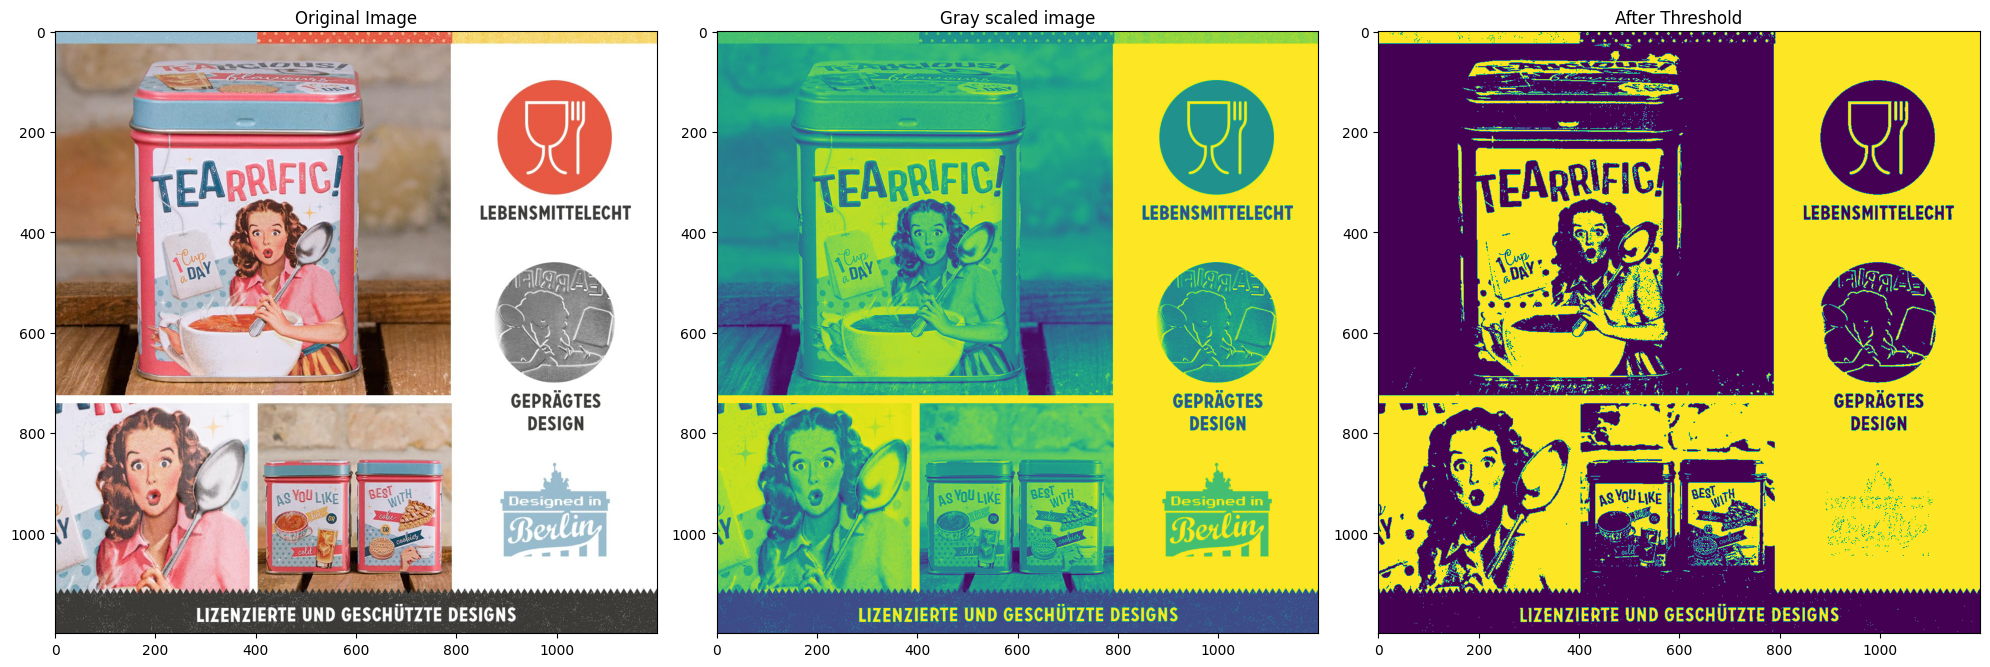

In [190]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

image_data = "Amazon_images/71gSRbyXmoL.jpg"
image = cv2.imread(image_data)

image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image_grey, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh_image = Image.fromarray(thresh)

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(image_r)
axes[0].set_title("Original Image")

axes[1].imshow(image_grey)
axes[1].set_title("Gray scaled image")

axes[2].imshow(thresh_image)
axes[2].set_title("After Threshold")

plt.tight_layout()
plt.show()

In [36]:
print(thresh)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [201]:
import os

url =  "https://m.media-amazon.com/images/I/1yw53vfQtS.jpg"
file_name = os.path.basename(url)
print(file_name)

1yw53vfQtS.jpg


In [202]:
df["image_id"] = df["image_link"].apply(os.path.basename)
print(df[['image_link', 'image_id']].head())

                                          image_link         image_id
0  https://m.media-amazon.com/images/I/61I9XdN6OF...  61I9XdN6OFL.jpg
1  https://m.media-amazon.com/images/I/71gSRbyXmo...  71gSRbyXmoL.jpg
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...  61BZ4zrjZXL.jpg
3  https://m.media-amazon.com/images/I/612mrlqiI4...  612mrlqiI4L.jpg
4  https://m.media-amazon.com/images/I/617Tl40LOX...  617Tl40LOXL.jpg


In [204]:
df.head(25)

image_link  group_id  entity_name  \
0   https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1   https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2   https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3   https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4   https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   
5   https://m.media-amazon.com/images/I/61QsBSE7jg...    731432  item_weight   
6   https://m.media-amazon.com/images/I/81xsq6vf2q...    731432  item_weight   
7   https://m.media-amazon.com/images/I/71DiLRHeZd...    731432  item_weight   
8   https://m.media-amazon.com/images/I/91Cma3Rzse...    731432  item_weight   
9   https://m.media-amazon.com/images/I/71jBLhmTNl...    731432  item_weight   
10  https://m.media-amazon.com/images/I/81N73b5khV...    149159  item_weight   
11  https://m.media-amazon.com/images/I/61oMj2iXOu...    308856  item_weight   
12  https://m.media-amazon.com/images/I/91LPf6OjV9...    281678  item_weight   
13  https://m.media-amazon.com/images/I/81fOxWWWKY...    281678  item_weight   
14  https://m.media-amazon.com/images/I/81dzao1Ob4...    281678  item_weight   
15  https://m.media-amazon.com/images/I/91-iahVGED...    281678  item_weight   
16  https://m.media-amazon.com/images/I/81S2+GnYpT...    731432  item_weight   
17  https://m.media-amazon.com/images/I/81e2YtCOKv...    731432  item_weight   
18  https://m.media-amazon.com/images/I/81RNsNEM1E...    731432  item_weight   
19  https://m.media-amazon.com/images/I/91prZeizZn...    731432  item_weight   
20  https://m.media-amazon.com/images/I/31EvJszFVf...    731432  item_weight   
21  https://m.media-amazon.com/images/I/61wzlucTRE...    252585  item_volume   
22  https://m.media-amazon.com/images/I/61sQ+qAKr4...    299791  item_weight   
23  https://m.media-amazon.com/images/I/81x77l2T5N...    884560  item_weight   
24  https://m.media-amazon.com/images/I/71nywfWZUw...    179080  item_weight   

                  entity_value         image_id  
0                   500.0 gram  61I9XdN6OFL.jpg  
1                      1.0 cup  71gSRbyXmoL.jpg  
2                   0.709 gram  61BZ4zrjZXL.jpg  
3                   0.709 gram  612mrlqiI4L.jpg  
4               1400 milligram  617Tl40LOXL.jpg  
5               1400 milligram  61QsBSE7jgL.jpg  
6               1400 milligram  81xsq6vf2qL.jpg  
7               1400 milligram  71DiLRHeZdL.jpg  
8               1400 milligram  91Cma3RzseL.jpg  
9               1400 milligram  71jBLhmTNlL.jpg  
10               30.0 kilogram  81N73b5khVL.jpg  
11  10 kilogram to 15 kilogram  61oMj2iXOuL.jpg  
12                  3.53 ounce  91LPf6OjV9L.jpg  
13                  3.53 ounce  81fOxWWWKYL.jpg  
14                    53 ounce  81dzao1Ob4L.jpg  
15                    100 gram  91-iahVGEDL.jpg  
16                    200 gram  81S2+GnYpTL.jpg  
17                  1 kilogram  81e2YtCOKvL.jpg  
18                    200 gram  81RNsNEM1EL.jpg  
19                    200 gram  91prZeizZnL.jpg  
20                    200 gram  31EvJszFVfL.jpg  
21                  4.0 gallon  61wzlucTREL.jpg  
22                    2.7 gram  61sQ+qAKr4L.jpg  
23                    112 gram  81x77l2T5NL.jpg  
24                4.1 kilogram  71nywfWZUwL.jpg

## Tesseract OCR by Google

In [85]:
pip install pytesseract


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


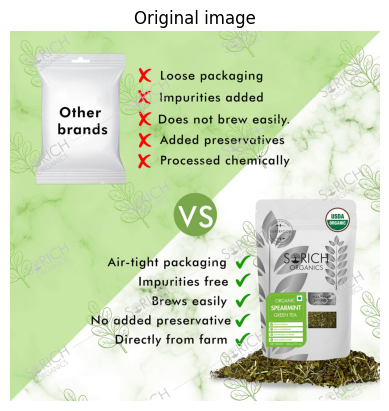

In [347]:
image_data = "Amazon_images/91-iahVGEDL.jpg"
image = cv2.imread(image_data)

image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_r)
plt.title("Original image")
plt.axis("off")
plt.show()

In [348]:
from PIL import Image
import re

def process_image(image_url):
    img = cv2.imread(image_url)
    
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshs = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Four paremeters *gray_image, minimum threshold, maximium threshold, type of threshold*.
    thresh_img = Image.fromarray(threshs)
    return thresh_img
    
def extract_text(image):
    pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(image, lang = 'eng', config= custom_config)
    return text

def clean_text(text):
    cleaned_text = re.sub(r'\s+', ' ', text).strip()
    return cleaned_text

image_url = 'Amazon_images/91-iahVGEDL.jpg'
processed_image = process_image(image_url)
text = extract_text(processed_image)
cleaned_text = clean_text(text)
print(cleaned_text) 

python(21681) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


po OO X Loose packaging AW ~~ KK Impurities added , Other y | , b X. Does not brew easily. - S rands ey ~ on — X Added preservatives ON . X Processed chemically , | Kahicui, wer Air-tight packaging vA fh: aneheyy oN Impurities free v \ vals / ye Brews easily WY — d X\ Nova ded preservative Y \\ ici SY SDirectly from farm f Basa . Be NM


In [349]:
import pytesseract
import cv2

image = cv2.imread("Amazon_images/91-iahVGEDL.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(gray_image, lang = 'eng', config=custom_config)
print(text)

python(21699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


m= ((D X Loose packaging ZW
~ X Impurities added
Other § ¥ |
b d X Does not brew easily. -
Pa rands . WNW, i
\(Y) ~ XC Added preservatives
ZN . \ Processed hemically |
Ap) >) | KERICLN
VO Air-tight packaging vA 6 eR
aN Impurities free v \ NT
QV Brews easily Y/ Go A
Noa ded preservative Y *——— SY
<Directly from farm S
Cn ees



## Conculsion -- Score 70%

# --------------------------------------------------------------------------------------------------------------------

# EasyOCR

In [140]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.4 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 kB 483.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 1.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 1.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 1.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you 

In [351]:
import easyocr
import cv2
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

image_way = 'Amazon_images/91-iahVGEDL.jpg'
image_w = cv2.imread(image_way)

image_rgb = cv2.cvtColor(image_w, cv2.COLOR_BGR2GRAY)

results = reader.readtext(image_rgb)

for result in results:
    print(f"Detected text: {result[1]} (Confidence: {result[2]:.2f})")

Detected text: X (Confidence: 0.98)
Detected text: Loose packaging (Confidence: 1.00)
Detected text: Irnpurities added (Confidence: 0.99)
Detected text: Other (Confidence: 1.00)
Detected text: X (Confidence: 0.92)
Detected text: Does (Confidence: 1.00)
Detected text: not brew easily: (Confidence: 0.85)
Detected text: brands (Confidence: 1.00)
Detected text: Added preservatives (Confidence: 0.97)
Detected text: X (Confidence: 0.79)
Detected text: Processed € (Confidence: 0.84)
Detected text: chemically (Confidence: 1.00)
Detected text: VS (Confidence: 0.96)
Detected text: oSpHc (Confidence: 0.03)
Detected text: SUPERFOOD (Confidence: 0.91)
Detected text: Sz JSNgA (Confidence: 0.14)
Detected text: p (Confidence: 0.48)
Detected text: Air-tight packaging (Confidence: 1.00)
Detected text: SorGICH (Confidence: 0.32)
Detected text: Impurities free (Confidence: 0.99)
Detected text: 6S (Confidence: 0.54)
Detected text: PLANT RASF' (Confidence: 0.49)
Detected text: Brews easily (Confidence: 1.00

In [352]:
#Store the result in a string for NER.
detected_text = ""

for extract in results:
    text = extract[1]
    detected_text += text + " "
    
detected_text = detected_text.strip()
print(detected_text)

X Loose packaging Irnpurities added Other X Does not brew easily: brands Added preservatives X Processed € chemically VS oSpHc SUPERFOOD Sz JSNgA p Air-tight packaging SorGICH Impurities free 6S PLANT RASF' Brews easily ORGANIC SUPZRFOOD SPEARMINT GREEN TEA No preservative HIGH IN VITAMIN _ RICH IN ANTIOXIDANTS ANTI-BACTERIAL IN NATURE Directly from farm GREAT SOURCE OF IRON NET WEIGHT 100 9 (3.53 02) C ch (RCH CS So-RIC ORGAN KICH QRGANICS SeRICHC CH ORGANIC( NICS PI A NT E PREMIUM  ' BASED 1 'INJIION ERICH Szz RGC ORGANICS SeRI added p ~CH ARICH ORGANICS GRIC ANICS


## Conclusion - Score 95%

# Named Entity Regconition (NER)

In [323]:
detected_text

'WEE nGlucon- 9.4 in 23 cm'

In [214]:
pip install spacy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [220]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 994.6 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [353]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(detected_text)

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [354]:
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {spacy.explain(ent.label_)}")

Entity: X Loose, Label: Companies, agencies, institutions, etc.
Entity: Processed, Label: Countries, cities, states
Entity: VS, Label: Objects, vehicles, foods, etc. (not services)
Entity: SUPERFOOD, Label: Companies, agencies, institutions, etc.
Entity: ORGANIC SUPZRFOOD, Label: Companies, agencies, institutions, etc.
Entity: VITAMIN, Label: Companies, agencies, institutions, etc.
Entity: 100, Label: Numerals that do not fall under another type
Entity: 3.53 02, Label: Absolute or relative dates or periods
Entity: ORGANIC, Label: Companies, agencies, institutions, etc.
Entity: NICS PI A NT E PREMIUM, Label: Companies, agencies, institutions, etc.
Entity: Szz RGC, Label: People, including fictional
Entity: SeRI, Label: Companies, agencies, institutions, etc.
Entity: p ~CH, Label: Buildings, airports, highways, bridges, etc.


In [355]:
from spacy import displacy

displacy.render(doc, style="ent")

In [356]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [358]:
import re

expression = detected_text
pattern = r'(\d+[\.\d]*)([A-za-a]+)'

matches = re.findall(pattern, expression)

print(matches)

[('6', 'S')]
